In [9]:
from Chess_Version_6 import Game, Custom_Game, Player, Board, square, Piece, Pawn, Queen, Rook, King, Knight, Bishop
import numpy as np
import math
import copy
import time
import sys

In [4]:
n = Game()
n.ChessBoard.current_player.pieces['NK'].move_to((2,2))

Failure to move


In [10]:
def FEN_update(info):
    
    move,move_counts,board,currplayer,notakes,genmoves,castles = info
    
    d = {'w':'b','b':'w'}
    
    #Move is a tuple with the piece, current position,the position to move it to, and a tag for an en passant
    #Board is the list of lists representation of the board
    if len(move[2]) == 2:
        x,y = move[2]
        xcurr,ycurr = move[1]
    elif len(move[2]) == 3:
        x,y,prom = move[2]
        xcurr,ycurr = move[1]
    
    ep = abs(ycurr-y)
    p = move[0]
    move_counts[p][0] += 1
    move_counts[p][1] = move[2]
    b2 = board[ycurr].copy()
    b2[xcurr] = '*'
    
    board[ycurr] = b2
    
    if board[y][x] != '*':
        notakes = 0
    else:
        notakes += 1
    
    a2 = board[y].copy()
    a2[x] = p
    board[y] = a2
    
    fen  = ''
    
    cnt = 0
    for row in board[::-1]:
        for sq in row:

            if sq == '*':
                cnt += 1
            else:
                if cnt > 0:
                    fen += str(cnt)
                    cnt = 0
                fen += sq[0]
        if cnt > 0 or cnt == 8:
            fen += str(cnt)
        cnt = 0
        fen +='/'
    epstatus = ' - '
    if p[0].lower() == 'p':
        if ep==2:
            epstatus = ' '+'abcdefgh'[x]+str(y+1)+' '
    elif p[0].lower() == 'k':
        if currplayer == 'w':
            castles[0] = ''
        elif currplayer == 'b':
            castles[1] = ''
    elif p[0].lower() == 'r':
        if move_counts[p] != 0:
            side = p[1]
            if side.lower() == side:
                if side in castles[1]:
                    castles[1] = castles[1].replace(side,'')
            elif side.lower() != side:
                if side in castles[0]:
                    castles[0] = castles[0].replace(side,'')
        
    if currplayer == 'b':
        genmoves += 1
    fen += ' ' + d[currplayer] +' '+ castles[0] + castles[1] + epstatus + str(notakes)+' '+str(genmoves)

    return (fen,move_counts,board,d[currplayer],notakes,genmoves,castles)
        
def possible_game(info):
    
    fen,move_counts,board,currplay,notakes,genmoves,castles = info
    
    p_dict = {'p': Pawn,'n':Knight,'b':Bishop,'r':Rook,'q':Queen,'k':King}
    
    cust_game = Custom_Game()
    
    mct,pos = move_counts['k'] 
    k = King(cust_game.ChessBoard.squares[pos[1]][pos[0]],'Black','k',cust_game.ChessBoard)
    mct,pos = move_counts['K'] 
    K = King(cust_game.ChessBoard.squares[pos[1]][pos[0]],'White','K',cust_game.ChessBoard)
    
    cust_game.ChessBoard.add_pieces([k,K])
    
    kings = {'White':K,'Black':k}
    
    p_list = []
    
    for p in move_counts:
        if p.lower() != 'k':
        
            if p[0].lower() == p[0]:
                col = 'Black'

            elif p[0].lower() != p[0]:
                col = 'White'

            mct,pos = move_counts[p]
            
            p2 = p_dict[p[0].lower()](cust_game.ChessBoard.squares[pos[1]][pos[0]],col,p,cust_game.ChessBoard,kings)
            p2.move_count = mct
            p_list.append(p2)
        
    cust_game.ChessBoard.add_pieces(p_list)
    b = cust_game.ChessBoard.update_board()
    b = Player('Butt','Black',cust_game.ChessBoard)
    w = Player('Deriere','White',cust_game.ChessBoard)
    d = {'b':'w','w':'b'}
    playerdict = {'w':w,'b':b}
    cust_game.WhitePlayer = w
    cust_game.BlackPlayer = b
    
    cust_game.ChessBoard.heat_setup()
    cust_game.ChessBoard.en_passant_setup()
    cust_game.ChessBoard.players = {'White':w,'Black':b}
    cust_game.ChessBoard.current_player = playerdict[d[currplay]]
    cust_game.ChessBoard.notakes = notakes
    cust_game.ChessBoard.move_count = genmoves
    cust_game.ChessBoard.FEN = fen
    cust_game.ChessBoard.wcastle_rights = castles[0]
    cust_game.ChessBoard.bcastle_rights = castles[1]
    cust_game.ChessBoard.heat_setup()
    cust_game.ChessBoard.en_passant_setup()
    
    p = name = b = w = playerdict = p_list = kings = fen = move_counts=board=currplay=notakes=genmoves=castles = None 
    
    return cust_game

In [41]:
new_game = Game()
moves = new_game.ChessBoard.current_player.possible_moves()
newmoves = []
for i in moves:
    for m in moves[i]:
        newmoves += [[i,new_game.ChessBoard.current_player.pieces[i].position,m]]
d = dict()
for p in new_game.ChessBoard.pieces:
    for piece in new_game.ChessBoard.pieces[p]:
        d[piece] = [new_game.ChessBoard.pieces[p][piece].move_count,new_game.ChessBoard.pieces[p][piece].position]
for i in newmoves:
    cas = [new_game.ChessBoard.wcastle_rights,new_game.ChessBoard.bcastle_rights]
    print(FEN_update([i,d,new_game.ChessBoard.update_board(),new_game.ChessBoard.current_player.color[0].lower(),new_game.ChessBoard.notake,new_game.ChessBoard.move_count,cas]))

('rnbqkbnr/pppppppp/8/8/8/P7/1PPPPPPP/RNBQKBNR/ b KQkq - 1 0', {'P1': [1, (0, 2)], 'P2': [0, (1, 1)], 'P3': [0, (2, 1)], 'P4': [0, (3, 1)], 'P5': [0, (4, 1)], 'P6': [0, (5, 1)], 'P7': [0, (6, 1)], 'P8': [0, (7, 1)], 'NQ': [0, (1, 0)], 'NK': [0, (6, 0)], 'BQ': [0, (2, 0)], 'BK': [0, (5, 0)], 'RQ': [0, (0, 0)], 'RK': [0, (7, 0)], 'Q': [0, (3, 0)], 'K': [0, (4, 0)], 'p1': [0, (0, 6)], 'p2': [0, (1, 6)], 'p3': [0, (2, 6)], 'p4': [0, (3, 6)], 'p5': [0, (4, 6)], 'p6': [0, (5, 6)], 'p7': [0, (6, 6)], 'p8': [0, (7, 6)], 'nq': [0, (1, 7)], 'nk': [0, (6, 7)], 'bq': [0, (2, 7)], 'bk': [0, (5, 7)], 'rq': [0, (0, 7)], 'rk': [0, (7, 7)], 'q': [0, (3, 7)], 'k': [0, (4, 7)]}, [['RQ', 'NQ', 'BQ', 'Q', 'K', 'BK', 'NK', 'RK'], ['*', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'], ['P1', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], ['rq', 'nq', '

In [11]:
g = possible_game(('rnbqkbnr/pppppppp/8/8/8/P7/1PPPPPPP/RNBQKBNR/ b KQkq - 1 0', {'P1': [1, (0, 2)], 'P2': [0, (1, 1)], 'P3': [0, (2, 1)], 'P4': [0, (3, 1)], 'P5': [0, (4, 1)], 'P6': [0, (5, 1)], 'P7': [0, (6, 1)], 'P8': [0, (7, 1)], 'NQ': [0, (1, 0)], 'NK': [0, (6, 0)], 'BQ': [0, (2, 0)], 'BK': [0, (5, 0)], 'RQ': [0, (0, 0)], 'RK': [0, (7, 0)], 'Q': [0, (3, 0)], 'K': [0, (4, 0)], 'p1': [0, (0, 6)], 'p2': [0, (1, 6)], 'p3': [0, (2, 6)], 'p4': [0, (3, 6)], 'p5': [0, (4, 6)], 'p6': [0, (5, 6)], 'p7': [0, (6, 6)], 'p8': [0, (7, 6)], 'nq': [0, (1, 7)], 'nk': [0, (6, 7)], 'bq': [0, (2, 7)], 'bk': [0, (5, 7)], 'rq': [0, (0, 7)], 'rk': [0, (7, 7)], 'q': [0, (3, 7)], 'k': [0, (4, 7)]}, [['RQ', 'NQ', 'BQ', 'Q', 'K', 'BK', 'NK', 'RK'], ['*', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'], ['P1', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['*', '*', '*', '*', '*', '*', '*', '*'], ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], ['rq', 'nq', 'bq', 'q', 'k', 'bk', 'nk', 'rk']], 'b', 1, 0, ['KQ', 'kq']))
g.ChessBoard.update_board()

[['RQ', 'NQ', 'BQ', 'Q', 'K', 'BK', 'NK', 'RK'],
 ['*', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'],
 ['P1', '*', '*', '*', '*', '*', '*', '*'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'],
 ['rq', 'nq', 'bq', 'q', 'k', 'bk', 'nk', 'rk']]

In [12]:
class Node:
    
    def __init__(self,game,depth,c,eval_func,initc,parent = False,paction = False):
        
        self.c = c
        self.depth = depth
        self.game = game
        self.eval = eval_func
        self.initc = initc
        self.parent = parent
        self.paction = paction
        self.val = 0
        self.ni = 0
        
        pos = self.game.ChessBoard.current_player.possible_moves()
        new = []
        for i in pos:
            for m in pos[i]:
                p = self.game.ChessBoard.current_player.pieces[i].position
                new.append([i,p,m])
        self.newnodes = new
        
        self.children = []

new_game = Game()   
cur = Node(new_game,2,2,lambda x: x,'White')

In [13]:
class MCT:
        
    def __init__(self,head):
        
        self.head = head
        self.head.ni += 1
    
    def expand(self,node):
        
        #d = dict()
        #for p in self.game.ChessBoard.pieces:
         #   for piece in self.game.ChessBoard.pieces[p]:
          #      d[piece] = [self.game.ChessBoard.pieces[p][piece].move_count,self.game.ChessBoard.pieces[p][piece].position]
        
        #board = self.game.ChessBoard.update_board()
        #cp = self.game.ChessBoard.current_player[0].lower()
        #nt = self.game.ChessBoard.notake
        #mc = self.game.ChessBoard.move_count
        #cas = [self.game.ChessBoard.wcastle_rights,self.game.ChessBoard.bcastle_rights]
        
        act = node.newnodes.pop(0)
        col = node.game.ChessBoard.current_player.color
        #info = FEN_update(act,d,board,cp,nt,mc,cas)
        
        #new = possible_game(info)
        
        
        new = copy.deepcopy(node.game)
        new.ChessBoard.pieces[col][act[0]].move_to(act[2])
        child = Node(new,node.depth-1,node.c,node.eval,node.initc,parent = node,paction = act)
        child.val = 0 #child.eval(info) 
        node.children.append(child)
    
    def rollout(self,node):
        currstate = node.game.ChessBoard.state()

        curr = node.game
        
        while not currstate:
            try:
                moves = curr.ChessBoard.current_player.possible_moves()
                possible = []
                for i in moves:
                    if moves[i]:
                        for m in moves[i]:
                            if m:
                                possible += [[i,curr.ChessBoard.current_player.pieces[i].position,m]]

                #d = dict()
                #for p in currgame.ChessBoard.pieces:
                 #   for piece in currgame.ChessBoard.pieces[p]:
                  #      d[piece] = [currgame.ChessBoard.pieces[p][piece].move_count,currgame.ChessBoard.pieces[p][piece].position]

                #board = currgame.ChessBoard.update_board()
                col = curr.ChessBoard.current_player.color
                #nt = currgame.ChessBoard.notake
                #mc = currgame.ChessBoard.move_count
                #cas = [currgame.ChessBoard.wcastle_rights,currgame.ChessBoard.bcastle_rights]
                act = possible[np.random.randint(len(possible))]

                #info = FEN_update([act,d,board,cp,nt,mc,cas])

                #d = {'White':'Black','Black':'White'}

                #currgame = possible_game(info)
                #c = currgame.ChessBoard.current_player.color
                #currgame.ChessBoard.current_player = currgame.ChessBoard.players[d[c]]
                currgame = copy.deepcopy(curr)

                print(currgame.ChessBoard.FEN,act)

                currgame.ChessBoard.pieces[col][act[0]].move_to(act[2])

                possible = moves = act = col = None

                currstate = currgame.ChessBoard.state()
                curr = None
                curr = copy.deepcopy(currgame)
                currgame = None
                
            except:
                print('Game Bug Womp',act,curr.ChessBoard.FEN)
                return (0,'Bug','Oops',node)
                #print(act,curr.ChessBoard.FEN)
                #return(curr.ChessBoard.state(),act)
            
        mes = currstate[1]
        r = currstate[0]
        print(f'Managed to get through,{currstate}')
        try:
            if node.initc != curr.ChessBoard.current_player.color:
                r = -r
            return r,curr,mes,node
        except:
            print(f'Fucking mega break, {currstate}')
    
    def backprop(self,res):
        r,curr,mes,node = res
        
        curr_node = node
        
        while curr_node.parent:
            print('backpropagating now')
            
            curr_node.val += r
            print(curr_node.ni,curr_node.val)
            
            curr_node = curr_node.parent
            
        curr_node.ni += 1
        print('Top of tree')
        
    def best_act(self,node):
        
        vals = {}
        currmax = -float('inf')
        
        for i in node.children:
            if i.ni == 0:
                #print("Not visited yet")
                #print('Not Visited Yet',f'{i.ni}, parent {node.ni}')
                UCB1 = float('inf')
            else:
                #print('Already Visited',f'{i.ni}, parent {node.ni}')
                UCB1 = i.val + node.c*math.sqrt(math.log(node.ni+1)/i.ni)
                #print('Already Visited')
            vals[UCB1] = i
            currmax = max(currmax,UCB1)
            
        vals[currmax].ni += 1
        return vals[currmax]
        
    def select(self,node):
        
        currnode = node
        
        #while not currstate:
        while currnode.depth != 0:
            
            while currnode.newnodes:
                self.expand(currnode)
                
            currnode = self.best_act(currnode)

            print(f'{currnode.depth}')
            print(f'{currnode.game.ChessBoard.FEN},{currnode.paction},{currnode.game.ChessBoard.current_player.color}')
                
        return currnode
    
    def simulate(self,numsims):
        
        for n in range(numsims):
            
            v = self.select(self.head)
            res = self.rollout(v)
            
            self.backprop(res)
                    
        s = self.best_act(self.head)
        p = s.paction
        self = s
        return p

In [8]:
d = []
memor = []


for i in range(1):
    new_game = None
    start = time.time()
    new_game = Game()   
    heads = Node(new_game,20,5,lambda x: x,'White')
    tree = MCT(heads)
    res = tree.simulate(100)
    d.append(time.time()-start)
    ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
    mem = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
    m = {key:value for key,value in mem}
    memor.append(sum(m.values()) / 1e6)

19
rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 1 0,['NK', (6, 0), (5, 2)],Black
18
rnbqkb1r/pppppppp/5n2/8/8/5N2/PPPPPPPP/RNBQKB1R/ w KQkq - 2 1,['nk', (6, 7), (5, 5)],White
17
rnbqkb1r/pppppppp/5n2/8/8/8/PPPPPPPP/RNBQKBNR/ b KQkq - 3 1,['NK', (5, 2), (6, 0)],Black
16
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPPPP/RNBQKBNR/ w KQkq - 4 2,['nk', (5, 5), (6, 3)],White
15
rnbqkb1r/pppppppp/8/8/6n1/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 5 2,['NK', (6, 0), (5, 2)],Black
14
rnbqkb1r/pppppppp/7n/8/8/5N2/PPPPPPPP/RNBQKB1R/ w KQkq - 6 3,['nk', (6, 3), (7, 5)],White
13
rnbqkb1r/pppppppp/7n/8/8/8/PPPPPPPP/RNBQKBNR/ b KQkq - 7 3,['NK', (5, 2), (6, 0)],Black
12
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPPPP/RNBQKBNR/ w KQkq - 8 4,['nk', (7, 5), (6, 3)],White
11
rnbqkb1r/pppppppp/8/8/6n1/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 9 4,['NK', (6, 0), (5, 2)],Black
10
rnbqkb1r/pppppppp/8/8/6n1/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
9
rnbqkb1r/pppppppp/8/8/6n1/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 9 4,['nk', (

12
rnbqkb1r/pppppppp/8/8/6n1/N4N2/PPPPPPPP/R1BQKB1R/ w KQkq - 8 4,['nk', (7, 5), (6, 3)],White
11
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['NK', (5, 2), (6, 0)],Black
10
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
9
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
8
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
7
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
6
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
5
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
4
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
3
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3), (7, 5)],Black
2
rnbqkb1r/pppppppp/8/8/6n1/N7/PPPPPPPP/R1BQKBNR/ b KQkq - 9 4,['nk', (6, 3

4
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPP1P/RNBQKBNR/ b KQkq - 5 4,['nk', (6, 3), (7, 5)],Black
3
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPP1P/RNBQKBNR/ b KQkq - 5 4,['nk', (6, 3), (7, 5)],Black
2
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPP1P/RNBQKBNR/ b KQkq - 5 4,['nk', (6, 3), (7, 5)],Black
1
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPP1P/RNBQKBNR/ b KQkq - 5 4,['nk', (6, 3), (7, 5)],Black
0
rnbqkb1r/pppppppp/8/8/6n1/8/PPPPPP1P/RNBQKBNR/ b KQkq - 5 4,['nk', (6, 3), (7, 5)],Black
Managed to get through,(1e-16, 'Technical Draw: Repeat Positions')
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagating now
1 -1e-16
backpropagatin

18
rnbqkb1r/pppppppp/5n2/8/4P3/8/PPPP1PPP/RNBQKBNR/ w KQkq - 2 1,['nk', (6, 7), (5, 5)],White
17
rnbqkb1r/pppppppp/5n2/8/4P3/8/PPPPKPPP/RNBQ1BNR/ b kq - 3 1,['K', (4, 0), (4, 1)],Black
16
rnbqkb1r/pppppppp/8/8/4P1n1/8/PPPPKPPP/RNBQ1BNR/ w kq - 4 2,['nk', (5, 5), (6, 3)],White
15
rnbqkb1r/pppppppp/8/8/4P1n1/5K2/PPPP1PPP/RNBQ1BNR/ b kq - 5 2,['K', (4, 1), (5, 2)],Black
14
rnbqkb1r/pppppppp/7n/8/4P3/5K2/PPPP1PPP/RNBQ1BNR/ w kq - 6 3,['nk', (6, 3), (7, 5)],White
13
rnbqkb1r/pppppppp/7n/8/4P3/4K3/PPPP1PPP/RNBQ1BNR/ b kq - 7 3,['K', (5, 2), (4, 2)],Black
12
rnbqkb1r/pppppppp/8/8/4P1n1/4K3/PPPP1PPP/RNBQ1BNR/ w kq - 8 4,['nk', (7, 5), (6, 3)],White
11
rnbqkb1r/pppppppp/8/8/4P1n1/5K2/PPPP1PPP/RNBQ1BNR/ b kq - 9 4,['K', (4, 2), (5, 2)],Black
10
rnbqkb1r/pppppppp/7n/8/4P3/5K2/PPPP1PPP/RNBQ1BNR/ w kq - 10 5,['nk', (6, 3), (7, 5)],White
9
rnbqkb1r/pppppppp/7n/8/4P3/5K2/PPPP1PPP/RNBQ1BNR/ w kq - 10 5,['K', (5, 2), (4, 2)],White
8
rnbqkb1r/pppppppp/7n/8/4P3/5K2/PPPP1PPP/RNBQ1BNR/ w kq - 10 5,['K', (5


KeyboardInterrupt



In [11]:
a = [(5,2),(3,4)]
sorted(a,key = lambda x: x[0])

[(3, 4), (5, 2)]

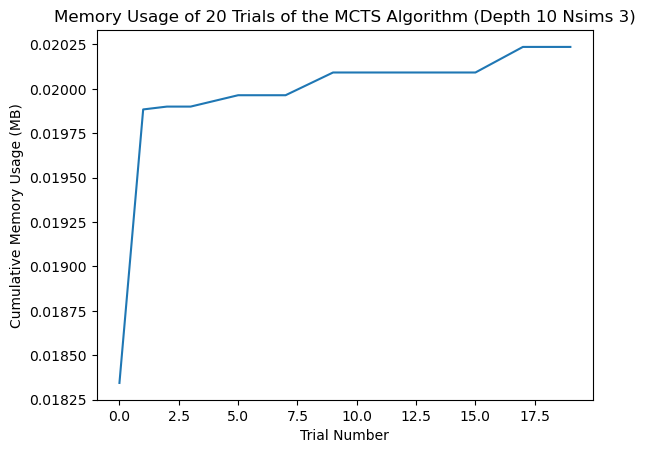

In [18]:
import matplotlib.pyplot as plt
plt.plot(memor)
plt.title('Memory Usage of 20 Trials of the MCTS Algorithm (Depth 10 Nsims 3)')
plt.ylabel('Cumulative Memory Usage (MB)')
plt.xlabel('Trial Number')
plt.show()

In [6]:
def timing(game,samples):
    
    dat = []
    res = []
    mcnt = []
    for s in range(samples):
        
        start = time.time()
        
        cur = MCTS(game,2,lambda x: x,'White')
        a = cur.rollout()
        mvs = a[1].ChessBoard.move_count
        try:
            res += [a[0]]
            mvs = a[1].ChessBoard.move_count
            mcnt += [mvs]
        except:
            
            res += [a]
            
        a = None
        
        stop = time.time()-start
        dat += [stop]
    
    return dat,res,mcnt
#new_game = Game()
#tests = timing(new_game,200)

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P7', (6, 1), (6, 3)]
rnbqkbnr/pppppppp/8/8/6P1/8/PPPPPP1P/RNBQKBNR/ b KQkq g4 1 1 ['p4', (3, 6), (3, 4)]
rnbqkbnr/ppp1pppp/8/3p4/6P1/8/PPPPPP1P/RNBQKBNR/ w KQkq d5 2 1 ['BK', (5, 0), (7, 2)]
rnbqkbnr/ppp1pppp/8/3p4/6P1/7B/PPPPPP1P/RNBQK1NR/ b KQkq - 3 2 ['p2', (1, 6), (1, 4)]
rnbqkbnr/p1p1pppp/8/1p1p4/6P1/7B/PPPPPP1P/RNBQK1NR/ w KQkq b5 4 2 ['P4', (3, 1), (3, 2)]
rnbqkbnr/p1p1pppp/8/1p1p4/6P1/3P3B/PPP1PP1P/RNBQK1NR/ b KQkq - 5 3 ['nk', (6, 7), (7, 5)]
rnbqkb1r/p1p1pppp/7n/1p1p4/6P1/3P3B/PPP1PP1P/RNBQK1NR/ w KQkq - 6 3 ['P1', (0, 1), (0, 3)]
rnbqkb1r/p1p1pppp/7n/1p1p4/P5P1/3P3B/1PP1PP1P/RNBQK1NR/ b KQkq a4 7 4 ['bq', (2, 7), (0, 5)]
rn1qkb1r/p1p1pppp/b6n/1p1p4/P5P1/3P3B/1PP1PP1P/RNBQK1NR/ w KQkq - 8 4 ['P3', (2, 1), (2, 2)]
rn1qkb1r/p1p1pppp/b6n/1p1p4/P5P1/2PP3B/1P2PP1P/RNBQK1NR/ b KQkq - 9 5 ['p2', (1, 4), (0, 3)]
rn1qkb1r/p1p1pppp/b6n/3p4/p5P1/2PP3B/1P2PP1P/RNBQK1NR/ w KQkq - 0 5 ['RQ', (0, 0), (0, 3)]
rn1qkb1r/p1p1pppp/b6n/3p

rk6/p4Rp1/3bPr2/3P1P1P/1Np4P/2P2K2/6n1/3R4/ b  - 0 53 ['rk', (5, 5), (5, 4)]
rk6/p4Rp1/3bP3/3P1r1P/1Np4P/2P2K2/6n1/3R4/ w  - 0 53 ['K', (5, 2), (6, 1)]
rk6/p4Rp1/3bP3/3P1r1P/1Np4P/2P5/6K1/3R4/ b  - 0 54 ['bk', (3, 5), (4, 4)]
rk6/p4Rp1/4P3/3Pbr1P/1Np4P/2P5/6K1/3R4/ w  - 1 54 ['RK', (3, 0), (2, 0)]
rk6/p4Rp1/4P3/3Pbr1P/1Np4P/2P5/6K1/2R5/ b  - 2 55 ['bk', (4, 4), (6, 2)]
rk6/p4Rp1/4P3/3P1r1P/1Np4P/2P3b1/6K1/2R5/ w  - 3 55 ['RK', (2, 0), (1, 0)]
rk6/p4Rp1/4P3/3P1r1P/1Np4P/2P3b1/6K1/1R6/ b  - 4 56 ['p7', (6, 6), (6, 4)]
rk6/p4R2/4P3/3P1rpP/1Np4P/2P3b1/6K1/1R6/ w  g5 5 56 ['RK', (1, 0), (5, 0)]
rk6/p4R2/4P3/3P1rpP/1Np4P/2P3b1/6K1/5R2/ b  - 6 57 ['bk', (6, 2), (5, 3)]
rk6/p4R2/4P3/3P1rpP/1Np2b1P/2P5/6K1/5R2/ w  - 7 57 ['K', (6, 1), (7, 2)]
rk6/p4R2/4P3/3P1rpP/1Np2b1P/2P4K/8/5R2/ b  - 8 58 ['p7', (6, 4), (6, 3)]
rk6/p4R2/4P3/3P1r1P/1Np2bpP/2P4K/8/5R2/ w  - 9 58 ['K', (7, 2), (6, 3)]
rk6/p4R2/4P3/3P1r1P/1Np2bKP/2P5/8/5R2/ b  - 0 59 ['rk', (5, 4), (7, 4)]
rk6/p4R2/4P3/3P3r/1Np2bKP/2P5/8/5R2/ w 

8/1k6/8/8/8/K7/2r2b2/8/ b  - 26 119 ['rk', (2, 1), (2, 7)]
2r5/1k6/8/8/8/K7/5b2/8/ w  - 27 119 ['K', (0, 2), (1, 3)]
2r5/1k6/8/8/1K6/8/5b2/8/ b  - 28 120 ['bk', (5, 1), (7, 3)]
2r5/1k6/8/8/1K5b/8/8/8/ w  - 29 120 ['K', (1, 3), (0, 2)]
2r5/1k6/8/8/7b/K7/8/8/ b  - 30 121 ['bk', (7, 3), (6, 2)]
2r5/1k6/8/8/8/K5b1/8/8/ w  - 31 121 ['K', (0, 2), (1, 2)]
2r5/1k6/8/8/8/1K4b1/8/8/ b  - 32 122 ['rk', (2, 7), (1, 7)]
1r6/1k6/8/8/8/1K4b1/8/8/ w  - 33 122 ['K', (1, 2), (2, 2)]
1r6/1k6/8/8/8/2K3b1/8/8/ b  - 34 123 ['bk', (6, 2), (5, 1)]
1r6/1k6/8/8/8/2K5/5b2/8/ w  - 35 123 ['K', (2, 2), (2, 3)]
1r6/1k6/8/8/2K5/8/5b2/8/ b  - 36 124 ['k', (1, 6), (0, 5)]
1r6/8/k7/8/2K5/8/5b2/8/ w  - 37 124 ['K', (2, 3), (3, 2)]
1r6/8/k7/8/8/3K4/5b2/8/ b  - 38 125 ['rk', (1, 7), (1, 3)]
8/8/k7/8/1r6/3K4/5b2/8/ w  - 39 125 ['K', (3, 2), (4, 1)]
8/8/k7/8/1r6/8/4Kb2/8/ b  - 40 126 ['rk', (1, 3), (0, 3)]
8/8/k7/8/r7/8/4Kb2/8/ w  - 41 126 ['K', (4, 1), (3, 2)]
8/8/k7/8/r7/3K4/5b2/8/ b  - 42 127 ['rk', (0, 3), (1, 3)]
8/8/k

1r1k2nr/2p1ppP1/1pn4b/3p1Pp1/2BPN1Q1/pPP1K3/PBb4q/RN6/ w  - 9 24 ['NK', (4, 3), (6, 4)]
1r1k2nr/2p1ppP1/1pn4b/3p1PN1/2BP2Q1/pPP1K3/PBb4q/RN6/ b  - 0 25 ['bq', (2, 1), (5, 4)]
1r1k2nr/2p1ppP1/1pn4b/3p1bN1/2BP2Q1/pPP1K3/PB5q/RN6/ w  - 0 25 ['BQ', (1, 1), (2, 2)]
1r1k2nr/2p1ppP1/1pn4b/3p1bN1/2BP2Q1/pPB1K3/P6q/RN6/ b  - 1 26 ['q', (7, 1), (7, 2)]
1r1k2nr/2p1ppP1/1pn4b/3p1bN1/2BP2Q1/pPB1K2q/P7/RN6/ w  - 2 26 ['Q', (6, 3), (5, 2)]
1r1k2nr/2p1ppP1/1pn4b/3p1bN1/2BP4/pPB1KQ1q/P7/RN6/ b  - 3 27 ['bq', (5, 4), (6, 3)]
1r1k2nr/2p1ppP1/1pn4b/3p2N1/2BP2b1/pPB1KQ1q/P7/RN6/ w  - 4 27 ['P8', (6, 6), (7, 7, 'Knight')]
1r1k2nN/2p1pp2/1pn4b/3p2N1/2BP2b1/pPB1KQ1q/P7/RN6/ b  - 0 28 ['bq', (6, 3), (5, 4)]
1r1k2nN/2p1pp2/1pn4b/3p1bN1/2BP4/pPB1KQ1q/P7/RN6/ w  - 1 28 ['P2', (1, 2), (1, 3)]
1r1k2nN/2p1pp2/1pn4b/3p1bN1/1PBP4/p1B1KQ1q/P7/RN6/ b  - 2 29 ['nq', (2, 5), (3, 3)]
1r1k2nN/2p1pp2/1p5b/3p1bN1/1PBn4/p1B1KQ1q/P7/RN6/ w  - 0 29 ['P2', (1, 3), (1, 4)]
1r1k2nN/2p1pp2/1p5b/1P1p1bN1/2Bn4/p1B1KQ1q/P7/RN6/ b  - 1 

8/1k1n4/8/2p5/1rP1pp2/NP4b1/8/5B1K/ b  - 12 80 ['k', (1, 6), (1, 5)]
8/3n4/1k6/2p5/1rP1pp2/NP4b1/8/5B1K/ w  - 13 80 ['K', (7, 0), (6, 0)]
8/3n4/1k6/2p5/1rP1pp2/NP4b1/8/5BK1/ b  - 14 81 ['nk', (3, 6), (4, 4)]
8/8/1k6/2p1n3/1rP1pp2/NP4b1/8/5BK1/ w  - 15 81 ['NP8', (0, 2), (2, 1)]
8/8/1k6/2p1n3/1rP1pp2/1P4b1/2N5/5BK1/ b  - 16 82 ['k', (1, 5), (0, 5)]
8/8/k7/2p1n3/1rP1pp2/1P4b1/2N5/5BK1/ w  - 17 82 ['K', (6, 0), (6, 1)]
8/8/k7/2p1n3/1rP1pp2/1P4b1/2N3K1/5B2/ b  - 18 83 ['rq', (1, 3), (1, 7)]
1r6/8/k7/2p1n3/2P1pp2/1P4b1/2N3K1/5B2/ w  - 19 83 ['NP8', (2, 1), (0, 2)]
1r6/8/k7/2p1n3/2P1pp2/NP4b1/6K1/5B2/ b  - 20 84 ['rq', (1, 7), (6, 7)]
6r1/8/k7/2p1n3/2P1pp2/NP4b1/6K1/5B2/ w  - 21 84 ['P1', (1, 2), (1, 3)]
6r1/8/k7/2p1n3/1PP1pp2/N5b1/6K1/5B2/ b  - 22 85 ['bk', (6, 2), (7, 3)]
6r1/8/k7/2p1n3/1PP1pp1b/N7/6K1/5B2/ w  - 23 85 ['K', (6, 1), (7, 2)]
6r1/8/k7/2p1n3/1PP1pp1b/N6K/8/5B2/ b  - 24 86 ['nk', (4, 4), (2, 3)]
6r1/8/k7/2p5/1Pn1pp1b/N6K/8/5B2/ w  - 0 86 ['P1', (1, 3), (1, 4)]
6r1/8/k7/1Pp5/2n1

k7/8/4B3/3K4/8/6b1/n2N4/8/ w  - 47 146 ['K', (3, 4), (2, 3)]
k7/8/4B3/8/2K5/6b1/n2N4/8/ b  - 48 147 ['np3', (0, 1), (2, 0)]
k7/8/4B3/8/2K5/6b1/3N4/2n5/ w  - 49 147 ['BK', (4, 5), (3, 4)]
k7/8/8/3B4/2K5/6b1/3N4/2n5/ b  - 50 148 ['k', (0, 7), (1, 7)]
1k6/8/8/3B4/2K5/6b1/3N4/2n5/ w  - 51 148 ['BK', (3, 4), (1, 6)]
1k6/1B6/8/8/2K5/6b1/3N4/2n5/ b  - 52 149 ['bk', (6, 2), (7, 3)]
1k6/1B6/8/8/2K4b/8/3N4/2n5/ w  - 53 149 ['K', (2, 3), (1, 4)]
1k6/1B6/8/1K6/7b/8/3N4/2n5/ b  - 54 150 ['np3', (2, 0), (4, 1)]
1k6/1B6/8/1K6/7b/8/3Nn3/8/ w  - 55 150 ['K', (1, 4), (2, 5)]
1k6/1B6/2K5/8/7b/8/3Nn3/8/ b  - 56 151 ['bk', (7, 3), (3, 7)]
1k1b4/1B6/2K5/8/8/8/3Nn3/8/ w  - 57 151 ['NP8', (3, 1), (5, 2)]
1k1b4/1B6/2K5/8/8/5N2/4n3/8/ b  - 58 152 ['np3', (4, 1), (2, 2)]
1k1b4/1B6/2K5/8/8/2n2N2/8/8/ w  - 59 152 ['NP8', (5, 2), (3, 1)]
1k1b4/1B6/2K5/8/8/2n5/3N4/8/ b  - 60 153 ['bk', (3, 7), (4, 6)]
1k6/1B2b3/2K5/8/8/2n5/3N4/8/ w  - 61 153 ['NP8', (3, 1), (5, 2)]
1k6/1B2b3/2K5/8/8/2n2N2/8/8/ b  - 62 154 ['np3', (2

rn4nr/4kp1p/4p2b/p1ppB3/2bP1PP1/RP5P/1QP1P1B1/1N2K1NR/ b  - 0 20 ['bq', (2, 3), (1, 4)]
rn4nr/4kp1p/4p2b/pbppB3/3P1PP1/RP5P/1QP1P1B1/1N2K1NR/ w  - 1 20 ['P5', (4, 1), (4, 2)]
rn4nr/4kp1p/4p2b/pbppB3/3P1PP1/RP2P2P/1QP3B1/1N2K1NR/ b  - 2 21 ['bk', (7, 5), (6, 6)]
rn4nr/4kpbp/4p3/pbppB3/3P1PP1/RP2P2P/1QP3B1/1N2K1NR/ w  - 3 21 ['P3', (2, 1), (2, 2)]
rn4nr/4kpbp/4p3/pbppB3/3P1PP1/RPP1P2P/1Q4B1/1N2K1NR/ b  - 4 22 ['p8', (7, 6), (7, 5)]
rn4nr/4kpb1/4p2p/pbppB3/3P1PP1/RPP1P2P/1Q4B1/1N2K1NR/ w  - 5 22 ['BK', (6, 1), (3, 4)]
rn4nr/4kpb1/4p2p/pbpBB3/3P1PP1/RPP1P2P/1Q6/1N2K1NR/ b  - 0 23 ['bq', (1, 4), (4, 1)]
rn4nr/4kpb1/4p2p/p1pBB3/3P1PP1/RPP1P2P/1Q2b3/1N2K1NR/ w  - 1 23 ['BK', (3, 4), (6, 1)]
rn4nr/4kpb1/4p2p/p1p1B3/3P1PP1/RPP1P2P/1Q2b1B1/1N2K1NR/ b  - 2 24 ['bq', (4, 1), (5, 0)]
rn4nr/4kpb1/4p2p/p1p1B3/3P1PP1/RPP1P2P/1Q4B1/1N2KbNR/ w  - 3 24 ['RQ', (0, 2), (0, 3)]
rn4nr/4kpb1/4p2p/p1p1B3/R2P1PP1/1PP1P2P/1Q4B1/1N2KbNR/ b  - 4 25 ['rq', (0, 7), (0, 6)]
1n4nr/r3kpb1/4p2p/p1p1B3/R2P1PP1/1PP1P2P/1Q

4k2b/3r4/1Qn2R1p/P2NB3/R1p2r2/2P1p2b/4n3/4K1N1/ w  - 6 73 ['NQ', (3, 4), (1, 3)]
4k2b/3r4/1Qn2R1p/P3B3/RNp2r2/2P1p2b/4n3/4K1N1/ b  - 7 74 ['rk', (3, 6), (3, 4)]
4k2b/8/1Qn2R1p/P2rB3/RNp2r2/2P1p2b/4n3/4K1N1/ w  - 8 74 ['NQ', (1, 3), (2, 1)]
4k2b/8/1Qn2R1p/P2rB3/R1p2r2/2P1p2b/2N1n3/4K1N1/ b  - 9 75 ['p8', (7, 5), (7, 4)]
4k2b/8/1Qn2R2/P2rB2p/R1p2r2/2P1p2b/2N1n3/4K1N1/ w  - 10 75 ['Q', (1, 5), (3, 3)]
4k2b/8/2n2R2/P2rB2p/R1pQ1r2/2P1p2b/2N1n3/4K1N1/ b  - 11 76 ['bq', (7, 2), (4, 5)]
4k2b/8/2n1bR2/P2rB2p/R1pQ1r2/2P1p3/2N1n3/4K1N1/ w  - 12 76 ['Q', (3, 3), (3, 4)]
4k2b/8/2n1bR2/P2QB2p/R1p2r2/2P1p3/2N1n3/4K1N1/ b  - 0 77 ['bq', (4, 5), (6, 7)]
4k1bb/8/2n2R2/P2QB2p/R1p2r2/2P1p3/2N1n3/4K1N1/ w  - 1 77 ['Q', (3, 4), (5, 2)]
4k1bb/8/2n2R2/P3B2p/R1p2r2/2P1pQ2/2N1n3/4K1N1/ b  - 2 78 ['nk', (2, 5), (1, 3)]
4k1bb/8/5R2/P3B2p/Rnp2r2/2P1pQ2/2N1n3/4K1N1/ w  - 3 78 ['RQ', (0, 3), (0, 2)]
4k1bb/8/5R2/P3B2p/1np2r2/R1P1pQ2/2N1n3/4K1N1/ b  - 4 79 ['nq', (4, 1), (6, 0)]
4k1bb/8/5R2/P3B2p/1np2r2/R1P1pQ2/2N5/4K

8/3k4/PR6/8/1R5p/5K2/8/bN6/ b  - 12 136 ['k', (3, 6), (3, 7)]
3k4/8/PR6/8/1R5p/5K2/8/bN6/ w  - 13 136 ['RK', (1, 5), (6, 5)]
3k4/8/P5R1/8/1R5p/5K2/8/bN6/ b  - 14 137 ['p8', (7, 3), (7, 2)]
3k4/8/P5R1/8/1R6/5K1p/8/bN6/ w  - 15 137 ['P2', (0, 5), (0, 6)]
3k4/P7/6R1/8/1R6/5K1p/8/bN6/ b  - 16 138 ['bk', (0, 0), (3, 3)]
3k4/P7/6R1/8/1R1b4/5K1p/8/1N6/ w  - 17 138 ['NQ', (1, 0), (0, 2)]
3k4/P7/6R1/8/1R1b4/N4K1p/8/8/ b  - 18 139 ['bk', (3, 3), (1, 5)]
3k4/P7/1b4R1/8/1R6/N4K1p/8/8/ w  - 19 139 ['NQ', (0, 2), (2, 1)]
3k4/P7/1b4R1/8/1R6/5K1p/2N5/8/ b  - 20 140 ['bk', (1, 5), (3, 3)]
3k4/P7/6R1/8/1R1b4/5K1p/2N5/8/ w  - 21 140 ['RK', (6, 5), (6, 6)]
3k4/P5R1/8/8/1R1b4/5K1p/2N5/8/ b  - 22 141 ['bk', (3, 3), (2, 2)]
3k4/P5R1/8/8/1R6/2b2K1p/2N5/8/ w  - 23 141 ['RK', (6, 6), (1, 6)]
3k4/PR6/8/8/1R6/2b2K1p/2N5/8/ b  - 24 142 ['bk', (2, 2), (4, 4)]
3k4/PR6/8/4b3/1R6/5K1p/2N5/8/ w  - 25 142 ['RQ', (1, 3), (1, 2)]
3k4/PR6/8/4b3/8/1R3K1p/2N5/8/ b  - 26 143 ['p8', (7, 2), (7, 1)]
3k4/PR6/8/4b3/8/1R3K2/2N4p/8

8/pr1p1nkr/Qp3p2/2p4p/2PNpPpP/4K1P1/3q3R/1NBB4/ w  - 3 40 ['RK', (7, 1), (3, 1)]
8/pr1p1nkr/Qp3p2/2p4p/2PNpPpP/4K1P1/3R4/1NBB4/ b  - 0 41 ['rq', (1, 6), (1, 7)]
1r6/p2p1nkr/Qp3p2/2p4p/2PNpPpP/4K1P1/3R4/1NBB4/ w  - 1 41 ['Q', (0, 5), (0, 0)]
1r6/p2p1nkr/1p3p2/2p4p/2PNpPpP/4K1P1/3R4/QNBB4/ b  - 2 42 ['k', (6, 6), (7, 7)]
1r5k/p2p1n1r/1p3p2/2p4p/2PNpPpP/4K1P1/3R4/QNBB4/ w  - 3 42 ['NK', (3, 3), (1, 2)]
1r5k/p2p1n1r/1p3p2/2p4p/2P1pPpP/1N2K1P1/3R4/QNBB4/ b  - 4 43 ['rq', (1, 7), (6, 7)]
6rk/p2p1n1r/1p3p2/2p4p/2P1pPpP/1N2K1P1/3R4/QNBB4/ w  - 5 43 ['RK', (3, 1), (3, 2)]
6rk/p2p1n1r/1p3p2/2p4p/2P1pPpP/1N1RK1P1/8/QNBB4/ b  - 6 44 ['rq', (6, 7), (6, 4)]
7k/p2p1n1r/1p3p2/2p3rp/2P1pPpP/1N1RK1P1/8/QNBB4/ w  - 7 44 ['NK', (1, 2), (2, 4)]
7k/p2p1n1r/1p3p2/2N3rp/2P1pPpP/3RK1P1/8/QNBB4/ b  - 0 45 ['p2', (1, 5), (2, 4)]
7k/p2p1n1r/5p2/2p3rp/2P1pPpP/3RK1P1/8/QNBB4/ w  - 0 45 ['RK', (3, 2), (1, 2)]
7k/p2p1n1r/5p2/2p3rp/2P1pPpP/1R2K1P1/8/QNBB4/ b  - 1 46 ['p1', (0, 6), (0, 4)]
7k/3p1n1r/5p2/p1p3rp/2P1pPpP/

8/3k4/3P1r2/N4p1p/2B1nPpP/3p2P1/8/2K5/ w  - 5 95 ['K', (2, 0), (3, 0)]
8/3k4/3P1r2/N4p1p/2B1nPpP/3p2P1/8/3K4/ b  - 6 96 ['k', (3, 6), (2, 7)]
2k5/8/3P1r2/N4p1p/2B1nPpP/3p2P1/8/3K4/ w  - 7 96 ['BK', (2, 3), (0, 5)]
2k5/8/B2P1r2/N4p1p/4nPpP/3p2P1/8/3K4/ b  - 8 97 ['k', (2, 7), (3, 6)]
8/3k4/B2P1r2/N4p1p/4nPpP/3p2P1/8/3K4/ w  - 9 97 ['K', (3, 0), (2, 0)]
8/3k4/B2P1r2/N4p1p/4nPpP/3p2P1/8/2K5/ b  - 10 98 ['k', (3, 6), (3, 7)]
3k4/8/B2P1r2/N4p1p/4nPpP/3p2P1/8/2K5/ w  - 11 98 ['NQ', (0, 4), (1, 6)]
3k4/1N6/B2P1r2/5p1p/4nPpP/3p2P1/8/2K5/ b  - 12 99 ['k', (3, 7), (3, 6)]
8/1N1k4/B2P1r2/5p1p/4nPpP/3p2P1/8/2K5/ w  - 13 99 ['K', (2, 0), (1, 1)]
8/1N1k4/B2P1r2/5p1p/4nPpP/3p2P1/1K6/8/ b  - 14 100 ['rq', (5, 5), (7, 5)]
8/1N1k4/B2P3r/5p1p/4nPpP/3p2P1/1K6/8/ w  - 15 100 ['K', (1, 1), (0, 1)]
8/1N1k4/B2P3r/5p1p/4nPpP/3p2P1/K7/8/ b  - 16 101 ['nk', (4, 3), (3, 5)]
8/1N1k4/B2n3r/5p1p/5PpP/3p2P1/K7/8/ w  - 0 101 ['BK', (0, 5), (3, 2)]
8/1N1k4/3n3r/5p1p/5PpP/3B2P1/K7/8/ b  - 0 102 ['rq', (7, 5), (7, 7)]
7r

7N/8/k4P2/7P/8/8/8/1K6/ w  - 32 164 ['K', (1, 0), (2, 1)]
7N/8/k4P2/7P/8/8/2K5/8/ b  - 33 165 ['k', (0, 5), (1, 6)]
7N/1k6/5P2/7P/8/8/2K5/8/ w  - 34 165 ['K', (2, 1), (2, 2)]
7N/1k6/5P2/7P/8/2K5/8/8/ b  - 35 166 ['k', (1, 6), (2, 7)]
2k4N/8/5P2/7P/8/2K5/8/8/ w  - 36 166 ['K', (2, 2), (3, 2)]
2k4N/8/5P2/7P/8/3K4/8/8/ b  - 37 167 ['k', (2, 7), (3, 6)]
7N/3k4/5P2/7P/8/3K4/8/8/ w  - 38 167 ['NP7', (7, 7), (5, 6)]
8/3k1N2/5P2/7P/8/3K4/8/8/ b  - 39 168 ['k', (3, 6), (2, 6)]
8/2k2N2/5P2/7P/8/3K4/8/8/ w  - 40 168 ['K', (3, 2), (3, 3)]
8/2k2N2/5P2/7P/3K4/8/8/8/ b  - 41 169 ['k', (2, 6), (2, 7)]
2k5/5N2/5P2/7P/3K4/8/8/8/ w  - 42 169 ['NP7', (5, 6), (7, 7)]
2k4N/8/5P2/7P/3K4/8/8/8/ b  - 43 170 ['k', (2, 7), (1, 7)]
1k5N/8/5P2/7P/3K4/8/8/8/ w  - 44 170 ['K', (3, 3), (4, 3)]
1k5N/8/5P2/7P/4K3/8/8/8/ b  - 45 171 ['k', (1, 7), (0, 7)]
k6N/8/5P2/7P/4K3/8/8/8/ w  - 46 171 ['NP7', (7, 7), (5, 6)]
k7/5N2/5P2/7P/4K3/8/8/8/ b  - 47 172 ['k', (0, 7), (1, 7)]
1k6/5N2/5P2/7P/4K3/8/8/8/ w  - 48 172 ['NP7', (5,

r1q2bnr/pB1nk2p/3p4/1pp1pP2/1P6/P2PB2b/R1P1KQpP/1NR5/ w  - 6 20 ['NQ', (1, 0), (2, 2)]
r1q2bnr/pB1nk2p/3p4/1pp1pP2/1P6/P1NPB2b/R1P1KQpP/2R5/ b  - 7 21 ['p8', (7, 6), (7, 5)]
r1q2bnr/pB1nk3/3p3p/1pp1pP2/1P6/P1NPB2b/R1P1KQpP/2R5/ w  - 8 21 ['BQ', (4, 2), (2, 4)]
r1q2bnr/pB1nk3/3p3p/1pB1pP2/1P6/P1NP3b/R1P1KQpP/2R5/ b  - 0 22 ['p1', (0, 6), (0, 5)]
r1q2bnr/1B1nk3/p2p3p/1pB1pP2/1P6/P1NP3b/R1P1KQpP/2R5/ w  - 1 22 ['P3', (2, 1), (2, 3)]
r1q2bnr/1B1nk3/p2p3p/1pB1pP2/1PP5/P1NP3b/R3KQpP/2R5/ b  c4 2 23 ['p8', (7, 5), (7, 4)]
r1q2bnr/1B1nk3/p2p4/1pB1pP1p/1PP5/P1NP3b/R3KQpP/2R5/ w  - 3 23 ['K', (4, 1), (4, 2)]
r1q2bnr/1B1nk3/p2p4/1pB1pP1p/1PP5/P1NPK2b/R4QpP/2R5/ b  - 4 24 ['q', (2, 7), (4, 7)]
r3qbnr/1B1nk3/p2p4/1pB1pP1p/1PP5/P1NPK2b/R4QpP/2R5/ w  - 5 24 ['Q', (5, 1), (1, 1)]
r3qbnr/1B1nk3/p2p4/1pB1pP1p/1PP5/P1NPK2b/RQ4pP/2R5/ b  - 6 25 ['nk', (6, 7), (7, 5)]
r3qb1r/1B1nk3/p2p3n/1pB1pP1p/1PP5/P1NPK2b/RQ4pP/2R5/ w  - 7 25 ['BK', (1, 6), (2, 5)]
r3qb1r/3nk3/p1Bp3n/1pB1pP1p/1PP5/P1NPK2b/RQ4pP/2R5/ b 

3b4/4r3/p2rk3/P3B3/6Np/1pp2K1b/8/8/ w  - 6 75 ['BQ', (4, 4), (7, 7)]
3b3B/4r3/p2rk3/P7/6Np/1pp2K1b/8/8/ b  - 7 76 ['rk', (3, 5), (3, 2)]
3b3B/4r3/p3k3/P7/6Np/1ppr1K1b/8/8/ w  - 8 76 ['K', (5, 2), (5, 3)]
3b3B/4r3/p3k3/P7/5KNp/1ppr3b/8/8/ b  - 9 77 ['rk', (3, 2), (3, 3)]
3b3B/4r3/p3k3/P7/3r1KNp/1pp4b/8/8/ w  - 10 77 ['K', (5, 3), (5, 2)]
3b3B/4r3/p3k3/P7/3r2Np/1pp2K1b/8/8/ b  - 11 78 ['bk', (3, 7), (2, 6)]
7B/2b1r3/p3k3/P7/3r2Np/1pp2K1b/8/8/ w  - 12 78 ['NQ', (6, 3), (4, 4)]
7B/2b1r3/p3k3/P3N3/3r3p/1pp2K1b/8/8/ b  - 13 79 ['bk', (2, 6), (3, 5)]
7B/4r3/p2bk3/P3N3/3r3p/1pp2K1b/8/8/ w  - 14 79 ['K', (5, 2), (4, 1)]
7B/4r3/p2bk3/P3N3/3r3p/1pp4b/4K3/8/ b  - 15 80 ['rp6', (4, 6), (3, 6)]
7B/3r4/p2bk3/P3N3/3r3p/1pp4b/4K3/8/ w  - 16 80 ['NQ', (4, 4), (2, 3)]
7B/3r4/p2bk3/P7/2Nr3p/1pp4b/4K3/8/ b  - 17 81 ['bq', (7, 2), (6, 3)]
7B/3r4/p2bk3/P7/2Nr2bp/1pp5/4K3/8/ w  - 18 81 ['K', (4, 1), (5, 1)]
7B/3r4/p2bk3/P7/2Nr2bp/1pp5/5K2/8/ b  - 19 82 ['bk', (3, 5), (1, 3)]
7B/3r4/p3k3/P7/1bNr2bp/1pp5/5K2/8/

1r6/8/2k3K1/8/1B6/b7/8/8/ b  - 40 143 ['k', (2, 5), (1, 6)]
1r6/1k6/6K1/8/1B6/b7/8/8/ w  - 41 143 ['BQ', (1, 3), (0, 4)]
1r6/1k6/6K1/B7/8/b7/8/8/ b  - 42 144 ['rp6', (1, 7), (3, 7)]
3r4/1k6/6K1/B7/8/b7/8/8/ w  - 43 144 ['K', (6, 5), (7, 6)]
3r4/1k5K/8/B7/8/b7/8/8/ b  - 44 145 ['rp6', (3, 7), (3, 3)]
8/1k5K/8/B7/3r4/b7/8/8/ w  - 45 145 ['BQ', (0, 4), (1, 5)]
8/1k5K/1B6/8/3r4/b7/8/8/ b  - 46 146 ['bp1', (0, 2), (2, 0)]
8/1k5K/1B6/8/3r4/8/8/2b5/ w  - 47 146 ['BQ', (1, 5), (2, 4)]
8/1k5K/8/2B5/3r4/8/8/2b5/ b  - 48 147 ['rp6', (3, 3), (3, 7)]
3r4/1k5K/8/2B5/8/8/8/2b5/ w  - 49 147 ['BQ', (2, 4), (3, 5)]
3r4/1k5K/3B4/8/8/8/8/2b5/ b  - 50 148 ['k', (1, 6), (2, 7)]
2kr4/7K/3B4/8/8/8/8/2b5/ w  - 51 148 ['BQ', (3, 5), (6, 2)]
2kr4/7K/8/8/8/6B1/8/2b5/ b  - 52 149 ['bp1', (2, 0), (7, 5)]
2kr4/7K/7b/8/8/6B1/8/8/ w  - 53 149 ['BQ', (6, 2), (3, 5)]
2kr4/7K/3B3b/8/8/8/8/8/ b  - 54 150 ['bp1', (7, 5), (3, 1)]
2kr4/7K/3B4/8/8/8/3b4/8/ w  - 55 150 ['BQ', (3, 5), (7, 1)]
2kr4/7K/8/8/8/8/3b3B/8/ b  - 56 151

rnbqkbnr/ppp1pppp/3p4/8/3P4/8/PPPBPPPP/RN1QKBNR/ b KQkq - 3 2 ['bq', (2, 7), (5, 4)]
rn1qkbnr/ppp1pppp/3p4/5b2/3P4/8/PPPBPPPP/RN1QKBNR/ w KQkq - 4 2 ['P1', (0, 1), (0, 3)]
rn1qkbnr/ppp1pppp/3p4/5b2/P2P4/8/1PPBPPPP/RN1QKBNR/ b KQkq a4 5 3 ['p1', (0, 6), (0, 4)]
rn1qkbnr/1pp1pppp/3p4/p4b2/P2P4/8/1PPBPPPP/RN1QKBNR/ w KQkq a5 6 3 ['NQ', (1, 0), (0, 2)]
rn1qkbnr/1pp1pppp/3p4/p4b2/P2P4/N7/1PPBPPPP/R2QKBNR/ b KQkq - 7 4 ['p5', (4, 6), (4, 4)]
rn1qkbnr/1pp2ppp/3p4/p3pb2/P2P4/N7/1PPBPPPP/R2QKBNR/ w KQkq e5 8 4 ['P7', (6, 1), (6, 3)]
rn1qkbnr/1pp2ppp/3p4/p3pb2/P2P2P1/N7/1PPBPP1P/R2QKBNR/ b KQkq g4 9 5 ['p2', (1, 6), (1, 5)]
rn1qkbnr/2p2ppp/1p1p4/p3pb2/P2P2P1/N7/1PPBPP1P/R2QKBNR/ w KQkq - 10 5 ['P2', (1, 1), (1, 2)]
rn1qkbnr/2p2ppp/1p1p4/p3pb2/P2P2P1/NP6/2PBPP1P/R2QKBNR/ b KQkq - 11 6 ['q', (3, 7), (7, 3)]
rn2kbnr/2p2ppp/1p1p4/p3pb2/P2P2Pq/NP6/2PBPP1P/R2QKBNR/ w KQkq - 12 6 ['RQ', (0, 0), (2, 0)]
rn2kbnr/2p2ppp/1p1p4/p3pb2/P2P2Pq/NP6/2PBPP1P/2RQKBNR/ b Kkq - 13 7 ['p5', (4, 4), (4, 3)]
rn2kbnr/2p

r3k3/1n6/1p5p/pP1rPP1b/P1p3Rp/3q3P/B3N3/2K5/ b  - 9 54 ['q', (3, 2), (2, 2)]
r3k3/1n6/1p5p/pP1rPP1b/P1p3Rp/2q4P/B3N3/2K5/ w  - 10 54 ['K', (2, 0), (1, 0)]
r3k3/1n6/1p5p/pP1rPP1b/P1p3Rp/2q4P/B3N3/1K6/ b  - 11 55 ['nk', (1, 6), (3, 5)]
r3k3/8/1p1n3p/pP1rPP1b/P1p3Rp/2q4P/B3N3/1K6/ w  - 12 55 ['P5', (4, 4), (4, 5)]
r3k3/8/1p1nP2p/pP1r1P1b/P1p3Rp/2q4P/B3N3/1K6/ b  - 13 56 ['q', (2, 2), (7, 7)]
r3k2q/8/1p1nP2p/pP1r1P1b/P1p3Rp/7P/B3N3/1K6/ w  - 14 56 ['BK', (0, 1), (1, 2)]
r3k2q/8/1p1nP2p/pP1r1P1b/P1p3Rp/1B5P/4N3/1K6/ b  - 15 57 ['rk', (0, 7), (3, 7)]
3rk2q/8/1p1nP2p/pP1r1P1b/P1p3Rp/1B5P/4N3/1K6/ w  - 16 57 ['NQ', (4, 1), (2, 2)]
3rk2q/8/1p1nP2p/pP1r1P1b/P1p3Rp/1BN4P/8/1K6/ b  - 17 58 ['rq', (3, 4), (2, 4)]
3rk2q/8/1p1nP2p/pPr2P1b/P1p3Rp/1BN4P/8/1K6/ w  - 18 58 ['BK', (1, 2), (3, 0)]
3rk2q/8/1p1nP2p/pPr2P1b/P1p3Rp/2N4P/8/1K1B4/ b  - 19 59 ['rq', (2, 4), (1, 4)]
3rk2q/8/1p1nP2p/pr3P1b/P1p3Rp/2N4P/8/1K1B4/ w  - 0 59 ['P1', (0, 3), (1, 4)]
3rk2q/8/1p1nP2p/pP3P1b/2p3Rp/2N4P/8/1K1B4/ b  - 0 60 ['r

8/2P5/8/1N5k/R6p/p6P/8/2N1K3/ w  - 5 113 ['RK', (0, 3), (5, 3)]
8/2P5/8/1N5k/5R1p/p6P/8/2N1K3/ b  - 6 114 ['k', (7, 4), (6, 4)]
8/2P5/8/1N4k1/5R1p/p6P/8/2N1K3/ w  - 7 114 ['RK', (5, 3), (5, 5)]
8/2P5/5R2/1N4k1/7p/p6P/8/2N1K3/ b  - 8 115 ['k', (6, 4), (7, 4)]
8/2P5/5R2/1N5k/7p/p6P/8/2N1K3/ w  - 9 115 ['RK', (5, 5), (0, 5)]
8/2P5/R7/1N5k/7p/p6P/8/2N1K3/ b  - 10 116 ['k', (7, 4), (6, 4)]
8/2P5/R7/1N4k1/7p/p6P/8/2N1K3/ w  - 11 116 ['NP6', (2, 0), (4, 1)]
8/2P5/R7/1N4k1/7p/p6P/4N3/4K3/ b  - 12 117 ['k', (6, 4), (5, 4)]
8/2P5/R7/1N3k2/7p/p6P/4N3/4K3/ w  - 13 117 ['RK', (0, 5), (5, 5)]
8/2P5/5R2/1N3k2/7p/p6P/4N3/4K3/ b  - 14 118 ['k', (5, 4), (4, 3)]
8/2P5/5R2/1N6/4k2p/p6P/4N3/4K3/ w  - 15 118 ['NP6', (4, 1), (2, 0)]
8/2P5/5R2/1N6/4k2p/p6P/8/2N1K3/ b  - 16 119 ['k', (4, 3), (3, 4)]
8/2P5/5R2/1N1k4/7p/p6P/8/2N1K3/ w  - 17 119 ['P1', (2, 6), (2, 7, 'Rook')]
2R5/8/5R2/1N1k4/7p/p6P/8/2N1K3/ b  - 18 120 ['k', (3, 4), (4, 3)]
2R5/8/5R2/1N6/4k2p/p6P/8/2N1K3/ w  - 19 120 ['NP6', (2, 0), (3, 2)]
2R5/8

8/8/8/8/2K5/2Rr4/7k/8/ b  - 33 182 ['rp8', (3, 2), (3, 1)]
8/8/8/8/2K5/2R5/3r3k/8/ w  - 34 182 ['RP1', (2, 2), (6, 2)]
8/8/8/8/2K5/6R1/3r3k/8/ b  - 35 183 ['rp8', (3, 1), (1, 1)]
8/8/8/8/2K5/6R1/1r5k/8/ w  - 36 183 ['K', (2, 3), (3, 2)]
8/8/8/8/8/3K2R1/1r5k/8/ b  - 37 184 ['rp8', (1, 1), (1, 3)]
8/8/8/8/1r6/3K2R1/7k/8/ w  - 38 184 ['K', (3, 2), (4, 1)]
8/8/8/8/1r6/6R1/4K2k/8/ b  - 39 185 ['k', (7, 1), (7, 0)]
8/8/8/8/1r6/6R1/4K3/7k/ w  - 40 185 ['RP1', (6, 2), (6, 4)]
8/8/8/6R1/1r6/8/4K3/7k/ b  - 41 186 ['rp8', (1, 3), (4, 3)]
8/8/8/6R1/4r3/8/4K3/7k/ w  - 42 186 ['K', (4, 1), (5, 1)]
8/8/8/6R1/4r3/8/5K2/7k/ b  - 43 187 ['rp8', (4, 3), (3, 3)]
8/8/8/6R1/3r4/8/5K2/7k/ w  - 44 187 ['RP1', (6, 4), (3, 4)]
8/8/8/3R4/3r4/8/5K2/7k/ b  - 45 188 ['rp8', (3, 3), (2, 3)]
8/8/8/3R4/2r5/8/5K2/7k/ w  - 46 188 ['RP1', (3, 4), (0, 4)]
8/8/8/R7/2r5/8/5K2/7k/ b  - 47 189 ['rp8', (2, 3), (5, 3)]
8/8/8/R7/5r2/8/5K2/7k/ w  - 48 189 ['K', (5, 1), (4, 1)]
8/8/8/R7/5r2/8/4K3/7k/ b  - 49 190 ['rp8', (5, 3), (1

1r4kr/1p1b3p/p1p3p1/P1b1p2P/1P2n3/2P2P1R/1BB3P1/nN2K3/ w  - 0 33 ['K', (4, 0), (5, 0)]
1r4kr/1p1b3p/p1p3p1/P1b1p2P/1P2n3/2P2P1R/1BB3P1/nN3K2/ b  - 1 34 ['bk', (2, 4), (3, 5)]
1r4kr/1p1b3p/p1pb2p1/P3p2P/1P2n3/2P2P1R/1BB3P1/nN3K2/ w  - 2 34 ['P7', (6, 1), (6, 2)]
1r4kr/1p1b3p/p1pb2p1/P3p2P/1P2n3/2P2PPR/1BB5/nN3K2/ b  - 3 35 ['rq', (1, 7), (3, 7)]
3r2kr/1p1b3p/p1pb2p1/P3p2P/1P2n3/2P2PPR/1BB5/nN3K2/ w  - 4 35 ['P7', (6, 2), (6, 3)]
3r2kr/1p1b3p/p1pb2p1/P3p2P/1P2n1P1/2P2P1R/1BB5/nN3K2/ b  - 5 36 ['nk', (4, 3), (2, 2)]
3r2kr/1p1b3p/p1pb2p1/P3p2P/1P4P1/2n2P1R/1BB5/nN3K2/ w  - 0 36 ['P8', (7, 4), (6, 5)]
3r2kr/1p1b3p/p1pb2P1/P3p3/1P4P1/2n2P1R/1BB5/nN3K2/ b  - 0 37 ['rq', (3, 7), (1, 7)]
1r4kr/1p1b3p/p1pb2P1/P3p3/1P4P1/2n2P1R/1BB5/nN3K2/ w  - 1 37 ['P7', (6, 3), (6, 4)]
1r4kr/1p1b3p/p1pb2P1/P3p1P1/1P6/2n2P1R/1BB5/nN3K2/ b  - 2 38 ['k', (6, 7), (6, 6)]
1r5r/1p1b2kp/p1pb2P1/P3p1P1/1P6/2n2P1R/1BB5/nN3K2/ w  - 3 38 ['NQ', (1, 0), (3, 1)]
1r5r/1p1b2kp/p1pb2P1/P3p1P1/1P6/2n2P1R/1BBN4/n4K2/ b  - 4 39 

1k6/7b/p6n/Ppp3P1/5P2/1R3n2/5K2/8/ w  - 24 89 ['RK', (1, 2), (1, 0)]
1k6/7b/p6n/Ppp3P1/5P2/5n2/5K2/1R6/ b  - 25 90 ['nk', (5, 2), (4, 0)]
1k6/7b/p6n/Ppp3P1/5P2/8/5K2/1R2n3/ w  - 26 90 ['K', (5, 1), (5, 0)]
1k6/7b/p6n/Ppp3P1/5P2/8/8/1R2nK2/ b  - 27 91 ['bq', (7, 6), (6, 7)]
1k4b1/8/p6n/Ppp3P1/5P2/8/8/1R2nK2/ w  - 28 91 ['RK', (1, 0), (1, 4)]
1k4b1/8/p6n/PRp3P1/5P2/8/8/4nK2/ b  - 0 92 ['p1', (0, 5), (1, 4)]
1k4b1/8/7n/Ppp3P1/5P2/8/8/4nK2/ w  - 0 92 ['P7', (6, 4), (7, 5)]
1k4b1/8/7P/Ppp5/5P2/8/8/4nK2/ b  - 0 93 ['nk', (4, 0), (2, 1)]
1k4b1/8/7P/Ppp5/5P2/8/2n5/5K2/ w  - 1 93 ['K', (5, 0), (5, 1)]
1k4b1/8/7P/Ppp5/5P2/8/2n2K2/8/ b  - 2 94 ['k', (1, 7), (0, 6)]
6b1/k7/7P/Ppp5/5P2/8/2n2K2/8/ w  - 3 94 ['P6', (5, 3), (5, 4)]
6b1/k7/7P/Ppp2P2/8/8/2n2K2/8/ b  - 4 95 ['nk', (2, 1), (4, 2)]
6b1/k7/7P/Ppp2P2/8/4n3/5K2/8/ w  - 5 95 ['K', (5, 1), (6, 2)]
6b1/k7/7P/Ppp2P2/8/4n1K1/8/8/ b  - 6 96 ['k', (0, 6), (1, 7)]
1k4b1/8/7P/Ppp2P2/8/4n1K1/8/8/ w  - 7 96 ['K', (6, 2), (7, 2)]
1k4b1/8/7P/Ppp2P2/8/4n2K

8/8/1n6/6K1/8/5k2/8/3n4/ w  - 6 156 ['K', (6, 4), (7, 3)]
8/8/1n6/8/7K/5k2/8/3n4/ b  - 7 157 ['nk', (1, 5), (0, 3)]
8/8/8/8/n6K/5k2/8/3n4/ w  - 8 157 ['K', (7, 3), (7, 4)]
8/8/8/7K/n7/5k2/8/3n4/ b  - 9 158 ['k', (5, 2), (5, 1)]
8/8/8/7K/n7/8/5k2/3n4/ w  - 10 158 ['K', (7, 4), (6, 5)]
8/8/6K1/8/n7/8/5k2/3n4/ b  - 11 159 ['np3', (3, 0), (1, 1)]
8/8/6K1/8/n7/8/1n3k2/8/ w  - 12 159 ['K', (6, 5), (7, 4)]
8/8/8/7K/n7/8/1n3k2/8/ b  - 13 160 ['np3', (1, 1), (3, 2)]
8/8/8/7K/n7/3n4/5k2/8/ w  - 14 160 ['K', (7, 4), (6, 4)]
8/8/8/6K1/n7/3n4/5k2/8/ b  - 15 161 ['nk', (0, 3), (2, 4)]
8/8/8/2n3K1/8/3n4/5k2/8/ w  - 16 161 ['K', (6, 4), (7, 5)]
8/8/7K/2n5/8/3n4/5k2/8/ b  - 17 162 ['k', (5, 1), (4, 0)]
8/8/7K/2n5/8/3n4/8/4k3/ w  - 18 162 ['K', (7, 5), (6, 4)]
8/8/8/2n3K1/8/3n4/8/4k3/ b  - 19 163 ['np3', (3, 2), (1, 3)]
8/8/8/2n3K1/1n6/8/8/4k3/ w  - 20 163 ['K', (6, 4), (7, 3)]
8/8/8/2n5/1n5K/8/8/4k3/ b  - 21 164 ['np3', (1, 3), (0, 1)]
8/8/8/2n5/7K/8/n7/4k3/ w  - 22 164 ['K', (7, 3), (6, 4)]
8/8/8/2n3K

3k4/N2b2b1/r1Qq1p2/2pppp1p/1n1rP2P/5PP1/P3K2R/2R2BN1/ w  e5 15 30 ['P1', (0, 1), (0, 2)]
3k4/N2b2b1/r1Qq1p2/2pppp1p/1n1rP2P/P4PP1/4K2R/2R2BN1/ b  - 16 31 ['rq', (0, 5), (0, 2)]
3k4/N2b2b1/2Qq1p2/2pppp1p/1n1rP2P/r4PP1/4K2R/2R2BN1/ w  - 0 31 ['Q', (2, 5), (1, 6)]
3k4/NQ1b2b1/3q1p2/2pppp1p/1n1rP2P/r4PP1/4K2R/2R2BN1/ b  - 1 32 ['bq', (3, 6), (1, 4)]
3k4/NQ4b1/3q1p2/1bpppp1p/1n1rP2P/r4PP1/4K2R/2R2BN1/ w  - 2 32 ['Q', (1, 6), (1, 4)]
3k4/N5b1/3q1p2/1Qpppp1p/1n1rP2P/r4PP1/4K2R/2R2BN1/ b  - 0 33 ['k', (3, 7), (2, 6)]
8/N1k3b1/3q1p2/1Qpppp1p/1n1rP2P/r4PP1/4K2R/2R2BN1/ w  - 1 33 ['RK', (7, 1), (5, 1)]
8/N1k3b1/3q1p2/1Qpppp1p/1n1rP2P/r4PP1/4KR2/2R2BN1/ b  - 2 34 ['k', (2, 6), (3, 7)]
3k4/N5b1/3q1p2/1Qpppp1p/1n1rP2P/r4PP1/4KR2/2R2BN1/ w  - 3 34 ['K', (4, 1), (4, 0)]
3k4/N5b1/3q1p2/1Qpppp1p/1n1rP2P/r4PP1/5R2/2R1KBN1/ b  - 4 35 ['q', (3, 5), (2, 5)]
3k4/N5b1/2q2p2/1Qpppp1p/1n1rP2P/r4PP1/5R2/2R1KBN1/ w  - 5 35 ['NK', (6, 0), (4, 1)]
3k4/N5b1/2q2p2/1Qpppp1p/1n1rP2P/r4PP1/4NR2/2R1KB2/ b  - 6 36 ['rq', 

k7/r7/8/2N3P1/3p2KP/3p2P1/8/R7/ b  - 12 87 ['rk', (0, 6), (0, 0)]
k7/8/8/2N3P1/3p2KP/3p2P1/8/r7/ w  - 0 87 ['K', (6, 3), (5, 4)]
k7/8/8/2N2KP1/3p3P/3p2P1/8/r7/ b  - 1 88 ['rk', (0, 0), (4, 0)]
k7/8/8/2N2KP1/3p3P/3p2P1/8/4r3/ w  - 2 88 ['NQ', (2, 4), (3, 2)]
k7/8/8/5KP1/3p3P/3N2P1/8/4r3/ b  - 0 89 ['rk', (4, 0), (4, 2)]
k7/8/8/5KP1/3p3P/3Nr1P1/8/8/ w  - 1 89 ['K', (5, 4), (6, 3)]
k7/8/8/6P1/3p2KP/3Nr1P1/8/8/ b  - 2 90 ['k', (0, 7), (0, 6)]
8/k7/8/6P1/3p2KP/3Nr1P1/8/8/ w  - 3 90 ['NQ', (3, 2), (2, 4)]
8/k7/8/2N3P1/3p2KP/4r1P1/8/8/ b  - 4 91 ['k', (0, 6), (0, 7)]
k7/8/8/2N3P1/3p2KP/4r1P1/8/8/ w  - 5 91 ['P8', (7, 3), (7, 4)]
k7/8/8/2N3PP/3p2K1/4r1P1/8/8/ b  - 6 92 ['rk', (4, 2), (2, 2)]
k7/8/8/2N3PP/3p2K1/2r3P1/8/8/ w  - 7 92 ['NQ', (2, 4), (4, 5)]
k7/8/4N3/6PP/3p2K1/2r3P1/8/8/ b  - 8 93 ['rk', (2, 2), (3, 2)]
k7/8/4N3/6PP/3p2K1/3r2P1/8/8/ w  - 9 93 ['K', (6, 3), (5, 4)]
k7/8/4N3/5KPP/3p4/3r2P1/8/8/ b  - 10 94 ['rk', (3, 2), (6, 2)]
k7/8/4N3/5KPP/3p4/6r1/8/8/ w  - 0 94 ['NQ', (4, 5), (2, 

r1bqk1nr/1pnpp2p/7b/p3P1p1/2p2p2/1P1B2PP/P1PP1P2/RNBQK1NR/ w KQkq - 18 9 ['K', (4, 0), (4, 1)]
r1bqk1nr/1pnpp2p/7b/p3P1p1/2p2p2/1P1B2PP/P1PPKP2/RNBQ2NR/ b kq - 19 10 ['nq', (2, 6), (1, 4)]
r1bqk1nr/1p1pp2p/7b/pn2P1p1/2p2p2/1P1B2PP/P1PPKP2/RNBQ2NR/ w kq - 20 10 ['P8', (7, 2), (7, 3)]
r1bqk1nr/1p1pp2p/7b/pn2P1p1/2p2p1P/1P1B2P1/P1PPKP2/RNBQ2NR/ b kq - 21 11 ['nq', (1, 4), (0, 6)]
r1bqk1nr/np1pp2p/7b/p3P1p1/2p2p1P/1P1B2P1/P1PPKP2/RNBQ2NR/ w kq - 22 11 ['BK', (3, 2), (4, 3)]
r1bqk1nr/np1pp2p/7b/p3P1p1/2p1Bp1P/1P4P1/P1PPKP2/RNBQ2NR/ b kq - 23 12 ['p7', (6, 4), (6, 3)]
r1bqk1nr/np1pp2p/7b/p3P3/2p1BppP/1P4P1/P1PPKP2/RNBQ2NR/ w kq - 24 12 ['P1', (0, 1), (0, 3)]
r1bqk1nr/np1pp2p/7b/p3P3/P1p1BppP/1P4P1/2PPKP2/RNBQ2NR/ b kq a4 25 13 ['nk', (6, 7), (4, 6)]
r1bqk2r/np1pn2p/7b/p3P3/P1p1BppP/1P4P1/2PPKP2/RNBQ2NR/ w kq - 25 13 ['P2', (1, 2), (2, 3)]
r1bqk2r/np1pn2p/7b/p3P3/P1P1BppP/6P1/2PPKP2/RNBQ2NR/ b kq - 0 14 ['rk', (7, 7), (5, 7)]
r1bqkr2/np1pn2p/7b/p3P3/P1P1BppP/6P1/2PPKP2/RNBQ2NR/ w q - 1 14 ['P

2QR2b1/6P1/6k1/pN5r/P2P4/R2Rp1P1/2PBB3/4K1N1/ w  - 5 59 ['RP5', (3, 7), (6, 7)]
2Q3R1/6P1/6k1/pN5r/P2P4/R2Rp1P1/2PBB3/4K1N1/ b  - 0 60 ['rk', (7, 4), (7, 1)]
2Q3R1/6P1/6k1/pN6/P2P4/R2Rp1P1/2PBB2r/4K1N1/ w  - 1 60 ['BQ', (3, 1), (2, 0)]
2Q3R1/6P1/6k1/pN6/P2P4/R2Rp1P1/2P1B2r/2B1K1N1/ b  - 2 61 ['rk', (7, 1), (7, 4)]
2Q3R1/6P1/6k1/pN5r/P2P4/R2Rp1P1/2P1B3/2B1K1N1/ w  - 3 61 ['BK', (4, 1), (3, 0)]
2Q3R1/6P1/6k1/pN5r/P2P4/R2Rp1P1/2P5/2BBK1N1/ b  - 4 62 ['rk', (7, 4), (7, 2)]
2Q3R1/6P1/6k1/pN6/P2P4/R2Rp1Pr/2P5/2BBK1N1/ w  - 5 62 ['K', (4, 0), (5, 0)]
2Q3R1/6P1/6k1/pN6/P2P4/R2Rp1Pr/2P5/2BB1KN1/ b  - 6 63 ['k', (6, 5), (5, 5)]
2Q3R1/6P1/5k2/pN6/P2P4/R2Rp1Pr/2P5/2BB1KN1/ w  - 7 63 ['NK', (6, 0), (4, 1)]
2Q3R1/6P1/5k2/pN6/P2P4/R2Rp1Pr/2P1N3/2BB1K2/ b  - 8 64 ['rk', (7, 2), (7, 5)]
2Q3R1/6P1/5k1r/pN6/P2P4/R2Rp1P1/2P1N3/2BB1K2/ w  - 9 64 ['Q', (2, 7), (4, 5)]
6R1/6P1/4Qk1r/pN6/P2P4/R2Rp1P1/2P1N3/2BB1K2/ b  - 10 65 ['k', (5, 5), (4, 5)]
6R1/6P1/4k2r/pN6/P2P4/R2Rp1P1/2P1N3/2BB1K2/ w  - 0 65 ['BQ', (2

5R2/7N/1B1N4/8/8/2R3P1/k1K5/8/ w  - 34 120 ['NQ', (3, 5), (1, 6)]
5R2/1N5N/1B6/8/8/2R3P1/k1K5/8/ b  - 35 121 ['k', (0, 1), (0, 0)]
5R2/1N5N/1B6/8/8/2R3P1/2K5/k7/ w  - 36 121 ['BQ', (1, 5), (3, 3)]
5R2/1N5N/8/8/3B4/2R3P1/2K5/k7/ b  - 37 122 ['k', (0, 0), (0, 1)]
5R2/1N5N/8/8/3B4/2R3P1/k1K5/8/ w  - 38 122 ['RP5', (2, 2), (2, 4)]
5R2/1N5N/8/2R5/3B4/6P1/k1K5/8/ b  - 39 123 ['k', (0, 1), (0, 2)]
5R2/1N5N/8/2R5/3B4/k5P1/2K5/8/ w  - 40 123 ['NQ', (1, 6), (3, 7)]
3N1R2/7N/8/2R5/3B4/k5P1/2K5/8/ b  - 41 124 ['k', (0, 2), (0, 3)]
3N1R2/7N/8/2R5/k2B4/6P1/2K5/8/ w  - 42 124 ['RP5', (2, 4), (6, 4)]
3N1R2/7N/8/6R1/k2B4/6P1/2K5/8/ b  - 43 125 ['k', (0, 3), (0, 2)]
3N1R2/7N/8/6R1/3B4/k5P1/2K5/8/ w  - 44 125 ['RP5', (6, 4), (5, 4)]
3N1R2/7N/8/5R2/3B4/k5P1/2K5/8/ b  - 45 126 ['k', (0, 2), (1, 3)]
3N1R2/7N/8/5R2/1k1B4/6P1/2K5/8/ w  - 46 126 ['RQ', (5, 7), (7, 7)]
3N3R/7N/8/5R2/1k1B4/6P1/2K5/8/ b  - 47 127 ['k', (1, 3), (2, 3)]
3N3R/7N/8/5R2/2kB4/6P1/2K5/8/ w  - 48 127 ['RP5', (5, 4), (5, 0)]
3N3R/7N/8/8/2

rn2kb1r/1p2nb2/2qp3p/pP2pN2/2pPPpp1/2P5/P2QKPPP/1RB2BR1/ w  - 16 23 ['P1', (0, 1), (0, 3)]
rn2kb1r/1p2nb2/2qp3p/pP2pN2/P1pPPpp1/2P5/3QKPPP/1RB2BR1/ b  a4 17 24 ['nq', (1, 7), (0, 5)]
r3kb1r/1p2nb2/n1qp3p/pP2pN2/P1pPPpp1/2P5/3QKPPP/1RB2BR1/ w  - 18 24 ['NK', (5, 4), (7, 3)]
r3kb1r/1p2nb2/n1qp3p/pP2p3/P1pPPppN/2P5/3QKPPP/1RB2BR1/ b  - 19 25 ['rq', (0, 7), (3, 7)]
3rkb1r/1p2nb2/n1qp3p/pP2p3/P1pPPppN/2P5/3QKPPP/1RB2BR1/ w  - 20 25 ['RQ', (1, 0), (0, 0)]
3rkb1r/1p2nb2/n1qp3p/pP2p3/P1pPPppN/2P5/3QKPPP/R1B2BR1/ b  - 21 26 ['q', (2, 5), (3, 4)]
3rkb1r/1p2nb2/n2p3p/pP1qp3/P1pPPppN/2P5/3QKPPP/R1B2BR1/ w  - 22 26 ['K', (4, 1), (4, 0)]
3rkb1r/1p2nb2/n2p3p/pP1qp3/P1pPPppN/2P5/3Q1PPP/R1B1KBR1/ b  - 23 27 ['p6', (5, 3), (5, 2)]
3rkb1r/1p2nb2/n2p3p/pP1qp3/P1pPP1pN/2P2p2/3Q1PPP/R1B1KBR1/ w  - 24 27 ['Q', (3, 1), (3, 0)]
3rkb1r/1p2nb2/n2p3p/pP1qp3/P1pPP1pN/2P2p2/5PPP/R1BQKBR1/ b  - 25 28 ['q', (3, 4), (3, 3)]
3rkb1r/1p2nb2/n2p3p/pP2p3/P1pqP1pN/2P2p2/5PPP/R1BQKBR1/ w  - 0 28 ['P7', (6, 1), (6, 2)]
3rkb1r

8/3k3b/1p1r4/1P1r3p/P2Np1pP/1p3pP1/3KR3/B7/ w  - 0 71 ['RQ', (4, 1), (4, 0)]
8/3k3b/1p1r4/1P1r3p/P2Np1pP/1p3pP1/3K4/B3R3/ b  - 1 72 ['bq', (7, 6), (6, 5)]
8/3k4/1p1r2b1/1P1r3p/P2Np1pP/1p3pP1/3K4/B3R3/ w  - 2 72 ['BQ', (0, 0), (1, 1)]
8/3k4/1p1r2b1/1P1r3p/P2Np1pP/1p3pP1/1B1K4/4R3/ b  - 3 73 ['rq', (3, 4), (2, 4)]
8/3k4/1p1r2b1/1Pr4p/P2Np1pP/1p3pP1/1B1K4/4R3/ w  - 4 73 ['RQ', (4, 0), (6, 0)]
8/3k4/1p1r2b1/1Pr4p/P2Np1pP/1p3pP1/1B1K4/6R1/ b  - 5 74 ['bq', (6, 5), (2, 1)]
8/3k4/1p1r4/1Pr4p/P2Np1pP/1p3pP1/1BbK4/6R1/ w  - 6 74 ['K', (3, 1), (4, 2)]
8/3k4/1p1r4/1Pr4p/P2Np1pP/1p2KpP1/1Bb5/6R1/ b  - 7 75 ['bq', (2, 1), (4, 3)]
8/3k4/1p1r4/1Pr4p/P2Nb1pP/1p2KpP1/1B6/6R1/ w  - 8 75 ['RQ', (6, 0), (6, 1)]
8/3k4/1p1r4/1Pr4p/P2Nb1pP/1p2KpP1/1B4R1/8/ b  - 9 76 ['rq', (2, 4), (5, 4)]
8/3k4/1p1r4/1P3r1p/P2Nb1pP/1p2KpP1/1B4R1/8/ w  - 10 76 ['RQ', (6, 1), (4, 1)]
8/3k4/1p1r4/1P3r1p/P2Nb1pP/1p2KpP1/1B2R3/8/ b  - 11 77 ['rk', (3, 5), (3, 4)]
8/3k4/1p6/1P1r1r1p/P2Nb1pP/1p2KpP1/1B2R3/8/ w  - 12 77 ['NK', (3, 3

2r1k3/5N2/1p6/1P2q3/8/6P1/8/7K/ w  - 12 133 ['P7', (6, 2), (6, 3)]
2r1k3/5N2/1p6/1P2q3/6P1/8/8/7K/ b  - 13 134 ['qp5', (4, 4), (4, 1)]
2r1k3/5N2/1p6/1P6/6P1/8/4q3/7K/ w  - 14 134 ['NP8', (5, 6), (3, 5)]
2r1k3/8/1p1N4/1P6/6P1/8/4q3/7K/ b  - 15 135 ['k', (4, 7), (3, 6)]
2r5/3k4/1p1N4/1P6/6P1/8/4q3/7K/ w  - 16 135 ['NP8', (3, 5), (2, 7)]
2N5/3k4/1p6/1P6/6P1/8/4q3/7K/ b  - 0 136 ['qp5', (4, 1), (5, 0)]
2N5/3k4/1p6/1P6/6P1/8/8/5q1K/ w  - 1 136 ['K', (7, 0), (7, 1)]
2N5/3k4/1p6/1P6/6P1/8/7K/5q2/ b  - 2 137 ['qp5', (5, 0), (4, 0)]
2N5/3k4/1p6/1P6/6P1/8/7K/4q3/ w  - 3 137 ['NP8', (2, 7), (3, 5)]
8/3k4/1p1N4/1P6/6P1/8/7K/4q3/ b  - 4 138 ['qp5', (4, 0), (6, 2)]
8/3k4/1p1N4/1P6/6P1/6q1/7K/8/ w  - 5 138 ['K', (7, 1), (6, 2)]
8/3k4/1p1N4/1P6/6P1/6K1/8/8/ b  - 0 139 ['k', (3, 6), (2, 6)]
8/2k5/1p1N4/1P6/6P1/6K1/8/8/ w  - 1 139 ['NP8', (3, 5), (5, 6)]
8/2k2N2/1p6/1P6/6P1/6K1/8/8/ b  - 2 140 ['k', (2, 6), (3, 6)]
8/3k1N2/1p6/1P6/6P1/6K1/8/8/ w  - 3 140 ['K', (6, 2), (7, 1)]
8/3k1N2/1p6/1P6/6P1/8/7K/8/

4kn2/r7/2N3p1/pn2PpP1/P1bP4/7P/3R3B/4KBR1/ w  - 8 42 ['RQ', (3, 1), (3, 2)]
4kn2/r7/2N3p1/pn2PpP1/P1bP4/3R3P/7B/4KBR1/ b  - 9 43 ['bq', (2, 3), (5, 6)]
4kn2/r4b2/2N3p1/pn2PpP1/P2P4/3R3P/7B/4KBR1/ w  - 10 43 ['K', (4, 0), (3, 1)]
4kn2/r4b2/2N3p1/pn2PpP1/P2P4/3R3P/3K3B/5BR1/ b  - 11 44 ['p6', (5, 4), (5, 3)]
4kn2/r4b2/2N3p1/pn2P1P1/P2P1p2/3R3P/3K3B/5BR1/ w  - 12 44 ['RK', (6, 0), (6, 2)]
4kn2/r4b2/2N3p1/pn2P1P1/P2P1p2/3R2RP/3K3B/5BN1/ b  - 13 45 ['rq', (0, 6), (0, 7)]
r3kn2/5b2/2N3p1/pn2P1P1/P2P1p2/3R2RP/3K3B/5BN1/ w  - 14 45 ['RQ', (3, 2), (4, 2)]
r3kn2/5b2/2N3p1/pn2P1P1/P2P1p2/4R1RP/3K3B/5BN1/ b  - 15 46 ['bq', (5, 6), (3, 4)]
r3kn2/8/2N3p1/pn1bP1P1/P2P1p2/4R1RP/3K3B/5BN1/ w  - 16 46 ['RQ', (4, 2), (4, 3)]
r3kn2/8/2N3p1/pn1bP1P1/P2PRp2/6RP/3K3B/5BN1/ b  - 17 47 ['nk', (1, 4), (3, 5)]
r3kn2/8/2Nn2p1/p2bP1P1/P2PRp2/6RP/3K3B/5BN1/ w  - 18 47 ['NK', (6, 0), (5, 2)]
r3kn2/8/2Nn2p1/p2bP1P1/P2PRp2/5NRP/3K3B/5B2/ b  - 19 48 ['nq', (5, 7), (7, 6)]
r3k3/7n/2Nn2p1/p2bP1P1/P2PRp2/5NRP/3K3B/5B2/ w 

2k5/4r3/2n1P3/6K1/p7/5b1b/8/6B1/ b  - 25 103 ['rq', (4, 6), (5, 6)]
2k5/5r2/2n1P3/6K1/p7/5b1b/8/6B1/ w  - 26 103 ['BQ', (6, 0), (0, 6)]
2k5/B4r2/2n1P3/6K1/p7/5b1b/8/8/ b  - 27 104 ['nk', (2, 5), (3, 7)]
2kn4/B4r2/4P3/6K1/p7/5b1b/8/8/ w  - 28 104 ['P6', (4, 5), (5, 6)]
2kn4/B4P2/8/6K1/p7/5b1b/8/8/ b  - 0 105 ['bp7', (5, 2), (3, 4)]
2kn4/B4P2/8/3b2K1/p7/7b/8/8/ w  - 1 105 ['P6', (5, 6), (5, 7, 'Knight')]
2kn1N2/B7/8/3b2K1/p7/7b/8/8/ b  - 2 106 ['bq', (7, 2), (6, 3)]
2kn1N2/B7/8/3b2K1/p5b1/8/8/8/ w  - 3 106 ['K', (6, 4), (6, 5)]
2kn1N2/B7/6K1/3b4/p5b1/8/8/8/ b  - 4 107 ['k', (2, 7), (2, 6)]
3n1N2/B1k5/6K1/3b4/p5b1/8/8/8/ w  - 5 107 ['K', (6, 5), (6, 4)]
3n1N2/B1k5/8/3b2K1/p5b1/8/8/8/ b  - 6 108 ['bp7', (3, 4), (2, 3)]
3n1N2/B1k5/8/6K1/p1b3b1/8/8/8/ w  - 7 108 ['K', (6, 4), (6, 5)]
3n1N2/B1k5/6K1/8/p1b3b1/8/8/8/ b  - 8 109 ['bp7', (2, 3), (1, 4)]
3n1N2/B1k5/6K1/1b6/p5b1/8/8/8/ w  - 9 109 ['BQ', (0, 6), (5, 1)]
3n1N2/2k5/6K1/1b6/p5b1/8/5B2/8/ b  - 10 110 ['bp7', (1, 4), (2, 3)]
3n1N2/2k5/6K

8/1kBb4/8/8/2b5/8/7K/6r1/ w  - 80 172 ['BQ', (2, 6), (3, 7)]
3B4/1k1b4/8/8/2b5/8/7K/6r1/ b  - 81 173 ['bp7', (3, 6), (5, 4)]
3B4/1k6/8/5b2/2b5/8/7K/6r1/ w  - 82 173 ['BQ', (3, 7), (5, 5)]
8/1k6/5B2/5b2/2b5/8/7K/6r1/ b  - 83 174 ['rp1', (6, 0), (4, 0)]
8/1k6/5B2/5b2/2b5/8/7K/4r3/ w  - 84 174 ['K', (7, 1), (6, 2)]
8/1k6/5B2/5b2/2b5/6K1/8/4r3/ b  - 85 175 ['bq', (2, 3), (3, 4)]
8/1k6/5B2/3b1b2/8/6K1/8/4r3/ w  - 86 175 ['BQ', (5, 5), (4, 6)]
8/1k2B3/8/3b1b2/8/6K1/8/4r3/ b  - 87 176 ['rp1', (4, 0), (1, 0)]
8/1k2B3/8/3b1b2/8/6K1/8/1r6/ w  - 88 176 ['K', (6, 2), (7, 1)]
8/1k2B3/8/3b1b2/8/8/7K/1r6/ b  - 89 177 ['k', (1, 6), (1, 5)]
8/4B3/1k6/3b1b2/8/8/7K/1r6/ w  - 90 177 ['BQ', (4, 6), (5, 7)]
5B2/8/1k6/3b1b2/8/8/7K/1r6/ b  - 91 178 ['bq', (3, 4), (6, 7)]
5Bb1/8/1k6/5b2/8/8/7K/1r6/ w  - 92 178 ['K', (7, 1), (6, 1)]
5Bb1/8/1k6/5b2/8/8/6K1/1r6/ b  - 93 179 ['k', (1, 5), (2, 5)]
5Bb1/8/2k5/5b2/8/8/6K1/1r6/ w  - 94 179 ['BQ', (5, 7), (2, 4)]
6b1/8/2k5/2B2b2/8/8/6K1/1r6/ b  - 95 180 ['rp1', (1, 0),

2b5/Q1pN3p/n2k1b2/3P1p2/pp2n1Q1/4p2B/1P1P3r/2B1K3/ w  - 0 41 ['Q', (6, 3), (7, 3)]
2b5/Q1pN3p/n2k1b2/3P1p2/pp2n2Q/4p2B/1P1P3r/2B1K3/ b  - 1 42 ['rk', (7, 1), (6, 1)]
2b5/Q1pN3p/n2k1b2/3P1p2/pp2n2Q/4p2B/1P1P2r1/2B1K3/ w  - 2 42 ['Q', (7, 3), (6, 3)]
2b5/Q1pN3p/n2k1b2/3P1p2/pp2n1Q1/4p2B/1P1P2r1/2B1K3/ b  - 3 43 ['bk', (5, 5), (7, 7)]
2b4b/Q1pN3p/n2k4/3P1p2/pp2n1Q1/4p2B/1P1P2r1/2B1K3/ w  - 4 43 ['Q', (6, 3), (6, 4)]
2b4b/Q1pN3p/n2k4/3P1pQ1/pp2n3/4p2B/1P1P2r1/2B1K3/ b  - 5 44 ['rk', (6, 1), (5, 1)]
2b4b/Q1pN3p/n2k4/3P1pQ1/pp2n3/4p2B/1P1P1r2/2B1K3/ w  - 6 44 ['K', (4, 0), (3, 0)]
2b4b/Q1pN3p/n2k4/3P1pQ1/pp2n3/4p2B/1P1P1r2/2BK4/ b  - 7 45 ['nk', (4, 3), (6, 4)]
2b4b/Q1pN3p/n2k4/3P1pn1/pp6/4p2B/1P1P1r2/2BK4/ w  - 0 45 ['NQ', (3, 6), (2, 4)]
2b4b/Q1p4p/n2k4/2NP1pn1/pp6/4p2B/1P1P1r2/2BK4/ b  - 1 46 ['bq', (2, 7), (3, 6)]
7b/Q1pb3p/n2k4/2NP1pn1/pp6/4p2B/1P1P1r2/2BK4/ w  - 2 46 ['BK', (7, 2), (6, 3)]
7b/Q1pb3p/n2k4/2NP1pn1/pp4B1/4p3/1P1P1r2/2BK4/ b  - 3 47 ['rk', (5, 1), (5, 3)]
7b/Q1pb3p/n2k4/2N

8/8/1k5p/8/p4n2/8/1K6/N7/ w  - 1 103 ['K', (1, 1), (2, 1)]
8/8/1k5p/8/p4n2/8/2K5/N7/ b  - 2 104 ['nk', (5, 3), (6, 1)]
8/8/1k5p/8/p7/8/2K3n1/N7/ w  - 3 104 ['K', (2, 1), (1, 0)]
8/8/1k5p/8/p7/8/6n1/NK6/ b  - 4 105 ['nk', (6, 1), (4, 2)]
8/8/1k5p/8/p7/4n3/8/NK6/ w  - 5 105 ['NQ', (0, 0), (1, 2)]
8/8/1k5p/8/p7/1N2n3/8/1K6/ b  - 6 106 ['nk', (4, 2), (3, 0)]
8/8/1k5p/8/p7/1N6/8/1K1n4/ w  - 7 106 ['NQ', (1, 2), (0, 0)]
8/8/1k5p/8/p7/8/8/NK1n4/ b  - 8 107 ['nk', (3, 0), (1, 1)]
8/8/1k5p/8/p7/8/1n6/NK6/ w  - 9 107 ['NQ', (0, 0), (2, 1)]
8/8/1k5p/8/p7/8/1nN5/1K6/ b  - 10 108 ['nk', (1, 1), (3, 0)]
8/8/1k5p/8/p7/8/2N5/1K1n4/ w  - 11 108 ['NQ', (2, 1), (4, 2)]
8/8/1k5p/8/p7/4N3/8/1K1n4/ b  - 12 109 ['p8', (7, 5), (7, 4)]
8/8/1k6/7p/p7/4N3/8/1K1n4/ w  - 13 109 ['NQ', (4, 2), (5, 4)]
8/8/1k6/5N1p/p7/8/8/1K1n4/ b  - 14 110 ['k', (1, 5), (2, 4)]
8/8/8/2k2N1p/p7/8/8/1K1n4/ w  - 15 110 ['NQ', (5, 4), (4, 6)]
8/4N3/8/2k4p/p7/8/8/1K1n4/ b  - 16 111 ['p8', (7, 4), (7, 3)]
8/4N3/8/2k5/p6p/8/8/1K1n4/ w  - 

1r1nk2r/p1pq1p1p/bp5b/3pp1PR/1PP1n1P1/5P2/P2PN3/RNBQKB2/ w Qk - 5 12 ['P4', (3, 1), (3, 2)]
1r1nk2r/p1pq1p1p/bp5b/3pp1PR/1PP1n1P1/3P1P2/P3N3/RNBQKB2/ b Qk - 6 13 ['nq', (3, 7), (2, 5)]
1r2k2r/p1pq1p1p/bpn4b/3pp1PR/1PP1n1P1/3P1P2/P3N3/RNBQKB2/ w Qk - 7 13 ['P4', (3, 2), (3, 3)]
1r2k2r/p1pq1p1p/bpn4b/3pp1PR/1PPPn1P1/5P2/P3N3/RNBQKB2/ b Qk - 8 14 ['q', (3, 6), (3, 5)]
1r2k2r/p1p2p1p/bpnq3b/3pp1PR/1PPPn1P1/5P2/P3N3/RNBQKB2/ w Qk - 9 14 ['P1', (0, 1), (0, 3)]
1r2k2r/p1p2p1p/bpnq3b/3pp1PR/PPPPn1P1/5P2/4N3/RNBQKB2/ b Qk a4 10 15 ['q', (3, 5), (4, 6)]
1r2k2r/p1p1qp1p/bpn4b/3pp1PR/PPPPn1P1/5P2/4N3/RNBQKB2/ w Qk - 11 15 ['P6', (5, 2), (4, 3)]
1r2k2r/p1p1qp1p/bpn4b/3pp1PR/PPPPP1P1/8/4N3/RNBQKB2/ b Qk - 0 16 ['nq', (2, 5), (4, 4)]
1r2k2r/p1p1qp1p/bp5b/3pn1PR/PPPPP1P1/8/4N3/RNBQKB2/ w Qk - 0 16 ['P4', (3, 3), (4, 4)]
1r2k2r/p1p1qp1p/bp5b/3pp1PR/PPP1P1P1/8/4N3/RNBQKB2/ b Qk - 0 17 ['bk', (7, 5), (5, 7)]
1r2kb1r/p1p1qp1p/bp6/3pp1PR/PPP1P1P1/8/4N3/RNBQKB2/ w Qk - 1 17 ['RQ', (0, 0), (0, 2)]
1r2kb1r/p1

1b5R/kb6/4P3/p1p2P1Q/Pr2P1P1/1RK2p2/8/3N1B2/ b  - 13 62 ['rq', (1, 3), (1, 4)]
1b5R/kb6/4P3/prp2P1Q/P3P1P1/1RK2p2/8/3N1B2/ w  - 14 62 ['P4', (4, 5), (4, 6)]
1b5R/kb2P3/8/prp2P1Q/P3P1P1/1RK2p2/8/3N1B2/ b  - 15 63 ['p5', (5, 2), (5, 1)]
1b5R/kb2P3/8/prp2P1Q/P3P1P1/1RK5/5p2/3N1B2/ w  - 16 63 ['RK', (7, 7), (5, 7)]
1b3R2/kb2P3/8/prp2P1Q/P3P1P1/1RK5/5p2/3N1B2/ b  - 17 64 ['bk', (1, 7), (5, 3)]
5R2/kb2P3/8/prp2P1Q/P3PbP1/1RK5/5p2/3N1B2/ w  - 18 64 ['P1', (0, 3), (1, 4)]
5R2/kb2P3/8/pPp2P1Q/4PbP1/1RK5/5p2/3N1B2/ b  - 0 65 ['bk', (5, 3), (2, 6)]
5R2/kbb1P3/8/pPp2P1Q/4P1P1/1RK5/5p2/3N1B2/ w  - 1 65 ['K', (2, 2), (3, 1)]
5R2/kbb1P3/8/pPp2P1Q/4P1P1/1R6/3K1p2/3N1B2/ b  - 2 66 ['bk', (2, 6), (3, 7)]
3b1R2/kb2P3/8/pPp2P1Q/4P1P1/1R6/3K1p2/3N1B2/ w  - 3 66 ['Q', (7, 4), (7, 2)]
3b1R2/kb2P3/8/pPp2P2/4P1P1/1R5Q/3K1p2/3N1B2/ b  - 4 67 ['p1', (0, 4), (0, 3)]
3b1R2/kb2P3/8/1Pp2P2/p3P1P1/1R5Q/3K1p2/3N1B2/ w  - 5 67 ['RK', (5, 7), (6, 7)]
3b2R1/kb2P3/8/1Pp2P2/p3P1P1/1R5Q/3K1p2/3N1B2/ b  - 6 68 ['p3', (2, 4),

8/8/1P6/4PP2/8/6K1/4k3/5R2/ b  - 0 123 ['k', (4, 1), (5, 0)]
8/8/1P6/4PP2/8/6K1/8/5k2/ w  - 0 123 ['P5', (4, 4), (4, 5)]
8/8/1P2P3/5P2/8/6K1/8/5k2/ b  - 1 124 ['k', (5, 0), (4, 1)]
8/8/1P2P3/5P2/8/6K1/4k3/8/ w  - 2 124 ['K', (6, 2), (7, 1)]
8/8/1P2P3/5P2/8/8/4k2K/8/ b  - 3 125 ['k', (4, 1), (5, 0)]
8/8/1P2P3/5P2/8/8/7K/5k2/ w  - 4 125 ['K', (7, 1), (7, 2)]
8/8/1P2P3/5P2/8/7K/8/5k2/ b  - 5 126 ['k', (5, 0), (5, 1)]
8/8/1P2P3/5P2/8/7K/5k2/8/ w  - 6 126 ['K', (7, 2), (6, 3)]
8/8/1P2P3/5P2/6K1/8/5k2/8/ b  - 7 127 ['k', (5, 1), (6, 1)]
8/8/1P2P3/5P2/6K1/8/6k1/8/ w  - 8 127 ['P1', (1, 5), (1, 6)]
8/1P6/4P3/5P2/6K1/8/6k1/8/ b  - 9 128 ['k', (6, 1), (7, 1)]
8/1P6/4P3/5P2/6K1/8/7k/8/ w  - 10 128 ['P1', (1, 6), (1, 7, 'Rook')]
1R6/8/4P3/5P2/6K1/8/7k/8/ b  - 11 129 ['k', (7, 1), (6, 1)]
1R6/8/4P3/5P2/6K1/8/6k1/8/ w  - 12 129 ['RP1', (1, 7), (1, 1)]
8/8/4P3/5P2/6K1/8/1R4k1/8/ b  - 13 130 ['k', (6, 1), (6, 0)]
8/8/4P3/5P2/6K1/8/1R6/6k1/ w  - 14 130 ['RP1', (1, 1), (1, 3)]
8/8/4P3/5P2/1R4K1/8/8/6k1/

8/5k2/7R/6K1/8/3N4/8/8/ w  - 62 192 ['K', (6, 4), (7, 4)]
8/5k2/7R/7K/8/3N4/8/8/ b  - 63 193 ['k', (5, 6), (6, 6)]
8/6k1/7R/7K/8/3N4/8/8/ w  - 64 193 ['RP1', (7, 5), (3, 5)]
8/6k1/3R4/7K/8/3N4/8/8/ b  - 65 194 ['k', (6, 6), (7, 7)]
7k/8/3R4/7K/8/3N4/8/8/ w  - 66 194 ['NP5', (3, 2), (1, 1)]
7k/8/3R4/7K/8/8/1N6/8/ b  - 67 195 ['k', (7, 7), (6, 6)]
8/6k1/3R4/7K/8/8/1N6/8/ w  - 68 195 ['RP1', (3, 5), (0, 5)]
8/6k1/R7/7K/8/8/1N6/8/ b  - 69 196 ['k', (6, 6), (7, 6)]
8/7k/R7/7K/8/8/1N6/8/ w  - 70 196 ['RP1', (0, 5), (7, 5)]
8/7k/7R/7K/8/8/1N6/8/ b  - 71 197 ['k', (7, 6), (6, 6)]
8/6k1/7R/7K/8/8/1N6/8/ w  - 72 197 ['RP1', (7, 5), (2, 5)]
8/6k1/2R5/7K/8/8/1N6/8/ b  - 73 198 ['k', (6, 6), (5, 6)]
8/5k2/2R5/7K/8/8/1N6/8/ w  - 74 198 ['RP1', (2, 5), (2, 0)]
8/5k2/8/7K/8/8/1N6/2R5/ b  - 75 199 ['k', (5, 6), (5, 5)]
8/8/5k2/7K/8/8/1N6/2R5/ w  - 76 199 ['K', (7, 4), (6, 3)]
8/8/5k2/8/6K1/8/1N6/2R5/ b  - 77 200 ['k', (5, 5), (4, 4)]
8/8/8/4k3/6K1/8/1N6/2R5/ w  - 78 200 ['NP5', (1, 1), (2, 3)]
8/8/8/4k

1nrkr3/N1p4N/1p3b2/p7/2n1QpP1/1B2PP2/1P4RP/1RB1K3/ w  - 6 37 ['K', (4, 0), (3, 1)]
1nrkr3/N1p4N/1p3b2/p7/2n1QpP1/1B2PP2/1P1K2RP/1RB5/ b  - 7 38 ['rk', (4, 7), (7, 7)]
1nrk3r/N1p4N/1p3b2/p7/2n1QpP1/1B2PP2/1P1K2RP/1RB5/ w  - 8 38 ['NK', (7, 6), (5, 5)]
1nrk3r/N1p5/1p3N2/p7/2n1QpP1/1B2PP2/1P1K2RP/1RB5/ b  - 0 39 ['p6', (5, 3), (4, 2)]
1nrk3r/N1p5/1p3N2/p7/2n1Q1P1/1B2pP2/1P1K2RP/1RB5/ w  - 0 39 ['K', (3, 1), (2, 1)]
1nrk3r/N1p5/1p3N2/p7/2n1Q1P1/1B2pP2/1PK3RP/1RB5/ b  - 1 40 ['nk', (2, 3), (0, 2)]
1nrk3r/N1p5/1p3N2/p7/4Q1P1/nB2pP2/1PK3RP/1RB5/ w  - 2 40 ['K', (2, 1), (3, 2)]
1nrk3r/N1p5/1p3N2/p7/4Q1P1/nB1KpP2/1P4RP/1RB5/ b  - 3 41 ['rk', (7, 7), (6, 7)]
1nrk2r1/N1p5/1p3N2/p7/4Q1P1/nB1KpP2/1P4RP/1RB5/ w  - 4 41 ['RK', (6, 1), (3, 1)]
1nrk2r1/N1p5/1p3N2/p7/4Q1P1/nB1KpP2/1P1R3P/1RB5/ b  - 5 42 ['p6', (4, 2), (3, 1)]
1nrk2r1/N1p5/1p3N2/p7/4Q1P1/nB1K1P2/1P1p3P/1RB5/ w  - 0 42 ['BK', (1, 2), (5, 6)]
1nrk2r1/N1p2B2/1p3N2/p7/4Q1P1/n2K1P2/1P1p3P/1RB5/ b  - 1 43 ['p6', (3, 1), (3, 0, 'Queen')]
1nrk2r

1nb1k3/3p3r/p2r3n/1NbqppPP/2p1Pp2/N2P1P2/4K3/3R1B1R/ b  - 5 32 ['bk', (2, 4), (1, 5)]
1nb1k3/3p3r/pb1r3n/1N1qppPP/2p1Pp2/N2P1P2/4K3/3R1B1R/ w  - 6 32 ['NK', (1, 4), (0, 6)]
1nb1k3/N2p3r/pb1r3n/3qppPP/2p1Pp2/N2P1P2/4K3/3R1B1R/ b  - 7 33 ['nk', (7, 5), (5, 6)]
1nb1k3/N2p1n1r/pb1r4/3qppPP/2p1Pp2/N2P1P2/4K3/3R1B1R/ w  - 8 33 ['BK', (5, 0), (6, 1)]
1nb1k3/N2p1n1r/pb1r4/3qppPP/2p1Pp2/N2P1P2/4K1B1/3R3R/ b  - 9 34 ['q', (3, 4), (1, 4)]
1nb1k3/N2p1n1r/pb1r4/1q2ppPP/2p1Pp2/N2P1P2/4K1B1/3R3R/ w  - 10 34 ['NK', (0, 6), (2, 7)]
1nN1k3/3p1n1r/pb1r4/1q2ppPP/2p1Pp2/N2P1P2/4K1B1/3R3R/ b  - 0 35 ['rq', (3, 5), (6, 5)]
1nN1k3/3p1n1r/pb4r1/1q2ppPP/2p1Pp2/N2P1P2/4K1B1/3R3R/ w  - 1 35 ['RK', (7, 0), (7, 1)]
1nN1k3/3p1n1r/pb4r1/1q2ppPP/2p1Pp2/N2P1P2/4K1BR/3R4/ b  - 2 36 ['q', (1, 4), (2, 5)]
1nN1k3/3p1n1r/pbq3r1/4ppPP/2p1Pp2/N2P1P2/4K1BR/3R4/ w  - 3 36 ['RK', (7, 1), (7, 3)]
1nN1k3/3p1n1r/pbq3r1/4ppPP/2p1Pp1R/N2P1P2/4K1B1/3R4/ b  - 4 37 ['rq', (6, 5), (7, 5)]
1nN1k3/3p1n1r/pbq4r/4ppPP/2p1Pp1R/N2P1P2/4K1B1/3R

7k/4b3/b5n1/p5n1/8/8/5N1K/5B2/ w  - 15 91 ['BK', (5, 0), (1, 4)]
7k/4b3/b5n1/pB4n1/8/8/5N1K/8/ b  - 16 92 ['nk', (6, 4), (4, 3)]
7k/4b3/b5n1/pB6/4n3/8/5N1K/8/ w  - 17 92 ['BK', (1, 4), (2, 5)]
7k/4b3/b1B3n1/p7/4n3/8/5N1K/8/ b  - 18 93 ['nk', (4, 3), (6, 4)]
7k/4b3/b1B3n1/p5n1/8/8/5N1K/8/ w  - 19 93 ['BK', (2, 5), (3, 6)]
7k/3Bb3/b5n1/p5n1/8/8/5N1K/8/ b  - 20 94 ['nk', (6, 4), (5, 6)]
7k/3Bbn2/b5n1/p7/8/8/5N1K/8/ w  - 21 94 ['BK', (3, 6), (1, 4)]
7k/4bn2/b5n1/pB6/8/8/5N1K/8/ b  - 22 95 ['k', (7, 7), (6, 7)]
6k1/4bn2/b5n1/pB6/8/8/5N1K/8/ w  - 23 95 ['BK', (1, 4), (2, 3)]
6k1/4bn2/b5n1/p7/2B5/8/5N1K/8/ b  - 24 96 ['k', (6, 7), (7, 6)]
8/4bn1k/b5n1/p7/2B5/8/5N1K/8/ w  - 25 96 ['K', (7, 1), (6, 1)]
8/4bn1k/b5n1/p7/2B5/8/5NK1/8/ b  - 26 97 ['nk', (5, 6), (6, 4)]
8/4b2k/b5n1/p5n1/2B5/8/5NK1/8/ w  - 27 97 ['K', (6, 1), (5, 0)]
8/4b2k/b5n1/p5n1/2B5/8/5N2/5K2/ b  - 28 98 ['bk', (4, 6), (0, 2)]
8/7k/b5n1/p5n1/2B5/b7/5N2/5K2/ w  - 29 98 ['BK', (2, 3), (0, 5)]
8/7k/B5n1/p5n1/8/b7/5N2/5K2/ b  - 0 99

rnbq1b1r/p2k1p1p/1p2p2n/2pp4/7p/1P1PPP2/P1PNN1P1/R1BQKBR1/ w Q - 13 10 ['NQ', (3, 1), (4, 3)]
rnbq1b1r/p2k1p1p/1p2p2n/2pp4/4N2p/1P1PPP2/P1P1N1P1/R1BQKBR1/ b Q - 14 11 ['nq', (1, 7), (0, 5)]
r1bq1b1r/p2k1p1p/np2p2n/2pp4/4N2p/1P1PPP2/P1P1N1P1/R1BQKBR1/ w Q - 15 11 ['NK', (4, 1), (6, 2)]
r1bq1b1r/p2k1p1p/np2p2n/2pp4/4N2p/1P1PPPN1/P1P3P1/R1BQKBR1/ b Q - 16 12 ['q', (3, 7), (2, 6)]
r1b2b1r/p1qk1p1p/np2p2n/2pp4/4N2p/1P1PPPN1/P1P3P1/R1BQKBR1/ w Q - 17 12 ['BQ', (2, 0), (0, 2)]
r1b2b1r/p1qk1p1p/np2p2n/2pp4/4N2p/BP1PPPN1/P1P3P1/R2QKBR1/ b Q - 18 13 ['bk', (5, 7), (6, 6)]
r1b4r/p1qk1pbp/np2p2n/2pp4/4N2p/BP1PPPN1/P1P3P1/R2QKBR1/ w Q - 19 13 ['P6', (5, 2), (5, 3)]
r1b4r/p1qk1pbp/np2p2n/2pp4/4NP1p/BP1PP1N1/P1P3P1/R2QKBR1/ b Q - 20 14 ['bk', (6, 6), (0, 0)]
r1b4r/p1qk1p1p/np2p2n/2pp4/4NP1p/BP1PP1N1/P1P3P1/b2QKBR1/ w Q - 0 14 ['K', (4, 0), (5, 1)]
r1b4r/p1qk1p1p/np2p2n/2pp4/4NP1p/BP1PP1N1/P1P2KP1/b2Q1BR1/ b  - 1 15 ['p3', (2, 4), (2, 3)]
r1b4r/p1qk1p1p/np2p2n/3p4/2p1NP1p/BP1PP1N1/P1P2KP1/b2Q1BR1/ w  

b7/3k4/1p1r4/1NP2P1p/1P1p1r2/P1R1pBPp/8/1N4K1/ w  - 3 61 ['BK', (5, 2), (3, 4)]
b7/3k4/1p1r4/1NPB1P1p/1P1p1r2/P1R1p1Pp/8/1N4K1/ b  - 4 62 ['rk', (3, 5), (3, 4)]
b7/3k4/1p6/1NPr1P1p/1P1p1r2/P1R1p1Pp/8/1N4K1/ w  - 0 62 ['P3', (2, 4), (2, 5)]
b7/3k4/1pP5/1N1r1P1p/1P1p1r2/P1R1p1Pp/8/1N4K1/ b  - 1 63 ['k', (3, 6), (2, 6)]
b7/2k5/1pP5/1N1r1P1p/1P1p1r2/P1R1p1Pp/8/1N4K1/ w  - 2 63 ['NK', (1, 4), (3, 3)]
b7/2k5/1pP5/3r1P1p/1P1N1r2/P1R1p1Pp/8/1N4K1/ b  - 0 64 ['rk', (3, 4), (4, 4)]
b7/2k5/1pP5/4rP1p/1P1N1r2/P1R1p1Pp/8/1N4K1/ w  - 1 64 ['NK', (3, 3), (1, 4)]
b7/2k5/1pP5/1N2rP1p/1P3r2/P1R1p1Pp/8/1N4K1/ b  - 2 65 ['rk', (4, 4), (5, 4)]
b7/2k5/1pP5/1N3r1p/1P3r2/P1R1p1Pp/8/1N4K1/ w  - 0 65 ['K', (6, 0), (7, 1)]
b7/2k5/1pP5/1N3r1p/1P3r2/P1R1p1Pp/7K/1N6/ b  - 1 66 ['rq', (5, 3), (3, 3)]
b7/2k5/1pP5/1N3r1p/1P1r4/P1R1p1Pp/7K/1N6/ w  - 2 66 ['RK', (2, 2), (2, 4)]
b7/2k5/1pP5/1NR2r1p/1P1r4/P3p1Pp/7K/1N6/ b  - 3 67 ['rq', (3, 3), (3, 4)]
b7/2k5/1pP5/1NRr1r1p/1P6/P3p1Pp/7K/1N6/ w  - 4 67 ['NQ', (1, 0), (2, 2

8/8/8/8/3Q4/6kp/4K3/5q2/ w  - 6 125 ['K', (4, 1), (5, 0)]
8/8/8/8/3Q4/6kp/8/5K2/ b  - 0 126 ['p8', (7, 2), (7, 1)]
8/8/8/8/3Q4/6k1/7p/5K2/ w  - 1 126 ['QP1', (3, 3), (6, 0)]
8/8/8/8/8/6k1/7p/5KQ1/ b  - 2 127 ['k', (6, 2), (7, 3)]
8/8/8/8/7k/8/7p/5KQ1/ w  - 3 127 ['QP1', (6, 0), (6, 1)]
8/8/8/8/7k/8/6Qp/5K2/ b  - 4 128 ['p8', (7, 1), (7, 0, 'Rook')]
8/8/8/8/7k/8/6Q1/5K1r/ w  - 5 128 ['QP1', (6, 1), (6, 0)]
8/8/8/8/7k/8/8/5KQr/ b  - 6 129 ['rp8', (7, 0), (7, 2)]
8/8/8/8/7k/7r/8/5KQ1/ w  - 7 129 ['QP1', (6, 0), (6, 5)]
8/8/6Q1/8/7k/7r/8/5K2/ b  - 8 130 ['rp8', (7, 2), (3, 2)]
8/8/6Q1/8/7k/3r4/8/5K2/ w  - 9 130 ['QP1', (6, 5), (5, 6)]
8/5Q2/8/8/7k/3r4/8/5K2/ b  - 10 131 ['k', (7, 3), (6, 3)]
8/5Q2/8/8/6k1/3r4/8/5K2/ w  - 11 131 ['QP1', (5, 6), (5, 4)]
8/8/8/5Q2/6k1/3r4/8/5K2/ b  - 12 132 ['k', (6, 3), (7, 3)]
8/8/8/5Q2/7k/3r4/8/5K2/ w  - 13 132 ['QP1', (5, 4), (3, 4)]
8/8/8/3Q4/7k/3r4/8/5K2/ b  - 14 133 ['rp8', (3, 2), (5, 2)]
8/8/8/3Q4/7k/5r2/8/5K2/ w  - 15 133 ['K', (5, 0), (4, 0)]
8/8/8

rn6/1p1p1k2/p7/b1p1P1P1/RPP1b1NR/P7/8/QNB2K2/ w  - 6 38 ['RQ', (0, 3), (0, 4)]
rn6/1p1p1k2/p7/R1p1P1P1/1PP1b1NR/P7/8/QNB2K2/ b  - 0 39 ['bq', (4, 3), (6, 1)]
rn6/1p1p1k2/p7/R1p1P1P1/1PP3NR/P7/6b1/QNB2K2/ w  - 1 39 ['K', (5, 0), (4, 0)]
rn6/1p1p1k2/p7/R1p1P1P1/1PP3NR/P7/6b1/QNB1K3/ b  - 2 40 ['nq', (1, 7), (2, 5)]
r7/1p1p1k2/p1n5/R1p1P1P1/1PP3NR/P7/6b1/QNB1K3/ w  - 3 40 ['Q', (0, 0), (2, 2)]
r7/1p1p1k2/p1n5/R1p1P1P1/1PP3NR/P1Q5/6b1/1NB1K3/ b  - 4 41 ['bq', (6, 1), (5, 2)]
r7/1p1p1k2/p1n5/R1p1P1P1/1PP3NR/P1Q2b2/8/1NB1K3/ w  - 5 41 ['RK', (7, 3), (7, 4)]
r7/1p1p1k2/p1n5/R1p1P1PR/1PP3N1/P1Q2b2/8/1NB1K3/ b  - 6 42 ['nq', (2, 5), (4, 4)]
r7/1p1p1k2/p7/R1p1n1PR/1PP3N1/P1Q2b2/8/1NB1K3/ w  - 0 42 ['NQ', (6, 3), (4, 4)]
r7/1p1p1k2/p7/R1p1N1PR/1PP5/P1Q2b2/8/1NB1K3/ b  - 0 43 ['k', (5, 6), (4, 6)]
r7/1p1pk3/p7/R1p1N1PR/1PP5/P1Q2b2/8/1NB1K3/ w  - 1 43 ['NK', (1, 0), (0, 2)]
r7/1p1pk3/p7/R1p1N1PR/1PP5/N1Q2b2/8/2B1K3/ b  - 2 44 ['rq', (0, 7), (7, 7)]
7r/1p1pk3/p7/R1p1N1PR/1PP5/N1Q2b2/8/2B1K3/ w  - 3 

5R2/6k1/5N2/2P1B3/2K5/1p3b2/8/4Q3/ b  - 17 99 ['bq', (5, 2), (4, 1)]
5R2/6k1/5N2/2P1B3/2K5/1p6/4b3/4Q3/ w  - 18 99 ['K', (2, 3), (3, 3)]
5R2/6k1/5N2/2P1B3/3K4/1p6/4b3/4Q3/ b  - 19 100 ['p2', (1, 2), (1, 1)]
5R2/6k1/5N2/2P1B3/3K4/8/1p2b3/4Q3/ w  - 20 100 ['Q', (4, 0), (6, 2)]
5R2/6k1/5N2/2P1B3/3K4/6Q1/1p2b3/8/ b  - 21 101 ['bq', (4, 1), (6, 3)]
5R2/6k1/5N2/2P1B3/3K2b1/6Q1/1p6/8/ w  - 22 101 ['K', (3, 3), (3, 2)]
5R2/6k1/5N2/2P1B3/6b1/3K2Q1/1p6/8/ b  - 23 102 ['p2', (1, 1), (1, 0, 'Knight')]
5R2/6k1/5N2/2P1B3/6b1/3K2Q1/8/1n6/ w  - 24 102 ['Q', (6, 2), (5, 2)]
5R2/6k1/5N2/2P1B3/6b1/3K1Q2/8/1n6/ b  - 25 103 ['k', (6, 6), (7, 5)]
5R2/8/5N1k/2P1B3/6b1/3K1Q2/8/1n6/ w  - 26 103 ['NQ', (5, 5), (7, 4)]
5R2/8/7k/2P1B2N/6b1/3K1Q2/8/1n6/ b  - 27 104 ['bq', (6, 3), (5, 4)]
5R2/8/7k/2P1Bb1N/8/3K1Q2/8/1n6/ w  - 28 104 ['K', (3, 2), (2, 3)]
5R2/8/7k/2P1Bb1N/2K5/5Q2/8/1n6/ b  - 29 105 ['np2', (1, 0), (0, 2)]
5R2/8/7k/2P1Bb1N/2K5/n4Q2/8/8/ w  - 30 105 ['K', (2, 3), (3, 3)]
5R2/8/7k/2P1Bb1N/3K4/n4Q2/8/8/ 

6R1/2n5/8/8/5B2/3K4/8/7k/ b  - 3 167 ['np2', (2, 6), (0, 7)]
n5R1/8/8/8/5B2/3K4/8/7k/ w  - 4 167 ['RQ', (6, 7), (6, 4)]
n7/8/8/6R1/5B2/3K4/8/7k/ b  - 5 168 ['np2', (0, 7), (2, 6)]
8/2n5/8/6R1/5B2/3K4/8/7k/ w  - 6 168 ['RQ', (6, 4), (5, 4)]
8/2n5/8/5R2/5B2/3K4/8/7k/ b  - 7 169 ['k', (7, 0), (6, 1)]
8/2n5/8/5R2/5B2/3K4/6k1/8/ w  - 8 169 ['BQ', (5, 3), (7, 5)]
8/2n5/7B/5R2/8/3K4/6k1/8/ b  - 9 170 ['k', (6, 1), (5, 2)]
8/2n5/7B/5R2/8/3K1k2/8/8/ w  - 10 170 ['RQ', (5, 4), (5, 6)]
8/2n2R2/7B/8/8/3K1k2/8/8/ b  - 11 171 ['k', (5, 2), (6, 3)]
8/2n2R2/7B/8/6k1/3K4/8/8/ w  - 12 171 ['RQ', (5, 6), (3, 6)]
8/2nR4/7B/8/6k1/3K4/8/8/ b  - 13 172 ['np2', (2, 6), (4, 5)]
8/3R4/4n2B/8/6k1/3K4/8/8/ w  - 14 172 ['RQ', (3, 6), (5, 6)]
8/5R2/4n2B/8/6k1/3K4/8/8/ b  - 15 173 ['k', (6, 3), (7, 4)]
8/5R2/4n2B/7k/8/3K4/8/8/ w  - 16 173 ['BQ', (7, 5), (5, 3)]
8/5R2/4n3/7k/5B2/3K4/8/8/ b  - 17 174 ['np2', (4, 5), (6, 4)]
8/5R2/8/6nk/5B2/3K4/8/8/ w  - 18 174 ['K', (3, 2), (4, 2)]
8/5R2/8/6nk/5B2/4K3/8/8/ b  - 19 175

8/7R/8/8/8/8/1Bk4K/8/ b  - 72 241 ['k', (2, 1), (1, 1)]
8/7R/8/8/8/8/1k5K/8/ w  - 0 241 ['K', (7, 1), (6, 0)]
8/7R/8/8/8/8/1k6/6K1/ b  - 1 242 ['k', (1, 1), (1, 0)]
8/7R/8/8/8/8/8/1k4K1/ w  - 2 242 ['K', (6, 0), (5, 1)]
8/7R/8/8/8/8/5K2/1k6/ b  - 3 243 ['k', (1, 0), (1, 1)]
8/7R/8/8/8/8/1k3K2/8/ w  - 4 243 ['K', (5, 1), (6, 0)]
8/7R/8/8/8/8/1k6/6K1/ b  - 5 244 ['k', (1, 1), (2, 1)]
8/7R/8/8/8/8/2k5/6K1/ w  - 6 244 ['RQ', (7, 6), (7, 4)]
8/8/8/7R/8/8/2k5/6K1/ b  - 7 245 ['k', (2, 1), (3, 2)]
8/8/8/7R/8/3k4/8/6K1/ w  - 8 245 ['K', (6, 0), (6, 1)]
8/8/8/7R/8/3k4/6K1/8/ b  - 9 246 ['k', (3, 2), (2, 1)]
8/8/8/7R/8/8/2k3K1/8/ w  - 10 246 ['RQ', (7, 4), (0, 4)]
8/8/8/R7/8/8/2k3K1/8/ b  - 11 247 ['k', (2, 1), (3, 0)]
8/8/8/R7/8/8/6K1/3k4/ w  - 12 247 ['RQ', (0, 4), (0, 2)]
8/8/8/8/8/R7/6K1/3k4/ b  - 13 248 ['k', (3, 0), (4, 0)]
8/8/8/8/8/R7/6K1/4k3/ w  - 14 248 ['RQ', (0, 2), (0, 1)]
8/8/8/8/8/8/R5K1/4k3/ b  - 15 249 ['k', (4, 0), (3, 0)]
8/8/8/8/8/8/R5K1/3k4/ w  - 16 249 ['K', (6, 1), (5, 2)]

r2k2n1/p2b1p1r/4p3/2pp2Pp/P1pN4/3P2B1/RP1NP1PP/2Q1KB1R/ w K - 5 17 ['BQ', (6, 2), (7, 3)]
r2k2n1/p2b1p1r/4p3/2pp2Pp/P1pN3B/3P4/RP1NP1PP/2Q1KB1R/ b K - 6 18 ['rk', (7, 6), (7, 5)]
r2k2n1/p2b1p2/4p2r/2pp2Pp/P1pN3B/3P4/RP1NP1PP/2Q1KB1R/ w K - 7 18 ['Q', (2, 0), (2, 1)]
r2k2n1/p2b1p2/4p2r/2pp2Pp/P1pN3B/3P4/RPQNP1PP/4KB1R/ b K - 8 19 ['p3', (2, 4), (3, 3)]
r2k2n1/p2b1p2/4p2r/3p2Pp/P1pp3B/3P4/RPQNP1PP/4KB1R/ w K - 0 19 ['NQ', (3, 1), (5, 2)]
r2k2n1/p2b1p2/4p2r/3p2Pp/P1pp3B/3P1N2/RPQ1P1PP/4KB1R/ b K - 1 20 ['k', (3, 7), (2, 7)]
r1k3n1/p2b1p2/4p2r/3p2Pp/P1pp3B/3P1N2/RPQ1P1PP/4KB1R/ w K - 2 20 ['K', (4, 0), (3, 1)]
r1k3n1/p2b1p2/4p2r/3p2Pp/P1pp3B/3P1N2/RPQKP1PP/5B1R/ b  - 3 21 ['p6', (5, 6), (5, 4)]
r1k3n1/p2b4/4p2r/3p1pPp/P1pp3B/3P1N2/RPQKP1PP/5B1R/ w  f5 4 21 ['Q', (2, 1), (3, 0)]
r1k3n1/p2b4/4p2r/3p1pPp/P1pp3B/3P1N2/RP1KP1PP/3Q1B1R/ b  - 5 22 ['rk', (7, 5), (5, 5)]
r1k3n1/p2b4/4pr2/3p1pPp/P1pp3B/3P1N2/RP1KP1PP/3Q1B1R/ w  - 6 22 ['Q', (3, 0), (2, 0)]
r1k3n1/p2b4/4pr2/3p1pPp/P1pp3B/3P1N2/RP1KP

8/1k6/1P1r4/3n2PP/1R2P1p1/8/5K2/8/ w  - 20 73 ['K', (5, 1), (4, 0)]
8/1k6/1P1r4/3n2PP/1R2P1p1/8/8/4K3/ b  - 21 74 ['nk', (3, 4), (5, 3)]
8/1k6/1P1r4/6PP/1R2Pnp1/8/8/4K3/ w  - 22 74 ['RK', (1, 3), (3, 3)]
8/1k6/1P1r4/6PP/3RPnp1/8/8/4K3/ b  - 23 75 ['k', (1, 6), (1, 7)]
1k6/8/1P1r4/6PP/3RPnp1/8/8/4K3/ w  - 24 75 ['RK', (3, 3), (1, 3)]
1k6/8/1P1r4/6PP/1R2Pnp1/8/8/4K3/ b  - 25 76 ['rq', (3, 5), (2, 5)]
1k6/8/1Pr5/6PP/1R2Pnp1/8/8/4K3/ w  - 26 76 ['K', (4, 0), (3, 0)]
1k6/8/1Pr5/6PP/1R2Pnp1/8/8/3K4/ b  - 27 77 ['p8', (6, 3), (6, 2)]
1k6/8/1Pr5/6PP/1R2Pn2/6p1/8/3K4/ w  - 28 77 ['RK', (1, 3), (2, 3)]
1k6/8/1Pr5/6PP/2R1Pn2/6p1/8/3K4/ b  - 29 78 ['nk', (5, 3), (3, 4)]
1k6/8/1Pr5/3n2PP/2R1P3/6p1/8/3K4/ w  - 30 78 ['P8', (7, 4), (7, 5)]
1k6/8/1Pr4P/3n2P1/2R1P3/6p1/8/3K4/ b  - 31 79 ['nk', (3, 4), (2, 6)]
1k6/2n5/1Pr4P/6P1/2R1P3/6p1/8/3K4/ w  - 32 79 ['K', (3, 0), (4, 1)]
1k6/2n5/1Pr4P/6P1/2R1P3/6p1/4K3/8/ b  - 33 80 ['nk', (2, 6), (3, 4)]
1k6/8/1Pr4P/3n2P1/2R1P3/6p1/4K3/8/ w  - 34 80 ['RK', (2, 3)

1nbk1br1/r1q1pppp/1ppp1n2/8/P1PB4/2KP1N2/R3PPPP/1NQ2B1R/ b  - 15 16 ['k', (3, 7), (3, 6)]
1nb2br1/r1qkpppp/1ppp1n2/8/P1PB4/2KP1N2/R3PPPP/1NQ2B1R/ w  - 16 16 ['NK', (5, 2), (3, 1)]
1nb2br1/r1qkpppp/1ppp1n2/8/P1PB4/2KP4/R2NPPPP/1NQ2B1R/ b  - 17 17 ['p8', (7, 6), (7, 5)]
1nb2br1/r1qkppp1/1ppp1n1p/8/P1PB4/2KP4/R2NPPPP/1NQ2B1R/ w  - 18 17 ['P7', (6, 1), (6, 2)]
1nb2br1/r1qkppp1/1ppp1n1p/8/P1PB4/2KP2P1/R2NPP1P/1NQ2B1R/ b  - 19 18 ['k', (3, 6), (3, 7)]
1nbk1br1/r1q1ppp1/1ppp1n1p/8/P1PB4/2KP2P1/R2NPP1P/1NQ2B1R/ w  - 20 18 ['Q', (2, 0), (4, 0)]
1nbk1br1/r1q1ppp1/1ppp1n1p/8/P1PB4/2KP2P1/R2NPP1P/1N2QB1R/ b  - 21 19 ['rq', (0, 6), (0, 3)]
1nbk1br1/2q1ppp1/1ppp1n1p/8/r1PB4/2KP2P1/R2NPP1P/1N2QB1R/ w  - 0 19 ['K', (2, 2), (1, 1)]
1nbk1br1/2q1ppp1/1ppp1n1p/8/r1PB4/3P2P1/RK1NPP1P/1N2QB1R/ b  - 1 20 ['rq', (0, 3), (0, 5)]
1nbk1br1/2q1ppp1/rppp1n1p/8/2PB4/3P2P1/RK1NPP1P/1N2QB1R/ w  - 2 20 ['P3', (2, 3), (2, 4)]
1nbk1br1/2q1ppp1/rppp1n1p/2P5/3B4/3P2P1/RK1NPP1P/1N2QB1R/ b  - 3 21 ['rq', (0, 5), (0, 2)]
1nb

8/1kn3r1/1P6/R7/8/q6R/2n2P2/1Kbr4/ b  - 0 70 ['rq', (3, 0), (5, 0)]
8/1kn3r1/1P6/R7/8/q6R/2n2P2/1Kb2r2/ w  - 1 70 ['RK', (7, 2), (7, 6)]
8/1kn3rR/1P6/R7/8/q7/2n2P2/1Kb2r2/ b  - 2 71 ['rk', (6, 6), (6, 3)]
8/1kn4R/1P6/R7/6r1/q7/2n2P2/1Kb2r2/ w  - 3 71 ['RK', (7, 6), (6, 6)]
8/1kn3R1/1P6/R7/6r1/q7/2n2P2/1Kb2r2/ b  - 4 72 ['q', (0, 2), (5, 7)]
5q2/1kn3R1/1P6/R7/6r1/8/2n2P2/1Kb2r2/ w  - 5 72 ['RK', (6, 6), (7, 6)]
5q2/1kn4R/1P6/R7/6r1/8/2n2P2/1Kb2r2/ b  - 6 73 ['bk', (2, 0), (4, 2)]
5q2/1kn4R/1P6/R7/6r1/4b3/2n2P2/1K3r2/ w  - 7 73 ['RK', (7, 6), (2, 6)]
5q2/1kR5/1P6/R7/6r1/4b3/2n2P2/1K3r2/ b  - 0 74 ['k', (1, 6), (1, 7)]
1k3q2/2R5/1P6/R7/6r1/4b3/2n2P2/1K3r2/ w  - 1 74 ['K', (1, 0), (1, 1)]
1k3q2/2R5/1P6/R7/6r1/4b3/1Kn2P2/5r2/ b  - 2 75 ['nk', (2, 1), (0, 2)]
1k3q2/2R5/1P6/R7/6r1/n3b3/1K3P2/5r2/ w  - 3 75 ['RQ', (0, 4), (0, 7)]
Rk3q2/2R5/1P6/8/6r1/n3b3/1K3P2/5r2/ b  - 4 76 ['k', (1, 7), (0, 7)]
k4q2/2R5/1P6/8/6r1/n3b3/1K3P2/5r2/ w  - 0 76 ['RK', (2, 6), (6, 6)]
k4q2/6R1/1P6/8/6r1/n3b3/1K3P2/

rnbk1bnr/p1ppqpp1/1p2p2p/8/P1N1P3/BPP5/3P1PPP/R2QKBNR/ b KQ - 13 7 ['p8', (7, 5), (7, 4)]
rnbk1bnr/p1ppqpp1/1p2p3/7p/P1N1P3/BPP5/3P1PPP/R2QKBNR/ w KQ - 14 7 ['NQ', (2, 3), (1, 1)]
rnbk1bnr/p1ppqpp1/1p2p3/7p/P3P3/BPP5/1N1P1PPP/R2QKBNR/ b KQ - 15 8 ['p6', (5, 6), (5, 5)]
rnbk1bnr/p1ppq1p1/1p2pp2/7p/P3P3/BPP5/1N1P1PPP/R2QKBNR/ w KQ - 16 8 ['P1', (0, 3), (0, 4)]
rnbk1bnr/p1ppq1p1/1p2pp2/P6p/4P3/BPP5/1N1P1PPP/R2QKBNR/ b KQ - 17 9 ['nq', (1, 7), (2, 5)]
r1bk1bnr/p1ppq1p1/1pn1pp2/P6p/4P3/BPP5/1N1P1PPP/R2QKBNR/ w KQ - 18 9 ['NQ', (1, 1), (0, 3)]
r1bk1bnr/p1ppq1p1/1pn1pp2/P6p/N3P3/BPP5/3P1PPP/R2QKBNR/ b KQ - 19 10 ['rk', (7, 7), (7, 5)]
r1bk1bn1/p1ppq1p1/1pn1pp1r/P6p/N3P3/BPP5/3P1PPP/R2QKBNR/ w KQ - 20 10 ['Q', (3, 0), (6, 3)]
r1bk1bn1/p1ppq1p1/1pn1pp1r/P6p/N3P1Q1/BPP5/3P1PPP/R3KBNR/ b KQ - 21 11 ['p8', (7, 4), (6, 3)]
r1bk1bn1/p1ppq1p1/1pn1pp1r/P7/N3P1p1/BPP5/3P1PPP/R3KBNR/ w KQ - 0 11 ['RQ', (0, 0), (0, 1)]
r1bk1bn1/p1ppq1p1/1pn1pp1r/P7/N3P1p1/BPP5/R2P1PPP/4KBNR/ b K - 1 12 ['q', (4, 6), (4, 

4k3/rR6/p3B3/8/N1Rn2P1/B6P/1p3K2/8/ w  - 0 58 ['BK', (4, 5), (3, 4)]
4k3/rR6/p7/3B4/N1Rn2P1/B6P/1p3K2/8/ b  - 1 59 ['nq', (3, 3), (4, 1)]
4k3/rR6/p7/3B4/N1R3P1/B6P/1p2nK2/8/ w  - 2 59 ['RK', (1, 6), (5, 6)]
4k3/r4R2/p7/3B4/N1R3P1/B6P/1p2nK2/8/ b  - 3 60 ['p2', (1, 1), (1, 0, 'Knight')]
4k3/r4R2/p7/3B4/N1R3P1/B6P/4nK2/1n6/ w  - 4 60 ['RK', (5, 6), (5, 7)]
4kR2/r7/p7/3B4/N1R3P1/B6P/4nK2/1n6/ b  - 5 61 ['k', (4, 7), (3, 6)]
5R2/r2k4/p7/3B4/N1R3P1/B6P/4nK2/1n6/ w  - 6 61 ['BK', (3, 4), (1, 6)]
5R2/rB1k4/p7/8/N1R3P1/B6P/4nK2/1n6/ b  - 7 62 ['nq', (4, 1), (2, 0)]
5R2/rB1k4/p7/8/N1R3P1/B6P/5K2/1nn5/ w  - 8 62 ['RK', (5, 7), (4, 7)]
4R3/rB1k4/p7/8/N1R3P1/B6P/5K2/1nn5/ b  - 9 63 ['np2', (1, 0), (3, 1)]
4R3/rB1k4/p7/8/N1R3P1/B6P/3n1K2/2n5/ w  - 10 63 ['RK', (4, 7), (1, 7)]
1R6/rB1k4/p7/8/N1R3P1/B6P/3n1K2/2n5/ b  - 11 64 ['nq', (2, 0), (0, 1)]
1R6/rB1k4/p7/8/N1R3P1/B6P/n2n1K2/8/ w  - 12 64 ['K', (5, 1), (4, 2)]
1R6/rB1k4/p7/8/N1R3P1/B3K2P/n2n4/8/ b  - 13 65 ['np2', (3, 1), (2, 3)]
1R6/rB1k4/p7/8/

r1bqk2r/pnppp3/3b2p1/P6p/1p2pnP1/NKPPB2N/5PQP/1R3BR1/ w q - 22 24 ['NK', (7, 2), (5, 3)]
r1bqk2r/pnppp3/3b2p1/P6p/1p2pNP1/NKPPB3/5PQP/1R3BR1/ b q - 0 25 ['rk', (7, 7), (6, 7)]
r1bqk1r1/pnppp3/3b2p1/P6p/1p2pNP1/NKPPB3/5PQP/1R3BR1/ w q - 1 25 ['P1', (0, 4), (0, 5)]
r1bqk1r1/pnppp3/P2b2p1/7p/1p2pNP1/NKPPB3/5PQP/1R3BR1/ b q - 2 26 ['rk', (6, 7), (5, 7)]
r1bqkr2/pnppp3/P2b2p1/7p/1p2pNP1/NKPPB3/5PQP/1R3BR1/ w q - 3 26 ['RQ', (1, 0), (3, 0)]
r1bqkr2/pnppp3/P2b2p1/7p/1p2pNP1/NKPPB3/5PQP/3R1BR1/ b q - 4 27 ['p8', (7, 4), (6, 3)]
r1bqkr2/pnppp3/P2b2p1/8/1p2pNp1/NKPPB3/5PQP/3R1BR1/ w q - 0 27 ['P8', (7, 1), (7, 3)]
r1bqkr2/pnppp3/P2b2p1/8/1p2pNpP/NKPPB3/5PQ1/3R1BR1/ b q h4 1 28 ['rk', (5, 7), (5, 4)]
r1bqk3/pnppp3/P2b2p1/5r2/1p2pNpP/NKPPB3/5PQ1/3R1BR1/ w q - 2 28 ['BQ', (4, 2), (3, 3)]
r1bqk3/pnppp3/P2b2p1/5r2/1p1BpNpP/NKPP4/5PQ1/3R1BR1/ b q - 3 29 ['rk', (5, 4), (5, 5)]
r1bqk3/pnppp3/P2b1rp1/8/1p1BpNpP/NKPP4/5PQ1/3R1BR1/ w q - 4 29 ['NQ', (0, 2), (1, 4)]
r1bqk3/pnppp3/P2b1rp1/1N6/1p1BpNpP/1KPP4/

5k2/8/2P5/1p3B2/2p1PP2/3b3p/1K6/8/ w  - 3 77 ['K', (1, 1), (0, 0)]
5k2/8/2P5/1p3B2/2p1PP2/3b3p/8/K7/ b  - 4 78 ['bq', (3, 2), (4, 1)]
5k2/8/2P5/1p3B2/2p1PP2/7p/4b3/K7/ w  - 5 78 ['BK', (5, 4), (6, 3)]
5k2/8/2P5/1p6/2p1PPB1/7p/4b3/K7/ b  - 6 79 ['bq', (4, 1), (3, 0)]
5k2/8/2P5/1p6/2p1PPB1/7p/8/K2b4/ w  - 7 79 ['P4', (4, 3), (4, 4)]
5k2/8/2P5/1p2P3/2p2PB1/7p/8/K2b4/ b  - 8 80 ['p7', (7, 2), (7, 1)]
5k2/8/2P5/1p2P3/2p2PB1/8/7p/K2b4/ w  - 9 80 ['BK', (6, 3), (2, 7)]
2B2k2/8/2P5/1p2P3/2p2P2/8/7p/K2b4/ b  - 10 81 ['p7', (7, 1), (7, 0, 'Queen')]
2B2k2/8/2P5/1p2P3/2p2P2/8/8/K2b3q/ w  - 11 81 ['BK', (2, 7), (6, 3)]
5k2/8/2P5/1p2P3/2p2PB1/8/8/K2b3q/ b  - 12 82 ['k', (5, 7), (6, 6)]
8/6k1/2P5/1p2P3/2p2PB1/8/8/K2b3q/ w  - 13 82 ['BK', (6, 3), (7, 2)]
8/6k1/2P5/1p2P3/2p2P2/7B/8/K2b3q/ b  - 14 83 ['bq', (3, 0), (7, 4)]
8/6k1/2P5/1p2P2b/2p2P2/7B/8/K6q/ w  - 15 83 ['P4', (4, 4), (4, 5)]
8/6k1/2P1P3/1p5b/2p2P2/7B/8/K6q/ b  - 16 84 ['p3', (2, 3), (2, 2)]
8/6k1/2P1P3/1p5b/5P2/2p4B/8/K6q/ w  - 17 84 ['BK'

rn1qkbnr/ppp4p/3pbpp1/4p3/1P3B2/P2P4/R1P1PPPP/1N1QKBNR/ b Kkq - 11 6 ['bq', (4, 5), (2, 7)]
rnbqkbnr/ppp4p/3p1pp1/4p3/1P3B2/P2P4/R1P1PPPP/1N1QKBNR/ w Kkq - 12 6 ['Q', (3, 0), (2, 0)]
rnbqkbnr/ppp4p/3p1pp1/4p3/1P3B2/P2P4/R1P1PPPP/1NQ1KBNR/ b Kkq - 13 7 ['p7', (6, 5), (6, 4)]
rnbqkbnr/ppp4p/3p1p2/4p1p1/1P3B2/P2P4/R1P1PPPP/1NQ1KBNR/ w Kkq - 14 7 ['BQ', (5, 3), (6, 4)]
rnbqkbnr/ppp4p/3p1p2/4p1B1/1P6/P2P4/R1P1PPPP/1NQ1KBNR/ b Kkq - 0 8 ['p8', (7, 6), (7, 4)]
rnbqkbnr/ppp5/3p1p2/4p1Bp/1P6/P2P4/R1P1PPPP/1NQ1KBNR/ w Kkq h5 1 8 ['BQ', (6, 4), (5, 5)]
rnbqkbnr/ppp5/3p1B2/4p2p/1P6/P2P4/R1P1PPPP/1NQ1KBNR/ b Kkq - 0 9 ['nq', (1, 7), (2, 5)]
r1bqkbnr/ppp5/2np1B2/4p2p/1P6/P2P4/R1P1PPPP/1NQ1KBNR/ w Kkq - 1 9 ['NK', (6, 0), (7, 2)]
r1bqkbnr/ppp5/2np1B2/4p2p/1P6/P2P3N/R1P1PPPP/1NQ1KB1R/ b Kkq - 2 10 ['nk', (6, 7), (5, 5)]
r1bqkb1r/ppp5/2np1n2/4p2p/1P6/P2P3N/R1P1PPPP/1NQ1KB1R/ w Kkq - 0 10 ['P7', (6, 1), (6, 2)]
r1bqkb1r/ppp5/2np1n2/4p2p/1P6/P2P2PN/R1P1PP1P/1NQ1KB1R/ b Kkq - 1 11 ['q', (3, 7), (4, 6)]
r1

8/4k3/8/PppP3P/4p3/P1KR4/8/2b4B/ b  - 0 58 ['bk', (2, 0), (0, 2)]
8/4k3/8/PppP3P/4p3/b1KR4/8/7B/ w  - 0 58 ['K', (2, 2), (1, 2)]
8/4k3/8/PppP3P/4p3/bK1R4/8/7B/ b  - 1 59 ['p2', (1, 4), (1, 3)]
8/4k3/8/P1pP3P/1p2p3/bK1R4/8/7B/ w  - 2 59 ['P3', (3, 4), (3, 5)]
8/4k3/3P4/P1p4P/1p2p3/bK1R4/8/7B/ b  - 3 60 ['k', (4, 6), (3, 6)]
8/3k4/3P4/P1p4P/1p2p3/bK1R4/8/7B/ w  - 4 60 ['RK', (3, 2), (3, 4)]
8/3k4/3P4/P1pR3P/1p2p3/bK6/8/7B/ b  - 5 61 ['k', (3, 6), (4, 5)]
8/8/3Pk3/P1pR3P/1p2p3/bK6/8/7B/ w  - 6 61 ['K', (1, 2), (0, 1)]
8/8/3Pk3/P1pR3P/1p2p3/b7/K7/7B/ b  - 7 62 ['p3', (2, 4), (2, 3)]
8/8/3Pk3/P2R3P/1pp1p3/b7/K7/7B/ w  - 8 62 ['K', (0, 1), (0, 0)]
8/8/3Pk3/P2R3P/1pp1p3/b7/8/K6B/ b  - 9 63 ['p2', (1, 3), (1, 2)]
8/8/3Pk3/P2R3P/2p1p3/bp6/8/K6B/ w  - 10 63 ['K', (0, 0), (1, 0)]
8/8/3Pk3/P2R3P/2p1p3/bp6/8/1K5B/ b  - 11 64 ['p5', (4, 3), (4, 2)]
8/8/3Pk3/P2R3P/2p5/bp2p3/8/1K5B/ w  - 12 64 ['BK', (7, 0), (5, 2)]
8/8/3Pk3/P2R3P/2p5/bp2pB2/8/1K6/ b  - 13 65 ['k', (4, 5), (5, 6)]
8/5k2/3P4/P2R3P/2p5/

8/8/3k4/1K2b3/8/4Q3/4r3/8/ w  - 28 123 ['K', (1, 4), (0, 4)]
8/8/3k4/K3b3/8/4Q3/4r3/8/ b  - 29 124 ['rp5', (4, 1), (4, 2)]
8/8/3k4/K3b3/8/4r3/8/8/ w  - 0 124 ['K', (0, 4), (1, 3)]
8/8/3k4/4b3/1K6/4r3/8/8/ b  - 1 125 ['bk', (4, 4), (7, 1)]
8/8/3k4/8/1K6/4r3/7b/8/ w  - 2 125 ['K', (1, 3), (1, 4)]
8/8/3k4/1K6/8/4r3/7b/8/ b  - 3 126 ['rp5', (4, 2), (4, 0)]
8/8/3k4/1K6/8/8/7b/4r3/ w  - 4 126 ['K', (1, 4), (0, 4)]
8/8/3k4/K7/8/8/7b/4r3/ b  - 5 127 ['bk', (7, 1), (5, 3)]
8/8/3k4/K7/5b2/8/8/4r3/ w  - 6 127 ['K', (0, 4), (1, 3)]
8/8/3k4/8/1K3b2/8/8/4r3/ b  - 7 128 ['rp5', (4, 0), (5, 0)]
8/8/3k4/8/1K3b2/8/8/5r2/ w  - 8 128 ['K', (1, 3), (0, 2)]
8/8/3k4/8/5b2/K7/8/5r2/ b  - 9 129 ['bk', (5, 3), (4, 4)]
8/8/3k4/4b3/8/K7/8/5r2/ w  - 10 129 ['K', (0, 2), (1, 2)]
8/8/3k4/4b3/8/1K6/8/5r2/ b  - 11 130 ['k', (3, 5), (2, 5)]
8/8/2k5/4b3/8/1K6/8/5r2/ w  - 12 130 ['K', (1, 2), (2, 1)]
8/8/2k5/4b3/8/8/2K5/5r2/ b  - 13 131 ['rp5', (5, 0), (3, 0)]
8/8/2k5/4b3/8/8/2K5/3r4/ w  - 14 131 ['K', (2, 1), (1, 2)]
8/

1rb1kb1r/1p4qN/n1pp2pB/4pp1P/p4P2/P1PP3R/1P2P1P1/RNQK1B2/ b  - 16 17 ['p2', (1, 6), (1, 4)]
1rb1kb1r/6qN/n1pp2pB/1p2pp1P/p4P2/P1PP3R/1P2P1P1/RNQK1B2/ w  b5 17 17 ['RK', (7, 2), (4, 2)]
1rb1kb1r/6qN/n1pp2pB/1p2pp1P/p4P2/P1PPR3/1P2P1P1/RNQK1B2/ b  - 18 18 ['p2', (1, 4), (1, 3)]
1rb1kb1r/6qN/n1pp2pB/4pp1P/pp3P2/P1PPR3/1P2P1P1/RNQK1B2/ w  - 19 18 ['P7', (6, 1), (6, 2)]
1rb1kb1r/6qN/n1pp2pB/4pp1P/pp3P2/P1PPR1P1/1P2P3/RNQK1B2/ b  - 20 19 ['bq', (2, 7), (3, 6)]
1r2kb1r/3b2qN/n1pp2pB/4pp1P/pp3P2/P1PPR1P1/1P2P3/RNQK1B2/ w  - 21 19 ['K', (3, 0), (2, 1)]
1r2kb1r/3b2qN/n1pp2pB/4pp1P/pp3P2/P1PPR1P1/1PK1P3/RNQ2B2/ b  - 22 20 ['bq', (3, 6), (4, 5)]
1r2kb1r/6qN/n1ppb1pB/4pp1P/pp3P2/P1PPR1P1/1PK1P3/RNQ2B2/ w  - 23 20 ['BK', (5, 0), (7, 2)]
1r2kb1r/6qN/n1ppb1pB/4pp1P/pp3P2/P1PPR1PB/1PK1P3/RNQ5/ b  - 24 21 ['q', (6, 6), (5, 6)]
1r2kb1r/5q1N/n1ppb1pB/4pp1P/pp3P2/P1PPR1PB/1PK1P3/RNQ5/ w  - 25 21 ['Q', (2, 0), (6, 0)]
1r2kb1r/5q1N/n1ppb1pB/4pp1P/pp3P2/P1PPR1PB/1PK1P3/RN4Q1/ b  - 26 22 ['p3', (2, 5), (2, 4)]

4r1k1/2PB4/5b1q/6P1/P2PP3/N7/8/3K1R1Q/ w  - 3 68 ['NQ', (0, 2), (1, 0)]
4r1k1/2PB4/5b1q/6P1/P2PP3/8/8/1N1K1R1Q/ b  - 4 69 ['rk', (4, 7), (1, 7)]
1r4k1/2PB4/5b1q/6P1/P2PP3/8/8/1N1K1R1Q/ w  - 5 69 ['BK', (3, 6), (6, 3)]
1r4k1/2P5/5b1q/6P1/P2PP1B1/8/8/1N1K1R1Q/ b  - 6 70 ['bk', (5, 5), (6, 6)]
1r4k1/2P3b1/7q/6P1/P2PP1B1/8/8/1N1K1R1Q/ w  - 7 70 ['P3', (2, 6), (1, 7, 'Queen')]
1Q4k1/6b1/7q/6P1/P2PP1B1/8/8/1N1K1R1Q/ b  - 0 71 ['k', (6, 7), (7, 6)]
1Q6/6bk/7q/6P1/P2PP1B1/8/8/1N1K1R1Q/ w  - 1 71 ['Q', (7, 0), (7, 3)]
1Q6/6bk/7q/6P1/P2PP1BQ/8/8/1N1K1R2/ b  - 2 72 ['bk', (6, 6), (5, 5)]
1Q6/7k/5b1q/6P1/P2PP1BQ/8/8/1N1K1R2/ w  - 3 72 ['QP3', (1, 7), (0, 6)]
8/Q6k/5b1q/6P1/P2PP1BQ/8/8/1N1K1R2/ b  - 4 73 ['bk', (5, 5), (4, 6)]
8/Q3b2k/7q/6P1/P2PP1BQ/8/8/1N1K1R2/ w  - 5 73 ['BK', (6, 3), (7, 4)]
8/Q3b2k/7q/6PB/P2PP2Q/8/8/1N1K1R2/ b  - 6 74 ['k', (7, 6), (6, 6)]
8/Q3b1k1/7q/6PB/P2PP2Q/8/8/1N1K1R2/ w  - 7 74 ['P2', (0, 3), (0, 4)]
8/Q3b1k1/7q/P5PB/3PP2Q/8/8/1N1K1R2/ b  - 8 75 ['q', (7, 5), (0, 5)]
8/Q

3N2k1/1B1P4/6P1/4P3/8/8/3b4/1K6/ b  - 45 130 ['bk', (3, 1), (4, 0)]
3N2k1/1B1P4/6P1/4P3/8/8/8/1K2b3/ w  - 46 130 ['BP2', (1, 6), (3, 4)]
3N2k1/3P4/6P1/3BP3/8/8/8/1K2b3/ b  - 47 131 ['k', (6, 7), (6, 6)]
3N4/3P2k1/6P1/3BP3/8/8/8/1K2b3/ w  - 48 131 ['NQ', (3, 7), (2, 5)]
8/3P2k1/2N3P1/3BP3/8/8/8/1K2b3/ b  - 49 132 ['k', (6, 6), (5, 7)]
5k2/3P4/2N3P1/3BP3/8/8/8/1K2b3/ w  - 50 132 ['NQ', (2, 5), (1, 7)]
1N3k2/3P4/6P1/3BP3/8/8/8/1K2b3/ b  - 51 133 ['bk', (4, 0), (6, 2)]
1N3k2/3P4/6P1/3BP3/8/6b1/8/1K6/ w  - 52 133 ['K', (1, 0), (1, 1)]
1N3k2/3P4/6P1/3BP3/8/6b1/1K6/8/ b  - 53 134 ['bk', (6, 2), (4, 4)]
1N3k2/3P4/6P1/3Bb3/8/8/1K6/8/ w  - 0 134 ['K', (1, 1), (2, 1)]
1N3k2/3P4/6P1/3Bb3/8/8/2K5/8/ b  - 1 135 ['bk', (4, 4), (2, 6)]
1N3k2/2bP4/6P1/3B4/8/8/2K5/8/ w  - 2 135 ['K', (2, 1), (2, 0)]
1N3k2/2bP4/6P1/3B4/8/8/8/2K5/ b  - 3 136 ['k', (5, 7), (6, 6)]
1N6/2bP2k1/6P1/3B4/8/8/8/2K5/ w  - 4 136 ['BP2', (3, 4), (6, 7)]
1N4B1/2bP2k1/6P1/8/8/8/8/2K5/ b  - 5 137 ['k', (6, 6), (5, 5)]
1N4B1/2bP4/5kP1/

8/1B6/4K3/8/2N5/2k5/8/8/ b  - 75 198 ['k', (2, 2), (3, 2)]
8/1B6/4K3/8/2N5/3k4/8/8/ w  - 76 198 ['BP2', (1, 6), (6, 1)]
8/8/4K3/8/2N5/3k4/6B1/8/ b  - 77 199 ['k', (3, 2), (2, 3)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P1', (0, 1), (0, 3)]
rnbqkbnr/pppppppp/8/8/P7/8/1PPPPPPP/RNBQKBNR/ b KQkq a4 1 1 ['nk', (6, 7), (5, 5)]
rnbqkb1r/pppppppp/5n2/8/P7/8/1PPPPPPP/RNBQKBNR/ w KQkq - 2 1 ['P8', (7, 1), (7, 2)]
rnbqkb1r/pppppppp/5n2/8/P7/7P/1PPPPPP1/RNBQKBNR/ b KQkq - 3 2 ['p5', (4, 6), (4, 5)]
rnbqkb1r/pppp1ppp/4pn2/8/P7/7P/1PPPPPP1/RNBQKBNR/ w KQkq - 4 2 ['RQ', (0, 0), (0, 2)]
rnbqkb1r/pppp1ppp/4pn2/8/P7/R6P/1PPPPPP1/1NBQKBNR/ b Kkq - 5 3 ['nk', (5, 5), (6, 7)]
rnbqkbnr/pppp1ppp/4p3/8/P7/R6P/1PPPPPP1/1NBQKBNR/ w Kkq - 6 3 ['P6', (5, 1), (5, 3)]
rnbqkbnr/pppp1ppp/4p3/8/P4P2/R6P/1PPPP1P1/1NBQKBNR/ b Kkq f4 7 4 ['bk', (5, 7), (0, 2)]
rnbqk1nr/pppp1ppp/4p3/8/P4P2/b6P/1PPPP1P1/1NBQKBNR/ w Kkq - 0 4 ['P2', (1, 1), (0, 2)]
rnbqk1nr/pppp1ppp/4p3/8/P4P2/P6P/2PPP1P1/1NBQKBNR/ b Kkq 

3rN3/p2nk3/P7/6PP/1p3p2/P4K2/4PBR1/5BN1/ w  - 5 49 ['BQ', (5, 1), (0, 6)]
3rN3/B2nk3/P7/6PP/1p3p2/P4K2/4P1R1/5BN1/ b  - 0 50 ['rq', (3, 7), (2, 7)]
2r1N3/B2nk3/P7/6PP/1p3p2/P4K2/4P1R1/5BN1/ w  - 1 50 ['K', (5, 2), (4, 3)]
2r1N3/B2nk3/P7/6PP/1p2Kp2/P7/4P1R1/5BN1/ b  - 2 51 ['rq', (2, 7), (2, 6)]
4N3/B1rnk3/P7/6PP/1p2Kp2/P7/4P1R1/5BN1/ w  - 3 51 ['P7', (7, 4), (7, 5)]
4N3/B1rnk3/P6P/6P1/1p2Kp2/P7/4P1R1/5BN1/ b  - 4 52 ['k', (4, 6), (5, 7)]
4Nk2/B1rn4/P6P/6P1/1p2Kp2/P7/4P1R1/5BN1/ w  - 5 52 ['K', (4, 3), (3, 2)]
4Nk2/B1rn4/P6P/6P1/1p3p2/P2K4/4P1R1/5BN1/ b  - 6 53 ['rq', (2, 6), (2, 4)]
4Nk2/B2n4/P6P/2r3P1/1p3p2/P2K4/4P1R1/5BN1/ w  - 7 53 ['RK', (6, 1), (6, 3)]
4Nk2/B2n4/P6P/2r3P1/1p3pR1/P2K4/4P3/5BN1/ b  - 8 54 ['nq', (3, 6), (5, 5)]
4Nk2/B7/P4n1P/2r3P1/1p3pR1/P2K4/4P3/5BN1/ w  - 9 54 ['NK', (6, 0), (7, 2)]
4Nk2/B7/P4n1P/2r3P1/1p3pR1/P2K3N/4P3/5B2/ b  - 10 55 ['p2', (1, 3), (0, 2)]
4Nk2/B7/P4n1P/2r3P1/5pR1/p2K3N/4P3/5B2/ w  - 0 55 ['P8', (6, 4), (6, 5)]
4Nk2/B7/P4nPP/2r5/5pR1/p2K3N/4P3/5B

6k1/6B1/8/8/4r3/8/1NK5/8/ w  - 26 113 ['NK', (1, 1), (3, 2)]
6k1/6B1/8/8/4r3/3N4/2K5/8/ b  - 27 114 ['rp6', (4, 3), (3, 3)]
6k1/6B1/8/8/3r4/3N4/2K5/8/ w  - 28 114 ['NK', (3, 2), (1, 3)]
6k1/6B1/8/8/1N1r4/8/2K5/8/ b  - 29 115 ['rp6', (3, 3), (4, 3)]
6k1/6B1/8/8/1N2r3/8/2K5/8/ w  - 30 115 ['K', (2, 1), (1, 2)]
6k1/6B1/8/8/1N2r3/1K6/8/8/ b  - 31 116 ['rp6', (4, 3), (2, 3)]
6k1/6B1/8/8/1Nr5/1K6/8/8/ w  - 32 116 ['K', (1, 2), (0, 3)]
6k1/6B1/8/8/KNr5/8/8/8/ b  - 33 117 ['k', (6, 7), (7, 6)]
8/6Bk/8/8/KNr5/8/8/8/ w  - 34 117 ['BQ', (6, 6), (3, 3)]
8/7k/8/8/KNrB4/8/8/8/ b  - 35 118 ['rp6', (2, 3), (2, 6)]
8/2r4k/8/8/KN1B4/8/8/8/ w  - 36 118 ['BQ', (3, 3), (2, 4)]
8/2r4k/8/2B5/KN6/8/8/8/ b  - 37 119 ['k', (7, 6), (6, 5)]
8/2r5/6k1/2B5/KN6/8/8/8/ w  - 38 119 ['NK', (1, 3), (2, 5)]
8/2r5/2N3k1/2B5/K7/8/8/8/ b  - 39 120 ['k', (6, 5), (5, 6)]
8/2r2k2/2N5/2B5/K7/8/8/8/ w  - 40 120 ['BQ', (2, 4), (4, 6)]
8/2r1Bk2/2N5/8/K7/8/8/8/ b  - 41 121 ['k', (5, 6), (6, 5)]
8/2r1B3/2N3k1/8/K7/8/8/8/ w  - 42 121

4kbn1/1rp1pp1q/p3b3/1p2P3/3p1Q2/P1PP1PK1/1P4P1/RN3BN1/ w  - 4 25 ['Q', (5, 3), (4, 3)]
4kbn1/1rp1pp1q/p3b3/1p2P3/3pQ3/P1PP1PK1/1P4P1/RN3BN1/ b  - 5 26 ['q', (7, 6), (5, 4)]
4kbn1/1rp1pp2/p3b3/1p2Pq2/3pQ3/P1PP1PK1/1P4P1/RN3BN1/ w  - 6 26 ['Q', (4, 3), (4, 1)]
4kbn1/1rp1pp2/p3b3/1p2Pq2/3p4/P1PP1PK1/1P2Q1P1/RN3BN1/ b  - 7 27 ['bq', (4, 5), (3, 6)]
4kbn1/1rpbpp2/p7/1p2Pq2/3p4/P1PP1PK1/1P2Q1P1/RN3BN1/ w  - 8 27 ['Q', (4, 1), (5, 1)]
4kbn1/1rpbpp2/p7/1p2Pq2/3p4/P1PP1PK1/1P3QP1/RN3BN1/ b  - 9 28 ['bq', (3, 6), (4, 5)]
4kbn1/1rp1pp2/p3b3/1p2Pq2/3p4/P1PP1PK1/1P3QP1/RN3BN1/ w  - 10 28 ['P6', (5, 2), (5, 3)]
4kbn1/1rp1pp2/p3b3/1p2Pq2/3p1P2/P1PP2K1/1P3QP1/RN3BN1/ b  - 11 29 ['bk', (5, 7), (6, 6)]
4k1n1/1rp1ppb1/p3b3/1p2Pq2/3p1P2/P1PP2K1/1P3QP1/RN3BN1/ w  - 12 29 ['RQ', (0, 0), (0, 1)]
4k1n1/1rp1ppb1/p3b3/1p2Pq2/3p1P2/P1PP2K1/RP3QP1/1N3BN1/ b  - 13 30 ['bq', (4, 5), (0, 1)]
4k1n1/1rp1ppb1/p7/1p2Pq2/3p1P2/P1PP2K1/bP3QP1/1N3BN1/ w  - 0 30 ['K', (6, 2), (7, 3)]
4k1n1/1rp1ppb1/p7/1p2Pq2/3p1P1K/P1PP4/bP

8/3N1k2/2Q5/p7/P1NP1K2/1p5p/8/8/ b  - 24 83 ['k', (5, 6), (4, 6)]
8/3Nk3/2Q5/p7/P1NP1K2/1p5p/8/8/ w  - 25 83 ['P3', (3, 3), (3, 4)]
8/3Nk3/2Q5/p2P4/P1N2K2/1p5p/8/8/ b  - 26 84 ['k', (4, 6), (4, 7)]
4k3/3N4/2Q5/p2P4/P1N2K2/1p5p/8/8/ w  - 27 84 ['NQ', (3, 6), (5, 5)]
4k3/8/2Q2N2/p2P4/P1N2K2/1p5p/8/8/ b  - 28 85 ['k', (4, 7), (3, 7)]
3k4/8/2Q2N2/p2P4/P1N2K2/1p5p/8/8/ w  - 29 85 ['NQ', (5, 5), (4, 7)]
3kN3/8/2Q5/p2P4/P1N2K2/1p5p/8/8/ b  - 30 86 ['k', (3, 7), (4, 6)]
4N3/4k3/2Q5/p2P4/P1N2K2/1p5p/8/8/ w  - 31 86 ['K', (5, 3), (4, 3)]
4N3/4k3/2Q5/p2P4/P1N1K3/1p5p/8/8/ b  - 32 87 ['p6', (7, 2), (7, 1)]
4N3/4k3/2Q5/p2P4/P1N1K3/1p6/7p/8/ w  - 33 87 ['Q', (2, 5), (2, 4)]
4N3/4k3/8/p1QP4/P1N1K3/1p6/7p/8/ b  - 34 88 ['k', (4, 6), (3, 7)]
3kN3/8/8/p1QP4/P1N1K3/1p6/7p/8/ w  - 35 88 ['Q', (2, 4), (5, 7)]
3kNQ2/8/8/p2P4/P1N1K3/1p6/7p/8/ b  - 36 89 ['p6', (7, 1), (7, 0, 'Knight')]
3kNQ2/8/8/p2P4/P1N1K3/1p6/8/7n/ w  - 37 89 ['Q', (5, 7), (5, 0)]
3kN3/8/8/p2P4/P1N1K3/1p6/8/5Q1n/ b  - 38 90 ['p2', (1, 2), 

8/8/8/pN6/P6K/4k3/8/8/ w  - 84 155 ['NQ', (1, 4), (0, 6)]
8/N7/8/p7/P6K/4k3/8/8/ b  - 85 156 ['k', (4, 2), (3, 2)]
8/N7/8/p7/P6K/3k4/8/8/ w  - 86 156 ['K', (7, 3), (7, 4)]
8/N7/8/p6K/P7/3k4/8/8/ b  - 87 157 ['k', (3, 2), (4, 3)]
8/N7/8/p6K/P3k3/8/8/8/ w  - 88 157 ['NQ', (0, 6), (2, 5)]
8/8/2N5/p6K/P3k3/8/8/8/ b  - 89 158 ['k', (4, 3), (5, 3)]
8/8/2N5/p6K/P4k2/8/8/8/ w  - 90 158 ['K', (7, 4), (7, 3)]
8/8/2N5/p7/P4k1K/8/8/8/ b  - 91 159 ['k', (5, 3), (5, 4)]
8/8/2N5/p4k2/P6K/8/8/8/ w  - 92 159 ['NQ', (2, 5), (1, 3)]
8/8/8/p4k2/PN5K/8/8/8/ b  - 93 160 ['k', (5, 4), (4, 5)]
8/8/4k3/p7/PN5K/8/8/8/ w  - 94 160 ['NQ', (1, 3), (3, 4)]
8/8/4k3/p2N4/P6K/8/8/8/ b  - 95 161 ['k', (4, 5), (3, 6)]
8/3k4/8/p2N4/P6K/8/8/8/ w  - 96 161 ['NQ', (3, 4), (1, 3)]
8/3k4/8/p7/PN5K/8/8/8/ b  - 97 162 ['k', (3, 6), (3, 7)]
3k4/8/8/p7/PN5K/8/8/8/ w  - 98 162 ['NQ', (1, 3), (0, 1)]
3k4/8/8/p7/P6K/8/N7/8/ b  - 99 163 ['k', (3, 7), (2, 7)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['NQ', (1, 0), (2, 

r1N2k2/2N4r/n1p1p1Pn/p3Pp2/2PP3p/1P1R4/b6q/R3KB2/ w  - 21 43 ['RK', (3, 2), (3, 0)]
r1N2k2/2N4r/n1p1p1Pn/p3Pp2/2PP3p/1P6/b6q/R2RKB2/ b  - 22 44 ['bq', (0, 1), (1, 2)]
r1N2k2/2N4r/n1p1p1Pn/p3Pp2/2PP3p/1b6/7q/R2RKB2/ w  - 0 44 ['NK', (2, 6), (4, 7)]
r1N1Nk2/7r/n1p1p1Pn/p3Pp2/2PP3p/1b6/7q/R2RKB2/ b  - 1 45 ['rk', (7, 6), (0, 6)]
r1N1Nk2/r7/n1p1p1Pn/p3Pp2/2PP3p/1b6/7q/R2RKB2/ w  - 2 45 ['RK', (3, 0), (2, 0)]
r1N1Nk2/r7/n1p1p1Pn/p3Pp2/2PP3p/1b6/7q/R1R1KB2/ b  - 3 46 ['q', (7, 1), (4, 1)]
r1N1Nk2/r7/n1p1p1Pn/p3Pp2/2PP3p/1b6/4q3/R1R1KB2/ w  - 4 46 ['K', (4, 0), (4, 1)]
r1N1Nk2/r7/n1p1p1Pn/p3Pp2/2PP3p/1b6/4K3/R1R2B2/ b  - 0 47 ['nk', (7, 5), (6, 7)]
r1N1Nkn1/r7/n1p1p1P1/p3Pp2/2PP3p/1b6/4K3/R1R2B2/ w  - 1 47 ['K', (4, 1), (4, 2)]
r1N1Nkn1/r7/n1p1p1P1/p3Pp2/2PP3p/1b2K3/8/R1R2B2/ b  - 2 48 ['nq', (0, 5), (1, 3)]
r1N1Nkn1/r7/2p1p1P1/p3Pp2/1nPP3p/1b2K3/8/R1R2B2/ w  - 3 48 ['RK', (2, 0), (4, 0)]
r1N1Nkn1/r7/2p1p1P1/p3Pp2/1nPP3p/1b2K3/8/R3RB2/ b  - 4 49 ['p8', (7, 3), (7, 2)]
r1N1Nkn1/r7/2p1p1P1/p3Pp

3k4/6P1/BP2p3/4P3/p4p2/8/Nr6/4K3/ b  - 1 100 ['k', (3, 7), (3, 6)]
8/3k2P1/BP2p3/4P3/p4p2/8/Nr6/4K3/ w  - 2 100 ['BK', (0, 5), (1, 6)]
8/1B1k2P1/1P2p3/4P3/p4p2/8/Nr6/4K3/ b  - 3 101 ['rk', (1, 1), (4, 1)]
8/1B1k2P1/1P2p3/4P3/p4p2/8/N3r3/4K3/ w  - 4 101 ['K', (4, 0), (4, 1)]
8/1B1k2P1/1P2p3/4P3/p4p2/8/N3K3/8/ b  - 0 102 ['k', (3, 6), (3, 7)]
3k4/1B4P1/1P2p3/4P3/p4p2/8/N3K3/8/ w  - 1 102 ['BK', (1, 6), (6, 1)]
3k4/6P1/1P2p3/4P3/p4p2/8/N3K1B1/8/ b  - 2 103 ['p1', (0, 3), (0, 2)]
3k4/6P1/1P2p3/4P3/5p2/p7/N3K1B1/8/ w  - 3 103 ['BK', (6, 1), (4, 3)]
3k4/6P1/1P2p3/4P3/4Bp2/p7/N3K3/8/ b  - 4 104 ['p6', (5, 3), (5, 2)]
3k4/6P1/1P2p3/4P3/4B3/p4p2/N3K3/8/ w  - 5 104 ['K', (4, 1), (4, 0)]
3k4/6P1/1P2p3/4P3/4B3/p4p2/N7/4K3/ b  - 6 105 ['k', (3, 7), (3, 6)]
8/3k2P1/1P2p3/4P3/4B3/p4p2/N7/4K3/ w  - 7 105 ['K', (4, 0), (3, 1)]
8/3k2P1/1P2p3/4P3/4B3/p4p2/N2K4/8/ b  - 8 106 ['k', (3, 6), (3, 7)]
3k4/6P1/1P2p3/4P3/4B3/p4p2/N2K4/8/ w  - 9 106 ['P3', (1, 5), (1, 6)]
3k4/1P4P1/4p3/4P3/4B3/p4p2/N2K4/8/ b  - 1

2n5/8/K3p3/8/4k3/8/8/8/ b  - 17 167 ['np1', (2, 7), (4, 6)]
8/4n3/K3p3/8/4k3/8/8/8/ w  - 18 167 ['K', (0, 5), (1, 5)]
8/4n3/1K2p3/8/4k3/8/8/8/ b  - 19 168 ['np1', (4, 6), (5, 4)]
8/8/1K2p3/5n2/4k3/8/8/8/ w  - 20 168 ['K', (1, 5), (2, 6)]
8/2K5/4p3/5n2/4k3/8/8/8/ b  - 21 169 ['np1', (5, 4), (4, 2)]
8/2K5/4p3/8/4k3/4n3/8/8/ w  - 22 169 ['K', (2, 6), (1, 5)]
8/8/1K2p3/8/4k3/4n3/8/8/ b  - 23 170 ['k', (4, 3), (3, 3)]
8/8/1K2p3/8/3k4/4n3/8/8/ w  - 24 170 ['K', (1, 5), (0, 6)]
8/K7/4p3/8/3k4/4n3/8/8/ b  - 25 171 ['k', (3, 3), (3, 2)]
8/K7/4p3/8/8/3kn3/8/8/ w  - 26 171 ['K', (0, 6), (1, 5)]
8/8/1K2p3/8/8/3kn3/8/8/ b  - 27 172 ['np1', (4, 2), (3, 0)]
8/8/1K2p3/8/8/3k4/8/3n4/ w  - 28 172 ['K', (1, 5), (1, 6)]
8/1K6/4p3/8/8/3k4/8/3n4/ b  - 29 173 ['np1', (3, 0), (5, 1)]
8/1K6/4p3/8/8/3k4/5n2/8/ w  - 30 173 ['K', (1, 6), (1, 7)]
1K6/8/4p3/8/8/3k4/5n2/8/ b  - 31 174 ['np1', (5, 1), (4, 3)]
1K6/8/4p3/8/4n3/3k4/8/8/ w  - 32 174 ['K', (1, 7), (0, 6)]
8/K7/4p3/8/4n3/3k4/8/8/ b  - 33 175 ['np1', (4, 3)

3rk1n1/3b4/n7/2p3pr/Ppp2Ppb/1R1P4/4P2P/1NK3NR/ w  g5 4 29 ['K', (2, 0), (3, 0)]
3rk1n1/3b4/n7/2p3pr/Ppp2Ppb/1R1P4/4P2P/1N1K2NR/ b  - 5 30 ['rk', (7, 4), (7, 7)]
3rk1nr/3b4/n7/2p3p1/Ppp2Ppb/1R1P4/4P2P/1N1K2NR/ w  - 6 30 ['K', (3, 0), (2, 1)]
3rk1nr/3b4/n7/2p3p1/Ppp2Ppb/1R1P4/2K1P2P/1N4NR/ b  - 7 31 ['nk', (6, 7), (4, 6)]
3rk2r/3bn3/n7/2p3p1/Ppp2Ppb/1R1P4/2K1P2P/1N4NR/ w  - 8 31 ['NQ', (1, 0), (2, 2)]
3rk2r/3bn3/n7/2p3p1/Ppp2Ppb/1RNP4/2K1P2P/6NR/ b  - 9 32 ['rq', (3, 7), (2, 7)]
2r1k2r/3bn3/n7/2p3p1/Ppp2Ppb/1RNP4/2K1P2P/6NR/ w  - 10 32 ['P1', (0, 3), (0, 4)]
2r1k2r/3bn3/n7/P1p3p1/1pp2Ppb/1RNP4/2K1P2P/6NR/ b  - 11 33 ['rq', (2, 7), (3, 7)]
3rk2r/3bn3/n7/P1p3p1/1pp2Ppb/1RNP4/2K1P2P/6NR/ w  - 12 33 ['NQ', (2, 2), (0, 1)]
3rk2r/3bn3/n7/P1p3p1/1pp2Ppb/1R1P4/N1K1P2P/6NR/ b  - 13 34 ['p2', (2, 3), (1, 2)]
3rk2r/3bn3/n7/P1p3p1/1p3Ppb/1p1P4/N1K1P2P/6NR/ w  - 0 34 ['K', (2, 1), (1, 2)]
3rk2r/3bn3/n7/P1p3p1/1p3Ppb/1K1P4/N3P2P/6NR/ b  - 0 35 ['nk', (4, 6), (6, 7)]
3rk1nr/3b4/n7/P1p3p1/1p3Ppb/1K1P4/N

8/4N3/5k2/2PQn1R1/3rP1p1/8/8/1K2b3/ b  - 14 86 ['nq', (4, 4), (5, 2)]
8/4N3/5k2/2PQ2R1/3rP1p1/5n2/8/1K2b3/ w  - 15 86 ['NQ', (4, 6), (6, 5)]
8/8/5kN1/2PQ2R1/3rP1p1/5n2/8/1K2b3/ b  - 16 87 ['rk', (3, 3), (1, 3)]
8/8/5kN1/2PQ2R1/1r2P1p1/5n2/8/1K2b3/ w  - 17 87 ['K', (1, 0), (2, 0)]
8/8/5kN1/2PQ2R1/1r2P1p1/5n2/8/2K1b3/ b  - 18 88 ['bk', (4, 0), (5, 1)]
8/8/5kN1/2PQ2R1/1r2P1p1/5n2/5b2/2K5/ w  - 19 88 ['NQ', (6, 5), (5, 3)]
8/8/5k2/2PQ2R1/1r2PNp1/5n2/5b2/2K5/ b  - 20 89 ['rk', (1, 3), (1, 5)]
8/8/1r3k2/2PQ2R1/4PNp1/5n2/5b2/2K5/ w  - 21 89 ['NQ', (5, 3), (6, 1)]
8/8/1r3k2/2PQ2R1/4P1p1/5n2/5bN1/2K5/ b  - 22 90 ['rk', (1, 5), (1, 3)]
8/8/5k2/2PQ2R1/1r2P1p1/5n2/5bN1/2K5/ w  - 23 90 ['QP8', (3, 4), (0, 7)]
Q7/8/5k2/2P3R1/1r2P1p1/5n2/5bN1/2K5/ b  - 24 91 ['nq', (5, 2), (6, 0)]
Q7/8/5k2/2P3R1/1r2P1p1/8/5bN1/2K3n1/ w  - 25 91 ['QP8', (0, 7), (0, 6)]
8/Q7/5k2/2P3R1/1r2P1p1/8/5bN1/2K3n1/ b  - 26 92 ['bk', (5, 1), (7, 3)]
8/Q7/5k2/2P3R1/1r2P1pb/8/6N1/2K3n1/ w  - 27 92 ['NQ', (6, 1), (7, 3)]
8/Q7/5k2/2

k7/8/8/4Q3/3N4/8/2K5/8/ b  - 36 151 ['k', (0, 7), (1, 6)]
8/1k6/8/4Q3/3N4/8/2K5/8/ w  - 37 151 ['QP8', (4, 4), (4, 6)]
8/1k2Q3/8/8/3N4/8/2K5/8/ b  - 38 152 ['k', (1, 6), (0, 7)]
k7/4Q3/8/8/3N4/8/2K5/8/ w  - 39 152 ['QP8', (4, 6), (3, 5)]
k7/8/3Q4/8/3N4/8/2K5/8/ b  - 40 153 ['k', (0, 7), (1, 6)]
8/1k6/3Q4/8/3N4/8/2K5/8/ w  - 41 153 ['QP8', (3, 5), (3, 4)]
8/1k6/8/3Q4/3N4/8/2K5/8/ b  - 42 154 ['k', (1, 6), (2, 6)]
8/2k5/8/3Q4/3N4/8/2K5/8/ w  - 43 154 ['NQ', (3, 3), (4, 1)]
8/2k5/8/3Q4/8/8/2K1N3/8/ b  - 44 155 ['k', (2, 6), (1, 5)]
8/8/1k6/3Q4/8/8/2K1N3/8/ w  - 45 155 ['NQ', (4, 1), (2, 2)]
8/8/1k6/3Q4/8/2N5/2K5/8/ b  - 46 156 ['k', (1, 5), (2, 6)]
8/2k5/8/3Q4/8/2N5/2K5/8/ w  - 47 156 ['QP8', (3, 4), (0, 1)]
8/2k5/8/8/8/2N5/Q1K5/8/ b  - 48 157 ['k', (2, 6), (3, 5)]
8/8/3k4/8/8/2N5/Q1K5/8/ w  - 49 157 ['QP8', (0, 1), (5, 6)]
8/5Q2/3k4/8/8/2N5/2K5/8/ b  - 50 158 ['k', (3, 5), (2, 5)]
8/5Q2/2k5/8/8/2N5/2K5/8/ w  - 51 158 ['QP8', (5, 6), (4, 7)]
4Q3/8/2k5/8/8/2N5/2K5/8/ b  - 52 159 ['k', (2, 

rn3b2/p2b4/3Pk3/4pppp/p1P1NPn1/P2p2P1/3RP2P/B3K2R/ w K - 7 29 ['BQ', (0, 0), (3, 3)]
rn3b2/p2b4/3Pk3/4pppp/p1PBNPn1/P2p2P1/3RP2P/4K2R/ b K - 8 30 ['nq', (1, 7), (2, 5)]
r4b2/p2b4/2nPk3/4pppp/p1PBNPn1/P2p2P1/3RP2P/4K2R/ w K - 9 30 ['NK', (3, 1), (1, 0)]
r4b2/p2b4/2nPk3/4pppp/p1PBNPn1/P2p2P1/3RP2P/1N2K2R/ b K - 10 31 ['p6', (5, 4), (4, 3)]
r4b2/p2b4/2nPk3/4p1pp/p1PBpPn1/P2p2P1/3RP2P/1N2K2R/ w K - 0 31 ['P6', (5, 3), (4, 4)]
r4b2/p2b4/2nPk3/4P1pp/p1PBp1n1/P2p2P1/3RP2P/1N2K2R/ b K - 0 32 ['bq', (3, 6), (2, 7)]
r1b2b2/p7/2nPk3/4P1pp/p1PBp1n1/P2p2P1/3RP2P/1N2K2R/ w K - 1 32 ['P8', (7, 1), (7, 3)]
r1b2b2/p7/2nPk3/4P1pp/p1PBp1nP/P2p2P1/3RP3/1N2K2R/ b K h4 2 33 ['nk', (6, 3), (4, 2)]
r1b2b2/p7/2nPk3/4P1pp/p1PBp2P/P2pn1P1/3RP3/1N2K2R/ w K - 3 33 ['RQ', (3, 1), (3, 2)]
r1b2b2/p7/2nPk3/4P1pp/p1PBp2P/P2Rn1P1/4P3/1N2K2R/ b K - 0 34 ['rq', (0, 7), (1, 7)]
1rb2b2/p7/2nPk3/4P1pp/p1PBp2P/P2Rn1P1/4P3/1N2K2R/ w K - 1 34 ['RQ', (3, 2), (3, 1)]
1rb2b2/p7/2nPk3/4P1pp/p1PBp2P/P3n1P1/3RP3/1N2K2R/ b K - 2 35 ['

8/3N4/8/pk6/pB6/P4b2/7K/B7/ b  - 19 90 ['bq', (5, 2), (0, 7)]
b7/3N4/8/pk6/pB6/P7/7K/B7/ w  - 20 90 ['NP8', (3, 6), (4, 4)]
b7/8/8/pk2N3/pB6/P7/7K/B7/ b  - 21 91 ['bq', (0, 7), (5, 2)]
8/8/8/pk2N3/pB6/P4b2/7K/B7/ w  - 22 91 ['K', (7, 1), (7, 2)]
8/8/8/pk2N3/pB6/P4b1K/8/B7/ b  - 23 92 ['bq', (5, 2), (3, 0)]
8/8/8/pk2N3/pB6/P6K/8/B2b4/ w  - 24 92 ['K', (7, 2), (6, 2)]
8/8/8/pk2N3/pB6/P5K1/8/B2b4/ b  - 25 93 ['bq', (3, 0), (6, 3)]
8/8/8/pk2N3/pB4b1/P5K1/8/B7/ w  - 26 93 ['BQ', (1, 3), (2, 2)]
8/8/8/pk2N3/p5b1/P1B3K1/8/B7/ b  - 27 94 ['bq', (6, 3), (4, 1)]
8/8/8/pk2N3/p7/P1B3K1/4b3/B7/ w  - 28 94 ['K', (6, 2), (6, 1)]
8/8/8/pk2N3/p7/P1B5/4b1K1/B7/ b  - 29 95 ['bq', (4, 1), (5, 2)]
8/8/8/pk2N3/p7/P1B2b2/6K1/B7/ w  - 30 95 ['NP8', (4, 4), (5, 2)]
8/8/8/pk6/p7/P1B2N2/6K1/B7/ b  - 0 96 ['k', (1, 4), (2, 5)]
8/8/2k5/p7/p7/P1B2N2/6K1/B7/ w  - 1 96 ['NP8', (5, 2), (7, 3)]
8/8/2k5/p7/p6N/P1B5/6K1/B7/ b  - 2 97 ['k', (2, 5), (3, 5)]
8/8/3k4/p7/p6N/P1B5/6K1/B7/ w  - 3 97 ['NP8', (7, 3), (6, 5)]
8/8/

8/8/1k6/8/p4B2/P5K1/8/8/ b  - 1 158 ['k', (1, 5), (0, 5)]
8/8/k7/8/p4B2/P5K1/8/8/ w  - 2 158 ['K', (6, 2), (7, 2)]
8/8/k7/8/p4B2/P6K/8/8/ b  - 3 159 ['k', (0, 5), (0, 4)]
8/8/8/k7/p4B2/P6K/8/8/ w  - 4 159 ['BP7', (5, 3), (7, 1)]
8/8/8/k7/p7/P6K/7B/8/ b  - 5 160 ['k', (0, 4), (1, 5)]
8/8/1k6/8/p7/P6K/7B/8/ w  - 6 160 ['K', (7, 2), (6, 3)]
8/8/1k6/8/p5K1/P7/7B/8/ b  - 7 161 ['k', (1, 5), (2, 4)]
8/8/8/2k5/p5K1/P7/7B/8/ w  - 8 161 ['BP7', (7, 1), (2, 6)]
8/2B5/8/2k5/p5K1/P7/8/8/ b  - 9 162 ['k', (2, 4), (3, 3)]
8/2B5/8/8/p2k2K1/P7/8/8/ w  - 10 162 ['BP7', (2, 6), (1, 5)]
8/8/1B6/8/p2k2K1/P7/8/8/ b  - 11 163 ['k', (3, 3), (3, 2)]
8/8/1B6/8/p5K1/P2k4/8/8/ w  - 12 163 ['K', (6, 3), (7, 4)]
8/8/1B6/7K/p7/P2k4/8/8/ b  - 13 164 ['k', (3, 2), (2, 2)]
8/8/1B6/7K/p7/P1k5/8/8/ w  - 14 164 ['BP7', (1, 5), (4, 2)]
8/8/8/7K/p7/P1k1B3/8/8/ b  - 15 165 ['k', (2, 2), (1, 2)]
8/8/8/7K/p7/Pk2B3/8/8/ w  - 16 165 ['K', (7, 4), (6, 3)]
8/8/8/8/p5K1/Pk2B3/8/8/ b  - 17 166 ['k', (1, 2), (0, 1)]
8/8/8/8/p5K1/P3B

1rbqkb1r/ppp2ppp/n2p4/3np3/6PP/1P1P1N2/P1P1PP2/RNBQKB1R/ w KQk - 12 6 ['P7', (6, 3), (6, 4)]
1rbqkb1r/ppp2ppp/n2p4/3np1P1/7P/1P1P1N2/P1P1PP2/RNBQKB1R/ b KQk - 13 7 ['p6', (5, 6), (5, 5)]
1rbqkb1r/ppp3pp/n2p1p2/3np1P1/7P/1P1P1N2/P1P1PP2/RNBQKB1R/ w KQk - 14 7 ['P7', (6, 4), (5, 5)]
1rbqkb1r/ppp3pp/n2p1P2/3np3/7P/1P1P1N2/P1P1PP2/RNBQKB1R/ b KQk - 0 8 ['p3', (2, 6), (2, 4)]
1rbqkb1r/pp4pp/n2p1P2/2pnp3/7P/1P1P1N2/P1P1PP2/RNBQKB1R/ w KQk c5 1 8 ['BQ', (2, 0), (5, 3)]
1rbqkb1r/pp4pp/n2p1P2/2pnp3/5B1P/1P1P1N2/P1P1PP2/RN1QKB1R/ b KQk - 2 9 ['nk', (3, 4), (1, 5)]
1rbqkb1r/pp4pp/nn1p1P2/2p1p3/5B1P/1P1P1N2/P1P1PP2/RN1QKB1R/ w KQk - 3 9 ['BK', (5, 0), (7, 2)]
1rbqkb1r/pp4pp/nn1p1P2/2p1p3/5B1P/1P1P1N1B/P1P1PP2/RN1QK2R/ b KQk - 4 10 ['nq', (0, 5), (1, 3)]
1rbqkb1r/pp4pp/1n1p1P2/2p1p3/1n3B1P/1P1P1N1B/P1P1PP2/RN1QK2R/ w KQk - 5 10 ['NQ', (1, 0), (0, 2)]
1rbqkb1r/pp4pp/1n1p1P2/2p1p3/1n3B1P/NP1P1N1B/P1P1PP2/R2QK2R/ b KQk - 6 11 ['bq', (2, 7), (3, 6)]
1r1qkb1r/pp1b2pp/1n1p1P2/2p1p3/1n3B1P/NP1P1N1B/P1P1PP

2r2b2/p1n2k2/1p4pp/8/1r1p1KBP/1PpP4/5P2/3RQN2/ w  - 4 53 ['K', (5, 3), (5, 2)]
2r2b2/p1n2k2/1p4pp/8/1r1p2BP/1PpP1K2/5P2/3RQN2/ b  - 5 54 ['nk', (2, 6), (4, 7)]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1PpP1K2/5P2/3RQN2/ w  - 6 54 ['NQ', (5, 0), (7, 1)]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1PpP1K2/5P1N/3RQ3/ b  - 7 55 ['p3', (2, 2), (2, 1)]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/2p2P1N/3RQ3/ w  - 8 55 ['RQ', (3, 0), (0, 0)]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/2p2P1N/R3Q3/ b  - 9 56 ['p3', (2, 1), (2, 0, 'Bishop')]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/5P1N/R1b1Q3/ w  - 10 56 ['NQ', (7, 1), (5, 0)]
2r1nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/5P2/R1b1QN2/ b  - 11 57 ['rq', (2, 7), (2, 1)]
4nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/2r2P2/R1b1QN2/ w  - 12 57 ['Q', (4, 0), (2, 0)]
4nb2/p4k2/1p4pp/8/1r1p2BP/1P1P1K2/2r2P2/R1Q2N2/ b  - 0 58 ['p2', (1, 5), (1, 4)]
4nb2/p4k2/6pp/1p6/1r1p2BP/1P1P1K2/2r2P2/R1Q2N2/ w  - 1 58 ['Q', (2, 0), (0, 2)]
4nb2/p4k2/6pp/1p6/1r1p2BP/QP1P1K2/2r2P2/R4N2/ b  - 2 59 ['rq', (2, 1), (2, 7)]
2r1nb2/p4k2/6pp/1p

4B3/4Q3/7p/2n1k2p/3p4/3P2K1/N1R2P2/8/ b  - 54 111 ['k', (4, 4), (5, 4)]
4B3/4Q3/7p/2n2k1p/3p4/3P2K1/N1R2P2/8/ w  - 55 111 ['BK', (4, 7), (2, 5)]
8/4Q3/2B4p/2n2k1p/3p4/3P2K1/N1R2P2/8/ b  - 56 112 ['nk', (2, 4), (4, 5)]
8/4Q3/2B1n2p/5k1p/3p4/3P2K1/N1R2P2/8/ w  - 57 112 ['K', (6, 2), (7, 2)]
8/4Q3/2B1n2p/5k1p/3p4/3P3K/N1R2P2/8/ b  - 58 113 ['k', (5, 4), (6, 5)]
8/4Q3/2B1n1kp/7p/3p4/3P3K/N1R2P2/8/ w  - 59 113 ['BK', (2, 5), (6, 1)]
8/4Q3/4n1kp/7p/3p4/3P3K/N1R2PB1/8/ b  - 60 114 ['nk', (4, 5), (5, 3)]
8/4Q3/6kp/7p/3p1n2/3P3K/N1R2PB1/8/ w  - 61 114 ['K', (7, 2), (7, 1)]
8/4Q3/6kp/7p/3p1n2/3P4/N1R2PBK/8/ b  - 62 115 ['nk', (5, 3), (4, 1)]
8/4Q3/6kp/7p/3p4/3P4/N1R1nPBK/8/ w  - 63 115 ['Q', (4, 6), (7, 6)]
8/7Q/6kp/7p/3p4/3P4/N1R1nPBK/8/ b  - 64 116 ['k', (6, 5), (6, 4)]
8/7Q/7p/6kp/3p4/3P4/N1R1nPBK/8/ w  - 65 116 ['Q', (7, 6), (6, 7)]
6Q1/8/7p/6kp/3p4/3P4/N1R1nPBK/8/ b  - 66 117 ['k', (6, 4), (5, 5)]
6Q1/8/5k1p/7p/3p4/3P4/N1R1nPBK/8/ w  - 67 117 ['K', (7, 1), (7, 2)]
6Q1/8/5k1p/7p/3p4/3P3K/N1R

8/6K1/8/8/8/1k1P4/8/6R1/ w  - 9 176 ['RQ', (6, 0), (1, 0)]
8/6K1/8/8/8/1k1P4/8/1R6/ b  - 10 177 ['k', (1, 2), (0, 3)]
8/6K1/8/8/k7/3P4/8/1R6/ w  - 11 177 ['RQ', (1, 0), (0, 0)]
8/6K1/8/8/k7/3P4/8/R7/ b  - 12 178 ['k', (0, 3), (1, 3)]
8/6K1/8/8/1k6/3P4/8/R7/ w  - 13 178 ['K', (6, 6), (6, 7)]
6K1/8/8/8/1k6/3P4/8/R7/ b  - 14 179 ['k', (1, 3), (2, 2)]
6K1/8/8/8/8/2kP4/8/R7/ w  - 15 179 ['RQ', (0, 0), (7, 0)]
6K1/8/8/8/8/2kP4/8/7R/ b  - 16 180 ['k', (2, 2), (3, 3)]
6K1/8/8/8/3k4/3P4/8/7R/ w  - 17 180 ['K', (6, 7), (5, 6)]
8/5K2/8/8/3k4/3P4/8/7R/ b  - 18 181 ['k', (3, 3), (2, 4)]
8/5K2/8/2k5/8/3P4/8/7R/ w  - 19 181 ['RQ', (7, 0), (7, 1)]
8/5K2/8/2k5/8/3P4/7R/8/ b  - 20 182 ['k', (2, 4), (3, 5)]
8/5K2/3k4/8/8/3P4/7R/8/ w  - 21 182 ['RQ', (7, 1), (7, 3)]
8/5K2/3k4/8/7R/3P4/8/8/ b  - 22 183 ['k', (3, 5), (2, 4)]
8/5K2/8/2k5/7R/3P4/8/8/ w  - 23 183 ['K', (5, 6), (5, 7)]
5K2/8/8/2k5/7R/3P4/8/8/ b  - 24 184 ['k', (2, 4), (1, 4)]
5K2/8/8/1k6/7R/3P4/8/8/ w  - 25 184 ['RQ', (7, 3), (7, 2)]
5K2/8/8/1k

rq2kb2/1p1n1p1r/1N1p1np1/PbP1p2p/5P2/P3BBP1/2P1P1KP/R5NR/ b  - 4 19 ['k', (4, 7), (4, 6)]
rq3b2/1p1nkp1r/1N1p1np1/PbP1p2p/5P2/P3BBP1/2P1P1KP/R5NR/ w  - 5 19 ['P8', (7, 1), (7, 2)]
rq3b2/1p1nkp1r/1N1p1np1/PbP1p2p/5P2/P3BBPP/2P1P1K1/R5NR/ b  - 6 20 ['rk', (7, 6), (7, 7)]
rq3b1r/1p1nkp2/1N1p1np1/PbP1p2p/5P2/P3BBPP/2P1P1K1/R5NR/ w  - 7 20 ['P5', (4, 1), (4, 3)]
rq3b1r/1p1nkp2/1N1p1np1/PbP1p2p/4PP2/P3BBPP/2P3K1/R5NR/ b  e4 8 21 ['nk', (5, 5), (4, 3)]
rq3b1r/1p1nkp2/1N1p2p1/PbP1p2p/4nP2/P3BBPP/2P3K1/R5NR/ w  - 0 21 ['BK', (5, 2), (4, 1)]
rq3b1r/1p1nkp2/1N1p2p1/PbP1p2p/4nP2/P3B1PP/2P1B1K1/R5NR/ b  - 1 22 ['nk', (4, 3), (2, 2)]
rq3b1r/1p1nkp2/1N1p2p1/PbP1p2p/5P2/P1n1B1PP/2P1B1K1/R5NR/ w  - 2 22 ['RQ', (0, 0), (0, 1)]
rq3b1r/1p1nkp2/1N1p2p1/PbP1p2p/5P2/P1n1B1PP/R1P1B1K1/6NR/ b  - 3 23 ['k', (4, 6), (5, 5)]
rq3b1r/1p1n1p2/1N1p1kp1/PbP1p2p/5P2/P1n1B1PP/R1P1B1K1/6NR/ w  - 4 23 ['RQ', (0, 1), (1, 1)]
rq3b1r/1p1n1p2/1N1p1kp1/PbP1p2p/5P2/P1n1B1PP/1RP1B1K1/6NR/ b  - 5 24 ['rq', (0, 7), (0, 4)]
1q3b1r/

4k3/8/3p4/6bp/P1B1q2p/1nB3P1/5R2/5KN1/ b  - 4 68 ['q', (4, 3), (1, 0)]
4k3/8/3p4/6bp/P1B4p/1nB3P1/5R2/1q3KN1/ w  - 5 68 ['BQ', (2, 2), (4, 0)]
4k3/8/3p4/6bp/P1B4p/1n4P1/5R2/1q2BKN1/ b  - 6 69 ['q', (1, 0), (4, 0)]
4k3/8/3p4/6bp/P1B4p/1n4P1/5R2/4qKN1/ w  - 0 69 ['K', (5, 0), (6, 1)]
4k3/8/3p4/6bp/P1B4p/1n4P1/5RK1/4q1N1/ b  - 1 70 ['nq', (1, 2), (0, 4)]
4k3/8/3p4/n5bp/P1B4p/6P1/5RK1/4q1N1/ w  - 2 70 ['BK', (2, 3), (3, 2)]
4k3/8/3p4/n5bp/P6p/3B2P1/5RK1/4q1N1/ b  - 3 71 ['p4', (3, 5), (3, 4)]
4k3/8/8/n2p2bp/P6p/3B2P1/5RK1/4q1N1/ w  - 4 71 ['RQ', (5, 1), (3, 1)]
4k3/8/8/n2p2bp/P6p/3B2P1/3R2K1/4q1N1/ b  - 5 72 ['bk', (6, 4), (5, 3)]
4k3/8/8/n2p3p/P4b1p/3B2P1/3R2K1/4q1N1/ w  - 6 72 ['BK', (3, 2), (2, 1)]
4k3/8/8/n2p3p/P4b1p/6P1/2BR2K1/4q1N1/ b  - 7 73 ['bk', (5, 3), (1, 7)]
1b2k3/8/8/n2p3p/P6p/6P1/2BR2K1/4q1N1/ w  - 8 73 ['BK', (2, 1), (1, 2)]
1b2k3/8/8/n2p3p/P6p/1B4P1/3R2K1/4q1N1/ b  - 9 74 ['q', (4, 0), (4, 4)]
1b2k3/8/8/n2pq2p/P6p/1B4P1/3R2K1/6N1/ w  - 10 74 ['BK', (1, 2), (2, 1)]
1b2k3/8/

5k2/8/7b/8/q4b1p/7B/7K/8/ w  - 31 129 ['K', (7, 1), (7, 0)]
5k2/8/7b/8/q4b1p/7B/8/7K/ b  - 32 130 ['q', (0, 3), (0, 7)]
q4k2/8/7b/8/5b1p/7B/8/7K/ w  - 33 130 ['K', (7, 0), (6, 0)]
q4k2/8/7b/8/5b1p/7B/8/6K1/ b  - 34 131 ['k', (5, 7), (6, 6)]
q7/6k1/7b/8/5b1p/7B/8/6K1/ w  - 35 131 ['BK', (7, 2), (3, 6)]
q7/3B2k1/7b/8/5b1p/8/8/6K1/ b  - 36 132 ['bp4', (7, 5), (6, 4)]
q7/3B2k1/8/6b1/5b1p/8/8/6K1/ w  - 37 132 ['BK', (3, 6), (0, 3)]
q7/6k1/8/6b1/B4b1p/8/8/6K1/ b  - 38 133 ['q', (0, 7), (2, 7)]
2q5/6k1/8/6b1/B4b1p/8/8/6K1/ w  - 39 133 ['BK', (0, 3), (2, 1)]
2q5/6k1/8/6b1/5b1p/8/2B5/6K1/ b  - 40 134 ['q', (2, 7), (2, 1)]
8/6k1/8/6b1/5b1p/8/2q5/6K1/ w  - 0 134 ['K', (6, 0), (7, 0)]
8/6k1/8/6b1/5b1p/8/2q5/7K/ b  - 1 135 ['q', (2, 1), (4, 3)]
8/6k1/8/6b1/4qb1p/8/8/7K/ w  - 2 135 ['K', (7, 0), (6, 0)]
8/6k1/8/6b1/4qb1p/8/8/6K1/ b  - 3 136 ['bk', (5, 3), (6, 2)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P7', (6, 1), (6, 2)]
rnbqkbnr/pppppppp/8/8/8/6P1/PPPPPP1P/RNBQKBNR/ b KQkq - 1 

r5n1/1p2r2p/n2pbk2/p1p2P1P/P1Pp1Pp1/1N5R/5QK1/7B/ b  - 3 45 ['rk', (4, 6), (2, 6)]
r5n1/1pr4p/n2pbk2/p1p2P1P/P1Pp1Pp1/1N5R/5QK1/7B/ w  - 4 45 ['RK', (7, 2), (2, 2)]
r5n1/1pr4p/n2pbk2/p1p2P1P/P1Pp1Pp1/1NR5/5QK1/7B/ b  - 5 46 ['p7', (6, 3), (6, 2)]
r5n1/1pr4p/n2pbk2/p1p2P1P/P1Pp1P2/1NR3p1/5QK1/7B/ w  - 6 46 ['Q', (5, 1), (4, 0)]
r5n1/1pr4p/n2pbk2/p1p2P1P/P1Pp1P2/1NR3p1/6K1/4Q2B/ b  - 7 47 ['p5', (3, 3), (3, 2)]
r5n1/1pr4p/n2pbk2/p1p2P1P/P1P2P2/1NRp2p1/6K1/4Q2B/ w  - 8 47 ['Q', (4, 0), (4, 4)]
r5n1/1pr4p/n2pbk2/p1p1QP1P/P1P2P2/1NRp2p1/6K1/7B/ b  - 9 48 ['k', (5, 5), (4, 6)]
r5n1/1pr1k2p/n2pb3/p1p1QP1P/P1P2P2/1NRp2p1/6K1/7B/ w  - 10 48 ['Q', (4, 4), (4, 1)]
r5n1/1pr1k2p/n2pb3/p1p2P1P/P1P2P2/1NRp2p1/4Q1K1/7B/ b  - 11 49 ['p4', (3, 5), (3, 4)]
r5n1/1pr1k2p/n3b3/p1pp1P1P/P1P2P2/1NRp2p1/4Q1K1/7B/ w  - 12 49 ['Q', (4, 1), (3, 2)]
r5n1/1pr1k2p/n3b3/p1pp1P1P/P1P2P2/1NRQ2p1/6K1/7B/ b  - 0 50 ['rk', (2, 6), (3, 6)]
r5n1/1p1rk2p/n3b3/p1pp1P1P/P1P2P2/1NRQ2p1/6K1/7B/ w  - 1 50 ['K', (6, 1), (5, 2)]
r5

8/8/2k5/p1p5/P1p4K/8/2Nr4/7n/ b  - 8 101 ['rq', (3, 1), (3, 5)]
8/8/2kr4/p1p5/P1p4K/8/2N5/7n/ w  - 9 101 ['NK', (2, 1), (0, 2)]
8/8/2kr4/p1p5/P1p4K/N7/8/7n/ b  - 10 102 ['rq', (3, 5), (3, 6)]
8/3r4/2k5/p1p5/P1p4K/N7/8/7n/ w  - 11 102 ['K', (7, 3), (7, 4)]
8/3r4/2k5/p1p4K/P1p5/N7/8/7n/ b  - 12 103 ['k', (2, 5), (2, 6)]
8/2kr4/8/p1p4K/P1p5/N7/8/7n/ w  - 13 103 ['NK', (0, 2), (2, 3)]
8/2kr4/8/p1p4K/P1N5/8/8/7n/ b  - 0 104 ['rq', (3, 6), (4, 6)]
8/2k1r3/8/p1p4K/P1N5/8/8/7n/ w  - 1 104 ['NK', (2, 3), (3, 1)]
8/2k1r3/8/p1p4K/P7/8/3N4/7n/ b  - 2 105 ['rq', (4, 6), (3, 6)]
8/2kr4/8/p1p4K/P7/8/3N4/7n/ w  - 3 105 ['NK', (3, 1), (4, 3)]
8/2kr4/8/p1p4K/P3N3/8/8/7n/ b  - 4 106 ['nk', (7, 0), (6, 2)]
8/2kr4/8/p1p4K/P3N3/6n1/8/8/ w  - 5 106 ['K', (7, 4), (7, 5)]
8/2kr4/7K/p1p5/P3N3/6n1/8/8/ b  - 6 107 ['nk', (6, 2), (5, 0)]
8/2kr4/7K/p1p5/P3N3/8/8/5n2/ w  - 7 107 ['NK', (4, 3), (6, 4)]
8/2kr4/7K/p1p3N1/P7/8/8/5n2/ b  - 8 108 ['p3', (2, 4), (2, 3)]
8/2kr4/7K/p5N1/P1p5/8/8/5n2/ w  - 9 108 ['NK', (6, 4)

8/k7/8/p7/8/8/2K4n/8/ w  - 15 169 ['K', (2, 1), (3, 1)]
8/k7/8/p7/8/8/3K3n/8/ b  - 16 170 ['nk', (7, 1), (5, 0)]
8/k7/8/p7/8/8/3K4/5n2/ w  - 17 170 ['K', (3, 1), (2, 2)]
8/k7/8/p7/8/2K5/8/5n2/ b  - 18 171 ['k', (0, 6), (0, 7)]
k7/8/8/p7/8/2K5/8/5n2/ w  - 19 171 ['K', (2, 2), (2, 1)]
k7/8/8/p7/8/8/2K5/5n2/ b  - 20 172 ['nk', (5, 0), (4, 2)]
k7/8/8/p7/8/4n3/2K5/8/ w  - 21 172 ['K', (2, 1), (3, 1)]
k7/8/8/p7/8/4n3/3K4/8/ b  - 22 173 ['p1', (0, 4), (0, 3)]
k7/8/8/8/p7/4n3/3K4/8/ w  - 23 173 ['K', (3, 1), (4, 0)]
k7/8/8/8/p7/4n3/8/4K3/ b  - 24 174 ['k', (0, 7), (0, 6)]
8/k7/8/8/p7/4n3/8/4K3/ w  - 25 174 ['K', (4, 0), (4, 1)]
8/k7/8/8/p7/4n3/4K3/8/ b  - 26 175 ['k', (0, 6), (0, 7)]
k7/8/8/8/p7/4n3/4K3/8/ w  - 27 175 ['K', (4, 1), (3, 2)]
k7/8/8/8/p7/3Kn3/8/8/ b  - 28 176 ['k', (0, 7), (0, 6)]
8/k7/8/8/p7/3Kn3/8/8/ w  - 29 176 ['K', (3, 2), (3, 1)]
8/k7/8/8/p7/4n3/3K4/8/ b  - 30 177 ['nk', (4, 2), (6, 1)]
8/k7/8/8/p7/8/3K2n1/8/ w  - 31 177 ['K', (3, 1), (4, 1)]
8/k7/8/8/p7/8/4K1n1/8/ b  - 32 

1nb2bnr/1p1kqp2/rBp1p3/P2pP1p1/P1P3Pp/1R1P1N1P/4BP2/1N1QK2R/ b K - 2 21 ['rk', (7, 7), (7, 4)]
1nb2bn1/1p1kqp2/rBp1p3/P2pP1pr/P1P3Pp/1R1P1N1P/4BP2/1N1QK2R/ w K - 3 21 ['NQ', (1, 0), (0, 2)]
1nb2bn1/1p1kqp2/rBp1p3/P2pP1pr/P1P3Pp/NR1P1N1P/4BP2/3QK2R/ b K - 4 22 ['q', (4, 6), (0, 2)]
1nb2bn1/1p1k1p2/rBp1p3/P2pP1pr/P1P3Pp/qR1P1N1P/4BP2/3QK2R/ w K - 0 22 ['P6', (5, 1), (5, 3)]
1nb2bn1/1p1k1p2/rBp1p3/P2pP1pr/P1P2PPp/qR1P1N1P/4B3/3QK2R/ b K f4 1 23 ['bk', (5, 7), (6, 6)]
1nb3n1/1p1k1pb1/rBp1p3/P2pP1pr/P1P2PPp/qR1P1N1P/4B3/3QK2R/ w K - 2 23 ['BK', (4, 1), (5, 0)]
1nb3n1/1p1k1pb1/rBp1p3/P2pP1pr/P1P2PPp/qR1P1N1P/8/3QKB1R/ b K - 3 24 ['q', (0, 2), (0, 3)]
1nb3n1/1p1k1pb1/rBp1p3/P2pP1pr/q1P2PPp/1R1P1N1P/8/3QKB1R/ w K - 0 24 ['NK', (5, 2), (7, 1)]
1nb3n1/1p1k1pb1/rBp1p3/P2pP1pr/q1P2PPp/1R1P3P/7N/3QKB1R/ b K - 1 25 ['p6', (5, 6), (5, 4)]
1nb3n1/1p1k2b1/rBp1p3/P2pPppr/q1P2PPp/1R1P3P/7N/3QKB1R/ w K f5 2 25 ['Q', (3, 0), (2, 1)]
1nb3n1/1p1k2b1/rBp1p3/P2pPppr/q1P2PPp/1R1P3P/2Q4N/4KB1R/ b K - 3 26 ['q', 

7b/8/7k/5Pp1/4n2p/4p2P/2K1B3/B7/ b  - 1 75 ['nq', (4, 3), (6, 2)]
7b/8/7k/5Pp1/7p/4p1nP/2K1B3/B7/ w  - 2 75 ['K', (2, 1), (1, 0)]
7b/8/7k/5Pp1/7p/4p1nP/4B3/BK6/ b  - 3 76 ['nq', (6, 2), (5, 4)]
7b/8/7k/5np1/7p/4p2P/4B3/BK6/ w  - 0 76 ['BK', (4, 1), (7, 4)]
7b/8/7k/5npB/7p/4p2P/8/BK6/ b  - 1 77 ['bk', (7, 7), (0, 0)]
8/8/7k/5npB/7p/4p2P/8/bK6/ w  - 0 77 ['K', (1, 0), (2, 1)]
8/8/7k/5npB/7p/4p2P/2K5/b7/ b  - 1 78 ['bk', (0, 0), (3, 3)]
8/8/7k/5npB/3b3p/4p2P/2K5/8/ w  - 2 78 ['BK', (7, 4), (6, 3)]
8/8/7k/5np1/3b2Bp/4p2P/2K5/8/ b  - 3 79 ['k', (7, 5), (6, 5)]
8/8/6k1/5np1/3b2Bp/4p2P/2K5/8/ w  - 4 79 ['BK', (6, 3), (4, 1)]
8/8/6k1/5np1/3b3p/4p2P/2K1B3/8/ b  - 5 80 ['k', (6, 5), (7, 5)]
8/8/7k/5np1/3b3p/4p2P/2K1B3/8/ w  - 6 80 ['BK', (4, 1), (5, 2)]
8/8/7k/5np1/3b3p/4pB1P/2K5/8/ b  - 7 81 ['k', (7, 5), (6, 5)]
8/8/6k1/5np1/3b3p/4pB1P/2K5/8/ w  - 8 81 ['BK', (5, 2), (3, 0)]
8/8/6k1/5np1/3b3p/4p2P/2K5/3B4/ b  - 9 82 ['k', (6, 5), (7, 5)]
8/8/7k/5np1/3b3p/4p2P/2K5/3B4/ w  - 10 82 ['K', (2, 1), 

8/8/8/7k/K6p/2b2n1p/8/8/ w  - 19 142 ['K', (0, 3), (1, 2)]
8/8/8/7k/7p/1Kb2n1p/8/8/ b  - 20 143 ['bp5', (2, 2), (4, 4)]
8/8/8/4b2k/7p/1K3n1p/8/8/ w  - 21 143 ['K', (1, 2), (1, 3)]
8/8/8/4b2k/1K5p/5n1p/8/8/ b  - 22 144 ['nq', (5, 2), (7, 1)]
8/8/8/4b2k/1K5p/7p/7n/8/ w  - 23 144 ['K', (1, 3), (0, 4)]
8/8/8/K3b2k/7p/7p/7n/8/ b  - 24 145 ['bp5', (4, 4), (2, 6)]
8/2b5/8/K6k/7p/7p/7n/8/ w  - 25 145 ['K', (0, 4), (1, 4)]
8/2b5/8/1K5k/7p/7p/7n/8/ b  - 26 146 ['k', (7, 4), (7, 5)]
8/2b5/7k/1K6/7p/7p/7n/8/ w  - 27 146 ['K', (1, 4), (0, 3)]
8/2b5/7k/8/K6p/7p/7n/8/ b  - 28 147 ['k', (7, 5), (6, 5)]
8/2b5/6k1/8/K6p/7p/7n/8/ w  - 29 147 ['K', (0, 3), (1, 3)]
8/2b5/6k1/8/1K5p/7p/7n/8/ b  - 30 148 ['bp5', (2, 6), (4, 4)]
8/8/6k1/4b3/1K5p/7p/7n/8/ w  - 31 148 ['K', (1, 3), (1, 2)]
8/8/6k1/4b3/7p/1K5p/7n/8/ b  - 32 149 ['nq', (7, 1), (5, 2)]
8/8/6k1/4b3/7p/1K3n1p/8/8/ w  - 33 149 ['K', (1, 2), (2, 1)]
8/8/6k1/4b3/7p/5n1p/2K5/8/ b  - 34 150 ['bp5', (4, 4), (2, 6)]
8/2b5/6k1/8/7p/5n1p/2K5/8/ w  - 35 150 [

8/8/1K6/8/5k1r/8/8/n7/ w  - 79 215 ['K', (1, 5), (2, 5)]
8/8/2K5/8/5k1r/8/8/n7/ b  - 80 216 ['rp8', (7, 3), (7, 2)]
8/8/2K5/8/5k2/7r/8/n7/ w  - 81 216 ['K', (2, 5), (3, 4)]
8/8/8/3K4/5k2/7r/8/n7/ b  - 82 217 ['rp8', (7, 2), (7, 4)]
8/8/8/3K3r/5k2/8/8/n7/ w  - 83 217 ['K', (3, 4), (2, 5)]
8/8/2K5/7r/5k2/8/8/n7/ b  - 84 218 ['rp8', (7, 4), (2, 4)]
8/8/2K5/2r5/5k2/8/8/n7/ w  - 85 218 ['K', (2, 5), (3, 6)]
8/3K4/8/2r5/5k2/8/8/n7/ b  - 86 219 ['rp8', (2, 4), (2, 7)]
2r5/3K4/8/8/5k2/8/8/n7/ w  - 87 219 ['K', (3, 6), (2, 7)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P1', (0, 1), (0, 3)]
rnbqkbnr/pppppppp/8/8/P7/8/1PPPPPPP/RNBQKBNR/ b KQkq a4 1 1 ['nk', (6, 7), (5, 5)]
rnbqkb1r/pppppppp/5n2/8/P7/8/1PPPPPPP/RNBQKBNR/ w KQkq - 2 1 ['NK', (6, 0), (7, 2)]
rnbqkb1r/pppppppp/5n2/8/P7/7N/1PPPPPPP/RNBQKB1R/ b KQkq - 3 2 ['p8', (7, 6), (7, 5)]
rnbqkb1r/ppppppp1/5n1p/8/P7/7N/1PPPPPPP/RNBQKB1R/ w KQkq - 4 2 ['NK', (7, 2), (6, 4)]
rnbqkb1r/ppppppp1/5n1p/6N1/P7/8/1PPPPPPP/RNBQKB1R/ b KQkq 

r2r4/3pkp2/5b1p/1PpBqPp1/b1PP2P1/4N2P/4P3/2B1KR2/ b  d4 10 45 ['bq', (0, 3), (1, 4)]
r2r4/3pkp2/5b1p/1bpBqPp1/2PP2P1/4N2P/4P3/2B1KR2/ w  - 0 45 ['K', (4, 0), (3, 0)]
r2r4/3pkp2/5b1p/1bpBqPp1/2PP2P1/4N2P/4P3/2BK1R2/ b  - 1 46 ['rq', (0, 7), (0, 3)]
3r4/3pkp2/5b1p/1bpBqPp1/r1PP2P1/4N2P/4P3/2BK1R2/ w  - 2 46 ['BK', (3, 4), (2, 5)]
3r4/3pkp2/2B2b1p/1bp1qPp1/r1PP2P1/4N2P/4P3/2BK1R2/ b  - 3 47 ['rk', (3, 7), (6, 7)]
6r1/3pkp2/2B2b1p/1bp1qPp1/r1PP2P1/4N2P/4P3/2BK1R2/ w  - 4 47 ['BK', (2, 5), (5, 2)]
6r1/3pkp2/5b1p/1bp1qPp1/r1PP2P1/4NB1P/4P3/2BK1R2/ b  - 5 48 ['rq', (0, 3), (1, 3)]
6r1/3pkp2/5b1p/1bp1qPp1/1rPP2P1/4NB1P/4P3/2BK1R2/ w  - 6 48 ['BK', (5, 2), (3, 4)]
6r1/3pkp2/5b1p/1bpBqPp1/1rPP2P1/4N2P/4P3/2BK1R2/ b  - 7 49 ['q', (4, 4), (2, 6)]
6r1/2qpkp2/5b1p/1bpB1Pp1/1rPP2P1/4N2P/4P3/2BK1R2/ w  - 8 49 ['P4', (3, 3), (2, 4)]
6r1/2qpkp2/5b1p/1bPB1Pp1/1rP3P1/4N2P/4P3/2BK1R2/ b  - 0 50 ['q', (2, 6), (6, 2)]
6r1/3pkp2/5b1p/1bPB1Pp1/1rP3P1/4N1qP/4P3/2BK1R2/ w  - 1 50 ['BK', (3, 4), (0, 7)]
B5r1/3pkp

6k1/8/8/2P1PP2/B2R2K1/B7/6p1/2r5/ b  - 0 103 ['k', (6, 7), (5, 6)]
8/5k2/8/2P1PP2/B2R2K1/B7/6p1/2r5/ w  - 1 103 ['K', (6, 3), (5, 2)]
8/5k2/8/2P1PP2/B2R4/B4K2/6p1/2r5/ b  - 2 104 ['k', (5, 6), (6, 7)]
6k1/8/8/2P1PP2/B2R4/B4K2/6p1/2r5/ w  - 3 104 ['P6', (5, 4), (5, 5)]
6k1/8/5P2/2P1P3/B2R4/B4K2/6p1/2r5/ b  - 4 105 ['k', (6, 7), (7, 7)]
7k/8/5P2/2P1P3/B2R4/B4K2/6p1/2r5/ w  - 5 105 ['K', (5, 2), (4, 1)]
7k/8/5P2/2P1P3/B2R4/B7/4K1p1/2r5/ b  - 6 106 ['rk', (2, 0), (7, 0)]
7k/8/5P2/2P1P3/B2R4/B7/4K1p1/7r/ w  - 7 106 ['RK', (3, 3), (3, 4)]
7k/8/5P2/2PRP3/B7/B7/4K1p1/7r/ b  - 8 107 ['p8', (6, 1), (6, 0, 'Queen')]
7k/8/5P2/2PRP3/B7/B7/4K3/6qr/ w  - 9 107 ['BQ', (0, 2), (1, 1)]
7k/8/5P2/2PRP3/B7/8/1B2K3/6qr/ b  - 10 108 ['qp8', (6, 0), (6, 2)]
7k/8/5P2/2PRP3/B7/6q1/1B2K3/7r/ w  - 11 108 ['P6', (5, 5), (5, 6)]
7k/5P2/8/2PRP3/B7/6q1/1B2K3/7r/ b  - 12 109 ['rk', (7, 0), (4, 0)]
7k/5P2/8/2PRP3/B7/6q1/1B2K3/4r3/ w  - 13 109 ['K', (4, 1), (3, 1)]
7k/5P2/8/2PRP3/B7/6q1/1B1K4/4r3/ b  - 14 110 ['qp8', (6

B4k2/N7/6r1/4PK2/8/6B1/8/8/ b  - 23 168 ['rk', (6, 5), (6, 7)]
B4kr1/N7/8/4PK2/8/6B1/8/8/ w  - 24 168 ['BQ', (6, 2), (7, 3)]
B4kr1/N7/8/4PK2/7B/8/8/8/ b  - 25 169 ['rk', (6, 7), (7, 7)]
B4k1r/N7/8/4PK2/7B/8/8/8/ w  - 26 169 ['NP4', (0, 6), (2, 7)]
B1N2k1r/8/8/4PK2/7B/8/8/8/ b  - 27 170 ['k', (5, 7), (5, 6)]
B1N4r/5k2/8/4PK2/7B/8/8/8/ w  - 28 170 ['BQ', (7, 3), (4, 0)]
B1N4r/5k2/8/4PK2/8/8/8/4B3/ b  - 29 171 ['rk', (7, 7), (7, 3)]
B1N5/5k2/8/4PK2/7r/8/8/4B3/ w  - 30 171 ['BQ', (4, 0), (6, 2)]
B1N5/5k2/8/4PK2/7r/6B1/8/8/ b  - 31 172 ['rk', (7, 3), (6, 3)]
B1N5/5k2/8/4PK2/6r1/6B1/8/8/ w  - 32 172 ['NP4', (2, 7), (0, 6)]
B7/N4k2/8/4PK2/6r1/6B1/8/8/ b  - 33 173 ['k', (5, 6), (4, 6)]
B7/N3k3/8/4PK2/6r1/6B1/8/8/ w  - 34 173 ['BK', (0, 7), (4, 3)]
8/N3k3/8/4PK2/4B1r1/6B1/8/8/ b  - 35 174 ['k', (4, 6), (5, 7)]
5k2/N7/8/4PK2/4B1r1/6B1/8/8/ w  - 36 174 ['BK', (4, 3), (0, 7)]
B4k2/N7/8/4PK2/6r1/6B1/8/8/ b  - 37 175 ['k', (5, 7), (4, 6)]
B7/N3k3/8/4PK2/6r1/6B1/8/8/ w  - 38 175 ['BQ', (6, 2), (5, 1)

8/6k1/8/5R2/8/8/8/6K1/ b  - 49 239 ['k', (6, 6), (7, 6)]
8/7k/8/5R2/8/8/8/6K1/ w  - 50 239 ['RP5', (5, 4), (0, 4)]
8/7k/8/R7/8/8/8/6K1/ b  - 51 240 ['k', (7, 6), (7, 5)]
8/8/7k/R7/8/8/8/6K1/ w  - 52 240 ['RP5', (0, 4), (0, 0)]
8/8/7k/8/8/8/8/R5K1/ b  - 53 241 ['k', (7, 5), (7, 4)]
8/8/8/7k/8/8/8/R5K1/ w  - 54 241 ['RP5', (0, 0), (2, 0)]
8/8/8/7k/8/8/8/2R3K1/ b  - 55 242 ['k', (7, 4), (6, 5)]
8/8/6k1/8/8/8/8/2R3K1/ w  - 56 242 ['RP5', (2, 0), (2, 6)]
8/2R5/6k1/8/8/8/8/6K1/ b  - 57 243 ['k', (6, 5), (6, 4)]
8/2R5/8/6k1/8/8/8/6K1/ w  - 58 243 ['RP5', (2, 6), (2, 2)]
8/8/8/6k1/8/2R5/8/6K1/ b  - 59 244 ['k', (6, 4), (7, 3)]
8/8/8/8/7k/2R5/8/6K1/ w  - 60 244 ['RP5', (2, 2), (2, 3)]
8/8/8/8/2R4k/8/8/6K1/ b  - 61 245 ['k', (7, 3), (7, 2)]
8/8/8/8/2R5/7k/8/6K1/ w  - 62 245 ['RP5', (2, 3), (1, 3)]
8/8/8/8/1R6/7k/8/6K1/ b  - 63 246 ['k', (7, 2), (6, 2)]
8/8/8/8/1R6/6k1/8/6K1/ w  - 64 246 ['RP5', (1, 3), (4, 3)]
8/8/8/8/4R3/6k1/8/6K1/ b  - 65 247 ['k', (6, 2), (7, 2)]
8/8/8/8/4R3/7k/8/6K1/ w  - 66

rn3k2/Bp1b1r2/R4pQ1/3p2Pp/P5p1/1PP5/1N1PP2K/RN6/ w  - 9 31 ['NQ', (1, 0), (0, 2)]
rn3k2/Bp1b1r2/R4pQ1/3p2Pp/P5p1/NPP5/1N1PP2K/R7/ b  - 10 32 ['nq', (1, 7), (2, 5)]
r4k2/Bp1b1r2/R1n2pQ1/3p2Pp/P5p1/NPP5/1N1PP2K/R7/ w  - 11 32 ['RQ', (0, 0), (5, 0)]
r4k2/Bp1b1r2/R1n2pQ1/3p2Pp/P5p1/NPP5/1N1PP2K/5R2/ b  - 12 33 ['bq', (3, 6), (4, 5)]
r4k2/Bp3r2/R1n1bpQ1/3p2Pp/P5p1/NPP5/1N1PP2K/5R2/ w  - 13 33 ['Q', (6, 5), (4, 3)]
r4k2/Bp3r2/R1n1bp2/3p2Pp/P3Q1p1/NPP5/1N1PP2K/5R2/ b  - 14 34 ['p5', (6, 3), (6, 2)]
r4k2/Bp3r2/R1n1bp2/3p2Pp/P3Q3/NPP3p1/1N1PP2K/5R2/ w  - 15 34 ['K', (7, 1), (7, 2)]
r4k2/Bp3r2/R1n1bp2/3p2Pp/P3Q3/NPP3pK/1N1PP3/5R2/ b  - 16 35 ['rq', (0, 7), (3, 7)]
3r1k2/Bp3r2/R1n1bp2/3p2Pp/P3Q3/NPP3pK/1N1PP3/5R2/ w  - 17 35 ['K', (7, 2), (6, 2)]
3r1k2/Bp3r2/R1n1bp2/3p2Pp/P3Q3/NPP3K1/1N1PP3/5R2/ b  - 0 36 ['nq', (2, 5), (1, 3)]
3r1k2/Bp3r2/R3bp2/3p2Pp/Pn2Q3/NPP3K1/1N1PP3/5R2/ w  - 1 36 ['P4', (3, 1), (3, 3)]
3r1k2/Bp3r2/R3bp2/3p2Pp/Pn1PQ3/NPP3K1/1N2P3/5R2/ b  d4 2 37 ['p8', (7, 4), (7, 3)]
3r1k2/

8/B5k1/p1P3N1/P2p2K1/3P4/1RP5/5p2/8/ b  - 18 85 ['p6', (5, 1), (5, 0, 'Rook')]
8/B5k1/p1P3N1/P2p2K1/3P4/1RP5/8/5r2/ w  - 19 85 ['NQ', (6, 5), (5, 3)]
8/B5k1/p1P5/P2p2K1/3P1N2/1RP5/8/5r2/ b  - 20 86 ['rp6', (5, 0), (5, 3)]
8/B5k1/p1P5/P2p2K1/3P1r2/1RP5/8/8/ w  - 0 86 ['RQ', (1, 2), (1, 6)]
8/BR4k1/p1P5/P2p2K1/3P1r2/2P5/8/8/ b  - 1 87 ['k', (6, 6), (5, 7)]
5k2/BR6/p1P5/P2p2K1/3P1r2/2P5/8/8/ w  - 2 87 ['RQ', (1, 6), (1, 7)]
1R3k2/B7/p1P5/P2p2K1/3P1r2/2P5/8/8/ b  - 3 88 ['k', (5, 7), (4, 6)]
1R6/B3k3/p1P5/P2p2K1/3P1r2/2P5/8/8/ w  - 4 88 ['RQ', (1, 7), (0, 7)]
R7/B3k3/p1P5/P2p2K1/3P1r2/2P5/8/8/ b  - 5 89 ['rp6', (5, 3), (4, 3)]
R7/B3k3/p1P5/P2p2K1/3Pr3/2P5/8/8/ w  - 6 89 ['K', (6, 4), (5, 4)]
R7/B3k3/p1P5/P2p1K2/3Pr3/2P5/8/8/ b  - 7 90 ['rp6', (4, 3), (5, 3)]
R7/B3k3/p1P5/P2p1K2/3P1r2/2P5/8/8/ w  - 8 90 ['K', (5, 4), (6, 5)]
R7/B3k3/p1P3K1/P2p4/3P1r2/2P5/8/8/ b  - 9 91 ['rp6', (5, 3), (5, 2)]
R7/B3k3/p1P3K1/P2p4/3P4/2P2r2/8/8/ w  - 10 91 ['RQ', (0, 7), (2, 7)]
2R5/B3k3/p1P3K1/P2p4/3P4/2P2r2

8/8/p1k5/P7/8/6K1/8/8/ b  - 19 151 ['k', (2, 5), (3, 4)]
8/8/p7/P2k4/8/6K1/8/8/ w  - 20 151 ['K', (6, 2), (6, 1)]
8/8/p7/P2k4/8/8/6K1/8/ b  - 21 152 ['k', (3, 4), (4, 4)]
8/8/p7/P3k3/8/8/6K1/8/ w  - 22 152 ['K', (6, 1), (7, 2)]
8/8/p7/P3k3/8/7K/8/8/ b  - 23 153 ['k', (4, 4), (3, 5)]
8/8/p2k4/P7/8/7K/8/8/ w  - 24 153 ['K', (7, 2), (6, 1)]
8/8/p2k4/P7/8/8/6K1/8/ b  - 25 154 ['k', (3, 5), (3, 4)]
8/8/p7/P2k4/8/8/6K1/8/ w  - 26 154 ['K', (6, 1), (6, 2)]
8/8/p7/P2k4/8/6K1/8/8/ b  - 27 155 ['k', (3, 4), (2, 5)]
8/8/p1k5/P7/8/6K1/8/8/ w  - 28 155 ['K', (6, 2), (7, 3)]
8/8/p1k5/P7/7K/8/8/8/ b  - 29 156 ['k', (2, 5), (1, 6)]
8/1k6/p7/P7/7K/8/8/8/ w  - 30 156 ['K', (7, 3), (7, 4)]
8/1k6/p7/P6K/8/8/8/8/ b  - 31 157 ['k', (1, 6), (0, 6)]
8/k7/p7/P6K/8/8/8/8/ w  - 32 157 ['K', (7, 4), (7, 3)]
8/k7/p7/P7/7K/8/8/8/ b  - 33 158 ['k', (0, 6), (1, 6)]
8/1k6/p7/P7/7K/8/8/8/ w  - 34 158 ['K', (7, 3), (7, 4)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P1', (0, 1), (0, 3)]
rnbqkbnr/pppppppp/

3r4/rb5k/p1n5/2P5/Nq3BP1/1B3P1P/1P2K2b/1N6/ w  - 5 46 ['P8', (7, 2), (7, 3)]
3r4/rb5k/p1n5/2P5/Nq3BPP/1B3P2/1P2K2b/1N6/ b  - 6 47 ['q', (1, 3), (3, 3)]
3r4/rb5k/p1n5/2P5/N2q1BPP/1B3P2/1P2K2b/1N6/ w  - 7 47 ['BQ', (5, 3), (3, 1)]
3r4/rb5k/p1n5/2P5/N2q2PP/1B3P2/1P1BK2b/1N6/ b  - 8 48 ['q', (3, 3), (6, 0)]
3r4/rb5k/p1n5/2P5/N5PP/1B3P2/1P1BK2b/1N4q1/ w  - 9 48 ['BQ', (3, 1), (2, 0)]
3r4/rb5k/p1n5/2P5/N5PP/1B3P2/1P2K2b/1NB3q1/ b  - 10 49 ['q', (6, 0), (7, 0)]
3r4/rb5k/p1n5/2P5/N5PP/1B3P2/1P2K2b/1NB4q/ w  - 11 49 ['K', (4, 1), (4, 2)]
3r4/rb5k/p1n5/2P5/N5PP/1B2KP2/1P5b/1NB4q/ b  - 12 50 ['bk', (7, 1), (3, 5)]
3r4/rb5k/p1nb4/2P5/N5PP/1B2KP2/1P6/1NB4q/ w  - 13 50 ['NQ', (1, 0), (2, 2)]
3r4/rb5k/p1nb4/2P5/N5PP/1BN1KP2/1P6/2B4q/ b  - 14 51 ['bk', (3, 5), (5, 7)]
3r1b2/rb5k/p1n5/2P5/N5PP/1BN1KP2/1P6/2B4q/ w  - 15 51 ['BQ', (2, 0), (3, 1)]
3r1b2/rb5k/p1n5/2P5/N5PP/1BN1KP2/1P1B4/7q/ b  - 16 52 ['k', (7, 6), (6, 5)]
3r1b2/rb6/p1n3k1/2P5/N5PP/1BN1KP2/1P1B4/7q/ w  - 17 52 ['K', (4, 2), (5, 3)]
3r1b2/r

2b1qbnr/1p2p1Q1/r1kp2p1/p1p5/1P1P2P1/P3B2B/1P2PP1P/RN2K1NR/ b KQ - 4 11 ['p3', (2, 4), (3, 3)]
2b1qbnr/1p2p1Q1/r1kp2p1/p7/1P1p2P1/P3B2B/1P2PP1P/RN2K1NR/ w KQ - 0 11 ['Q', (6, 6), (5, 6)]
2b1qbnr/1p2pQ2/r1kp2p1/p7/1P1p2P1/P3B2B/1P2PP1P/RN2K1NR/ b KQ - 1 12 ['p1', (0, 4), (1, 3)]
2b1qbnr/1p2pQ2/r1kp2p1/8/1p1p2P1/P3B2B/1P2PP1P/RN2K1NR/ w KQ - 0 12 ['BQ', (4, 2), (6, 4)]
2b1qbnr/1p2pQ2/r1kp2p1/6B1/1p1p2P1/P6B/1P2PP1P/RN2K1NR/ b KQ - 1 13 ['nk', (6, 7), (7, 5)]
2b1qb1r/1p2pQ2/r1kp2pn/6B1/1p1p2P1/P6B/1P2PP1P/RN2K1NR/ w KQ - 2 13 ['Q', (5, 6), (6, 6)]
2b1qb1r/1p2p1Q1/r1kp2pn/6B1/1p1p2P1/P6B/1P2PP1P/RN2K1NR/ b KQ - 3 14 ['nk', (7, 5), (5, 4)]
2b1qb1r/1p2p1Q1/r1kp2p1/5nB1/1p1p2P1/P6B/1P2PP1P/RN2K1NR/ w KQ - 4 14 ['BQ', (6, 4), (2, 0)]
2b1qb1r/1p2p1Q1/r1kp2p1/5n2/1p1p2P1/P6B/1P2PP1P/RNB1K1NR/ b KQ - 5 15 ['rk', (7, 7), (7, 6)]
2b1qb2/1p2p1Qr/r1kp2p1/5n2/1p1p2P1/P6B/1P2PP1P/RNB1K1NR/ w KQ - 6 15 ['P6', (5, 1), (5, 3)]
2b1qb2/1p2p1Qr/r1kp2p1/5n2/1p1p1PP1/P6B/1P2P2P/RNB1K1NR/ b KQ f4 7 16 ['bq', (2

8/8/3pk3/rp4r1/1P6/1P4RK/4N3/1N1R4/ b  - 18 61 ['rk', (6, 4), (7, 4)]
8/8/3pk3/rp5r/1P6/1P4RK/4N3/1N1R4/ w  - 19 61 ['K', (7, 2), (6, 1)]
8/8/3pk3/rp5r/1P6/1P4R1/4N1K1/1N1R4/ b  - 20 62 ['rk', (7, 4), (7, 0)]
8/8/3pk3/rp6/1P6/1P4R1/4N1K1/1N1R3r/ w  - 21 62 ['K', (6, 1), (5, 1)]
8/8/3pk3/rp6/1P6/1P4R1/4NK2/1N1R3r/ b  - 22 63 ['k', (4, 5), (5, 6)]
8/5k2/3p4/rp6/1P6/1P4R1/4NK2/1N1R3r/ w  - 23 63 ['RQ', (3, 0), (4, 0)]
8/5k2/3p4/rp6/1P6/1P4R1/4NK2/1N2R2r/ b  - 24 64 ['rk', (7, 0), (7, 5)]
8/5k2/3p3r/rp6/1P6/1P4R1/4NK2/1N2R3/ w  - 25 64 ['NK', (4, 1), (6, 0)]
8/5k2/3p3r/rp6/1P6/1P4R1/5K2/1N2R1N1/ b  - 26 65 ['k', (5, 6), (4, 5)]
8/8/3pk2r/rp6/1P6/1P4R1/5K2/1N2R1N1/ w  - 27 65 ['RQ', (4, 0), (5, 0)]
8/8/3pk2r/rp6/1P6/1P4R1/5K2/1N3RN1/ b  - 28 66 ['rk', (7, 5), (7, 6)]
8/7r/3pk3/rp6/1P6/1P4R1/5K2/1N3RN1/ w  - 29 66 ['RK', (6, 2), (3, 2)]
8/7r/3pk3/rp6/1P6/1P1R4/5K2/1N3RN1/ b  - 30 67 ['rq', (0, 4), (0, 6)]
8/r6r/3pk3/1p6/1P6/1P1R4/5K2/1N3RN1/ w  - 31 67 ['RK', (3, 2), (7, 2)]
8/r6r/3pk3/1p6/1

8/8/8/1PK2N1k/1P6/3p1r2/3N4/8/ b  - 65 122 ['rq', (5, 2), (5, 0)]
8/8/8/1PK2N1k/1P6/3p4/3N4/5r2/ w  - 66 122 ['NQ', (5, 4), (3, 3)]
8/8/8/1PK4k/1P1N4/3p4/3N4/5r2/ b  - 67 123 ['rq', (5, 0), (5, 4)]
8/8/8/1PK2r1k/1P1N4/3p4/3N4/8/ w  - 68 123 ['K', (2, 4), (1, 5)]
8/8/1K6/1P3r1k/1P1N4/3p4/3N4/8/ b  - 69 124 ['rq', (5, 4), (5, 3)]
8/8/1K6/1P5k/1P1N1r2/3p4/3N4/8/ w  - 70 124 ['NQ', (3, 3), (5, 2)]
8/8/1K6/1P5k/1P3r2/3p1N2/3N4/8/ b  - 71 125 ['rq', (5, 3), (1, 3)]
8/8/1K6/1P5k/1r6/3p1N2/3N4/8/ w  - 0 125 ['NQ', (5, 2), (6, 0)]
8/8/1K6/1P5k/1r6/3p4/3N4/6N1/ b  - 1 126 ['k', (7, 4), (6, 4)]
8/8/1K6/1P4k1/1r6/3p4/3N4/6N1/ w  - 2 126 ['K', (1, 5), (0, 5)]
8/8/K7/1P4k1/1r6/3p4/3N4/6N1/ b  - 3 127 ['k', (6, 4), (7, 3)]
8/8/K7/1P6/1r5k/3p4/3N4/6N1/ w  - 4 127 ['NQ', (6, 0), (4, 1)]
8/8/K7/1P6/1r5k/3p4/3NN3/8/ b  - 5 128 ['rq', (1, 3), (2, 3)]
8/8/K7/1P6/2r4k/3p4/3NN3/8/ w  - 6 128 ['NK', (3, 1), (5, 0)]
8/8/K7/1P6/2r4k/3p4/4N3/5N2/ b  - 7 129 ['rq', (2, 3), (2, 0)]
8/8/K7/1P6/7k/3p4/4N3/2r2N2/ w  

8/7k/K7/8/8/5N2/2r5/8/ w  - 32 189 ['NK', (5, 2), (3, 3)]
8/7k/K7/8/3N4/8/2r5/8/ b  - 33 190 ['k', (7, 6), (7, 5)]
8/8/K6k/8/3N4/8/2r5/8/ w  - 34 190 ['K', (0, 5), (1, 6)]
8/1K6/7k/8/3N4/8/2r5/8/ b  - 35 191 ['k', (7, 5), (6, 4)]
8/1K6/8/6k1/3N4/8/2r5/8/ w  - 36 191 ['K', (1, 6), (0, 6)]
8/K7/8/6k1/3N4/8/2r5/8/ b  - 37 192 ['rp4', (2, 1), (5, 1)]
8/K7/8/6k1/3N4/8/5r2/8/ w  - 38 192 ['NK', (3, 3), (2, 5)]
8/K7/2N5/6k1/8/8/5r2/8/ b  - 39 193 ['rp4', (5, 1), (7, 1)]
8/K7/2N5/6k1/8/8/7r/8/ w  - 40 193 ['NK', (2, 5), (3, 3)]
8/K7/8/6k1/3N4/8/7r/8/ b  - 41 194 ['rp4', (7, 1), (2, 1)]
8/K7/8/6k1/3N4/8/2r5/8/ w  - 42 194 ['NK', (3, 3), (5, 4)]
8/K7/8/5Nk1/8/8/2r5/8/ b  - 43 195 ['rp4', (2, 1), (2, 0)]
8/K7/8/5Nk1/8/8/8/2r5/ w  - 44 195 ['NK', (5, 4), (7, 3)]
8/K7/8/6k1/7N/8/8/2r5/ b  - 45 196 ['rp4', (2, 0), (2, 5)]
8/K7/2r5/6k1/7N/8/8/8/ w  - 46 196 ['NK', (7, 3), (5, 2)]
8/K7/2r5/6k1/8/5N2/8/8/ b  - 47 197 ['k', (6, 4), (5, 3)]
8/K7/2r5/8/5k2/5N2/8/8/ w  - 48 197 ['NK', (5, 2), (6, 0)]
8/K7/

2q5/1Bk1pp1p/2r5/4P3/8/NP2bP1P/2bPK3/R1B2R2/ w  - 0 36 ['P2', (1, 2), (1, 3)]
2q5/1Bk1pp1p/2r5/4P3/1P6/N3bP1P/2bPK3/R1B2R2/ b  - 1 37 ['rk', (2, 5), (7, 5)]
2q5/1Bk1pp1p/7r/4P3/1P6/N3bP1P/2bPK3/R1B2R2/ w  - 2 37 ['K', (4, 1), (4, 2)]
2q5/1Bk1pp1p/7r/4P3/1P6/N3KP1P/2bP4/R1B2R2/ b  - 0 38 ['k', (2, 6), (1, 7)]
1kq5/1B2pp1p/7r/4P3/1P6/N3KP1P/2bP4/R1B2R2/ w  - 1 38 ['RK', (5, 0), (4, 0)]
1kq5/1B2pp1p/7r/4P3/1P6/N3KP1P/2bP4/R1B1R3/ b  - 2 39 ['q', (2, 7), (7, 2)]
1k6/1B2pp1p/7r/4P3/1P6/N3KP1q/2bP4/R1B1R3/ w  - 0 39 ['NQ', (0, 2), (2, 1)]
1k6/1B2pp1p/7r/4P3/1P6/4KP1q/2NP4/R1B1R3/ b  - 0 40 ['k', (1, 7), (2, 6)]
8/1Bk1pp1p/7r/4P3/1P6/4KP1q/2NP4/R1B1R3/ w  - 1 40 ['BK', (1, 6), (0, 5)]
8/2k1pp1p/B6r/4P3/1P6/4KP1q/2NP4/R1B1R3/ b  - 2 41 ['q', (7, 2), (5, 0)]
8/2k1pp1p/B6r/4P3/1P6/4KP2/2NP4/R1B1Rq2/ w  - 3 41 ['RK', (4, 0), (4, 1)]
8/2k1pp1p/B6r/4P3/1P6/4KP2/2NPR3/R1B2q2/ b  - 4 42 ['rk', (7, 5), (3, 5)]
8/2k1pp1p/B2r4/4P3/1P6/4KP2/2NPR3/R1B2q2/ w  - 5 42 ['RK', (4, 1), (4, 0)]
8/2k1pp1p/B2r4/4P

4R3/8/1k2p3/4P3/3P4/6Bp/8/1N2K3/ b  - 18 95 ['k', (1, 5), (1, 4)]
4R3/8/4p3/1k2P3/3P4/6Bp/8/1N2K3/ w  - 19 95 ['RQ', (4, 7), (6, 7)]
6R1/8/4p3/1k2P3/3P4/6Bp/8/1N2K3/ b  - 20 96 ['k', (1, 4), (1, 5)]
6R1/8/1k2p3/4P3/3P4/6Bp/8/1N2K3/ w  - 21 96 ['BQ', (6, 2), (7, 3)]
6R1/8/1k2p3/4P3/3P3B/7p/8/1N2K3/ b  - 22 97 ['k', (1, 5), (1, 4)]
6R1/8/4p3/1k2P3/3P3B/7p/8/1N2K3/ w  - 23 97 ['RQ', (6, 7), (3, 7)]
3R4/8/4p3/1k2P3/3P3B/7p/8/1N2K3/ b  - 24 98 ['k', (1, 4), (2, 5)]
3R4/8/2k1p3/4P3/3P3B/7p/8/1N2K3/ w  - 25 98 ['RQ', (3, 7), (2, 7)]
2R5/8/2k1p3/4P3/3P3B/7p/8/1N2K3/ b  - 26 99 ['k', (2, 5), (1, 5)]
2R5/8/1k2p3/4P3/3P3B/7p/8/1N2K3/ w  - 27 99 ['RQ', (2, 7), (1, 7)]
1R6/8/1k2p3/4P3/3P3B/7p/8/1N2K3/ b  - 28 100 ['k', (1, 5), (0, 6)]
1R6/k7/4p3/4P3/3P3B/7p/8/1N2K3/ w  - 29 100 ['RQ', (1, 7), (1, 5)]
8/k7/1R2p3/4P3/3P3B/7p/8/1N2K3/ b  - 30 101 ['k', (0, 6), (0, 7)]
k7/8/1R2p3/4P3/3P3B/7p/8/1N2K3/ w  - 31 101 ['RQ', (1, 5), (0, 5)]
k7/8/R3p3/4P3/3P3B/7p/8/1N2K3/ b  - 32 102 ['k', (0, 7), (1, 6)]
8/1

8/8/6kN/8/8/3p4/5K2/8/ w  - 17 162 ['NP5', (7, 5), (6, 7)]
6N1/8/6k1/8/8/3p4/5K2/8/ b  - 18 163 ['k', (6, 5), (5, 4)]
6N1/8/8/5k2/8/3p4/5K2/8/ w  - 19 163 ['K', (5, 1), (4, 2)]
6N1/8/8/5k2/8/3pK3/8/8/ b  - 20 164 ['p5', (3, 2), (3, 1)]
6N1/8/8/5k2/8/4K3/3p4/8/ w  - 21 164 ['K', (4, 2), (5, 1)]
6N1/8/8/5k2/8/8/3p1K2/8/ b  - 22 165 ['k', (5, 4), (4, 3)]
6N1/8/8/8/4k3/8/3p1K2/8/ w  - 23 165 ['K', (5, 1), (6, 2)]
6N1/8/8/8/4k3/6K1/3p4/8/ b  - 24 166 ['k', (4, 3), (4, 4)]
6N1/8/8/4k3/8/6K1/3p4/8/ w  - 25 166 ['NP5', (6, 7), (4, 6)]
8/4N3/8/4k3/8/6K1/3p4/8/ b  - 26 167 ['k', (4, 4), (5, 5)]
8/4N3/5k2/8/8/6K1/3p4/8/ w  - 27 167 ['K', (6, 2), (6, 3)]
8/4N3/5k2/8/6K1/8/3p4/8/ b  - 28 168 ['k', (5, 5), (4, 4)]
8/4N3/8/4k3/6K1/8/3p4/8/ w  - 29 168 ['NP5', (4, 6), (2, 5)]
8/8/2N5/4k3/6K1/8/3p4/8/ b  - 30 169 ['k', (4, 4), (3, 4)]
8/8/2N5/3k4/6K1/8/3p4/8/ w  - 31 169 ['K', (6, 3), (5, 3)]
8/8/2N5/3k4/5K2/8/3p4/8/ b  - 32 170 ['p5', (3, 1), (3, 0, 'Knight')]
8/8/2N5/3k4/5K2/8/8/3n4/ w  - 33 170 ['NP

r4b1r/p2k1pp1/n1p4p/1p1pP1N1/1QP1PB1P/P5P1/1P3R1n/RN2Kb2/ b Q - 4 20 ['nk', (7, 1), (6, 3)]
r4b1r/p2k1pp1/n1p4p/1p1pP1N1/1QP1PBnP/P5P1/1P3R2/RN2Kb2/ w Q - 5 20 ['K', (4, 0), (3, 0)]
r4b1r/p2k1pp1/n1p4p/1p1pP1N1/1QP1PBnP/P5P1/1P3R2/RN1K1b2/ b  - 6 21 ['k', (3, 6), (3, 7)]
r2k1b1r/p4pp1/n1p4p/1p1pP1N1/1QP1PBnP/P5P1/1P3R2/RN1K1b2/ w  - 7 21 ['RK', (5, 1), (2, 1)]
r2k1b1r/p4pp1/n1p4p/1p1pP1N1/1QP1PBnP/P5P1/1PR5/RN1K1b2/ b  - 8 22 ['nq', (0, 5), (1, 7)]
rn1k1b1r/p4pp1/2p4p/1p1pP1N1/1QP1PBnP/P5P1/1PR5/RN1K1b2/ w  - 9 22 ['Q', (1, 3), (5, 7)]
rn1k1Q1r/p4pp1/2p4p/1p1pP1N1/2P1PBnP/P5P1/1PR5/RN1K1b2/ b  - 0 23 ['rk', (7, 7), (5, 7)]
rn1k1r2/p4pp1/2p4p/1p1pP1N1/2P1PBnP/P5P1/1PR5/RN1K1b2/ w  - 0 23 ['BQ', (5, 3), (3, 1)]
rn1k1r2/p4pp1/2p4p/1p1pP1N1/2P1P1nP/P5P1/1PRB4/RN1K1b2/ b  - 1 24 ['p1', (0, 6), (0, 5)]
rn1k1r2/5pp1/p1p4p/1p1pP1N1/2P1P1nP/P5P1/1PRB4/RN1K1b2/ w  - 2 24 ['P3', (2, 3), (3, 4)]
rn1k1r2/5pp1/p1p4p/1p1PP1N1/4P1nP/P5P1/1PRB4/RN1K1b2/ b  - 0 25 ['k', (3, 7), (2, 6)]
rn3r2/2k2pp1/p1p4

7R/1k6/6r1/1P1NPP2/n1R4P/Pn1K4/1B6/8/ b  - 6 72 ['nq', (1, 2), (0, 4)]
7R/1k6/6r1/nP1NPP2/n1R4P/P2K4/1B6/8/ w  - 7 72 ['RK', (2, 3), (2, 0)]
7R/1k6/6r1/nP1NPP2/n6P/P2K4/1B6/2R5/ b  - 8 73 ['nk', (0, 3), (2, 4)]
7R/1k6/6r1/nPnNPP2/7P/P2K4/1B6/2R5/ w  - 9 73 ['BQ', (1, 1), (3, 3)]
7R/1k6/6r1/nPnNPP2/3B3P/P2K4/8/2R5/ b  - 10 74 ['rk', (6, 5), (6, 3)]
7R/1k6/8/nPnNPP2/3B2rP/P2K4/8/2R5/ w  - 11 74 ['NK', (3, 4), (2, 2)]
7R/1k6/8/nPn1PP2/3B2rP/P1NK4/8/2R5/ b  - 12 75 ['rk', (6, 3), (4, 3)]
7R/1k6/8/nPn1PP2/3Br2P/P1NK4/8/2R5/ w  - 13 75 ['K', (3, 2), (3, 1)]
7R/1k6/8/nPn1PP2/3Br2P/P1N5/3K4/2R5/ b  - 14 76 ['k', (1, 6), (2, 6)]
7R/2k5/8/nPn1PP2/3Br2P/P1N5/3K4/2R5/ w  - 15 76 ['NK', (2, 2), (0, 3)]
7R/2k5/8/nPn1PP2/N2Br2P/P7/3K4/2R5/ b  - 16 77 ['nq', (0, 4), (2, 3)]
7R/2k5/8/1Pn1PP2/N1nBr2P/P7/3K4/2R5/ w  - 17 77 ['K', (3, 1), (2, 1)]
7R/2k5/8/1Pn1PP2/N1nBr2P/P7/2K5/2R5/ b  - 18 78 ['rk', (4, 3), (7, 3)]
7R/2k5/8/1Pn1PP2/N1nB3r/P7/2K5/2R5/ w  - 0 78 ['RP7', (7, 7), (0, 7)]
R7/2k5/8/1Pn1PP2/N1n

k1B5/4P3/4N3/P7/8/8/3rK3/8/ w  - 30 134 ['K', (4, 1), (4, 2)]
k1B5/4P3/4N3/P7/8/4K3/3r4/8/ b  - 31 135 ['rk', (3, 1), (6, 1)]
k1B5/4P3/4N3/P7/8/4K3/6r1/8/ w  - 32 135 ['BP1', (2, 7), (6, 3)]
k7/4P3/4N3/P7/6B1/4K3/6r1/8/ b  - 33 136 ['rk', (6, 1), (6, 2)]
k7/4P3/4N3/P7/6B1/4K1r1/8/8/ w  - 34 136 ['K', (4, 2), (3, 1)]
k7/4P3/4N3/P7/6B1/6r1/3K4/8/ b  - 35 137 ['rk', (6, 2), (6, 3)]
k7/4P3/4N3/P7/6r1/8/3K4/8/ w  - 0 137 ['P4', (4, 6), (4, 7, 'Knight')]
k3N3/8/4N3/P7/6r1/8/3K4/8/ b  - 1 138 ['rk', (6, 3), (6, 1)]
k3N3/8/4N3/P7/8/8/3K2r1/8/ w  - 2 138 ['K', (3, 1), (3, 0)]
k3N3/8/4N3/P7/8/8/6r1/3K4/ b  - 3 139 ['rk', (6, 1), (6, 2)]
k3N3/8/4N3/P7/8/6r1/8/3K4/ w  - 4 139 ['K', (3, 0), (4, 0)]
k3N3/8/4N3/P7/8/6r1/8/4K3/ b  - 5 140 ['rk', (6, 2), (5, 2)]
k3N3/8/4N3/P7/8/5r2/8/4K3/ w  - 6 140 ['NP5', (4, 5), (5, 3)]
k3N3/8/8/P7/5N2/5r2/8/4K3/ b  - 7 141 ['rk', (5, 2), (3, 2)]
k3N3/8/8/P7/5N2/3r4/8/4K3/ w  - 8 141 ['NP5', (5, 3), (6, 5)]
k3N3/8/6N1/P7/8/3r4/8/4K3/ b  - 9 142 ['rk', (3, 2), (3, 4)

8/N7/4K3/6N1/5k2/8/8/8/ b  - 64 205 ['k', (5, 3), (6, 3)]
8/N7/4K3/6N1/6k1/8/8/8/ w  - 65 205 ['K', (4, 5), (3, 6)]
8/N2K4/8/6N1/6k1/8/8/8/ b  - 66 206 ['k', (6, 3), (5, 4)]
8/N2K4/8/5kN1/8/8/8/8/ w  - 67 206 ['NP4', (6, 4), (4, 5)]
8/N2K4/4N3/5k2/8/8/8/8/ b  - 68 207 ['k', (5, 4), (4, 3)]
8/N2K4/4N3/8/4k3/8/8/8/ w  - 69 207 ['NP4', (4, 5), (5, 7)]
5N2/N2K4/8/8/4k3/8/8/8/ b  - 70 208 ['k', (4, 3), (4, 4)]
5N2/N2K4/8/4k3/8/8/8/8/ w  - 71 208 ['K', (3, 6), (3, 7)]
3K1N2/N7/8/4k3/8/8/8/8/ b  - 72 209 ['k', (4, 4), (3, 3)]
3K1N2/N7/8/8/3k4/8/8/8/ w  - 73 209 ['NP4', (5, 7), (7, 6)]
3K4/N6N/8/8/3k4/8/8/8/ b  - 74 210 ['k', (3, 3), (2, 3)]
3K4/N6N/8/8/2k5/8/8/8/ w  - 75 210 ['NP5', (0, 6), (1, 4)]
3K4/7N/8/1N6/2k5/8/8/8/ b  - 76 211 ['k', (2, 3), (1, 3)]
3K4/7N/8/1N6/1k6/8/8/8/ w  - 77 211 ['K', (3, 7), (2, 7)]
2K5/7N/8/1N6/1k6/8/8/8/ b  - 78 212 ['k', (1, 3), (1, 2)]
2K5/7N/8/1N6/8/1k6/8/8/ w  - 79 212 ['NP4', (7, 6), (5, 5)]
2K5/8/5N2/1N6/8/1k6/8/8/ b  - 80 213 ['k', (1, 2), (0, 1)]
2K5/8/

1n5r/r4ppp/1pbb1k1n/p3pN2/P1P1P3/1P1PKP1P/6P1/RNBB3R/ b  - 3 28 ['rq', (0, 6), (4, 6)]
1n5r/4rppp/1pbb1k1n/p3pN2/P1P1P3/1P1PKP1P/6P1/RNBB3R/ w  - 4 28 ['RK', (7, 0), (6, 0)]
1n5r/4rppp/1pbb1k1n/p3pN2/P1P1P3/1P1PKP1P/6P1/RNBB2R1/ b  - 5 29 ['bk', (3, 5), (0, 2)]
1n5r/4rppp/1pb2k1n/p3pN2/P1P1P3/bP1PKP1P/6P1/RNBB2R1/ w  - 6 29 ['P3', (2, 3), (2, 4)]
1n5r/4rppp/1pb2k1n/p1P1pN2/P3P3/bP1PKP1P/6P1/RNBB2R1/ b  - 7 30 ['bq', (2, 5), (1, 4)]
1n5r/4rppp/1p3k1n/pbP1pN2/P3P3/bP1PKP1P/6P1/RNBB2R1/ w  - 8 30 ['P3', (2, 4), (2, 5)]
1n5r/4rppp/1pP2k1n/pb2pN2/P3P3/bP1PKP1P/6P1/RNBB2R1/ b  - 9 31 ['bk', (0, 2), (2, 0)]
1n5r/4rppp/1pP2k1n/pb2pN2/P3P3/1P1PKP1P/6P1/RNbB2R1/ w  - 0 31 ['K', (4, 2), (5, 1)]
1n5r/4rppp/1pP2k1n/pb2pN2/P3P3/1P1P1P1P/5KP1/RNbB2R1/ b  - 1 32 ['bk', (2, 0), (0, 2)]
1n5r/4rppp/1pP2k1n/pb2pN2/P3P3/bP1P1P1P/5KP1/RN1B2R1/ w  - 2 32 ['NQ', (1, 0), (3, 1)]
1n5r/4rppp/1pP2k1n/pb2pN2/P3P3/bP1P1P1P/3N1KP1/R2B2R1/ b  - 3 33 ['nk', (7, 5), (5, 4)]
1n5r/4rppp/1pP2k2/pb2pn2/P3P3/bP1P1P1P/3N1KP1

8/6k1/3P4/P6p/5p1P/5N2/2R1R3/4KB2/ w  - 9 82 ['RQ', (2, 1), (3, 1)]
8/6k1/3P4/P6p/5p1P/5N2/3RR3/4KB2/ b  - 10 83 ['k', (6, 6), (6, 7)]
6k1/8/3P4/P6p/5p1P/5N2/3RR3/4KB2/ w  - 11 83 ['NQ', (5, 2), (7, 1)]
6k1/8/3P4/P6p/5p1P/8/3RR2N/4KB2/ b  - 12 84 ['k', (6, 7), (7, 7)]
7k/8/3P4/P6p/5p1P/8/3RR2N/4KB2/ w  - 13 84 ['RQ', (3, 1), (3, 2)]
7k/8/3P4/P6p/5p1P/3R4/4R2N/4KB2/ b  - 14 85 ['k', (7, 7), (6, 7)]
6k1/8/3P4/P6p/5p1P/3R4/4R2N/4KB2/ w  - 15 85 ['RQ', (3, 2), (0, 2)]
6k1/8/3P4/P6p/5p1P/R7/4R2N/4KB2/ b  - 16 86 ['k', (6, 7), (5, 7)]
5k2/8/3P4/P6p/5p1P/R7/4R2N/4KB2/ w  - 17 86 ['P1', (0, 4), (0, 5)]
5k2/8/P2P4/7p/5p1P/R7/4R2N/4KB2/ b  - 18 87 ['k', (5, 7), (5, 6)]
8/5k2/P2P4/7p/5p1P/R7/4R2N/4KB2/ w  - 19 87 ['RQ', (0, 2), (6, 2)]
8/5k2/P2P4/7p/5p1P/6R1/4R2N/4KB2/ b  - 20 88 ['p6', (5, 3), (5, 2)]
8/5k2/P2P4/7p/7P/5pR1/4R2N/4KB2/ w  - 21 88 ['RK', (4, 1), (5, 1)]
8/5k2/P2P4/7p/7P/5pR1/5R1N/4KB2/ b  - 22 89 ['k', (5, 6), (4, 5)]
8/8/P2Pk3/7p/7P/5pR1/5R1N/4KB2/ w  - 23 89 ['RK', (5, 1), (2, 1)

2R5/P5k1/8/7p/4N2P/2K5/8/8/ w  - 12 149 ['NQ', (4, 3), (5, 1)]
2R5/P5k1/8/7p/7P/2K5/5N2/8/ b  - 13 150 ['k', (6, 6), (5, 6)]
2R5/P4k2/8/7p/7P/2K5/5N2/8/ w  - 14 150 ['NQ', (5, 1), (3, 2)]
2R5/P4k2/8/7p/7P/2KN4/8/8/ b  - 15 151 ['k', (5, 6), (6, 5)]
2R5/P7/6k1/7p/7P/2KN4/8/8/ w  - 16 151 ['RQ', (2, 7), (5, 7)]
5R2/P7/6k1/7p/7P/2KN4/8/8/ b  - 17 152 ['k', (6, 5), (6, 6)]
5R2/P5k1/8/7p/7P/2KN4/8/8/ w  - 18 152 ['K', (2, 2), (3, 1)]
5R2/P5k1/8/7p/7P/3N4/3K4/8/ b  - 19 153 ['k', (6, 6), (6, 5)]
5R2/P7/6k1/7p/7P/3N4/3K4/8/ w  - 20 153 ['RQ', (5, 7), (6, 7)]
6R1/P7/6k1/7p/7P/3N4/3K4/8/ b  - 21 154 ['k', (6, 5), (7, 6)]
6R1/P6k/8/7p/7P/3N4/3K4/8/ w  - 22 154 ['RQ', (6, 7), (4, 7)]
4R3/P6k/8/7p/7P/3N4/3K4/8/ b  - 23 155 ['k', (7, 6), (7, 5)]
4R3/P7/7k/7p/7P/3N4/3K4/8/ w  - 24 155 ['RQ', (4, 7), (4, 0)]
8/P7/7k/7p/7P/3N4/3K4/4R3/ b  - 25 156 ['k', (7, 5), (7, 6)]
8/P6k/8/7p/7P/3N4/3K4/4R3/ w  - 26 156 ['NQ', (3, 2), (2, 4)]
8/P6k/8/2N4p/7P/8/3K4/4R3/ b  - 27 157 ['k', (7, 6), (7, 7)]
7k/P7/8/2N4

1n1qk3/1r1p4/4N2p/p2Q1p2/p1PP1pr1/4B3/3nB2P/2b1K2R/ b  - 10 30 ['q', (3, 7), (7, 3)]
1n2k3/1r1p4/4N2p/p2Q1p2/p1PP1prq/4B3/3nB2P/2b1K2R/ w  - 11 30 ['BQ', (4, 2), (5, 1)]
1n2k3/1r1p4/4N2p/p2Q1p2/p1PP1prq/8/3nBB1P/2b1K2R/ b  - 12 31 ['p4', (3, 6), (4, 5)]
1n2k3/1r6/4p2p/p2Q1p2/p1PP1prq/8/3nBB1P/2b1K2R/ w  - 0 31 ['Q', (3, 4), (4, 3)]
1n2k3/1r6/4p2p/p4p2/p1PPQprq/8/3nBB1P/2b1K2R/ b  - 1 32 ['rq', (1, 6), (1, 1)]
1n2k3/8/4p2p/p4p2/p1PPQprq/8/1r1nBB1P/2b1K2R/ w  - 2 32 ['Q', (4, 3), (2, 5)]
1n2k3/8/2Q1p2p/p4p2/p1PP1prq/8/1r1nBB1P/2b1K2R/ b  - 3 33 ['k', (4, 7), (5, 6)]
1n6/5k2/2Q1p2p/p4p2/p1PP1prq/8/1r1nBB1P/2b1K2R/ w  - 4 33 ['Q', (2, 5), (4, 3)]
1n6/5k2/4p2p/p4p2/p1PPQprq/8/1r1nBB1P/2b1K2R/ b  - 5 34 ['q', (7, 3), (5, 1)]
1n6/5k2/4p2p/p4p2/p1PPQpr1/8/1r1nBq1P/2b1K2R/ w  - 0 34 ['K', (4, 0), (5, 1)]
1n6/5k2/4p2p/p4p2/p1PPQpr1/8/1r1nBK1P/2b4R/ b  - 0 35 ['rk', (6, 3), (6, 6)]
1n6/5kr1/4p2p/p4p2/p1PPQp2/8/1r1nBK1P/2b4R/ w  - 1 35 ['P4', (3, 3), (3, 4)]
1n6/5kr1/4p2p/p2P1p2/p1P1Qp2/8/1r1nBK1P

2k5/8/8/2n4R/p6P/2r5/8/3K1Q2/ b  - 4 88 ['rq', (2, 2), (2, 1)]
2k5/8/8/2n4R/p6P/8/2r5/3K1Q2/ w  - 5 88 ['K', (3, 0), (4, 0)]
2k5/8/8/2n4R/p6P/8/2r5/4KQ2/ b  - 6 89 ['nq', (2, 4), (3, 2)]
2k5/8/8/7R/p6P/3n4/2r5/4KQ2/ w  - 7 89 ['K', (4, 0), (3, 0)]
2k5/8/8/7R/p6P/3n4/2r5/3K1Q2/ b  - 8 90 ['nq', (3, 2), (4, 0)]
2k5/8/8/7R/p6P/8/2r5/3KnQ2/ w  - 9 90 ['QP5', (5, 0), (4, 0)]
2k5/8/8/7R/p6P/8/2r5/3KQ3/ b  - 0 91 ['k', (2, 7), (3, 6)]
8/3k4/8/7R/p6P/8/2r5/3KQ3/ w  - 1 91 ['QP5', (4, 0), (5, 1)]
8/3k4/8/7R/p6P/8/2r2Q2/3K4/ b  - 2 92 ['rq', (2, 1), (2, 4)]
8/3k4/8/2r4R/p6P/8/5Q2/3K4/ w  - 3 92 ['K', (3, 0), (3, 1)]
8/3k4/8/2r4R/p6P/8/3K1Q2/8/ b  - 4 93 ['rq', (2, 4), (4, 4)]
8/3k4/8/4r2R/p6P/8/3K1Q2/8/ w  - 5 93 ['K', (3, 1), (3, 2)]
8/3k4/8/4r2R/p6P/3K4/5Q2/8/ b  - 6 94 ['rq', (4, 4), (3, 4)]
8/3k4/8/3r3R/p6P/3K4/5Q2/8/ w  - 7 94 ['QP5', (5, 1), (3, 3)]
8/3k4/8/3r3R/p2Q3P/3K4/8/8/ b  - 8 95 ['k', (3, 6), (3, 5)]
8/8/3k4/3r3R/p2Q3P/3K4/8/8/ w  - 9 95 ['RK', (7, 4), (7, 6)]
8/7R/3k4/3r4/p2Q3P/3K

8/8/2K5/7R/8/8/6k1/8/ w  - 48 158 ['K', (2, 5), (2, 4)]
8/8/8/2K4R/8/8/6k1/8/ b  - 49 159 ['k', (6, 1), (6, 2)]
8/8/8/2K4R/8/6k1/8/8/ w  - 50 159 ['RK', (7, 4), (4, 4)]
8/8/8/2K1R3/8/6k1/8/8/ b  - 51 160 ['k', (6, 2), (6, 3)]
8/8/8/2K1R3/6k1/8/8/8/ w  - 52 160 ['RK', (4, 4), (4, 3)]
8/8/8/2K5/4R1k1/8/8/8/ b  - 53 161 ['k', (6, 3), (5, 2)]
8/8/8/2K5/4R3/5k2/8/8/ w  - 54 161 ['RK', (4, 3), (3, 3)]
8/8/8/2K5/3R4/5k2/8/8/ b  - 55 162 ['k', (5, 2), (6, 1)]
8/8/8/2K5/3R4/8/6k1/8/ w  - 56 162 ['K', (2, 4), (1, 5)]
8/8/1K6/8/3R4/8/6k1/8/ b  - 57 163 ['k', (6, 1), (5, 1)]
8/8/1K6/8/3R4/8/5k2/8/ w  - 58 163 ['RK', (3, 3), (3, 0)]
8/8/1K6/8/8/8/5k2/3R4/ b  - 59 164 ['k', (5, 1), (4, 2)]
8/8/1K6/8/8/4k3/8/3R4/ w  - 60 164 ['K', (1, 5), (2, 4)]
8/8/8/2K5/8/4k3/8/3R4/ b  - 61 165 ['k', (4, 2), (5, 2)]
8/8/8/2K5/8/5k2/8/3R4/ w  - 62 165 ['RK', (3, 0), (1, 0)]
8/8/8/2K5/8/5k2/8/1R6/ b  - 63 166 ['k', (5, 2), (4, 1)]
8/8/8/2K5/8/8/4k3/1R6/ w  - 64 166 ['RK', (1, 0), (0, 0)]
8/8/8/2K5/8/8/4k3/R7/ b  - 6

2r1kb2/1bqn1pr1/p1pppp2/P4P1p/1pP1P2P/RPN3R1/3KNnP1/2B2B2/ w  - 20 29 ['P6', (5, 4), (4, 5)]
2r1kb2/1bqn1pr1/p1ppPp2/P6p/1pP1P2P/RPN3R1/3KNnP1/2B2B2/ b  - 0 30 ['bq', (1, 6), (0, 7)]
b1r1kb2/2qn1pr1/p1ppPp2/P6p/1pP1P2P/RPN3R1/3KNnP1/2B2B2/ w  - 1 30 ['P6', (4, 5), (5, 6)]
b1r1kb2/2qn1Pr1/p1pp1p2/P6p/1pP1P2P/RPN3R1/3KNnP1/2B2B2/ b  - 0 31 ['k', (4, 7), (5, 6)]
b1r2b2/2qn1kr1/p1pp1p2/P6p/1pP1P2P/RPN3R1/3KNnP1/2B2B2/ w  - 0 31 ['RK', (6, 2), (6, 3)]
b1r2b2/2qn1kr1/p1pp1p2/P6p/1pP1P1RP/RPN5/3KNnP1/2B2B2/ b  - 1 32 ['p7', (5, 5), (5, 4)]
b1r2b2/2qn1kr1/p1pp4/P4p1p/1pP1P1RP/RPN5/3KNnP1/2B2B2/ w  - 2 32 ['NK', (4, 1), (5, 3)]
b1r2b2/2qn1kr1/p1pp4/P4p1p/1pP1PNRP/RPN5/3K1nP1/2B2B2/ b  - 3 33 ['p3', (2, 5), (2, 4)]
b1r2b2/2qn1kr1/p2p4/P1p2p1p/1pP1PNRP/RPN5/3K1nP1/2B2B2/ w  - 4 33 ['NK', (5, 3), (7, 4)]
b1r2b2/2qn1kr1/p2p4/P1p2p1N/1pP1P1RP/RPN5/3K1nP1/2B2B2/ b  - 0 34 ['nk', (5, 1), (4, 3)]
b1r2b2/2qn1kr1/p2p4/P1p2p1N/1pP1n1RP/RPN5/3K2P1/2B2B2/ w  - 0 34 ['K', (3, 1), (4, 2)]
b1r2b2/2qn1kr1/p2p4/

5k2/5R2/8/P2p4/1p4P1/1B4K1/1q6/8/ b  - 3 83 ['k', (5, 7), (5, 6)]
8/5k2/8/P2p4/1p4P1/1B4K1/1q6/8/ w  - 0 83 ['BK', (1, 2), (2, 1)]
8/5k2/8/P2p4/1p4P1/6K1/1qB5/8/ b  - 1 84 ['q', (1, 1), (5, 5)]
8/5k2/5q2/P2p4/1p4P1/6K1/2B5/8/ w  - 2 84 ['BK', (2, 1), (1, 2)]
8/5k2/5q2/P2p4/1p4P1/1B4K1/8/8/ b  - 3 85 ['k', (5, 6), (6, 7)]
6k1/8/5q2/P2p4/1p4P1/1B4K1/8/8/ w  - 4 85 ['BK', (1, 2), (3, 0)]
6k1/8/5q2/P2p4/1p4P1/6K1/8/3B4/ b  - 5 86 ['k', (6, 7), (5, 7)]
5k2/8/5q2/P2p4/1p4P1/6K1/8/3B4/ w  - 6 86 ['BK', (3, 0), (2, 1)]
5k2/8/5q2/P2p4/1p4P1/6K1/2B5/8/ b  - 7 87 ['k', (5, 7), (6, 6)]
8/6k1/5q2/P2p4/1p4P1/6K1/2B5/8/ w  - 8 87 ['BK', (2, 1), (5, 4)]
8/6k1/5q2/P2p1B2/1p4P1/6K1/8/8/ b  - 9 88 ['q', (5, 5), (6, 5)]
8/6k1/6q1/P2p1B2/1p4P1/6K1/8/8/ w  - 10 88 ['K', (6, 2), (7, 3)]
8/6k1/6q1/P2p1B2/1p4PK/8/8/8/ b  - 11 89 ['q', (6, 5), (3, 5)]
8/6k1/3q4/P2p1B2/1p4PK/8/8/8/ w  - 12 89 ['BK', (5, 4), (4, 3)]
8/6k1/3q4/P2p4/1p2B1PK/8/8/8/ b  - 13 90 ['k', (6, 6), (7, 5)]
8/8/3q3k/P2p4/1p2B1PK/8/8/8/ w  - 1

1nbqkbnr/r1pp1p2/p7/Qp2p1pp/2P2P1P/6P1/PP1PP1B1/RNBK2NR/ b  - 21 11 ['p2', (1, 4), (1, 3)]
1nbqkbnr/r1pp1p2/p7/Q3p1pp/1pP2P1P/6P1/PP1PP1B1/RNBK2NR/ w  - 22 11 ['Q', (0, 4), (0, 2)]
1nbqkbnr/r1pp1p2/p7/4p1pp/1pP2P1P/Q5P1/PP1PP1B1/RNBK2NR/ b  - 23 12 ['bk', (5, 7), (6, 6)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/1pP2P1P/Q5P1/PP1PP1B1/RNBK2NR/ w  - 24 12 ['K', (3, 0), (2, 1)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/1pP2P1P/Q5P1/PPKPP1B1/RNB3NR/ b  - 25 13 ['bk', (6, 6), (7, 5)]
1nbqk1nr/r1pp1p2/p6b/4p1pp/1pP2P1P/Q5P1/PPKPP1B1/RNB3NR/ w  - 26 13 ['NQ', (1, 0), (2, 2)]
1nbqk1nr/r1pp1p2/p6b/4p1pp/1pP2P1P/Q1N3P1/PPKPP1B1/R1B3NR/ b  - 27 14 ['bk', (7, 5), (6, 6)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/1pP2P1P/Q1N3P1/PPKPP1B1/R1B3NR/ w  - 28 14 ['BK', (6, 1), (5, 2)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/1pP2P1P/Q1N2BP1/PPKPP3/R1B3NR/ b  - 29 15 ['p2', (1, 3), (2, 2)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/2P2P1P/Q1p2BP1/PPKPP3/R1B3NR/ w  - 0 15 ['Q', (0, 2), (0, 3)]
1nbqk1nr/r1pp1pb1/p7/4p1pp/Q1P2P1P/2p2BP1/PPKPP3/R1B3NR/ b  - 1 16 ['q', (3, 7), (4, 6)]

6r1/r1B3b1/2P2k2/p1Pp2pp/K3P2P/5n2/6b1/2r2R2/ w  - 0 61 ['P8', (7, 3), (6, 4)]
6r1/r1B3b1/2P2k2/p1Pp2Pp/K3P3/5n2/6b1/2r2R2/ b  - 0 62 ['k', (5, 5), (4, 6)]
6r1/r1B1k1b1/2P5/p1Pp2Pp/K3P3/5n2/6b1/2r2R2/ w  - 1 62 ['P8', (6, 4), (6, 5)]
6r1/r1B1k1b1/2P3P1/p1Pp3p/K3P3/5n2/6b1/2r2R2/ b  - 2 63 ['nq', (5, 2), (3, 1)]
6r1/r1B1k1b1/2P3P1/p1Pp3p/K3P3/8/3n2b1/2r2R2/ w  - 3 63 ['RK', (5, 0), (2, 0)]
6r1/r1B1k1b1/2P3P1/p1Pp3p/K3P3/8/3n2b1/2R5/ b  - 0 64 ['rq', (0, 6), (0, 7)]
r5r1/2B1k1b1/2P3P1/p1Pp3p/K3P3/8/3n2b1/2R5/ w  - 1 64 ['BQ', (2, 6), (7, 1)]
r5r1/4k1b1/2P3P1/p1Pp3p/K3P3/8/3n2bB/2R5/ b  - 2 65 ['bk', (6, 6), (5, 5)]
r5r1/4k3/2P2bP1/p1Pp3p/K3P3/8/3n2bB/2R5/ w  - 3 65 ['BQ', (7, 1), (1, 7)]
rB4r1/4k3/2P2bP1/p1Pp3p/K3P3/8/3n2b1/2R5/ b  - 4 66 ['rq', (0, 7), (1, 7)]
1r4r1/4k3/2P2bP1/p1Pp3p/K3P3/8/3n2b1/2R5/ w  - 0 66 ['RK', (2, 0), (2, 1)]
1r4r1/4k3/2P2bP1/p1Pp3p/K3P3/8/2Rn2b1/8/ b  - 1 67 ['rq', (1, 7), (2, 7)]
2r3r1/4k3/2P2bP1/p1Pp3p/K3P3/8/2Rn2b1/8/ w  - 2 67 ['RK', (2, 1), (3, 1)]
2r3r1/4

8/2P5/4P3/p2k4/2Q5/b7/K7/8/ b  - 5 124 ['k', (3, 4), (2, 3)]
8/2P5/4P3/p7/2k5/b7/K7/8/ w  - 0 124 ['P5', (4, 5), (4, 6)]
8/2P1P3/8/p7/2k5/b7/K7/8/ b  - 1 125 ['bk', (0, 2), (2, 4)]
8/2P1P3/8/p1b5/2k5/8/K7/8/ w  - 2 125 ['P5', (4, 6), (4, 7, 'Rook')]
4R3/2P5/8/p1b5/2k5/8/K7/8/ b  - 3 126 ['bk', (2, 4), (4, 6)]
4R3/2P1b3/8/p7/2k5/8/K7/8/ w  - 4 126 ['RP5', (4, 7), (5, 7)]
5R2/2P1b3/8/p7/2k5/8/K7/8/ b  - 5 127 ['k', (2, 3), (3, 4)]
5R2/2P1b3/8/p2k4/8/8/K7/8/ w  - 6 127 ['RP5', (5, 7), (7, 7)]
7R/2P1b3/8/p2k4/8/8/K7/8/ b  - 7 128 ['bk', (4, 6), (2, 4)]
7R/2P5/8/p1bk4/8/8/K7/8/ w  - 8 128 ['RP5', (7, 7), (7, 6)]
8/2P4R/8/p1bk4/8/8/K7/8/ b  - 9 129 ['bk', (2, 4), (0, 2)]
8/2P4R/8/p2k4/8/b7/K7/8/ w  - 10 129 ['K', (0, 1), (1, 0)]
8/2P4R/8/p2k4/8/b7/8/1K6/ b  - 11 130 ['p1', (0, 4), (0, 3)]
8/2P4R/8/3k4/p7/b7/8/1K6/ w  - 12 130 ['RP5', (7, 6), (7, 1)]
8/2P5/8/3k4/p7/b7/7R/1K6/ b  - 13 131 ['bk', (0, 2), (2, 0)]
8/2P5/8/3k4/p7/8/7R/1Kb5/ w  - 14 131 ['P3', (2, 6), (2, 7, 'Rook')]
2R5/8/8/3k4/p7

3k4/1rNb1q2/2n2P1r/pp2pR1R/4P1Q1/1P1Bb1P1/PBPP1P2/4K3/ w  - 7 28 ['P2', (1, 2), (1, 3)]
3k4/1rNb1q2/2n2P1r/pp2pR1R/1P2P1Q1/3Bb1P1/PBPP1P2/4K3/ b  - 8 29 ['q', (5, 6), (4, 7)]
3kq3/1rNb4/2n2P1r/pp2pR1R/1P2P1Q1/3Bb1P1/PBPP1P2/4K3/ w  - 9 29 ['BQ', (1, 1), (4, 4)]
3kq3/1rNb4/2n2P1r/pp2BR1R/1P2P1Q1/3Bb1P1/P1PP1P2/4K3/ b  - 0 30 ['q', (4, 7), (4, 4)]
3k4/1rNb4/2n2P1r/pp2qR1R/1P2P1Q1/3Bb1P1/P1PP1P2/4K3/ w  - 0 30 ['RK', (7, 4), (6, 4)]
3k4/1rNb4/2n2P1r/pp2qRR1/1P2P1Q1/3Bb1P1/P1PP1P2/4K3/ b  - 1 31 ['bk', (4, 2), (5, 3)]
3k4/1rNb4/2n2P1r/pp2qRR1/1P2PbQ1/3B2P1/P1PP1P2/4K3/ w  - 2 31 ['BK', (3, 2), (4, 1)]
3k4/1rNb4/2n2P1r/pp2qRR1/1P2PbQ1/6P1/P1PPBP2/4K3/ b  - 3 32 ['q', (4, 4), (3, 3)]
3k4/1rNb4/2n2P1r/pp3RR1/1P1qPbQ1/6P1/P1PPBP2/4K3/ w  - 4 32 ['P3', (2, 1), (2, 3)]
3k4/1rNb4/2n2P1r/pp3RR1/1PPqPbQ1/6P1/P2PBP2/4K3/ b  c4 5 33 ['q', (3, 3), (1, 1)]
3k4/1rNb4/2n2P1r/pp3RR1/1PP1PbQ1/6P1/Pq1PBP2/4K3/ w  - 6 33 ['BK', (4, 1), (5, 2)]
3k4/1rNb4/2n2P1r/pp3RR1/1PP1PbQ1/5BP1/Pq1P1P2/4K3/ b  - 7 34 ['bq

8/1B6/8/5P2/5P2/k7/3K4/8/ w  - 8 88 ['BP2', (1, 6), (3, 4)]
8/8/8/3B1P2/5P2/k7/3K4/8/ b  - 9 89 ['k', (0, 2), (0, 3)]
8/8/8/3B1P2/k4P2/8/3K4/8/ w  - 10 89 ['BP2', (3, 4), (2, 5)]
8/8/2B5/5P2/k4P2/8/3K4/8/ b  - 11 90 ['k', (0, 3), (0, 4)]
8/8/2B5/k4P2/5P2/8/3K4/8/ w  - 12 90 ['K', (3, 1), (4, 1)]
8/8/2B5/k4P2/5P2/8/4K3/8/ b  - 13 91 ['k', (0, 4), (1, 5)]
8/8/1kB5/5P2/5P2/8/4K3/8/ w  - 14 91 ['BP2', (2, 5), (4, 7)]
4B3/8/1k6/5P2/5P2/8/4K3/8/ b  - 15 92 ['k', (1, 5), (2, 4)]
4B3/8/8/2k2P2/5P2/8/4K3/8/ w  - 16 92 ['K', (4, 1), (5, 0)]
4B3/8/8/2k2P2/5P2/8/8/5K2/ b  - 17 93 ['k', (2, 4), (3, 3)]
4B3/8/8/5P2/3k1P2/8/8/5K2/ w  - 18 93 ['K', (5, 0), (5, 1)]
4B3/8/8/5P2/3k1P2/8/5K2/8/ b  - 19 94 ['k', (3, 3), (2, 2)]
4B3/8/8/5P2/5P2/2k5/5K2/8/ w  - 20 94 ['K', (5, 1), (5, 0)]
4B3/8/8/5P2/5P2/2k5/8/5K2/ b  - 21 95 ['k', (2, 2), (2, 3)]
4B3/8/8/5P2/2k2P2/8/8/5K2/ w  - 22 95 ['K', (5, 0), (5, 1)]
4B3/8/8/5P2/2k2P2/8/5K2/8/ b  - 23 96 ['k', (2, 3), (1, 2)]
4B3/8/8/5P2/5P2/1k6/5K2/8/ w  - 24 96 ['BP2

8/2K5/8/8/2R5/5k2/8/8/ b  - 69 159 ['k', (5, 2), (6, 1)]
8/2K5/8/8/2R5/8/6k1/8/ w  - 70 159 ['RP6', (2, 3), (1, 3)]
8/2K5/8/8/1R6/8/6k1/8/ b  - 71 160 ['k', (6, 1), (5, 2)]
8/2K5/8/8/1R6/5k2/8/8/ w  - 72 160 ['RP6', (1, 3), (7, 3)]
8/2K5/8/8/7R/5k2/8/8/ b  - 73 161 ['k', (5, 2), (4, 1)]
8/2K5/8/8/7R/8/4k3/8/ w  - 74 161 ['K', (2, 6), (3, 5)]
8/8/3K4/8/7R/8/4k3/8/ b  - 75 162 ['k', (4, 1), (4, 0)]
8/8/3K4/8/7R/8/8/4k3/ w  - 76 162 ['RP6', (7, 3), (1, 3)]
8/8/3K4/8/1R6/8/8/4k3/ b  - 77 163 ['k', (4, 0), (3, 0)]
8/8/3K4/8/1R6/8/8/3k4/ w  - 78 163 ['RP6', (1, 3), (0, 3)]
8/8/3K4/8/R7/8/8/3k4/ b  - 79 164 ['k', (3, 0), (3, 1)]
8/8/3K4/8/R7/8/3k4/8/ w  - 80 164 ['RP6', (0, 3), (0, 5)]
8/8/R2K4/8/8/8/3k4/8/ b  - 81 165 ['k', (3, 1), (3, 0)]
8/8/R2K4/8/8/8/8/3k4/ w  - 82 165 ['K', (3, 5), (4, 5)]
8/8/R3K3/8/8/8/8/3k4/ b  - 83 166 ['k', (3, 0), (4, 0)]
8/8/R3K3/8/8/8/8/4k3/ w  - 84 166 ['K', (4, 5), (5, 6)]
8/5K2/R7/8/8/8/8/4k3/ b  - 85 167 ['k', (4, 0), (3, 1)]
8/5K2/R7/8/8/8/3k4/8/ w  - 86 16

1r1qr3/3b2k1/p3P1p1/1pP2p2/P1P1P1pP/1K1B1P2/R1p5/5Nn1/ w  - 3 37 ['P4', (4, 5), (4, 6)]
1r1qr3/3bP1k1/p5p1/1pP2p2/P1P1P1pP/1K1B1P2/R1p5/5Nn1/ b  - 4 38 ['q', (3, 7), (2, 6)]
1r2r3/2qbP1k1/p5p1/1pP2p2/P1P1P1pP/1K1B1P2/R1p5/5Nn1/ w  - 5 38 ['K', (1, 2), (2, 1)]
1r2r3/2qbP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R1K5/5Nn1/ b  - 0 39 ['q', (2, 6), (1, 6)]
1r2r3/1q1bP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R1K5/5Nn1/ w  - 1 39 ['NQ', (5, 0), (7, 1)]
1r2r3/1q1bP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R1K4N/6n1/ b  - 2 40 ['q', (1, 6), (2, 7)]
1rq1r3/3bP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R1K4N/6n1/ w  - 3 40 ['K', (2, 1), (3, 1)]
1rq1r3/3bP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R2K3N/6n1/ b  - 4 41 ['rq', (1, 7), (0, 7)]
r1q1r3/3bP1k1/p5p1/1pP2p2/P1P1P1pP/3B1P2/R2K3N/6n1/ w  - 5 41 ['NQ', (7, 1), (6, 3)]
r1q1r3/3bP1k1/p5p1/1pP2p2/P1P1P1NP/3B1P2/R2K4/6n1/ b  - 0 42 ['rk', (4, 7), (6, 7)]
r1q3r1/3bP1k1/p5p1/1pP2p2/P1P1P1NP/3B1P2/R2K4/6n1/ w  - 1 42 ['NQ', (6, 3), (7, 1)]
r1q3r1/3bP1k1/p5p1/1pP2p2/P1P1P2P/3B1P2/R2K3N/6n1/ b  - 2 43 ['

8/8/B4k1P/p5R1/B3Ppr1/6p1/1Rb5/2K2N1q/ b  - 16 90 ['q', (7, 0), (7, 1)]
8/8/B4k1P/p5R1/B3Ppr1/6p1/1Rb4q/2K2N2/ w  - 17 90 ['RQ', (1, 1), (1, 5)]
8/8/BR3k1P/p5R1/B3Ppr1/6p1/2b4q/2K2N2/ b  - 18 91 ['k', (5, 5), (4, 6)]
8/4k3/BR5P/p5R1/B3Ppr1/6p1/2b4q/2K2N2/ w  - 19 91 ['K', (2, 0), (1, 1)]
8/4k3/BR5P/p5R1/B3Ppr1/6p1/1Kb4q/5N2/ b  - 20 92 ['k', (4, 6), (5, 6)]
8/5k2/BR5P/p5R1/B3Ppr1/6p1/1Kb4q/5N2/ w  - 21 92 ['BP2', (0, 3), (2, 1)]
8/5k2/BR5P/p5R1/4Ppr1/6p1/1KB4q/5N2/ b  - 0 93 ['q', (7, 1), (6, 0)]
8/5k2/BR5P/p5R1/4Ppr1/6p1/1KB5/5Nq1/ w  - 1 93 ['RQ', (1, 5), (1, 7)]
1R6/5k2/B6P/p5R1/4Ppr1/6p1/1KB5/5Nq1/ b  - 2 94 ['p7', (6, 2), (6, 1)]
1R6/5k2/B6P/p5R1/4Ppr1/8/1KB3p1/5Nq1/ w  - 3 94 ['K', (1, 1), (0, 0)]
1R6/5k2/B6P/p5R1/4Ppr1/8/2B3p1/K4Nq1/ b  - 4 95 ['k', (5, 6), (4, 6)]
1R6/4k3/B6P/p5R1/4Ppr1/8/2B3p1/K4Nq1/ w  - 5 95 ['BK', (0, 5), (2, 3)]
1R6/4k3/7P/p5R1/2B1Ppr1/8/2B3p1/K4Nq1/ b  - 6 96 ['q', (6, 0), (0, 6)]
1R6/q3k3/7P/p5R1/2B1Ppr1/8/2B3p1/K4N2/ w  - 7 96 ['BK', (2, 3), (1, 2)]
1R6

8/8/5B2/p3P3/1k6/4K2B/8/8/ b  - 7 152 ['k', (1, 3), (0, 3)]
8/8/5B2/p3P3/k7/4K2B/8/8/ w  - 8 152 ['BK', (7, 2), (5, 4)]
8/8/5B2/p3PB2/k7/4K3/8/8/ b  - 9 153 ['k', (0, 3), (1, 2)]
8/8/5B2/p3PB2/8/1k2K3/8/8/ w  - 10 153 ['BK', (5, 4), (3, 2)]
8/8/5B2/p3P3/8/1k1BK3/8/8/ b  - 11 154 ['k', (1, 2), (1, 3)]
8/8/5B2/p3P3/1k6/3BK3/8/8/ w  - 12 154 ['BK', (3, 2), (5, 4)]
8/8/5B2/p3PB2/1k6/4K3/8/8/ b  - 13 155 ['k', (1, 3), (1, 4)]
8/8/5B2/pk2PB2/8/4K3/8/8/ w  - 14 155 ['K', (4, 2), (4, 3)]
8/8/5B2/pk2PB2/4K3/8/8/8/ b  - 15 156 ['k', (1, 4), (2, 4)]
8/8/5B2/p1k1PB2/4K3/8/8/8/ w  - 16 156 ['BK', (5, 4), (7, 6)]
8/7B/5B2/p1k1P3/4K3/8/8/8/ b  - 17 157 ['k', (2, 4), (2, 5)]
8/7B/2k2B2/p3P3/4K3/8/8/8/ w  - 18 157 ['BP8', (5, 5), (4, 6)]
8/4B2B/2k5/p3P3/4K3/8/8/8/ b  - 19 158 ['k', (2, 5), (1, 4)]
8/4B2B/8/pk2P3/4K3/8/8/8/ w  - 20 158 ['K', (4, 3), (5, 4)]
8/4B2B/8/pk2PK2/8/8/8/8/ b  - 21 159 ['k', (1, 4), (2, 5)]
8/4B2B/2k5/p3PK2/8/8/8/8/ w  - 22 159 ['K', (5, 4), (6, 3)]
8/4B2B/2k5/p3P3/6K1/8/8/8/ b 

k7/8/8/8/8/5R2/8/3K1B2/ w  - 92 224 ['RP5', (5, 2), (5, 3)]
k7/8/8/8/5R2/8/8/3K1B2/ b  - 93 225 ['k', (0, 7), (0, 6)]
8/k7/8/8/5R2/8/8/3K1B2/ w  - 94 225 ['K', (3, 0), (4, 1)]
8/k7/8/8/5R2/8/4K3/5B2/ b  - 95 226 ['k', (0, 6), (0, 7)]
k7/8/8/8/5R2/8/4K3/5B2/ w  - 96 226 ['RP5', (5, 3), (6, 3)]
k7/8/8/8/6R1/8/4K3/5B2/ b  - 97 227 ['k', (0, 7), (1, 6)]
8/1k6/8/8/6R1/8/4K3/5B2/ w  - 98 227 ['K', (4, 1), (3, 0)]
8/1k6/8/8/6R1/8/8/3K1B2/ b  - 99 228 ['k', (1, 6), (0, 7)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P6', (5, 1), (5, 2)]
rnbqkbnr/pppppppp/8/8/8/5P2/PPPPP1PP/RNBQKBNR/ b KQkq - 1 1 ['p7', (6, 6), (6, 4)]
rnbqkbnr/pppppp1p/8/6p1/8/5P2/PPPPP1PP/RNBQKBNR/ w KQkq g5 2 1 ['P8', (7, 1), (7, 3)]
rnbqkbnr/pppppp1p/8/6p1/7P/5P2/PPPPP1P1/RNBQKBNR/ b KQkq h4 3 2 ['p5', (4, 6), (4, 5)]
rnbqkbnr/pppp1p1p/4p3/6p1/7P/5P2/PPPPP1P1/RNBQKBNR/ w KQkq - 4 2 ['P8', (7, 3), (7, 4)]
rnbqkbnr/pppp1p1p/4p3/6pP/8/5P2/PPPPP1P1/RNBQKBNR/ b KQkq - 5 3 ['p3', (2, 6), (2, 4)]
rnbqkbnr/pp1p1p1p/4

2r5/pk1b4/4P1r1/P1PN4/1n2N3/R1K2p2/7B/r7/ w  - 3 49 ['NQ', (4, 3), (5, 5)]
2r5/pk1b4/4PNr1/P1PN4/1n6/R1K2p2/7B/r7/ b  - 4 50 ['rp7', (6, 5), (6, 3)]
2r5/pk1b4/4PN2/P1PN4/1n4r1/R1K2p2/7B/r7/ w  - 5 50 ['K', (2, 2), (1, 1)]
2r5/pk1b4/4PN2/P1PN4/1n4r1/R4p2/1K5B/r7/ b  - 6 51 ['bq', (3, 6), (2, 5)]
2r5/pk6/2b1PN2/P1PN4/1n4r1/R4p2/1K5B/r7/ w  - 7 51 ['NQ', (5, 5), (4, 3)]
2r5/pk6/2b1P3/P1PN4/1n2N1r1/R4p2/1K5B/r7/ b  - 8 52 ['rp7', (6, 3), (6, 6)]
2r5/pk4r1/2b1P3/P1PN4/1n2N3/R4p2/1K5B/r7/ w  - 9 52 ['NP7', (3, 4), (2, 2)]
2r5/pk4r1/2b1P3/P1P5/1n2N3/R1N2p2/1K5B/r7/ b  - 10 53 ['rp7', (6, 6), (7, 6)]
2r5/pk5r/2b1P3/P1P5/1n2N3/R1N2p2/1K5B/r7/ w  - 11 53 ['K', (1, 1), (0, 0)]
2r5/pk5r/2b1P3/P1P5/1n2N3/R1N2p2/7B/K7/ b  - 0 54 ['rk', (2, 7), (0, 7)]
r7/pk5r/2b1P3/P1P5/1n2N3/R1N2p2/7B/K7/ w  - 1 54 ['NP7', (2, 2), (1, 4)]
r7/pk5r/2b1P3/PNP5/1n2N3/R4p2/7B/K7/ b  - 2 55 ['nq', (1, 3), (0, 1)]
r7/pk5r/2b1P3/PNP5/4N3/R4p2/n6B/K7/ w  - 3 55 ['BQ', (7, 1), (6, 2)]
r7/pk5r/2b1P3/PNP5/4N3/R4pB1/n7/K7/ b  -

8/2r5/3Q4/k1P5/8/8/NK6/7b/ w  - 0 112 ['QP4', (3, 5), (7, 1)]
8/2r5/8/k1P5/8/8/NK5Q/7b/ b  - 1 113 ['rk', (2, 6), (5, 6)]
8/5r2/8/k1P5/8/8/NK5Q/7b/ w  - 2 113 ['QP4', (7, 1), (1, 7)]
1Q6/5r2/8/k1P5/8/8/NK6/7b/ b  - 3 114 ['rk', (5, 6), (5, 2)]
1Q6/8/8/k1P5/8/5r2/NK6/7b/ w  - 4 114 ['QP4', (1, 7), (6, 2)]
8/8/8/k1P5/8/5rQ1/NK6/7b/ b  - 5 115 ['rk', (5, 2), (5, 6)]
8/5r2/8/k1P5/8/6Q1/NK6/7b/ w  - 6 115 ['QP4', (6, 2), (5, 1)]
8/5r2/8/k1P5/8/8/NK3Q2/7b/ b  - 7 116 ['rk', (5, 6), (7, 6)]
8/7r/8/k1P5/8/8/NK3Q2/7b/ w  - 8 116 ['QP4', (5, 1), (6, 2)]
8/7r/8/k1P5/8/6Q1/NK6/7b/ b  - 9 117 ['rk', (7, 6), (7, 5)]
8/8/7r/k1P5/8/6Q1/NK6/7b/ w  - 10 117 ['K', (1, 1), (1, 0)]
8/8/7r/k1P5/8/6Q1/N7/1K5b/ b  - 11 118 ['k', (0, 4), (0, 5)]
8/8/k6r/2P5/8/6Q1/N7/1K5b/ w  - 12 118 ['NQ', (0, 1), (1, 3)]
8/8/k6r/2P5/1N6/6Q1/8/1K5b/ b  - 13 119 ['k', (0, 5), (1, 6)]
8/1k6/7r/2P5/1N6/6Q1/8/1K5b/ w  - 14 119 ['QP4', (6, 2), (6, 4)]
8/1k6/7r/2P3Q1/1N6/8/8/1K5b/ b  - 15 120 ['bq', (7, 0), (4, 3)]
8/1k6/7r/2P3Q1/1

8/2P5/5r1N/k7/8/2K5/8/8/ b  - 22 179 ['rk', (5, 5), (5, 6)]
8/2P2r2/7N/k7/8/2K5/8/8/ w  - 23 179 ['NQ', (7, 5), (6, 3)]
8/2P2r2/8/k7/6N1/2K5/8/8/ b  - 24 180 ['k', (0, 4), (1, 5)]
8/2P2r2/1k6/8/6N1/2K5/8/8/ w  - 25 180 ['NQ', (6, 3), (7, 1)]
8/2P2r2/1k6/8/8/2K5/7N/8/ b  - 26 181 ['rk', (5, 6), (2, 6)]
8/2r5/1k6/8/8/2K5/7N/8/ w  - 0 181 ['K', (2, 2), (1, 3)]
8/2r5/1k6/8/1K6/8/7N/8/ b  - 1 182 ['rk', (2, 6), (2, 4)]
8/8/1k6/2r5/1K6/8/7N/8/ w  - 2 182 ['K', (1, 3), (1, 2)]
8/8/1k6/2r5/8/1K6/7N/8/ b  - 3 183 ['rk', (2, 4), (2, 1)]
8/8/1k6/8/8/1K6/2r4N/8/ w  - 4 183 ['K', (1, 2), (0, 2)]
8/8/1k6/8/8/K7/2r4N/8/ b  - 5 184 ['rk', (2, 1), (4, 1)]
8/8/1k6/8/8/K7/4r2N/8/ w  - 6 184 ['NQ', (7, 1), (5, 0)]
8/8/1k6/8/8/K7/4r3/5N2/ b  - 7 185 ['rk', (4, 1), (3, 1)]
8/8/1k6/8/8/K7/3r4/5N2/ w  - 8 185 ['NQ', (5, 0), (4, 2)]
8/8/1k6/8/8/K3N3/3r4/8/ b  - 9 186 ['k', (1, 5), (0, 4)]
8/8/8/k7/8/K3N3/3r4/8/ w  - 10 186 ['NQ', (4, 2), (5, 0)]
8/8/8/k7/8/K7/3r4/5N2/ b  - 11 187 ['rk', (3, 1), (2, 1)]
8/8/8/k

8/8/3k4/K7/8/4r3/8/8/ w  - 88 254 ['K', (0, 4), (0, 5)]
8/8/K2k4/8/8/4r3/8/8/ b  - 89 255 ['k', (3, 5), (3, 6)]
8/3k4/K7/8/8/4r3/8/8/ w  - 90 255 ['K', (0, 5), (1, 5)]
8/3k4/1K6/8/8/4r3/8/8/ b  - 91 256 ['rk', (4, 2), (4, 5)]
8/3k4/1K2r3/8/8/8/8/8/ w  - 92 256 ['K', (1, 5), (2, 4)]
8/3k4/4r3/2K5/8/8/8/8/ b  - 93 257 ['rk', (4, 5), (4, 0)]
8/3k4/8/2K5/8/8/8/4r3/ w  - 94 257 ['K', (2, 4), (2, 3)]
8/3k4/8/8/2K5/8/8/4r3/ b  - 95 258 ['rk', (4, 0), (4, 2)]
8/3k4/8/8/2K5/4r3/8/8/ w  - 96 258 ['K', (2, 3), (3, 4)]
8/3k4/8/3K4/8/4r3/8/8/ b  - 97 259 ['rk', (4, 2), (1, 2)]
8/3k4/8/3K4/8/1r6/8/8/ w  - 98 259 ['K', (3, 4), (2, 3)]
8/3k4/8/8/2K5/1r6/8/8/ b  - 99 260 ['k', (3, 6), (4, 7)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P6', (5, 1), (5, 2)]
rnbqkbnr/pppppppp/8/8/8/5P2/PPPPP1PP/RNBQKBNR/ b KQkq - 1 1 ['p1', (0, 6), (0, 5)]
rnbqkbnr/1ppppppp/p7/8/8/5P2/PPPPP1PP/RNBQKBNR/ w KQkq - 2 1 ['P8', (7, 1), (7, 2)]
rnbqkbnr/1ppppppp/p7/8/8/5P1P/PPPPP1P1/RNBQKBNR/ b KQkq - 3 2 ['p3',

2b5/3kp3/p3n2b/1p2P2p/1P3R2/N1P4p/P2r4/R1Q1K1q1/ w  - 0 46 ['K', (4, 0), (3, 1)]
2b5/3kp3/p3n2b/1p2P2p/1P3R2/N1P4p/P2K4/R1Q3q1/ b  - 0 47 ['q', (6, 0), (3, 0)]
2b5/3kp3/p3n2b/1p2P2p/1P3R2/N1P4p/P2K4/R1Qq4/ w  - 1 47 ['K', (3, 1), (3, 0)]
2b5/3kp3/p3n2b/1p2P2p/1P3R2/N1P4p/P7/R1QK4/ b  - 0 48 ['nq', (4, 5), (5, 7)]
2b2n2/3kp3/p6b/1p2P2p/1P3R2/N1P4p/P7/R1QK4/ w  - 1 48 ['RK', (5, 3), (5, 4)]
2b2n2/3kp3/p6b/1p2PR1p/1P6/N1P4p/P7/R1QK4/ b  - 2 49 ['bk', (7, 5), (6, 6)]
2b2n2/3kp1b1/p7/1p2PR1p/1P6/N1P4p/P7/R1QK4/ w  - 3 49 ['NQ', (0, 2), (1, 4)]
2b2n2/3kp1b1/p7/1N2PR1p/1P6/2P4p/P7/R1QK4/ b  - 0 50 ['k', (3, 6), (2, 5)]
2b2n2/4p1b1/p1k5/1N2PR1p/1P6/2P4p/P7/R1QK4/ w  - 1 50 ['K', (3, 0), (4, 0)]
2b2n2/4p1b1/p1k5/1N2PR1p/1P6/2P4p/P7/R1Q1K3/ b  - 2 51 ['nq', (5, 7), (4, 5)]
2b5/4p1b1/p1k1n3/1N2PR1p/1P6/2P4p/P7/R1Q1K3/ w  - 3 51 ['Q', (2, 0), (3, 0)]
2b5/4p1b1/p1k1n3/1N2PR1p/1P6/2P4p/P7/R2QK3/ b  - 4 52 ['bk', (6, 6), (7, 7)]
2b4b/4p3/p1k1n3/1N2PR1p/1P6/2P4p/P7/R2QK3/ w  - 5 52 ['Q', (3, 0), (3, 1

8/6R1/2P1P3/2k5/2b4p/Kb6/5n2/1N6/ w  - 54 110 ['NQ', (1, 0), (2, 2)]
8/6R1/2P1P3/2k5/2b4p/KbN5/5n2/8/ b  - 55 111 ['bp6', (2, 3), (3, 4)]
8/6R1/2P1P3/2kb4/7p/KbN5/5n2/8/ w  - 56 111 ['P5', (4, 5), (4, 6)]
8/4P1R1/2P5/2kb4/7p/KbN5/5n2/8/ b  - 57 112 ['bq', (1, 2), (0, 1)]
8/4P1R1/2P5/2kb4/7p/K1N5/b4n2/8/ w  - 58 112 ['NQ', (2, 2), (3, 0)]
8/4P1R1/2P5/2kb4/7p/K7/b4n2/3N4/ b  - 59 113 ['bp6', (3, 4), (5, 2)]
8/4P1R1/2P5/2k5/7p/K4b2/b4n2/3N4/ w  - 60 113 ['RK', (6, 6), (6, 0)]
8/4P3/2P5/2k5/7p/K4b2/b4n2/3N2R1/ b  - 61 114 ['bp6', (5, 2), (3, 0)]
8/4P3/2P5/2k5/7p/K7/b4n2/3b2R1/ w  - 0 114 ['RK', (6, 0), (6, 1)]
8/4P3/2P5/2k5/7p/K7/b4nR1/3b4/ b  - 1 115 ['bp6', (3, 0), (0, 3)]
8/4P3/2P5/2k5/b6p/K7/b4nR1/8/ w  - 2 115 ['P5', (4, 6), (4, 7, 'Queen')]
4Q3/8/2P5/2k5/b6p/K7/b4nR1/8/ b  - 3 116 ['bq', (0, 1), (1, 2)]
4Q3/8/2P5/2k5/b6p/Kb6/5nR1/8/ w  - 4 116 ['QP5', (4, 7), (2, 7)]
2Q5/8/2P5/2k5/b6p/Kb6/5nR1/8/ b  - 5 117 ['bq', (1, 2), (2, 3)]
2Q5/8/2P5/2k5/b1b4p/K7/5nR1/8/ w  - 6 117 ['K', (0, 2)

8/5K2/8/8/3q4/8/8/3k4/ b  - 63 180 ['k', (3, 0), (3, 1)]
8/5K2/8/8/3q4/8/3k4/8/ w  - 64 180 ['K', (5, 6), (4, 7)]
4K3/8/8/8/3q4/8/3k4/8/ b  - 65 181 ['qp8', (3, 3), (7, 3)]
4K3/8/8/8/7q/8/3k4/8/ w  - 66 181 ['K', (4, 7), (3, 6)]
8/3K4/8/8/7q/8/3k4/8/ b  - 67 182 ['qp8', (7, 3), (7, 6)]
8/3K3q/8/8/8/8/3k4/8/ w  - 68 182 ['K', (3, 6), (2, 5)]
8/7q/2K5/8/8/8/3k4/8/ b  - 69 183 ['k', (3, 1), (4, 0)]
8/7q/2K5/8/8/8/8/4k3/ w  - 70 183 ['K', (2, 5), (3, 5)]
8/7q/3K4/8/8/8/8/4k3/ b  - 71 184 ['qp8', (7, 6), (6, 5)]
8/8/3K2q1/8/8/8/8/4k3/ w  - 72 184 ['K', (3, 5), (3, 6)]
8/3K4/6q1/8/8/8/8/4k3/ b  - 73 185 ['qp8', (6, 5), (0, 5)]
8/3K4/q7/8/8/8/8/4k3/ w  - 74 185 ['K', (3, 6), (4, 6)]
8/4K3/q7/8/8/8/8/4k3/ b  - 75 186 ['k', (4, 0), (5, 0)]
8/4K3/q7/8/8/8/8/5k2/ w  - 76 186 ['K', (4, 6), (3, 7)]
3K4/8/q7/8/8/8/8/5k2/ b  - 77 187 ['k', (5, 0), (6, 0)]
3K4/8/q7/8/8/8/8/6k1/ w  - 78 187 ['K', (3, 7), (2, 6)]
8/2K5/q7/8/8/8/8/6k1/ b  - 79 188 ['qp8', (0, 5), (0, 6)]
8/q1K5/8/8/8/8/8/6k1/ w  - 80 188

5b2/rp1k1qr1/1Pnp1p1p/p1PRQ1pP/P2NPP2/3P2P1/1B3Kb1/N4B1R/ w  - 5 35 ['P6', (5, 3), (6, 4)]
5b2/rp1k1qr1/1Pnp1p1p/p1PRQ1PP/P2NP3/3P2P1/1B3Kb1/N4B1R/ b  - 0 36 ['bq', (6, 1), (4, 3)]
5b2/rp1k1qr1/1Pnp1p1p/p1PRQ1PP/P2Nb3/3P2P1/1B3K2/N4B1R/ w  - 0 36 ['BK', (5, 0), (4, 1)]
5b2/rp1k1qr1/1Pnp1p1p/p1PRQ1PP/P2Nb3/3P2P1/1B2BK2/N6R/ b  - 1 37 ['q', (5, 6), (4, 7)]
4qb2/rp1k2r1/1Pnp1p1p/p1PRQ1PP/P2Nb3/3P2P1/1B2BK2/N6R/ w  - 2 37 ['Q', (4, 4), (3, 5)]
4qb2/rp1k2r1/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B2BK2/N6R/ b  - 0 38 ['k', (3, 6), (2, 7)]
2k1qb2/rp4r1/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B2BK2/N6R/ w  - 1 38 ['K', (5, 1), (4, 0)]
2k1qb2/rp4r1/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B2B3/N3K2R/ b  - 2 39 ['rq', (0, 6), (0, 7)]
r1k1qb2/1p4r1/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B2B3/N3K2R/ w  - 3 39 ['BK', (4, 1), (5, 0)]
r1k1qb2/1p4r1/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B6/N3KB1R/ b  - 4 40 ['rk', (6, 6), (6, 7)]
r1k1qbr1/1p6/1PnQ1p1p/p1PR2PP/P2Nb3/3P2P1/1B6/N3KB1R/ w  - 5 40 ['RK', (7, 0), (7, 1)]
r1k1qbr1/1p6/1PnQ1p1p/p1PR2PP/P2

8/1k6/1b3N1P/r6P/8/1BN5/8/2K2R2/ w  - 5 89 ['NK', (5, 5), (4, 7)]
4N3/1k6/1b5P/r6P/8/1BN5/8/2K2R2/ b  - 6 90 ['k', (1, 6), (0, 5)]
4N3/8/kb5P/r6P/8/1BN5/8/2K2R2/ w  - 7 90 ['NQ', (2, 2), (3, 0)]
4N3/8/kb5P/r6P/8/1B6/8/2KN1R2/ b  - 8 91 ['rk', (0, 4), (4, 4)]
4N3/8/kb5P/4r2P/8/1B6/8/2KN1R2/ w  - 9 91 ['NQ', (3, 0), (2, 2)]
4N3/8/kb5P/4r2P/8/1BN5/8/2K2R2/ b  - 10 92 ['k', (0, 5), (0, 4)]
4N3/8/1b5P/k3r2P/8/1BN5/8/2K2R2/ w  - 11 92 ['BK', (1, 2), (5, 6)]
4N3/5B2/1b5P/k3r2P/8/2N5/8/2K2R2/ b  - 12 93 ['rk', (4, 4), (3, 4)]
4N3/5B2/1b5P/k2r3P/8/2N5/8/2K2R2/ w  - 13 93 ['RP2', (5, 0), (7, 0)]
4N3/5B2/1b5P/k2r3P/8/2N5/8/2K4R/ b  - 14 94 ['rk', (3, 4), (6, 4)]
4N3/5B2/1b5P/k5rP/8/2N5/8/2K4R/ w  - 15 94 ['NQ', (2, 2), (1, 4)]
4N3/5B2/1b5P/kN4rP/8/8/8/2K4R/ b  - 16 95 ['rk', (6, 4), (6, 6)]
4N3/5Br1/1b5P/kN5P/8/8/8/2K4R/ w  - 17 95 ['P6', (7, 5), (6, 6)]
4N3/5BP1/1b6/kN5P/8/8/8/2K4R/ b  - 0 96 ['bk', (1, 5), (3, 7)]
3bN3/5BP1/8/kN5P/8/8/8/2K4R/ w  - 1 96 ['NQ', (1, 4), (2, 6)]
3bN3/2N2BP1/8/k6P/8

8/8/4k3/1R6/8/8/8/1K6/ w  - 30 156 ['RP8', (1, 4), (1, 3)]
8/8/4k3/8/1R6/8/8/1K6/ b  - 31 157 ['k', (4, 5), (3, 6)]
8/3k4/8/8/1R6/8/8/1K6/ w  - 32 157 ['RP8', (1, 3), (1, 2)]
8/3k4/8/8/8/1R6/8/1K6/ b  - 33 158 ['k', (3, 6), (4, 5)]
8/8/4k3/8/8/1R6/8/1K6/ w  - 34 158 ['RP8', (1, 2), (4, 2)]
8/8/4k3/8/8/4R3/8/1K6/ b  - 35 159 ['k', (4, 5), (3, 6)]
8/3k4/8/8/8/4R3/8/1K6/ w  - 36 159 ['RP8', (4, 2), (7, 2)]
8/3k4/8/8/8/7R/8/1K6/ b  - 37 160 ['k', (3, 6), (3, 7)]
3k4/8/8/8/8/7R/8/1K6/ w  - 38 160 ['RP8', (7, 2), (4, 2)]
3k4/8/8/8/8/4R3/8/1K6/ b  - 39 161 ['k', (3, 7), (3, 6)]
8/3k4/8/8/8/4R3/8/1K6/ w  - 40 161 ['RP8', (4, 2), (3, 2)]
8/3k4/8/8/8/3R4/8/1K6/ b  - 41 162 ['k', (3, 6), (2, 5)]
8/8/2k5/8/8/3R4/8/1K6/ w  - 42 162 ['RP8', (3, 2), (3, 5)]
8/8/2kR4/8/8/8/8/1K6/ b  - 43 163 ['k', (2, 5), (1, 6)]
8/1k6/3R4/8/8/8/8/1K6/ w  - 44 163 ['K', (1, 0), (2, 1)]
8/1k6/3R4/8/8/8/2K5/8/ b  - 45 164 ['k', (1, 6), (1, 7)]
1k6/8/3R4/8/8/8/2K5/8/ w  - 46 164 ['RP8', (3, 5), (3, 3)]
1k6/8/8/8/3R4/8/2K

rnk3n1/1p3p2/q1p3pQ/p3p3/5bP1/3Pp3/PrPN1RP1/R2K4/ w  - 0 27 ['NQ', (3, 1), (1, 2)]
rnk3n1/1p3p2/q1p3pQ/p3p3/5bP1/1N1Pp3/PrP2RP1/R2K4/ b  - 1 28 ['nq', (1, 7), (2, 5)]
r1k3n1/1p3p2/q1n3pQ/p3p3/5bP1/1N1Pp3/PrP2RP1/R2K4/ w  - 1 28 ['Q', (7, 5), (5, 3)]
r1k3n1/1p3p2/q1n3p1/p3p3/5QP1/1N1Pp3/PrP2RP1/R2K4/ b  - 0 29 ['p5', (4, 4), (4, 3)]
r1k3n1/1p3p2/q1n3p1/p7/4pQP1/1N1Pp3/PrP2RP1/R2K4/ w  - 1 29 ['P4', (3, 2), (4, 3)]
r1k3n1/1p3p2/q1n3p1/p7/4PQP1/1N2p3/PrP2RP1/R2K4/ b  - 0 30 ['nk', (6, 7), (5, 5)]
r1k5/1p3p2/q1n2np1/p7/4PQP1/1N2p3/PrP2RP1/R2K4/ w  - 1 30 ['Q', (5, 3), (5, 4)]
r1k5/1p3p2/q1n2np1/p4Q2/4P1P1/1N2p3/PrP2RP1/R2K4/ b  - 2 31 ['k', (2, 7), (3, 7)]
r2k4/1p3p2/q1n2np1/p4Q2/4P1P1/1N2p3/PrP2RP1/R2K4/ w  - 3 31 ['Q', (5, 4), (0, 4)]
r2k4/1p3p2/q1n2np1/Q7/4P1P1/1N2p3/PrP2RP1/R2K4/ b  - 0 32 ['k', (3, 7), (3, 6)]
r7/1p1k1p2/q1n2np1/Q7/4P1P1/1N2p3/PrP2RP1/R2K4/ w  - 1 32 ['P7', (6, 1), (6, 2)]
r7/1p1k1p2/q1n2np1/Q7/4P1P1/1N2p1P1/PrP2R2/R2K4/ b  - 2 33 ['k', (3, 6), (2, 7)]
r1k5/1p3p2/q1n2

1rk5/1n6/8/1pp2ppP/8/4K1P1/1N6/8/ w  - 6 83 ['NQ', (1, 1), (2, 3)]
1rk5/1n6/8/1pp2ppP/2N5/4K1P1/8/8/ b  - 7 84 ['k', (2, 7), (3, 7)]
1r1k4/1n6/8/1pp2ppP/2N5/4K1P1/8/8/ w  - 8 84 ['K', (4, 2), (3, 1)]
1r1k4/1n6/8/1pp2ppP/2N5/6P1/3K4/8/ b  - 9 85 ['rq', (1, 7), (2, 7)]
2rk4/1n6/8/1pp2ppP/2N5/6P1/3K4/8/ w  - 10 85 ['P7', (6, 2), (6, 3)]
2rk4/1n6/8/1pp2ppP/2N3P1/8/3K4/8/ b  - 11 86 ['p6', (5, 4), (6, 3)]
2rk4/1n6/8/1pp3pP/2N3p1/8/3K4/8/ w  - 0 86 ['NQ', (2, 3), (4, 4)]
2rk4/1n6/8/1pp1N1pP/6p1/8/3K4/8/ b  - 1 87 ['rq', (2, 7), (2, 6)]
3k4/1nr5/8/1pp1N1pP/6p1/8/3K4/8/ w  - 2 87 ['K', (3, 1), (4, 2)]
3k4/1nr5/8/1pp1N1pP/6p1/4K3/8/8/ b  - 3 88 ['nq', (1, 6), (3, 5)]
3k4/2r5/3n4/1pp1N1pP/6p1/4K3/8/8/ w  - 4 88 ['NQ', (4, 4), (5, 6)]
3k4/2r2N2/3n4/1pp3pP/6p1/4K3/8/8/ b  - 5 89 ['k', (3, 7), (4, 7)]
4k3/2r2N2/3n4/1pp3pP/6p1/4K3/8/8/ w  - 6 89 ['NQ', (5, 6), (7, 7)]
4k2N/2r5/3n4/1pp3pP/6p1/4K3/8/8/ b  - 7 90 ['p6', (6, 3), (6, 2)]
4k2N/2r5/3n4/1pp3pP/8/4K1p1/8/8/ w  - 8 90 ['NQ', (7, 7), (5, 6)]
4

3k4/2N5/8/8/6p1/2p5/1r6/7K/ b  - 19 147 ['rq', (1, 1), (1, 7)]
1r1k4/2N5/8/8/6p1/2p5/8/7K/ w  - 20 147 ['NQ', (2, 6), (0, 5)]
1r1k4/8/N7/8/6p1/2p5/8/7K/ b  - 21 148 ['k', (3, 7), (2, 7)]
1rk5/8/N7/8/6p1/2p5/8/7K/ w  - 22 148 ['NQ', (0, 5), (1, 7)]
1Nk5/8/8/8/6p1/2p5/8/7K/ b  - 0 149 ['k', (2, 7), (1, 7)]
1k6/8/8/8/6p1/2p5/8/7K/ w  - 0 149 ['K', (7, 0), (6, 1)]
1k6/8/8/8/6p1/2p5/6K1/8/ b  - 1 150 ['k', (1, 7), (1, 6)]
8/1k6/8/8/6p1/2p5/6K1/8/ w  - 2 150 ['K', (6, 1), (7, 1)]
8/1k6/8/8/6p1/2p5/7K/8/ b  - 3 151 ['k', (1, 6), (0, 7)]
k7/8/8/8/6p1/2p5/7K/8/ w  - 4 151 ['K', (7, 1), (6, 1)]
k7/8/8/8/6p1/2p5/6K1/8/ b  - 5 152 ['p3', (2, 2), (2, 1)]
k7/8/8/8/6p1/8/2p3K1/8/ w  - 6 152 ['K', (6, 1), (6, 2)]
k7/8/8/8/6p1/6K1/2p5/8/ b  - 7 153 ['k', (0, 7), (1, 6)]
8/1k6/8/8/6p1/6K1/2p5/8/ w  - 8 153 ['K', (6, 2), (5, 1)]
8/1k6/8/8/6p1/8/2p2K2/8/ b  - 9 154 ['k', (1, 6), (2, 6)]
8/2k5/8/8/6p1/8/2p2K2/8/ w  - 10 154 ['K', (5, 1), (4, 0)]
8/2k5/8/8/6p1/8/2p5/4K3/ b  - 11 155 ['p3', (2, 1), (2, 0, 'Q

rn3br1/1p2p1p1/p3kp2/2q5/P1P4P/3PnP1b/2RB3R/3BK1N1/ w  - 1 27 ['RK', (7, 1), (7, 2)]
rn3br1/1p2p1p1/p3kp2/2q5/P1P4P/3PnP1R/2RB4/3BK1N1/ b  - 0 28 ['p6', (5, 5), (5, 4)]
rn3br1/1p2p1p1/p3k3/2q2p2/P1P4P/3PnP1R/2RB4/3BK1N1/ w  - 1 28 ['K', (4, 0), (5, 1)]
rn3br1/1p2p1p1/p3k3/2q2p2/P1P4P/3PnP1R/2RB1K2/3B2N1/ b  - 2 29 ['q', (2, 4), (4, 4)]
rn3br1/1p2p1p1/p3k3/4qp2/P1P4P/3PnP1R/2RB1K2/3B2N1/ w  - 3 29 ['RQ', (2, 1), (2, 0)]
rn3br1/1p2p1p1/p3k3/4qp2/P1P4P/3PnP1R/3B1K2/2RB2N1/ b  - 4 30 ['nk', (4, 2), (3, 0)]
rn3br1/1p2p1p1/p3k3/4qp2/P1P4P/3P1P1R/3B1K2/2Rn2N1/ w  - 0 30 ['K', (5, 1), (4, 0)]
rn3br1/1p2p1p1/p3k3/4qp2/P1P4P/3P1P1R/3B4/2RnK1N1/ b  - 1 31 ['p1', (0, 5), (0, 4)]
rn3br1/1p2p1p1/4k3/p3qp2/P1P4P/3P1P1R/3B4/2RnK1N1/ w  - 2 31 ['K', (4, 0), (3, 0)]
rn3br1/1p2p1p1/4k3/p3qp2/P1P4P/3P1P1R/3B4/2RK2N1/ b  - 0 32 ['q', (4, 4), (3, 3)]
rn3br1/1p2p1p1/4k3/p4p2/P1Pq3P/3P1P1R/3B4/2RK2N1/ w  - 1 32 ['K', (3, 0), (4, 1)]
rn3br1/1p2p1p1/4k3/p4p2/P1Pq3P/3P1P1R/3BK3/2R3N1/ b  - 2 33 ['p1', (0, 4), (0

K3R3/3N4/8/P5B1/1nP5/5p2/4R3/6k1/ b  - 3 83 ['k', (6, 0), (7, 0)]
K3R3/3N4/8/P5B1/1nP5/5p2/4R3/7k/ w  - 4 83 ['BQ', (6, 4), (5, 5)]
K3R3/3N4/5B2/P7/1nP5/5p2/4R3/7k/ b  - 5 84 ['np5', (1, 3), (2, 5)]
K3R3/3N4/2n2B2/P7/2P5/5p2/4R3/7k/ w  - 6 84 ['RK', (4, 1), (4, 0)]
K3R3/3N4/2n2B2/P7/2P5/5p2/8/4R2k/ b  - 7 85 ['k', (7, 0), (7, 1)]
K3R3/3N4/2n2B2/P7/2P5/5p2/7k/4R3/ w  - 8 85 ['RP8', (4, 7), (4, 1)]
K7/3N4/2n2B2/P7/2P5/5p2/4R2k/4R3/ b  - 9 86 ['p6', (5, 2), (4, 1)]
K7/3N4/2n2B2/P7/2P5/8/4p2k/4R3/ w  - 0 86 ['RK', (4, 0), (0, 0)]
K7/3N4/2n2B2/P7/2P5/8/4p2k/R7/ b  - 1 87 ['np5', (2, 5), (4, 6)]
K7/3Nn3/5B2/P7/2P5/8/4p2k/R7/ w  - 2 87 ['RK', (0, 0), (0, 2)]
K7/3Nn3/5B2/P7/2P5/R7/4p2k/8/ b  - 3 88 ['p6', (4, 1), (4, 0, 'Rook')]
K7/3Nn3/5B2/P7/2P5/R7/7k/4r3/ w  - 4 88 ['BQ', (5, 5), (3, 3)]
K7/3Nn3/8/P7/2PB4/R7/7k/4r3/ b  - 5 89 ['rp6', (4, 0), (0, 0)]
K7/3Nn3/8/P7/2PB4/R7/7k/r7/ w  - 6 89 ['RK', (0, 2), (0, 1)]
K7/3Nn3/8/P7/2PB4/8/R6k/r7/ b  - 7 90 ['k', (7, 1), (7, 2)]
K7/3Nn3/8/P7/2PB4/7k/R

k3K3/8/B7/8/8/8/8/2B5/ b  - 19 153 ['k', (0, 7), (0, 6)]
4K3/k7/B7/8/8/8/8/2B5/ w  - 20 153 ['BP4', (0, 5), (2, 7)]
2B1K3/k7/8/8/8/8/8/2B5/ b  - 21 154 ['k', (0, 6), (1, 5)]
2B1K3/8/1k6/8/8/8/8/2B5/ w  - 22 154 ['K', (4, 7), (4, 6)]
2B5/4K3/1k6/8/8/8/8/2B5/ b  - 23 155 ['k', (1, 5), (1, 4)]
2B5/4K3/8/1k6/8/8/8/2B5/ w  - 24 155 ['BP4', (2, 7), (0, 5)]
8/4K3/B7/1k6/8/8/8/2B5/ b  - 25 156 ['k', (1, 4), (2, 5)]
8/4K3/B1k5/8/8/8/8/2B5/ w  - 26 156 ['BP4', (0, 5), (2, 7)]
2B5/4K3/2k5/8/8/8/8/2B5/ b  - 27 157 ['k', (2, 5), (2, 4)]
2B5/4K3/8/2k5/8/8/8/2B5/ w  - 28 157 ['BP4', (2, 7), (3, 6)]
8/3BK3/8/2k5/8/8/8/2B5/ b  - 29 158 ['k', (2, 4), (3, 4)]
8/3BK3/8/3k4/8/8/8/2B5/ w  - 30 158 ['BP4', (3, 6), (0, 3)]
8/4K3/8/3k4/B7/8/8/2B5/ b  - 31 159 ['k', (3, 4), (2, 4)]
8/4K3/8/2k5/B7/8/8/2B5/ w  - 32 159 ['BP4', (0, 3), (3, 0)]
8/4K3/8/2k5/8/8/8/2BB4/ b  - 33 160 ['k', (2, 4), (2, 5)]
8/4K3/2k5/8/8/8/8/2BB4/ w  - 34 160 ['BP4', (3, 0), (6, 3)]
8/4K3/2k5/8/6B1/8/8/2B5/ b  - 35 161 ['k', (2, 5), (1, 

1nrq1kn1/p1p4r/Pp1bBp2/6p1/RPPP4/7P/6P1/2BQ1KNR/ b  - 0 33 ['k', (5, 7), (6, 6)]
1nrq2n1/p1p3kr/Pp1bBp2/6p1/RPPP4/7P/6P1/2BQ1KNR/ w  - 1 33 ['BQ', (2, 0), (6, 4)]
1nrq2n1/p1p3kr/Pp1bBp2/6B1/RPPP4/7P/6P1/3Q1KNR/ b  - 0 34 ['p3', (2, 6), (2, 4)]
1nrq2n1/p5kr/Pp1bBp2/2p3B1/RPPP4/7P/6P1/3Q1KNR/ w  c5 1 34 ['Q', (3, 0), (0, 0)]
1nrq2n1/p5kr/Pp1bBp2/2p3B1/RPPP4/7P/6P1/Q4KNR/ b  - 2 35 ['nq', (1, 7), (3, 6)]
2rq2n1/p2n2kr/Pp1bBp2/2p3B1/RPPP4/7P/6P1/Q4KNR/ w  - 3 35 ['BK', (4, 5), (3, 4)]
2rq2n1/p2n2kr/Pp1b1p2/2pB2B1/RPPP4/7P/6P1/Q4KNR/ b  - 4 36 ['p6', (5, 5), (5, 4)]
2rq2n1/p2n2kr/Pp1b4/2pB1pB1/RPPP4/7P/6P1/Q4KNR/ w  - 5 36 ['K', (5, 0), (5, 1)]
2rq2n1/p2n2kr/Pp1b4/2pB1pB1/RPPP4/7P/5KP1/Q5NR/ b  - 6 37 ['rq', (2, 7), (2, 5)]
3q2n1/p2n2kr/Pprb4/2pB1pB1/RPPP4/7P/5KP1/Q5NR/ w  - 7 37 ['BK', (3, 4), (6, 7)]
3q2B1/p2n2kr/Pprb4/2p2pB1/RPPP4/7P/5KP1/Q5NR/ b  - 0 38 ['q', (3, 7), (6, 4)]
6B1/p2n2kr/Pprb4/2p2pq1/RPPP4/7P/5KP1/Q5NR/ w  - 0 38 ['Q', (0, 0), (3, 0)]
6B1/p2n2kr/Pprb4/2p2pq1/RPPP4/7P/5KP1

8/2n3k1/8/4r3/2P5/8/2q4N/K3b3/ b  - 14 95 ['k', (6, 6), (5, 7)]
5k2/2n5/8/4r3/2P5/8/2q4N/K3b3/ w  - 15 95 ['NK', (7, 1), (5, 2)]
5k2/2n5/8/4r3/2P5/5N2/2q5/K3b3/ b  - 16 96 ['rk', (4, 4), (5, 4)]
5k2/2n5/8/5r2/2P5/5N2/2q5/K3b3/ w  - 17 96 ['P3', (2, 3), (2, 4)]
5k2/2n5/8/2P2r2/8/5N2/2q5/K3b3/ b  - 18 97 ['bk', (4, 0), (0, 4)]
5k2/2n5/8/b1P2r2/8/5N2/2q5/K7/ w  - 19 97 ['NK', (5, 2), (4, 0)]
5k2/2n5/8/b1P2r2/8/8/2q5/K3N3/ b  - 20 98 ['rk', (5, 4), (5, 0)]
5k2/2n5/8/b1P5/8/8/2q5/K3Nr2/ w  - 21 98 ['P3', (2, 4), (2, 5)]
5k2/2n5/2P5/b7/8/8/2q5/K3Nr2/ b  - 22 99 ['rk', (5, 0), (5, 1)]
5k2/2n5/2P5/b7/8/8/2q2r2/K3N3/ w  - 23 99 ['NK', (4, 0), (3, 2)]
5k2/2n5/2P5/b7/8/3N4/2q2r2/K7/ b  - 24 100 ['rk', (5, 1), (5, 6)]
5k2/2n2r2/2P5/b7/8/3N4/2q5/K7/ w  - 25 100 ['NK', (3, 2), (1, 3)]
5k2/2n2r2/2P5/b7/1N6/8/2q5/K7/ b  - 26 101 ['q', (2, 1), (6, 1)]
5k2/2n2r2/2P5/b7/1N6/8/6q1/K7/ w  - 27 101 ['NK', (1, 3), (3, 2)]
5k2/2n2r2/2P5/b7/8/3N4/6q1/K7/ b  - 28 102 ['q', (6, 1), (7, 0)]
5k2/2n2r2/2P5/b7/8/3N4

8/8/5N2/7k/8/8/1b6/7K/ b  - 14 164 ['k', (7, 4), (7, 5)]
8/8/5N1k/8/8/8/1b6/7K/ w  - 15 164 ['NK', (5, 5), (7, 4)]
8/8/7k/7N/8/8/1b6/7K/ b  - 16 165 ['bk', (1, 1), (7, 7)]
7b/8/7k/7N/8/8/8/7K/ w  - 17 165 ['K', (7, 0), (7, 1)]
7b/8/7k/7N/8/8/7K/8/ b  - 18 166 ['bk', (7, 7), (4, 4)]
8/8/7k/4b2N/8/8/7K/8/ w  - 19 166 ['NK', (7, 4), (5, 3)]
8/8/7k/4b3/5N2/8/7K/8/ b  - 20 167 ['bk', (4, 4), (3, 5)]
8/8/3b3k/8/5N2/8/7K/8/ w  - 21 167 ['K', (7, 1), (7, 2)]
8/8/3b3k/8/5N2/7K/8/8/ b  - 22 168 ['bk', (3, 5), (4, 6)]
8/4b3/7k/8/5N2/7K/8/8/ w  - 23 168 ['K', (7, 2), (6, 3)]
8/4b3/7k/8/5NK1/8/8/8/ b  - 24 169 ['bk', (4, 6), (7, 3)]
8/8/7k/8/5NKb/8/8/8/ w  - 25 169 ['NK', (5, 3), (6, 1)]
8/8/7k/8/6Kb/8/6N1/8/ b  - 26 170 ['k', (7, 5), (6, 6)]
8/6k1/8/8/6Kb/8/6N1/8/ w  - 27 170 ['K', (6, 3), (7, 4)]
8/6k1/8/7K/7b/8/6N1/8/ b  - 28 171 ['k', (6, 6), (5, 7)]
5k2/8/8/7K/7b/8/6N1/8/ w  - 29 171 ['K', (7, 4), (7, 3)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P2', (1, 1), (1, 2)]
rnbqkbnr/

2b5/r1bk3q/Q2N1p2/4B1p1/1p2Pp1R/PP4p1/3K4/R4BN1/ w  - 5 44 ['RK', (7, 3), (7, 0)]
2b5/r1bk3q/Q2N1p2/4B1p1/1p2Pp2/PP4p1/3K4/R4BNR/ b  - 6 45 ['rq', (0, 6), (0, 5)]
2b5/2bk3q/r2N1p2/4B1p1/1p2Pp2/PP4p1/3K4/R4BNR/ w  - 0 45 ['NK', (6, 0), (5, 2)]
2b5/2bk3q/r2N1p2/4B1p1/1p2Pp2/PP3Np1/3K4/R4B1R/ b  - 1 46 ['q', (7, 6), (6, 6)]
2b5/2bk2q1/r2N1p2/4B1p1/1p2Pp2/PP3Np1/3K4/R4B1R/ w  - 2 46 ['BK', (5, 0), (1, 4)]
2b5/2bk2q1/r2N1p2/1B2B1p1/1p2Pp2/PP3Np1/3K4/R6R/ b  - 3 47 ['k', (3, 6), (3, 7)]
2bk4/2b3q1/r2N1p2/1B2B1p1/1p2Pp2/PP3Np1/3K4/R6R/ w  - 4 47 ['NQ', (3, 5), (2, 3)]
2bk4/2b3q1/r4p2/1B2B1p1/1pN1Pp2/PP3Np1/3K4/R6R/ b  - 5 48 ['bq', (2, 7), (5, 4)]
3k4/2b3q1/r4p2/1B2Bbp1/1pN1Pp2/PP3Np1/3K4/R6R/ w  - 6 48 ['RK', (7, 0), (2, 0)]
3k4/2b3q1/r4p2/1B2Bbp1/1pN1Pp2/PP3Np1/3K4/R1R5/ b  - 7 49 ['bq', (5, 4), (6, 5)]
3k4/2b3q1/r4pb1/1B2B1p1/1pN1Pp2/PP3Np1/3K4/R1R5/ w  - 8 49 ['P1', (0, 2), (0, 3)]
3k4/2b3q1/r4pb1/1B2B1p1/PpN1Pp2/1P3Np1/3K4/R1R5/ b  - 9 50 ['q', (6, 6), (5, 6)]
3k4/2b2q2/r4pb1/1B2B1p1/PpN

N7/k7/3b4/8/8/3b1p2/3B4/2K5/ b  - 14 104 ['bk', (3, 5), (5, 3)]
N7/k7/8/8/5b2/3b1p2/3B4/2K5/ w  - 15 104 ['NQ', (0, 7), (1, 5)]
8/k7/1N6/8/5b2/3b1p2/3B4/2K5/ b  - 16 105 ['bq', (3, 2), (2, 1)]
8/k7/1N6/8/5b2/5p2/2bB4/2K5/ w  - 17 105 ['NQ', (1, 5), (3, 6)]
8/k2N4/8/8/5b2/5p2/2bB4/2K5/ b  - 18 106 ['bq', (2, 1), (3, 0)]
8/k2N4/8/8/5b2/5p2/3B4/2Kb4/ w  - 19 106 ['NQ', (3, 6), (1, 7)]
1N6/k7/8/8/5b2/5p2/3B4/2Kb4/ b  - 20 107 ['bq', (3, 0), (1, 2)]
1N6/k7/8/8/5b2/1b3p2/3B4/2K5/ w  - 21 107 ['K', (2, 0), (1, 0)]
1N6/k7/8/8/5b2/1b3p2/3B4/1K6/ b  - 22 108 ['bk', (5, 3), (2, 6)]
1N6/k1b5/8/8/8/1b3p2/3B4/1K6/ w  - 23 108 ['BQ', (3, 1), (1, 3)]
1N6/k1b5/8/8/1B6/1b3p2/8/1K6/ b  - 24 109 ['bk', (2, 6), (5, 3)]
1N6/k7/8/8/1B3b2/1b3p2/8/1K6/ w  - 25 109 ['NQ', (1, 7), (0, 5)]
8/k7/N7/8/1B3b2/1b3p2/8/1K6/ b  - 26 110 ['bq', (1, 2), (5, 6)]
8/k4b2/N7/8/1B3b2/5p2/8/1K6/ w  - 27 110 ['BQ', (1, 3), (0, 2)]
8/k4b2/N7/8/5b2/B4p2/8/1K6/ b  - 28 111 ['k', (0, 6), (0, 5)]
8/5b2/k7/8/5b2/B4p2/8/1K6/ w  - 0 111

rq2knnr/3b4/p1pp2pb/1pPp1pPp/3P1P1P/1P2P2R/P7/RNBK2NB/ b  - 3 23 ['bk', (7, 5), (6, 4)]
rq2knnr/3b4/p1pp2p1/1pPp1pbp/3P1P1P/1P2P2R/P7/RNBK2NB/ w  - 0 23 ['BK', (7, 0), (5, 2)]
rq2knnr/3b4/p1pp2p1/1pPp1pbp/3P1P1P/1P2PB1R/P7/RNBK2N1/ b  - 1 24 ['q', (1, 7), (1, 6)]
r3knnr/1q1b4/p1pp2p1/1pPp1pbp/3P1P1P/1P2PB1R/P7/RNBK2N1/ w  - 2 24 ['BQ', (2, 0), (0, 2)]
r3knnr/1q1b4/p1pp2p1/1pPp1pbp/3P1P1P/BP2PB1R/P7/RN1K2N1/ b  - 3 25 ['nk', (6, 7), (7, 5)]
r3kn1r/1q1b4/p1pp2pn/1pPp1pbp/3P1P1P/BP2PB1R/P7/RN1K2N1/ w  - 4 25 ['P2', (1, 2), (1, 3)]
r3kn1r/1q1b4/p1pp2pn/1pPp1pbp/1P1P1P1P/B3PB1R/P7/RN1K2N1/ b  - 5 26 ['q', (1, 6), (1, 7)]
rq2kn1r/3b4/p1pp2pn/1pPp1pbp/1P1P1P1P/B3PB1R/P7/RN1K2N1/ w  - 6 26 ['P5', (4, 2), (4, 3)]
rq2kn1r/3b4/p1pp2pn/1pPp1pbp/1P1PPP1P/B4B1R/P7/RN1K2N1/ b  - 7 27 ['q', (1, 7), (2, 7)]
r1q1kn1r/3b4/p1pp2pn/1pPp1pbp/1P1PPP1P/B4B1R/P7/RN1K2N1/ w  - 8 27 ['BQ', (0, 2), (1, 1)]
r1q1kn1r/3b4/p1pp2pn/1pPp1pbp/1P1PPP1P/5B1R/PB6/RN1K2N1/ b  - 9 28 ['nk', (7, 5), (6, 7)]
r1q1knnr/3b4/p1pp2

5k2/r7/p6r/3P1b1p/5P1N/2p4N/8/4K3/ b  - 11 75 ['bq', (5, 4), (6, 5)]
5k2/r7/p5br/3P3p/5P1N/2p4N/8/4K3/ w  - 12 75 ['NQ', (7, 3), (6, 1)]
5k2/r7/p5br/3P3p/5P2/2p4N/6N1/4K3/ b  - 13 76 ['bq', (6, 5), (3, 2)]
5k2/r7/p6r/3P3p/5P2/2pb3N/6N1/4K3/ w  - 14 76 ['P4', (3, 4), (3, 5)]
5k2/r7/p2P3r/7p/5P2/2pb3N/6N1/4K3/ b  - 15 77 ['rk', (7, 5), (3, 5)]
5k2/r7/p2r4/7p/5P2/2pb3N/6N1/4K3/ w  - 0 77 ['K', (4, 0), (3, 0)]
5k2/r7/p2r4/7p/5P2/2pb3N/6N1/3K4/ b  - 1 78 ['rk', (3, 5), (4, 5)]
5k2/r7/p3r3/7p/5P2/2pb3N/6N1/3K4/ w  - 2 78 ['K', (3, 0), (2, 0)]
5k2/r7/p3r3/7p/5P2/2pb3N/6N1/2K5/ b  - 3 79 ['bq', (3, 2), (1, 4)]
5k2/r7/p3r3/1b5p/5P2/2p4N/6N1/2K5/ w  - 4 79 ['NQ', (6, 1), (4, 0)]
5k2/r7/p3r3/1b5p/5P2/2p4N/8/2K1N3/ b  - 5 80 ['rq', (0, 6), (6, 6)]
5k2/6r1/p3r3/1b5p/5P2/2p4N/8/2K1N3/ w  - 6 80 ['NK', (7, 2), (6, 0)]
5k2/6r1/p3r3/1b5p/5P2/2p5/8/2K1N1N1/ b  - 7 81 ['rk', (4, 5), (1, 5)]
5k2/6r1/pr6/1b5p/5P2/2p5/8/2K1N1N1/ w  - 8 81 ['NQ', (4, 0), (3, 2)]
5k2/6r1/pr6/1b5p/5P2/2pN4/8/2K3N1/ b  - 9 82 [

7r/k7/8/8/7p/2K5/7b/8/ b  - 8 141 ['rk', (7, 7), (7, 5)]
8/k7/7r/8/7p/2K5/7b/8/ w  - 9 141 ['K', (2, 2), (1, 3)]
8/k7/7r/8/1K5p/8/7b/8/ b  - 10 142 ['rk', (7, 5), (7, 4)]
8/k7/8/7r/1K5p/8/7b/8/ w  - 11 142 ['K', (1, 3), (2, 2)]
8/k7/8/7r/7p/2K5/7b/8/ b  - 12 143 ['rk', (7, 4), (2, 4)]
8/k7/8/2r5/7p/2K5/7b/8/ w  - 13 143 ['K', (2, 2), (1, 2)]
8/k7/8/2r5/7p/1K6/7b/8/ b  - 14 144 ['rk', (2, 4), (2, 1)]
8/k7/8/8/7p/1K6/2r4b/8/ w  - 15 144 ['K', (1, 2), (2, 1)]
8/k7/8/8/7p/8/2K4b/8/ b  - 0 145 ['k', (0, 6), (0, 7)]
k7/8/8/8/7p/8/2K4b/8/ w  - 1 145 ['K', (2, 1), (3, 1)]
k7/8/8/8/7p/8/3K3b/8/ b  - 2 146 ['k', (0, 7), (0, 6)]
8/k7/8/8/7p/8/3K3b/8/ w  - 3 146 ['K', (3, 1), (3, 2)]
8/k7/8/8/7p/3K4/7b/8/ b  - 4 147 ['bp2', (7, 1), (2, 6)]
8/k1b5/8/8/7p/3K4/8/8/ w  - 5 147 ['K', (3, 2), (3, 1)]
8/k1b5/8/8/7p/8/3K4/8/ b  - 6 148 ['bp2', (2, 6), (7, 1)]
8/k7/8/8/7p/8/3K3b/8/ w  - 7 148 ['K', (3, 1), (2, 2)]
8/k7/8/8/7p/2K5/7b/8/ b  - 8 149 ['k', (0, 6), (1, 6)]
8/1k6/8/8/7p/2K5/7b/8/ w  - 9 149 ['K'

rn1qkbnr/p4p2/7p/P1p1p2P/1p1p3P/2NP1N1b/1PP1PPB1/R1Q1K2R/ w Kkq - 9 13 ['P6', (5, 1), (5, 3)]
rn1qkbnr/p4p2/7p/P1p1p2P/1p1p1P1P/2NP1N1b/1PP1P1B1/R1Q1K2R/ b Kkq f4 10 14 ['q', (3, 7), (5, 5)]
rn2kbnr/p4p2/5q1p/P1p1p2P/1p1p1P1P/2NP1N1b/1PP1P1B1/R1Q1K2R/ w Kkq - 11 14 ['P6', (5, 3), (5, 4)]
rn2kbnr/p4p2/5q1p/P1p1pP1P/1p1p3P/2NP1N1b/1PP1P1B1/R1Q1K2R/ b Kkq - 12 15 ['bq', (7, 2), (5, 4)]
rn2kbnr/p4p2/5q1p/P1p1pb1P/1p1p3P/2NP1N2/1PP1P1B1/R1Q1K2R/ w Kkq - 0 15 ['NQ', (2, 2), (3, 4)]
rn2kbnr/p4p2/5q1p/P1pNpb1P/1p1p3P/3P1N2/1PP1P1B1/R1Q1K2R/ b Kkq - 1 16 ['bk', (5, 7), (4, 6)]
rn2k1nr/p3bp2/5q1p/P1pNpb1P/1p1p3P/3P1N2/1PP1P1B1/R1Q1K2R/ w Kkq - 2 16 ['P3', (2, 1), (2, 2)]
rn2k1nr/p3bp2/5q1p/P1pNpb1P/1p1p3P/2PP1N2/1P2P1B1/R1Q1K2R/ b Kkq - 3 17 ['bq', (5, 4), (6, 5)]
rn2k1nr/p3bp2/5qbp/P1pNp2P/1p1p3P/2PP1N2/1P2P1B1/R1Q1K2R/ w Kkq - 4 17 ['P5', (4, 1), (4, 2)]
rn2k1nr/p3bp2/5qbp/P1pNp2P/1p1p3P/2PPPN2/1P4B1/R1Q1K2R/ b Kkq - 5 18 ['p6', (5, 6), (5, 4)]
rn2k1nr/p3b3/5qbp/P1pNpp1P/1p1p3P/2PPPN2/1P4B1/R1

8/p1b5/Pn6/2rPk2P/4p3/1p5N/1P4N1/1K1R2rB/ b  - 1 63 ['k', (4, 4), (5, 5)]
8/p1b5/Pn3k2/2rP3P/4p3/1p5N/1P4N1/1K1R2rB/ w  - 2 63 ['NQ', (6, 1), (7, 3)]
8/p1b5/Pn3k2/2rP3P/4p2N/1p5N/1P6/1K1R2rB/ b  - 3 64 ['bk', (2, 6), (7, 1)]
8/p7/Pn3k2/2rP3P/4p2N/1p5N/1P5b/1K1R2rB/ w  - 4 64 ['K', (1, 0), (0, 0)]
8/p7/Pn3k2/2rP3P/4p2N/1p5N/1P5b/K2R2rB/ b  - 5 65 ['nq', (1, 5), (0, 3)]
8/p7/P4k2/2rP3P/n3p2N/1p5N/1P5b/K2R2rB/ w  - 6 65 ['P7', (7, 4), (7, 5)]
8/p7/P4k1P/2rP4/n3p2N/1p5N/1P5b/K2R2rB/ b  - 7 66 ['nq', (0, 3), (2, 2)]
8/p7/P4k1P/2rP4/4p2N/1pn4N/1P5b/K2R2rB/ w  - 8 66 ['NK', (7, 2), (6, 4)]
8/p7/P4k1P/2rP2N1/4p2N/1pn5/1P5b/K2R2rB/ b  - 9 67 ['rk', (6, 0), (3, 0)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P1', (0, 1), (0, 2)]
rnbqkbnr/pppppppp/8/8/8/P7/1PPPPPPP/RNBQKBNR/ b KQkq - 1 1 ['p7', (6, 6), (6, 4)]
rnbqkbnr/pppppp1p/8/6p1/8/P7/1PPPPPPP/RNBQKBNR/ w KQkq g5 2 1 ['P8', (7, 1), (7, 2)]
rnbqkbnr/pppppp1p/8/6p1/8/P6P/1PPPPPP1/RNBQKBNR/ b KQkq - 3 2 ['p6', (5, 6), (5, 5)]
rnbq

2bk3r/5r2/1p2p3/p1b1B2p/P1PN3n/3B1N1P/5P2/1K3Q1R/ w  - 21 45 ['RK', (7, 0), (6, 0)]
2bk3r/5r2/1p2p3/p1b1B2p/P1PN3n/3B1N1P/5P2/1K3QR1/ b  - 22 46 ['nk', (7, 3), (5, 2)]
2bk3r/5r2/1p2p3/p1b1B2p/P1PN4/3B1n1P/5P2/1K3QR1/ w  - 0 46 ['K', (1, 0), (0, 1)]
2bk3r/5r2/1p2p3/p1b1B2p/P1PN4/3B1n1P/K4P2/5QR1/ b  - 1 47 ['rq', (5, 6), (5, 7)]
2bk1r1r/8/1p2p3/p1b1B2p/P1PN4/3B1n1P/K4P2/5QR1/ w  - 2 47 ['RK', (6, 0), (6, 1)]
2bk1r1r/8/1p2p3/p1b1B2p/P1PN4/3B1n1P/K4PR1/5Q2/ b  - 3 48 ['bq', (2, 7), (0, 5)]
3k1r1r/8/bp2p3/p1b1B2p/P1PN4/3B1n1P/K4PR1/5Q2/ w  - 4 48 ['NK', (3, 3), (2, 5)]
3k1r1r/8/bpN1p3/p1b1B2p/P1P5/3B1n1P/K4PR1/5Q2/ b  - 5 49 ['k', (3, 7), (3, 6)]
5r1r/3k4/bpN1p3/p1b1B2p/P1P5/3B1n1P/K4PR1/5Q2/ w  - 6 49 ['Q', (5, 0), (0, 0)]
5r1r/3k4/bpN1p3/p1b1B2p/P1P5/3B1n1P/K4PR1/Q7/ b  - 7 50 ['nk', (5, 2), (6, 0)]
5r1r/3k4/bpN1p3/p1b1B2p/P1P5/3B3P/K4PR1/Q5n1/ w  - 8 50 ['NK', (2, 5), (1, 7)]
1N3r1r/3k4/bp2p3/p1b1B2p/P1P5/3B3P/K4PR1/Q5n1/ b  - 9 51 ['k', (3, 6), (3, 7)]
1N1k1r1r/8/bp2p3/p1b1B2p/P1P5/3B3

n7/3k2b1/8/4B3/p7/3B2r1/8/2K5/ b  - 2 106 ['bk', (6, 6), (5, 7)]
n4b2/3k4/8/4B3/p7/3B2r1/8/2K5/ w  - 3 106 ['BK', (3, 2), (4, 1)]
n4b2/3k4/8/4B3/p7/6r1/4B3/2K5/ b  - 4 107 ['rk', (6, 2), (0, 2)]
n4b2/3k4/8/4B3/p7/r7/4B3/2K5/ w  - 5 107 ['BK', (4, 1), (5, 2)]
n4b2/3k4/8/4B3/p7/r4B2/8/2K5/ b  - 6 108 ['bk', (5, 7), (3, 5)]
n7/3k4/3b4/4B3/p7/r4B2/8/2K5/ w  - 7 108 ['BK', (5, 2), (1, 6)]
n7/1B1k4/3b4/4B3/p7/r7/8/2K5/ b  - 8 109 ['k', (3, 6), (3, 7)]
n2k4/1B6/3b4/4B3/p7/r7/8/2K5/ w  - 9 109 ['K', (2, 0), (1, 1)]
n2k4/1B6/3b4/4B3/p7/r7/1K6/8/ b  - 10 110 ['rk', (0, 2), (2, 2)]
n2k4/1B6/3b4/4B3/p7/2r5/1K6/8/ w  - 11 110 ['BK', (1, 6), (2, 7)]
n1Bk4/8/3b4/4B3/p7/2r5/1K6/8/ b  - 12 111 ['rk', (2, 2), (7, 2)]
n1Bk4/8/3b4/4B3/p7/7r/1K6/8/ w  - 13 111 ['BQ', (4, 4), (5, 5)]
n1Bk4/8/3b1B2/8/p7/7r/1K6/8/ b  - 14 112 ['k', (3, 7), (2, 6)]
n1B5/2k5/3b1B2/8/p7/7r/1K6/8/ w  - 15 112 ['BQ', (5, 5), (7, 7)]
n1B4B/2k5/3b4/8/p7/7r/1K6/8/ b  - 16 113 ['rk', (7, 2), (7, 3)]
n1B4B/2k5/3b4/8/p6r/8/1K6/8/ w  - 1

8/3n4/8/4r3/2k5/p7/2K5/8/ b  - 37 174 ['nk', (3, 6), (5, 7)]
5n2/8/8/4r3/2k5/p7/2K5/8/ w  - 38 174 ['K', (2, 1), (3, 1)]
5n2/8/8/4r3/2k5/p7/3K4/8/ b  - 39 175 ['k', (2, 3), (3, 3)]
5n2/8/8/4r3/3k4/p7/3K4/8/ w  - 40 175 ['K', (3, 1), (3, 0)]
5n2/8/8/4r3/3k4/p7/8/3K4/ b  - 41 176 ['rk', (4, 4), (4, 7)]
4rn2/8/8/8/3k4/p7/8/3K4/ w  - 42 176 ['K', (3, 0), (2, 1)]
4rn2/8/8/8/3k4/p7/2K5/8/ b  - 43 177 ['k', (3, 3), (2, 4)]
4rn2/8/8/2k5/8/p7/2K5/8/ w  - 44 177 ['K', (2, 1), (2, 0)]
4rn2/8/8/2k5/8/p7/8/2K5/ b  - 45 178 ['rk', (4, 7), (4, 0)]
5n2/8/8/2k5/8/p7/8/2K1r3/ w  - 46 178 ['K', (2, 0), (3, 1)]
5n2/8/8/2k5/8/p7/3K4/4r3/ b  - 47 179 ['rk', (4, 0), (4, 5)]
5n2/8/4r3/2k5/8/p7/3K4/8/ w  - 48 179 ['K', (3, 1), (2, 2)]
5n2/8/4r3/2k5/8/p1K5/8/8/ b  - 49 180 ['nk', (5, 7), (7, 6)]
8/7n/4r3/2k5/8/p1K5/8/8/ w  - 50 180 ['K', (2, 2), (1, 2)]
8/7n/4r3/2k5/8/pK6/8/8/ b  - 51 181 ['rk', (4, 5), (4, 1)]
8/7n/8/2k5/8/pK6/4r3/8/ w  - 52 181 ['K', (1, 2), (2, 2)]
8/7n/8/2k5/8/p1K5/4r3/8/ b  - 53 182 ['rk',

3nk2r/r2q1pb1/5n1p/ppPppbp1/P1P2PP1/1N1PP2P/2N1B2Q/R1BK3R/ w k - 26 29 ['NK', (1, 2), (3, 1)]
3nk2r/r2q1pb1/5n1p/ppPppbp1/P1P2PP1/3PP2P/2NNB2Q/R1BK3R/ b k - 27 30 ['p5', (4, 4), (5, 3)]
3nk2r/r2q1pb1/5n1p/ppPp1bp1/P1P2pP1/3PP2P/2NNB2Q/R1BK3R/ w k - 0 30 ['P5', (4, 2), (5, 3)]
3nk2r/r2q1pb1/5n1p/ppPp1bp1/P1P2PP1/3P3P/2NNB2Q/R1BK3R/ b k - 0 31 ['bq', (5, 4), (6, 3)]
3nk2r/r2q1pb1/5n1p/ppPp2p1/P1P2Pb1/3P3P/2NNB2Q/R1BK3R/ w k - 0 31 ['NQ', (2, 1), (4, 0)]
3nk2r/r2q1pb1/5n1p/ppPp2p1/P1P2Pb1/3P3P/3NB2Q/R1BKN2R/ b k - 1 32 ['nk', (5, 5), (7, 4)]
3nk2r/r2q1pb1/7p/ppPp2pn/P1P2Pb1/3P3P/3NB2Q/R1BKN2R/ w k - 2 32 ['P2', (2, 4), (2, 5)]
3nk2r/r2q1pb1/2P4p/pp1p2pn/P1P2Pb1/3P3P/3NB2Q/R1BKN2R/ b k - 3 33 ['bk', (6, 6), (5, 7)]
3nkb1r/r2q1p2/2P4p/pp1p2pn/P1P2Pb1/3P3P/3NB2Q/R1BKN2R/ w k - 4 33 ['P5', (5, 3), (5, 4)]
3nkb1r/r2q1p2/2P4p/pp1p1Ppn/P1P3b1/3P3P/3NB2Q/R1BKN2R/ b k - 5 34 ['q', (3, 6), (2, 6)]
3nkb1r/r1q2p2/2P4p/pp1p1Ppn/P1P3b1/3P3P/3NB2Q/R1BKN2R/ w k - 6 34 ['RQ', (0, 0), (1, 0)]
3nkb1r/r1q2p2

B1r4n/8/1N1n4/7p/p4k1P/1R2b3/8/3K4/ b  - 2 86 ['nk', (7, 7), (6, 5)]
B1r5/8/1N1n2n1/7p/p4k1P/1R2b3/8/3K4/ w  - 3 86 ['RK', (1, 2), (3, 2)]
B1r5/8/1N1n2n1/7p/p4k1P/3Rb3/8/3K4/ b  - 4 87 ['bk', (4, 2), (5, 1)]
B1r5/8/1N1n2n1/7p/p4k1P/3R4/5b2/3K4/ w  - 5 87 ['RK', (3, 2), (1, 2)]
B1r5/8/1N1n2n1/7p/p4k1P/1R6/5b2/3K4/ b  - 6 88 ['rk', (2, 7), (2, 0)]
B7/8/1N1n2n1/7p/p4k1P/1R6/5b2/2rK4/ w  - 7 88 ['K', (3, 0), (4, 1)]
B7/8/1N1n2n1/7p/p4k1P/1R6/4Kb2/2r5/ b  - 8 89 ['bk', (5, 1), (6, 0)]
B7/8/1N1n2n1/7p/p4k1P/1R6/4K3/2r3b1/ w  - 9 89 ['BK', (0, 7), (1, 6)]
8/1B6/1N1n2n1/7p/p4k1P/1R6/4K3/2r3b1/ b  - 10 90 ['p1', (0, 3), (1, 2)]
8/1B6/1N1n2n1/7p/5k1P/1p6/4K3/2r3b1/ w  - 0 90 ['NK', (1, 5), (2, 3)]
8/1B6/3n2n1/7p/2N2k1P/1p6/4K3/2r3b1/ b  - 1 91 ['nq', (3, 5), (1, 4)]
8/1B6/6n1/1n5p/2N2k1P/1p6/4K3/2r3b1/ w  - 2 91 ['BK', (1, 6), (0, 5)]
8/8/B5n1/1n5p/2N2k1P/1p6/4K3/2r3b1/ b  - 3 92 ['rk', (2, 0), (5, 0)]
8/8/B5n1/1n5p/2N2k1P/1p6/4K3/5rb1/ w  - 4 92 ['BK', (0, 5), (1, 4)]
8/8/6n1/1B5p/2N2k1P/1p6/4K

8/8/6B1/4KN2/8/8/8/4k3/ b  - 69 160 ['k', (4, 0), (5, 0)]
8/8/6B1/4KN2/8/8/8/5k2/ w  - 70 160 ['NK', (5, 4), (7, 3)]
8/8/6B1/4K3/7N/8/8/5k2/ b  - 71 161 ['k', (5, 0), (5, 1)]
8/8/6B1/4K3/7N/8/5k2/8/ w  - 72 161 ['K', (4, 4), (5, 3)]
8/8/6B1/8/5K1N/8/5k2/8/ b  - 73 162 ['k', (5, 1), (4, 0)]
8/8/6B1/8/5K1N/8/8/4k3/ w  - 74 162 ['NK', (7, 3), (5, 2)]
8/8/6B1/8/5K2/5N2/8/4k3/ b  - 75 163 ['k', (4, 0), (5, 0)]
8/8/6B1/8/5K2/5N2/8/5k2/ w  - 76 163 ['BK', (6, 5), (7, 4)]
8/8/8/7B/5K2/5N2/8/5k2/ b  - 77 164 ['k', (5, 0), (6, 1)]
8/8/8/7B/5K2/5N2/6k1/8/ w  - 78 164 ['NK', (5, 2), (6, 0)]
8/8/8/7B/5K2/8/6k1/6N1/ b  - 79 165 ['k', (6, 1), (5, 0)]
8/8/8/7B/5K2/8/8/5kN1/ w  - 80 165 ['K', (5, 3), (6, 3)]
8/8/8/7B/6K1/8/8/5kN1/ b  - 81 166 ['k', (5, 0), (6, 0)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 2)]
rnbqkbnr/pppppppp/8/8/8/2P5/PP1PPPPP/RNBQKBNR/ b KQkq - 1 1 ['p5', (4, 6), (4, 5)]
rnbqkbnr/pppp1ppp/4p3/8/8/2P5/PP1PPPPP/RNBQKBNR/ w KQkq - 2 1 ['P6', (5, 1), (5

8/p7/3P1k1n/Pr3r1p/Rp2P2P/BP2pp2/1b6/1NqBK1N1/ w  - 1 46 ['NQ', (1, 0), (3, 1)]
8/p7/3P1k1n/Pr3r1p/Rp2P2P/BP2pp2/1b1N4/2qBK1N1/ b  - 2 47 ['k', (5, 5), (4, 4)]
8/p7/3P3n/Pr2kr1p/Rp2P2P/BP2pp2/1b1N4/2qBK1N1/ w  - 3 47 ['BQ', (0, 2), (1, 3)]
8/p7/3P3n/Pr2kr1p/RB2P2P/1P2pp2/1b1N4/2qBK1N1/ b  - 0 48 ['rk', (5, 4), (5, 6)]
8/p4r2/3P3n/Pr2k2p/RB2P2P/1P2pp2/1b1N4/2qBK1N1/ w  - 1 48 ['P1', (0, 4), (0, 5)]
8/p4r2/P2P3n/1r2k2p/RB2P2P/1P2pp2/1b1N4/2qBK1N1/ b  - 2 49 ['q', (2, 0), (2, 7)]
2q5/p4r2/P2P3n/1r2k2p/RB2P2P/1P2pp2/1b1N4/3BK1N1/ w  - 3 49 ['BK', (3, 0), (2, 1)]
2q5/p4r2/P2P3n/1r2k2p/RB2P2P/1P2pp2/1bBN4/4K1N1/ b  - 4 50 ['q', (2, 7), (6, 3)]
8/p4r2/P2P3n/1r2k2p/RB2P1qP/1P2pp2/1bBN4/4K1N1/ w  - 5 50 ['RQ', (0, 3), (0, 2)]
8/p4r2/P2P3n/1r2k2p/1B2P1qP/RP2pp2/1bBN4/4K1N1/ b  - 6 51 ['rq', (1, 4), (1, 7)]
1r6/p4r2/P2P3n/4k2p/1B2P1qP/RP2pp2/1bBN4/4K1N1/ w  - 7 51 ['NQ', (3, 1), (2, 3)]
1r6/p4r2/P2P3n/4k2p/1BN1P1qP/RP2pp2/1bB5/4K1N1/ b  - 8 52 ['rk', (5, 6), (4, 6)]
1r6/p3r3/P2P3n/4k2p/1BN1P1qP/R

3kB3/p7/5n2/4N2P/r7/8/6N1/4B2K/ w  - 1 102 ['BK', (4, 7), (0, 3)]
3k4/p7/5n2/4N2P/B7/8/6N1/4B2K/ b  - 0 103 ['p1', (0, 6), (0, 5)]
3k4/8/p4n2/4N2P/B7/8/6N1/4B2K/ w  - 1 103 ['BK', (0, 3), (2, 1)]
3k4/8/p4n2/4N2P/8/8/2B3N1/4B2K/ b  - 2 104 ['nq', (5, 5), (3, 6)]
3k4/3n4/p7/4N2P/8/8/2B3N1/4B2K/ w  - 3 104 ['NK', (6, 1), (7, 3)]
3k4/3n4/p7/4N2P/7N/8/2B5/4B2K/ b  - 4 105 ['k', (3, 7), (2, 6)]
8/2kn4/p7/4N2P/7N/8/2B5/4B2K/ w  - 5 105 ['NQ', (4, 4), (6, 3)]
8/2kn4/p7/7P/6NN/8/2B5/4B2K/ b  - 6 106 ['nq', (3, 6), (5, 7)]
5n2/2k5/p7/7P/6NN/8/2B5/4B2K/ w  - 7 106 ['BK', (2, 1), (5, 4)]
5n2/2k5/p7/5B1P/6NN/8/8/4B2K/ b  - 8 107 ['nq', (5, 7), (4, 5)]
8/2k5/p3n3/5B1P/6NN/8/8/4B2K/ w  - 9 107 ['NQ', (6, 3), (4, 4)]
8/2k5/p3n3/4NB1P/7N/8/8/4B2K/ b  - 10 108 ['k', (2, 6), (1, 7)]
1k6/8/p3n3/4NB1P/7N/8/8/4B2K/ w  - 11 108 ['NQ', (4, 4), (3, 6)]
1k6/3N4/p3n3/5B1P/7N/8/8/4B2K/ b  - 12 109 ['k', (1, 7), (0, 6)]
8/k2N4/p3n3/5B1P/7N/8/8/4B2K/ w  - 13 109 ['P7', (7, 4), (7, 5)]
8/k2N4/p3n2P/5B2/7N/8/8/4B2K/ 

rnbk2rb/1p1p1p1p/p3p1pn/2p1q3/PQ2PPPP/N7/1P1K2BN/1RB4R/ b  - 19 20 ['p3', (2, 4), (2, 3)]
rnbk2rb/1p1p1p1p/p3p1pn/4q3/PQp1PPPP/N7/1P1K2BN/1RB4R/ w  - 20 20 ['Q', (1, 3), (1, 5)]
rnbk2rb/1p1p1p1p/pQ2p1pn/4q3/P1p1PPPP/N7/1P1K2BN/1RB4R/ b  - 21 21 ['k', (3, 7), (4, 6)]
rnb3rb/1p1pkp1p/pQ2p1pn/4q3/P1p1PPPP/N7/1P1K2BN/1RB4R/ w  - 22 21 ['Q', (1, 5), (3, 7)]
rnbQ2rb/1p1pkp1p/p3p1pn/4q3/P1p1PPPP/N7/1P1K2BN/1RB4R/ b  - 23 22 ['k', (4, 6), (3, 7)]
rnbk2rb/1p1p1p1p/p3p1pn/4q3/P1p1PPPP/N7/1P1K2BN/1RB4R/ w  - 0 22 ['RK', (7, 0), (5, 0)]
rnbk2rb/1p1p1p1p/p3p1pn/4q3/P1p1PPPP/N7/1P1K2BN/1RB2R2/ b  - 1 23 ['q', (4, 4), (6, 6)]
rnbk2rb/1p1p1pqp/p3p1pn/8/P1p1PPPP/N7/1P1K2BN/1RB2R2/ w  - 2 23 ['P8', (7, 3), (7, 4)]
rnbk2rb/1p1p1pqp/p3p1pn/7P/P1p1PPP1/N7/1P1K2BN/1RB2R2/ b  - 3 24 ['p7', (6, 5), (6, 4)]
rnbk2rb/1p1p1pqp/p3p2n/6pP/P1p1PPP1/N7/1P1K2BN/1RB2R2/ w  - 4 24 ['K', (3, 1), (2, 1)]
rnbk2rb/1p1p1pqp/p3p2n/6pP/P1p1PPP1/N7/1PK3BN/1RB2R2/ b  - 5 25 ['nk', (7, 5), (5, 4)]
rnbk2rb/1p1p1pqp/p3p3/5npP/P1p1P

3n3k/1p6/b7/3pPNP1/n2r1N2/2p4r/8/KB3R2/ w  - 2 71 ['RQ', (5, 0), (4, 0)]
3n3k/1p6/b7/3pPNP1/n2r1N2/2p4r/8/KB2R3/ b  - 3 72 ['nq', (3, 7), (5, 6)]
7k/1p3n2/b7/3pPNP1/n2r1N2/2p4r/8/KB2R3/ w  - 4 72 ['NK', (5, 3), (6, 5)]
7k/1p3n2/b5N1/3pPNP1/n2r4/2p4r/8/KB2R3/ b  - 5 73 ['k', (7, 7), (7, 6)]
8/1p3n1k/b5N1/3pPNP1/n2r4/2p4r/8/KB2R3/ w  - 6 73 ['NQ', (5, 4), (6, 6)]
8/1p3nNk/b5N1/3pP1P1/n2r4/2p4r/8/KB2R3/ b  - 7 74 ['rk', (7, 2), (5, 2)]
8/1p3nNk/b5N1/3pP1P1/n2r4/2p2r2/8/KB2R3/ w  - 8 74 ['RQ', (4, 0), (2, 0)]
8/1p3nNk/b5N1/3pP1P1/n2r4/2p2r2/8/KBR5/ b  - 9 75 ['rk', (5, 2), (3, 2)]
8/1p3nNk/b5N1/3pP1P1/n2r4/2pr4/8/KBR5/ w  - 10 75 ['RQ', (2, 0), (3, 0)]
8/1p3nNk/b5N1/3pP1P1/n2r4/2pr4/8/KB1R4/ b  - 11 76 ['p2', (1, 6), (1, 4)]
8/5nNk/b5N1/1p1pP1P1/n2r4/2pr4/8/KB1R4/ w  b5 12 76 ['BK', (1, 0), (2, 1)]
8/5nNk/b5N1/1p1pP1P1/n2r4/2pr4/2B5/K2R4/ b  - 13 77 ['nq', (5, 6), (3, 5)]
8/6Nk/b2n2N1/1p1pP1P1/n2r4/2pr4/2B5/K2R4/ w  - 14 77 ['BK', (2, 1), (3, 2)]
8/6Nk/b2n2N1/1p1pP1P1/n2r4/2pB4/8/K2R4/ b  

4B3/6N1/6n1/6k1/3R4/3K4/8/8/ w  - 6 133 ['BP6', (4, 7), (1, 4)]
8/6N1/6n1/1B4k1/3R4/3K4/8/8/ b  - 7 134 ['np3', (6, 5), (5, 3)]
8/6N1/8/1B4k1/3R1n2/3K4/8/8/ w  - 8 134 ['K', (3, 2), (2, 2)]
8/6N1/8/1B4k1/3R1n2/2K5/8/8/ b  - 9 135 ['np3', (5, 3), (3, 4)]
8/6N1/8/1B1n2k1/3R4/2K5/8/8/ w  - 10 135 ['K', (2, 2), (2, 1)]
8/6N1/8/1B1n2k1/3R4/8/2K5/8/ b  - 11 136 ['np3', (3, 4), (2, 6)]
8/2n3N1/8/1B4k1/3R4/8/2K5/8/ w  - 12 136 ['K', (2, 1), (2, 2)]
8/2n3N1/8/1B4k1/3R4/2K5/8/8/ b  - 13 137 ['k', (6, 4), (5, 5)]
8/2n3N1/5k2/1B6/3R4/2K5/8/8/ w  - 14 137 ['K', (2, 2), (3, 1)]
8/2n3N1/5k2/1B6/3R4/8/3K4/8/ b  - 15 138 ['k', (5, 5), (6, 5)]
8/2n3N1/6k1/1B6/3R4/8/3K4/8/ w  - 16 138 ['NQ', (6, 6), (7, 4)]
8/2n5/6k1/1B5N/3R4/8/3K4/8/ b  - 17 139 ['np3', (2, 6), (0, 5)]
8/8/n5k1/1B5N/3R4/8/3K4/8/ w  - 18 139 ['RQ', (3, 3), (3, 2)]
8/8/n5k1/1B5N/8/3R4/3K4/8/ b  - 19 140 ['k', (6, 5), (7, 6)]
8/7k/n7/1B5N/8/3R4/3K4/8/ w  - 20 140 ['RQ', (3, 2), (1, 2)]
8/7k/n7/1B5N/8/1R6/3K4/8/ b  - 21 141 ['k', (7, 6), (7

rnbqkb1r/ppppp1p1/5n1p/5pN1/7P/3P4/PPP1PPP1/RNBQKB1R/ b KQkq h4 7 4 ['p2', (1, 6), (1, 4)]
rnbqkb1r/p1ppp1p1/5n1p/1p3pN1/7P/3P4/PPP1PPP1/RNBQKB1R/ w KQkq b5 8 4 ['P4', (3, 2), (3, 3)]
rnbqkb1r/p1ppp1p1/5n1p/1p3pN1/3P3P/8/PPP1PPP1/RNBQKB1R/ b KQkq - 9 5 ['nq', (1, 7), (0, 5)]
r1bqkb1r/p1ppp1p1/n4n1p/1p3pN1/3P3P/8/PPP1PPP1/RNBQKB1R/ w KQkq - 10 5 ['NK', (6, 4), (4, 5)]
r1bqkb1r/p1ppp1p1/n3Nn1p/1p3p2/3P3P/8/PPP1PPP1/RNBQKB1R/ b KQkq - 11 6 ['rq', (0, 7), (1, 7)]
1rbqkb1r/p1ppp1p1/n3Nn1p/1p3p2/3P3P/8/PPP1PPP1/RNBQKB1R/ w KQk - 12 6 ['P5', (4, 1), (4, 2)]
1rbqkb1r/p1ppp1p1/n3Nn1p/1p3p2/3P3P/4P3/PPP2PP1/RNBQKB1R/ b KQk - 13 7 ['k', (4, 7), (5, 6)]
1rbq1b1r/p1pppkp1/n3Nn1p/1p3p2/3P3P/4P3/PPP2PP1/RNBQKB1R/ w KQ - 14 7 ['NK', (4, 5), (3, 7)]
1rbN1b1r/p1pppkp1/n4n1p/1p3p2/3P3P/4P3/PPP2PP1/RNBQKB1R/ b KQ - 0 8 ['k', (5, 6), (6, 7)]
1rbN1bkr/p1ppp1p1/n4n1p/1p3p2/3P3P/4P3/PPP2PP1/RNBQKB1R/ w KQ - 1 8 ['BK', (5, 0), (1, 4)]
1rbN1bkr/p1ppp1p1/n4n1p/1B3p2/3P3P/4P3/PPP2PP1/RNBQK2R/ b KQ - 0 9 ['p5', (4

1n6/7k/7p/p5PP/1nQK4/8/4R1N1/2r5/ b  - 0 58 ['nq', (1, 3), (2, 5)]
1n6/7k/2n4p/p5PP/2QK4/8/4R1N1/2r5/ w  - 1 58 ['Q', (2, 3), (3, 4)]
1n6/7k/2n4p/p2Q2PP/3K4/8/4R1N1/2r5/ b  - 2 59 ['rk', (2, 0), (1, 0)]
1n6/7k/2n4p/p2Q2PP/3K4/8/4R1N1/1r6/ w  - 3 59 ['Q', (3, 4), (0, 4)]
1n6/7k/2n4p/Q5PP/3K4/8/4R1N1/1r6/ b  - 0 60 ['nk', (1, 7), (0, 5)]
8/7k/n1n4p/Q5PP/3K4/8/4R1N1/1r6/ w  - 1 60 ['Q', (0, 4), (0, 0)]
8/7k/n1n4p/6PP/3K4/8/4R1N1/Qr6/ b  - 2 61 ['rk', (1, 0), (6, 0)]
8/7k/n1n4p/6PP/3K4/8/4R1N1/Q5r1/ w  - 3 61 ['K', (3, 3), (4, 2)]
8/7k/n1n4p/6PP/8/4K3/4R1N1/Q5r1/ b  - 4 62 ['nk', (0, 5), (1, 7)]
1n6/7k/2n4p/6PP/8/4K3/4R1N1/Q5r1/ w  - 5 62 ['RK', (4, 1), (1, 1)]
1n6/7k/2n4p/6PP/8/4K3/1R4N1/Q5r1/ b  - 6 63 ['rk', (6, 0), (6, 1)]
1n6/7k/2n4p/6PP/8/4K3/1R4r1/Q7/ w  - 0 63 ['RK', (1, 1), (1, 0)]
1n6/7k/2n4p/6PP/8/4K3/6r1/QR6/ b  - 1 64 ['k', (7, 6), (6, 6)]
1n6/6k1/2n4p/6PP/8/4K3/6r1/QR6/ w  - 2 64 ['RK', (1, 0), (1, 3)]
1n6/6k1/2n4p/6PP/1R6/4K3/6r1/Q7/ b  - 3 65 ['rk', (6, 1), (1, 1)]
1n6/6k1/

k7/1R6/5n1P/8/8/8/8/1K6/ w  - 3 128 ['K', (1, 0), (0, 1)]
k7/1R6/5n1P/8/8/8/K7/8/ b  - 4 129 ['np8', (5, 5), (4, 3)]
k7/1R6/7P/8/4n3/8/K7/8/ w  - 5 129 ['RK', (1, 6), (4, 6)]
k7/4R3/7P/8/4n3/8/K7/8/ b  - 6 130 ['np8', (4, 3), (6, 2)]
k7/4R3/7P/8/8/6n1/K7/8/ w  - 7 130 ['RK', (4, 6), (1, 6)]
k7/1R6/7P/8/8/6n1/K7/8/ b  - 8 131 ['np8', (6, 2), (7, 4)]
k7/1R6/7P/7n/8/8/K7/8/ w  - 9 131 ['RK', (1, 6), (5, 6)]
k7/5R2/7P/7n/8/8/K7/8/ b  - 10 132 ['np8', (7, 4), (6, 6)]
k7/5Rn1/7P/8/8/8/K7/8/ w  - 11 132 ['P8', (7, 5), (6, 6)]
k7/5RP1/8/8/8/8/K7/8/ b  - 0 133 ['k', (0, 7), (1, 7)]
1k6/5RP1/8/8/8/8/K7/8/ w  - 1 133 ['P8', (6, 6), (6, 7, 'Bishop')]
1k4B1/5R2/8/8/8/8/K7/8/ b  - 2 134 ['k', (1, 7), (0, 7)]
k5B1/5R2/8/8/8/8/K7/8/ w  - 3 134 ['K', (0, 1), (1, 0)]
k5B1/5R2/8/8/8/8/8/1K6/ b  - 4 135 ['k', (0, 7), (1, 7)]
1k4B1/5R2/8/8/8/8/8/1K6/ w  - 5 135 ['BP8', (6, 7), (7, 6)]
1k6/5R1B/8/8/8/8/8/1K6/ b  - 6 136 ['k', (1, 7), (2, 7)]
2k5/5R1B/8/8/8/8/8/1K6/ w  - 7 136 ['RK', (5, 6), (5, 7)]
2k2R2/7B

r2k2n1/3b1p2/pp1N1n1r/1Pp5/B3P2p/2P1q1PP/Pb5R/3K2N1/ w  - 4 29 ['P6', (6, 2), (7, 3)]
r2k2n1/3b1p2/pp1N1n1r/1Pp5/B3P2P/2P1q2P/Pb5R/3K2N1/ b  - 0 30 ['bq', (3, 6), (4, 5)]
r2k2n1/5p2/pp1Nbn1r/1Pp5/B3P2P/2P1q2P/Pb5R/3K2N1/ w  - 1 30 ['P3', (2, 2), (2, 3)]
r2k2n1/5p2/pp1Nbn1r/1Pp5/B1P1P2P/4q2P/Pb5R/3K2N1/ b  - 2 31 ['p1', (0, 5), (1, 4)]
r2k2n1/5p2/1p1Nbn1r/1pp5/B1P1P2P/4q2P/Pb5R/3K2N1/ w  - 0 31 ['BK', (0, 3), (1, 2)]
r2k2n1/5p2/1p1Nbn1r/1pp5/2P1P2P/1B2q2P/Pb5R/3K2N1/ b  - 1 32 ['rk', (7, 5), (7, 7)]
r2k2nr/5p2/1p1Nbn2/1pp5/2P1P2P/1B2q2P/Pb5R/3K2N1/ w  - 2 32 ['RK', (7, 1), (6, 1)]
r2k2nr/5p2/1p1Nbn2/1pp5/2P1P2P/1B2q2P/Pb4R1/3K2N1/ b  - 3 33 ['rq', (0, 7), (0, 3)]
3k2nr/5p2/1p1Nbn2/1pp5/r1P1P2P/1B2q2P/Pb4R1/3K2N1/ w  - 4 33 ['P6', (7, 3), (7, 4)]
3k2nr/5p2/1p1Nbn2/1pp4P/r1P1P3/1B2q2P/Pb4R1/3K2N1/ b  - 5 34 ['k', (3, 7), (4, 6)]
6nr/4kp2/1p1Nbn2/1pp4P/r1P1P3/1B2q2P/Pb4R1/3K2N1/ w  - 6 34 ['RK', (6, 1), (2, 1)]
6nr/4kp2/1p1Nbn2/1pp4P/r1P1P3/1B2q2P/PbR5/3K2N1/ b  - 7 35 ['rq', (0, 3), (0, 4

N7/8/2PnkP2/8/3p4/7b/5R2/4K2B/ b  - 2 89 ['bq', (7, 2), (5, 0)]
N7/8/2PnkP2/8/3p4/8/5R2/4Kb1B/ w  - 3 89 ['RK', (5, 1), (1, 1)]
N7/8/2PnkP2/8/3p4/8/1R6/4Kb1B/ b  - 4 90 ['bq', (5, 0), (0, 5)]
N7/8/b1PnkP2/8/3p4/8/1R6/4K2B/ w  - 5 90 ['RK', (1, 1), (1, 3)]
N7/8/b1PnkP2/8/1R1p4/8/8/4K2B/ b  - 6 91 ['bq', (0, 5), (5, 0)]
N7/8/2PnkP2/8/1R1p4/8/8/4Kb1B/ w  - 7 91 ['RK', (1, 3), (1, 5)]
N7/8/1RPnkP2/8/3p4/8/8/4Kb1B/ b  - 8 92 ['nk', (3, 5), (1, 6)]
N7/1n6/1RP1kP2/8/3p4/8/8/4Kb1B/ w  - 9 92 ['RK', (1, 5), (1, 1)]
N7/1n6/2P1kP2/8/3p4/8/1R6/4Kb1B/ b  - 10 93 ['bq', (5, 0), (4, 1)]
N7/1n6/2P1kP2/8/3p4/8/1R2b3/4K2B/ w  - 11 93 ['RK', (1, 1), (1, 6)]
N7/1R6/2P1kP2/8/3p4/8/4b3/4K2B/ b  - 0 94 ['bq', (4, 1), (3, 0)]
N7/1R6/2P1kP2/8/3p4/8/8/3bK2B/ w  - 1 94 ['RK', (1, 6), (7, 6)]
N7/7R/2P1kP2/8/3p4/8/8/3bK2B/ b  - 2 95 ['p3', (3, 3), (3, 2)]
N7/7R/2P1kP2/8/8/3p4/8/3bK2B/ w  - 3 95 ['RK', (7, 6), (7, 3)]
N7/8/2P1kP2/8/7R/3p4/8/3bK2B/ b  - 4 96 ['bq', (3, 0), (6, 3)]
N7/8/2P1kP2/8/6bR/3p4/8/4K2B/ w  - 

r1b1kb1r/2pnpn1p/2q2p2/pP1N1Pp1/2p1P3/B5P1/P1PPK2P/R2Q2NR/ b kq - 2 14 ['rk', (7, 7), (6, 7)]
r1b1kbr1/2pnpn1p/2q2p2/pP1N1Pp1/2p1P3/B5P1/P1PPK2P/R2Q2NR/ w q - 3 14 ['P2', (1, 4), (1, 5)]
r1b1kbr1/2pnpn1p/1Pq2p2/p2N1Pp1/2p1P3/B5P1/P1PPK2P/R2Q2NR/ b q - 4 15 ['nq', (3, 6), (4, 4)]
r1b1kbr1/2p1pn1p/1Pq2p2/p2NnPp1/2p1P3/B5P1/P1PPK2P/R2Q2NR/ w q - 5 15 ['NK', (6, 0), (7, 2)]
r1b1kbr1/2p1pn1p/1Pq2p2/p2NnPp1/2p1P3/B5PN/P1PPK2P/R2Q3R/ b q - 6 16 ['q', (2, 5), (4, 5)]
r1b1kbr1/2p1pn1p/1P2qp2/p2NnPp1/2p1P3/B5PN/P1PPK2P/R2Q3R/ w q - 7 16 ['P4', (3, 1), (3, 3)]
r1b1kbr1/2p1pn1p/1P2qp2/p2NnPp1/2pPP3/B5PN/P1P1K2P/R2Q3R/ b q d4 8 17 ['p2', (2, 3), (3, 2)]
r1b1kbr1/2p1pn1p/1P2qp2/p2NnPp1/3PP3/B2p2PN/P1P1K2P/R2Q3R/ w q - 9 17 ['K', (4, 1), (4, 2)]
r1b1kbr1/2p1pn1p/1P2qp2/p2NnPp1/3PP3/B2pK1PN/P1P4P/R2Q3R/ b q - 10 18 ['p3', (2, 6), (2, 4)]
r1b1kbr1/4pn1p/1P2qp2/p1pNnPp1/3PP3/B2pK1PN/P1P4P/R2Q3R/ w q c5 11 18 ['RK', (7, 0), (5, 0)]
r1b1kbr1/4pn1p/1P2qp2/p1pNnPp1/3PP3/B2pK1PN/P1P4P/R2Q1R2/ b q - 12 19 ['p

8/8/4kbp1/8/1PnPK1n1/6Pp/8/4R3/ b  - 1 66 ['k', (4, 5), (5, 6)]
8/5k2/5bp1/8/1PnPK1n1/6Pp/8/4R3/ w  - 2 66 ['RQ', (4, 0), (7, 0)]
8/5k2/5bp1/8/1PnPK1n1/6Pp/8/7R/ b  - 3 67 ['k', (5, 6), (5, 7)]
5k2/8/5bp1/8/1PnPK1n1/6Pp/8/7R/ w  - 4 67 ['RQ', (7, 0), (0, 0)]
5k2/8/5bp1/8/1PnPK1n1/6Pp/8/R7/ b  - 5 68 ['p8', (6, 5), (6, 4)]
5k2/8/5b2/6p1/1PnPK1n1/6Pp/8/R7/ w  - 6 68 ['K', (4, 3), (5, 2)]
5k2/8/5b2/6p1/1PnP2n1/5KPp/8/R7/ b  - 7 69 ['nk', (2, 3), (4, 2)]
5k2/8/5b2/6p1/1P1P2n1/4nKPp/8/R7/ w  - 8 69 ['RQ', (0, 0), (2, 0)]
5k2/8/5b2/6p1/1P1P2n1/4nKPp/8/2R5/ b  - 9 70 ['nk', (4, 2), (6, 1)]
5k2/8/5b2/6p1/1P1P2n1/5KPp/6n1/2R5/ w  - 10 70 ['RQ', (2, 0), (0, 0)]
5k2/8/5b2/6p1/1P1P2n1/5KPp/6n1/R7/ b  - 11 71 ['nq', (6, 3), (4, 4)]
5k2/8/5b2/4n1p1/1P1P4/5KPp/6n1/R7/ w  - 12 71 ['K', (5, 2), (4, 1)]
5k2/8/5b2/4n1p1/1P1P4/6Pp/4K1n1/R7/ b  - 13 72 ['k', (5, 7), (4, 6)]
8/4k3/5b2/4n1p1/1P1P4/6Pp/4K1n1/R7/ w  - 14 72 ['K', (4, 1), (5, 0)]
8/4k3/5b2/4n1p1/1P1P4/6Pp/6n1/R4K2/ b  - 15 73 ['k', (4, 6), (4, 

4k3/8/1K3b2/6p1/3P2P1/8/8/6nq/ w  - 20 127 ['K', (1, 5), (0, 6)]
4k3/K7/5b2/6p1/3P2P1/8/8/6nq/ b  - 21 128 ['bk', (5, 5), (4, 6)]
4k3/K3b3/8/6p1/3P2P1/8/8/6nq/ w  - 22 128 ['K', (0, 6), (0, 5)]
4k3/4b3/K7/6p1/3P2P1/8/8/6nq/ b  - 23 129 ['qp7', (7, 0), (7, 7)]
4k2q/4b3/K7/6p1/3P2P1/8/8/6n1/ w  - 24 129 ['K', (0, 5), (0, 6)]
4k2q/K3b3/8/6p1/3P2P1/8/8/6n1/ b  - 25 130 ['qp7', (7, 7), (6, 6)]
4k3/K3b1q1/8/6p1/3P2P1/8/8/6n1/ w  - 26 130 ['K', (0, 6), (0, 7)]
K3k3/4b1q1/8/6p1/3P2P1/8/8/6n1/ b  - 27 131 ['k', (4, 7), (3, 7)]
K2k4/4b1q1/8/6p1/3P2P1/8/8/6n1/ w  - 28 131 ['K', (0, 7), (1, 7)]
1K1k4/4b1q1/8/6p1/3P2P1/8/8/6n1/ b  - 29 132 ['qp7', (6, 6), (5, 7)]
1K1k1q2/4b3/8/6p1/3P2P1/8/8/6n1/ w  - 30 132 ['K', (1, 7), (1, 6)]
3k1q2/1K2b3/8/6p1/3P2P1/8/8/6n1/ b  - 31 133 ['qp7', (5, 7), (5, 3)]
3k4/1K2b3/8/6p1/3P1qP1/8/8/6n1/ w  - 32 133 ['K', (1, 6), (0, 7)]
K2k4/4b3/8/6p1/3P1qP1/8/8/6n1/ b  - 33 134 ['qp7', (5, 3), (5, 0)]
K2k4/4b3/8/6p1/3P2P1/8/8/5qn1/ w  - 34 134 ['K', (0, 7), (1, 7)]
1K1k4/4

2r1k1n1/2bp2p1/b7/2q1pp2/p2PPB2/2P4p/5PBP/RN1K3R/ w  - 2 25 ['RQ', (0, 0), (0, 3)]
2r1k1n1/2bp2p1/b7/2q1pp2/R2PPB2/2P4p/5PBP/1N1K3R/ b  - 0 26 ['q', (2, 4), (2, 3)]
2r1k1n1/2bp2p1/b7/4pp2/R1qPPB2/2P4p/5PBP/1N1K3R/ w  - 1 26 ['BQ', (5, 3), (6, 4)]
2r1k1n1/2bp2p1/b7/4ppB1/R1qPP3/2P4p/5PBP/1N1K3R/ b  - 2 27 ['q', (2, 3), (4, 5)]
2r1k1n1/2bp2p1/b3q3/4ppB1/R2PP3/2P4p/5PBP/1N1K3R/ w  - 3 27 ['P6', (5, 1), (5, 2)]
2r1k1n1/2bp2p1/b3q3/4ppB1/R2PP3/2P2P1p/6BP/1N1K3R/ b  - 4 28 ['q', (4, 5), (3, 4)]
2r1k1n1/2bp2p1/b7/3qppB1/R2PP3/2P2P1p/6BP/1N1K3R/ w  - 5 28 ['K', (3, 0), (2, 1)]
2r1k1n1/2bp2p1/b7/3qppB1/R2PP3/2P2P1p/2K3BP/1N5R/ b  - 6 29 ['p8', (7, 2), (6, 1)]
2r1k1n1/2bp2p1/b7/3qppB1/R2PP3/2P2P2/2K3pP/1N5R/ w  - 0 29 ['K', (2, 1), (3, 0)]
2r1k1n1/2bp2p1/b7/3qppB1/R2PP3/2P2P2/6pP/1N1K3R/ b  - 1 30 ['q', (3, 4), (1, 2)]
2r1k1n1/2bp2p1/b7/4ppB1/R2PP3/1qP2P2/6pP/1N1K3R/ w  - 2 30 ['K', (3, 0), (2, 0)]
2r1k1n1/2bp2p1/b7/4ppB1/R2PP3/1qP2P2/6pP/1NK4R/ b  - 3 31 ['rq', (2, 7), (3, 7)]
3rk1n1/2bp2p1/b7/

5R2/1b6/2k5/7P/4bB2/2K5/8/8/ w  - 9 83 ['RQ', (5, 7), (1, 7)]
1R6/1b6/2k5/7P/4bB2/2K5/8/8/ b  - 10 84 ['bq', (4, 3), (6, 1)]
1R6/1b6/2k5/7P/5B2/2K5/6b1/8/ w  - 11 84 ['K', (2, 2), (3, 2)]
1R6/1b6/2k5/7P/5B2/3K4/6b1/8/ b  - 12 85 ['k', (2, 5), (2, 4)]
1R6/1b6/8/2k4P/5B2/3K4/6b1/8/ w  - 13 85 ['BQ', (5, 3), (6, 2)]
1R6/1b6/8/2k4P/8/3K2B1/6b1/8/ b  - 14 86 ['bp8', (1, 6), (5, 2)]
1R6/8/8/2k4P/8/3K1bB1/6b1/8/ w  - 15 86 ['BQ', (6, 2), (4, 4)]
1R6/8/8/2k1B2P/8/3K1b2/6b1/8/ b  - 16 87 ['bq', (6, 1), (7, 2)]
1R6/8/8/2k1B2P/8/3K1b1b/8/8/ w  - 17 87 ['RQ', (1, 7), (7, 7)]
7R/8/8/2k1B2P/8/3K1b1b/8/8/ b  - 18 88 ['bp8', (5, 2), (4, 3)]
7R/8/8/2k1B2P/4b3/3K3b/8/8/ w  - 19 88 ['K', (3, 2), (2, 2)]
7R/8/8/2k1B2P/4b3/2K4b/8/8/ b  - 20 89 ['bq', (7, 2), (3, 6)]
7R/3b4/8/2k1B2P/4b3/2K5/8/8/ w  - 21 89 ['RQ', (7, 7), (7, 6)]
8/3b3R/8/2k1B2P/4b3/2K5/8/8/ b  - 22 90 ['bq', (3, 6), (4, 5)]
8/7R/4b3/2k1B2P/4b3/2K5/8/8/ w  - 23 90 ['BQ', (4, 4), (5, 5)]
8/7R/4bB2/2k4P/4b3/2K5/8/8/ b  - 24 91 ['bp8', (4, 3), 

5B2/8/6b1/8/k5b1/4K3/8/8/ b  - 11 151 ['bp8', (6, 5), (3, 2)]
5B2/8/8/8/k5b1/3bK3/8/8/ w  - 12 151 ['BQ', (5, 7), (6, 6)]
8/6B1/8/8/k5b1/3bK3/8/8/ b  - 13 152 ['bq', (6, 3), (4, 5)]
8/6B1/4b3/8/k7/3bK3/8/8/ w  - 14 152 ['BQ', (6, 6), (5, 7)]
5B2/8/4b3/8/k7/3bK3/8/8/ b  - 15 153 ['bp8', (3, 2), (0, 5)]
5B2/8/b3b3/8/k7/4K3/8/8/ w  - 16 153 ['K', (4, 2), (5, 3)]
5B2/8/b3b3/8/k4K2/8/8/8/ b  - 17 154 ['bq', (4, 5), (2, 7)]
2b2B2/8/b7/8/k4K2/8/8/8/ w  - 18 154 ['K', (5, 3), (5, 2)]
2b2B2/8/b7/8/k7/5K2/8/8/ b  - 19 155 ['bp8', (0, 5), (2, 3)]
2b2B2/8/8/8/k1b5/5K2/8/8/ w  - 20 155 ['K', (5, 2), (4, 3)]
2b2B2/8/8/8/k1b1K3/8/8/8/ b  - 21 156 ['bp8', (2, 3), (3, 4)]
2b2B2/8/8/3b4/k3K3/8/8/8/ w  - 22 156 ['K', (4, 3), (4, 2)]
2b2B2/8/8/3b4/k7/4K3/8/8/ b  - 23 157 ['k', (0, 3), (1, 2)]
2b2B2/8/8/3b4/8/1k2K3/8/8/ w  - 24 157 ['K', (4, 2), (3, 2)]
2b2B2/8/8/3b4/8/1k1K4/8/8/ b  - 25 158 ['bp8', (3, 4), (6, 7)]
2b2Bb1/8/8/8/8/1k1K4/8/8/ w  - 26 158 ['BQ', (5, 7), (3, 5)]
2b3b1/8/3B4/8/8/1k1K4/8/8/ b  -

r1bk1b2/2qp1np1/5n1r/P3p1N1/2p5/P1NPPpP1/R1P4P/2B1KB1R/ w K e5 3 17 ['NQ', (2, 2), (3, 0)]
r1bk1b2/2qp1np1/5n1r/P3p1N1/2p5/P2PPpP1/R1P4P/2BNKB1R/ b K - 4 18 ['q', (2, 6), (0, 6)]
r1bk1b2/q2p1np1/5n1r/P3p1N1/2p5/P2PPpP1/R1P4P/2BNKB1R/ w K - 5 18 ['RQ', (0, 1), (1, 1)]
r1bk1b2/q2p1np1/5n1r/P3p1N1/2p5/P2PPpP1/1RP4P/2BNKB1R/ b K - 6 19 ['bq', (2, 7), (1, 6)]
r2k1b2/qb1p1np1/5n1r/P3p1N1/2p5/P2PPpP1/1RP4P/2BNKB1R/ w K - 7 19 ['NK', (6, 4), (7, 6)]
r2k1b2/qb1p1npN/5n1r/P3p3/2p5/P2PPpP1/1RP4P/2BNKB1R/ b K - 8 20 ['bq', (1, 6), (4, 3)]
r2k1b2/q2p1npN/5n1r/P3p3/2p1b3/P2PPpP1/1RP4P/2BNKB1R/ w K - 9 20 ['NQ', (3, 0), (2, 2)]
r2k1b2/q2p1npN/5n1r/P3p3/2p1b3/P1NPPpP1/1RP4P/2B1KB1R/ b K - 10 21 ['bq', (4, 3), (6, 5)]
r2k1b2/q2p1npN/5nbr/P3p3/2p5/P1NPPpP1/1RP4P/2B1KB1R/ w K - 11 21 ['P8', (7, 1), (7, 2)]
r2k1b2/q2p1npN/5nbr/P3p3/2p5/P1NPPpPP/1RP5/2B1KB1R/ b K - 12 22 ['rq', (0, 7), (2, 7)]
2rk1b2/q2p1npN/5nbr/P3p3/2p5/P1NPPpPP/1RP5/2B1KB1R/ w K - 13 22 ['P4', (3, 2), (3, 3)]
2rk1b2/q2p1npN/5nbr/P3p3/2p

5b2/8/4k3/2R1n3/2P3p1/2K3P1/r2NB3/5nR1/ b  - 6 70 ['rk', (0, 1), (0, 0)]
5b2/8/4k3/2R1n3/2P3p1/2K3P1/3NB3/r4nR1/ w  - 7 70 ['RP2', (2, 4), (2, 5)]
5b2/8/2R1k3/4n3/2P3p1/2K3P1/3NB3/r4nR1/ b  - 8 71 ['bk', (5, 7), (3, 5)]
8/8/2Rbk3/4n3/2P3p1/2K3P1/3NB3/r4nR1/ w  - 9 71 ['NQ', (3, 1), (1, 2)]
8/8/2Rbk3/4n3/2P3p1/1NK3P1/4B3/r4nR1/ b  - 10 72 ['nq', (4, 4), (2, 3)]
8/8/2Rbk3/8/2n3p1/1NK3P1/4B3/r4nR1/ w  - 0 72 ['RP2', (2, 5), (0, 5)]
8/8/R2bk3/8/2n3p1/1NK3P1/4B3/r4nR1/ b  - 1 73 ['k', (4, 5), (5, 5)]
8/8/R2b1k2/8/2n3p1/1NK3P1/4B3/r4nR1/ w  - 2 73 ['RP2', (0, 5), (0, 6)]
8/R7/3b1k2/8/2n3p1/1NK3P1/4B3/r4nR1/ b  - 3 74 ['rk', (0, 0), (3, 0)]
8/R7/3b1k2/8/2n3p1/1NK3P1/4B3/3r1nR1/ w  - 4 74 ['RP2', (0, 6), (2, 6)]
8/2R5/3b1k2/8/2n3p1/1NK3P1/4B3/3r1nR1/ b  - 5 75 ['bk', (3, 5), (2, 6)]
8/2b5/5k2/8/2n3p1/1NK3P1/4B3/3r1nR1/ w  - 0 75 ['K', (2, 2), (1, 3)]
8/2b5/5k2/8/1Kn3p1/1N4P1/4B3/3r1nR1/ b  - 1 76 ['bk', (2, 6), (1, 5)]
8/8/1b3k2/8/1Kn3p1/1N4P1/4B3/3r1nR1/ w  - 2 76 ['RK', (6, 0), (5, 0)]
8/8/1

1rbqk1nr/pppp2bp/n4pp1/4p1B1/3P3P/N4P2/PPP1P1PR/1R1QKBN1/ b k - 13 7 ['rq', (1, 7), (0, 7)]
r1bqk1nr/pppp2bp/n4pp1/4p1B1/3P3P/N4P2/PPP1P1PR/1R1QKBN1/ w k - 14 7 ['BQ', (6, 4), (5, 3)]
r1bqk1nr/pppp2bp/n4pp1/4p3/3P1B1P/N4P2/PPP1P1PR/1R1QKBN1/ b k - 15 8 ['p3', (2, 6), (2, 5)]
r1bqk1nr/pp1p2bp/n1p2pp1/4p3/3P1B1P/N4P2/PPP1P1PR/1R1QKBN1/ w k - 16 8 ['P4', (3, 3), (3, 4)]
r1bqk1nr/pp1p2bp/n1p2pp1/3Pp3/5B1P/N4P2/PPP1P1PR/1R1QKBN1/ b k - 17 9 ['p4', (3, 6), (3, 5)]
r1bqk1nr/pp4bp/n1pp1pp1/3Pp3/5B1P/N4P2/PPP1P1PR/1R1QKBN1/ w k - 18 9 ['RK', (7, 1), (7, 0)]
r1bqk1nr/pp4bp/n1pp1pp1/3Pp3/5B1P/N4P2/PPP1P1P1/1R1QKBNR/ b k - 19 10 ['p8', (7, 6), (7, 4)]
r1bqk1nr/pp4b1/n1pp1pp1/3Pp2p/5B1P/N4P2/PPP1P1P1/1R1QKBNR/ w k h5 20 10 ['K', (4, 0), (3, 1)]
r1bqk1nr/pp4b1/n1pp1pp1/3Pp2p/5B1P/N4P2/PPPKP1P1/1R1Q1BNR/ b k - 21 11 ['p5', (4, 4), (4, 3)]
r1bqk1nr/pp4b1/n1pp1pp1/3P3p/4pB1P/N4P2/PPPKP1P1/1R1Q1BNR/ w k - 22 11 ['BQ', (5, 3), (3, 5)]
r1bqk1nr/pp4b1/n1pB1pp1/3P3p/4p2P/N4P2/PPPKP1P1/1R1Q1BNR/ b k - 0 12 [

3k4/5r2/3Pbnp1/7p/1pP2R1P/p3PK2/P4Q2/N2R4/ w  - 11 58 ['RQ', (3, 0), (4, 0)]
3k4/5r2/3Pbnp1/7p/1pP2R1P/p3PK2/P4Q2/N3R3/ b  - 12 59 ['rk', (5, 6), (6, 6)]
3k4/6r1/3Pbnp1/7p/1pP2R1P/p3PK2/P4Q2/N3R3/ w  - 13 59 ['K', (5, 2), (6, 1)]
3k4/6r1/3Pbnp1/7p/1pP2R1P/p3P3/P4QK1/N3R3/ b  - 14 60 ['k', (3, 7), (2, 7)]
2k5/6r1/3Pbnp1/7p/1pP2R1P/p3P3/P4QK1/N3R3/ w  - 15 60 ['Q', (5, 1), (5, 2)]
2k5/6r1/3Pbnp1/7p/1pP2R1P/p3PQ2/P5K1/N3R3/ b  - 16 61 ['p2', (1, 3), (1, 2)]
2k5/6r1/3Pbnp1/7p/2P2R1P/pp2PQ2/P5K1/N3R3/ w  - 17 61 ['P3', (2, 3), (2, 4)]
2k5/6r1/3Pbnp1/2P4p/5R1P/pp2PQ2/P5K1/N3R3/ b  - 18 62 ['rk', (6, 6), (0, 6)]
2k5/r7/3Pbnp1/2P4p/5R1P/pp2PQ2/P5K1/N3R3/ w  - 19 62 ['Q', (5, 2), (6, 2)]
2k5/r7/3Pbnp1/2P4p/5R1P/pp2P1Q1/P5K1/N3R3/ b  - 20 63 ['bq', (4, 5), (5, 4)]
2k5/r7/3P1np1/2P2b1p/5R1P/pp2P1Q1/P5K1/N3R3/ w  - 21 63 ['P3', (2, 4), (2, 5)]
2k5/r7/2PP1np1/5b1p/5R1P/pp2P1Q1/P5K1/N3R3/ b  - 22 64 ['nk', (5, 5), (4, 7)]
2k1n3/r7/2PP2p1/5b1p/5R1P/pp2P1Q1/P5K1/N3R3/ w  - 23 64 ['P1', (0, 1), (1, 2)]

8/8/2BP4/5kP1/NP6/4R2K/8/8/ w  - 4 119 ['K', (7, 2), (6, 2)]
8/8/2BP4/5kP1/NP6/4R1K1/8/8/ b  - 5 120 ['k', (5, 4), (6, 5)]
8/8/2BP2k1/6P1/NP6/4R1K1/8/8/ w  - 6 120 ['NK', (0, 3), (2, 4)]
8/8/2BP2k1/2N3P1/1P6/4R1K1/8/8/ b  - 7 121 ['k', (6, 5), (6, 6)]
8/6k1/2BP4/2N3P1/1P6/4R1K1/8/8/ w  - 8 121 ['RQ', (4, 2), (4, 1)]
8/6k1/2BP4/2N3P1/1P6/6K1/4R3/8/ b  - 9 122 ['k', (6, 6), (5, 7)]
5k2/8/2BP4/2N3P1/1P6/6K1/4R3/8/ w  - 10 122 ['RQ', (4, 1), (4, 3)]
5k2/8/2BP4/2N3P1/1P2R3/6K1/8/8/ b  - 11 123 ['k', (5, 7), (6, 7)]
6k1/8/2BP4/2N3P1/1P2R3/6K1/8/8/ w  - 12 123 ['RQ', (4, 3), (4, 4)]
6k1/8/2BP4/2N1R1P1/1P6/6K1/8/8/ b  - 13 124 ['k', (6, 7), (6, 6)]
8/6k1/2BP4/2N1R1P1/1P6/6K1/8/8/ w  - 14 124 ['K', (6, 2), (5, 3)]
8/6k1/2BP4/2N1R1P1/1P3K2/8/8/8/ b  - 15 125 ['k', (6, 6), (7, 7)]
7k/8/2BP4/2N1R1P1/1P3K2/8/8/8/ w  - 16 125 ['K', (5, 3), (4, 3)]
7k/8/2BP4/2N1R1P1/1P2K3/8/8/8/ b  - 17 126 ['k', (7, 7), (6, 7)]
6k1/8/2BP4/2N1R1P1/1P2K3/8/8/8/ w  - 18 126 ['NK', (2, 4), (3, 2)]
6k1/8/2BP4/4R1P1/1P2K3

8/1P6/2BP4/8/3K3k/4N3/8/8/ b  - 75 186 ['k', (7, 3), (6, 2)]
8/1P6/2BP4/8/3K4/4N1k1/8/8/ w  - 76 186 ['K', (3, 3), (4, 3)]
8/1P6/2BP4/8/4K3/4N1k1/8/8/ b  - 77 187 ['k', (6, 2), (5, 1)]
8/1P6/2BP4/8/4K3/4N3/5k2/8/ w  - 78 187 ['NK', (4, 2), (3, 4)]
8/1P6/2BP4/3N4/4K3/8/5k2/8/ b  - 79 188 ['k', (5, 1), (6, 2)]
8/1P6/2BP4/3N4/4K3/6k1/8/8/ w  - 80 188 ['NK', (3, 4), (1, 5)]
8/1P6/1NBP4/8/4K3/6k1/8/8/ b  - 81 189 ['k', (6, 2), (7, 2)]
8/1P6/1NBP4/8/4K3/7k/8/8/ w  - 82 189 ['P1', (1, 6), (1, 7, 'Rook')]
1R6/8/1NBP4/8/4K3/7k/8/8/ b  - 83 190 ['k', (7, 2), (6, 2)]
1R6/8/1NBP4/8/4K3/6k1/8/8/ w  - 84 190 ['RP1', (1, 7), (4, 7)]
4R3/8/1NBP4/8/4K3/6k1/8/8/ b  - 85 191 ['k', (6, 2), (6, 3)]
4R3/8/1NBP4/8/4K1k1/8/8/8/ w  - 86 191 ['RP1', (4, 7), (6, 7)]
6R1/8/1NBP4/8/4K1k1/8/8/8/ b  - 87 192 ['k', (6, 3), (7, 3)]
6R1/8/1NBP4/8/4K2k/8/8/8/ w  - 88 192 ['RP1', (6, 7), (7, 7)]
7R/8/1NBP4/8/4K2k/8/8/8/ b  - 89 193 ['k', (7, 3), (6, 3)]
7R/8/1NBP4/8/4K1k1/8/8/8/ w  - 90 193 ['RP1', (7, 7), (7, 3)]
8/8/1N

qn1r4/3kp1N1/5Q1p/1pp5/pn4PP/P2P3K/BP2NP1R/1RB5/ w  - 3 39 ['NK', (4, 1), (6, 0)]
qn1r4/3kp1N1/5Q1p/1pp5/pn4PP/P2P3K/BP3P1R/1RB3N1/ b  - 4 40 ['p5', (4, 6), (4, 5)]
qn1r4/3k2N1/4pQ1p/1pp5/pn4PP/P2P3K/BP3P1R/1RB3N1/ w  - 5 40 ['Q', (5, 5), (2, 2)]
qn1r4/3k2N1/4p2p/1pp5/pn4PP/P1QP3K/BP3P1R/1RB3N1/ b  - 6 41 ['nq', (1, 3), (3, 4)]
qn1r4/3k2N1/4p2p/1ppn4/p5PP/P1QP3K/BP3P1R/1RB3N1/ w  - 7 41 ['BQ', (2, 0), (6, 4)]
qn1r4/3k2N1/4p2p/1ppn2B1/p5PP/P1QP3K/BP3P1R/1R4N1/ b  - 8 42 ['p8', (7, 5), (7, 4)]
qn1r4/3k2N1/4p3/1ppn2Bp/p5PP/P1QP3K/BP3P1R/1R4N1/ w  - 9 42 ['RK', (7, 1), (6, 1)]
qn1r4/3k2N1/4p3/1ppn2Bp/p5PP/P1QP3K/BP3PR1/1R4N1/ b  - 10 43 ['nk', (1, 7), (0, 5)]
q2r4/3k2N1/n3p3/1ppn2Bp/p5PP/P1QP3K/BP3PR1/1R4N1/ w  - 11 43 ['Q', (2, 2), (4, 0)]
q2r4/3k2N1/n3p3/1ppn2Bp/p5PP/P2P3K/BP3PR1/1R2Q1N1/ b  - 12 44 ['nk', (0, 5), (1, 3)]
q2r4/3k2N1/4p3/1ppn2Bp/pn4PP/P2P3K/BP3PR1/1R2Q1N1/ w  - 13 44 ['BQ', (6, 4), (2, 0)]
q2r4/3k2N1/4p3/1ppn3p/pn4PP/P2P3K/BP3PR1/1RB1Q1N1/ b  - 14 45 ['p8', (7, 4), (6, 3)

8/5Q2/2q2P2/4k3/1p1p3P/3P4/2r1N3/1b5K/ w  - 24 98 ['K', (7, 0), (6, 0)]
8/5Q2/2q2P2/4k3/1p1p3P/3P4/2r1N3/1b4K1/ b  - 25 99 ['rq', (2, 1), (4, 1)]
8/5Q2/2q2P2/4k3/1p1p3P/3P4/4r3/1b4K1/ w  - 0 99 ['Q', (5, 6), (6, 5)]
8/8/2q2PQ1/4k3/1p1p3P/3P4/4r3/1b4K1/ b  - 1 100 ['q', (2, 5), (1, 4)]
8/8/5PQ1/1q2k3/1p1p3P/3P4/4r3/1b4K1/ w  - 2 100 ['P6', (5, 5), (5, 6)]
8/5P2/6Q1/1q2k3/1p1p3P/3P4/4r3/1b4K1/ b  - 3 101 ['rq', (4, 1), (5, 1)]
8/5P2/6Q1/1q2k3/1p1p3P/3P4/5r2/1b4K1/ w  - 4 101 ['Q', (6, 5), (6, 3)]
8/5P2/8/1q2k3/1p1p2QP/3P4/5r2/1b4K1/ b  - 5 102 ['q', (1, 4), (3, 6)]
8/3q1P2/8/4k3/1p1p2QP/3P4/5r2/1b4K1/ w  - 6 102 ['Q', (6, 3), (3, 0)]
8/3q1P2/8/4k3/1p1p3P/3P4/5r2/1b1Q2K1/ b  - 7 103 ['k', (4, 4), (5, 3)]
8/3q1P2/8/8/1p1p1k1P/3P4/5r2/1b1Q2K1/ w  - 8 103 ['Q', (3, 0), (5, 0)]
8/3q1P2/8/8/1p1p1k1P/3P4/5r2/1b3QK1/ b  - 9 104 ['q', (3, 6), (5, 6)]
8/5q2/8/8/1p1p1k1P/3P4/5r2/1b3QK1/ w  - 0 104 ['Q', (5, 0), (6, 1)]
8/5q2/8/8/1p1p1k1P/3P4/5rQ1/1b4K1/ b  - 1 105 ['q', (5, 6), (5, 7)]
5q2/8/8/8/1p

r1bqkbnr/p1ppp1p1/1pn5/3P1pB1/P6p/2N4N/1PP1PPPP/R2QKB1R/ b KQkq - 11 6 ['k', (4, 7), (5, 6)]
r1bq1bnr/p1pppkp1/1pn5/3P1pB1/P6p/2N4N/1PP1PPPP/R2QKB1R/ w KQ - 12 6 ['P4', (3, 4), (2, 5)]
r1bq1bnr/p1pppkp1/1pP5/5pB1/P6p/2N4N/1PP1PPPP/R2QKB1R/ b KQ - 0 7 ['p7', (6, 6), (6, 5)]
r1bq1bnr/p1pppk2/1pP3p1/5pB1/P6p/2N4N/1PP1PPPP/R2QKB1R/ w KQ - 1 7 ['P7', (6, 1), (6, 2)]
r1bq1bnr/p1pppk2/1pP3p1/5pB1/P6p/2N3PN/1PP1PP1P/R2QKB1R/ b KQ - 2 8 ['p6', (5, 4), (5, 3)]
r1bq1bnr/p1pppk2/1pP3p1/6B1/P4p1p/2N3PN/1PP1PP1P/R2QKB1R/ w KQ - 3 8 ['Q', (3, 0), (3, 4)]
r1bq1bnr/p1pppk2/1pP3p1/3Q2B1/P4p1p/2N3PN/1PP1PP1P/R3KB1R/ b KQ - 4 9 ['k', (5, 6), (4, 7)]
r1bqkbnr/p1ppp3/1pP3p1/3Q2B1/P4p1p/2N3PN/1PP1PP1P/R3KB1R/ w KQ - 5 9 ['Q', (3, 4), (5, 2)]
r1bqkbnr/p1ppp3/1pP3p1/6B1/P4p1p/2N2QPN/1PP1PP1P/R3KB1R/ b KQ - 6 10 ['p4', (3, 6), (3, 4)]
r1bqkbnr/p1p1p3/1pP3p1/3p2B1/P4p1p/2N2QPN/1PP1PP1P/R3KB1R/ w KQ d5 7 10 ['Q', (5, 2), (6, 3)]
r1bqkbnr/p1p1p3/1pP3p1/3p2B1/P4pQp/2N3PN/1PP1PP1P/R3KB1R/ b KQ - 8 11 ['rq', (0, 7), 

rnbqkbnr/1ppppppp/p7/8/8/BP6/P1PPPPPP/RN1QKBNR/ b KQkq - 3 2 ['p7', (6, 6), (6, 5)]
rnbqkbnr/1ppppp1p/p5p1/8/8/BP6/P1PPPPPP/RN1QKBNR/ w KQkq - 4 2 ['BQ', (0, 2), (2, 4)]
rnbqkbnr/1ppppp1p/p5p1/2B5/8/1P6/P1PPPPPP/RN1QKBNR/ b KQkq - 5 3 ['p4', (3, 6), (3, 5)]
rnbqkbnr/1pp1pp1p/p2p2p1/2B5/8/1P6/P1PPPPPP/RN1QKBNR/ w KQkq - 6 3 ['P2', (1, 2), (1, 3)]
rnbqkbnr/1pp1pp1p/p2p2p1/2B5/1P6/8/P1PPPPPP/RN1QKBNR/ b KQkq - 7 4 ['bq', (2, 7), (6, 3)]
rn1qkbnr/1pp1pp1p/p2p2p1/2B5/1P4b1/8/P1PPPPPP/RN1QKBNR/ w KQkq - 8 4 ['P1', (0, 1), (0, 2)]
rn1qkbnr/1pp1pp1p/p2p2p1/2B5/1P4b1/P7/2PPPPPP/RN1QKBNR/ b KQkq - 9 5 ['bk', (5, 7), (7, 5)]
rn1qk1nr/1pp1pp1p/p2p2pb/2B5/1P4b1/P7/2PPPPPP/RN1QKBNR/ w KQkq - 10 5 ['P6', (5, 1), (5, 3)]
rn1qk1nr/1pp1pp1p/p2p2pb/2B5/1P3Pb1/P7/2PPP1PP/RN1QKBNR/ b KQkq f4 11 6 ['q', (3, 7), (3, 6)]
rn2k1nr/1ppqpp1p/p2p2pb/2B5/1P3Pb1/P7/2PPP1PP/RN1QKBNR/ w KQkq - 12 6 ['P2', (1, 3), (1, 4)]
rn2k1nr/1ppqpp1p/p2p2pb/1PB5/5Pb1/P7/2PPP1PP/RN1QKBNR/ b KQkq - 13 7 ['rq', (0, 7), (0, 6)]
1n2k1n

4k2b/1r6/1pp1p1Pp/1pP1nR1P/6P1/1K6/3NP1R1/8/ w  - 15 52 ['RQ', (5, 4), (5, 0)]
4k2b/1r6/1pp1p1Pp/1pP1n2P/6P1/1K6/3NP1R1/5R2/ b  - 16 53 ['rk', (1, 6), (4, 6)]
4k2b/4r3/1pp1p1Pp/1pP1n2P/6P1/1K6/3NP1R1/5R2/ w  - 17 53 ['RQ', (5, 0), (6, 0)]
4k2b/4r3/1pp1p1Pp/1pP1n2P/6P1/1K6/3NP1R1/6R1/ b  - 18 54 ['k', (4, 7), (5, 7)]
5k1b/4r3/1pp1p1Pp/1pP1n2P/6P1/1K6/3NP1R1/6R1/ w  - 19 54 ['NK', (3, 1), (2, 3)]
5k1b/4r3/1pp1p1Pp/1pP1n2P/2N3P1/1K6/4P1R1/6R1/ b  - 20 55 ['nk', (4, 4), (3, 6)]
5k1b/3nr3/1pp1p1Pp/1pP4P/2N3P1/1K6/4P1R1/6R1/ w  - 21 55 ['RQ', (6, 0), (2, 0)]
5k1b/3nr3/1pp1p1Pp/1pP4P/2N3P1/1K6/4P1R1/2R5/ b  - 22 56 ['bk', (7, 7), (2, 2)]
5k2/3nr3/1pp1p1Pp/1pP4P/2N3P1/1Kb5/4P1R1/2R5/ w  - 23 56 ['RQ', (2, 0), (5, 0)]
5k2/3nr3/1pp1p1Pp/1pP4P/2N3P1/1Kb5/4P1R1/5R2/ b  - 24 57 ['bk', (2, 2), (5, 5)]
5k2/3nr3/1pp1pbPp/1pP4P/2N3P1/1K6/4P1R1/5R2/ w  - 25 57 ['P7', (6, 3), (6, 4)]
5k2/3nr3/1pp1pbPp/1pP3PP/2N5/1K6/4P1R1/5R2/ b  - 26 58 ['nk', (3, 6), (2, 4)]
5k2/4r3/1pp1pbPp/1pn3PP/2N5/1K6/4P1R1/5R2/ w

B1b2br1/p2k2p1/qp2pp1n/2p1n2P/3P1P2/2P1B3/P6P/RN1QK1NR/ b KQ - 0 21 ['p7', (6, 6), (6, 4)]
B1b2br1/p2k4/qp2pp1n/2p1n1pP/3P1P2/2P1B3/P6P/RN1QK1NR/ w KQ g5 1 21 ['Q', (3, 0), (3, 2)]
B1b2br1/p2k4/qp2pp1n/2p1n1pP/3P1P2/2PQB3/P6P/RN2K1NR/ b KQ - 2 22 ['nq', (4, 4), (3, 2)]
B1b2br1/p2k4/qp2pp1n/2p3pP/3P1P2/2PnB3/P6P/RN2K1NR/ w KQ - 0 22 ['P4', (3, 3), (3, 4)]
B1b2br1/p2k4/qp2pp1n/2pP2pP/5P2/2PnB3/P6P/RN2K1NR/ b KQ - 1 23 ['nq', (3, 2), (5, 1)]
B1b2br1/p2k4/qp2pp1n/2pP2pP/5P2/2P1B3/P4n1P/RN2K1NR/ w KQ - 2 23 ['K', (4, 0), (3, 1)]
B1b2br1/p2k4/qp2pp1n/2pP2pP/5P2/2P1B3/P2K1n1P/RN4NR/ b  - 3 24 ['p7', (6, 4), (5, 3)]
B1b2br1/p2k4/qp2pp1n/2pP3P/5p2/2P1B3/P2K1n1P/RN4NR/ w  - 0 24 ['NQ', (1, 0), (0, 2)]
B1b2br1/p2k4/qp2pp1n/2pP3P/5p2/N1P1B3/P2K1n1P/R5NR/ b  - 1 25 ['q', (0, 5), (3, 2)]
B1b2br1/p2k4/1p2pp1n/2pP3P/5p2/N1PqB3/P2K1n1P/R5NR/ w  - 2 25 ['K', (3, 1), (2, 0)]
B1b2br1/p2k4/1p2pp1n/2pP3P/5p2/N1PqB3/P4n1P/R1K3NR/ b  - 3 26 ['p4', (3, 6), (3, 5)]
B1b2br1/p2k4/1p1ppp1n/2pP3P/5p2/N1PqB3/P4n1P/R

6k1/7P/PN6/8/2p1n3/1BP1R1p1/8/2K5/ b  - 3 76 ['k', (6, 7), (7, 7)]
7k/7P/PN6/8/2p1n3/1BP1R1p1/8/2K5/ w  - 4 76 ['NQ', (1, 5), (0, 3)]
7k/7P/P7/8/N1p1n3/1BP1R1p1/8/2K5/ b  - 5 77 ['nk', (4, 3), (3, 1)]
7k/7P/P7/8/N1p5/1BP1R1p1/3n4/2K5/ w  - 6 77 ['NQ', (0, 3), (1, 1)]
7k/7P/P7/8/2p5/1BP1R1p1/1N1n4/2K5/ b  - 7 78 ['p6', (6, 2), (6, 1)]
7k/7P/P7/8/2p5/1BP1R3/1N1n2p1/2K5/ w  - 8 78 ['P1', (0, 5), (0, 6)]
7k/P6P/8/8/2p5/1BP1R3/1N1n2p1/2K5/ b  - 9 79 ['nk', (3, 1), (5, 0)]
7k/P6P/8/8/2p5/1BP1R3/1N4p1/2K2n2/ w  - 10 79 ['P1', (0, 6), (0, 7, 'Queen')]
Q6k/7P/8/8/2p5/1BP1R3/1N4p1/2K2n2/ b  - 11 80 ['k', (7, 7), (7, 6)]
Q7/7k/8/8/2p5/1BP1R3/1N4p1/2K2n2/ w  - 0 80 ['QP1', (0, 7), (1, 6)]
8/1Q5k/8/8/2p5/1BP1R3/1N4p1/2K2n2/ b  - 1 81 ['k', (7, 6), (7, 7)]
7k/1Q6/8/8/2p5/1BP1R3/1N4p1/2K2n2/ w  - 2 81 ['QP1', (1, 6), (4, 6)]
7k/4Q3/8/8/2p5/1BP1R3/1N4p1/2K2n2/ b  - 3 82 ['p6', (6, 1), (6, 0, 'Rook')]
7k/4Q3/8/8/2p5/1BP1R3/1N6/2K2nr1/ w  - 4 82 ['QP1', (4, 6), (7, 6)]
7k/7Q/8/8/2p5/1BP1R3/1N6/2K2nr1/ b

k7/8/8/2P5/8/8/3K4/8/ b  - 3 145 ['k', (0, 7), (0, 6)]
8/k7/8/2P5/8/8/3K4/8/ w  - 4 145 ['K', (3, 1), (2, 1)]
8/k7/8/2P5/8/8/2K5/8/ b  - 5 146 ['k', (0, 6), (0, 7)]
k7/8/8/2P5/8/8/2K5/8/ w  - 6 146 ['K', (2, 1), (3, 1)]
k7/8/8/2P5/8/8/3K4/8/ b  - 7 147 ['k', (0, 7), (0, 6)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P4', (3, 1), (3, 3)]
rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR/ b KQkq d4 1 1 ['p8', (7, 6), (7, 5)]
rnbqkbnr/ppppppp1/7p/8/3P4/8/PPP1PPPP/RNBQKBNR/ w KQkq - 2 1 ['BQ', (2, 0), (7, 5)]
rnbqkbnr/ppppppp1/7B/8/3P4/8/PPP1PPPP/RN1QKBNR/ b KQkq - 0 2 ['p6', (5, 6), (5, 4)]
rnbqkbnr/ppppp1p1/7B/5p2/3P4/8/PPP1PPPP/RN1QKBNR/ w KQkq f5 1 2 ['BQ', (7, 5), (4, 2)]
rnbqkbnr/ppppp1p1/8/5p2/3P4/4B3/PPP1PPPP/RN1QKBNR/ b KQkq - 2 3 ['p5', (4, 6), (4, 4)]
rnbqkbnr/pppp2p1/8/4pp2/3P4/4B3/PPP1PPPP/RN1QKBNR/ w KQkq e5 3 3 ['P8', (7, 1), (7, 3)]
rnbqkbnr/pppp2p1/8/4pp2/3P3P/4B3/PPP1PPP1/RN1QKBNR/ b KQkq h4 4 4 ['p4', (3, 6), (3, 4)]
rnbqkbnr/ppp3p1/8/3ppp2/3P3P/4B3/PPP1PPP1/

8/1R6/7r/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ b  - 4 47 ['rk', (7, 5), (0, 5)]
8/1R6/r7/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ w  - 5 47 ['RQ', (1, 6), (1, 2)]
8/8/r7/p2pPk1N/P1BP1P2/1R6/2P3P1/3n1KR1/ b  - 6 48 ['rk', (0, 5), (7, 5)]
8/8/7r/p2pPk1N/P1BP1P2/1R6/2P3P1/3n1KR1/ w  - 7 48 ['RQ', (1, 2), (1, 6)]
8/1R6/7r/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ b  - 8 49 ['rk', (7, 5), (7, 6)]
8/1R5r/8/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ w  - 9 49 ['RQ', (1, 6), (4, 6)]
8/4R2r/8/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ b  - 10 50 ['rk', (7, 6), (4, 6)]
8/4r3/8/p2pPk1N/P1BP1P2/8/2P3P1/3n1KR1/ w  - 0 50 ['P6', (4, 4), (4, 5)]
8/4r3/4P3/p2p1k1N/P1BP1P2/8/2P3P1/3n1KR1/ b  - 1 51 ['k', (5, 4), (6, 5)]
8/4r3/4P1k1/p2p3N/P1BP1P2/8/2P3P1/3n1KR1/ w  - 2 51 ['K', (5, 0), (4, 1)]
8/4r3/4P1k1/p2p3N/P1BP1P2/8/2P1K1P1/3n2R1/ b  - 3 52 ['nq', (3, 0), (1, 1)]
8/4r3/4P1k1/p2p3N/P1BP1P2/8/1nP1K1P1/6R1/ w  - 4 52 ['RK', (6, 0), (1, 0)]
8/4r3/4P1k1/p2p3N/P1BP1P2/8/1nP1K1P1/1R6/ b  - 5 53 ['k', (6, 5), (7, 5)]
8/4r3/4P2k/p2p3N/P1BP1P2/8/1nP1K1P1

3R4/6k1/8/1P3P2/Pp5n/4K3/8/8/ b  - 0 105 ['nq', (7, 3), (6, 1)]
3R4/6k1/8/1P3P2/Pp6/4K3/6n1/8/ w  - 1 105 ['K', (4, 2), (4, 1)]
3R4/6k1/8/1P3P2/Pp6/8/4K1n1/8/ b  - 2 106 ['nq', (6, 1), (7, 3)]
3R4/6k1/8/1P3P2/Pp5n/8/4K3/8/ w  - 3 106 ['RP4', (3, 7), (3, 6)]
8/3R2k1/8/1P3P2/Pp5n/8/4K3/8/ b  - 4 107 ['k', (6, 6), (6, 7)]
6k1/3R4/8/1P3P2/Pp5n/8/4K3/8/ w  - 5 107 ['K', (4, 1), (4, 0)]
6k1/3R4/8/1P3P2/Pp5n/8/8/4K3/ b  - 6 108 ['nq', (7, 3), (5, 4)]
6k1/3R4/8/1P3n2/Pp6/8/8/4K3/ w  - 0 108 ['RP4', (3, 6), (4, 6)]
6k1/4R3/8/1P3n2/Pp6/8/8/4K3/ b  - 1 109 ['p1', (1, 3), (1, 2)]
6k1/4R3/8/1P3n2/P7/1p6/8/4K3/ w  - 2 109 ['K', (4, 0), (3, 1)]
6k1/4R3/8/1P3n2/P7/1p6/3K4/8/ b  - 3 110 ['nq', (5, 4), (7, 5)]
6k1/4R3/7n/1P6/P7/1p6/3K4/8/ w  - 4 110 ['K', (3, 1), (2, 0)]
6k1/4R3/7n/1P6/P7/1p6/8/2K5/ b  - 5 111 ['nq', (7, 5), (5, 6)]
6k1/4Rn2/8/1P6/P7/1p6/8/2K5/ w  - 6 111 ['RP4', (4, 6), (4, 3)]
6k1/5n2/8/1P6/P3R3/1p6/8/2K5/ b  - 7 112 ['nq', (5, 6), (7, 7)]
6kn/8/8/1P6/P3R3/1p6/8/2K5/ w  - 8 112 ['RP4'

8/8/1P6/3n2k1/8/8/6KR/8/ b  - 73 172 ['nq', (3, 4), (4, 6)]
8/4n3/1P6/6k1/8/8/6KR/8/ w  - 74 172 ['RP4', (7, 1), (7, 2)]
8/4n3/1P6/6k1/8/7R/6K1/8/ b  - 75 173 ['nq', (4, 6), (5, 4)]
8/8/1P6/5nk1/8/7R/6K1/8/ w  - 76 173 ['K', (6, 1), (6, 0)]
8/8/1P6/5nk1/8/7R/8/6K1/ b  - 77 174 ['nq', (5, 4), (4, 2)]
8/8/1P6/6k1/8/4n2R/8/6K1/ w  - 78 174 ['RP4', (7, 2), (7, 4)]
8/8/1P6/6kR/8/4n3/8/6K1/ b  - 79 175 ['k', (6, 4), (6, 5)]
8/8/1P4k1/7R/8/4n3/8/6K1/ w  - 80 175 ['RP4', (7, 4), (7, 5)]
8/8/1P4kR/8/8/4n3/8/6K1/ b  - 81 176 ['k', (6, 5), (5, 4)]
8/8/1P5R/5k2/8/4n3/8/6K1/ w  - 82 176 ['RP4', (7, 5), (3, 5)]
8/8/1P1R4/5k2/8/4n3/8/6K1/ b  - 83 177 ['nq', (4, 2), (6, 3)]
8/8/1P1R4/5k2/6n1/8/8/6K1/ w  - 84 177 ['RP4', (3, 5), (6, 5)]
8/8/1P4R1/5k2/6n1/8/8/6K1/ b  - 85 178 ['nq', (6, 3), (5, 5)]
8/8/1P3nR1/5k2/8/8/8/6K1/ w  - 86 178 ['RP4', (6, 5), (6, 6)]
8/6R1/1P3n2/5k2/8/8/8/6K1/ b  - 87 179 ['nq', (5, 5), (7, 6)]
8/6Rn/1P6/5k2/8/8/8/6K1/ w  - 88 179 ['RP4', (6, 6), (6, 2)]
8/7n/1P6/5k2/8/6R1/8/6K

b3k2r/3n1n1p/rP6/pP3Pb1/PN1pP1Pp/2R1p1R1/K7/1N3B2/ w  - 20 39 ['NK', (1, 3), (3, 4)]
b3k2r/3n1n1p/rP6/pP1N1Pb1/P2pP1Pp/2R1p1R1/K7/1N3B2/ b  - 21 40 ['rq', (0, 5), (1, 5)]
b3k2r/3n1n1p/1r6/pP1N1Pb1/P2pP1Pp/2R1p1R1/K7/1N3B2/ w  - 0 40 ['NK', (3, 4), (1, 3)]
b3k2r/3n1n1p/1r6/pP3Pb1/PN1pP1Pp/2R1p1R1/K7/1N3B2/ b  - 1 41 ['rq', (1, 5), (3, 5)]
b3k2r/3n1n1p/3r4/pP3Pb1/PN1pP1Pp/2R1p1R1/K7/1N3B2/ w  - 2 41 ['RQ', (2, 2), (2, 6)]
b3k2r/2Rn1n1p/3r4/pP3Pb1/PN1pP1Pp/4p1R1/K7/1N3B2/ b  - 3 42 ['bk', (6, 4), (4, 6)]
b3k2r/2Rnbn1p/3r4/pP3P2/PN1pP1Pp/4p1R1/K7/1N3B2/ w  - 4 42 ['RQ', (2, 6), (2, 7)]
b1R1k2r/3nbn1p/3r4/pP3P2/PN1pP1Pp/4p1R1/K7/1N3B2/ b  - 5 43 ['bk', (4, 6), (3, 7)]
b1Rbk2r/3n1n1p/3r4/pP3P2/PN1pP1Pp/4p1R1/K7/1N3B2/ w  - 6 43 ['K', (0, 1), (1, 2)]
b1Rbk2r/3n1n1p/3r4/pP3P2/PN1pP1Pp/1K2p1R1/8/1N3B2/ b  - 7 44 ['rq', (3, 5), (4, 5)]
b1Rbk2r/3n1n1p/4r3/pP3P2/PN1pP1Pp/1K2p1R1/8/1N3B2/ w  - 8 44 ['RQ', (2, 7), (2, 0)]
b2bk2r/3n1n1p/4r3/pP3P2/PN1pP1Pp/1K2p1R1/8/1NR2B2/ b  - 9 45 ['bk', (3, 7), (4

8/5k2/B7/pB3P2/P3Kb2/8/8/8/ b  - 20 101 ['bk', (5, 3), (7, 1)]
8/5k2/B7/pB3P2/P3K3/8/7b/8/ w  - 21 101 ['BK', (1, 4), (2, 3)]
8/5k2/B7/p4P2/P1B1K3/8/7b/8/ b  - 22 102 ['k', (5, 6), (6, 6)]
8/6k1/B7/p4P2/P1B1K3/8/7b/8/ w  - 23 102 ['BK', (2, 3), (5, 6)]
8/5Bk1/B7/p4P2/P3K3/8/7b/8/ b  - 24 103 ['k', (6, 6), (5, 5)]
8/5B2/B4k2/p4P2/P3K3/8/7b/8/ w  - 25 103 ['BP5', (0, 5), (3, 2)]
8/5B2/5k2/p4P2/P3K3/3B4/7b/8/ b  - 26 104 ['bk', (7, 1), (1, 7)]
1b6/5B2/5k2/p4P2/P3K3/3B4/8/8/ w  - 27 104 ['K', (4, 3), (5, 2)]
1b6/5B2/5k2/p4P2/P7/3B1K2/8/8/ b  - 28 105 ['bk', (1, 7), (5, 3)]
8/5B2/5k2/p4P2/P4b2/3B1K2/8/8/ w  - 29 105 ['BK', (5, 6), (3, 4)]
8/8/5k2/p2B1P2/P4b2/3B1K2/8/8/ b  - 30 106 ['bk', (5, 3), (6, 4)]
8/8/5k2/p2B1Pb1/P7/3B1K2/8/8/ w  - 31 106 ['BP5', (3, 2), (4, 1)]
8/8/5k2/p2B1Pb1/P7/5K2/4B3/8/ b  - 32 107 ['bk', (6, 4), (7, 5)]
8/8/5k1b/p2B1P2/P7/5K2/4B3/8/ w  - 33 107 ['K', (5, 2), (6, 2)]
8/8/5k1b/p2B1P2/P7/6K1/4B3/8/ b  - 34 108 ['k', (5, 5), (4, 4)]
8/8/7b/p2BkP2/P7/6K1/4B3/8/ w  - 

8/8/8/p4K2/P7/k7/8/8/ b  - 25 169 ['k', (0, 2), (1, 1)]
8/8/8/p4K2/P7/8/1k6/8/ w  - 26 169 ['K', (5, 4), (4, 3)]
8/8/8/p7/P3K3/8/1k6/8/ b  - 27 170 ['k', (1, 1), (1, 2)]
8/8/8/p7/P3K3/1k6/8/8/ w  - 28 170 ['K', (4, 3), (4, 2)]
8/8/8/p7/P7/1k2K3/8/8/ b  - 29 171 ['k', (1, 2), (2, 2)]
8/8/8/p7/P7/2k1K3/8/8/ w  - 30 171 ['K', (4, 2), (5, 1)]
8/8/8/p7/P7/2k5/5K2/8/ b  - 31 172 ['k', (2, 2), (1, 1)]
8/8/8/p7/P7/8/1k3K2/8/ w  - 32 172 ['K', (5, 1), (4, 0)]
8/8/8/p7/P7/8/1k6/4K3/ b  - 33 173 ['k', (1, 1), (1, 2)]
8/8/8/p7/P7/1k6/8/4K3/ w  - 34 173 ['K', (4, 0), (5, 0)]
8/8/8/p7/P7/1k6/8/5K2/ b  - 35 174 ['k', (1, 2), (1, 3)]
8/8/8/p7/Pk6/8/8/5K2/ w  - 36 174 ['K', (5, 0), (6, 1)]
8/8/8/p7/Pk6/8/6K1/8/ b  - 37 175 ['k', (1, 3), (1, 2)]
8/8/8/p7/P7/1k6/6K1/8/ w  - 38 175 ['K', (6, 1), (5, 0)]
8/8/8/p7/P7/1k6/8/5K2/ b  - 39 176 ['k', (1, 2), (2, 3)]
8/8/8/p7/P1k5/8/8/5K2/ w  - 40 176 ['K', (5, 0), (4, 1)]
8/8/8/p7/P1k5/8/4K3/8/ b  - 41 177 ['k', (2, 3), (1, 3)]
8/8/8/p7/Pk6/8/4K3/8/ w  - 42 177 

3qkb1r/Nr5p/3pp3/p1pPnpp1/P6N/B3Q2b/1P3P1P/R2K2R1/ w k - 5 25 ['NK', (7, 3), (6, 1)]
3qkb1r/Nr5p/3pp3/p1pPnpp1/P7/B3Q2b/1P3PNP/R2K2R1/ b k - 6 26 ['nq', (4, 4), (2, 5)]
3qkb1r/Nr5p/2npp3/p1pP1pp1/P7/B3Q2b/1P3PNP/R2K2R1/ w k - 7 26 ['NK', (6, 1), (5, 3)]
3qkb1r/Nr5p/2npp3/p1pP1pp1/P4N2/B3Q2b/1P3P1P/R2K2R1/ b k - 8 27 ['rq', (1, 6), (4, 6)]
3qkb1r/N3r2p/2npp3/p1pP1pp1/P4N2/B3Q2b/1P3P1P/R2K2R1/ w k - 9 27 ['P6', (5, 1), (5, 2)]
3qkb1r/N3r2p/2npp3/p1pP1pp1/P4N2/B3QP1b/1P5P/R2K2R1/ b k - 10 28 ['rq', (4, 6), (2, 6)]
3qkb1r/N1r4p/2npp3/p1pP1pp1/P4N2/B3QP1b/1P5P/R2K2R1/ w k - 11 28 ['NK', (5, 3), (4, 1)]
3qkb1r/N1r4p/2npp3/p1pP1pp1/P7/B3QP1b/1P2N2P/R2K2R1/ b k - 12 29 ['bq', (7, 2), (6, 1)]
3qkb1r/N1r4p/2npp3/p1pP1pp1/P7/B3QP2/1P2N1bP/R2K2R1/ w k - 13 29 ['NQ', (0, 6), (2, 7)]
2Nqkb1r/2r4p/2npp3/p1pP1pp1/P7/B3QP2/1P2N1bP/R2K2R1/ b k - 14 30 ['q', (3, 7), (3, 6)]
2N1kb1r/2rq3p/2npp3/p1pP1pp1/P7/B3QP2/1P2N1bP/R2K2R1/ w k - 15 30 ['NQ', (2, 7), (4, 6)]
4kb1r/2rqN2p/2npp3/p1pP1pp1/P7/B3QP2/1P2N1b

3B3k/7r/8/2n2p2/P3pp2/4b2R/8/1K6/ w  - 4 79 ['BP3', (3, 7), (5, 5)]
7k/7r/5B2/2n2p2/P3pp2/4b2R/8/1K6/ b  - 5 80 ['k', (7, 7), (6, 7)]
6k1/7r/5B2/2n2p2/P3pp2/4b2R/8/1K6/ w  - 6 80 ['BP3', (5, 5), (4, 4)]
6k1/7r/8/2n1Bp2/P3pp2/4b2R/8/1K6/ b  - 7 81 ['rk', (7, 6), (1, 6)]
6k1/1r6/8/2n1Bp2/P3pp2/4b2R/8/1K6/ w  - 8 81 ['BP3', (4, 4), (1, 1)]
6k1/1r6/8/2n2p2/P3pp2/4b2R/1B6/1K6/ b  - 9 82 ['rk', (1, 6), (5, 6)]
6k1/5r2/8/2n2p2/P3pp2/4b2R/1B6/1K6/ w  - 10 82 ['RQ', (7, 2), (4, 2)]
6k1/5r2/8/2n2p2/P3pp2/4R3/1B6/1K6/ b  - 0 83 ['nq', (2, 4), (0, 5)]
6k1/5r2/n7/5p2/P3pp2/4R3/1B6/1K6/ w  - 1 83 ['P1', (0, 3), (0, 4)]
6k1/5r2/n7/P4p2/4pp2/4R3/1B6/1K6/ b  - 2 84 ['rk', (5, 6), (6, 6)]
6k1/6r1/n7/P4p2/4pp2/4R3/1B6/1K6/ w  - 3 84 ['RQ', (4, 2), (6, 2)]
6k1/6r1/n7/P4p2/4pp2/6R1/1B6/1K6/ b  - 4 85 ['k', (6, 7), (5, 7)]
5k2/6r1/n7/P4p2/4pp2/6R1/1B6/1K6/ w  - 5 85 ['K', (1, 0), (2, 1)]
5k2/6r1/n7/P4p2/4pp2/6R1/1BK5/8/ b  - 6 86 ['rk', (6, 6), (6, 7)]
5kr1/8/n7/P4p2/4pp2/6R1/1BK5/8/ w  - 7 86 ['RQ', (6, 2)

rnbqk1nr/2pp2p1/p6p/1p2ppb1/1PP1P3/1QBP2P1/P4P1P/RN2KBNR/ w KQkq - 16 8 ['Q', (1, 2), (2, 1)]
rnbqk1nr/2pp2p1/p6p/1p2ppb1/1PP1P3/2BP2P1/P1Q2P1P/RN2KBNR/ b KQkq - 17 9 ['nk', (6, 7), (5, 5)]
rnbqk2r/2pp2p1/p4n1p/1p2ppb1/1PP1P3/2BP2P1/P1Q2P1P/RN2KBNR/ w KQkq - 18 9 ['NQ', (1, 0), (0, 2)]
rnbqk2r/2pp2p1/p4n1p/1p2ppb1/1PP1P3/N1BP2P1/P1Q2P1P/R3KBNR/ b KQkq - 19 10 ['p4', (3, 6), (3, 4)]
rnbqk2r/2p3p1/p4n1p/1p1pppb1/1PP1P3/N1BP2P1/P1Q2P1P/R3KBNR/ w KQkq d5 20 10 ['P6', (5, 1), (5, 2)]
rnbqk2r/2p3p1/p4n1p/1p1pppb1/1PP1P3/N1BP1PP1/P1Q4P/R3KBNR/ b KQkq - 21 11 ['p3', (2, 6), (2, 5)]
rnbqk2r/6p1/p1p2n1p/1p1pppb1/1PP1P3/N1BP1PP1/P1Q4P/R3KBNR/ w KQkq - 22 11 ['P4', (3, 2), (3, 3)]
rnbqk2r/6p1/p1p2n1p/1p1pppb1/1PPPP3/N1B2PP1/P1Q4P/R3KBNR/ b KQkq - 23 12 ['k', (4, 7), (5, 7)]
rnbq1k1r/6p1/p1p2n1p/1p1pppb1/1PPPP3/N1B2PP1/P1Q4P/R3KBNR/ w KQ - 24 12 ['NQ', (0, 2), (1, 4)]
rnbq1k1r/6p1/p1p2n1p/1N1pppb1/1PPPP3/2B2PP1/P1Q4P/R3KBNR/ b KQ - 0 13 ['nk', (5, 5), (6, 7)]
rnbq1knr/6p1/p1p4p/1N1pppb1/1PPPP3/2B2P

2n4N/3r4/5kR1/3n1b1B/2R4P/8/5K2/2b1B3/ b  - 2 64 ['k', (5, 5), (4, 4)]
2n4N/3r4/6R1/3nkb1B/2R4P/8/5K2/2b1B3/ w  - 3 64 ['RK', (6, 5), (6, 6)]
2n4N/3r2R1/8/3nkb1B/2R4P/8/5K2/2b1B3/ b  - 4 65 ['k', (4, 4), (5, 5)]
2n4N/3r2R1/5k2/3n1b1B/2R4P/8/5K2/2b1B3/ w  - 5 65 ['RQ', (2, 3), (4, 3)]
2n4N/3r2R1/5k2/3n1b1B/4R2P/8/5K2/2b1B3/ b  - 6 66 ['nq', (3, 4), (5, 3)]
2n4N/3r2R1/5k2/5b1B/4Rn1P/8/5K2/2b1B3/ w  - 7 66 ['BK', (7, 4), (3, 0)]
2n4N/3r2R1/5k2/5b2/4Rn1P/8/5K2/2bBB3/ b  - 8 67 ['bq', (5, 4), (6, 5)]
2n4N/3r2R1/5kb1/8/4Rn1P/8/5K2/2bBB3/ w  - 9 67 ['BK', (3, 0), (2, 1)]
2n4N/3r2R1/5kb1/8/4Rn1P/8/2B2K2/2b1B3/ b  - 10 68 ['bq', (6, 5), (7, 6)]
2n4N/3r2Rb/5k2/8/4Rn1P/8/2B2K2/2b1B3/ w  - 11 68 ['RK', (6, 6), (3, 6)]
2n4N/3R3b/5k2/8/4Rn1P/8/2B2K2/2b1B3/ b  - 0 69 ['bq', (7, 6), (4, 3)]
2n4N/3R4/5k2/8/4bn1P/8/2B2K2/2b1B3/ w  - 0 69 ['K', (5, 1), (6, 2)]
2n4N/3R4/5k2/8/4bn1P/6K1/2B5/2b1B3/ b  - 1 70 ['bq', (4, 3), (3, 2)]
2n4N/3R4/5k2/8/5n1P/3b2K1/2B5/2b1B3/ w  - 2 70 ['RK', (3, 6), (6, 6)]
2n4N/6R

8/8/5kn1/7b/8/4K3/8/8/ b  - 3 127 ['bq', (7, 4), (6, 3)]
8/8/5kn1/8/6b1/4K3/8/8/ w  - 4 127 ['K', (4, 2), (3, 1)]
8/8/5kn1/8/6b1/8/3K4/8/ b  - 5 128 ['bq', (6, 3), (2, 7)]
2b5/8/5kn1/8/8/8/3K4/8/ w  - 6 128 ['K', (3, 1), (2, 0)]
2b5/8/5kn1/8/8/8/8/2K5/ b  - 7 129 ['bq', (2, 7), (3, 6)]
8/3b4/5kn1/8/8/8/8/2K5/ w  - 8 129 ['K', (2, 0), (1, 1)]
8/3b4/5kn1/8/8/8/1K6/8/ b  - 9 130 ['k', (5, 5), (4, 6)]
8/3bk3/6n1/8/8/8/1K6/8/ w  - 10 130 ['K', (1, 1), (0, 2)]
8/3bk3/6n1/8/8/K7/8/8/ b  - 11 131 ['bq', (3, 6), (5, 4)]
8/4k3/6n1/5b2/8/K7/8/8/ w  - 12 131 ['K', (0, 2), (1, 3)]
8/4k3/6n1/5b2/1K6/8/8/8/ b  - 13 132 ['k', (4, 6), (3, 5)]
8/8/3k2n1/5b2/1K6/8/8/8/ w  - 14 132 ['K', (1, 3), (1, 2)]
8/8/3k2n1/5b2/8/1K6/8/8/ b  - 15 133 ['nq', (6, 5), (7, 3)]
8/8/3k4/5b2/7n/1K6/8/8/ w  - 16 133 ['K', (1, 2), (2, 2)]
8/8/3k4/5b2/7n/2K5/8/8/ b  - 17 134 ['k', (3, 5), (2, 5)]
8/8/2k5/5b2/7n/2K5/8/8/ w  - 18 134 ['K', (2, 2), (1, 1)]
8/8/2k5/5b2/7n/8/1K6/8/ b  - 19 135 ['bq', (5, 4), (2, 1)]
8/8/2k5/8/7n/8

3k3r/4p3/Bq1p2pb/1p3pPp/1P1p1P1P/P3P3/2PQ4/1NR1K1n1/ b  - 0 34 ['p3', (3, 3), (3, 2)]
3k3r/4p3/Bq1p2pb/1p3pPp/1P3P1P/P2pP3/2PQ4/1NR1K1n1/ w  - 1 34 ['NQ', (1, 0), (2, 2)]
3k3r/4p3/Bq1p2pb/1p3pPp/1P3P1P/P1NpP3/2PQ4/2R1K1n1/ b  - 2 35 ['q', (1, 5), (4, 2)]
3k3r/4p3/B2p2pb/1p3pPp/1P3P1P/P1Npq3/2PQ4/2R1K1n1/ w  - 0 35 ['Q', (3, 1), (4, 2)]
3k3r/4p3/B2p2pb/1p3pPp/1P3P1P/P1NpQ3/2P5/2R1K1n1/ b  - 0 36 ['p3', (3, 2), (3, 1)]
3k3r/4p3/B2p2pb/1p3pPp/1P3P1P/P1N1Q3/2Pp4/2R1K1n1/ w  - 1 36 ['K', (4, 0), (3, 1)]
3k3r/4p3/B2p2pb/1p3pPp/1P3P1P/P1N1Q3/2PK4/2R3n1/ b  - 0 37 ['rk', (7, 7), (6, 7)]
3k2r1/4p3/B2p2pb/1p3pPp/1P3P1P/P1N1Q3/2PK4/2R3n1/ w  - 1 37 ['Q', (4, 2), (1, 5)]
3k2r1/4p3/BQ1p2pb/1p3pPp/1P3P1P/P1N5/2PK4/2R3n1/ b  - 2 38 ['k', (3, 7), (3, 6)]
6r1/3kp3/BQ1p2pb/1p3pPp/1P3P1P/P1N5/2PK4/2R3n1/ w  - 3 38 ['K', (3, 1), (4, 0)]
6r1/3kp3/BQ1p2pb/1p3pPp/1P3P1P/P1N5/2P5/2R1K1n1/ b  - 4 39 ['p5', (4, 6), (4, 4)]
6r1/3k4/BQ1p2pb/1p2ppPp/1P3P1P/P1N5/2P5/2R1K1n1/ w  e5 5 39 ['Q', (1, 5), (0, 6)]
6r1/Q2k

8/8/P2kn3/6Pp/1P5P/4rp2/2K5/8/ w  - 2 90 ['P1', (0, 5), (0, 6)]
8/P7/3kn3/6Pp/1P5P/4rp2/2K5/8/ b  - 3 91 ['rk', (4, 2), (4, 1)]
8/P7/3kn3/6Pp/1P5P/5p2/2K1r3/8/ w  - 4 91 ['K', (2, 1), (3, 0)]
8/P7/3kn3/6Pp/1P5P/5p2/4r3/3K4/ b  - 5 92 ['nk', (4, 5), (6, 6)]
8/P5n1/3k4/6Pp/1P5P/5p2/4r3/3K4/ w  - 6 92 ['P2', (1, 3), (1, 4)]
8/P5n1/3k4/1P4Pp/7P/5p2/4r3/3K4/ b  - 7 93 ['k', (3, 5), (4, 6)]
8/P3k1n1/8/1P4Pp/7P/5p2/4r3/3K4/ w  - 8 93 ['P1', (0, 6), (0, 7, 'Bishop')]
B7/4k1n1/8/1P4Pp/7P/5p2/4r3/3K4/ b  - 9 94 ['rk', (4, 1), (4, 3)]
B7/4k1n1/8/1P4Pp/4r2P/5p2/8/3K4/ w  - 10 94 ['BP1', (0, 7), (1, 6)]
8/1B2k1n1/8/1P4Pp/4r2P/5p2/8/3K4/ b  - 11 95 ['rk', (4, 3), (6, 3)]
8/1B2k1n1/8/1P4Pp/6rP/5p2/8/3K4/ w  - 12 95 ['K', (3, 0), (2, 1)]
8/1B2k1n1/8/1P4Pp/6rP/5p2/2K5/8/ b  - 13 96 ['p5', (5, 2), (5, 1)]
8/1B2k1n1/8/1P4Pp/6rP/8/2K2p2/8/ w  - 14 96 ['K', (2, 1), (3, 2)]
8/1B2k1n1/8/1P4Pp/6rP/3K4/5p2/8/ b  - 15 97 ['nk', (6, 6), (4, 5)]
8/1B2k3/4n3/1P4Pp/6rP/3K4/5p2/8/ w  - 16 97 ['K', (3, 2), (2, 2)]
8/

8/6k1/8/5K1P/8/3n4/2B5/8/ b  - 36 159 ['np5', (3, 2), (2, 0)]
8/6k1/8/5K1P/8/8/2B5/2n5/ w  - 37 159 ['P8', (7, 4), (7, 5)]
8/6k1/7P/5K2/8/8/2B5/2n5/ b  - 38 160 ['k', (6, 6), (7, 5)]
8/8/7k/5K2/8/8/2B5/2n5/ w  - 0 160 ['BP1', (2, 1), (1, 0)]
8/8/7k/5K2/8/8/8/1Bn5/ b  - 1 161 ['np5', (2, 0), (4, 1)]
8/8/7k/5K2/8/8/4n3/1B6/ w  - 2 161 ['K', (5, 4), (5, 5)]
8/8/5K1k/8/8/8/4n3/1B6/ b  - 3 162 ['np5', (4, 1), (5, 3)]
8/8/5K1k/8/5n2/8/8/1B6/ w  - 4 162 ['BP1', (1, 0), (2, 1)]
8/8/5K1k/8/5n2/8/2B5/8/ b  - 5 163 ['np5', (5, 3), (6, 5)]
8/8/5Knk/8/8/8/2B5/8/ w  - 6 163 ['BP1', (2, 1), (6, 5)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 3)]
rnbqkbnr/pppppppp/8/8/2P5/8/PP1PPPPP/RNBQKBNR/ b KQkq c4 1 1 ['nq', (1, 7), (2, 5)]
r1bqkbnr/pppppppp/2n5/8/2P5/8/PP1PPPPP/RNBQKBNR/ w KQkq - 2 1 ['P5', (4, 1), (4, 3)]
r1bqkbnr/pppppppp/2n5/8/2P1P3/8/PP1P1PPP/RNBQKBNR/ b KQkq e4 3 2 ['p8', (7, 6), (7, 4)]
r1bqkbnr/ppppppp1/2n5/7p/2P1P3/8/PP1P1PPP/RNBQKBNR/ w KQkq h5 4 2 ['K', 

5b2/5p1r/b1r1p3/pP3n2/3k1N1p/P3N3/8/R3K2R/ b  - 5 47 ['bq', (0, 5), (1, 6)]
5b2/1b3p1r/2r1p3/pP3n2/3k1N1p/P3N3/8/R3K2R/ w  - 6 47 ['NK', (5, 3), (7, 4)]
5b2/1b3p1r/2r1p3/pP3n1N/3k3p/P3N3/8/R3K2R/ b  - 7 48 ['rq', (2, 5), (2, 1)]
5b2/1b3p1r/4p3/pP3n1N/3k3p/P3N3/2r5/R3K2R/ w  - 8 48 ['NQ', (4, 2), (3, 4)]
5b2/1b3p1r/4p3/pP1N1n1N/3k3p/P7/2r5/R3K2R/ b  - 9 49 ['rq', (2, 1), (6, 1)]
5b2/1b3p1r/4p3/pP1N1n1N/3k3p/P7/6r1/R3K2R/ w  - 10 49 ['NQ', (3, 4), (5, 3)]
5b2/1b3p1r/4p3/pP3n1N/3k1N1p/P7/6r1/R3K2R/ b  - 11 50 ['bk', (5, 7), (0, 2)]
8/1b3p1r/4p3/pP3n1N/3k1N1p/b7/6r1/R3K2R/ w  - 0 50 ['RK', (7, 0), (7, 2)]
8/1b3p1r/4p3/pP3n1N/3k1N1p/b6R/6r1/R3K3/ b  - 1 51 ['bq', (1, 6), (3, 4)]
8/5p1r/4p3/pP1b1n1N/3k1N1p/b6R/6r1/R3K3/ w  - 2 51 ['RK', (7, 2), (7, 0)]
8/5p1r/4p3/pP1b1n1N/3k1N1p/b7/6r1/R3K2R/ b  - 3 52 ['rq', (6, 1), (4, 1)]
8/5p1r/4p3/pP1b1n1N/3k1N1p/b7/4r3/R3K2R/ w  - 4 52 ['K', (4, 0), (4, 1)]
8/5p1r/4p3/pP1b1n1N/3k1N1p/b7/4K3/R6R/ b  - 0 53 ['p5', (4, 5), (4, 4)]
8/5p1r/8/pP1bpn1N/3k1N1p

r1bqN1n1/2ppbp1r/1p4k1/p3p2p/2P1n3/NP1K1P1P/PBQP2P1/R4B1R/ w  - 11 16 ['P4', (3, 1), (3, 3)]
r1bqN1n1/2ppbp1r/1p4k1/p3p2p/2PPn3/NP1K1P1P/PBQ3P1/R4B1R/ b  d4 12 17 ['q', (3, 7), (4, 7)]
r1b1q1n1/2ppbp1r/1p4k1/p3p2p/2PPn3/NP1K1P1P/PBQ3P1/R4B1R/ w  - 0 17 ['NQ', (0, 2), (2, 3)]
r1b1q1n1/2ppbp1r/1p4k1/p3p2p/2NPn3/1P1K1P1P/PBQ3P1/R4B1R/ b  - 0 18 ['p2', (1, 5), (1, 4)]
r1b1q1n1/2ppbp1r/6k1/pp2p2p/2NPn3/1P1K1P1P/PBQ3P1/R4B1R/ w  - 1 18 ['P7', (6, 1), (6, 3)]
r1b1q1n1/2ppbp1r/6k1/pp2p2p/2NPn1P1/1P1K1P1P/PBQ5/R4B1R/ b  g4 2 19 ['p2', (1, 4), (1, 3)]
r1b1q1n1/2ppbp1r/6k1/p3p2p/1pNPn1P1/1P1K1P1P/PBQ5/R4B1R/ w  - 3 19 ['P1', (0, 1), (0, 3)]
r1b1q1n1/2ppbp1r/6k1/p3p2p/PpNPn1P1/1P1K1P1P/1BQ5/R4B1R/ b  a4 4 20 ['p8', (7, 4), (6, 3)]
r1b1q1n1/2ppbp1r/6k1/p3p3/PpNPn1p1/1P1K1P1P/1BQ5/R4B1R/ w  - 0 20 ['Q', (2, 1), (1, 0)]
r1b1q1n1/2ppbp1r/6k1/p3p3/PpNPn1p1/1P1K1P1P/1B6/RQ3B1R/ b  - 1 21 ['p5', (4, 4), (3, 3)]
r1b1q1n1/2ppbp1r/6k1/p7/PpNpn1p1/1P1K1P1P/1B6/RQ3B1R/ w  - 0 21 ['Q', (1, 0), (4, 0)]
r1b1q1n1

5k2/8/P7/4K2P/Pp3n2/1P3PN1/3pB3/4R3/ w  - 0 71 ['RK', (4, 0), (0, 0)]
5k2/8/P7/4K2P/Pp3n2/1P3PN1/3pB3/R7/ b  - 1 72 ['p4', (3, 1), (3, 0, 'Knight')]
5k2/8/P7/4K2P/Pp3n2/1P3PN1/4B3/R2n4/ w  - 2 72 ['P1', (0, 3), (0, 4)]
5k2/8/P7/P3K2P/1p3n2/1P3PN1/4B3/R2n4/ b  - 3 73 ['k', (5, 7), (4, 6)]
8/4k3/P7/P3K2P/1p3n2/1P3PN1/4B3/R2n4/ w  - 4 73 ['BK', (4, 1), (5, 0)]
8/4k3/P7/P3K2P/1p3n2/1P3PN1/8/R2n1B2/ b  - 5 74 ['np4', (3, 0), (2, 2)]
8/4k3/P7/P3K2P/1p3n2/1Pn2PN1/8/R4B2/ w  - 6 74 ['NQ', (6, 2), (5, 4)]
8/4k3/P7/P3KN1P/1p3n2/1Pn2P2/8/R4B2/ b  - 7 75 ['k', (4, 6), (3, 6)]
8/3k4/P7/P3KN1P/1p3n2/1Pn2P2/8/R4B2/ w  - 8 75 ['RK', (0, 0), (3, 0)]
8/3k4/P7/P3KN1P/1p3n2/1Pn2P2/8/3R1B2/ b  - 9 76 ['k', (3, 6), (2, 5)]
8/8/P1k5/P3KN1P/1p3n2/1Pn2P2/8/3R1B2/ w  - 10 76 ['NQ', (5, 4), (3, 5)]
8/8/P1kN4/P3K2P/1p3n2/1Pn2P2/8/3R1B2/ b  - 11 77 ['np4', (2, 2), (1, 4)]
8/8/P1kN4/Pn2K2P/1p3n2/1P3P2/8/3R1B2/ w  - 12 77 ['RK', (3, 0), (3, 1)]
8/8/P1kN4/Pn2K2P/1p3n2/1P3P2/3R4/5B2/ b  - 13 78 ['nk', (5, 3), (6, 1)]


N7/3k4/7P/P7/1p5n/1P2K3/8/8/ w  - 13 132 ['K', (4, 2), (3, 1)]
N7/3k4/7P/P7/1p5n/1P6/3K4/8/ b  - 14 133 ['k', (3, 6), (4, 5)]
N7/8/4k2P/P7/1p5n/1P6/3K4/8/ w  - 15 133 ['P8', (7, 5), (7, 6)]
N7/7P/4k3/P7/1p5n/1P6/3K4/8/ b  - 16 134 ['k', (4, 5), (5, 4)]
N7/7P/8/P4k2/1p5n/1P6/3K4/8/ w  - 17 134 ['K', (3, 1), (4, 2)]
N7/7P/8/P4k2/1p5n/1P2K3/8/8/ b  - 18 135 ['k', (5, 4), (6, 3)]
N7/7P/8/P7/1p4kn/1P2K3/8/8/ w  - 19 135 ['P1', (0, 4), (0, 5)]
N7/7P/P7/8/1p4kn/1P2K3/8/8/ b  - 20 136 ['nk', (7, 3), (5, 2)]
N7/7P/P7/8/1p4k1/1P2Kn2/8/8/ w  - 21 136 ['P8', (7, 6), (7, 7, 'Rook')]
N6R/8/P7/8/1p4k1/1P2Kn2/8/8/ b  - 22 137 ['nk', (5, 2), (6, 0)]
N6R/8/P7/8/1p4k1/1P2K3/8/6n1/ w  - 23 137 ['RP8', (7, 7), (3, 7)]
N2R4/8/P7/8/1p4k1/1P2K3/8/6n1/ b  - 24 138 ['k', (6, 3), (7, 3)]
N2R4/8/P7/8/1p5k/1P2K3/8/6n1/ w  - 25 138 ['K', (4, 2), (4, 3)]
N2R4/8/P7/8/1p2K2k/1P6/8/6n1/ b  - 26 139 ['k', (7, 3), (6, 2)]
N2R4/8/P7/8/1p2K3/1P4k1/8/6n1/ w  - 27 139 ['NP3', (0, 7), (2, 6)]
3R4/2N5/P7/8/1p2K3/1P4k1/8/6n1/ b

3N4/6k1/8/1P6/6K1/8/8/5R2/ w  - 40 202 ['RP8', (5, 0), (5, 7)]
3N1R2/6k1/8/1P6/6K1/8/8/8/ b  - 41 203 ['k', (6, 6), (6, 5)]
3N1R2/8/6k1/1P6/6K1/8/8/8/ w  - 42 203 ['K', (6, 3), (7, 2)]
3N1R2/8/6k1/1P6/8/7K/8/8/ b  - 43 204 ['k', (6, 5), (7, 5)]
3N1R2/8/7k/1P6/8/7K/8/8/ w  - 44 204 ['NP1', (3, 7), (5, 6)]
5R2/5N2/7k/1P6/8/7K/8/8/ b  - 45 205 ['k', (7, 5), (6, 5)]
5R2/5N2/6k1/1P6/8/7K/8/8/ w  - 46 205 ['K', (7, 2), (6, 1)]
5R2/5N2/6k1/1P6/8/8/6K1/8/ b  - 47 206 ['k', (6, 5), (6, 6)]
5R2/5Nk1/8/1P6/8/8/6K1/8/ w  - 48 206 ['K', (6, 1), (7, 2)]
5R2/5Nk1/8/1P6/8/7K/8/8/ b  - 49 207 ['k', (6, 6), (5, 5)]
5R2/5N2/5k2/1P6/8/7K/8/8/ w  - 50 207 ['RP8', (5, 7), (7, 7)]
7R/5N2/5k2/1P6/8/7K/8/8/ b  - 51 208 ['k', (5, 5), (5, 6)]
7R/5k2/8/1P6/8/7K/8/8/ w  - 0 208 ['K', (7, 2), (7, 3)]
7R/5k2/8/1P6/7K/8/8/8/ b  - 1 209 ['k', (5, 6), (4, 5)]
7R/8/4k3/1P6/7K/8/8/8/ w  - 2 209 ['P2', (1, 4), (1, 5)]
7R/8/1P2k3/8/7K/8/8/8/ b  - 3 210 ['k', (4, 5), (5, 5)]
7R/8/1P3k2/8/7K/8/8/8/ w  - 4 210 ['K', (7, 3), (

1nbkr3/rpp3pp/p2p1p2/b1P2N2/5p1P/NP1PP3/q3BKP1/R1B2QR1/ w  - 2 24 ['RQ', (0, 0), (1, 0)]
1nbkr3/rpp3pp/p2p1p2/b1P2N2/5p1P/NP1PP3/q3BKP1/1RB2QR1/ b  - 3 25 ['rk', (4, 7), (6, 7)]
1nbk2r1/rpp3pp/p2p1p2/b1P2N2/5p1P/NP1PP3/q3BKP1/1RB2QR1/ w  - 4 25 ['BQ', (2, 0), (1, 1)]
1nbk2r1/rpp3pp/p2p1p2/b1P2N2/5p1P/NP1PP3/qB2BKP1/1R3QR1/ b  - 5 26 ['p8', (7, 6), (7, 4)]
1nbk2r1/rpp3p1/p2p1p2/b1P2N1p/5p1P/NP1PP3/qB2BKP1/1R3QR1/ w  h5 6 26 ['NK', (5, 4), (3, 5)]
1nbk2r1/rpp3p1/p2N1p2/b1P4p/5p1P/NP1PP3/qB2BKP1/1R3QR1/ b  - 0 27 ['bk', (0, 4), (1, 5)]
1nbk2r1/rpp3p1/pb1N1p2/2P4p/5p1P/NP1PP3/qB2BKP1/1R3QR1/ w  - 1 27 ['RK', (6, 0), (7, 0)]
1nbk2r1/rpp3p1/pb1N1p2/2P4p/5p1P/NP1PP3/qB2BKP1/1R3Q1R/ b  - 2 28 ['q', (0, 1), (0, 0)]
1nbk2r1/rpp3p1/pb1N1p2/2P4p/5p1P/NP1PP3/1B2BKP1/qR3Q1R/ w  - 3 28 ['Q', (5, 0), (4, 0)]
1nbk2r1/rpp3p1/pb1N1p2/2P4p/5p1P/NP1PP3/1B2BKP1/qR2Q2R/ b  - 4 29 ['q', (0, 0), (1, 1)]
1nbk2r1/rpp3p1/pb1N1p2/2P4p/5p1P/NP1PP3/1q2BKP1/1R2Q2R/ w  - 0 29 ['Q', (4, 0), (0, 4)]
1nbk2r1/rpp3p1/pb1N1

1b3N2/2p5/1r1k1r2/1p1b1p2/3P1P1p/2R5/2Q4K/1nN2B2/ w  - 12 72 ['RK', (2, 2), (0, 2)]
1b3N2/2p5/1r1k1r2/1p1b1p2/3P1P1p/R7/2Q4K/1nN2B2/ b  - 13 73 ['nq', (1, 0), (0, 2)]
1b3N2/2p5/1r1k1r2/1p1b1p2/3P1P1p/n7/2Q4K/2N2B2/ w  - 0 73 ['BK', (5, 0), (7, 2)]
1b3N2/2p5/1r1k1r2/1p1b1p2/3P1P1p/n6B/2Q4K/2N5/ b  - 1 74 ['bq', (3, 4), (4, 5)]
1b3N2/2p5/1r1kbr2/1p3p2/3P1P1p/n6B/2Q4K/2N5/ w  - 2 74 ['P4', (3, 3), (3, 4)]
1b3N2/2p5/1r1kbr2/1p1P1p2/5P1p/n6B/2Q4K/2N5/ b  - 3 75 ['bq', (4, 5), (3, 6)]
1b3N2/2pb4/1r1k1r2/1p1P1p2/5P1p/n6B/2Q4K/2N5/ w  - 4 75 ['NQ', (2, 0), (4, 1)]
1b3N2/2pb4/1r1k1r2/1p1P1p2/5P1p/n6B/2Q1N2K/8/ b  - 5 76 ['rq', (1, 5), (2, 5)]
1b3N2/2pb4/2rk1r2/1p1P1p2/5P1p/n6B/2Q1N2K/8/ w  - 6 76 ['NK', (5, 7), (6, 5)]
1b6/2pb4/2rk1rN1/1p1P1p2/5P1p/n6B/2Q1N2K/8/ b  - 7 77 ['rq', (2, 5), (0, 5)]
1b6/2pb4/r2k1rN1/1p1P1p2/5P1p/n6B/2Q1N2K/8/ w  - 8 77 ['NK', (6, 5), (7, 3)]
1b6/2pb4/r2k1r2/1p1P1p2/5P1N/n6B/2Q1N2K/8/ b  - 0 78 ['k', (3, 5), (3, 4)]
1b6/2pb4/r4r2/1p1k1p2/5P1N/n6B/2Q1N2K/8/ w  - 0 78 

2N5/2kb4/8/5P2/8/1p2K3/8/8/ w  - 17 132 ['K', (4, 2), (3, 2)]
2N5/2kb4/8/5P2/8/1p1K4/8/8/ b  - 18 133 ['bq', (3, 6), (4, 7)]
2N1b3/2k5/8/5P2/8/1p1K4/8/8/ w  - 19 133 ['K', (3, 2), (2, 3)]
2N1b3/2k5/8/5P2/2K5/1p6/8/8/ b  - 20 134 ['k', (2, 6), (3, 6)]
2N1b3/3k4/8/5P2/2K5/1p6/8/8/ w  - 21 134 ['NK', (2, 7), (1, 5)]
4b3/3k4/1N6/5P2/2K5/1p6/8/8/ b  - 22 135 ['k', (3, 6), (2, 6)]
4b3/2k5/1N6/5P2/2K5/1p6/8/8/ w  - 23 135 ['K', (2, 3), (2, 2)]
4b3/2k5/1N6/5P2/8/1pK5/8/8/ b  - 24 136 ['bq', (4, 7), (7, 4)]
8/2k5/1N6/5P1b/8/1pK5/8/8/ w  - 25 136 ['NK', (1, 5), (2, 7)]
2N5/2k5/8/5P1b/8/1pK5/8/8/ b  - 26 137 ['k', (2, 6), (2, 5)]
2N5/8/2k5/5P1b/8/1pK5/8/8/ w  - 27 137 ['K', (2, 2), (3, 2)]
2N5/8/2k5/5P1b/8/1p1K4/8/8/ b  - 28 138 ['bq', (7, 4), (6, 5)]
2N5/8/2k3b1/5P2/8/1p1K4/8/8/ w  - 29 138 ['K', (3, 2), (3, 3)]
2N5/8/2k3b1/5P2/3K4/1p6/8/8/ b  - 30 139 ['bq', (6, 5), (5, 6)]
2N5/5b2/2k5/5P2/3K4/1p6/8/8/ w  - 31 139 ['NK', (2, 7), (3, 5)]
8/5b2/2kN4/5P2/3K4/1p6/8/8/ b  - 32 140 ['k', (2, 5), (2, 

8/2k1K3/8/8/8/8/8/7Q/ w  - 78 202 ['QP7', (7, 0), (7, 1)]
8/2k1K3/8/8/8/8/7Q/8/ b  - 79 203 ['k', (2, 6), (1, 5)]
8/4K3/1k6/8/8/8/7Q/8/ w  - 80 203 ['QP7', (7, 1), (4, 4)]
8/4K3/1k6/4Q3/8/8/8/8/ b  - 81 204 ['k', (1, 5), (0, 5)]
8/4K3/k7/4Q3/8/8/8/8/ w  - 82 204 ['QP7', (4, 4), (5, 4)]
8/4K3/k7/5Q2/8/8/8/8/ b  - 83 205 ['k', (0, 5), (1, 6)]
8/1k2K3/8/5Q2/8/8/8/8/ w  - 84 205 ['QP7', (5, 4), (3, 4)]
8/1k2K3/8/3Q4/8/8/8/8/ b  - 85 206 ['k', (1, 6), (1, 5)]
8/4K3/1k6/3Q4/8/8/8/8/ w  - 86 206 ['QP7', (3, 4), (1, 6)]
8/1Q2K3/1k6/8/8/8/8/8/ b  - 87 207 ['k', (1, 5), (1, 6)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 2)]
rnbqkbnr/pppppppp/8/8/8/2P5/PP1PPPPP/RNBQKBNR/ b KQkq - 1 1 ['nk', (6, 7), (7, 5)]
rnbqkb1r/pppppppp/7n/8/8/2P5/PP1PPPPP/RNBQKBNR/ w KQkq - 2 1 ['P5', (4, 1), (4, 3)]
rnbqkb1r/pppppppp/7n/8/4P3/2P5/PP1P1PPP/RNBQKBNR/ b KQkq e4 3 2 ['nk', (7, 5), (6, 7)]
rnbqkbnr/pppppppp/8/8/4P3/2P5/PP1P1PPP/RNBQKBNR/ w KQkq - 4 2 ['P1', (0, 1), (0, 2)]
rnbqkb

4k3/1b6/r1p1pPn1/p1Q1P1Bp/P2P3P/3K2PR/1r6/RN6/ b  h4 4 47 ['rk', (1, 1), (2, 1)]
4k3/1b6/r1p1pPn1/p1Q1P1Bp/P2P3P/3K2PR/2r5/RN6/ w  - 5 47 ['K', (3, 2), (4, 2)]
4k3/1b6/r1p1pPn1/p1Q1P1Bp/P2P3P/4K1PR/2r5/RN6/ b  - 6 48 ['k', (4, 7), (3, 6)]
8/1b1k4/r1p1pPn1/p1Q1P1Bp/P2P3P/4K1PR/2r5/RN6/ w  - 7 48 ['P6', (5, 5), (5, 6)]
8/1b1k1P2/r1p1p1n1/p1Q1P1Bp/P2P3P/4K1PR/2r5/RN6/ b  - 8 49 ['nk', (6, 5), (7, 7)]
7n/1b1k1P2/r1p1p3/p1Q1P1Bp/P2P3P/4K1PR/2r5/RN6/ w  - 9 49 ['K', (4, 2), (3, 2)]
7n/1b1k1P2/r1p1p3/p1Q1P1Bp/P2P3P/3K2PR/2r5/RN6/ b  - 10 50 ['rk', (2, 1), (2, 4)]
7n/1b1k1P2/r1p1p3/p1r1P1Bp/P2P3P/3K2PR/8/RN6/ w  - 0 50 ['P6', (5, 6), (5, 7, 'Queen')]
5Q1n/1b1k4/r1p1p3/p1r1P1Bp/P2P3P/3K2PR/8/RN6/ b  - 1 51 ['rk', (2, 4), (2, 3)]
5Q1n/1b1k4/r1p1p3/p3P1Bp/P1rP3P/3K2PR/8/RN6/ w  - 2 51 ['QP6', (5, 7), (1, 7)]
1Q5n/1b1k4/r1p1p3/p3P1Bp/P1rP3P/3K2PR/8/RN6/ b  - 3 52 ['bq', (1, 6), (0, 7)]
bQ5n/3k4/r1p1p3/p3P1Bp/P1rP3P/3K2PR/8/RN6/ w  - 4 52 ['QP6', (1, 7), (1, 5)]
b6n/3k4/rQp1p3/p3P1Bp/P1rP3P/3K2PR/8

8/P1K5/3n4/6P1/1p2k1pP/8/8/6N1/ w  - 0 105 ['P1', (0, 6), (0, 7, 'Queen')]
Q7/2K5/3n4/6P1/1p2k1pP/8/8/6N1/ b  - 1 106 ['nk', (3, 5), (1, 6)]
Q7/1nK5/8/6P1/1p2k1pP/8/8/6N1/ w  - 2 106 ['QP1', (0, 7), (1, 6)]
8/1QK5/8/6P1/1p2k1pP/8/8/6N1/ b  - 0 107 ['k', (4, 3), (5, 3)]
8/1QK5/8/6P1/1p3kpP/8/8/6N1/ w  - 1 107 ['K', (2, 6), (3, 7)]
3K4/1Q6/8/6P1/1p3kpP/8/8/6N1/ b  - 2 108 ['k', (5, 3), (4, 4)]
3K4/1Q6/8/4k1P1/1p4pP/8/8/6N1/ w  - 3 108 ['QP1', (1, 6), (0, 7)]
Q2K4/8/8/4k1P1/1p4pP/8/8/6N1/ b  - 4 109 ['k', (4, 4), (5, 3)]
Q2K4/8/8/6P1/1p3kpP/8/8/6N1/ w  - 5 109 ['K', (3, 7), (4, 6)]
Q7/4K3/8/6P1/1p3kpP/8/8/6N1/ b  - 6 110 ['k', (5, 3), (4, 2)]
Q7/4K3/8/6P1/1p4pP/4k3/8/6N1/ w  - 7 110 ['K', (4, 6), (5, 7)]
Q4K2/8/8/6P1/1p4pP/4k3/8/6N1/ b  - 8 111 ['p8', (6, 3), (6, 2)]
Q4K2/8/8/6P1/1p5P/4k1p1/8/6N1/ w  - 9 111 ['QP1', (0, 7), (5, 2)]
5K2/8/8/6P1/1p5P/4kQp1/8/6N1/ b  - 10 112 ['k', (4, 2), (3, 3)]
5K2/8/8/6P1/1p1k3P/5Qp1/8/6N1/ w  - 11 112 ['QP1', (5, 2), (2, 5)]
5K2/8/2Q5/6P1/1p1k3P/6p1/8/6

8/1k6/6P1/8/8/8/2KB4/8/ w  - 51 175 ['BP8', (3, 1), (5, 3)]
8/1k6/6P1/8/5B2/8/2K5/8/ b  - 52 176 ['k', (1, 6), (0, 6)]
8/k7/6P1/8/5B2/8/2K5/8/ w  - 53 176 ['BP8', (5, 3), (3, 1)]
8/k7/6P1/8/8/8/2KB4/8/ b  - 54 177 ['k', (0, 6), (0, 7)]
k7/8/6P1/8/8/8/2KB4/8/ w  - 55 177 ['BP8', (3, 1), (0, 4)]
k7/8/6P1/B7/8/8/2K5/8/ b  - 56 178 ['k', (0, 7), (1, 6)]
8/1k6/6P1/B7/8/8/2K5/8/ w  - 57 178 ['BP8', (0, 4), (2, 2)]
8/1k6/6P1/8/8/2B5/2K5/8/ b  - 58 179 ['k', (1, 6), (2, 5)]
8/8/2k3P1/8/8/2B5/2K5/8/ w  - 59 179 ['K', (2, 1), (1, 0)]
8/8/2k3P1/8/8/2B5/8/1K6/ b  - 60 180 ['k', (2, 5), (3, 4)]
8/8/6P1/3k4/8/2B5/8/1K6/ w  - 61 180 ['BP8', (2, 2), (3, 3)]
8/8/6P1/3k4/3B4/8/8/1K6/ b  - 62 181 ['k', (3, 4), (2, 5)]
8/8/2k3P1/8/3B4/8/8/1K6/ w  - 63 181 ['P7', (6, 5), (6, 6)]
8/6P1/2k5/8/3B4/8/8/1K6/ b  - 64 182 ['k', (2, 5), (1, 6)]
8/1k4P1/8/8/3B4/8/8/1K6/ w  - 65 182 ['BP8', (3, 3), (5, 1)]
8/1k4P1/8/8/8/8/5B2/1K6/ b  - 66 183 ['k', (1, 6), (0, 7)]
k7/6P1/8/8/8/8/5B2/1K6/ w  - 67 183 ['K', (1, 0), (2

3r3r/b3nk2/b3p3/p1PPPppp/2P2P2/1B4nP/RB4P1/3KRN2/ b  - 2 33 ['nq', (6, 2), (5, 0)]
3r3r/b3nk2/b3p3/p1PPPppp/2P2P2/1B5P/RB4P1/3KRn2/ w  - 0 33 ['K', (3, 0), (2, 0)]
3r3r/b3nk2/b3p3/p1PPPppp/2P2P2/1B5P/RB4P1/2K1Rn2/ b  - 1 34 ['p7', (6, 4), (6, 3)]
3r3r/b3nk2/b3p3/p1PPPp1p/2P2Pp1/1B5P/RB4P1/2K1Rn2/ w  - 2 34 ['RK', (4, 0), (4, 3)]
3r3r/b3nk2/b3p3/p1PPPp1p/2P1RPp1/1B5P/RB4P1/2K2n2/ b  - 3 35 ['p6', (5, 4), (4, 3)]
3r3r/b3nk2/b3p3/p1PPP2p/2P1pPp1/1B5P/RB4P1/2K2n2/ w  - 0 35 ['BQ', (1, 1), (0, 0)]
3r3r/b3nk2/b3p3/p1PPP2p/2P1pPp1/1B5P/R5P1/B1K2n2/ b  - 1 36 ['bk', (0, 6), (1, 7)]
1b1r3r/4nk2/b3p3/p1PPP2p/2P1pPp1/1B5P/R5P1/B1K2n2/ w  - 2 36 ['P2', (2, 4), (2, 5)]
1b1r3r/4nk2/b1P1p3/p2PP2p/2P1pPp1/1B5P/R5P1/B1K2n2/ b  - 3 37 ['k', (5, 6), (6, 5)]
1b1r3r/4n3/b1P1p1k1/p2PP2p/2P1pPp1/1B5P/R5P1/B1K2n2/ w  - 4 37 ['P7', (6, 1), (6, 2)]
1b1r3r/4n3/b1P1p1k1/p2PP2p/2P1pPp1/1B4PP/R7/B1K2n2/ b  - 5 38 ['rk', (7, 7), (6, 7)]
1b1r2r1/4n3/b1P1p1k1/p2PP2p/2P1pPp1/1B4PP/R7/B1K2n2/ w  - 6 38 ['BQ', (0, 0), (2

4r2N/7k/5Q2/4PP1p/pK2p3/8/8/5b2/ w  - 10 89 ['QP3', (5, 5), (4, 6)]
4r2N/4Q2k/8/4PP1p/pK2p3/8/8/5b2/ b  - 11 90 ['rq', (4, 7), (4, 6)]
7N/4r2k/8/4PP1p/pK2p3/8/8/5b2/ w  - 0 90 ['K', (1, 3), (2, 4)]
7N/4r2k/8/2K1PP1p/p3p3/8/8/5b2/ b  - 1 91 ['rq', (4, 6), (5, 6)]
7N/5r1k/8/2K1PP1p/p3p3/8/8/5b2/ w  - 2 91 ['P5', (4, 4), (4, 5)]
7N/5r1k/4P3/2K2P1p/p3p3/8/8/5b2/ b  - 3 92 ['p1', (0, 3), (0, 2)]
7N/5r1k/4P3/2K2P1p/4p3/p7/8/5b2/ w  - 4 92 ['K', (2, 4), (2, 5)]
7N/5r1k/2K1P3/5P1p/4p3/p7/8/5b2/ b  - 5 93 ['bq', (5, 0), (6, 1)]
7N/5r1k/2K1P3/5P1p/4p3/p7/6b1/8/ w  - 6 93 ['P5', (4, 5), (5, 6)]
7N/5P1k/2K5/5P1p/4p3/p7/6b1/8/ b  - 0 94 ['bq', (6, 1), (5, 0)]
7N/5P1k/2K5/5P1p/4p3/p7/8/5b2/ w  - 1 94 ['K', (2, 5), (3, 4)]
7N/5P1k/8/3K1P1p/4p3/p7/8/5b2/ b  - 2 95 ['k', (7, 6), (6, 6)]
7N/5Pk1/8/3K1P1p/4p3/p7/8/5b2/ w  - 3 95 ['K', (3, 4), (4, 5)]
7N/5Pk1/4K3/5P1p/4p3/p7/8/5b2/ b  - 4 96 ['k', (6, 6), (7, 6)]
7N/5P1k/4K3/5P1p/4p3/p7/8/5b2/ w  - 5 96 ['K', (4, 5), (3, 5)]
7N/5P1k/3K4/5P1p/4p3/p7/8/5b2/

8/K7/8/k7/2Q1N3/8/7p/8/ w  - 31 155 ['QP6', (2, 3), (3, 3)]
8/K7/8/k7/3QN3/8/7p/8/ b  - 32 156 ['p8', (7, 1), (7, 0, 'Queen')]
8/K7/8/k7/3QN3/8/8/7q/ w  - 33 156 ['QP6', (3, 3), (5, 5)]
8/K7/5Q2/k7/4N3/8/8/7q/ b  - 34 157 ['k', (0, 4), (1, 3)]
8/K7/5Q2/8/1k2N3/8/8/7q/ w  - 35 157 ['QP6', (5, 5), (3, 3)]
8/K7/8/8/1k1QN3/8/8/7q/ b  - 36 158 ['k', (1, 3), (1, 2)]
8/K7/8/8/3QN3/1k6/8/7q/ w  - 37 158 ['QP6', (3, 3), (1, 3)]
8/K7/8/8/1Q2N3/1k6/8/7q/ b  - 38 159 ['k', (1, 2), (0, 1)]
8/K7/8/8/1Q2N3/8/k7/7q/ w  - 39 159 ['QP6', (1, 3), (1, 0)]
8/K7/8/8/4N3/8/k7/1Q5q/ b  - 40 160 ['k', (0, 1), (0, 2)]
8/K7/8/8/4N3/k7/8/1Q5q/ w  - 41 160 ['QP6', (1, 0), (1, 3)]
8/K7/8/8/1Q2N3/k7/8/7q/ b  - 42 161 ['k', (0, 2), (1, 3)]
8/K7/8/8/1k2N3/8/8/7q/ w  - 0 161 ['K', (0, 6), (1, 7)]
1K6/8/8/8/1k2N3/8/8/7q/ b  - 1 162 ['qp8', (7, 0), (4, 0)]
1K6/8/8/8/1k2N3/8/8/4q3/ w  - 2 162 ['NP7', (4, 3), (3, 1)]
1K6/8/8/8/1k6/8/3N4/4q3/ b  - 3 163 ['qp8', (4, 0), (7, 3)]
1K6/8/8/8/1k5q/8/3N4/8/ w  - 4 163 ['NP7', (3, 

r1b2b1r/p3k2p/1Npq1Q1n/np1ppp2/P3PP1P/3P3K/1PP3P1/R1B2BNR/ b  - 4 19 ['k', (4, 6), (5, 5)]
r1b2b1r/p6p/1Npq1k1n/np1ppp2/P3PP1P/3P3K/1PP3P1/R1B2BNR/ w  - 0 19 ['RQ', (0, 0), (0, 2)]
r1b2b1r/p6p/1Npq1k1n/np1ppp2/P3PP1P/R2P3K/1PP3P1/2B2BNR/ b  - 1 20 ['nk', (7, 5), (5, 6)]
r1b2b1r/p4n1p/1Npq1k2/np1ppp2/P3PP1P/R2P3K/1PP3P1/2B2BNR/ w  - 2 20 ['K', (7, 2), (6, 2)]
r1b2b1r/p4n1p/1Npq1k2/np1ppp2/P3PP1P/R2P2K1/1PP3P1/2B2BNR/ b  - 3 21 ['nq', (0, 4), (1, 6)]
r1b2b1r/pn3n1p/1Npq1k2/1p1ppp2/P3PP1P/R2P2K1/1PP3P1/2B2BNR/ w  - 4 21 ['P6', (5, 3), (4, 4)]
r1b2b1r/pn3n1p/1Npq1k2/1p1pPp2/P3P2P/R2P2K1/1PP3P1/2B2BNR/ b  - 0 22 ['k', (5, 5), (4, 5)]
r1b2b1r/pn3n1p/1Npqk3/1p1pPp2/P3P2P/R2P2K1/1PP3P1/2B2BNR/ w  - 1 22 ['K', (6, 2), (5, 2)]
r1b2b1r/pn3n1p/1Npqk3/1p1pPp2/P3P2P/R2P1K2/1PP3P1/2B2BNR/ b  - 2 23 ['rq', (0, 7), (1, 7)]
1rb2b1r/pn3n1p/1Npqk3/1p1pPp2/P3P2P/R2P1K2/1PP3P1/2B2BNR/ w  - 3 23 ['BK', (5, 0), (4, 1)]
1rb2b1r/pn3n1p/1Npqk3/1p1pPp2/P3P2P/R2P1K2/1PP1B1P1/2B3NR/ b  - 4 24 ['p6', (5, 4), (4, 3)]

6Rn/7p/nk3r1b/8/3pr3/2Q3K1/6PN/1Bb1r3/ b  - 21 71 ['nq', (0, 5), (1, 7)]
1n4Rn/7p/1k3r1b/8/3pr3/2Q3K1/6PN/1Bb1r3/ w  - 22 71 ['K', (6, 2), (7, 2)]
1n4Rn/7p/1k3r1b/8/3pr3/2Q4K/6PN/1Bb1r3/ b  - 23 72 ['rp6', (4, 0), (7, 0)]
1n4Rn/7p/1k3r1b/8/3pr3/2Q4K/6PN/1Bb4r/ w  - 24 72 ['QP2', (2, 2), (2, 3)]
1n4Rn/7p/1k3r1b/8/2Qpr3/7K/6PN/1Bb4r/ b  - 25 73 ['rp6', (7, 0), (4, 0)]
1n4Rn/7p/1k3r1b/8/2Qpr3/7K/6PN/1Bb1r3/ w  - 26 73 ['QP2', (2, 3), (2, 0)]
1n4Rn/7p/1k3r1b/8/3pr3/7K/6PN/1BQ1r3/ b  - 0 74 ['k', (1, 5), (0, 5)]
1n4Rn/7p/k4r1b/8/3pr3/7K/6PN/1BQ1r3/ w  - 1 74 ['QP2', (2, 0), (4, 0)]
1n4Rn/7p/k4r1b/8/3pr3/7K/6PN/1B2Q3/ b  - 0 75 ['rq', (4, 3), (4, 2)]
1n4Rn/7p/k4r1b/8/3p4/4r2K/6PN/1B2Q3/ w  - 1 75 ['P7', (6, 1), (6, 2)]
1n4Rn/7p/k4r1b/8/3p4/4r1PK/7N/1B2Q3/ b  - 2 76 ['nk', (7, 7), (6, 5)]
1n4R1/7p/k4rnb/8/3p4/4r1PK/7N/1B2Q3/ w  - 3 76 ['NK', (7, 1), (6, 3)]
1n4R1/7p/k4rnb/8/3p2N1/4r1PK/8/1B2Q3/ b  - 4 77 ['nk', (6, 5), (5, 3)]
1n4R1/7p/k4r1b/8/3p1nN1/4r1PK/8/1B2Q3/ w  - 5 77 ['K', (7, 2), (7,

3n4/k7/6P1/8/8/6K1/2B5/8/ b  - 50 138 ['k', (0, 6), (1, 5)]
3n4/8/1k4P1/8/8/6K1/2B5/8/ w  - 51 138 ['BK', (2, 1), (5, 4)]
3n4/8/1k4P1/5B2/8/6K1/8/8/ b  - 52 139 ['nk', (3, 7), (2, 5)]
8/8/1kn3P1/5B2/8/6K1/8/8/ w  - 53 139 ['BK', (5, 4), (7, 2)]
8/8/1kn3P1/8/8/6KB/8/8/ b  - 54 140 ['k', (1, 5), (2, 6)]
8/2k5/2n3P1/8/8/6KB/8/8/ w  - 55 140 ['K', (6, 2), (5, 1)]
8/2k5/2n3P1/8/8/7B/5K2/8/ b  - 56 141 ['nk', (2, 5), (3, 3)]
8/2k5/6P1/8/3n4/7B/5K2/8/ w  - 57 141 ['K', (5, 1), (4, 2)]
8/2k5/6P1/8/3n4/4K2B/8/8/ b  - 58 142 ['k', (2, 6), (1, 6)]
8/1k6/6P1/8/3n4/4K2B/8/8/ w  - 59 142 ['BK', (7, 2), (2, 7)]
2B5/1k6/6P1/8/3n4/4K3/8/8/ b  - 60 143 ['k', (1, 6), (2, 7)]
2k5/8/6P1/8/3n4/4K3/8/8/ w  - 0 143 ['K', (4, 2), (3, 3)]
2k5/8/6P1/8/3K4/8/8/8/ b  - 0 144 ['k', (2, 7), (2, 6)]
8/2k5/6P1/8/3K4/8/8/8/ w  - 1 144 ['K', (3, 3), (2, 4)]
8/2k5/6P1/2K5/8/8/8/8/ b  - 2 145 ['k', (2, 6), (2, 7)]
2k5/8/6P1/2K5/8/8/8/8/ w  - 3 145 ['K', (2, 4), (1, 3)]
2k5/8/6P1/8/1K6/8/8/8/ b  - 4 146 ['k', (2, 7), (3, 6

r3qb2/p5p1/b1n3k1/P1p1p2r/1pp2pP1/1PNPPP1P/1Q6/R1BRK3/ w  - 16 27 ['P5', (4, 2), (4, 3)]
r3qb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1PNP1P1P/1Q6/R1BRK3/ b  - 17 28 ['rq', (0, 7), (3, 7)]
3rqb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1PNP1P1P/1Q6/R1BRK3/ w  - 18 28 ['RK', (3, 0), (3, 1)]
3rqb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1PNP1P1P/1Q1R4/R1B1K3/ b  - 19 29 ['bk', (5, 7), (3, 5)]
3rq3/p5p1/b1nb2k1/P1p1p2r/1pp1PpP1/1PNP1P1P/1Q1R4/R1B1K3/ w  - 20 29 ['NQ', (2, 2), (1, 0)]
3rq3/p5p1/b1nb2k1/P1p1p2r/1pp1PpP1/1P1P1P1P/1Q1R4/RNB1K3/ b  - 21 30 ['bk', (3, 5), (5, 7)]
3rqb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1P1P1P1P/1Q1R4/RNB1K3/ w  - 22 30 ['Q', (1, 1), (2, 1)]
3rqb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1P1P1P1P/2QR4/RNB1K3/ b  - 23 31 ['rq', (3, 7), (3, 2)]
4qb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1P1r1P1P/2QR4/RNB1K3/ w  - 0 31 ['K', (4, 0), (5, 1)]
4qb2/p5p1/b1n3k1/P1p1p2r/1pp1PpP1/1P1r1P1P/2QR1K2/RNB5/ b  - 1 32 ['k', (6, 5), (5, 5)]
4qb2/p5p1/b1n2k2/P1p1p2r/1pp1PpP1/1P1r1P1P/2QR1K2/RNB5/ w  - 2 32 ['NQ', (1, 0), (0, 2)]
4qb2/p5p

8/3k4/p7/P7/1pP1PP2/5K2/8/6BN/ b  - 24 83 ['k', (3, 6), (4, 6)]
8/4k3/p7/P7/1pP1PP2/5K2/8/6BN/ w  - 25 83 ['K', (5, 2), (4, 1)]
8/4k3/p7/P7/1pP1PP2/8/4K3/6BN/ b  - 26 84 ['p2', (1, 3), (1, 2)]
8/4k3/p7/P7/2P1PP2/1p6/4K3/6BN/ w  - 27 84 ['NQ', (7, 0), (5, 1)]
8/4k3/p7/P7/2P1PP2/1p6/4KN2/6B1/ b  - 28 85 ['k', (4, 6), (3, 6)]
8/3k4/p7/P7/2P1PP2/1p6/4KN2/6B1/ w  - 29 85 ['K', (4, 1), (3, 1)]
8/3k4/p7/P7/2P1PP2/1p6/3K1N2/6B1/ b  - 30 86 ['k', (3, 6), (4, 6)]
8/4k3/p7/P7/2P1PP2/1p6/3K1N2/6B1/ w  - 31 86 ['K', (3, 1), (3, 0)]
8/4k3/p7/P7/2P1PP2/1p6/5N2/3K2B1/ b  - 32 87 ['k', (4, 6), (4, 7)]
4k3/8/p7/P7/2P1PP2/1p6/5N2/3K2B1/ w  - 33 87 ['K', (3, 0), (4, 1)]
4k3/8/p7/P7/2P1PP2/1p6/4KN2/6B1/ b  - 34 88 ['k', (4, 7), (4, 6)]
8/4k3/p7/P7/2P1PP2/1p6/4KN2/6B1/ w  - 35 88 ['NQ', (5, 1), (7, 0)]
8/4k3/p7/P7/2P1PP2/1p6/4K3/6BN/ b  - 36 89 ['k', (4, 6), (3, 7)]
3k4/8/p7/P7/2P1PP2/1p6/4K3/6BN/ w  - 37 89 ['BQ', (6, 0), (2, 4)]
3k4/8/p7/P1B5/2P1PP2/1p6/4K3/7N/ b  - 38 90 ['k', (3, 7), (2, 6)]
8/2k5/p7/P1

1n2bb1r/P1p1kp1p/p3p2n/2q2PpP/3p2P1/1R5N/1P1PPQB1/1RB2K2/ b  - 7 21 ['nk', (7, 5), (6, 7)]
1n2bbnr/P1p1kp1p/p3p3/2q2PpP/3p2P1/1R5N/1P1PPQB1/1RB2K2/ w  - 8 21 ['Q', (5, 1), (7, 3)]
1n2bbnr/P1p1kp1p/p3p3/2q2PpP/3p2PQ/1R5N/1P1PP1B1/1RB2K2/ b  - 9 22 ['bq', (4, 7), (0, 3)]
1n3bnr/P1p1kp1p/p3p3/2q2PpP/b2p2PQ/1R5N/1P1PP1B1/1RB2K2/ w  - 10 22 ['BK', (6, 1), (3, 4)]
1n3bnr/P1p1kp1p/p3p3/2qB1PpP/b2p2PQ/1R5N/1P1PP3/1RB2K2/ b  - 11 23 ['nk', (6, 7), (5, 5)]
1n3b1r/P1p1kp1p/p3pn2/2qB1PpP/b2p2PQ/1R5N/1P1PP3/1RB2K2/ w  - 12 23 ['P1', (0, 6), (0, 7, 'Bishop')]
Bn3b1r/2p1kp1p/p3pn2/2qB1PpP/b2p2PQ/1R5N/1P1PP3/1RB2K2/ b  - 13 24 ['bq', (0, 3), (3, 6)]
Bn3b1r/2pbkp1p/p3pn2/2qB1PpP/3p2PQ/1R5N/1P1PP3/1RB2K2/ w  - 14 24 ['P2', (1, 1), (1, 3)]
Bn3b1r/2pbkp1p/p3pn2/2qB1PpP/1P1p2PQ/1R5N/3PP3/1RB2K2/ b  b4 15 25 ['p8', (7, 6), (7, 5)]
Bn3b1r/2pbkp2/p3pn1p/2qB1PpP/1P1p2PQ/1R5N/3PP3/1RB2K2/ w  - 16 25 ['RK', (1, 2), (2, 2)]
Bn3b1r/2pbkp2/p3pn1p/2qB1PpP/1P1p2PQ/2R4N/3PP3/1RB2K2/ b  - 17 26 ['bk', (5, 7), (6, 6)]
B

Rb2k3/1B6/4B2p/2q4P/4P2R/3P1K2/8/8/ w  - 7 73 ['RQ', (0, 7), (0, 2)]
1b2k3/1B6/4B2p/2q4P/4P2R/R2P1K2/8/8/ b  - 8 74 ['qp3', (2, 4), (5, 7)]
1b2kq2/1B6/4B2p/7P/4P2R/R2P1K2/8/8/ w  - 9 74 ['BP1', (4, 5), (5, 6)]
1b2kq2/1B3B2/7p/7P/4P2R/R2P1K2/8/8/ b  - 10 75 ['k', (4, 7), (5, 6)]
1b3q2/1B3k2/7p/7P/4P2R/R2P1K2/8/8/ w  - 0 75 ['RQ', (0, 2), (0, 5)]
1b3q2/1B3k2/R6p/7P/4P2R/3P1K2/8/8/ b  - 1 76 ['bk', (1, 7), (3, 5)]
5q2/1B3k2/R2b3p/7P/4P2R/3P1K2/8/8/ w  - 2 76 ['K', (5, 2), (4, 2)]
5q2/1B3k2/R2b3p/7P/4P2R/3PK3/8/8/ b  - 3 77 ['bk', (3, 5), (1, 3)]
5q2/1B3k2/R6p/7P/1b2P2R/3PK3/8/8/ w  - 4 77 ['RQ', (0, 5), (0, 1)]
5q2/1B3k2/7p/7P/1b2P2R/3PK3/R7/8/ b  - 5 78 ['qp3', (5, 7), (2, 7)]
2q5/1B3k2/7p/7P/1b2P2R/3PK3/R7/8/ w  - 6 78 ['RQ', (0, 1), (2, 1)]
2q5/1B3k2/7p/7P/1b2P2R/3PK3/2R5/8/ b  - 7 79 ['bk', (1, 3), (4, 0)]
2q5/1B3k2/7p/7P/4P2R/3PK3/2R5/4b3/ w  - 8 79 ['K', (4, 2), (3, 3)]
2q5/1B3k2/7p/7P/3KP2R/3P4/2R5/4b3/ b  - 9 80 ['k', (5, 6), (6, 7)]
2q3k1/1B6/7p/7P/3KP2R/3P4/2R5/4b3/ w  - 10 80 [

rn1qkbnr/ppp1pppp/3p4/8/P5b1/N1P4N/1P1PPP1P/R1BQKB1R/ b KQ - 1 5 ['bq', (6, 3), (4, 5)]
rn1qkbnr/ppp1pppp/3pb3/8/P7/N1P4N/1P1PPP1P/R1BQKB1R/ w KQ - 2 5 ['RQ', (0, 0), (1, 0)]
rn1qkbnr/ppp1pppp/3pb3/8/P7/N1P4N/1P1PPP1P/1RBQKB1R/ b K - 3 6 ['p6', (5, 6), (5, 4)]
rn1qkbnr/ppp1p1pp/3pb3/5p2/P7/N1P4N/1P1PPP1P/1RBQKB1R/ w K f5 4 6 ['P4', (3, 1), (3, 3)]
rn1qkbnr/ppp1p1pp/3pb3/5p2/P2P4/N1P4N/1P2PP1P/1RBQKB1R/ b K d4 5 7 ['p1', (0, 6), (0, 5)]
rn1qkbnr/1pp1p1pp/p2pb3/5p2/P2P4/N1P4N/1P2PP1P/1RBQKB1R/ w K - 6 7 ['Q', (3, 0), (2, 1)]
rn1qkbnr/1pp1p1pp/p2pb3/5p2/P2P4/N1P4N/1PQ1PP1P/1RB1KB1R/ b K - 7 8 ['bq', (4, 5), (3, 4)]
rn1qkbnr/1pp1p1pp/p2p4/3b1p2/P2P4/N1P4N/1PQ1PP1P/1RB1KB1R/ w K - 8 8 ['Q', (2, 1), (3, 1)]
rn1qkbnr/1pp1p1pp/p2p4/3b1p2/P2P4/N1P4N/1P1QPP1P/1RB1KB1R/ b K - 9 9 ['q', (3, 7), (2, 7)]
rnq1kbnr/1pp1p1pp/p2p4/3b1p2/P2P4/N1P4N/1P1QPP1P/1RB1KB1R/ w K - 10 9 ['P1', (0, 3), (0, 4)]
rnq1kbnr/1pp1p1pp/p2p4/P2b1p2/3P4/N1P4N/1P1QPP1P/1RB1KB1R/ b K - 11 10 ['q', (2, 7), (3, 7)]
rn1qkbnr/1pp

5rk1/2p5/p2p2b1/P2PP1b1/R5np/2P1P2P/1B6/2K5/ b  - 0 53 ['rq', (5, 7), (5, 5)]
6k1/2p5/p2p1rb1/P2PP1b1/R5np/2P1P2P/1B6/2K5/ w  - 1 53 ['K', (2, 0), (3, 0)]
6k1/2p5/p2p1rb1/P2PP1b1/R5np/2P1P2P/1B6/3K4/ b  - 2 54 ['bq', (6, 5), (5, 4)]
6k1/2p5/p2p1r2/P2PPbb1/R5np/2P1P2P/1B6/3K4/ w  - 3 54 ['K', (3, 0), (2, 0)]
6k1/2p5/p2p1r2/P2PPbb1/R5np/2P1P2P/1B6/2K5/ b  - 4 55 ['bq', (5, 4), (7, 6)]
6k1/2p4b/p2p1r2/P2PP1b1/R5np/2P1P2P/1B6/2K5/ w  - 5 55 ['RQ', (0, 3), (0, 0)]
6k1/2p4b/p2p1r2/P2PP1b1/6np/2P1P2P/1B6/R1K5/ b  - 6 56 ['rq', (5, 5), (5, 0)]
6k1/2p4b/p2p4/P2PP1b1/6np/2P1P2P/1B6/R1K2r2/ w  - 7 56 ['K', (2, 0), (3, 1)]
6k1/2p4b/p2p4/P2PP1b1/6np/2P1P2P/1B1K4/R4r2/ b  - 8 57 ['p5', (3, 5), (4, 4)]
6k1/2p4b/p7/P2Pp1b1/6np/2P1P2P/1B1K4/R4r2/ w  - 0 57 ['RQ', (0, 0), (0, 2)]
6k1/2p4b/p7/P2Pp1b1/6np/R1P1P2P/1B1K4/5r2/ b  - 1 58 ['p3', (2, 6), (2, 4)]
6k1/7b/p7/P1pPp1b1/6np/R1P1P2P/1B1K4/5r2/ w  c5 2 58 ['P3', (2, 2), (2, 3)]
6k1/7b/p7/P1pPp1b1/2P3np/R3P2P/1B1K4/5r2/ b  - 3 59 ['rq', (5, 0), (5, 3)]


8/1B6/p5P1/P1p5/4P2p/1k6/8/2K5/ b  - 1 113 ['k', (1, 2), (2, 3)]
8/1B6/p5P1/P1p5/2k1P2p/8/8/2K5/ w  - 2 113 ['BP4', (1, 6), (2, 7)]
2B5/8/p5P1/P1p5/2k1P2p/8/8/2K5/ b  - 3 114 ['k', (2, 3), (3, 3)]
2B5/8/p5P1/P1p5/3kP2p/8/8/2K5/ w  - 4 114 ['BP4', (2, 7), (5, 4)]
8/8/p5P1/P1p2B2/3kP2p/8/8/2K5/ b  - 5 115 ['k', (3, 3), (4, 2)]
8/8/p5P1/P1p2B2/4P2p/4k3/8/2K5/ w  - 6 115 ['K', (2, 0), (1, 0)]
8/8/p5P1/P1p2B2/4P2p/4k3/8/1K6/ b  - 7 116 ['k', (4, 2), (3, 2)]
8/8/p5P1/P1p2B2/4P2p/3k4/8/1K6/ w  - 8 116 ['K', (1, 0), (0, 1)]
8/8/p5P1/P1p2B2/4P2p/3k4/K7/8/ b  - 9 117 ['k', (3, 2), (2, 1)]
8/8/p5P1/P1p2B2/4P2p/8/K1k5/8/ w  - 10 117 ['BP4', (5, 4), (2, 7)]
2B5/8/p5P1/P1p5/4P2p/8/K1k5/8/ b  - 11 118 ['k', (2, 1), (2, 0)]
2B5/8/p5P1/P1p5/4P2p/8/K7/2k5/ w  - 12 118 ['BP4', (2, 7), (1, 6)]
8/1B6/p5P1/P1p5/4P2p/8/K7/2k5/ b  - 13 119 ['p3', (2, 4), (2, 3)]
8/1B6/p5P1/P7/2p1P2p/8/K7/2k5/ w  - 14 119 ['BP4', (1, 6), (0, 5)]
8/8/B5P1/P7/2p1P2p/8/K7/2k5/ b  - 0 120 ['k', (2, 0), (2, 1)]
8/8/B5P1/P7/2p1P2p/8

8/pr3qpb/Rppp3n/4k3/3pPNp1/1PPP4/2R5/2b1KB1r/ b  - 4 32 ['bk', (2, 0), (4, 2)]
8/pr3qpb/Rppp3n/4k3/3pPNp1/1PPPb3/2R5/4KB1r/ w  - 5 32 ['RK', (2, 1), (5, 1)]
8/pr3qpb/Rppp3n/4k3/3pPNp1/1PPPb3/5R2/4KB1r/ b  - 6 33 ['bq', (7, 6), (4, 3)]
8/pr3qp1/Rppp3n/4k3/3pbNp1/1PPPb3/5R2/4KB1r/ w  - 0 33 ['RK', (5, 1), (6, 1)]
8/pr3qp1/Rppp3n/4k3/3pbNp1/1PPPb3/6R1/4KB1r/ b  - 1 34 ['rk', (7, 0), (7, 2)]
8/pr3qp1/Rppp3n/4k3/3pbNp1/1PPPb2r/6R1/4KB2/ w  - 2 34 ['RK', (6, 1), (5, 1)]
8/pr3qp1/Rppp3n/4k3/3pbNp1/1PPPb2r/5R2/4KB2/ b  - 3 35 ['bq', (4, 3), (3, 4)]
8/pr3qp1/Rppp3n/3bk3/3p1Np1/1PPPb2r/5R2/4KB2/ w  - 4 35 ['RK', (5, 1), (5, 2)]
8/pr3qp1/Rppp3n/3bk3/3p1Np1/1PPPbR1r/8/4KB2/ b  - 5 36 ['k', (4, 4), (5, 5)]
8/pr3qp1/Rppp1k1n/3b4/3p1Np1/1PPPbR1r/8/4KB2/ w  - 6 36 ['RQ', (0, 5), (0, 0)]
8/pr3qp1/1ppp1k1n/3b4/3p1Np1/1PPPbR1r/8/R3KB2/ b  - 7 37 ['p8', (6, 3), (5, 2)]
8/pr3qp1/1ppp1k1n/3b4/3p1N2/1PPPbp1r/8/R3KB2/ w  - 0 37 ['RQ', (0, 0), (1, 0)]
8/pr3qp1/1ppp1k1n/3b4/3p1N2/1PPPbp1r/8/1R2KB2/ b  - 1 38 ['

8/5k1n/1p6/1Pp5/p7/3N4/4K3/8/ w  - 4 91 ['NQ', (3, 2), (5, 1)]
8/5k1n/1p6/1Pp5/p7/8/4KN2/8/ b  - 5 92 ['k', (5, 6), (6, 6)]
8/6kn/1p6/1Pp5/p7/8/4KN2/8/ w  - 6 92 ['K', (4, 1), (4, 0)]
8/6kn/1p6/1Pp5/p7/8/5N2/4K3/ b  - 7 93 ['k', (6, 6), (5, 6)]
8/5k1n/1p6/1Pp5/p7/8/5N2/4K3/ w  - 8 93 ['NQ', (5, 1), (7, 2)]
8/5k1n/1p6/1Pp5/p7/7N/8/4K3/ b  - 9 94 ['k', (5, 6), (6, 5)]
8/7n/1p4k1/1Pp5/p7/7N/8/4K3/ w  - 10 94 ['NQ', (7, 2), (6, 4)]
8/7n/1p4k1/1Pp3N1/p7/8/8/4K3/ b  - 11 95 ['p1', (0, 3), (0, 2)]
8/7n/1p4k1/1Pp3N1/8/p7/8/4K3/ w  - 12 95 ['NQ', (6, 4), (5, 6)]
8/5N1n/1p4k1/1Pp5/8/p7/8/4K3/ b  - 13 96 ['nk', (7, 6), (5, 7)]
5n2/5N2/1p4k1/1Pp5/8/p7/8/4K3/ w  - 14 96 ['K', (4, 0), (3, 0)]
5n2/5N2/1p4k1/1Pp5/8/p7/8/3K4/ b  - 15 97 ['nk', (5, 7), (7, 6)]
8/5N1n/1p4k1/1Pp5/8/p7/8/3K4/ w  - 16 97 ['NQ', (5, 6), (3, 7)]
3N4/7n/1p4k1/1Pp5/8/p7/8/3K4/ b  - 17 98 ['nk', (7, 6), (5, 7)]
3N1n2/8/1p4k1/1Pp5/8/p7/8/3K4/ w  - 18 98 ['NQ', (3, 7), (1, 6)]
5n2/1N6/1p4k1/1Pp5/8/p7/8/3K4/ b  - 19 99 ['k', (6, 5)

r1bqkb2/1n1p1pB1/pN4p1/1p5p/1PpPpP1P/PQ5N/R1P1P1PR/4KB2/ b q f4 4 15 ['q', (3, 7), (1, 5)]
r1b1kb2/1n1p1pB1/pq4p1/1p5p/1PpPpP1P/PQ5N/R1P1P1PR/4KB2/ w q - 0 15 ['K', (4, 0), (3, 0)]
r1b1kb2/1n1p1pB1/pq4p1/1p5p/1PpPpP1P/PQ5N/R1P1P1PR/3K1B2/ b q - 1 16 ['p3', (2, 3), (1, 2)]
r1b1kb2/1n1p1pB1/pq4p1/1p5p/1P1PpP1P/Pp5N/R1P1P1PR/3K1B2/ w q - 0 16 ['NK', (7, 2), (6, 4)]
r1b1kb2/1n1p1pB1/pq4p1/1p4Np/1P1PpP1P/Pp6/R1P1P1PR/3K1B2/ b q - 1 17 ['k', (4, 7), (3, 7)]
r1bk1b2/1n1p1pB1/pq4p1/1p4Np/1P1PpP1P/Pp6/R1P1P1PR/3K1B2/ w  - 2 17 ['RQ', (0, 1), (0, 0)]
r1bk1b2/1n1p1pB1/pq4p1/1p4Np/1P1PpP1P/Pp6/2P1P1PR/R2K1B2/ b  - 3 18 ['q', (1, 5), (0, 6)]
r1bk1b2/qn1p1pB1/p5p1/1p4Np/1P1PpP1P/Pp6/2P1P1PR/R2K1B2/ w  - 4 18 ['BQ', (6, 6), (5, 5)]
r1bk1b2/qn1p1p2/p4Bp1/1p4Np/1P1PpP1P/Pp6/2P1P1PR/R2K1B2/ b  - 5 19 ['k', (3, 7), (4, 7)]
r1b1kb2/qn1p1p2/p4Bp1/1p4Np/1P1PpP1P/Pp6/2P1P1PR/R2K1B2/ w  - 6 19 ['NK', (6, 4), (7, 2)]
r1b1kb2/qn1p1p2/p4Bp1/1p5p/1P1PpP1P/Pp5N/2P1P1PR/R2K1B2/ b  - 7 20 ['bk', (5, 7), (6, 6)]
r1b1

r4k2/3B1p2/2b5/2p3P1/R6P/p7/4KN2/5R2/ w  - 1 69 ['RK', (0, 3), (4, 3)]
r4k2/3B1p2/2b5/2p3P1/4R2P/p7/4KN2/5R2/ b  - 2 70 ['k', (5, 7), (6, 7)]
r5k1/3B1p2/2b5/2p3P1/4R2P/p7/4KN2/5R2/ w  - 3 70 ['NK', (5, 1), (3, 2)]
r5k1/3B1p2/2b5/2p3P1/4R2P/p2N4/4K3/5R2/ b  - 4 71 ['p2', (0, 2), (0, 1)]
r5k1/3B1p2/2b5/2p3P1/4R2P/3N4/p3K3/5R2/ w  - 5 71 ['BP4', (3, 6), (4, 5)]
r5k1/5p2/2b1B3/2p3P1/4R2P/3N4/p3K3/5R2/ b  - 6 72 ['rq', (0, 7), (3, 7)]
3r2k1/5p2/2b1B3/2p3P1/4R2P/3N4/p3K3/5R2/ w  - 7 72 ['NK', (3, 2), (4, 4)]
3r2k1/5p2/2b1B3/2p1N1P1/4R2P/8/p3K3/5R2/ b  - 8 73 ['rq', (3, 7), (4, 7)]
4r1k1/5p2/2b1B3/2p1N1P1/4R2P/8/p3K3/5R2/ w  - 9 73 ['RK', (4, 3), (3, 3)]
4r1k1/5p2/2b1B3/2p1N1P1/3R3P/8/p3K3/5R2/ b  - 10 74 ['p2', (0, 1), (0, 0, 'Queen')]
4r1k1/5p2/2b1B3/2p1N1P1/3R3P/8/4K3/q4R2/ w  - 11 74 ['RQ', (5, 0), (1, 0)]
4r1k1/5p2/2b1B3/2p1N1P1/3R3P/8/4K3/qR6/ b  - 12 75 ['rq', (4, 7), (2, 7)]
2r3k1/5p2/2b1B3/2p1N1P1/3R3P/8/4K3/qR6/ w  - 13 75 ['NK', (4, 4), (6, 5)]
2r3k1/5p2/2b1B1N1/2p3P1/3R3P/8/4K3/qR

8/2N5/1K6/8/8/4p3/7k/8/ b  - 10 140 ['k', (7, 1), (7, 0)]
8/2N5/1K6/8/8/4p3/8/7k/ w  - 11 140 ['NK', (2, 6), (0, 7)]
N7/8/1K6/8/8/4p3/8/7k/ b  - 12 141 ['k', (7, 0), (7, 1)]
N7/8/1K6/8/8/4p3/7k/8/ w  - 13 141 ['K', (1, 5), (0, 6)]
N7/K7/8/8/8/4p3/7k/8/ b  - 14 142 ['p6', (4, 2), (4, 1)]
N7/K7/8/8/8/8/4p2k/8/ w  - 15 142 ['NK', (0, 7), (1, 5)]
8/K7/1N6/8/8/8/4p2k/8/ b  - 16 143 ['p6', (4, 1), (4, 0, 'Queen')]
8/K7/1N6/8/8/8/7k/4q3/ w  - 17 143 ['NK', (1, 5), (2, 7)]
2N5/K7/8/8/8/8/7k/4q3/ b  - 18 144 ['qp6', (4, 0), (0, 4)]
2N5/K7/8/q7/8/8/7k/8/ w  - 19 144 ['K', (0, 6), (1, 6)]
2N5/1K6/8/q7/8/8/7k/8/ b  - 20 145 ['k', (7, 1), (7, 2)]
2N5/1K6/8/q7/8/7k/8/8/ w  - 21 145 ['NK', (2, 7), (3, 5)]
8/1K6/3N4/q7/8/7k/8/8/ b  - 22 146 ['qp6', (0, 4), (1, 4)]
8/1K6/3N4/1q6/8/7k/8/8/ w  - 23 146 ['K', (1, 6), (0, 6)]
8/K7/3N4/1q6/8/7k/8/8/ b  - 24 147 ['qp6', (1, 4), (3, 2)]
8/K7/3N4/8/8/3q3k/8/8/ w  - 25 147 ['K', (0, 6), (1, 7)]
1K6/8/3N4/8/8/3q3k/8/8/ b  - 26 148 ['qp6', (3, 2), (6, 5)]
1K6/8/3

r1b1kbr1/1p1ppp1n/pN6/n1P4p/B1P2P1P/2pPPQPp/PB4R1/3RK3/ b q - 11 19 ['rq', (0, 7), (1, 7)]
1rb1kbr1/1p1ppp1n/pN6/n1P4p/B1P2P1P/2pPPQPp/PB4R1/3RK3/ w  - 12 19 ['Q', (5, 2), (1, 6)]
1rb1kbr1/1Q1ppp1n/pN6/n1P4p/B1P2P1P/2pPP1Pp/PB4R1/3RK3/ b  - 0 20 ['rk', (6, 7), (6, 6)]
1rb1kb2/1Q1ppprn/pN6/n1P4p/B1P2P1P/2pPP1Pp/PB4R1/3RK3/ w  - 1 20 ['RQ', (3, 0), (0, 0)]
1rb1kb2/1Q1ppprn/pN6/n1P4p/B1P2P1P/2pPP1Pp/PB4R1/R3K3/ b  - 2 21 ['nq', (0, 4), (2, 5)]
1rb1kb2/1Q1ppprn/pNn5/2P4p/B1P2P1P/2pPP1Pp/PB4R1/R3K3/ w  - 3 21 ['K', (4, 0), (3, 0)]
1rb1kb2/1Q1ppprn/pNn5/2P4p/B1P2P1P/2pPP1Pp/PB4R1/R2K4/ b  - 4 22 ['p1', (0, 5), (0, 4)]
1rb1kb2/1Q1ppprn/1Nn5/p1P4p/B1P2P1P/2pPP1Pp/PB4R1/R2K4/ w  - 5 22 ['P4', (3, 2), (3, 3)]
1rb1kb2/1Q1ppprn/1Nn5/p1P4p/B1PP1P1P/2p1P1Pp/PB4R1/R2K4/ b  - 6 23 ['rk', (6, 6), (6, 5)]
1rb1kb2/1Q1ppp1n/1Nn3r1/p1P4p/B1PP1P1P/2p1P1Pp/PB4R1/R2K4/ w  - 7 23 ['RK', (6, 1), (6, 0)]
1rb1kb2/1Q1ppp1n/1Nn3r1/p1P4p/B1PP1P1P/2p1P1Pp/PB6/R2K2R1/ b  - 8 24 ['nq', (2, 5), (0, 6)]
1rb1kb2/nQ1ppp1n/

8/5k2/2P3n1/pB3p1P/7P/1K6/Pb2R3/8/ w  - 8 72 ['RK', (4, 1), (4, 7)]
4R3/5k2/2P3n1/pB3p1P/7P/1K6/Pb6/8/ b  - 9 73 ['k', (5, 6), (6, 6)]
4R3/6k1/2P3n1/pB3p1P/7P/1K6/Pb6/8/ w  - 10 73 ['P7', (7, 4), (7, 5)]
4R3/6k1/2P3nP/pB3p2/7P/1K6/Pb6/8/ b  - 11 74 ['k', (6, 6), (5, 6)]
4R3/5k2/2P3nP/pB3p2/7P/1K6/Pb6/8/ w  - 12 74 ['K', (1, 2), (2, 3)]
4R3/5k2/2P3nP/pB3p2/2K4P/8/Pb6/8/ b  - 13 75 ['nk', (6, 5), (5, 7)]
4Rn2/5k2/2P4P/pB3p2/2K4P/8/Pb6/8/ w  - 14 75 ['RK', (4, 7), (4, 3)]
5n2/5k2/2P4P/pB3p2/2K1R2P/8/Pb6/8/ b  - 15 76 ['nk', (5, 7), (6, 5)]
8/5k2/2P3nP/pB3p2/2K1R2P/8/Pb6/8/ w  - 16 76 ['RK', (4, 3), (4, 6)]
8/4Rk2/2P3nP/pB3p2/2K4P/8/Pb6/8/ b  - 17 77 ['nk', (6, 5), (4, 6)]
8/4nk2/2P4P/pB3p2/2K4P/8/Pb6/8/ w  - 0 77 ['P1', (0, 1), (0, 2)]
8/4nk2/2P4P/pB3p2/2K4P/P7/1b6/8/ b  - 1 78 ['p6', (5, 4), (5, 3)]
8/4nk2/2P4P/pB6/2K2p1P/P7/1b6/8/ w  - 2 78 ['K', (2, 3), (3, 2)]
8/4nk2/2P4P/pB6/5p1P/P2K4/1b6/8/ b  - 3 79 ['nk', (4, 6), (2, 7)]
2n5/5k2/2P4P/pB6/5p1P/P2K4/1b6/8/ w  - 4 79 ['P8', (7, 3), (

8/K7/8/6kn/7b/8/2B5/8/ b  - 37 141 ['bk', (7, 3), (6, 2)]
8/K7/8/6kn/8/6b1/2B5/8/ w  - 38 141 ['BK', (2, 1), (0, 3)]
8/K7/8/6kn/B7/6b1/8/8/ b  - 39 142 ['bk', (6, 2), (1, 7)]
1b6/K7/8/6kn/B7/8/8/8/ w  - 40 142 ['K', (0, 6), (0, 7)]
Kb6/8/8/6kn/B7/8/8/8/ b  - 41 143 ['k', (6, 4), (5, 3)]
Kb6/8/8/7n/B4k2/8/8/8/ w  - 42 143 ['BK', (0, 3), (2, 1)]
Kb6/8/8/7n/5k2/8/2B5/8/ b  - 43 144 ['nk', (7, 4), (6, 6)]
Kb6/6n1/8/8/5k2/8/2B5/8/ w  - 44 144 ['BK', (2, 1), (4, 3)]
Kb6/6n1/8/8/4Bk2/8/8/8/ b  - 45 145 ['nk', (6, 6), (7, 4)]
Kb6/8/8/7n/4Bk2/8/8/8/ w  - 46 145 ['BK', (4, 3), (3, 2)]
Kb6/8/8/7n/5k2/3B4/8/8/ b  - 47 146 ['bk', (1, 7), (3, 5)]
K7/8/3b4/7n/5k2/3B4/8/8/ w  - 48 146 ['BK', (3, 2), (7, 6)]
K7/7B/3b4/7n/5k2/8/8/8/ b  - 49 147 ['k', (5, 3), (6, 2)]
K7/7B/3b4/7n/8/6k1/8/8/ w  - 50 147 ['K', (0, 7), (0, 6)]
8/K6B/3b4/7n/8/6k1/8/8/ b  - 51 148 ['nk', (7, 4), (6, 6)]
8/K5nB/3b4/8/8/6k1/8/8/ w  - 52 148 ['BK', (7, 6), (1, 0)]
8/K5n1/3b4/8/8/6k1/8/1B6/ b  - 53 149 ['bk', (3, 5), (2, 4)]
8/K5

4k3/p2Np3/6p1/3q1p1r/PbPN1P1p/1p2KP1P/1P3B2/3R1BR1/ b  - 6 41 ['q', (3, 4), (3, 6)]
4k3/p2qp3/6p1/5p1r/PbPN1P1p/1p2KP1P/1P3B2/3R1BR1/ w  - 0 41 ['NQ', (3, 3), (4, 1)]
4k3/p2qp3/6p1/5p1r/PbP2P1p/1p2KP1P/1P2NB2/3R1BR1/ b  - 1 42 ['bk', (1, 3), (0, 4)]
4k3/p2qp3/6p1/b4p1r/P1P2P1p/1p2KP1P/1P2NB2/3R1BR1/ w  - 2 42 ['RQ', (3, 0), (1, 0)]
4k3/p2qp3/6p1/b4p1r/P1P2P1p/1p2KP1P/1P2NB2/1R3BR1/ b  - 3 43 ['bk', (0, 4), (1, 3)]
4k3/p2qp3/6p1/5p1r/PbP2P1p/1p2KP1P/1P2NB2/1R3BR1/ w  - 4 43 ['RK', (6, 0), (6, 5)]
4k3/p2qp3/6R1/5p1r/PbP2P1p/1p2KP1P/1P2NB2/1R3B2/ b  - 0 44 ['bk', (1, 3), (5, 7)]
4kb2/p2qp3/6R1/5p1r/P1P2P1p/1p2KP1P/1P2NB2/1R3B2/ w  - 1 44 ['P2', (1, 1), (1, 3)]
4kb2/p2qp3/6R1/5p1r/PPP2P1p/1p2KP1P/4NB2/1R3B2/ b  b4 2 45 ['k', (4, 7), (3, 7)]
3k1b2/p2qp3/6R1/5p1r/PPP2P1p/1p2KP1P/4NB2/1R3B2/ w  - 3 45 ['P2', (1, 3), (1, 4)]
3k1b2/p2qp3/6R1/1P3p1r/P1P2P1p/1p2KP1P/4NB2/1R3B2/ b  - 4 46 ['k', (3, 7), (4, 7)]
4kb2/p2qp3/6R1/1P3p1r/P1P2P1p/1p2KP1P/4NB2/1R3B2/ w  - 5 46 ['BK', (5, 0), (6, 1)]
4kb2/

k7/8/7P/4rp2/5p2/5P2/5RK1/3B4/ w  - 13 99 ['RQ', (5, 1), (4, 1)]
k7/8/7P/4rp2/5p2/5P2/4R1K1/3B4/ b  - 14 100 ['rk', (4, 4), (4, 6)]
k7/4r3/7P/5p2/5p2/5P2/4R1K1/3B4/ w  - 15 100 ['RQ', (4, 1), (1, 1)]
k7/4r3/7P/5p2/5p2/5P2/1R4K1/3B4/ b  - 16 101 ['rk', (4, 6), (4, 4)]
k7/8/7P/4rp2/5p2/5P2/1R4K1/3B4/ w  - 17 101 ['P8', (7, 5), (7, 6)]
k7/7P/8/4rp2/5p2/5P2/1R4K1/3B4/ b  - 18 102 ['rk', (4, 4), (4, 6)]
k7/4r2P/8/5p2/5p2/5P2/1R4K1/3B4/ w  - 19 102 ['K', (6, 1), (5, 1)]
k7/4r2P/8/5p2/5p2/5P2/1R3K2/3B4/ b  - 20 103 ['rk', (4, 6), (2, 6)]
k7/2r4P/8/5p2/5p2/5P2/1R3K2/3B4/ w  - 21 103 ['K', (5, 1), (4, 0)]
k7/2r4P/8/5p2/5p2/5P2/1R6/3BK3/ b  - 22 104 ['rk', (2, 6), (2, 4)]
k7/7P/8/2r2p2/5p2/5P2/1R6/3BK3/ w  - 23 104 ['RQ', (1, 1), (1, 0)]
k7/7P/8/2r2p2/5p2/5P2/8/1R1BK3/ b  - 24 105 ['k', (0, 7), (0, 6)]
8/k6P/8/2r2p2/5p2/5P2/8/1R1BK3/ w  - 25 105 ['RQ', (1, 0), (2, 0)]
8/k6P/8/2r2p2/5p2/5P2/8/2RBK3/ b  - 26 106 ['k', (0, 6), (0, 5)]
8/7P/k7/2r2p2/5p2/5P2/8/2RBK3/ w  - 27 106 ['BK', (3, 0), (4, 1)

8/8/k1K5/1q6/5p2/8/8/8/ w  - 8 166 ['K', (2, 5), (2, 6)]
8/2K5/k7/1q6/5p2/8/8/8/ b  - 9 167 ['qp6', (1, 4), (3, 6)]
8/2Kq4/k7/8/5p2/8/8/8/ w  - 10 167 ['K', (2, 6), (1, 7)]
1K6/3q4/k7/8/5p2/8/8/8/ b  - 11 168 ['qp6', (3, 6), (4, 6)]
1K6/4q3/k7/8/5p2/8/8/8/ w  - 12 168 ['K', (1, 7), (0, 7)]
K7/4q3/k7/8/5p2/8/8/8/ b  - 13 169 ['qp6', (4, 6), (0, 2)]
K7/8/k7/8/5p2/q7/8/8/ w  - 14 169 ['K', (0, 7), (1, 7)]
1K6/8/k7/8/5p2/q7/8/8/ b  - 15 170 ['qp6', (0, 2), (5, 7)]
1K3q2/8/k7/8/5p2/8/8/8/ w  - 16 170 ['K', (1, 7), (2, 6)]
5q2/2K5/k7/8/5p2/8/8/8/ b  - 17 171 ['qp6', (5, 7), (7, 7)]
7q/2K5/k7/8/5p2/8/8/8/ w  - 18 171 ['K', (2, 6), (3, 5)]
7q/8/k2K4/8/5p2/8/8/8/ b  - 19 172 ['qp6', (7, 7), (7, 3)]
8/8/k2K4/8/5p1q/8/8/8/ w  - 20 172 ['K', (3, 5), (4, 4)]
8/8/k7/4K3/5p1q/8/8/8/ b  - 21 173 ['qp6', (7, 3), (7, 5)]
8/8/k6q/4K3/5p2/8/8/8/ w  - 22 173 ['K', (4, 4), (3, 4)]
8/8/k6q/3K4/5p2/8/8/8/ b  - 23 174 ['qp6', (7, 5), (7, 7)]
7q/8/k7/3K4/5p2/8/8/8/ w  - 24 174 ['K', (3, 4), (2, 5)]
7q/8/k1K5/8/

rnb2br1/1p1p2p1/2p1p2k/p1P3Np/P5nP/1P2Bp2/R3PPPR/qNQ1KB2/ b  - 9 17 ['rk', (6, 7), (7, 7)]
rnb2b1r/1p1p2p1/2p1p2k/p1P3Np/P5nP/1P2Bp2/R3PPPR/qNQ1KB2/ w  - 10 17 ['P2', (1, 2), (1, 3)]
rnb2b1r/1p1p2p1/2p1p2k/p1P3Np/PP4nP/4Bp2/R3PPPR/qNQ1KB2/ b  - 11 18 ['p6', (5, 2), (6, 1)]
rnb2b1r/1p1p2p1/2p1p2k/p1P3Np/PP4nP/4B3/R3PPpR/qNQ1KB2/ w  - 0 18 ['NK', (6, 4), (7, 2)]
rnb2b1r/1p1p2p1/2p1p2k/p1P4p/PP4nP/4B2N/R3PPpR/qNQ1KB2/ b  - 1 19 ['p6', (6, 1), (5, 0, 'Queen')]
rnb2b1r/1p1p2p1/2p1p2k/p1P4p/PP4nP/4B2N/R3PP1R/qNQ1Kq2/ w  - 0 19 ['K', (4, 0), (3, 1)]
rnb2b1r/1p1p2p1/2p1p2k/p1P4p/PP4nP/4B2N/R2KPP1R/qNQ2q2/ b  - 1 20 ['k', (7, 5), (7, 6)]
rnb2b1r/1p1p2pk/2p1p3/p1P4p/PP4nP/4B2N/R2KPP1R/qNQ2q2/ w  - 2 20 ['K', (3, 1), (3, 2)]
rnb2b1r/1p1p2pk/2p1p3/p1P4p/PP4nP/3KB2N/R3PP1R/qNQ2q2/ b  - 3 21 ['q', (0, 0), (3, 3)]
rnb2b1r/1p1p2pk/2p1p3/p1P4p/PP1q2nP/3KB2N/R3PP1R/1NQ2q2/ w  - 4 21 ['K', (3, 2), (2, 1)]
rnb2b1r/1p1p2pk/2p1p3/p1P4p/PP1q2nP/4B2N/R1K1PP1R/1NQ2q2/ b  - 5 22 ['q', (3, 3), (1, 3)]
rnb2b1r/1p

7r/4k3/8/p3B2p/Ppp1N2P/8/2RR1P2/3KN3/ w  - 1 68 ['BQ', (4, 4), (6, 6)]
7r/4k1B1/8/p6p/Ppp1N2P/8/2RR1P2/3KN3/ b  - 2 69 ['rq', (7, 7), (1, 7)]
1r6/4k1B1/8/p6p/Ppp1N2P/8/2RR1P2/3KN3/ w  - 3 69 ['BQ', (6, 6), (5, 5)]
1r6/4k3/5B2/p6p/Ppp1N2P/8/2RR1P2/3KN3/ b  - 4 70 ['k', (4, 6), (4, 7)]
1r2k3/8/5B2/p6p/Ppp1N2P/8/2RR1P2/3KN3/ w  - 5 70 ['NQ', (4, 3), (6, 2)]
1r2k3/8/5B2/p6p/Ppp4P/6N1/2RR1P2/3KN3/ b  - 6 71 ['rq', (1, 7), (0, 7)]
r3k3/8/5B2/p6p/Ppp4P/6N1/2RR1P2/3KN3/ w  - 7 71 ['RK', (3, 1), (3, 3)]
r3k3/8/5B2/p6p/PppR3P/6N1/2R2P2/3KN3/ b  - 8 72 ['rq', (0, 7), (2, 7)]
2r1k3/8/5B2/p6p/PppR3P/6N1/2R2P2/3KN3/ w  - 9 72 ['RK', (3, 3), (3, 1)]
2r1k3/8/5B2/p6p/Ppp4P/6N1/2RR1P2/3KN3/ b  - 10 73 ['p3', (2, 3), (2, 2)]
2r1k3/8/5B2/p6p/Pp5P/2p3N1/2RR1P2/3KN3/ w  - 11 73 ['NQ', (6, 2), (7, 4)]
2r1k3/8/5B2/p6N/Pp5P/2p5/2RR1P2/3KN3/ b  - 0 74 ['k', (4, 7), (5, 6)]
2r5/5k2/5B2/p6N/Pp5P/2p5/2RR1P2/3KN3/ w  - 1 74 ['P6', (5, 1), (5, 3)]
2r5/5k2/5B2/p6N/Pp3P1P/2p5/2RR4/3KN3/ b  f4 2 75 ['rq', (2, 7), (2, 4

rnbqkbr1/1ppp1p2/4p2n/p6Q/4PP1R/1P1K4/P1PP2P1/RNB2BN1/ b q - 0 11 ['p1', (0, 4), (0, 3)]
rnbqkbr1/1ppp1p2/4p2n/7Q/p3PP1R/1P1K4/P1PP2P1/RNB2BN1/ w q - 1 11 ['P1', (0, 1), (0, 2)]
rnbqkbr1/1ppp1p2/4p2n/7Q/p3PP1R/PP1K4/2PP2P1/RNB2BN1/ b q - 2 12 ['nk', (7, 5), (5, 6)]
rnbqkbr1/1ppp1n2/4p3/7Q/p3PP1R/PP1K4/2PP2P1/RNB2BN1/ w q - 2 12 ['P3', (2, 1), (2, 3)]
rnbqkbr1/1ppp1n2/4p3/7Q/p1P1PP1R/PP1K4/3P2P1/RNB2BN1/ b q c4 3 13 ['p2', (1, 6), (1, 4)]
rnbqkbr1/2pp1n2/4p3/1p5Q/p1P1PP1R/PP1K4/3P2P1/RNB2BN1/ w q b5 4 13 ['NK', (6, 0), (5, 2)]
rnbqkbr1/2pp1n2/4p3/1p5Q/p1P1PP1R/PP1K1N2/3P2P1/RNB2B2/ b q - 5 14 ['bk', (5, 7), (6, 6)]
rnbqk1r1/2pp1nb1/4p3/1p5Q/p1P1PP1R/PP1K1N2/3P2P1/RNB2B2/ w q - 6 14 ['Q', (7, 4), (5, 6)]
rnbqk1r1/2pp1pb1/4p3/1p6/p1P1PP1R/PP1K1N2/3P2P1/RNB2B2/ b q - 0 15 ['k', (4, 7), (5, 6)]
rnbq2r1/2pp1kb1/4p3/1p6/p1P1PP1R/PP1K1N2/3P2P1/RNB2B2/ w  - 0 15 ['K', (3, 2), (4, 1)]
rnbq2r1/2pp1kb1/4p3/1p6/p1P1PP1R/PP3N2/3PK1P1/RNB2B2/ b  - 1 16 ['q', (3, 7), (7, 3)]
rnb3r1/2pp1kb1/4p3/1p6/p1P

8/7k/2R5/1rpPPN1K/3r2P1/p1B5/R7/8/ b  - 0 66 ['rq', (3, 3), (3, 0)]
8/7k/2R5/1rpPPN1K/6P1/p1B5/R7/3r4/ w  - 1 66 ['RP3', (2, 5), (4, 5)]
8/7k/4R3/1rpPPN1K/6P1/p1B5/R7/3r4/ b  - 2 67 ['rk', (1, 4), (1, 3)]
8/7k/4R3/2pPPN1K/1r4P1/p1B5/R7/3r4/ w  - 3 67 ['NK', (5, 4), (3, 5)]
8/7k/3NR3/2pPP2K/1r4P1/p1B5/R7/3r4/ b  - 4 68 ['rk', (1, 3), (6, 3)]
8/7k/3NR3/2pPP2K/6r1/p1B5/R7/3r4/ w  - 0 68 ['RQ', (0, 1), (0, 2)]
8/7k/3NR3/2pPP2K/6r1/R1B5/8/3r4/ b  - 0 69 ['rk', (6, 3), (6, 2)]
8/7k/3NR3/2pPP2K/8/R1B3r1/8/3r4/ w  - 1 69 ['RQ', (0, 2), (0, 7)]
R7/7k/3NR3/2pPP2K/8/2B3r1/8/3r4/ b  - 2 70 ['rk', (6, 2), (7, 2)]
R7/7k/3NR3/2pPP2K/8/2B4r/8/3r4/ w  - 3 70 ['K', (7, 4), (6, 4)]
R7/7k/3NR3/2pPP1K1/8/2B4r/8/3r4/ b  - 4 71 ['rq', (3, 0), (5, 0)]
R7/7k/3NR3/2pPP1K1/8/2B4r/8/5r2/ w  - 5 71 ['BQ', (2, 2), (0, 4)]
R7/7k/3NR3/B1pPP1K1/8/7r/8/5r2/ b  - 6 72 ['rq', (5, 0), (5, 7)]
R4r2/7k/3NR3/B1pPP1K1/8/7r/8/8/ w  - 7 72 ['BQ', (0, 4), (3, 7)]
R2B1r2/7k/3NR3/2pPP1K1/8/7r/8/8/ b  - 8 73 ['rq', (5, 7), (5, 2)]


1k3b2/1pp1n1pr/4p2R/pn3P1p/P5P1/1P1P1N2/1B2K3/1q3B2/ b  - 1 36 ['nk', (4, 6), (3, 4)]
1k3b2/1pp3pr/4p2R/pn1n1P1p/P5P1/1P1P1N2/1B2K3/1q3B2/ w  - 2 36 ['P1', (0, 3), (1, 4)]
1k3b2/1pp3pr/4p2R/pP1n1P1p/6P1/1P1P1N2/1B2K3/1q3B2/ b  - 0 37 ['qp4', (1, 0), (0, 1)]
1k3b2/1pp3pr/4p2R/pP1n1P1p/6P1/1P1P1N2/qB2K3/5B2/ w  - 1 37 ['NK', (5, 2), (4, 0)]
1k3b2/1pp3pr/4p2R/pP1n1P1p/6P1/1P1P4/qB2K3/4NB2/ b  - 2 38 ['p2', (1, 6), (1, 5)]
1k3b2/2p3pr/1p2p2R/pP1n1P1p/6P1/1P1P4/qB2K3/4NB2/ w  - 3 38 ['RK', (7, 5), (7, 6)]
1k3b2/2p3pR/1p2p3/pP1n1P1p/6P1/1P1P4/qB2K3/4NB2/ b  - 0 39 ['p3', (2, 6), (2, 4)]
1k3b2/6pR/1p2p3/pPpn1P1p/6P1/1P1P4/qB2K3/4NB2/ w  c5 1 39 ['K', (4, 1), (5, 1)]
1k3b2/6pR/1p2p3/pPpn1P1p/6P1/1P1P4/qB3K2/4NB2/ b  - 2 40 ['nk', (3, 4), (2, 6)]
1k3b2/2n3pR/1p2p3/pPp2P1p/6P1/1P1P4/qB3K2/4NB2/ w  - 3 40 ['BK', (5, 0), (7, 2)]
1k3b2/2n3pR/1p2p3/pPp2P1p/6P1/1P1P3B/qB3K2/4N3/ b  - 4 41 ['p7', (6, 6), (6, 4)]
1k3b2/2n4R/1p2p3/pPp2Ppp/6P1/1P1P3B/qB3K2/4N3/ w  g5 5 41 ['RK', (7, 6), (6, 6)]
1k3b2/2n3

8/8/2R1P2P/8/2p5/p4N2/1q6/k4K2/ w  - 30 92 ['RK', (2, 5), (2, 6)]
8/2R5/4P2P/8/2p5/p4N2/1q6/k4K2/ b  - 31 93 ['qp4', (1, 1), (1, 3)]
8/2R5/4P2P/8/1qp5/p4N2/8/k4K2/ w  - 32 93 ['NK', (5, 2), (4, 4)]
8/2R5/4P2P/4N3/1qp5/p7/8/k4K2/ b  - 33 94 ['qp4', (1, 3), (2, 2)]
8/2R5/4P2P/4N3/2p5/p1q5/8/k4K2/ w  - 34 94 ['RK', (2, 6), (2, 7)]
2R5/8/4P2P/4N3/2p5/p1q5/8/k4K2/ b  - 35 95 ['qp4', (2, 2), (6, 2)]
2R5/8/4P2P/4N3/2p5/p5q1/8/k4K2/ w  - 36 95 ['RK', (2, 7), (2, 6)]
8/2R5/4P2P/4N3/2p5/p5q1/8/k4K2/ b  - 37 96 ['qp4', (6, 2), (2, 2)]
8/2R5/4P2P/4N3/2p5/p1q5/8/k4K2/ w  - 38 96 ['RK', (2, 6), (2, 3)]
8/8/4P2P/4N3/2R5/p1q5/8/k4K2/ b  - 0 97 ['k', (0, 0), (1, 1)]
8/8/4P2P/4N3/2R5/p1q5/1k6/5K2/ w  - 1 97 ['RK', (2, 3), (4, 3)]
8/8/4P2P/4N3/4R3/p1q5/1k6/5K2/ b  - 2 98 ['qp4', (2, 2), (3, 1)]
8/8/4P2P/4N3/4R3/p7/1k1q4/5K2/ w  - 3 98 ['RK', (4, 3), (6, 3)]
8/8/4P2P/4N3/6R1/p7/1k1q4/5K2/ b  - 4 99 ['p1', (0, 2), (0, 1)]
8/8/4P2P/4N3/6R1/8/pk1q4/5K2/ w  - 5 99 ['RK', (6, 3), (0, 3)]
8/8/4P2P/4N3/R7/8/pk1q

8/6b1/8/1K2k3/3R4/8/8/8/ b  - 4 159 ['k', (4, 4), (3, 3)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 2)]
rnbqkbnr/pppppppp/8/8/8/2P5/PP1PPPPP/RNBQKBNR/ b KQkq - 1 1 ['p7', (6, 6), (6, 4)]
rnbqkbnr/pppppp1p/8/6p1/8/2P5/PP1PPPPP/RNBQKBNR/ w KQkq g5 2 1 ['P2', (1, 1), (1, 3)]
rnbqkbnr/pppppp1p/8/6p1/1P6/2P5/P2PPPPP/RNBQKBNR/ b KQkq b4 3 2 ['p6', (5, 6), (5, 5)]
rnbqkbnr/ppppp2p/5p2/6p1/1P6/2P5/P2PPPPP/RNBQKBNR/ w KQkq - 4 2 ['P4', (3, 1), (3, 3)]
rnbqkbnr/ppppp2p/5p2/6p1/1P1P4/2P5/P3PPPP/RNBQKBNR/ b KQkq d4 5 3 ['p7', (6, 4), (6, 3)]
rnbqkbnr/ppppp2p/5p2/8/1P1P2p1/2P5/P3PPPP/RNBQKBNR/ w KQkq - 6 3 ['P1', (0, 1), (0, 3)]
rnbqkbnr/ppppp2p/5p2/8/PP1P2p1/2P5/4PPPP/RNBQKBNR/ b KQkq a4 7 4 ['nq', (1, 7), (2, 5)]
r1bqkbnr/ppppp2p/2n2p2/8/PP1P2p1/2P5/4PPPP/RNBQKBNR/ w KQkq - 8 4 ['P2', (1, 3), (1, 4)]
r1bqkbnr/ppppp2p/2n2p2/1P6/P2P2p1/2P5/4PPPP/RNBQKBNR/ b KQkq - 9 5 ['p8', (7, 6), (7, 5)]
r1bqkbnr/ppppp3/2n2p1p/1P6/P2P2p1/2P5/4PPPP/RNBQKBNR/ w KQkq - 10 5 ['P8', 

r7/pp5r/1P1pkBnP/q4R2/PRpPP1P1/5B2/2nK4/1N6/ w  - 1 46 ['BQ', (5, 5), (7, 3)]
r7/pp5r/1P1pk1nP/q4R2/PRpPP1PB/5B2/2nK4/1N6/ b  - 2 47 ['np7', (2, 1), (0, 0)]
r7/pp5r/1P1pk1nP/q4R2/PRpPP1PB/5B2/3K4/nN6/ w  - 3 47 ['BK', (5, 2), (6, 1)]
r7/pp5r/1P1pk1nP/q4R2/PRpPP1PB/8/3K2B1/nN6/ b  - 4 48 ['nk', (6, 5), (5, 3)]
r7/pp5r/1P1pk2P/q4R2/PRpPPnPB/8/3K2B1/nN6/ w  - 5 48 ['BQ', (7, 3), (4, 0)]
r7/pp5r/1P1pk2P/q4R2/PRpPPnP1/8/3K2B1/nN2B3/ b  - 6 49 ['np7', (0, 0), (1, 2)]
r7/pp5r/1P1pk2P/q4R2/PRpPPnP1/1n6/3K2B1/1N2B3/ w  - 7 49 ['K', (3, 1), (4, 2)]
r7/pp5r/1P1pk2P/q4R2/PRpPPnP1/1n2K3/6B1/1N2B3/ b  - 8 50 ['q', (0, 4), (5, 4)]
r7/pp5r/1P1pk2P/5q2/PRpPPnP1/1n2K3/6B1/1N2B3/ w  - 0 50 ['BQ', (4, 0), (2, 2)]
r7/pp5r/1P1pk2P/5q2/PRpPPnP1/1nB1K3/6B1/1N6/ b  - 1 51 ['nk', (5, 3), (3, 4)]
r7/pp5r/1P1pk2P/3n1q2/PRpPP1P1/1nB1K3/6B1/1N6/ w  - 2 51 ['K', (4, 2), (5, 1)]
r7/pp5r/1P1pk2P/3n1q2/PRpPP1P1/1nB5/5KB1/1N6/ b  - 3 52 ['nk', (3, 4), (4, 6)]
r7/pp2n2r/1P1pk2P/5q2/PRpPP1P1/1nB5/5KB1/1N6/ w  - 4 52 ['K',

4kB1N/1P6/p2K3P/8/Pp3n1r/8/8/8/ b  - 12 105 ['rk', (7, 3), (7, 5)]
4kB1N/1P6/p2K3r/8/Pp3n2/8/8/8/ w  - 0 105 ['NQ', (7, 7), (6, 5)]
4kB2/1P6/p2K2Nr/8/Pp3n2/8/8/8/ b  - 1 106 ['rk', (7, 5), (7, 7)]
4kB1r/1P6/p2K2N1/8/Pp3n2/8/8/8/ w  - 2 106 ['P2', (1, 6), (1, 7, 'Knight')]
1N2kB1r/8/p2K2N1/8/Pp3n2/8/8/8/ b  - 3 107 ['p2', (1, 3), (1, 2)]
1N2kB1r/8/p2K2N1/8/P4n2/1p6/8/8/ w  - 4 107 ['NP2', (1, 7), (0, 5)]
4kB1r/8/N2K2N1/8/P4n2/1p6/8/8/ b  - 0 108 ['np7', (5, 3), (3, 4)]
4kB1r/8/N2K2N1/3n4/P7/1p6/8/8/ w  - 1 108 ['K', (3, 5), (4, 5)]
4kB1r/8/N3K1N1/3n4/P7/1p6/8/8/ b  - 2 109 ['rk', (7, 7), (6, 7)]
4kBr1/8/N3K1N1/3n4/P7/1p6/8/8/ w  - 3 109 ['BQ', (5, 7), (0, 2)]
4k1r1/8/N3K1N1/3n4/P7/Bp6/8/8/ b  - 4 110 ['np7', (3, 4), (1, 5)]
4k1r1/8/Nn2K1N1/8/P7/Bp6/8/8/ w  - 5 110 ['BQ', (0, 2), (4, 6)]
4k1r1/4B3/Nn2K1N1/8/P7/1p6/8/8/ b  - 6 111 ['p2', (1, 2), (1, 1)]
4k1r1/4B3/Nn2K1N1/8/P7/8/1p6/8/ w  - 7 111 ['NP2', (0, 5), (2, 6)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P8', (7, 1)

5Br1/p2b4/k1n5/1pPNpPp1/PP4Pp/7P/3pN3/1R3KR1/ w  - 11 44 ['BQ', (5, 7), (3, 5)]
6r1/p2b4/k1nB4/1pPNpPp1/PP4Pp/7P/3pN3/1R3KR1/ b  - 12 45 ['nq', (2, 5), (1, 3)]
6r1/p2b4/k2B4/1pPNpPp1/Pn4Pp/7P/3pN3/1R3KR1/ w  - 0 45 ['P3', (2, 4), (2, 5)]
6r1/p2b4/k1PB4/1p1NpPp1/Pn4Pp/7P/3pN3/1R3KR1/ b  - 1 46 ['bq', (3, 6), (2, 5)]
6r1/p7/k1bB4/1p1NpPp1/Pn4Pp/7P/3pN3/1R3KR1/ w  - 0 46 ['RK', (6, 0), (6, 1)]
6r1/p7/k1bB4/1p1NpPp1/Pn4Pp/7P/3pN1R1/1R3K2/ b  - 1 47 ['p4', (3, 1), (3, 0, 'Queen')]
6r1/p7/k1bB4/1p1NpPp1/Pn4Pp/7P/4N1R1/1R1q1K2/ w  - 2 47 ['K', (5, 0), (5, 1)]
6r1/p7/k1bB4/1p1NpPp1/Pn4Pp/7P/4NKR1/1R1q4/ b  - 3 48 ['rq', (6, 7), (5, 7)]
5r2/p7/k1bB4/1p1NpPp1/Pn4Pp/7P/4NKR1/1R1q4/ w  - 4 48 ['NQ', (3, 4), (5, 5)]
5r2/p7/k1bB1N2/1p2pPp1/Pn4Pp/7P/4NKR1/1R1q4/ b  - 5 49 ['rq', (5, 7), (6, 7)]
6r1/p7/k1bB1N2/1p2pPp1/Pn4Pp/7P/4NKR1/1R1q4/ w  - 6 49 ['NK', (4, 1), (5, 3)]
6r1/p7/k1bB1N2/1p2pPp1/Pn3NPp/7P/5KR1/1R1q4/ b  - 7 50 ['bq', (2, 5), (1, 6)]
6r1/pb6/k2B1N2/1p2pPp1/Pn3NPp/7P/5KR1/1R1q4/ w  - 8 5

8/8/5k2/7P/4pp1p/p6P/3B2K1/6R1/ b  - 12 106 ['p7', (5, 3), (5, 2)]
8/8/5k2/7P/4p2p/p4p1P/3B2K1/6R1/ w  - 13 106 ['K', (6, 1), (5, 1)]
8/8/5k2/7P/4p2p/p4p1P/3B1K2/6R1/ b  - 14 107 ['p5', (4, 3), (4, 2)]
8/8/5k2/7P/7p/p3pp1P/3B1K2/6R1/ w  - 15 107 ['K', (5, 1), (5, 2)]
8/8/5k2/7P/7p/p3pK1P/3B4/6R1/ b  - 0 108 ['p5', (4, 2), (3, 1)]
8/8/5k2/7P/7p/p4K1P/3p4/6R1/ w  - 0 108 ['K', (5, 2), (6, 3)]
8/8/5k2/7P/6Kp/p6P/3p4/6R1/ b  - 1 109 ['k', (5, 5), (4, 4)]
8/8/8/4k2P/6Kp/p6P/3p4/6R1/ w  - 2 109 ['RQ', (6, 0), (0, 0)]
8/8/8/4k2P/6Kp/p6P/3p4/R7/ b  - 3 110 ['k', (4, 4), (3, 4)]
8/8/8/3k3P/6Kp/p6P/3p4/R7/ w  - 4 110 ['RQ', (0, 0), (4, 0)]
8/8/8/3k3P/6Kp/p6P/3p4/4R3/ b  - 5 111 ['k', (3, 4), (2, 3)]
8/8/8/7P/2k3Kp/p6P/3p4/4R3/ w  - 6 111 ['RQ', (4, 0), (1, 0)]
8/8/8/7P/2k3Kp/p6P/3p4/1R6/ b  - 7 112 ['k', (2, 3), (2, 4)]
8/8/8/2k4P/6Kp/p6P/3p4/1R6/ w  - 8 112 ['RQ', (1, 0), (4, 0)]
8/8/8/2k4P/6Kp/p6P/3p4/4R3/ b  - 9 113 ['k', (2, 4), (2, 3)]
8/8/8/7P/2k3Kp/p6P/3p4/4R3/ w  - 10 113 ['RQ', (4, 0), 

r1b1k2r/ppp1pp1p/B1p2b1n/2P3p1/P1q4P/4PP2/1P4P1/R1BK2NR/ b  a4 3 16 ['q', (2, 3), (4, 1)]
r1b1k2r/ppp1pp1p/B1p2b1n/2P3p1/P6P/4PP2/1P2q1P1/R1BK2NR/ w  - 4 16 ['K', (3, 0), (4, 1)]
r1b1k2r/ppp1pp1p/B1p2b1n/2P3p1/P6P/4PP2/1P2K1P1/R1B3NR/ b  - 0 17 ['bq', (2, 7), (3, 6)]
r3k2r/pppbpp1p/B1p2b1n/2P3p1/P6P/4PP2/1P2K1P1/R1B3NR/ w  - 1 17 ['BQ', (2, 0), (3, 1)]
r3k2r/pppbpp1p/B1p2b1n/2P3p1/P6P/4PP2/1P1BK1P1/R5NR/ b  - 2 18 ['bq', (3, 6), (7, 2)]
r3k2r/ppp1pp1p/B1p2b1n/2P3p1/P6P/4PP1b/1P1BK1P1/R5NR/ w  - 3 18 ['RQ', (0, 0), (1, 0)]
r3k2r/ppp1pp1p/B1p2b1n/2P3p1/P6P/4PP1b/1P1BK1P1/1R4NR/ b  - 4 19 ['p7', (6, 4), (6, 3)]
r3k2r/ppp1pp1p/B1p2b1n/2P5/P5pP/4PP1b/1P1BK1P1/1R4NR/ w  - 5 19 ['P6', (5, 2), (6, 3)]
r3k2r/ppp1pp1p/B1p2b1n/2P5/P5PP/4P2b/1P1BK1P1/1R4NR/ b  - 0 20 ['p2', (1, 6), (1, 4)]
r3k2r/p1p1pp1p/B1p2b1n/1pP5/P5PP/4P2b/1P1BK1P1/1R4NR/ w  b5 1 20 ['K', (4, 1), (3, 0)]
r3k2r/p1p1pp1p/B1p2b1n/1pP5/P5PP/4P2b/1P1B2P1/1R1K2NR/ b  - 2 21 ['nk', (7, 5), (6, 3)]
r3k2r/p1p1pp1p/B1p2b2/1pP5/P5nP/4P2b

8/n6p/4p1P1/B3Pr1P/2p2R2/4k3/2KR2r1/8/ b  - 19 70 ['rq', (6, 1), (6, 3)]
8/n6p/4p1P1/B3Pr1P/2p2Rr1/4k3/2KR4/8/ w  - 20 70 ['RK', (5, 3), (4, 3)]
8/n6p/4p1P1/B3Pr1P/2p1R1r1/4k3/2KR4/8/ b  - 21 71 ['k', (4, 2), (4, 3)]
8/n6p/4p1P1/B3Pr1P/2p1k1r1/8/2KR4/8/ w  - 0 71 ['RQ', (3, 1), (4, 1)]
8/n6p/4p1P1/B3Pr1P/2p1k1r1/8/2K1R3/8/ b  - 1 72 ['k', (4, 3), (5, 3)]
8/n6p/4p1P1/B3Pr1P/2p2kr1/8/2K1R3/8/ w  - 2 72 ['P7', (6, 5), (6, 6)]
8/n5Pp/4p3/B3Pr1P/2p2kr1/8/2K1R3/8/ b  - 3 73 ['k', (5, 3), (5, 2)]
8/n5Pp/4p3/B3Pr1P/2p3r1/5k2/2K1R3/8/ w  - 4 73 ['P7', (6, 6), (6, 7, 'Knight')]
6N1/n6p/4p3/B3Pr1P/2p3r1/5k2/2K1R3/8/ b  - 5 74 ['rk', (5, 4), (5, 7)]
5rN1/n6p/4p3/B3P2P/2p3r1/5k2/2K1R3/8/ w  - 6 74 ['NP7', (6, 7), (4, 6)]
5r2/n3N2p/4p3/B3P2P/2p3r1/5k2/2K1R3/8/ b  - 7 75 ['rq', (6, 3), (6, 6)]
5r2/n3N1rp/4p3/B3P2P/2p5/5k2/2K1R3/8/ w  - 8 75 ['NP7', (4, 6), (3, 4)]
5r2/n5rp/4p3/B2NP2P/2p5/5k2/2K1R3/8/ b  - 9 76 ['nk', (0, 6), (1, 4)]
5r2/6rp/4p3/Bn1NP2P/2p5/5k2/2K1R3/8/ w  - 10 76 ['BQ', (0, 4), (1, 3

8/8/4p3/2n5/3K4/8/8/2b1B1k1/ w  - 15 133 ['BQ', (4, 0), (1, 3)]
8/8/4p3/2n5/1B1K4/8/8/2b3k1/ b  - 16 134 ['k', (6, 0), (6, 1)]
8/8/4p3/2n5/1B1K4/8/6k1/2b5/ w  - 17 134 ['BQ', (1, 3), (2, 4)]
8/8/4p3/2B5/3K4/8/6k1/2b5/ b  - 0 135 ['k', (6, 1), (5, 2)]
8/8/4p3/2B5/3K4/5k2/8/2b5/ w  - 1 135 ['K', (3, 3), (3, 2)]
8/8/4p3/2B5/8/3K1k2/8/2b5/ b  - 2 136 ['bp1', (2, 0), (7, 5)]
8/8/4p2b/2B5/8/3K1k2/8/8/ w  - 3 136 ['BQ', (2, 4), (6, 0)]
8/8/4p2b/8/8/3K1k2/8/6B1/ b  - 4 137 ['k', (5, 2), (6, 1)]
8/8/4p2b/8/8/3K4/6k1/6B1/ w  - 5 137 ['BQ', (6, 0), (4, 2)]
8/8/4p2b/8/8/3KB3/6k1/8/ b  - 6 138 ['k', (6, 1), (6, 2)]
8/8/4p2b/8/8/3KB1k1/8/8/ w  - 7 138 ['BQ', (4, 2), (6, 4)]
8/8/4p2b/6B1/8/3K2k1/8/8/ b  - 8 139 ['k', (6, 2), (7, 2)]
8/8/4p2b/6B1/8/3K3k/8/8/ w  - 9 139 ['BQ', (6, 4), (7, 5)]
8/8/4p2B/8/8/3K3k/8/8/ b  - 0 140 ['k', (7, 2), (7, 3)]
8/8/4p2B/8/7k/3K4/8/8/ w  - 1 140 ['BQ', (7, 5), (3, 1)]
8/8/4p3/8/7k/3K4/3B4/8/ b  - 2 141 ['p5', (4, 5), (4, 4)]
8/8/8/4p3/7k/3K4/3B4/8/ w  - 3 141 ['K', (

2b1k2q/2p1b2r/4pPp1/1pBp3p/2RP1P1P/2PB1QP1/n4N1R/1N3K2/ w  - 12 38 ['Q', (5, 2), (6, 3)]
2b1k2q/2p1b2r/4pPp1/1pBp3p/2RP1PQP/2PB2P1/n4N1R/1N3K2/ b  - 13 39 ['p5', (4, 5), (4, 4)]
2b1k2q/2p1b2r/5Pp1/1pBpp2p/2RP1PQP/2PB2P1/n4N1R/1N3K2/ w  - 14 39 ['RK', (7, 1), (7, 2)]
2b1k2q/2p1b2r/5Pp1/1pBpp2p/2RP1PQP/2PB2PR/n4N2/1N3K2/ b  - 15 40 ['bk', (4, 6), (3, 5)]
2b1k2q/2p4r/3b1Pp1/1pBpp2p/2RP1PQP/2PB2PR/n4N2/1N3K2/ w  - 16 40 ['BQ', (2, 4), (1, 5)]
2b1k2q/2p4r/1B1b1Pp1/1p1pp2p/2RP1PQP/2PB2PR/n4N2/1N3K2/ b  - 17 41 ['q', (7, 7), (6, 6)]
2b1k3/2p3qr/1B1b1Pp1/1p1pp2p/2RP1PQP/2PB2PR/n4N2/1N3K2/ w  - 18 41 ['BK', (3, 2), (4, 3)]
2b1k3/2p3qr/1B1b1Pp1/1p1pp2p/2RPBPQP/2P3PR/n4N2/1N3K2/ b  - 19 42 ['bq', (2, 7), (4, 5)]
4k3/2p3qr/1B1bbPp1/1p1pp2p/2RPBPQP/2P3PR/n4N2/1N3K2/ w  - 20 42 ['RK', (7, 2), (7, 0)]
4k3/2p3qr/1B1bbPp1/1p1pp2p/2RPBPQP/2P3P1/n4N2/1N3K1R/ b  - 21 43 ['p7', (6, 5), (6, 4)]
4k3/2p3qr/1B1bbP2/1p1pp1pp/2RPBPQP/2P3P1/n4N2/1N3K1R/ w  - 22 43 ['RQ', (2, 3), (2, 5)]
4k3/2p3qr/1BRbbP2/1p1pp1pp

8/7k/8/2r1P1KN/1pp3n1/3R4/1N5p/6Q1/ w  - 5 91 ['K', (6, 4), (5, 3)]
8/7k/8/2r1P2N/1pp2Kn1/3R4/1N5p/6Q1/ b  - 6 92 ['k', (7, 6), (7, 5)]
8/8/7k/2r1P2N/1pp2Kn1/3R4/1N5p/6Q1/ w  - 7 92 ['Q', (6, 0), (1, 0)]
8/8/7k/2r1P2N/1pp2Kn1/3R4/1N5p/1Q6/ b  - 8 93 ['p7', (7, 1), (7, 0, 'Queen')]
8/8/7k/2r1P2N/1pp2Kn1/3R4/1N6/1Q5q/ w  - 9 93 ['NK', (1, 1), (3, 0)]
8/8/7k/2r1P2N/1pp2Kn1/3R4/8/1Q1N3q/ b  - 10 94 ['nq', (6, 3), (4, 2)]
8/8/7k/2r1P2N/1pp2K2/3Rn3/8/1Q1N3q/ w  - 11 94 ['NK', (3, 0), (1, 1)]
8/8/7k/2r1P2N/1pp2K2/3Rn3/1N6/1Q5q/ b  - 12 95 ['qp7', (7, 0), (4, 3)]
8/8/7k/2r1P2N/1pp1qK2/3Rn3/1N6/1Q6/ w  - 13 95 ['K', (5, 3), (4, 3)]
8/8/7k/2r1P2N/1pp1K3/3Rn3/1N6/1Q6/ b  - 0 96 ['nq', (4, 2), (6, 3)]
8/8/7k/2r1P2N/1pp1K1n1/3R4/1N6/1Q6/ w  - 1 96 ['RK', (3, 2), (3, 4)]
8/8/7k/2rRP2N/1pp1K1n1/8/1N6/1Q6/ b  - 2 97 ['rk', (2, 4), (0, 4)]
8/8/7k/r2RP2N/1pp1K1n1/8/1N6/1Q6/ w  - 3 97 ['RK', (3, 4), (2, 4)]
8/8/7k/r1R1P2N/1pp1K1n1/8/1N6/1Q6/ b  - 4 98 ['rk', (0, 4), (0, 5)]
8/8/r6k/2R1P2N/1pp1K1n1/8/1N6/

5k2/6r1/8/8/8/8/4K3/8/ w  - 6 157 ['K', (4, 1), (5, 0)]
5k2/6r1/8/8/8/8/8/5K2/ b  - 7 158 ['rk', (6, 6), (5, 6)]
5k2/5r2/8/8/8/8/8/5K2/ w  - 8 158 ['K', (5, 0), (4, 1)]
5k2/5r2/8/8/8/8/4K3/8/ b  - 9 159 ['rk', (5, 6), (2, 6)]
5k2/2r5/8/8/8/8/4K3/8/ w  - 10 159 ['K', (4, 1), (4, 2)]
5k2/2r5/8/8/8/4K3/8/8/ b  - 11 160 ['k', (5, 7), (4, 7)]
4k3/2r5/8/8/8/4K3/8/8/ w  - 12 160 ['K', (4, 2), (3, 1)]
4k3/2r5/8/8/8/8/3K4/8/ b  - 13 161 ['k', (4, 7), (5, 6)]
8/2r2k2/8/8/8/8/3K4/8/ w  - 14 161 ['K', (3, 1), (4, 1)]
8/2r2k2/8/8/8/8/4K3/8/ b  - 15 162 ['k', (5, 6), (6, 6)]
8/2r3k1/8/8/8/8/4K3/8/ w  - 16 162 ['K', (4, 1), (3, 1)]
8/2r3k1/8/8/8/8/3K4/8/ b  - 17 163 ['rk', (2, 6), (2, 5)]
8/6k1/2r5/8/8/8/3K4/8/ w  - 18 163 ['K', (3, 1), (4, 2)]
8/6k1/2r5/8/8/4K3/8/8/ b  - 19 164 ['rk', (2, 5), (2, 7)]
2r5/6k1/8/8/8/4K3/8/8/ w  - 20 164 ['K', (4, 2), (3, 2)]
2r5/6k1/8/8/8/3K4/8/8/ b  - 21 165 ['k', (6, 6), (7, 6)]
2r5/7k/8/8/8/3K4/8/8/ w  - 22 165 ['K', (3, 2), (4, 2)]
2r5/7k/8/8/8/4K3/8/8/ b  - 23 16

1nb1qkn1/1p1p2p1/1pp1p2r/1P3p1p/r1P1P2b/3B1NPP/R2P1P2/2BQK1R1/ b  - 1 16 ['rq', (0, 3), (0, 1)]
1nb1qkn1/1p1p2p1/1pp1p2r/1P3p1p/2P1P2b/3B1NPP/r2P1P2/2BQK1R1/ w  - 0 16 ['BK', (3, 2), (1, 0)]
1nb1qkn1/1p1p2p1/1pp1p2r/1P3p1p/2P1P2b/5NPP/r2P1P2/1BBQK1R1/ b  - 1 17 ['k', (5, 7), (4, 6)]
1nb1q1n1/1p1pk1p1/1pp1p2r/1P3p1p/2P1P2b/5NPP/r2P1P2/1BBQK1R1/ w  - 2 17 ['P4', (3, 1), (3, 2)]
1nb1q1n1/1p1pk1p1/1pp1p2r/1P3p1p/2P1P2b/3P1NPP/r4P2/1BBQK1R1/ b  - 3 18 ['rq', (0, 1), (0, 6)]
1nb1q1n1/rp1pk1p1/1pp1p2r/1P3p1p/2P1P2b/3P1NPP/5P2/1BBQK1R1/ w  - 4 18 ['NK', (5, 2), (7, 1)]
1nb1q1n1/rp1pk1p1/1pp1p2r/1P3p1p/2P1P2b/3P2PP/5P1N/1BBQK1R1/ b  - 5 19 ['p4', (3, 6), (3, 4)]
1nb1q1n1/rp2k1p1/1pp1p2r/1P1p1p1p/2P1P2b/3P2PP/5P1N/1BBQK1R1/ w  d5 6 19 ['Q', (3, 0), (3, 1)]
1nb1q1n1/rp2k1p1/1pp1p2r/1P1p1p1p/2P1P2b/3P2PP/3Q1P1N/1BB1K1R1/ b  - 7 20 ['rq', (0, 6), (0, 0)]
1nb1q1n1/1p2k1p1/1pp1p2r/1P1p1p1p/2P1P2b/3P2PP/3Q1P1N/rBB1K1R1/ w  - 8 20 ['BK', (1, 0), (0, 1)]
1nb1q1n1/1p2k1p1/1pp1p2r/1P1p1p1p/2P1P2b/3P2PP/B2

8/7k/K7/3PN1p1/2B3b1/3p4/5n2/4b3/ b  - 1 71 ['k', (7, 6), (6, 7)]
6k1/8/K7/3PN1p1/2B3b1/3p4/5n2/4b3/ w  - 2 71 ['BK', (2, 3), (3, 2)]
6k1/8/K7/3PN1p1/6b1/3B4/5n2/4b3/ b  - 0 72 ['bq', (6, 3), (7, 2)]
6k1/8/K7/3PN1p1/8/3B3b/5n2/4b3/ w  - 1 72 ['K', (0, 5), (0, 6)]
6k1/K7/8/3PN1p1/8/3B3b/5n2/4b3/ b  - 2 73 ['nk', (5, 1), (4, 3)]
6k1/K7/8/3PN1p1/4n3/3B3b/8/4b3/ w  - 3 73 ['BK', (3, 2), (4, 1)]
6k1/K7/8/3PN1p1/4n3/7b/4B3/4b3/ b  - 4 74 ['bq', (7, 2), (2, 7)]
2b3k1/K7/8/3PN1p1/4n3/8/4B3/4b3/ w  - 5 74 ['BK', (4, 1), (3, 2)]
2b3k1/K7/8/3PN1p1/4n3/3B4/8/4b3/ b  - 6 75 ['bq', (2, 7), (4, 5)]
6k1/K7/4b3/3PN1p1/4n3/3B4/8/4b3/ w  - 7 75 ['K', (0, 6), (0, 5)]
6k1/8/K3b3/3PN1p1/4n3/3B4/8/4b3/ b  - 8 76 ['bq', (4, 5), (6, 3)]
6k1/8/K7/3PN1p1/4n1b1/3B4/8/4b3/ w  - 9 76 ['BK', (3, 2), (4, 3)]
6k1/8/K7/3PN1p1/4B1b1/8/8/4b3/ b  - 0 77 ['bk', (4, 0), (1, 3)]
6k1/8/K7/3PN1p1/1b2B1b1/8/8/8/ w  - 1 77 ['BK', (4, 3), (5, 2)]
6k1/8/K7/3PN1p1/1b4b1/5B2/8/8/ b  - 2 78 ['k', (6, 7), (7, 6)]
8/7k/K7/3PN1p1/1b4b1/

8/1K6/8/6N1/8/1k1B4/8/8/ w  - 42 142 ['K', (1, 6), (0, 5)]
8/8/K7/6N1/8/1k1B4/8/8/ b  - 43 143 ['k', (1, 2), (0, 2)]
8/8/K7/6N1/8/k2B4/8/8/ w  - 44 143 ['BK', (3, 2), (4, 1)]
8/8/K7/6N1/8/k7/4B3/8/ b  - 45 144 ['k', (0, 2), (1, 1)]
8/8/K7/6N1/8/8/1k2B3/8/ w  - 46 144 ['NK', (6, 4), (7, 6)]
8/7N/K7/8/8/8/1k2B3/8/ b  - 47 145 ['k', (1, 1), (1, 2)]
8/7N/K7/8/8/1k6/4B3/8/ w  - 48 145 ['BK', (4, 1), (3, 2)]
8/7N/K7/8/8/1k1B4/8/8/ b  - 49 146 ['k', (1, 2), (2, 2)]
8/7N/K7/8/8/2kB4/8/8/ w  - 50 146 ['BK', (3, 2), (2, 1)]
8/7N/K7/8/8/2k5/2B5/8/ b  - 51 147 ['k', (2, 2), (2, 3)]
8/7N/K7/8/2k5/8/2B5/8/ w  - 52 147 ['K', (0, 5), (1, 6)]
8/1K5N/8/8/2k5/8/2B5/8/ b  - 53 148 ['k', (2, 3), (1, 4)]
8/1K5N/8/1k6/8/8/2B5/8/ w  - 54 148 ['K', (1, 6), (2, 6)]
8/2K4N/8/1k6/8/8/2B5/8/ b  - 55 149 ['k', (1, 4), (1, 3)]
8/2K4N/8/8/1k6/8/2B5/8/ w  - 56 149 ['K', (2, 6), (3, 5)]
8/7N/3K4/8/1k6/8/2B5/8/ b  - 57 150 ['k', (1, 3), (2, 2)]
8/7N/3K4/8/8/2k5/2B5/8/ w  - 58 150 ['K', (3, 5), (4, 5)]
8/7N/4K3/8/8/2k5/2

rnr1N3/pb2bk2/2n5/3P1p1p/3P1P1P/8/1p1RQPBR/4K1N1/ w  - 7 30 ['Q', (4, 1), (4, 3)]
rnr1N3/pb2bk2/2n5/3P1p1p/3PQP1P/8/1p1R1PBR/4K1N1/ b  - 8 31 ['bk', (4, 6), (5, 7)]
rnr1Nb2/pb3k2/2n5/3P1p1p/3PQP1P/8/1p1R1PBR/4K1N1/ w  - 9 31 ['Q', (4, 3), (4, 5)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P6', (5, 1), (5, 3)]
rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR/ b KQkq f4 1 1 ['p7', (6, 6), (6, 5)]
rnbqkbnr/pppppp1p/6p1/8/5P2/8/PPPPP1PP/RNBQKBNR/ w KQkq - 2 1 ['P4', (3, 1), (3, 2)]
rnbqkbnr/pppppp1p/6p1/8/5P2/3P4/PPP1P1PP/RNBQKBNR/ b KQkq - 3 2 ['p8', (7, 6), (7, 4)]
rnbqkbnr/pppppp2/6p1/7p/5P2/3P4/PPP1P1PP/RNBQKBNR/ w KQkq h5 4 2 ['P4', (3, 2), (3, 3)]
rnbqkbnr/pppppp2/6p1/7p/3P1P2/8/PPP1P1PP/RNBQKBNR/ b KQkq - 5 3 ['p8', (7, 4), (7, 3)]
rnbqkbnr/pppppp2/6p1/8/3P1P1p/8/PPP1P1PP/RNBQKBNR/ w KQkq - 6 3 ['Q', (3, 0), (3, 2)]
rnbqkbnr/pppppp2/6p1/8/3P1P1p/3Q4/PPP1P1PP/RNB1KBNR/ b KQkq - 7 4 ['nk', (6, 7), (5, 5)]
rnbqkb1r/pppppp2/5np1/8/3P1P1p/3Q4/PPP1P1PP/RNB1KBNR/ w KQkq - 8 4 

r7/1rk5/2p1b3/p2q1pp1/PBP1nbP1/2R1N1n1/2K1P3/2R3N1/ b  - 5 46 ['nq', (4, 3), (5, 1)]
r7/1rk5/2p1b3/p2q1pp1/PBP2bP1/2R1N1n1/2K1Pn2/2R3N1/ w  - 6 46 ['BQ', (1, 3), (0, 2)]
r7/1rk5/2p1b3/p2q1pp1/P1P2bP1/B1R1N1n1/2K1Pn2/2R3N1/ b  - 7 47 ['p6', (5, 4), (6, 3)]
r7/1rk5/2p1b3/p2q2p1/P1P2bp1/B1R1N1n1/2K1Pn2/2R3N1/ w  - 0 47 ['NK', (4, 2), (6, 1)]
r7/1rk5/2p1b3/p2q2p1/P1P2bp1/B1R3n1/2K1PnN1/2R3N1/ b  - 1 48 ['q', (3, 4), (2, 4)]
r7/1rk5/2p1b3/p1q3p1/P1P2bp1/B1R3n1/2K1PnN1/2R3N1/ w  - 2 48 ['NK', (6, 1), (4, 0)]
r7/1rk5/2p1b3/p1q3p1/P1P2bp1/B1R3n1/2K1Pn2/2R1N1N1/ b  - 3 49 ['bq', (4, 5), (2, 7)]
r1b5/1rk5/2p5/p1q3p1/P1P2bp1/B1R3n1/2K1Pn2/2R1N1N1/ w  - 4 49 ['RQ', (2, 2), (3, 2)]
r1b5/1rk5/2p5/p1q3p1/P1P2bp1/B2R2n1/2K1Pn2/2R1N1N1/ b  - 5 50 ['rq', (1, 6), (1, 4)]
r1b5/2k5/2p5/prq3p1/P1P2bp1/B2R2n1/2K1Pn2/2R1N1N1/ w  - 6 50 ['RQ', (3, 2), (6, 2)]
r1b5/2k5/2p5/prq3p1/P1P2bp1/B5R1/2K1Pn2/2R1N1N1/ b  - 0 51 ['bq', (2, 7), (4, 5)]
r7/2k5/2p1b3/prq3p1/P1P2bp1/B5R1/2K1Pn2/2R1N1N1/ w  - 1 51 ['RQ', (6, 2

3r4/4k1p1/2p2p1r/pqb1P3/PPpN2B1/4PP2/4K3/n3B3/ w  - 4 46 ['BK', (6, 3), (7, 2)]
3r4/4k1p1/2p2p1r/pqb1P3/PPpN4/4PP1B/4K3/n3B3/ b  - 5 47 ['rq', (3, 7), (7, 7)]
7r/4k1p1/2p2p1r/pqb1P3/PPpN4/4PP1B/4K3/n3B3/ w  - 6 47 ['BQ', (4, 0), (3, 1)]
7r/4k1p1/2p2p1r/pqb1P3/PPpN4/4PP1B/3BK3/n7/ b  - 7 48 ['p6', (5, 5), (4, 4)]
7r/4k1p1/2p4r/pqb1p3/PPpN4/4PP1B/3BK3/n7/ w  - 0 48 ['P1', (0, 3), (1, 4)]
7r/4k1p1/2p4r/pPb1p3/1PpN4/4PP1B/3BK3/n7/ b  - 0 49 ['bk', (2, 4), (0, 6)]
7r/b3k1p1/2p4r/pP2p3/1PpN4/4PP1B/3BK3/n7/ w  - 1 49 ['K', (4, 1), (5, 0)]
7r/b3k1p1/2p4r/pP2p3/1PpN4/4PP1B/3B4/n4K2/ b  - 2 50 ['bk', (0, 6), (1, 7)]
1b5r/4k1p1/2p4r/pP2p3/1PpN4/4PP1B/3B4/n4K2/ w  - 3 50 ['NQ', (3, 3), (4, 1)]
1b5r/4k1p1/2p4r/pP2p3/1Pp5/4PP1B/3BN3/n4K2/ b  - 4 51 ['p1', (0, 4), (1, 3)]
1b5r/4k1p1/2p4r/1P2p3/1pp5/4PP1B/3BN3/n4K2/ w  - 0 51 ['K', (5, 0), (4, 0)]
1b5r/4k1p1/2p4r/1P2p3/1pp5/4PP1B/3BN3/n3K3/ b  - 1 52 ['rq', (7, 7), (5, 7)]
1b3r2/4k1p1/2p4r/1P2p3/1pp5/4PP1B/3BN3/n3K3/ w  - 2 52 ['K', (4, 0), (5, 0)]
1b

kr1b4/6N1/8/8/4K3/5Nn1/8/8/ w  - 39 110 ['K', (4, 3), (3, 2)]
kr1b4/6N1/8/8/8/3K1Nn1/8/8/ b  - 40 111 ['nq', (6, 2), (4, 1)]
kr1b4/6N1/8/8/8/3K1N2/4n3/8/ w  - 41 111 ['NQ', (5, 2), (6, 0)]
kr1b4/6N1/8/8/8/3K4/4n3/6N1/ b  - 42 112 ['nq', (4, 1), (6, 0)]
kr1b4/6N1/8/8/8/3K4/8/6n1/ w  - 0 112 ['K', (3, 2), (2, 2)]
kr1b4/6N1/8/8/8/2K5/8/6n1/ b  - 1 113 ['bk', (3, 7), (5, 5)]
kr6/6N1/5b2/8/8/2K5/8/6n1/ w  - 2 113 ['K', (2, 2), (2, 3)]
kr6/6N1/5b2/8/2K5/8/8/6n1/ b  - 3 114 ['bk', (5, 5), (6, 4)]
kr6/6N1/8/6b1/2K5/8/8/6n1/ w  - 4 114 ['NP5', (6, 6), (5, 4)]
kr6/8/8/5Nb1/2K5/8/8/6n1/ b  - 5 115 ['rk', (1, 7), (1, 1)]
k7/8/8/5Nb1/2K5/8/1r6/6n1/ w  - 6 115 ['K', (2, 3), (3, 2)]
k7/8/8/5Nb1/8/3K4/1r6/6n1/ b  - 7 116 ['bk', (6, 4), (5, 5)]
k7/8/5b2/5N2/8/3K4/1r6/6n1/ w  - 8 116 ['K', (3, 2), (4, 2)]
k7/8/5b2/5N2/8/4K3/1r6/6n1/ b  - 9 117 ['nq', (6, 0), (7, 2)]
k7/8/5b2/5N2/8/4K2n/1r6/8/ w  - 10 117 ['NP5', (5, 4), (6, 6)]
k7/6N1/5b2/8/8/4K2n/1r6/8/ b  - 11 118 ['rk', (1, 1), (3, 1)]
k7/6N1/5b2/8/8

rnbqk2r/1p2p2p/p2p1npb/5p2/1p2PN1P/2P5/PN1P1PP1/R1BQKB1R/ b KQkq - 9 11 ['bk', (7, 5), (6, 4)]
rnbqk2r/1p2p2p/p2p1np1/5pb1/1p2PN1P/2P5/PN1P1PP1/R1BQKB1R/ w KQkq - 10 11 ['P4', (3, 1), (3, 2)]
rnbqk2r/1p2p2p/p2p1np1/5pb1/1p2PN1P/2PP4/PN3PP1/R1BQKB1R/ b KQkq - 11 12 ['q', (3, 7), (0, 4)]
rnb1k2r/1p2p2p/p2p1np1/q4pb1/1p2PN1P/2PP4/PN3PP1/R1BQKB1R/ w KQkq - 12 12 ['Q', (3, 0), (1, 2)]
rnb1k2r/1p2p2p/p2p1np1/q4pb1/1p2PN1P/1QPP4/PN3PP1/R1B1KB1R/ b KQkq - 13 13 ['q', (0, 4), (0, 1)]
rnb1k2r/1p2p2p/p2p1np1/5pb1/1p2PN1P/1QPP4/qN3PP1/R1B1KB1R/ w KQkq - 0 13 ['Q', (1, 2), (4, 5)]
rnb1k2r/1p2p2p/p2pQnp1/5pb1/1p2PN1P/2PP4/qN3PP1/R1B1KB1R/ b KQkq - 1 14 ['nk', (5, 5), (7, 4)]
rnb1k2r/1p2p2p/p2pQ1p1/5pbn/1p2PN1P/2PP4/qN3PP1/R1B1KB1R/ w KQkq - 2 14 ['Q', (4, 5), (4, 6)]
rnb1k2r/1p2Q2p/p2p2p1/5pbn/1p2PN1P/2PP4/qN3PP1/R1B1KB1R/ b KQkq - 0 15 ['k', (4, 7), (4, 6)]
rnb4r/1p2k2p/p2p2p1/5pbn/1p2PN1P/2PP4/qN3PP1/R1B1KB1R/ w KQ - 0 15 ['K', (4, 0), (4, 1)]
rnb4r/1p2k2p/p2p2p1/5pbn/1p2PN1P/2PP4/qN2KPP1/R1B2B1R/

r3N3/8/1p2nr1B/pP2Pp1k/3P1P1P/5B1R/4b3/b1K5/ b  - 13 63 ['k', (7, 4), (6, 5)]
r3N3/8/1p2nrkB/pP2Pp2/3P1P1P/5B1R/4b3/b1K5/ w  - 14 63 ['NQ', (4, 7), (3, 5)]
r7/8/1p1NnrkB/pP2Pp2/3P1P1P/5B1R/4b3/b1K5/ b  - 15 64 ['rk', (0, 7), (6, 7)]
6r1/8/1p1NnrkB/pP2Pp2/3P1P1P/5B1R/4b3/b1K5/ w  - 16 64 ['NQ', (3, 5), (5, 6)]
6r1/5N2/1p2nrkB/pP2Pp2/3P1P1P/5B1R/4b3/b1K5/ b  - 17 65 ['bp3', (0, 0), (3, 3)]
6r1/5N2/1p2nrkB/pP2Pp2/3b1P1P/5B1R/4b3/2K5/ w  - 0 65 ['BK', (5, 2), (7, 0)]
6r1/5N2/1p2nrkB/pP2Pp2/3b1P1P/7R/4b3/2K4B/ b  - 1 66 ['k', (6, 5), (5, 6)]
6r1/5k2/1p2nr1B/pP2Pp2/3b1P1P/7R/4b3/2K4B/ w  - 0 66 ['BK', (7, 0), (5, 2)]
6r1/5k2/1p2nr1B/pP2Pp2/3b1P1P/5B1R/4b3/2K5/ b  - 1 67 ['bp3', (3, 3), (1, 1)]
6r1/5k2/1p2nr1B/pP2Pp2/5P1P/5B1R/1b2b3/2K5/ w  - 2 67 ['K', (2, 0), (1, 1)]
6r1/5k2/1p2nr1B/pP2Pp2/5P1P/5B1R/1K2b3/8/ b  - 0 68 ['rq', (5, 5), (6, 5)]
6r1/5k2/1p2n1rB/pP2Pp2/5P1P/5B1R/1K2b3/8/ w  - 1 68 ['BK', (5, 2), (3, 4)]
6r1/5k2/1p2n1rB/pP1BPp2/5P1P/7R/1K2b3/8/ b  - 2 69 ['rk', (6, 7), (3, 7)]
3r4

8/5P2/1n6/1P6/1B6/6p1/8/2K2k2/ w  - 2 124 ['BP8', (1, 3), (4, 6)]
8/4BP2/1n6/1P6/8/6p1/8/2K2k2/ b  - 3 125 ['nq', (1, 5), (0, 7)]
n7/4BP2/8/1P6/8/6p1/8/2K2k2/ w  - 4 125 ['BP8', (4, 6), (5, 7)]
n4B2/5P2/8/1P6/8/6p1/8/2K2k2/ b  - 5 126 ['k', (5, 0), (5, 1)]
n4B2/5P2/8/1P6/8/6p1/5k2/2K5/ w  - 6 126 ['K', (2, 0), (3, 0)]
n4B2/5P2/8/1P6/8/6p1/5k2/3K4/ b  - 7 127 ['nq', (0, 7), (1, 5)]
5B2/5P2/1n6/1P6/8/6p1/5k2/3K4/ w  - 8 127 ['BP8', (5, 7), (1, 3)]
8/5P2/1n6/1P6/1B6/6p1/5k2/3K4/ b  - 9 128 ['nq', (1, 5), (3, 6)]
8/3n1P2/8/1P6/1B6/6p1/5k2/3K4/ w  - 10 128 ['BP8', (1, 3), (3, 1)]
8/3n1P2/8/1P6/8/6p1/3B1k2/3K4/ b  - 11 129 ['k', (5, 1), (6, 0)]
8/3n1P2/8/1P6/8/6p1/3B4/3K2k1/ w  - 12 129 ['BP8', (3, 1), (4, 0)]
8/3n1P2/8/1P6/8/6p1/8/3KB1k1/ b  - 13 130 ['k', (6, 0), (5, 0)]
8/3n1P2/8/1P6/8/6p1/8/3KBk2/ w  - 14 130 ['P5', (5, 6), (5, 7, 'Queen')]
5Q2/3n4/8/1P6/8/6p1/8/3KBk2/ b  - 15 131 ['k', (5, 0), (6, 0)]
5Q2/3n4/8/1P6/8/6p1/8/3KB1k1/ w  - 16 131 ['QP5', (5, 7), (7, 7)]
7Q/3n4/8/1P6/8/6p1/8

5B2/8/8/8/4k3/8/8/3K2R1/ b  - 52 195 ['k', (4, 3), (4, 2)]
5B2/8/8/8/8/4k3/8/3K2R1/ w  - 53 195 ['BP8', (5, 7), (1, 3)]
8/8/8/8/1B6/4k3/8/3K2R1/ b  - 54 196 ['k', (4, 2), (3, 3)]
8/8/8/8/1B1k4/8/8/3K2R1/ w  - 55 196 ['RP3', (6, 0), (4, 0)]
8/8/8/8/1B1k4/8/8/3KR3/ b  - 56 197 ['k', (3, 3), (3, 4)]
8/8/8/3k4/1B6/8/8/3KR3/ w  - 57 197 ['RP3', (4, 0), (4, 7)]
4R3/8/8/3k4/1B6/8/8/3K4/ b  - 58 198 ['k', (3, 4), (2, 3)]
4R3/8/8/8/1Bk5/8/8/3K4/ w  - 59 198 ['RP3', (4, 7), (0, 7)]
R7/8/8/8/1Bk5/8/8/3K4/ b  - 60 199 ['k', (2, 3), (1, 3)]
R7/8/8/8/1k6/8/8/3K4/ w  - 0 199 ['RP3', (0, 7), (0, 2)]
8/8/8/8/1k6/R7/8/3K4/ b  - 1 200 ['k', (1, 3), (0, 2)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 3)]
rnbqkbnr/pppppppp/8/8/2P5/8/PP1PPPPP/RNBQKBNR/ b KQkq c4 1 1 ['p6', (5, 6), (5, 4)]
rnbqkbnr/ppppp1pp/8/5p2/2P5/8/PP1PPPPP/RNBQKBNR/ w KQkq f5 2 1 ['P6', (5, 1), (5, 2)]
rnbqkbnr/ppppp1pp/8/5p2/2P5/5P2/PP1PP1PP/RNBQKBNR/ b KQkq - 3 2 ['nk', (6, 7), (7, 5)]
rnbqkb1r/ppppp1pp

2bqkb1r/1pppppp1/r7/P4n1P/3n1P2/2PP1N1B/P3P2P/RNBQK2R/ b KQk - 0 9 ['nq', (3, 3), (1, 4)]
2bqkb1r/1pppppp1/r7/Pn3n1P/5P2/2PP1N1B/P3P2P/RNBQK2R/ w KQk - 1 9 ['NK', (5, 2), (3, 1)]
2bqkb1r/1pppppp1/r7/Pn3n1P/5P2/2PP3B/P2NP2P/RNBQK2R/ b KQk - 2 10 ['rq', (0, 5), (3, 5)]
2bqkb1r/1pppppp1/3r4/Pn3n1P/5P2/2PP3B/P2NP2P/RNBQK2R/ w KQk - 3 10 ['NK', (3, 1), (2, 3)]
2bqkb1r/1pppppp1/3r4/Pn3n1P/2N2P2/2PP3B/P3P2P/RNBQK2R/ b KQk - 4 11 ['rk', (7, 7), (7, 6)]
2bqkb2/1ppppppr/3r4/Pn3n1P/2N2P2/2PP3B/P3P2P/RNBQK2R/ w KQ - 5 11 ['BQ', (2, 0), (1, 1)]
2bqkb2/1ppppppr/3r4/Pn3n1P/2N2P2/2PP3B/PB2P2P/RN1QK2R/ b KQ - 6 12 ['rq', (3, 5), (1, 5)]
2bqkb2/1ppppppr/1r6/Pn3n1P/2N2P2/2PP3B/PB2P2P/RN1QK2R/ w KQ - 7 12 ['K', (4, 0), (5, 1)]
2bqkb2/1ppppppr/1r6/Pn3n1P/2N2P2/2PP3B/PB2PK1P/RN1Q3R/ b  - 8 13 ['p7', (6, 6), (6, 5)]
2bqkb2/1ppppp1r/1r4p1/Pn3n1P/2N2P2/2PP3B/PB2PK1P/RN1Q3R/ w  - 9 13 ['BK', (7, 2), (6, 1)]
2bqkb2/1ppppp1r/1r4p1/Pn3n1P/2N2P2/2PP4/PB2PKBP/RN1Q3R/ b  - 10 14 ['rq', (1, 5), (5, 5)]
2bqkb2/1ppppp1r

2b1kb2/rp2n3/p1nB2pr/2pp4/3qP1Pp/R1PP3P/1PNQ1PR1/1N2KB2/ w  - 14 19 ['P3', (2, 2), (3, 3)]
2b1kb2/rp2n3/p1nB2pr/2pp4/3PP1Pp/R2P3P/1PNQ1PR1/1N2KB2/ b  - 0 20 ['nk', (4, 6), (5, 4)]
2b1kb2/rp2p3/p1nB2pr/2pp1n2/3PP1Pp/R2P3P/1PNQ1PR1/1N2KB2/ w  - 1 20 ['P3', (3, 3), (2, 4)]
2b1kb2/rp2p3/p1nB2pr/2Pp1n2/4P1Pp/R2P3P/1PNQ1PR1/1N2KB2/ b  - 0 21 ['nq', (2, 5), (3, 3)]
2b1kb2/rp2p3/p2B2pr/2Pp1n2/3nP1Pp/R2P3P/1PNQ1PR1/1N2KB2/ w  - 1 21 ['Q', (3, 1), (6, 4)]
2b1kb2/rp2p3/p2B2pr/2Pp1nQ1/3nP1Pp/R2P3P/1PN2PR1/1N2KB2/ b  - 2 22 ['nk', (5, 4), (6, 6)]
2b1kb2/rp2p1n1/p2B2pr/2Pp2Q1/3nP1Pp/R2P3P/1PN2PR1/1N2KB2/ w  - 3 22 ['RK', (6, 1), (7, 1)]
2b1kb2/rp2p1n1/p2B2pr/2Pp2Q1/3nP1Pp/R2P3P/1PN2P1R/1N2KB2/ b  - 4 23 ['nk', (6, 6), (7, 4)]
2b1kb2/rp2p3/p2B2pr/2Pp2Qn/3nP1Pp/R2P3P/1PN2P1R/1N2KB2/ w  - 5 23 ['RQ', (0, 2), (0, 5)]
2b1kb2/rp2p3/R2B2pr/2Pp2Qn/3nP1Pp/3P3P/1PN2P1R/1N2KB2/ b  - 0 24 ['nq', (3, 3), (4, 5)]
2b1kb2/rp2p3/R2Bn1pr/2Pp2Qn/4P1Pp/3P3P/1PN2P1R/1N2KB2/ w  - 1 24 ['NK', (2, 1), (0, 0)]
2b1kb2/rp2p3/

8/4p2k/5P1P/8/b5Np/1P2B2P/K2b4/8/ b  - 9 74 ['p5', (4, 6), (4, 5)]
8/7k/4pP1P/8/b5Np/1P2B2P/K2b4/8/ w  - 10 74 ['K', (0, 1), (1, 1)]
8/7k/4pP1P/8/b5Np/1P2B2P/1K1b4/8/ b  - 11 75 ['bq', (0, 3), (1, 4)]
8/7k/4pP1P/1b6/6Np/1P2B2P/1K1b4/8/ w  - 12 75 ['K', (1, 1), (0, 2)]
8/7k/4pP1P/1b6/6Np/KP2B2P/3b4/8/ b  - 13 76 ['bk', (3, 1), (4, 0)]
8/7k/4pP1P/1b6/6Np/KP2B2P/8/4b3/ w  - 14 76 ['BP3', (4, 2), (5, 3)]
8/7k/4pP1P/1b6/5BNp/KP5P/8/4b3/ b  - 15 77 ['bq', (1, 4), (4, 1)]
8/7k/4pP1P/8/5BNp/KP5P/4b3/4b3/ w  - 16 77 ['P2', (1, 2), (1, 3)]
8/7k/4pP1P/8/1P3BNp/K6P/4b3/4b3/ b  - 17 78 ['bk', (4, 0), (6, 2)]
8/7k/4pP1P/8/1P3BNp/K5bP/4b3/8/ w  - 18 78 ['NQ', (6, 3), (4, 2)]
8/7k/4pP1P/8/1P3B1p/K3N1bP/4b3/8/ b  - 19 79 ['bq', (4, 1), (7, 4)]
8/7k/4pP1P/7b/1P3B1p/K3N1bP/8/8/ w  - 20 79 ['K', (0, 2), (1, 2)]
8/7k/4pP1P/7b/1P3B1p/1K2N1bP/8/8/ b  - 21 80 ['p5', (4, 5), (4, 4)]
8/7k/5P1P/4p2b/1P3B1p/1K2N1bP/8/8/ w  - 22 80 ['K', (1, 2), (1, 1)]
8/7k/5P1P/4p2b/1P3B1p/4N1bP/1K6/8/ b  - 23 81 ['bk', (6, 2), 

3R4/8/6k1/N7/7p/1K5P/8/8/ b  - 10 140 ['k', (6, 5), (5, 6)]
3R4/5k2/8/N7/7p/1K5P/8/8/ w  - 11 140 ['NQ', (0, 4), (1, 6)]
3R4/1N3k2/8/8/7p/1K5P/8/8/ b  - 12 141 ['k', (5, 6), (5, 5)]
3R4/1N6/5k2/8/7p/1K5P/8/8/ w  - 13 141 ['RP2', (3, 7), (0, 7)]
R7/1N6/5k2/8/7p/1K5P/8/8/ b  - 14 142 ['k', (5, 5), (4, 4)]
R7/1N6/8/4k3/7p/1K5P/8/8/ w  - 15 142 ['RP2', (0, 7), (0, 6)]
8/RN6/8/4k3/7p/1K5P/8/8/ b  - 16 143 ['k', (4, 4), (5, 3)]
8/RN6/8/8/5k1p/1K5P/8/8/ w  - 17 143 ['K', (1, 2), (1, 3)]
8/RN6/8/8/1K3k1p/7P/8/8/ b  - 18 144 ['k', (5, 3), (6, 4)]
8/RN6/8/6k1/1K5p/7P/8/8/ w  - 19 144 ['K', (1, 3), (2, 4)]
8/RN6/8/2K3k1/7p/7P/8/8/ b  - 20 145 ['k', (6, 4), (5, 4)]
8/RN6/8/2K2k2/7p/7P/8/8/ w  - 21 145 ['NQ', (1, 6), (0, 4)]
8/R7/8/N1K2k2/7p/7P/8/8/ b  - 22 146 ['k', (5, 4), (4, 5)]
8/R7/4k3/N1K5/7p/7P/8/8/ w  - 23 146 ['RP2', (0, 6), (0, 5)]
8/8/R3k3/N1K5/7p/7P/8/8/ b  - 24 147 ['k', (4, 5), (5, 6)]
8/5k2/R7/N1K5/7p/7P/8/8/ w  - 25 147 ['K', (2, 4), (1, 5)]
8/5k2/RK6/N7/7p/7P/8/8/ b  - 26 148 ['k'

8/8/8/3k4/7p/K6P/8/8/ w  - 76 211 ['K', (0, 2), (0, 3)]
8/8/8/3k4/K6p/7P/8/8/ b  - 77 212 ['k', (3, 4), (4, 3)]
8/8/8/8/K3k2p/7P/8/8/ w  - 78 212 ['K', (0, 3), (1, 2)]
8/8/8/8/4k2p/1K5P/8/8/ b  - 79 213 ['k', (4, 3), (5, 2)]
8/8/8/8/7p/1K3k1P/8/8/ w  - 80 213 ['K', (1, 2), (0, 1)]
8/8/8/8/7p/5k1P/K7/8/ b  - 81 214 ['k', (5, 2), (4, 3)]
8/8/8/8/4k2p/7P/K7/8/ w  - 82 214 ['K', (0, 1), (0, 0)]
8/8/8/8/4k2p/7P/8/K7/ b  - 83 215 ['k', (4, 3), (3, 3)]
8/8/8/8/3k3p/7P/8/K7/ w  - 84 215 ['K', (0, 0), (1, 0)]
8/8/8/8/3k3p/7P/8/1K6/ b  - 85 216 ['k', (3, 3), (4, 4)]
8/8/8/4k3/7p/7P/8/1K6/ w  - 86 216 ['K', (1, 0), (0, 1)]
8/8/8/4k3/7p/7P/K7/8/ b  - 87 217 ['k', (4, 4), (5, 4)]
8/8/8/5k2/7p/7P/K7/8/ w  - 88 217 ['K', (0, 1), (1, 1)]
8/8/8/5k2/7p/7P/1K6/8/ b  - 89 218 ['k', (5, 4), (6, 5)]
8/8/6k1/8/7p/7P/1K6/8/ w  - 90 218 ['K', (1, 1), (0, 2)]
8/8/6k1/8/7p/K6P/8/8/ b  - 91 219 ['k', (6, 5), (7, 5)]
8/8/7k/8/7p/K6P/8/8/ w  - 92 219 ['K', (0, 2), (1, 2)]
8/8/7k/8/7p/1K5P/8/8/ b  - 93 220 ['k', (7,

2r5/r1k2p1n/1np4b/1p4p1/2R1P3/PK1p1B1P/N3b3/4B1R1/ w  - 8 44 ['NQ', (0, 1), (2, 2)]
2r5/r1k2p1n/1np4b/1p4p1/2R1P3/PKNp1B1P/P3b3/4B1R1/ b  - 9 45 ['bq', (4, 1), (5, 0)]
2r5/r1k2p1n/1np4b/1p4p1/2R1P3/PKNp1B1P/P7/4BbR1/ w  - 10 45 ['NQ', (2, 2), (0, 3)]
2r5/r1k2p1n/1np4b/1p4p1/N1R1P3/PK1p1B1P/P7/4BbR1/ b  - 11 46 ['rk', (2, 7), (3, 7)]
3r4/r1k2p1n/1np4b/1p4p1/N1R1P3/PK1p1B1P/P7/4BbR1/ w  - 12 46 ['RK', (6, 0), (6, 4)]
3r4/r1k2p1n/1np4b/1p4R1/N1R1P3/PK1p1B1P/P7/4Bb2/ b  - 0 47 ['nq', (1, 5), (2, 3)]
3r4/r1k2p1n/2p4b/1p4R1/N1n1P3/PK1p1B1P/P7/4Bb2/ w  - 0 47 ['NQ', (0, 3), (1, 5)]
3r4/r1k2p1n/1Np4b/1p4R1/2n1P3/PK1p1B1P/P7/4Bb2/ b  - 1 48 ['p2', (1, 4), (1, 3)]
3r4/r1k2p1n/1Np4b/6R1/1pn1P3/PK1p1B1P/P7/4Bb2/ w  - 2 48 ['BK', (5, 2), (6, 1)]
3r4/r1k2p1n/1Np4b/6R1/1pn1P3/PK1p3P/P5B1/4Bb2/ b  - 3 49 ['rq', (0, 6), (0, 3)]
3r4/2k2p1n/1Np4b/6R1/rpn1P3/PK1p3P/P5B1/4Bb2/ w  - 4 49 ['RK', (6, 4), (2, 4)]
3r4/2k2p1n/1Np4b/2R5/rpn1P3/PK1p3P/P5B1/4Bb2/ b  - 5 50 ['rq', (0, 3), (0, 4)]
3r4/2k2p1n/1Np4b/r1

1k6/7B/8/8/P6n/3R4/8/1K6/ w  - 18 103 ['BK', (7, 6), (4, 3)]
1k6/8/8/8/P3B2n/3R4/8/1K6/ b  - 19 104 ['k', (1, 7), (2, 7)]
2k5/8/8/8/P3B2n/3R4/8/1K6/ w  - 20 104 ['K', (1, 0), (2, 0)]
2k5/8/8/8/P3B2n/3R4/8/2K5/ b  - 21 105 ['k', (2, 7), (2, 6)]
8/2k5/8/8/P3B2n/3R4/8/2K5/ w  - 22 105 ['RP5', (3, 2), (3, 3)]
8/2k5/8/8/P2RB2n/8/8/2K5/ b  - 23 106 ['k', (2, 6), (1, 5)]
8/8/1k6/8/P2RB2n/8/8/2K5/ w  - 24 106 ['RP5', (3, 3), (3, 7)]
3R4/8/1k6/8/P3B2n/8/8/2K5/ b  - 25 107 ['nk', (7, 3), (6, 5)]
3R4/8/1k4n1/8/P3B3/8/8/2K5/ w  - 26 107 ['RP5', (3, 7), (0, 7)]
R7/8/1k4n1/8/P3B3/8/8/2K5/ b  - 27 108 ['nk', (6, 5), (4, 4)]
R7/8/1k6/4n3/P3B3/8/8/2K5/ w  - 28 108 ['RP5', (0, 7), (5, 7)]
5R2/8/1k6/4n3/P3B3/8/8/2K5/ b  - 29 109 ['nk', (4, 4), (6, 5)]
5R2/8/1k4n1/8/P3B3/8/8/2K5/ w  - 30 109 ['RP5', (5, 7), (5, 2)]
8/8/1k4n1/8/P3B3/5R2/8/2K5/ b  - 31 110 ['nk', (6, 5), (7, 3)]
8/8/1k6/8/P3B2n/5R2/8/2K5/ w  - 32 110 ['BK', (4, 3), (6, 5)]
8/8/1k4B1/8/P6n/5R2/8/2K5/ b  - 33 111 ['nk', (7, 3), (6, 1)]
8/8/1k

2bqkb1r/rpp2ppp/p3p1n1/4nPP1/2Pp4/2N5/PPQPP2P/R1B1KBNR/ w KQk - 18 9 ['P5', (4, 1), (4, 3)]
2bqkb1r/rpp2ppp/p3p1n1/4nPP1/2PpP3/2N5/PPQP3P/R1B1KBNR/ b KQk e4 19 10 ['p2', (1, 6), (1, 4)]
2bqkb1r/r1p2ppp/p3p1n1/1p2nPP1/2PpP3/2N5/PPQP3P/R1B1KBNR/ w KQk b5 20 10 ['P6', (5, 4), (4, 5)]
2bqkb1r/r1p2ppp/p3P1n1/1p2n1P1/2PpP3/2N5/PPQP3P/R1B1KBNR/ b KQk - 0 11 ['nk', (6, 5), (5, 7)]
2bqkb1r/r1p2ppp/p3P3/1p2n1P1/2PpP3/2N5/PPQP3P/R1B1KBNR/ w KQk - 0 11 ['NQ', (2, 2), (1, 0)]
2bqkb1r/r1p2ppp/p3P3/1p2n1P1/2PpP3/8/PPQP3P/RNB1KBNR/ b KQk - 1 12 ['rk', (7, 7), (6, 7)]
2bqkbr1/r1p2ppp/p3P3/1p2n1P1/2PpP3/8/PPQP3P/RNB1KBNR/ w KQ - 2 12 ['Q', (2, 1), (3, 2)]
2bqkbr1/r1p2ppp/p3P3/1p2n1P1/2PpP3/3Q4/PP1P3P/RNB1KBNR/ b KQ - 3 13 ['bq', (2, 7), (1, 6)]
3qkbr1/rbp2ppp/p3P3/1p2n1P1/2PpP3/3Q4/PP1P3P/RNB1KBNR/ w KQ - 4 13 ['NQ', (1, 0), (2, 2)]
3qkbr1/rbp2ppp/p3P3/1p2n1P1/2PpP3/2NQ4/PP1P3P/R1B1KBNR/ b KQ - 5 14 ['nk', (5, 7), (3, 6)]
3qkbr1/rbpn1ppp/p3P3/1p2n1P1/2PpP3/2NQ4/PP1P3P/R1B1KBNR/ w KQ - 6 14 ['BK', (5, 0)

2bq2nr/r1Qp2k1/1p3pp1/pN6/1bP1P3/1P2BPP1/P3K2P/R3nBNR/ w  - 3 23 ['BQ', (4, 2), (5, 1)]
2bq2nr/r1Qp2k1/1p3pp1/pN6/1bP1P3/1P3PP1/P3KB1P/R3nBNR/ b  - 4 24 ['p1', (0, 4), (0, 3)]
2bq2nr/r1Qp2k1/1p3pp1/1N6/pbP1P3/1P3PP1/P3KB1P/R3nBNR/ w  - 5 24 ['Q', (2, 6), (5, 3)]
2bq2nr/r2p2k1/1p3pp1/1N6/pbP1PQ2/1P3PP1/P3KB1P/R3nBNR/ b  - 6 25 ['p4', (3, 6), (3, 4)]
2bq2nr/r5k1/1p3pp1/1N1p4/pbP1PQ2/1P3PP1/P3KB1P/R3nBNR/ w  d5 7 25 ['P8', (7, 1), (7, 2)]
2bq2nr/r5k1/1p3pp1/1N1p4/pbP1PQ2/1P3PPP/P3KB2/R3nBNR/ b  - 8 26 ['q', (3, 7), (3, 5)]
2b3nr/r5k1/1p1q1pp1/1N1p4/pbP1PQ2/1P3PPP/P3KB2/R3nBNR/ w  - 9 26 ['BQ', (5, 1), (3, 3)]
2b3nr/r5k1/1p1q1pp1/1N1p4/pbPBPQ2/1P3PPP/P3K3/R3nBNR/ b  - 10 27 ['bk', (1, 3), (2, 4)]
2b3nr/r5k1/1p1q1pp1/1Nbp4/p1PBPQ2/1P3PPP/P3K3/R3nBNR/ w  - 11 27 ['Q', (5, 3), (6, 3)]
2b3nr/r5k1/1p1q1pp1/1Nbp4/p1PBP1Q1/1P3PPP/P3K3/R3nBNR/ b  - 12 28 ['rq', (0, 6), (0, 7)]
r1b3nr/6k1/1p1q1pp1/1Nbp4/p1PBP1Q1/1P3PPP/P3K3/R3nBNR/ w  - 13 28 ['NQ', (1, 4), (0, 6)]
r1b3nr/N5k1/1p1q1pp1/2bp4/p1PBP1Q

6k1/1r4br/4P3/2B2pNP/8/1pp2B2/2n5/2K5/ b  - 28 80 ['bk', (6, 6), (5, 7)]
5bk1/1r5r/4P3/2B2pNP/8/1pp2B2/2n5/2K5/ w  - 29 80 ['BQ', (2, 4), (3, 3)]
5bk1/1r5r/4P3/5pNP/3B4/1pp2B2/2n5/2K5/ b  - 30 81 ['rp1', (1, 6), (1, 7)]
1r3bk1/7r/4P3/5pNP/3B4/1pp2B2/2n5/2K5/ w  - 31 81 ['BQ', (3, 3), (2, 4)]
1r3bk1/7r/4P3/2B2pNP/8/1pp2B2/2n5/2K5/ b  - 32 82 ['rq', (7, 6), (0, 6)]
1r3bk1/r7/4P3/2B2pNP/8/1pp2B2/2n5/2K5/ w  - 33 82 ['K', (2, 0), (3, 0)]
1r3bk1/r7/4P3/2B2pNP/8/1pp2B2/2n5/3K4/ b  - 34 83 ['bk', (5, 7), (7, 5)]
1r4k1/r7/4P2b/2B2pNP/8/1pp2B2/2n5/3K4/ w  - 35 83 ['NK', (6, 4), (5, 6)]
1r4k1/r4N2/4P2b/2B2p1P/8/1pp2B2/2n5/3K4/ b  - 36 84 ['rp1', (1, 7), (1, 3)]
6k1/r4N2/4P2b/2B2p1P/1r6/1pp2B2/2n5/3K4/ w  - 37 84 ['BK', (5, 2), (3, 4)]
6k1/r4N2/4P2b/2BB1p1P/1r6/1pp5/2n5/3K4/ b  - 38 85 ['bk', (7, 5), (2, 0)]
6k1/r4N2/4P3/2BB1p1P/1r6/1pp5/2n5/2bK4/ w  - 39 85 ['BK', (3, 4), (2, 5)]
6k1/r4N2/2B1P3/2B2p1P/1r6/1pp5/2n5/2bK4/ b  - 40 86 ['bk', (2, 0), (0, 2)]
6k1/r4N2/2B1P3/2B2p1P/1r6/bpp5/2n5/3K4/ w 

1k6/5r2/1B6/4R3/3n4/2p5/8/1b5K/ w  - 8 143 ['RP7', (4, 4), (4, 6)]
1k6/4Rr2/1B6/8/3n4/2p5/8/1b5K/ b  - 9 144 ['rq', (5, 6), (5, 5)]
1k6/4R3/1B3r2/8/3n4/2p5/8/1b5K/ w  - 10 144 ['K', (7, 0), (6, 0)]
1k6/4R3/1B3r2/8/3n4/2p5/8/1b4K1/ b  - 11 145 ['bp2', (1, 0), (7, 6)]
1k6/4R2b/1B3r2/8/3n4/2p5/8/6K1/ w  - 12 145 ['BQ', (1, 5), (3, 7)]
1k1B4/4R2b/5r2/8/3n4/2p5/8/6K1/ b  - 13 146 ['rq', (5, 5), (5, 2)]
1k1B4/4R2b/8/8/3n4/2p2r2/8/6K1/ w  - 14 146 ['RP7', (4, 6), (5, 6)]
1k1B4/5R1b/8/8/3n4/2p2r2/8/6K1/ b  - 15 147 ['nk', (3, 3), (1, 2)]
1k1B4/5R1b/8/8/8/1np2r2/8/6K1/ w  - 16 147 ['BQ', (3, 7), (4, 6)]
1k6/4BR1b/8/8/8/1np2r2/8/6K1/ b  - 17 148 ['nk', (1, 2), (2, 0)]
1k6/4BR1b/8/8/8/2p2r2/8/2n3K1/ w  - 18 148 ['BQ', (4, 6), (2, 4)]
1k6/5R1b/8/2B5/8/2p2r2/8/2n3K1/ b  - 19 149 ['rq', (5, 2), (7, 2)]
1k6/5R1b/8/2B5/8/2p4r/8/2n3K1/ w  - 20 149 ['RP7', (5, 6), (0, 6)]
1k6/R6b/8/2B5/8/2p4r/8/2n3K1/ b  - 21 150 ['bp2', (7, 6), (6, 7)]
1k4b1/R7/8/2B5/8/2p4r/8/2n3K1/ w  - 22 150 ['BQ', (2, 4), (3, 3)]
1

8/4k3/8/2n5/8/4B2K/8/8/ w  - 7 209 ['K', (7, 2), (7, 3)]
8/4k3/8/2n5/7K/4B3/8/8/ b  - 8 210 ['nk', (2, 4), (3, 6)]
8/3nk3/8/8/7K/4B3/8/8/ w  - 9 210 ['BQ', (4, 2), (2, 4)]
8/3nk3/8/2B5/7K/8/8/8/ b  - 10 211 ['nk', (3, 6), (2, 4)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P5', (4, 1), (4, 2)]
rnbqkbnr/pppppppp/8/8/8/4P3/PPPP1PPP/RNBQKBNR/ b KQkq - 1 1 ['p3', (2, 6), (2, 5)]
rnbqkbnr/pp1ppppp/2p5/8/8/4P3/PPPP1PPP/RNBQKBNR/ w KQkq - 2 1 ['P7', (6, 1), (6, 2)]
rnbqkbnr/pp1ppppp/2p5/8/8/4P1P1/PPPP1P1P/RNBQKBNR/ b KQkq - 3 2 ['q', (3, 7), (2, 6)]
rnb1kbnr/ppqppppp/2p5/8/8/4P1P1/PPPP1P1P/RNBQKBNR/ w KQkq - 4 2 ['BK', (5, 0), (7, 2)]
rnb1kbnr/ppqppppp/2p5/8/8/4P1PB/PPPP1P1P/RNBQK1NR/ b KQkq - 5 3 ['p8', (7, 6), (7, 4)]
rnb1kbnr/ppqpppp1/2p5/7p/8/4P1PB/PPPP1P1P/RNBQK1NR/ w KQkq h5 6 3 ['P2', (1, 1), (1, 2)]
rnb1kbnr/ppqpppp1/2p5/7p/8/1P2P1PB/P1PP1P1P/RNBQK1NR/ b KQkq - 7 4 ['q', (2, 6), (3, 5)]
rnb1kbnr/pp1pppp1/2pq4/7p/8/1P2P1PB/P1PP1P1P/RNBQK1NR/ w KQkq - 8 4 ['BK', (7, 2), (

2B1k1n1/6b1/4P3/1pB2p2/5P2/2N4K/2P5/5R1R/ b  - 6 47 ['nk', (6, 7), (5, 5)]
2B1k3/6b1/4Pn2/1pB2p2/5P2/2N4K/2P5/5R1R/ w  - 7 47 ['RQ', (5, 0), (6, 0)]
2B1k3/6b1/4Pn2/1pB2p2/5P2/2N4K/2P5/6RR/ b  - 8 48 ['nk', (5, 5), (3, 4)]
2B1k3/6b1/4P3/1pBn1p2/5P2/2N4K/2P5/6RR/ w  - 9 48 ['RQ', (6, 0), (6, 2)]
2B1k3/6b1/4P3/1pBn1p2/5P2/2N3RK/2P5/7R/ b  - 10 49 ['p1', (1, 4), (1, 3)]
2B1k3/6b1/4P3/2Bn1p2/1p3P2/2N3RK/2P5/7R/ w  - 11 49 ['NK', (2, 2), (1, 0)]
2B1k3/6b1/4P3/2Bn1p2/1p3P2/6RK/2P5/1N5R/ b  - 12 50 ['bk', (6, 6), (2, 2)]
2B1k3/8/4P3/2Bn1p2/1p3P2/2b3RK/2P5/1N5R/ w  - 13 50 ['RQ', (6, 2), (6, 5)]
2B1k3/8/4P1R1/2Bn1p2/1p3P2/2b4K/2P5/1N5R/ b  - 14 51 ['nk', (3, 4), (4, 6)]
2B1k3/4n3/4P1R1/2B2p2/1p3P2/2b4K/2P5/1N5R/ w  - 15 51 ['RK', (7, 0), (5, 0)]
2B1k3/4n3/4P1R1/2B2p2/1p3P2/2b4K/2P5/1N3R2/ b  - 16 52 ['bk', (2, 2), (3, 3)]
2B1k3/4n3/4P1R1/2B2p2/1p1b1P2/7K/2P5/1N3R2/ w  - 17 52 ['BQ', (2, 4), (3, 5)]
2B1k3/4n3/3BP1R1/5p2/1p1b1P2/7K/2P5/1N3R2/ b  - 18 53 ['bk', (3, 3), (4, 2)]
2B1k3/4n3/3BP1R1/5p2

N1K5/8/6k1/8/B7/8/7b/8/ b  - 11 113 ['k', (6, 5), (7, 5)]
N1K5/8/7k/8/B7/8/7b/8/ w  - 12 113 ['BK', (0, 3), (4, 7)]
N1K1B3/8/7k/8/8/8/7b/8/ b  - 13 114 ['bk', (7, 1), (2, 6)]
N1K1B3/2b5/7k/8/8/8/8/8/ w  - 14 114 ['NK', (0, 7), (1, 5)]
2K1B3/2b5/1N5k/8/8/8/8/8/ b  - 15 115 ['k', (7, 5), (7, 6)]
2K1B3/2b4k/1N6/8/8/8/8/8/ w  - 16 115 ['K', (2, 7), (3, 6)]
4B3/2bK3k/1N6/8/8/8/8/8/ b  - 17 116 ['bk', (2, 6), (1, 7)]
1b2B3/3K3k/1N6/8/8/8/8/8/ w  - 18 116 ['BK', (4, 7), (7, 4)]
1b6/3K3k/1N6/7B/8/8/8/8/ b  - 19 117 ['bk', (1, 7), (3, 5)]
8/3K3k/1N1b4/7B/8/8/8/8/ w  - 20 117 ['NK', (1, 5), (3, 4)]
8/3K3k/3b4/3N3B/8/8/8/8/ b  - 21 118 ['bk', (3, 5), (5, 3)]
8/3K3k/8/3N3B/5b2/8/8/8/ w  - 22 118 ['BK', (7, 4), (4, 1)]
8/3K3k/8/3N4/5b2/8/4B3/8/ b  - 23 119 ['bk', (5, 3), (3, 5)]
8/3K3k/3b4/3N4/8/8/4B3/8/ w  - 24 119 ['NK', (3, 4), (2, 6)]
8/2NK3k/3b4/8/8/8/4B3/8/ b  - 25 120 ['k', (7, 6), (6, 7)]
6k1/2NK4/3b4/8/8/8/4B3/8/ w  - 26 120 ['BK', (4, 1), (1, 4)]
6k1/2NK4/3b4/1B6/8/8/8/8/ b  - 27 121 ['bk

rnb4r/pppknqb1/3p3R/4ppPp/6P1/1P2PP2/P1PP4/RNBQKBN1/ w Q h5 11 11 ['BQ', (2, 0), (0, 2)]
rnb4r/pppknqb1/3p3R/4ppPp/6P1/BP2PP2/P1PP4/RN1QKBN1/ b Q - 12 12 ['rk', (7, 7), (7, 6)]
rnb5/pppknqbr/3p3R/4ppPp/6P1/BP2PP2/P1PP4/RN1QKBN1/ w Q - 13 12 ['RK', (7, 5), (6, 5)]
rnb5/pppknqbr/3p2R1/4ppPp/6P1/BP2PP2/P1PP4/RN1QKBN1/ b Q - 14 13 ['q', (5, 6), (4, 7)]
rnb1q3/pppkn1br/3p2R1/4ppPp/6P1/BP2PP2/P1PP4/RN1QKBN1/ w Q - 15 13 ['P4', (3, 1), (3, 3)]
rnb1q3/pppkn1br/3p2R1/4ppPp/3P2P1/BP2PP2/P1P5/RN1QKBN1/ b Q d4 16 14 ['nk', (4, 6), (3, 4)]
rnb1q3/pppk2br/3p2R1/3nppPp/3P2P1/BP2PP2/P1P5/RN1QKBN1/ w Q - 17 14 ['NQ', (1, 0), (2, 2)]
rnb1q3/pppk2br/3p2R1/3nppPp/3P2P1/BPN1PP2/P1P5/R2QKBN1/ b Q - 18 15 ['p3', (2, 6), (2, 4)]
rnb1q3/pp1k2br/3p2R1/2pnppPp/3P2P1/BPN1PP2/P1P5/R2QKBN1/ w Q c5 19 15 ['NQ', (2, 2), (1, 4)]
rnb1q3/pp1k2br/3p2R1/1NpnppPp/3P2P1/BP2PP2/P1P5/R2QKBN1/ b Q - 20 16 ['k', (3, 6), (3, 7)]
rnbkq3/pp4br/3p2R1/1NpnppPp/3P2P1/BP2PP2/P1P5/R2QKBN1/ w Q - 21 16 ['RK', (6, 5), (7, 5)]
rnbkq3/pp4b

5r2/2k3r1/1p3nP1/pN2P2R/P7/1p2P3/1BPQ2K1/8/ b  - 0 60 ['k', (2, 6), (1, 6)]
5r2/1k4r1/1p3nP1/pN2P2R/P7/1p2P3/1BPQ2K1/8/ w  - 1 60 ['NQ', (1, 4), (0, 2)]
5r2/1k4r1/1p3nP1/p3P2R/P7/Np2P3/1BPQ2K1/8/ b  - 2 61 ['rk', (6, 6), (6, 5)]
5r2/1k6/1p3nr1/p3P2R/P7/Np2P3/1BPQ2K1/8/ w  - 0 61 ['K', (6, 1), (7, 2)]
5r2/1k6/1p3nr1/p3P2R/P7/Np2P2K/1BPQ4/8/ b  - 1 62 ['rk', (6, 5), (6, 7)]
5rr1/1k6/1p3n2/p3P2R/P7/Np2P2K/1BPQ4/8/ w  - 2 62 ['K', (7, 2), (7, 1)]
5rr1/1k6/1p3n2/p3P2R/P7/Np2P3/1BPQ3K/8/ b  - 3 63 ['k', (1, 6), (0, 7)]
k4rr1/8/1p3n2/p3P2R/P7/Np2P3/1BPQ3K/8/ w  - 4 63 ['Q', (3, 1), (0, 4)]
k4rr1/8/1p3n2/Q3P2R/P7/Np2P3/1BP4K/8/ b  - 0 64 ['k', (0, 7), (1, 7)]
1k3rr1/8/1p3n2/Q3P2R/P7/Np2P3/1BP4K/8/ w  - 1 64 ['BQ', (1, 1), (3, 3)]
1k3rr1/8/1p3n2/Q3P2R/P2B4/Np2P3/2P4K/8/ b  - 2 65 ['rk', (6, 7), (6, 5)]
1k3r2/8/1p3nr1/Q3P2R/P2B4/Np2P3/2P4K/8/ w  - 3 65 ['Q', (0, 4), (1, 3)]
1k3r2/8/1p3nr1/4P2R/PQ1B4/Np2P3/2P4K/8/ b  - 4 66 ['rk', (6, 5), (6, 0)]
1k3r2/8/1p3n2/4P2R/PQ1B4/Np2P3/2P4K/6r1/ w  - 5 66

k7/8/P2N4/8/8/8/2P4K/Q7/ w  - 13 126 ['QP4', (0, 0), (5, 5)]
k7/8/P2N1Q2/8/8/8/2P4K/8/ b  - 14 127 ['k', (0, 7), (1, 7)]
1k6/8/P2N1Q2/8/8/8/2P4K/8/ w  - 15 127 ['QP4', (5, 5), (4, 6)]
1k6/4Q3/P2N4/8/8/8/2P4K/8/ b  - 16 128 ['k', (1, 7), (0, 7)]
k7/4Q3/P2N4/8/8/8/2P4K/8/ w  - 17 128 ['P3', (2, 1), (2, 3)]
k7/4Q3/P2N4/8/2P5/8/7K/8/ b  c4 18 129 ['k', (0, 7), (1, 7)]
1k6/4Q3/P2N4/8/2P5/8/7K/8/ w  - 19 129 ['QP4', (4, 6), (7, 6)]
1k6/7Q/P2N4/8/2P5/8/7K/8/ b  - 20 130 ['k', (1, 7), (0, 7)]
k7/7Q/P2N4/8/2P5/8/7K/8/ w  - 21 130 ['QP4', (7, 6), (7, 3)]
k7/8/P2N4/8/2P4Q/8/7K/8/ b  - 22 131 ['k', (0, 7), (0, 6)]
8/k7/P2N4/8/2P4Q/8/7K/8/ w  - 23 131 ['K', (7, 1), (6, 0)]
8/k7/P2N4/8/2P4Q/8/8/6K1/ b  - 24 132 ['k', (0, 6), (0, 5)]
8/8/k2N4/8/2P4Q/8/8/6K1/ w  - 0 132 ['QP4', (7, 3), (5, 3)]
8/8/k2N4/8/2P2Q2/8/8/6K1/ b  - 1 133 ['k', (0, 5), (1, 5)]
8/8/1k1N4/8/2P2Q2/8/8/6K1/ w  - 2 133 ['QP4', (5, 3), (4, 4)]
8/8/1k1N4/4Q3/2P5/8/8/6K1/ b  - 3 134 ['k', (1, 5), (0, 6)]
8/k7/3N4/4Q3/2P5/8/8/6K1/ w  -

r1bqkb1r/1pppp1p1/2n2n1p/p5B1/2P3pN/P7/1P1PPP1P/RN1QKB1R/ w KQkq - 6 8 ['NK', (7, 3), (6, 5)]
r1bqkb1r/1pppp1p1/2n2nNp/p5B1/2P3p1/P7/1P1PPP1P/RN1QKB1R/ b KQkq - 7 9 ['p5', (4, 6), (4, 4)]
r1bqkb1r/1ppp2p1/2n2nNp/p3p1B1/2P3p1/P7/1P1PPP1P/RN1QKB1R/ w KQkq e5 8 9 ['P6', (5, 1), (5, 3)]
r1bqkb1r/1ppp2p1/2n2nNp/p3p1B1/2P2Pp1/P7/1P1PP2P/RN1QKB1R/ b KQkq f4 9 10 ['nk', (5, 5), (7, 4)]
r1bqkb1r/1ppp2p1/2n3Np/p3p1Bn/2P2Pp1/P7/1P1PP2P/RN1QKB1R/ w KQkq - 10 10 ['Q', (3, 0), (2, 0)]
r1bqkb1r/1ppp2p1/2n3Np/p3p1Bn/2P2Pp1/P7/1P1PP2P/RNQ1KB1R/ b KQkq - 11 11 ['p8', (7, 5), (6, 4)]
r1bqkb1r/1ppp2p1/2n3N1/p3p1pn/2P2Pp1/P7/1P1PP2P/RNQ1KB1R/ w KQkq - 0 11 ['P5', (4, 1), (4, 3)]
r1bqkb1r/1ppp2p1/2n3N1/p3p1pn/2P1PPp1/P7/1P1P3P/RNQ1KB1R/ b KQkq e4 1 12 ['q', (3, 7), (4, 6)]
r1b1kb1r/1pppq1p1/2n3N1/p3p1pn/2P1PPp1/P7/1P1P3P/RNQ1KB1R/ w KQkq - 2 12 ['K', (4, 0), (5, 1)]
r1b1kb1r/1pppq1p1/2n3N1/p3p1pn/2P1PPp1/P7/1P1P1K1P/RNQ2B1R/ b kq - 3 13 ['nq', (2, 5), (3, 3)]
r1b1kb1r/1pppq1p1/6N1/p3p1pn/2PnPPp1/P7/1P1P1K1P

1r6/1b1n4/1p4k1/2ppp1p1/2Pqnp2/1P3R1r/1bK1B3/1R4q1/ b  - 11 55 ['nq', (4, 3), (6, 2)]
1r6/1b1n4/1p4k1/2ppp1p1/2Pq1p2/1P3Rnr/1bK1B3/1R4q1/ w  - 12 55 ['RQ', (1, 0), (3, 0)]
1r6/1b1n4/1p4k1/2ppp1p1/2Pq1p2/1P3Rnr/1bK1B3/3R2q1/ b  - 13 56 ['bq', (1, 6), (0, 5)]
1r6/3n4/bp4k1/2ppp1p1/2Pq1p2/1P3Rnr/1bK1B3/3R2q1/ w  - 14 56 ['RK', (5, 2), (3, 2)]
1r6/3n4/bp4k1/2ppp1p1/2Pq1p2/1P1R2nr/1bK1B3/3R2q1/ b  - 15 57 ['q', (3, 3), (4, 2)]
1r6/3n4/bp4k1/2ppp1p1/2P2p2/1P1Rq1nr/1bK1B3/3R2q1/ w  - 16 57 ['BK', (4, 1), (6, 3)]
1r6/3n4/bp4k1/2ppp1p1/2P2pB1/1P1Rq1nr/1bK5/3R2q1/ b  - 17 58 ['k', (6, 5), (7, 5)]
1r6/3n4/bp5k/2ppp1p1/2P2pB1/1P1Rq1nr/1bK5/3R2q1/ w  - 18 58 ['P4', (3, 6), (3, 7, 'Rook')]
1r1R4/3n4/bp5k/2ppp1p1/2P2pB1/1P1Rq1nr/1bK5/3R2q1/ b  - 19 59 ['bk', (1, 1), (0, 2)]
1r1R4/3n4/bp5k/2ppp1p1/2P2pB1/bP1Rq1nr/2K5/3R2q1/ w  - 20 59 ['BK', (6, 3), (4, 1)]
1r1R4/3n4/bp5k/2ppp1p1/2P2p2/bP1Rq1nr/2K1B3/3R2q1/ b  - 21 60 ['q', (4, 2), (5, 2)]
1r1R4/3n4/bp5k/2ppp1p1/2P2p2/bP1R1qnr/2K1B3/3R2q1/ w  - 22 60 

8/r1Kn3k/8/2P2q2/3r2b1/4R3/8/8/ w  - 29 113 ['K', (2, 6), (3, 7)]
3K4/r2n3k/8/2P2q2/3r2b1/4R3/8/8/ b  - 30 114 ['k', (7, 6), (6, 7)]
3K2k1/r2n4/8/2P2q2/3r2b1/4R3/8/8/ w  - 31 114 ['K', (3, 7), (2, 7)]
2K3k1/r2n4/8/2P2q2/3r2b1/4R3/8/8/ b  - 32 115 ['rk', (0, 6), (2, 6)]
2K3k1/2rn4/8/2P2q2/3r2b1/4R3/8/8/ w  - 33 115 ['K', (2, 7), (2, 6)]
6k1/2Kn4/8/2P2q2/3r2b1/4R3/8/8/ b  - 0 116 ['rq', (3, 3), (0, 3)]
6k1/2Kn4/8/2P2q2/r5b1/4R3/8/8/ w  - 1 116 ['K', (2, 6), (3, 7)]
3K2k1/3n4/8/2P2q2/r5b1/4R3/8/8/ b  - 2 117 ['nk', (3, 6), (4, 4)]
3K2k1/8/8/2P1nq2/r5b1/4R3/8/8/ w  - 3 117 ['K', (3, 7), (2, 6)]
6k1/2K5/8/2P1nq2/r5b1/4R3/8/8/ b  - 4 118 ['nk', (4, 4), (2, 5)]
6k1/2K5/2n5/2P2q2/r5b1/4R3/8/8/ w  - 5 118 ['RQ', (4, 2), (4, 6)]
6k1/2K1R3/2n5/2P2q2/r5b1/8/8/8/ b  - 6 119 ['nk', (2, 5), (3, 7)]
3n2k1/2K1R3/8/2P2q2/r5b1/8/8/8/ w  - 7 119 ['K', (2, 6), (1, 5)]
3n2k1/4R3/1K6/2P2q2/r5b1/8/8/8/ b  - 8 120 ['qp2', (5, 4), (3, 2)]
3n2k1/4R3/1K6/2P5/r5b1/3q4/8/8/ w  - 9 120 ['RQ', (4, 6), (1, 6)]
3n2k1/1

rnb1kbnr/pppp1ppp/4p3/8/1P5q/P1P5/3PPPPP/RNBQKBNR/ b KQkq - 5 3 ['p8', (7, 6), (7, 5)]
rnb1kbnr/pppp1pp1/4p2p/8/1P5q/P1P5/3PPPPP/RNBQKBNR/ w KQkq - 6 3 ['P4', (3, 1), (3, 2)]
rnb1kbnr/pppp1pp1/4p2p/8/1P5q/P1PP4/4PPPP/RNBQKBNR/ b KQkq - 7 4 ['p6', (5, 6), (5, 4)]
rnb1kbnr/pppp2p1/4p2p/5p2/1P5q/P1PP4/4PPPP/RNBQKBNR/ w KQkq f5 8 4 ['BQ', (2, 0), (7, 5)]
rnb1kbnr/pppp2p1/4p2B/5p2/1P5q/P1PP4/4PPPP/RN1QKBNR/ b KQkq - 0 5 ['q', (7, 3), (3, 7)]
rnbqkbnr/pppp2p1/4p2B/5p2/1P6/P1PP4/4PPPP/RN1QKBNR/ w KQkq - 1 5 ['P6', (5, 1), (5, 3)]
rnbqkbnr/pppp2p1/4p2B/5p2/1P3P2/P1PP4/4P1PP/RN1QKBNR/ b KQkq f4 2 6 ['p7', (6, 6), (6, 4)]
rnbqkbnr/pppp4/4p2B/5pp1/1P3P2/P1PP4/4P1PP/RN1QKBNR/ w KQkq g5 3 6 ['P8', (7, 1), (7, 2)]
rnbqkbnr/pppp4/4p2B/5pp1/1P3P2/P1PP3P/4P1P1/RN1QKBNR/ b KQkq - 4 7 ['bk', (5, 7), (3, 5)]
rnbqk1nr/pppp4/3bp2B/5pp1/1P3P2/P1PP3P/4P1P1/RN1QKBNR/ w KQkq - 5 7 ['K', (4, 0), (5, 1)]
rnbqk1nr/pppp4/3bp2B/5pp1/1P3P2/P1PP3P/4PKP1/RN1Q1BNR/ b kq - 6 8 ['nk', (6, 7), (5, 5)]
rnbqk2r/pppp4/3bpn1B/

7b/3r4/Pp1k2P1/p1pn2P1/P1P1Pp2/7B/1R2P1K1/N7/ b  - 5 55 ['nk', (3, 4), (2, 6)]
7b/2nr4/Pp1k2P1/p1p3P1/P1P1Pp2/7B/1R2P1K1/N7/ w  - 6 55 ['RQ', (1, 1), (1, 3)]
7b/2nr4/Pp1k2P1/p1p3P1/PRP1Pp2/7B/4P1K1/N7/ b  - 7 56 ['p6', (5, 3), (5, 2)]
7b/2nr4/Pp1k2P1/p1p3P1/PRP1P3/5p1B/4P1K1/N7/ w  - 8 56 ['K', (6, 1), (7, 1)]
7b/2nr4/Pp1k2P1/p1p3P1/PRP1P3/5p1B/4P2K/N7/ b  - 9 57 ['k', (3, 5), (2, 5)]
7b/2nr4/Ppk3P1/p1p3P1/PRP1P3/5p1B/4P2K/N7/ w  - 10 57 ['K', (7, 1), (7, 0)]
7b/2nr4/Ppk3P1/p1p3P1/PRP1P3/5p1B/4P3/N6K/ b  - 11 58 ['nk', (2, 6), (0, 5)]
7b/3r4/npk3P1/p1p3P1/PRP1P3/5p1B/4P3/N6K/ w  - 0 58 ['RQ', (1, 3), (1, 4)]
7b/3r4/npk3P1/pRp3P1/P1P1P3/5p1B/4P3/N6K/ b  - 1 59 ['rq', (3, 6), (7, 6)]
7b/7r/npk3P1/pRp3P1/P1P1P3/5p1B/4P3/N6K/ w  - 2 59 ['NQ', (0, 0), (2, 1)]
7b/7r/npk3P1/pRp3P1/P1P1P3/5p1B/2N1P3/7K/ b  - 3 60 ['k', (2, 5), (3, 5)]
7b/7r/np1k2P1/pRp3P1/P1P1P3/5p1B/2N1P3/7K/ w  - 4 60 ['NQ', (2, 1), (0, 0)]
7b/7r/np1k2P1/pRp3P1/P1P1P3/5p1B/4P3/N6K/ b  - 5 61 ['bk', (7, 7), (5, 5)]
8/7r/np1k1

8/5B2/1p6/8/P1P5/2k5/5R2/n4K2/ b  - 6 113 ['nk', (0, 0), (2, 1)]
8/5B2/1p6/8/P1P5/2k5/2n2R2/5K2/ w  - 7 113 ['BK', (5, 6), (6, 5)]
8/8/1p4B1/8/P1P5/2k5/2n2R2/5K2/ b  - 8 114 ['nk', (2, 1), (4, 2)]
8/8/1p4B1/8/P1P5/2k1n3/5R2/5K2/ w  - 9 114 ['K', (5, 0), (4, 0)]
8/8/1p4B1/8/P1P5/2k1n3/5R2/4K3/ b  - 10 115 ['nk', (4, 2), (3, 0)]
8/8/1p4B1/8/P1P5/2k5/5R2/3nK3/ w  - 11 115 ['RQ', (5, 1), (2, 1)]
8/8/1p4B1/8/P1P5/2k5/2R5/3nK3/ b  - 12 116 ['k', (2, 2), (3, 3)]
8/8/1p4B1/8/P1Pk4/8/2R5/3nK3/ w  - 13 116 ['BK', (6, 5), (7, 6)]
8/7B/1p6/8/P1Pk4/8/2R5/3nK3/ b  - 14 117 ['nk', (3, 0), (5, 1)]
8/7B/1p6/8/P1Pk4/8/2R2n2/4K3/ w  - 15 117 ['K', (4, 0), (3, 1)]
8/7B/1p6/8/P1Pk4/8/2RK1n2/8/ b  - 16 118 ['k', (3, 3), (2, 4)]
8/7B/1p6/2k5/P1P5/8/2RK1n2/8/ w  - 17 118 ['K', (3, 1), (4, 1)]
8/7B/1p6/2k5/P1P5/8/2R1Kn2/8/ b  - 18 119 ['nk', (5, 1), (4, 3)]
8/7B/1p6/2k5/P1P1n3/8/2R1K3/8/ w  - 19 119 ['RQ', (2, 1), (1, 1)]
8/7B/1p6/2k5/P1P1n3/8/1R2K3/8/ b  - 20 120 ['k', (2, 4), (2, 5)]
8/7B/1pk5/8/P1P1n3/8/1R2

8/8/8/2k3K1/R7/8/8/5r2/ b  - 15 183 ['rp2', (5, 0), (5, 4)]
8/8/8/2k2rK1/R7/8/8/8/ w  - 16 183 ['K', (6, 4), (5, 4)]
8/8/8/2k2K2/R7/8/8/8/ b  - 0 184 ['k', (2, 4), (3, 4)]
8/8/8/3k1K2/R7/8/8/8/ w  - 1 184 ['K', (5, 4), (6, 4)]
8/8/8/3k2K1/R7/8/8/8/ b  - 2 185 ['k', (3, 4), (2, 4)]
8/8/8/2k3K1/R7/8/8/8/ w  - 3 185 ['K', (6, 4), (6, 5)]
8/8/6K1/2k5/R7/8/8/8/ b  - 4 186 ['k', (2, 4), (3, 5)]
8/8/3k2K1/8/R7/8/8/8/ w  - 5 186 ['RQ', (0, 3), (0, 0)]
8/8/3k2K1/8/8/8/8/R7/ b  - 6 187 ['k', (3, 5), (4, 5)]
8/8/4k1K1/8/8/8/8/R7/ w  - 7 187 ['RQ', (0, 0), (0, 3)]
8/8/4k1K1/8/R7/8/8/8/ b  - 8 188 ['k', (4, 5), (3, 4)]
8/8/6K1/3k4/R7/8/8/8/ w  - 9 188 ['RQ', (0, 3), (7, 3)]
8/8/6K1/3k4/7R/8/8/8/ b  - 10 189 ['k', (3, 4), (3, 5)]
8/8/3k2K1/8/7R/8/8/8/ w  - 11 189 ['RQ', (7, 3), (7, 5)]
8/8/3k2KR/8/8/8/8/8/ b  - 12 190 ['k', (3, 5), (2, 4)]
8/8/6KR/2k5/8/8/8/8/ w  - 13 190 ['RQ', (7, 5), (7, 7)]
7R/8/6K1/2k5/8/8/8/8/ b  - 14 191 ['k', (2, 4), (2, 3)]
7R/8/6K1/8/2k5/8/8/8/ w  - 15 191 ['K', (6, 5), (7

rn1Nk3/3ppr2/3n3b/QR2Nppp/P4P1P/1b2p1PB/4P3/1b2K2R/ b q - 8 34 ['nk', (3, 5), (1, 4)]
rn1Nk3/3ppr2/7b/Qn2Nppp/P4P1P/1b2p1PB/4P3/1b2K2R/ w q - 0 34 ['NQ', (3, 7), (4, 5)]
rn2k3/3ppr2/4N2b/Qn2Nppp/P4P1P/1b2p1PB/4P3/1b2K2R/ b q - 1 35 ['rk', (5, 6), (5, 5)]
rn2k3/3pp3/4Nr1b/Qn2Nppp/P4P1P/1b2p1PB/4P3/1b2K2R/ w q - 2 35 ['NK', (4, 4), (3, 2)]
rn2k3/3pp3/4Nr1b/Qn3ppp/P4P1P/1b1Np1PB/4P3/1b2K2R/ b q - 3 36 ['p4', (3, 6), (3, 5)]
rn2k3/4p3/3pNr1b/Qn3ppp/P4P1P/1b1Np1PB/4P3/1b2K2R/ w q - 4 36 ['Q', (0, 4), (1, 4)]
rn2k3/4p3/3pNr1b/1Q3ppp/P4P1P/1b1Np1PB/4P3/1b2K2R/ b q - 0 37 ['k', (4, 7), (5, 6)]
rn6/4pk2/3pNr1b/1Q3ppp/P4P1P/1b1Np1PB/4P3/1b2K2R/ w  - 1 37 ['RK', (7, 0), (5, 0)]
rn6/4pk2/3pNr1b/1Q3ppp/P4P1P/1b1Np1PB/4P3/1b2KR2/ b  - 2 38 ['rq', (0, 7), (0, 4)]
1n6/4pk2/3pNr1b/rQ3ppp/P4P1P/1b1Np1PB/4P3/1b2KR2/ w  - 3 38 ['Q', (1, 4), (3, 6)]
1n6/3Qpk2/3pNr1b/r4ppp/P4P1P/1b1Np1PB/4P3/1b2KR2/ b  - 4 39 ['p4', (3, 5), (3, 4)]
1n6/3Qpk2/4Nr1b/r2p1ppp/P4P1P/1b1Np1PB/4P3/1b2KR2/ w  - 5 39 ['NQ', (4, 5), 

4kr2/8/4p3/7P/6P1/4p2K/8/2b1Q3/ w  - 1 90 ['Q', (4, 0), (4, 1)]
4kr2/8/4p3/7P/6P1/4p2K/4Q3/2b5/ b  - 2 91 ['bk', (2, 0), (0, 2)]
4kr2/8/4p3/7P/6P1/b3p2K/4Q3/8/ w  - 3 91 ['Q', (4, 1), (5, 1)]
4kr2/8/4p3/7P/6P1/b3p2K/5Q2/8/ b  - 4 92 ['bk', (0, 2), (2, 4)]
4kr2/8/4p3/2b4P/6P1/4p2K/5Q2/8/ w  - 5 92 ['K', (7, 2), (6, 2)]
4kr2/8/4p3/2b4P/6P1/4p1K1/5Q2/8/ b  - 6 93 ['k', (4, 7), (3, 6)]
5r2/3k4/4p3/2b4P/6P1/4p1K1/5Q2/8/ w  - 7 93 ['Q', (5, 1), (5, 0)]
5r2/3k4/4p3/2b4P/6P1/4p1K1/8/5Q2/ b  - 8 94 ['rq', (5, 7), (5, 6)]
8/3k1r2/4p3/2b4P/6P1/4p1K1/8/5Q2/ w  - 9 94 ['K', (6, 2), (6, 1)]
8/3k1r2/4p3/2b4P/6P1/4p3/6K1/5Q2/ b  - 10 95 ['bk', (2, 4), (0, 6)]
8/b2k1r2/4p3/7P/6P1/4p3/6K1/5Q2/ w  - 11 95 ['Q', (5, 0), (1, 4)]
8/b2k1r2/4p3/1Q5P/6P1/4p3/6K1/8/ b  - 12 96 ['k', (3, 6), (2, 7)]
2k5/b4r2/4p3/1Q5P/6P1/4p3/6K1/8/ w  - 13 96 ['Q', (1, 4), (5, 0)]
2k5/b4r2/4p3/7P/6P1/4p3/6K1/5Q2/ b  - 14 97 ['rq', (5, 6), (4, 6)]
2k5/b3r3/4p3/7P/6P1/4p3/6K1/5Q2/ w  - 15 97 ['Q', (5, 0), (3, 0)]
2k5/b3r3/4p3/7P/6

4k2B/7B/8/8/8/8/3bK3/8/ b  - 62 157 ['bk', (3, 1), (1, 3)]
4k2B/7B/8/8/1b6/8/4K3/8/ w  - 63 157 ['BP7', (7, 6), (5, 4)]
4k2B/8/8/5B2/1b6/8/4K3/8/ b  - 64 158 ['bk', (1, 3), (3, 1)]
4k2B/8/8/5B2/8/8/3bK3/8/ w  - 65 158 ['BP7', (5, 4), (4, 3)]
4k2B/8/8/8/4B3/8/3bK3/8/ b  - 66 159 ['bk', (3, 1), (5, 3)]
4k2B/8/8/8/4Bb2/8/4K3/8/ w  - 67 159 ['BP8', (7, 7), (0, 0)]
4k3/8/8/8/4Bb2/8/4K3/B7/ b  - 68 160 ['bk', (5, 3), (6, 4)]
4k3/8/8/6b1/4B3/8/4K3/B7/ w  - 69 160 ['BP8', (0, 0), (5, 5)]
4k3/8/5B2/6b1/4B3/8/4K3/8/ b  - 70 161 ['k', (4, 7), (5, 6)]
8/5k2/5B2/6b1/4B3/8/4K3/8/ w  - 71 161 ['K', (4, 1), (5, 2)]
8/5k2/5B2/6b1/4B3/5K2/8/8/ b  - 72 162 ['bk', (6, 4), (7, 3)]
8/5k2/5B2/8/4B2b/5K2/8/8/ w  - 73 162 ['BP7', (4, 3), (1, 0)]
8/5k2/5B2/8/7b/5K2/8/1B6/ b  - 74 163 ['k', (5, 6), (4, 7)]
4k3/8/5B2/8/7b/5K2/8/1B6/ w  - 75 163 ['BP8', (5, 5), (3, 7)]
3Bk3/8/8/8/7b/5K2/8/1B6/ b  - 76 164 ['bk', (7, 3), (5, 1)]
3Bk3/8/8/8/8/5K2/5b2/1B6/ w  - 77 164 ['BP8', (3, 7), (5, 5)]
4k3/8/5B2/8/8/5K2/5b2/1B6

n3k1r1/r4p2/1P5b/p3pqp1/2PpP2p/R1PPQ2P/1BN1B1nR/2K3N1/ w  - 0 35 ['Q', (4, 2), (6, 2)]
n3k1r1/r4p2/1P5b/p3pqp1/2PpP2p/R1PP2QP/1BN1B1nR/2K3N1/ b  - 1 36 ['q', (5, 4), (6, 3)]
n3k1r1/r4p2/1P5b/p3p1p1/2PpP1qp/R1PP2QP/1BN1B1nR/2K3N1/ w  - 2 36 ['Q', (6, 2), (4, 0)]
n3k1r1/r4p2/1P5b/p3p1p1/2PpP1qp/R1PP3P/1BN1B1nR/2K1Q1N1/ b  - 3 37 ['k', (4, 7), (4, 6)]
n5r1/r3kp2/1P5b/p3p1p1/2PpP1qp/R1PP3P/1BN1B1nR/2K1Q1N1/ w  - 4 37 ['Q', (4, 0), (7, 3)]
n5r1/r3kp2/1P5b/p3p1p1/2PpP1qQ/R1PP3P/1BN1B1nR/2K3N1/ b  - 0 38 ['q', (6, 3), (5, 4)]
n5r1/r3kp2/1P5b/p3pqp1/2PpP2Q/R1PP3P/1BN1B1nR/2K3N1/ w  - 1 38 ['Q', (7, 3), (6, 2)]
n5r1/r3kp2/1P5b/p3pqp1/2PpP3/R1PP2QP/1BN1B1nR/2K3N1/ b  - 2 39 ['bk', (7, 5), (5, 7)]
n4br1/r3kp2/1P6/p3pqp1/2PpP3/R1PP2QP/1BN1B1nR/2K3N1/ w  - 3 39 ['P8', (7, 2), (7, 3)]
n4br1/r3kp2/1P6/p3pqp1/2PpP2P/R1PP2Q1/1BN1B1nR/2K3N1/ b  - 4 40 ['p7', (6, 4), (7, 3)]
n4br1/r3kp2/1P6/p3pq2/2PpP2p/R1PP2Q1/1BN1B1nR/2K3N1/ w  - 0 40 ['Q', (6, 2), (6, 5)]
n4br1/r3kp2/1P4Q1/p3pq2/2PpP2p/R1PP4/1BN1B1nR/

8/3k4/6N1/3P3r/2RN4/3B2p1/5B2/3KR3/ w  - 10 90 ['BK', (3, 2), (5, 0)]
8/3k4/6N1/3P3r/2RN4/6p1/5B2/3KRB2/ b  - 11 91 ['rq', (7, 4), (7, 6)]
8/3k3r/6N1/3P4/2RN4/6p1/5B2/3KRB2/ w  - 12 91 ['NK', (3, 3), (4, 1)]
8/3k3r/6N1/3P4/2R5/6p1/4NB2/3KRB2/ b  - 13 92 ['rq', (7, 6), (7, 4)]
8/3k4/6N1/3P3r/2R5/6p1/4NB2/3KRB2/ w  - 14 92 ['BQ', (5, 1), (2, 4)]
8/3k4/6N1/2BP3r/2R5/6p1/4N3/3KRB2/ b  - 15 93 ['k', (3, 6), (4, 7)]
4k3/8/6N1/2BP3r/2R5/6p1/4N3/3KRB2/ w  - 16 93 ['BQ', (2, 4), (4, 2)]
4k3/8/6N1/3P3r/2R5/4B1p1/4N3/3KRB2/ b  - 17 94 ['rq', (7, 4), (7, 3)]
4k3/8/6N1/3P4/2R4r/4B1p1/4N3/3KRB2/ w  - 18 94 ['RQ', (2, 3), (2, 0)]
4k3/8/6N1/3P4/7r/4B1p1/4N3/2RKRB2/ b  - 19 95 ['k', (4, 7), (3, 7)]
3k4/8/6N1/3P4/7r/4B1p1/4N3/2RKRB2/ w  - 20 95 ['BQ', (4, 2), (5, 3)]
3k4/8/6N1/3P4/5B1r/6p1/4N3/2RKRB2/ b  - 21 96 ['rq', (7, 3), (7, 6)]
3k4/7r/6N1/3P4/5B2/6p1/4N3/2RKRB2/ w  - 22 96 ['BQ', (5, 3), (2, 6)]
3k4/2B4r/6N1/3P4/8/6p1/4N3/2RKRB2/ b  - 23 97 ['k', (3, 7), (4, 7)]
4k3/2B4r/6N1/3P4/8/6p1/4N3/2RKRB2/

3R4/8/3Pk3/8/1K6/8/8/8/ w  - 30 160 ['K', (1, 3), (2, 2)]
3R4/8/3Pk3/8/8/2K5/8/8/ b  - 31 161 ['k', (4, 5), (5, 4)]
3R4/8/3P4/5k2/8/2K5/8/8/ w  - 32 161 ['RK', (3, 7), (6, 7)]
6R1/8/3P4/5k2/8/2K5/8/8/ b  - 33 162 ['k', (5, 4), (5, 3)]
6R1/8/3P4/8/5k2/2K5/8/8/ w  - 34 162 ['RK', (6, 7), (2, 7)]
2R5/8/3P4/8/5k2/2K5/8/8/ b  - 35 163 ['k', (5, 3), (4, 2)]
2R5/8/3P4/8/8/2K1k3/8/8/ w  - 36 163 ['RK', (2, 7), (2, 5)]
8/8/2RP4/8/8/2K1k3/8/8/ b  - 37 164 ['k', (4, 2), (5, 1)]
8/8/2RP4/8/8/2K5/5k2/8/ w  - 38 164 ['K', (2, 2), (1, 1)]
8/8/2RP4/8/8/8/1K3k2/8/ b  - 39 165 ['k', (5, 1), (6, 1)]
8/8/2RP4/8/8/8/1K4k1/8/ w  - 40 165 ['P4', (3, 5), (3, 6)]
8/3P4/2R5/8/8/8/1K4k1/8/ b  - 41 166 ['k', (6, 1), (6, 2)]
8/3P4/2R5/8/8/6k1/1K6/8/ w  - 42 166 ['P4', (3, 6), (3, 7, 'Rook')]
3R4/8/2R5/8/8/6k1/1K6/8/ b  - 43 167 ['k', (6, 2), (7, 3)]
3R4/8/2R5/8/7k/8/1K6/8/ w  - 44 167 ['RP4', (3, 7), (3, 6)]
8/3R4/2R5/8/7k/8/1K6/8/ b  - 45 168 ['k', (7, 3), (6, 3)]
8/3R4/2R5/8/6k1/8/1K6/8/ w  - 46 168 ['K', (1, 1)

1nb1kbr1/7p/rppp1Rp1/p1q3P1/2P5/2NPPn2/PP2K3/R1BQ2NB/ b  - 13 24 ['rk', (6, 7), (6, 6)]
1nb1kb2/6rp/rppp1Rp1/p1q3P1/2P5/2NPPn2/PP2K3/R1BQ2NB/ w  - 14 24 ['RK', (5, 5), (6, 5)]
1nb1kb2/6rp/rppp2R1/p1q3P1/2P5/2NPPn2/PP2K3/R1BQ2NB/ b  - 0 25 ['q', (2, 4), (2, 3)]
1nb1kb2/6rp/rppp2R1/p5P1/2q5/2NPPn2/PP2K3/R1BQ2NB/ w  - 0 25 ['NQ', (2, 2), (0, 1)]
1nb1kb2/6rp/rppp2R1/p5P1/2q5/3PPn2/NP2K3/R1BQ2NB/ b  - 0 26 ['q', (2, 3), (5, 6)]
1nb1kb2/5qrp/rppp2R1/p5P1/8/3PPn2/NP2K3/R1BQ2NB/ w  - 1 26 ['RK', (6, 5), (3, 5)]
1nb1kb2/5qrp/rppR4/p5P1/8/3PPn2/NP2K3/R1BQ2NB/ b  - 0 27 ['q', (5, 6), (2, 3)]
1nb1kb2/6rp/rppR4/p5P1/2q5/3PPn2/NP2K3/R1BQ2NB/ w  - 1 27 ['RK', (3, 5), (3, 4)]
1nb1kb2/6rp/rpp5/p2R2P1/2q5/3PPn2/NP2K3/R1BQ2NB/ b  - 2 28 ['nk', (5, 2), (4, 4)]
1nb1kb2/6rp/rpp5/p2Rn1P1/2q5/3PP3/NP2K3/R1BQ2NB/ w  - 3 28 ['BQ', (2, 0), (3, 1)]
1nb1kb2/6rp/rpp5/p2Rn1P1/2q5/3PP3/NP1BK3/R2Q2NB/ b  - 4 29 ['rq', (0, 5), (0, 6)]
1nb1kb2/r5rp/1pp5/p2Rn1P1/2q5/3PP3/NP1BK3/R2Q2NB/ w  - 5 29 ['NK', (6, 0), (7, 2)]
1n

3k4/1bR5/3n4/7p/3P4/3K4/8/B3N3/ b  - 24 84 ['nk', (3, 5), (4, 3)]
3k4/1bR5/8/7p/3Pn3/3K4/8/B3N3/ w  - 25 84 ['RQ', (2, 6), (2, 2)]
3k4/1b6/8/7p/3Pn3/2RK4/8/B3N3/ b  - 26 85 ['k', (3, 7), (4, 6)]
8/1b2k3/8/7p/3Pn3/2RK4/8/B3N3/ w  - 27 85 ['RQ', (2, 2), (2, 6)]
8/1bR1k3/8/7p/3Pn3/3K4/8/B3N3/ b  - 28 86 ['k', (4, 6), (5, 5)]
8/1bR5/5k2/7p/3Pn3/3K4/8/B3N3/ w  - 29 86 ['NK', (4, 0), (6, 1)]
8/1bR5/5k2/7p/3Pn3/3K4/6N1/B7/ b  - 30 87 ['nk', (4, 3), (2, 2)]
8/1bR5/5k2/7p/3P4/2nK4/6N1/B7/ w  - 31 87 ['K', (3, 2), (3, 1)]
8/1bR5/5k2/7p/3P4/2n5/3K2N1/B7/ b  - 32 88 ['bq', (1, 6), (4, 3)]
8/2R5/5k2/7p/3Pb3/2n5/3K2N1/B7/ w  - 33 88 ['BQ', (0, 0), (2, 2)]
8/2R5/5k2/7p/3Pb3/2B5/3K2N1/8/ b  - 0 89 ['k', (5, 5), (4, 5)]
8/2R5/4k3/7p/3Pb3/2B5/3K2N1/8/ w  - 1 89 ['P4', (3, 3), (3, 4)]
8/2R5/4k3/3P3p/4b3/2B5/3K2N1/8/ b  - 2 90 ['k', (4, 5), (4, 4)]
8/2R5/8/3Pk2p/4b3/2B5/3K2N1/8/ w  - 3 90 ['RQ', (2, 6), (2, 5)]
8/8/2R5/3Pk2p/4b3/2B5/3K2N1/8/ b  - 4 91 ['k', (4, 4), (3, 4)]
8/8/2R5/3k3p/4b3/2B5/3K2N1/8/ w 

1n1qrkN1/1bpp4/r3ppp1/p4n1p/1pBP1P1P/2P1P2R/PP3QP1/RNB3K1/ w  - 7 21 ['P5', (4, 2), (4, 3)]
1n1qrkN1/1bpp4/r3ppp1/p4n1p/1pBPPP1P/2P4R/PP3QP1/RNB3K1/ b  - 8 22 ['p3', (2, 6), (2, 5)]
1n1qrkN1/1b1p4/r1p1ppp1/p4n1p/1pBPPP1P/2P4R/PP3QP1/RNB3K1/ w  - 9 22 ['K', (6, 0), (5, 0)]
1n1qrkN1/1b1p4/r1p1ppp1/p4n1p/1pBPPP1P/2P4R/PP3QP1/RNB2K2/ b  - 10 23 ['nk', (5, 4), (6, 6)]
1n1qrkN1/1b1p2n1/r1p1ppp1/p6p/1pBPPP1P/2P4R/PP3QP1/RNB2K2/ w  - 11 23 ['BQ', (2, 0), (3, 1)]
1n1qrkN1/1b1p2n1/r1p1ppp1/p6p/1pBPPP1P/2P4R/PP1B1QP1/RN3K2/ b  - 12 24 ['p1', (0, 4), (0, 3)]
1n1qrkN1/1b1p2n1/r1p1ppp1/7p/ppBPPP1P/2P4R/PP1B1QP1/RN3K2/ w  - 13 24 ['Q', (5, 1), (6, 2)]
1n1qrkN1/1b1p2n1/r1p1ppp1/7p/ppBPPP1P/2P3QR/PP1B2P1/RN3K2/ b  - 14 25 ['p5', (4, 5), (4, 4)]
1n1qrkN1/1b1p2n1/r1p2pp1/4p2p/ppBPPP1P/2P3QR/PP1B2P1/RN3K2/ w  - 15 25 ['Q', (6, 2), (4, 2)]
1n1qrkN1/1b1p2n1/r1p2pp1/4p2p/ppBPPP1P/2P1Q2R/PP1B2P1/RN3K2/ b  - 16 26 ['p3', (2, 5), (2, 4)]
1n1qrkN1/1b1p2n1/r4pp1/2p1p2p/ppBPPP1P/2P1Q2R/PP1B2P1/RN3K2/ w  - 17 26 ['

8/1n4k1/P2p4/5PPb/5N2/1Pr5/1K6/4b3/ b  - 4 73 ['rq', (2, 2), (4, 2)]
8/1n4k1/P2p4/5PPb/5N2/1P2r3/1K6/4b3/ w  - 5 73 ['NQ', (5, 3), (6, 1)]
8/1n4k1/P2p4/5PPb/8/1P2r3/1K4N1/4b3/ b  - 6 74 ['bp6', (4, 0), (1, 3)]
8/1n4k1/P2p4/5PPb/1b6/1P2r3/1K4N1/8/ w  - 7 74 ['NQ', (6, 1), (5, 3)]
8/1n4k1/P2p4/5PPb/1b3N2/1P2r3/1K6/8/ b  - 8 75 ['bq', (7, 4), (5, 2)]
8/1n4k1/P2p4/5PP1/1b3N2/1P2rb2/1K6/8/ w  - 9 75 ['NQ', (5, 3), (3, 4)]
8/1n4k1/P2p4/3N1PP1/1b6/1P2rb2/1K6/8/ b  - 10 76 ['nq', (1, 6), (0, 4)]
8/6k1/P2p4/n2N1PP1/1b6/1P2rb2/1K6/8/ w  - 11 76 ['K', (1, 1), (2, 1)]
8/6k1/P2p4/n2N1PP1/1b6/1P2rb2/2K5/8/ b  - 12 77 ['rq', (4, 2), (4, 1)]
8/6k1/P2p4/n2N1PP1/1b6/1P3b2/2K1r3/8/ w  - 13 77 ['K', (2, 1), (3, 2)]
8/6k1/P2p4/n2N1PP1/1b6/1P1K1b2/4r3/8/ b  - 14 78 ['bp6', (1, 3), (4, 0)]
8/6k1/P2p4/n2N1PP1/8/1P1K1b2/4r3/4b3/ w  - 15 78 ['NQ', (3, 4), (2, 6)]
8/2N3k1/P2p4/n4PP1/8/1P1K1b2/4r3/4b3/ b  - 16 79 ['bp6', (4, 0), (1, 3)]
8/2N3k1/P2p4/n4PP1/1b6/1P1K1b2/4r3/8/ w  - 17 79 ['NQ', (2, 6), (3, 4)]
8/6k1

1N5r/2n3N1/8/8/6k1/7b/4K3/8/ b  - 0 134 ['k', (6, 3), (5, 3)]
1N5r/2n3N1/8/8/5k2/7b/4K3/8/ w  - 1 134 ['NP2', (6, 6), (7, 4)]
1N5r/2n5/8/7N/5k2/7b/4K3/8/ b  - 2 135 ['k', (5, 3), (5, 4)]
1N5r/2n5/8/5k1N/8/7b/4K3/8/ w  - 3 135 ['NP1', (1, 7), (2, 5)]
7r/2n5/2N5/5k1N/8/7b/4K3/8/ b  - 4 136 ['rq', (7, 7), (1, 7)]
1r6/2n5/2N5/5k1N/8/7b/4K3/8/ w  - 5 136 ['K', (4, 1), (4, 2)]
1r6/2n5/2N5/5k1N/8/4K2b/8/8/ b  - 6 137 ['rq', (1, 7), (7, 7)]
7r/2n5/2N5/5k1N/8/4K2b/8/8/ w  - 7 137 ['NP1', (2, 5), (3, 3)]
7r/2n5/8/5k1N/3N4/4K2b/8/8/ b  - 8 138 ['k', (5, 4), (4, 4)]
7r/2n5/8/4k2N/3N4/4K2b/8/8/ w  - 9 138 ['NP1', (3, 3), (2, 1)]
7r/2n5/8/4k2N/8/4K2b/2N5/8/ b  - 10 139 ['rq', (7, 7), (4, 7)]
4r3/2n5/8/4k2N/8/4K2b/2N5/8/ w  - 11 139 ['K', (4, 2), (5, 2)]
4r3/2n5/8/4k2N/8/5K1b/2N5/8/ b  - 12 140 ['k', (4, 4), (3, 5)]
4r3/2n5/3k4/7N/8/5K1b/2N5/8/ w  - 13 140 ['K', (5, 2), (6, 2)]
4r3/2n5/3k4/7N/8/6Kb/2N5/8/ b  - 14 141 ['nq', (2, 6), (1, 4)]
4r3/8/3k4/1n5N/8/6Kb/2N5/8/ w  - 15 141 ['NP1', (2, 1), (3, 3

8/8/8/1b3n2/kN6/5r2/K7/8/ b  - 55 202 ['k', (0, 3), (1, 3)]
8/8/8/1b3n2/1k6/5r2/K7/8/ w  - 0 202 ['K', (0, 1), (0, 0)]
8/8/8/1b3n2/1k6/5r2/8/K7/ b  - 1 203 ['bq', (1, 4), (4, 7)]
4b3/8/8/5n2/1k6/5r2/8/K7/ w  - 2 203 ['K', (0, 0), (0, 1)]
4b3/8/8/5n2/1k6/5r2/K7/8/ b  - 3 204 ['nq', (5, 4), (3, 5)]
4b3/8/3n4/8/1k6/5r2/K7/8/ w  - 4 204 ['K', (0, 1), (1, 0)]
4b3/8/3n4/8/1k6/5r2/8/1K6/ b  - 5 205 ['k', (1, 3), (0, 2)]
4b3/8/3n4/8/8/k4r2/8/1K6/ w  - 6 205 ['K', (1, 0), (0, 0)]
4b3/8/3n4/8/8/k4r2/8/K7/ b  - 7 206 ['rq', (5, 2), (5, 6)]
4b3/5r2/3n4/8/8/k7/8/K7/ w  - 8 206 ['K', (0, 0), (1, 0)]
4b3/5r2/3n4/8/8/k7/8/1K6/ b  - 9 207 ['rq', (5, 6), (4, 6)]
4b3/4r3/3n4/8/8/k7/8/1K6/ w  - 10 207 ['K', (1, 0), (0, 0)]
4b3/4r3/3n4/8/8/k7/8/K7/ b  - 11 208 ['nq', (3, 5), (5, 4)]
4b3/4r3/8/5n2/8/k7/8/K7/ w  - 12 208 ['K', (0, 0), (1, 0)]
4b3/4r3/8/5n2/8/k7/8/1K6/ b  - 13 209 ['nq', (5, 4), (4, 2)]
4b3/4r3/8/8/8/k3n3/8/1K6/ w  - 14 209 ['K', (1, 0), (0, 0)]
4b3/4r3/8/8/8/k3n3/8/K7/ b  - 15 210 ['nq', (4,

r6r/pb2k1bp/2P1p1qn/3P1pn1/5P2/1QNPP2N/P4K2/1RR5/ b  - 4 29 ['q', (6, 5), (5, 6)]
r6r/pb2kqbp/2P1p2n/3P1pn1/5P2/1QNPP2N/P4K2/1RR5/ w  - 5 29 ['K', (5, 1), (6, 2)]
r6r/pb2kqbp/2P1p2n/3P1pn1/5P2/1QNPP1KN/P7/1RR5/ b  - 6 30 ['q', (5, 6), (6, 7)]
r5qr/pb2k1bp/2P1p2n/3P1pn1/5P2/1QNPP1KN/P7/1RR5/ w  - 7 30 ['P2', (2, 5), (2, 6)]
r5qr/pbP1k1bp/4p2n/3P1pn1/5P2/1QNPP1KN/P7/1RR5/ b  - 8 31 ['k', (4, 6), (5, 6)]
r5qr/pbP2kbp/4p2n/3P1pn1/5P2/1QNPP1KN/P7/1RR5/ w  - 9 31 ['Q', (1, 2), (2, 3)]
r5qr/pbP2kbp/4p2n/3P1pn1/2Q2P2/2NPP1KN/P7/1RR5/ b  - 10 32 ['rq', (0, 7), (4, 7)]
4r1qr/pbP2kbp/4p2n/3P1pn1/2Q2P2/2NPP1KN/P7/1RR5/ w  - 11 32 ['Q', (2, 3), (2, 4)]
4r1qr/pbP2kbp/4p2n/2QP1pn1/5P2/2NPP1KN/P7/1RR5/ b  - 12 33 ['rq', (4, 7), (3, 7)]
3r2qr/pbP2kbp/4p2n/2QP1pn1/5P2/2NPP1KN/P7/1RR5/ w  - 13 33 ['P3', (3, 4), (4, 5)]
3r2qr/pbP2kbp/4P2n/2Q2pn1/5P2/2NPP1KN/P7/1RR5/ b  - 0 34 ['k', (5, 6), (5, 5)]
3r2qr/pbP3bp/4Pk1n/2Q2pn1/5P2/2NPP1KN/P7/1RR5/ w  - 1 34 ['P6', (5, 3), (6, 4)]
3r2qr/pbP3bp/4Pk1n/2Q2pP1/8/2

5k2/1N6/4r3/3B2np/PN3p2/8/8/5K2/ b  - 1 87 ['k', (5, 7), (6, 7)]
6k1/1N6/4r3/3B2np/PN3p2/8/8/5K2/ w  - 2 87 ['P1', (0, 3), (0, 4)]
6k1/1N6/4r3/P2B2np/1N3p2/8/8/5K2/ b  - 3 88 ['nk', (6, 4), (7, 2)]
6k1/1N6/4r3/P2B3p/1N3p2/7n/8/5K2/ w  - 4 88 ['NQ', (1, 3), (3, 2)]
6k1/1N6/4r3/P2B3p/5p2/3N3n/8/5K2/ b  - 5 89 ['k', (6, 7), (7, 6)]
8/1N5k/4r3/P2B3p/5p2/3N3n/8/5K2/ w  - 6 89 ['NQ', (3, 2), (2, 4)]
8/1N5k/4r3/P1NB3p/5p2/7n/8/5K2/ b  - 7 90 ['p8', (7, 4), (7, 3)]
8/1N5k/4r3/P1NB4/5p1p/7n/8/5K2/ w  - 8 90 ['BP2', (3, 4), (2, 3)]
8/1N5k/4r3/P1N5/2B2p1p/7n/8/5K2/ b  - 9 91 ['k', (7, 6), (6, 7)]
6k1/1N6/4r3/P1N5/2B2p1p/7n/8/5K2/ w  - 10 91 ['NQ', (2, 4), (0, 5)]
6k1/1N6/N3r3/P7/2B2p1p/7n/8/5K2/ b  - 11 92 ['k', (6, 7), (5, 7)]
5k2/1N6/N3r3/P7/2B2p1p/7n/8/5K2/ w  - 12 92 ['NQ', (0, 5), (2, 6)]
5k2/1NN5/4r3/P7/2B2p1p/7n/8/5K2/ b  - 13 93 ['k', (5, 7), (6, 7)]
6k1/1NN5/4r3/P7/2B2p1p/7n/8/5K2/ w  - 14 93 ['BP2', (2, 3), (4, 1)]
6k1/1NN5/4r3/P7/5p1p/7n/4B3/5K2/ b  - 15 94 ['rk', (4, 5), (0, 5)]
6k1/1

7n/8/8/3BK3/r7/2k5/8/8/ w  - 19 156 ['BP2', (3, 4), (2, 5)]
7n/8/2B5/4K3/r7/2k5/8/8/ b  - 20 157 ['nk', (7, 7), (5, 6)]
8/5n2/2B5/4K3/r7/2k5/8/8/ w  - 21 157 ['K', (4, 4), (3, 4)]
8/5n2/2B5/3K4/r7/2k5/8/8/ b  - 22 158 ['k', (2, 2), (1, 1)]
8/5n2/2B5/3K4/r7/8/1k6/8/ w  - 23 158 ['BP2', (2, 5), (0, 3)]
8/5n2/8/3K4/B7/8/1k6/8/ b  - 0 159 ['nk', (5, 6), (4, 4)]
8/8/8/3Kn3/B7/8/1k6/8/ w  - 1 159 ['BP2', (0, 3), (1, 2)]
8/8/8/3Kn3/8/1B6/1k6/8/ b  - 2 160 ['nk', (4, 4), (6, 3)]
8/8/8/3K4/6n1/1B6/1k6/8/ w  - 3 160 ['BP2', (1, 2), (0, 1)]
8/8/8/3K4/6n1/8/Bk6/8/ b  - 4 161 ['k', (1, 1), (2, 0)]
8/8/8/3K4/6n1/8/B7/2k5/ w  - 5 161 ['K', (3, 4), (2, 5)]
8/8/2K5/8/6n1/8/B7/2k5/ b  - 6 162 ['nk', (6, 3), (7, 5)]
8/8/2K4n/8/8/8/B7/2k5/ w  - 7 162 ['BP2', (0, 1), (5, 6)]
8/5B2/2K4n/8/8/8/8/2k5/ b  - 8 163 ['k', (2, 0), (3, 0)]
8/5B2/2K4n/8/8/8/8/3k4/ w  - 9 163 ['BP2', (5, 6), (0, 1)]
8/8/2K4n/8/8/8/B7/3k4/ b  - 10 164 ['nk', (7, 5), (6, 3)]
8/8/2K5/8/6n1/8/B7/3k4/ w  - 11 164 ['K', (2, 5), (3, 6)]
8/3

r2qkbnr/2pn1ppp/4p3/pp1P3P/8/3P2N1/PPQ1PPP1/R1B1KBNR/ b Q - 10 13 ['p1', (0, 4), (0, 3)]
r2qkbnr/2pn1ppp/4p3/1p1P3P/p7/3P2N1/PPQ1PPP1/R1B1KBNR/ w Q - 11 13 ['Q', (2, 1), (2, 5)]
r2qkbnr/2pn1ppp/2Q1p3/1p1P3P/p7/3P2N1/PP2PPP1/R1B1KBNR/ b Q - 12 14 ['p5', (4, 5), (3, 4)]
r2qkbnr/2pn1ppp/2Q5/1p1p3P/p7/3P2N1/PP2PPP1/R1B1KBNR/ w Q - 0 14 ['BQ', (2, 0), (6, 4)]
r2qkbnr/2pn1ppp/2Q5/1p1p2BP/p7/3P2N1/PP2PPP1/R3KBNR/ b Q - 1 15 ['p7', (6, 6), (6, 5)]
r2qkbnr/2pn1p1p/2Q3p1/1p1p2BP/p7/3P2N1/PP2PPP1/R3KBNR/ w Q - 2 15 ['BQ', (6, 4), (7, 3)]
r2qkbnr/2pn1p1p/2Q3p1/1p1p3P/p6B/3P2N1/PP2PPP1/R3KBNR/ b Q - 3 16 ['p5', (3, 4), (3, 3)]
r2qkbnr/2pn1p1p/2Q3p1/1p5P/p2p3B/3P2N1/PP2PPP1/R3KBNR/ w Q - 4 16 ['Q', (2, 5), (5, 5)]
r2qkbnr/2pn1p1p/5Qp1/1p5P/p2p3B/3P2N1/PP2PPP1/R3KBNR/ b Q - 5 17 ['p6', (5, 6), (5, 4)]
r2qkbnr/2pn3p/5Qp1/1p3p1P/p2p3B/3P2N1/PP2PPP1/R3KBNR/ w Q f5 6 17 ['P2', (1, 1), (1, 3)]
r2qkbnr/2pn3p/5Qp1/1p3p1P/pP1p3B/3P2N1/P3PPP1/R3KBNR/ b Q b4 7 18 ['p1', (0, 3), (1, 2)]
r2qkbnr/2pn3p/5Qp1/1p3p1

7k/6np/7P/7P/nPp4B/7p/2Q2K1N/3BR3/ w  - 2 65 ['RK', (4, 0), (4, 7)]
4R2k/6np/7P/7P/nPp4B/7p/2Q2K1N/3B4/ b  - 3 66 ['nk', (6, 6), (4, 7)]
4n2k/7p/7P/7P/nPp4B/7p/2Q2K1N/3B4/ w  - 0 66 ['Q', (2, 1), (5, 4)]
4n2k/7p/7P/5Q1P/nPp4B/7p/5K1N/3B4/ b  - 1 67 ['nk', (4, 7), (6, 6)]
7k/6np/7P/5Q1P/nPp4B/7p/5K1N/3B4/ w  - 2 67 ['Q', (5, 4), (6, 5)]
7k/6np/6QP/7P/nPp4B/7p/5K1N/3B4/ b  - 3 68 ['nq', (0, 3), (1, 5)]
7k/6np/1n4QP/7P/1Pp4B/7p/5K1N/3B4/ w  - 4 68 ['K', (5, 1), (6, 0)]
7k/6np/1n4QP/7P/1Pp4B/7p/7N/3B2K1/ b  - 5 69 ['nq', (1, 5), (3, 6)]
7k/3n2np/6QP/7P/1Pp4B/7p/7N/3B2K1/ w  - 6 69 ['BQ', (7, 3), (5, 1)]
7k/3n2np/6QP/7P/1Pp5/7p/5B1N/3B2K1/ b  - 7 70 ['p3', (2, 3), (2, 2)]
7k/3n2np/6QP/7P/1P6/2p4p/5B1N/3B2K1/ w  - 8 70 ['NK', (7, 1), (5, 2)]
7k/3n2np/6QP/7P/1P6/2p2N1p/5B2/3B2K1/ b  - 9 71 ['nk', (6, 6), (5, 4)]
7k/3n3p/6QP/5n1P/1P6/2p2N1p/5B2/3B2K1/ w  - 10 71 ['BQ', (5, 1), (7, 3)]
7k/3n3p/6QP/5n1P/1P5B/2p2N1p/8/3B2K1/ b  - 11 72 ['nq', (3, 6), (4, 4)]
7k/7p/6QP/4nn1P/1P5B/2p2N1p/8/3B2K1/ w

7k/1n6/3R4/3n3P/1P5K/8/3r4/8/ b  - 9 130 ['nk', (3, 4), (2, 6)]
7k/1nn5/3R4/7P/1P5K/8/3r4/8/ w  - 10 130 ['RP6', (3, 5), (4, 5)]
7k/1nn5/4R3/7P/1P5K/8/3r4/8/ b  - 11 131 ['rp3', (3, 1), (3, 7)]
3r3k/1nn5/4R3/7P/1P5K/8/8/8/ w  - 12 131 ['RP6', (4, 5), (4, 0)]
3r3k/1nn5/8/7P/1P5K/8/8/4R3/ b  - 13 132 ['nk', (2, 6), (4, 7)]
3rn2k/1n6/8/7P/1P5K/8/8/4R3/ w  - 14 132 ['K', (7, 3), (6, 4)]
3rn2k/1n6/8/6KP/1P6/8/8/4R3/ b  - 15 133 ['rp3', (3, 7), (3, 6)]
4n2k/1n1r4/8/6KP/1P6/8/8/4R3/ w  - 16 133 ['K', (6, 4), (7, 4)]
4n2k/1n1r4/8/7K/1P6/8/8/4R3/ b  - 17 134 ['rp3', (3, 6), (3, 0)]
4n2k/1n6/8/7K/1P6/8/8/3rR3/ w  - 18 134 ['K', (7, 4), (7, 5)]
4n2k/1n6/7K/7P/1P6/8/8/3rR3/ b  - 19 135 ['nk', (4, 7), (6, 6)]
7k/1n4n1/7K/7P/1P6/8/8/3rR3/ w  - 20 135 ['K', (7, 5), (6, 4)]
7k/1n4n1/8/6KP/1P6/8/8/3rR3/ b  - 21 136 ['nq', (1, 6), (3, 5)]
7k/6n1/3n4/6KP/1P6/8/8/3rR3/ w  - 22 136 ['K', (6, 4), (7, 5)]
7k/6n1/3n3K/7P/1P6/8/8/3rR3/ b  - 23 137 ['nq', (3, 5), (4, 7)]
4n2k/6n1/7K/7P/1P6/8/8/3rR3/ w  - 24 137

8/7k/8/8/1P6/8/3K2n1/3n4/ b  - 47 200 ['k', (7, 6), (7, 5)]
8/8/7k/8/1P6/8/3K2n1/3n4/ w  - 48 200 ['K', (3, 1), (3, 2)]
8/8/7k/8/1P6/3K4/6n1/3n4/ b  - 49 201 ['nk', (3, 0), (5, 1)]
8/8/7k/8/1P6/3K4/5nn1/8/ w  - 50 201 ['K', (3, 2), (2, 3)]
8/8/7k/8/1PK5/8/5nn1/8/ b  - 51 202 ['nk', (5, 1), (3, 2)]
8/8/7k/8/1PK5/3n4/6n1/8/ w  - 52 202 ['K', (2, 3), (3, 2)]
8/8/7k/8/1P6/3K4/6n1/8/ b  - 0 203 ['nq', (6, 1), (5, 3)]
8/8/7k/8/1P3n2/3K4/8/8/ w  - 1 203 ['K', (3, 2), (2, 3)]
8/8/7k/8/1PK2n2/8/8/8/ b  - 2 204 ['k', (7, 5), (7, 4)]
8/8/8/7k/1PK2n2/8/8/8/ w  - 3 204 ['K', (2, 3), (2, 4)]
8/8/8/2K4k/1P3n2/8/8/8/ b  - 4 205 ['nq', (5, 3), (3, 2)]
8/8/8/2K4k/1P6/3n4/8/8/ w  - 5 205 ['K', (2, 4), (3, 4)]
8/8/8/3K3k/1P6/3n4/8/8/ b  - 6 206 ['nq', (3, 2), (4, 0)]
8/8/8/3K3k/1P6/8/8/4n3/ w  - 7 206 ['K', (3, 4), (4, 4)]
8/8/8/4K2k/1P6/8/8/4n3/ b  - 8 207 ['k', (7, 4), (6, 5)]
8/8/6k1/4K3/1P6/8/8/4n3/ w  - 9 207 ['K', (4, 4), (3, 5)]
8/8/3K2k1/8/1P6/8/8/4n3/ b  - 10 208 ['k', (6, 5), (7, 5)]
8/8/3K3k/8/

rnbqkbr1/ppp4p/3Pp1pn/5p2/P2P4/RP4P1/1BP1NP1P/1N1QKR2/ w q - 1 13 ['BQ', (1, 1), (0, 0)]
rnbqkbr1/ppp4p/3Pp1pn/5p2/P2P4/RP4P1/2P1NP1P/BN1QKR2/ b q - 2 14 ['p1', (0, 6), (0, 5)]
rnbqkbr1/1pp4p/p2Pp1pn/5p2/P2P4/RP4P1/2P1NP1P/BN1QKR2/ w q - 3 14 ['P5', (3, 5), (2, 6)]
rnbqkbr1/1pP4p/p3p1pn/5p2/P2P4/RP4P1/2P1NP1P/BN1QKR2/ b q - 0 15 ['p1', (0, 5), (0, 4)]
rnbqkbr1/1pP4p/4p1pn/p4p2/P2P4/RP4P1/2P1NP1P/BN1QKR2/ w q - 1 15 ['K', (4, 0), (3, 1)]
rnbqkbr1/1pP4p/4p1pn/p4p2/P2P4/RP4P1/2PKNP1P/BN1Q1R2/ b q - 2 16 ['rq', (0, 7), (0, 6)]
1nbqkbr1/rpP4p/4p1pn/p4p2/P2P4/RP4P1/2PKNP1P/BN1Q1R2/ w  - 3 16 ['P3', (2, 1), (2, 2)]
1nbqkbr1/rpP4p/4p1pn/p4p2/P2P4/RPP3P1/3KNP1P/BN1Q1R2/ b  - 4 17 ['rq', (0, 6), (0, 5)]
1nbqkbr1/1pP4p/r3p1pn/p4p2/P2P4/RPP3P1/3KNP1P/BN1Q1R2/ w  - 5 17 ['K', (3, 1), (4, 0)]
1nbqkbr1/1pP4p/r3p1pn/p4p2/P2P4/RPP3P1/4NP1P/BN1QKR2/ b  - 6 18 ['bk', (5, 7), (2, 4)]
1nbqk1r1/1pP4p/r3p1pn/p1b2p2/P2P4/RPP3P1/4NP1P/BN1QKR2/ w  - 7 18 ['P8', (7, 1), (7, 2)]
1nbqk1r1/1pP4p/r3p1pn/p1b2p2/P2P4/

4k2n/3r4/2NbN1p1/4B2P/2q2P2/1b2K1p1/3R4/R7/ w  - 2 63 ['NK', (4, 5), (2, 6)]
4k2n/2Nr4/2Nb2p1/4B2P/2q2P2/1b2K1p1/3R4/R7/ b  - 3 64 ['k', (4, 7), (5, 6)]
7n/2Nr1k2/2Nb2p1/4B2P/2q2P2/1b2K1p1/3R4/R7/ w  - 4 64 ['RQ', (3, 1), (4, 1)]
7n/2Nr1k2/2Nb2p1/4B2P/2q2P2/1b2K1p1/4R3/R7/ b  - 5 65 ['bk', (3, 5), (4, 6)]
7n/2Nrbk2/2N3p1/4B2P/2q2P2/1b2K1p1/4R3/R7/ w  - 6 65 ['BQ', (4, 4), (5, 5)]
7n/2Nrbk2/2N2Bp1/7P/2q2P2/1b2K1p1/4R3/R7/ b  - 7 66 ['p7', (6, 5), (6, 4)]
7n/2Nrbk2/2N2B2/6pP/2q2P2/1b2K1p1/4R3/R7/ w  - 8 66 ['RK', (0, 0), (0, 6)]
7n/R1Nrbk2/2N2B2/6pP/2q2P2/1b2K1p1/4R3/8/ b  - 9 67 ['bq', (1, 2), (2, 1)]
7n/R1Nrbk2/2N2B2/6pP/2q2P2/4K1p1/2b1R3/8/ w  - 10 67 ['BQ', (5, 5), (0, 0)]
7n/R1Nrbk2/2N5/6pP/2q2P2/4K1p1/2b1R3/B7/ b  - 11 68 ['rk', (3, 6), (3, 7)]
3r3n/R1N1bk2/2N5/6pP/2q2P2/4K1p1/2b1R3/B7/ w  - 12 68 ['NP5', (2, 5), (3, 7)]
3N3n/R1N1bk2/8/6pP/2q2P2/4K1p1/2b1R3/B7/ b  - 0 69 ['k', (5, 6), (6, 7)]
3N2kn/R1N1b3/8/6pP/2q2P2/4K1p1/2b1R3/B7/ w  - 1 69 ['BQ', (0, 0), (1, 1)]
3N2kn/R1N1b3/8/6

8/R7/8/5k2/8/1bN2K2/1N6/6B1/ b  - 32 129 ['bq', (1, 2), (2, 3)]
8/R7/8/5k2/2b5/2N2K2/1N6/6B1/ w  - 33 129 ['NK', (2, 2), (0, 1)]
8/R7/8/5k2/2b5/5K2/NN6/6B1/ b  - 34 130 ['k', (5, 4), (6, 4)]
8/R7/8/6k1/2b5/5K2/NN6/6B1/ w  - 35 130 ['NK', (0, 1), (2, 0)]
8/R7/8/6k1/2b5/5K2/1N6/2N3B1/ b  - 36 131 ['bq', (2, 3), (6, 7)]
6b1/R7/8/6k1/8/5K2/1N6/2N3B1/ w  - 37 131 ['K', (5, 2), (4, 3)]
6b1/R7/8/6k1/4K3/8/1N6/2N3B1/ b  - 38 132 ['k', (6, 4), (6, 3)]
6b1/R7/8/8/4K1k1/8/1N6/2N3B1/ w  - 39 132 ['BQ', (6, 0), (2, 4)]
6b1/R7/8/2B5/4K1k1/8/1N6/2N5/ b  - 40 133 ['bq', (6, 7), (2, 3)]
8/R7/8/2B5/2b1K1k1/8/1N6/2N5/ w  - 41 133 ['NP5', (1, 1), (0, 3)]
8/R7/8/2B5/N1b1K1k1/8/8/2N5/ b  - 42 134 ['k', (6, 3), (7, 4)]
8/R7/8/2B4k/N1b1K3/8/8/2N5/ w  - 43 134 ['NP5', (0, 3), (1, 1)]
8/R7/8/2B4k/2b1K3/8/1N6/2N5/ b  - 44 135 ['bq', (2, 3), (4, 5)]
8/R7/4b3/2B4k/4K3/8/1N6/2N5/ w  - 45 135 ['RK', (0, 6), (0, 4)]
8/8/4b3/R1B4k/4K3/8/1N6/2N5/ b  - 46 136 ['bq', (4, 5), (3, 4)]
8/8/8/R1Bb3k/4K3/8/1N6/2N5/ w  - 47 13

r3k2r/1q3pp1/pp5p/1npnpN1P/1b1p1Q1P/2PP1PR1/P3P3/RNB1KB2/ w kq - 6 19 ['BQ', (2, 0), (0, 2)]
r3k2r/1q3pp1/pp5p/1npnpN1P/1b1p1Q1P/B1PP1PR1/P3P3/RN2KB2/ b kq - 7 20 ['nk', (3, 4), (5, 3)]
r3k2r/1q3pp1/pp5p/1np1pN1P/1b1p1n1P/B1PP1PR1/P3P3/RN2KB2/ w kq - 0 20 ['BQ', (0, 2), (2, 0)]
r3k2r/1q3pp1/pp5p/1np1pN1P/1b1p1n1P/2PP1PR1/P3P3/RNB1KB2/ b kq - 1 21 ['nq', (1, 4), (2, 6)]
r3k2r/1qn2pp1/pp5p/2p1pN1P/1b1p1n1P/2PP1PR1/P3P3/RNB1KB2/ w kq - 2 21 ['BQ', (2, 0), (5, 3)]
r3k2r/1qn2pp1/pp5p/2p1pN1P/1b1p1B1P/2PP1PR1/P3P3/RN2KB2/ b kq - 0 22 ['q', (1, 6), (1, 7)]
rq2k2r/2n2pp1/pp5p/2p1pN1P/1b1p1B1P/2PP1PR1/P3P3/RN2KB2/ w kq - 1 22 ['BQ', (5, 3), (7, 5)]
rq2k2r/2n2pp1/pp5B/2p1pN1P/1b1p3P/2PP1PR1/P3P3/RN2KB2/ b kq - 0 23 ['q', (1, 7), (3, 7)]
r2qk2r/2n2pp1/pp5B/2p1pN1P/1b1p3P/2PP1PR1/P3P3/RN2KB2/ w kq - 1 23 ['NK', (5, 4), (4, 6)]
r2qk2r/2n1Npp1/pp5B/2p1p2P/1b1p3P/2PP1PR1/P3P3/RN2KB2/ b kq - 2 24 ['rk', (7, 7), (5, 7)]
r2qkr2/2n1Npp1/pp5B/2p1p2P/1b1p3P/2PP1PR1/P3P3/RN2KB2/ w q - 3 24 ['P5', (4, 1), (4

2k4B/7P/6N1/3BP3/P2p1pP1/3P2n1/1r6/6K1/ b  - 20 71 ['rp4', (1, 1), (1, 0)]
2k4B/7P/6N1/3BP3/P2p1pP1/3P2n1/8/1r4K1/ w  - 21 71 ['K', (6, 0), (5, 1)]
2k4B/7P/6N1/3BP3/P2p1pP1/3P2n1/5K2/1r6/ b  - 22 72 ['rp4', (1, 0), (1, 5)]
2k4B/7P/1r4N1/3BP3/P2p1pP1/3P2n1/5K2/8/ w  - 23 72 ['BK', (3, 4), (6, 7)]
2k3BB/7P/1r4N1/4P3/P2p1pP1/3P2n1/5K2/8/ b  - 24 73 ['rp4', (1, 5), (6, 5)]
2k3BB/7P/6r1/4P3/P2p1pP1/3P2n1/5K2/8/ w  - 0 73 ['P1', (0, 3), (0, 4)]
2k3BB/7P/6r1/P3P3/3p1pP1/3P2n1/5K2/8/ b  - 1 74 ['nq', (6, 2), (4, 3)]
2k3BB/7P/6r1/P3P3/3pnpP1/3P4/5K2/8/ w  - 2 74 ['K', (5, 1), (4, 0)]
2k3BB/7P/6r1/P3P3/3pnpP1/3P4/8/4K3/ b  - 3 75 ['rp4', (6, 5), (7, 5)]
2k3BB/7P/7r/P3P3/3pnpP1/3P4/8/4K3/ w  - 4 75 ['P1', (0, 4), (0, 5)]
2k3BB/7P/P6r/4P3/3pnpP1/3P4/8/4K3/ b  - 5 76 ['nq', (4, 3), (2, 4)]
2k3BB/7P/P6r/2n1P3/3p1pP1/3P4/8/4K3/ w  - 6 76 ['P1', (0, 5), (0, 6)]
2k3BB/P6P/7r/2n1P3/3p1pP1/3P4/8/4K3/ b  - 7 77 ['rp4', (7, 5), (2, 5)]
2k3BB/P6P/2r5/2n1P3/3p1pP1/3P4/8/4K3/ w  - 8 77 ['BQ', (7, 7), (6, 6)]


rnbqkb1r/ppp2ppp/4pn2/3p4/3P2PP/1P6/P1P1PP2/RNBQKBNR/ b KQkq g4 7 4 ['bk', (5, 7), (1, 3)]
rnbqk2r/ppp2ppp/4pn2/3p4/1b1P2PP/1P6/P1P1PP2/RNBQKBNR/ w KQkq - 8 4 ['NQ', (1, 0), (2, 2)]
rnbqk2r/ppp2ppp/4pn2/3p4/1b1P2PP/1PN5/P1P1PP2/R1BQKBNR/ b KQkq - 9 5 ['nq', (1, 7), (0, 5)]
r1bqk2r/ppp2ppp/n3pn2/3p4/1b1P2PP/1PN5/P1P1PP2/R1BQKBNR/ w KQkq - 10 5 ['BQ', (2, 0), (7, 5)]
r1bqk2r/ppp2ppp/n3pn1B/3p4/1b1P2PP/1PN5/P1P1PP2/R2QKBNR/ b KQkq - 11 6 ['p7', (6, 6), (6, 4)]
r1bqk2r/ppp2p1p/n3pn1B/3p2p1/1b1P2PP/1PN5/P1P1PP2/R2QKBNR/ w KQkq g5 12 6 ['BQ', (7, 5), (6, 6)]
r1bqk2r/ppp2pBp/n3pn2/3p2p1/1b1P2PP/1PN5/P1P1PP2/R2QKBNR/ b KQkq - 13 7 ['bk', (1, 3), (2, 2)]
r1bqk2r/ppp2pBp/n3pn2/3p2p1/3P2PP/1Pb5/P1P1PP2/R2QKBNR/ w KQkq - 0 7 ['Q', (3, 0), (3, 1)]
r1bqk2r/ppp2pBp/n3pn2/3p2p1/3P2PP/1Pb5/P1PQPP2/R3KBNR/ b KQkq - 1 8 ['nk', (5, 5), (3, 6)]
r1bqk2r/pppn1pBp/n3p3/3p2p1/3P2PP/1Pb5/P1PQPP2/R3KBNR/ w KQkq - 2 8 ['P8', (7, 3), (7, 4)]
r1bqk2r/pppn1pBp/n3p3/3p2pP/3P2P1/1Pb5/P1PQPP2/R3KBNR/ b KQkq - 3 9 ['bk'

1n6/2r1k1r1/5p2/3B1P1n/P1p2P1p/1p2p3/4PN2/q1R1K3/ w  - 11 55 ['BK', (3, 4), (0, 7)]
Bn6/2r1k1r1/5p2/5P1n/P1p2P1p/1p2p3/4PN2/q1R1K3/ b  - 12 56 ['k', (4, 6), (3, 6)]
Bn6/2rk2r1/5p2/5P1n/P1p2P1p/1p2p3/4PN2/q1R1K3/ w  - 13 56 ['BK', (0, 7), (3, 4)]
1n6/2rk2r1/5p2/3B1P1n/P1p2P1p/1p2p3/4PN2/q1R1K3/ b  - 14 57 ['rk', (6, 6), (6, 0)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P6', (5, 1), (5, 3)]
rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR/ b KQkq f4 1 1 ['nk', (6, 7), (7, 5)]
rnbqkb1r/pppppppp/7n/8/5P2/8/PPPPP1PP/RNBQKBNR/ w KQkq - 2 1 ['NK', (6, 0), (5, 2)]
rnbqkb1r/pppppppp/7n/8/5P2/5N2/PPPPP1PP/RNBQKB1R/ b KQkq - 3 2 ['nk', (7, 5), (5, 4)]
rnbqkb1r/pppppppp/8/5n2/5P2/5N2/PPPPP1PP/RNBQKB1R/ w KQkq - 4 2 ['P8', (7, 1), (7, 3)]
rnbqkb1r/pppppppp/8/5n2/5P1P/5N2/PPPPP1P1/RNBQKB1R/ b KQkq h4 5 3 ['p6', (5, 6), (5, 5)]
rnbqkb1r/ppppp1pp/5p2/5n2/5P1P/5N2/PPPPP1P1/RNBQKB1R/ w KQkq - 6 3 ['P7', (6, 1), (6, 3)]
rnbqkb1r/ppppp1pp/5p2/5n2/5PPP/5N2/PPPPP3/RNBQKB1R/ b KQkq g4 7 4 ['p1'

6kb/Nb3q2/3p1p1P/pPp2BP1/1P3P2/N5R1/R2P4/2BK4/ w  c5 3 50 ['P8', (6, 4), (5, 5)]
6kb/Nb3q2/3p1P1P/pPp2B2/1P3P2/N5R1/R2P4/2BK4/ b  - 0 51 ['bq', (1, 6), (7, 0)]
6kb/N4q2/3p1P1P/pPp2B2/1P3P2/N5R1/R2P4/2BK3b/ w  - 1 51 ['K', (3, 0), (4, 0)]
6kb/N4q2/3p1P1P/pPp2B2/1P3P2/N5R1/R2P4/2B1K2b/ b  - 2 52 ['bk', (7, 7), (6, 6)]
6k1/N4qb1/3p1P1P/pPp2B2/1P3P2/N5R1/R2P4/2B1K2b/ w  - 3 52 ['RK', (6, 2), (7, 2)]
6k1/N4qb1/3p1P1P/pPp2B2/1P3P2/N6R/R2P4/2B1K2b/ b  - 4 53 ['q', (5, 6), (2, 3)]
6k1/N5b1/3p1P1P/pPp2B2/1Pq2P2/N6R/R2P4/2B1K2b/ w  - 5 53 ['BQ', (2, 0), (1, 1)]
6k1/N5b1/3p1P1P/pPp2B2/1Pq2P2/N6R/RB1P4/4K2b/ b  - 6 54 ['bq', (7, 0), (5, 2)]
6k1/N5b1/3p1P1P/pPp2B2/1Pq2P2/N4b1R/RB1P4/4K3/ w  - 7 54 ['K', (4, 0), (5, 1)]
6k1/N5b1/3p1P1P/pPp2B2/1Pq2P2/N4b1R/RB1P1K2/8/ b  - 8 55 ['k', (6, 7), (7, 7)]
7k/N5b1/3p1P1P/pPp2B2/1Pq2P2/N4b1R/RB1P1K2/8/ w  - 9 55 ['BK', (5, 4), (2, 1)]
7k/N5b1/3p1P1P/pPp5/1Pq2P2/N4b1R/RBBP1K2/8/ b  - 10 56 ['bq', (5, 2), (4, 1)]
7k/N5b1/3p1P1P/pPp5/1Pq2P2/N6R/RBBPbK2/8/ w  - 1

2N5/8/1P3k2/5B2/8/3P4/2R4R/6K1/ w  - 11 111 ['RQ', (2, 1), (2, 2)]
2N5/8/1P3k2/5B2/8/2RP4/7R/6K1/ b  - 12 112 ['k', (5, 5), (5, 6)]
2N5/5k2/1P6/5B2/8/2RP4/7R/6K1/ w  - 13 112 ['RP8', (7, 1), (6, 1)]
2N5/5k2/1P6/5B2/8/2RP4/6R1/6K1/ b  - 14 113 ['k', (5, 6), (5, 5)]
2N5/8/1P3k2/5B2/8/2RP4/6R1/6K1/ w  - 15 113 ['RP8', (6, 1), (6, 2)]
2N5/8/1P3k2/5B2/8/2RP2R1/8/6K1/ b  - 16 114 ['k', (5, 5), (4, 4)]
2N5/8/1P6/4kB2/8/2RP2R1/8/6K1/ w  - 17 114 ['K', (6, 0), (5, 1)]
2N5/8/1P6/4kB2/8/2RP2R1/5K2/8/ b  - 18 115 ['k', (4, 4), (5, 3)]
2N5/8/1P6/5B2/5k2/2RP2R1/5K2/8/ w  - 19 115 ['P1', (1, 5), (1, 6)]
2N5/1P6/8/5B2/5k2/2RP2R1/5K2/8/ b  - 20 116 ['k', (5, 3), (5, 4)]
2N5/1P6/8/5k2/8/2RP2R1/5K2/8/ w  - 0 116 ['RP8', (6, 2), (6, 7)]
2N3R1/1P6/8/5k2/8/2RP4/5K2/8/ b  - 1 117 ['k', (5, 4), (5, 3)]
2N3R1/1P6/8/8/5k2/2RP4/5K2/8/ w  - 2 117 ['RQ', (2, 2), (2, 5)]
2N3R1/1P6/2R5/8/5k2/3P4/5K2/8/ b  - 3 118 ['k', (5, 3), (4, 4)]
2N3R1/1P6/2R5/4k3/8/3P4/5K2/8/ w  - 4 118 ['K', (5, 1), (6, 0)]
2N3R1/1P6/2R5/4k3/

r1b1k2r/3pqpb1/8/2P1n1pp/p7/P5P1/2QNP1BP/RNB1K2R/ b Qq - 1 19 ['k', (4, 7), (5, 7)]
r1b2k1r/3pqpb1/8/2P1n1pp/p7/P5P1/2QNP1BP/RNB1K2R/ w Q - 2 19 ['P5', (4, 1), (4, 2)]
r1b2k1r/3pqpb1/8/2P1n1pp/p7/P3P1P1/2QN2BP/RNB1K2R/ b Q - 3 20 ['bk', (6, 6), (5, 5)]
r1b2k1r/3pqp2/5b2/2P1n1pp/p7/P3P1P1/2QN2BP/RNB1K2R/ w Q - 4 20 ['K', (4, 0), (3, 0)]
r1b2k1r/3pqp2/5b2/2P1n1pp/p7/P3P1P1/2QN2BP/RNBK3R/ b  - 5 21 ['p4', (3, 6), (3, 4)]
r1b2k1r/4qp2/5b2/2Ppn1pp/p7/P3P1P1/2QN2BP/RNBK3R/ w  d5 6 21 ['P8', (7, 1), (7, 2)]
r1b2k1r/4qp2/5b2/2Ppn1pp/p7/P3P1PP/2QN2B1/RNBK3R/ b  - 7 22 ['rq', (0, 7), (1, 7)]
1rb2k1r/4qp2/5b2/2Ppn1pp/p7/P3P1PP/2QN2B1/RNBK3R/ w  - 8 22 ['NK', (3, 1), (1, 2)]
1rb2k1r/4qp2/5b2/2Ppn1pp/p7/PN2P1PP/2QP2B1/RNBK3R/ b  - 9 23 ['nk', (4, 4), (6, 3)]
1rb2k1r/4qp2/5b2/2Pp2pp/p5n1/PN2P1PP/2QP2B1/RNBK3R/ w  - 10 23 ['BK', (6, 1), (5, 2)]
1rb2k1r/4qp2/5b2/2Pp2pp/p5n1/PN2PBPP/2QP4/RNBK3R/ b  - 11 24 ['bq', (2, 7), (5, 4)]
1r3k1r/4qp2/5b2/2Pp1bpp/p5n1/PN2PBPP/2QP4/RNBK3R/ w  - 12 24 ['BQ', (2, 0)

6r1/8/5r2/1Q1p2k1/p2PRp1p/P4K2/3B4/1N1B4/ b  - 5 72 ['rq', (5, 5), (0, 5)]
6r1/8/r7/1Q1p2k1/p2PRp1p/P4K2/3B4/1N1B4/ w  - 6 72 ['BK', (3, 0), (1, 2)]
6r1/8/r7/1Q1p2k1/p2PRp1p/PB3K2/3B4/1N6/ b  - 7 73 ['p1', (0, 3), (1, 2)]
6r1/8/r7/1Q1p2k1/3PRp1p/Pp3K2/3B4/1N6/ w  - 0 73 ['Q', (1, 4), (1, 7)]
1Q4r1/8/r7/3p2k1/3PRp1p/Pp3K2/3B4/1N6/ b  - 1 74 ['rq', (0, 5), (7, 5)]
1Q4r1/8/7r/3p2k1/3PRp1p/Pp3K2/3B4/1N6/ w  - 2 74 ['RQ', (4, 3), (4, 0)]
1Q4r1/8/7r/3p2k1/3P1p1p/Pp3K2/3B4/1N2R3/ b  - 3 75 ['rk', (6, 7), (7, 7)]
1Q5r/8/7r/3p2k1/3P1p1p/Pp3K2/3B4/1N2R3/ w  - 4 75 ['Q', (1, 7), (4, 7)]
4Q2r/8/7r/3p2k1/3P1p1p/Pp3K2/3B4/1N2R3/ b  - 5 76 ['k', (6, 4), (5, 5)]
4Q2r/8/5k1r/3p4/3P1p1p/Pp3K2/3B4/1N2R3/ w  - 6 76 ['Q', (4, 7), (4, 5)]
7r/8/4Qk1r/3p4/3P1p1p/Pp3K2/3B4/1N2R3/ b  - 7 77 ['k', (5, 5), (6, 6)]
7r/6k1/4Q2r/3p4/3P1p1p/Pp3K2/3B4/1N2R3/ w  - 8 77 ['Q', (4, 5), (6, 5)]
7r/6k1/6Qr/3p4/3P1p1p/Pp3K2/3B4/1N2R3/ b  - 9 78 ['k', (6, 6), (5, 7)]
5k1r/8/6Qr/3p4/3P1p1p/Pp3K2/3B4/1N2R3/ w  - 10 78 ['BQ', (3

k7/8/8/4b3/8/8/1r2N3/6K1/ w  - 12 137 ['NQ', (4, 1), (2, 2)]
k7/8/8/4b3/8/2N5/1r6/6K1/ b  - 13 138 ['k', (0, 7), (0, 6)]
8/k7/8/4b3/8/2N5/1r6/6K1/ w  - 14 138 ['NQ', (2, 2), (4, 3)]
8/k7/8/4b3/4N3/8/1r6/6K1/ b  - 15 139 ['rp4', (1, 1), (1, 5)]
8/k7/1r6/4b3/4N3/8/8/6K1/ w  - 16 139 ['NQ', (4, 3), (6, 4)]
8/k7/1r6/4b1N1/8/8/8/6K1/ b  - 17 140 ['k', (0, 6), (0, 7)]
k7/8/1r6/4b1N1/8/8/8/6K1/ w  - 18 140 ['K', (6, 0), (5, 1)]
k7/8/1r6/4b1N1/8/8/5K2/8/ b  - 19 141 ['bp1', (4, 4), (5, 5)]
k7/8/1r3b2/6N1/8/8/5K2/8/ w  - 20 141 ['NQ', (6, 4), (5, 2)]
k7/8/1r3b2/8/8/5N2/5K2/8/ b  - 21 142 ['rp4', (1, 5), (3, 5)]
k7/8/3r1b2/8/8/5N2/5K2/8/ w  - 22 142 ['K', (5, 1), (5, 0)]
k7/8/3r1b2/8/8/5N2/8/5K2/ b  - 23 143 ['rp4', (3, 5), (3, 6)]
k7/3r4/5b2/8/8/5N2/8/5K2/ w  - 24 143 ['K', (5, 0), (6, 0)]
k7/3r4/5b2/8/8/5N2/8/6K1/ b  - 25 144 ['rp4', (3, 6), (3, 3)]
k7/8/5b2/8/3r4/5N2/8/6K1/ w  - 26 144 ['NQ', (5, 2), (3, 1)]
k7/8/5b2/8/3r4/8/3N4/6K1/ b  - 27 145 ['rp4', (3, 3), (6, 3)]
k7/8/5b2/8/6r1/8/3N4/6K

r1b2kn1/3p1r2/B1p4b/4p1Pp/P1PP1P1p/3K4/RBQ2PN1/6R1/ b  - 0 29 ['bq', (2, 7), (0, 5)]
r4kn1/3p1r2/b1p4b/4p1Pp/P1PP1P1p/3K4/RBQ2PN1/6R1/ w  - 0 29 ['Q', (2, 1), (1, 2)]
r4kn1/3p1r2/b1p4b/4p1Pp/P1PP1P1p/1Q1K4/RB3PN1/6R1/ b  - 1 30 ['bq', (0, 5), (1, 4)]
r4kn1/3p1r2/2p4b/1b2p1Pp/P1PP1P1p/1Q1K4/RB3PN1/6R1/ w  - 2 30 ['Q', (1, 2), (2, 1)]
r4kn1/3p1r2/2p4b/1b2p1Pp/P1PP1P1p/3K4/RBQ2PN1/6R1/ b  - 3 31 ['rq', (0, 7), (0, 5)]
5kn1/3p1r2/r1p4b/1b2p1Pp/P1PP1P1p/3K4/RBQ2PN1/6R1/ w  - 4 31 ['Q', (2, 1), (1, 2)]
5kn1/3p1r2/r1p4b/1b2p1Pp/P1PP1P1p/1Q1K4/RB3PN1/6R1/ b  - 5 32 ['rq', (0, 5), (0, 3)]
5kn1/3p1r2/2p4b/1b2p1Pp/r1PP1P1p/1Q1K4/RB3PN1/6R1/ w  - 0 32 ['K', (3, 2), (4, 2)]
5kn1/3p1r2/2p4b/1b2p1Pp/r1PP1P1p/1Q2K3/RB3PN1/6R1/ b  - 1 33 ['rk', (5, 6), (5, 4)]
5kn1/3p4/2p4b/1b2prPp/r1PP1P1p/1Q2K3/RB3PN1/6R1/ w  - 2 33 ['Q', (1, 2), (1, 3)]
5kn1/3p4/2p4b/1b2prPp/rQPP1P1p/4K3/RB3PN1/6R1/ b  - 3 34 ['p3', (2, 5), (2, 4)]
5kn1/3p4/7b/1bp1prPp/rQPP1P1p/4K3/RB3PN1/6R1/ w  - 4 34 ['P7', (6, 4), (7, 5)]
5kn1/3

8/8/k2K1P2/B5R1/8/8/8/8/ b  - 6 88 ['k', (0, 5), (1, 6)]
8/1k6/3K1P2/B5R1/8/8/8/8/ w  - 7 88 ['BQ', (0, 4), (3, 1)]
8/1k6/3K1P2/6R1/8/8/3B4/8/ b  - 8 89 ['k', (1, 6), (0, 5)]
8/8/k2K1P2/6R1/8/8/3B4/8/ w  - 9 89 ['K', (3, 5), (2, 4)]
8/8/k4P2/2K3R1/8/8/3B4/8/ b  - 10 90 ['k', (0, 5), (0, 6)]
8/k7/5P2/2K3R1/8/8/3B4/8/ w  - 11 90 ['BQ', (3, 1), (4, 0)]
8/k7/5P2/2K3R1/8/8/8/4B3/ b  - 12 91 ['k', (0, 6), (1, 7)]
1k6/8/5P2/2K3R1/8/8/8/4B3/ w  - 13 91 ['BQ', (4, 0), (3, 1)]
1k6/8/5P2/2K3R1/8/8/3B4/8/ b  - 14 92 ['k', (1, 7), (2, 7)]
2k5/8/5P2/2K3R1/8/8/3B4/8/ w  - 15 92 ['RK', (6, 4), (6, 3)]
2k5/8/5P2/2K5/6R1/8/3B4/8/ b  - 16 93 ['k', (2, 7), (1, 7)]
1k6/8/5P2/2K5/6R1/8/3B4/8/ w  - 17 93 ['K', (2, 4), (3, 4)]
1k6/8/5P2/3K4/6R1/8/3B4/8/ b  - 18 94 ['k', (1, 7), (1, 6)]
8/1k6/5P2/3K4/6R1/8/3B4/8/ w  - 19 94 ['RK', (6, 3), (5, 3)]
8/1k6/5P2/3K4/5R2/8/3B4/8/ b  - 20 95 ['k', (1, 6), (1, 7)]
1k6/8/5P2/3K4/5R2/8/3B4/8/ w  - 21 95 ['RK', (5, 3), (7, 3)]
1k6/8/5P2/3K4/7R/8/3B4/8/ b  - 22 96 ['k', (1

8/8/8/8/4K3/1R6/8/5k2/ b  - 25 161 ['k', (5, 0), (6, 1)]
8/8/8/8/4K3/1R6/6k1/8/ w  - 26 161 ['RP5', (1, 2), (1, 7)]
1R6/8/8/8/4K3/8/6k1/8/ b  - 27 162 ['k', (6, 1), (7, 2)]
1R6/8/8/8/4K3/7k/8/8/ w  - 28 162 ['RP5', (1, 7), (1, 2)]
8/8/8/8/4K3/1R5k/8/8/ b  - 29 163 ['k', (7, 2), (6, 1)]
8/8/8/8/4K3/1R6/6k1/8/ w  - 30 163 ['RP5', (1, 2), (1, 7)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P5', (4, 1), (4, 2)]
rnbqkbnr/pppppppp/8/8/8/4P3/PPPP1PPP/RNBQKBNR/ b KQkq - 1 1 ['nk', (6, 7), (7, 5)]
rnbqkb1r/pppppppp/7n/8/8/4P3/PPPP1PPP/RNBQKBNR/ w KQkq - 2 1 ['NQ', (1, 0), (2, 2)]
rnbqkb1r/pppppppp/7n/8/8/2N1P3/PPPP1PPP/R1BQKBNR/ b KQkq - 3 2 ['p5', (4, 6), (4, 4)]
rnbqkb1r/pppp1ppp/7n/4p3/8/2N1P3/PPPP1PPP/R1BQKBNR/ w KQkq e5 4 2 ['BK', (5, 0), (4, 1)]
rnbqkb1r/pppp1ppp/7n/4p3/8/2N1P3/PPPPBPPP/R1BQK1NR/ b KQkq - 5 3 ['p1', (0, 6), (0, 5)]
rnbqkb1r/1ppp1ppp/p6n/4p3/8/2N1P3/PPPPBPPP/R1BQK1NR/ w KQkq - 6 3 ['P2', (1, 1), (1, 3)]
rnbqkb1r/1ppp1ppp/p6n/4p3/1P6/2N1P3/P1PPBPPP/R1BQK1NR/ 

2bk4/1r3P2/1pp3qb/p6p/Pr1pPP1P/3P1N1R/2PK4/R4B2/ b  - 1 41 ['bq', (2, 7), (7, 2)]
3k4/1r3P2/1pp3qb/p6p/Pr1pPP1P/3P1N1b/2PK4/R4B2/ w  - 0 41 ['NQ', (5, 2), (4, 4)]
3k4/1r3P2/1pp3qb/p3N2p/Pr1pPP1P/3P3b/2PK4/R4B2/ b  - 1 42 ['q', (6, 5), (6, 0)]
3k4/1r3P2/1pp4b/p3N2p/Pr1pPP1P/3P3b/2PK4/R4Bq1/ w  - 2 42 ['NQ', (4, 4), (5, 6)]
3k4/1r3N2/1pp4b/p6p/Pr1pPP1P/3P3b/2PK4/R4Bq1/ b  - 2 43 ['k', (3, 7), (3, 6)]
8/1r1k1N2/1pp4b/p6p/Pr1pPP1P/3P3b/2PK4/R4Bq1/ w  - 3 43 ['NQ', (5, 6), (3, 5)]
8/1r1k1P2/1ppN3b/p6p/Pr1pPP1P/3P3b/2PK4/R4Bq1/ b  - 4 44 ['bk', (7, 5), (6, 4)]
8/1r1k1P2/1ppN4/p5bp/Pr1pPP1P/3P3b/2PK4/R4Bq1/ w  - 5 44 ['RQ', (0, 0), (0, 1)]
8/1r1k1P2/1ppN4/p5bp/Pr1pPP1P/3P3b/R1PK4/5Bq1/ b  - 6 45 ['p3', (2, 5), (2, 4)]
8/1r1k1P2/1p1N4/p1p3bp/Pr1pPP1P/3P3b/R1PK4/5Bq1/ w  - 7 45 ['P3', (2, 1), (2, 3)]
8/1r1k1P2/1p1N4/p1p3bp/PrPpPP1P/3P3b/R2K4/5Bq1/ b  c4 8 46 ['bq', (7, 2), (6, 1)]
8/1r1k1P2/1p1N4/p1p3bp/PrPpPP1P/3P4/R2K2b1/5Bq1/ w  - 9 46 ['RQ', (0, 1), (2, 1)]
8/1r1k1P2/1p1N4/p1p3bp/PrPpPP1P/3

1k6/5B2/5R2/pP5P/P1pp1b2/2rP4/7p/1K6/ b  - 30 99 ['bk', (5, 3), (6, 2)]
1k6/5B2/5R2/pP5P/P1pp4/2rP2b1/7p/1K6/ w  - 31 99 ['BK', (5, 6), (6, 5)]
1k6/8/5RB1/pP5P/P1pp4/2rP2b1/7p/1K6/ b  - 32 100 ['rq', (2, 2), (3, 2)]
1k6/8/5RB1/pP5P/P1pp4/3r2b1/7p/1K6/ w  - 0 100 ['BK', (6, 5), (7, 6)]
1k6/7B/5R2/pP5P/P1pp4/3r2b1/7p/1K6/ b  - 1 101 ['bk', (6, 2), (5, 1)]
1k6/7B/5R2/pP5P/P1pp4/3r4/5b1p/1K6/ w  - 2 101 ['BK', (7, 6), (4, 3)]
1k6/8/5R2/pP5P/P1ppB3/3r4/5b1p/1K6/ b  - 3 102 ['p8', (7, 1), (7, 0, 'Knight')]
1k6/8/5R2/pP5P/P1ppB3/3r4/5b2/1K5n/ w  - 4 102 ['RQ', (5, 5), (7, 5)]
1k6/8/7R/pP5P/P1ppB3/3r4/5b2/1K5n/ b  - 5 103 ['p3', (2, 3), (2, 2)]
1k6/8/7R/pP5P/P2pB3/2pr4/5b2/1K5n/ w  - 6 103 ['K', (1, 0), (0, 1)]
1k6/8/7R/pP5P/P2pB3/2pr4/K4b2/7n/ b  - 7 104 ['bk', (5, 1), (6, 2)]
1k6/8/7R/pP5P/P2pB3/2pr2b1/K7/7n/ w  - 8 104 ['RQ', (7, 5), (4, 5)]
1k6/8/4R3/pP5P/P2pB3/2pr2b1/K7/7n/ b  - 9 105 ['k', (1, 7), (2, 7)]
2k5/8/4R3/pP5P/P2pB3/2pr2b1/K7/7n/ w  - 10 105 ['BK', (4, 3), (5, 4)]
2k5/8/4R3/pP3

8/8/8/p5r1/P4n2/2bk4/K7/8/ w  - 22 159 ['K', (0, 1), (0, 2)]
8/8/8/p5r1/P4n2/K1bk4/8/8/ b  - 23 160 ['k', (3, 2), (4, 2)]
8/8/8/p5r1/P4n2/K1b1k3/8/8/ w  - 24 160 ['K', (0, 2), (1, 2)]
8/8/8/p5r1/P4n2/1Kb1k3/8/8/ b  - 25 161 ['k', (4, 2), (3, 1)]
8/8/8/p5r1/P4n2/1Kb5/3k4/8/ w  - 26 161 ['K', (1, 2), (2, 3)]
8/8/8/p5r1/P1K2n2/2b5/3k4/8/ b  - 27 162 ['rq', (6, 4), (6, 1)]
8/8/8/p7/P1K2n2/2b5/3k2r1/8/ w  - 28 162 ['K', (2, 3), (1, 2)]
8/8/8/p7/P4n2/1Kb5/3k2r1/8/ b  - 29 163 ['k', (3, 1), (3, 2)]
8/8/8/p7/P4n2/1Kbk4/6r1/8/ w  - 30 163 ['K', (1, 2), (0, 2)]
8/8/8/p7/P4n2/K1bk4/6r1/8/ b  - 31 164 ['rq', (6, 1), (6, 7)]
6r1/8/8/p7/P4n2/K1bk4/8/8/ w  - 32 164 ['K', (0, 2), (1, 2)]
6r1/8/8/p7/P4n2/1Kbk4/8/8/ b  - 33 165 ['rq', (6, 7), (6, 5)]
8/8/6r1/p7/P4n2/1Kbk4/8/8/ w  - 34 165 ['K', (1, 2), (0, 2)]
8/8/6r1/p7/P4n2/K1bk4/8/8/ b  - 35 166 ['k', (3, 2), (2, 1)]
8/8/6r1/p7/P4n2/K1b5/2k5/8/ w  - 36 166 ['K', (0, 2), (0, 1)]
8/8/6r1/p7/P4n2/2b5/K1k5/8/ b  - 37 167 ['rq', (6, 5), (7, 5)]
8/8/7r/p7/

2r1k3/3bn2p/1BPp2p1/pPn3bP/5PN1/3pPN1B/1QP2K2/6R1/ w  - 11 37 ['P7', (5, 3), (6, 4)]
2r1k3/3bn2p/1BPp2p1/pPn3PP/6N1/3pPN1B/1QP2K2/6R1/ b  - 0 38 ['p5', (3, 2), (2, 1)]
2r1k3/3bn2p/1BPp2p1/pPn3PP/6N1/4PN1B/1Qp2K2/6R1/ w  - 0 38 ['Q', (1, 1), (6, 6)]
2r1k3/3bn1Qp/1BPp2p1/pPn3PP/6N1/4PN1B/2p2K2/6R1/ b  - 1 39 ['p5', (2, 1), (2, 0, 'Rook')]
2r1k3/3bn1Qp/1BPp2p1/pPn3PP/6N1/4PN1B/5K2/2r3R1/ w  - 2 39 ['Q', (6, 6), (1, 1)]
2r1k3/3bn2p/1BPp2p1/pPn3PP/6N1/4PN1B/1Q3K2/2r3R1/ b  - 3 40 ['rp5', (2, 0), (4, 0)]
2r1k3/3bn2p/1BPp2p1/pPn3PP/6N1/4PN1B/1Q3K2/4r1R1/ w  - 4 40 ['Q', (1, 1), (3, 3)]
2r1k3/3bn2p/1BPp2p1/pPn3PP/3Q2N1/4PN1B/5K2/4r1R1/ b  - 5 41 ['k', (4, 7), (5, 6)]
2r5/3bnk1p/1BPp2p1/pPn3PP/3Q2N1/4PN1B/5K2/4r1R1/ w  - 6 41 ['Q', (3, 3), (2, 2)]
2r5/3bnk1p/1BPp2p1/pPn3PP/6N1/2Q1PN1B/5K2/4r1R1/ b  - 7 42 ['rq', (2, 7), (2, 6)]
8/2rbnk1p/1BPp2p1/pPn3PP/6N1/2Q1PN1B/5K2/4r1R1/ w  - 8 42 ['Q', (2, 2), (5, 5)]
8/2rbnk1p/1BPp1Qp1/pPn3PP/6N1/4PN1B/5K2/4r1R1/ b  - 9 43 ['k', (5, 6), (4, 7)]
4k3/2rbn2p

4k3/8/P5p1/3B2P1/5nP1/3Q1K1R/pR6/1N6/ w  - 11 91 ['K', (5, 2), (6, 2)]
4k3/8/P5p1/3B2P1/5nP1/3Q2KR/pR6/1N6/ b  - 12 92 ['p1', (0, 1), (1, 0, 'Queen')]
4k3/8/P5p1/3B2P1/5nP1/3Q2KR/1R6/1q6/ w  - 0 92 ['BK', (3, 4), (6, 7)]
4k1B1/8/P5p1/6P1/5nP1/3Q2KR/1R6/1q6/ b  - 1 93 ['nq', (5, 3), (7, 2)]
4k1B1/8/P5p1/6P1/6P1/3Q2Kn/1R6/1q6/ w  - 0 93 ['Q', (3, 2), (3, 3)]
4k1B1/8/P5p1/6P1/3Q2P1/6Kn/1R6/1q6/ b  - 1 94 ['qp1', (1, 0), (0, 0)]
4k1B1/8/P5p1/6P1/3Q2P1/6Kn/1R6/q7/ w  - 2 94 ['Q', (3, 3), (7, 7)]
4k1BQ/8/P5p1/6P1/6P1/6Kn/1R6/q7/ b  - 3 95 ['qp1', (0, 0), (1, 1)]
4k1BQ/8/P5p1/6P1/6P1/6Kn/1q6/8/ w  - 0 95 ['K', (6, 2), (5, 2)]
4k1BQ/8/P5p1/6P1/6P1/5K1n/1q6/8/ b  - 1 96 ['qp1', (1, 1), (1, 2)]
4k1BQ/8/P5p1/6P1/6P1/1q3K1n/8/8/ w  - 2 96 ['Q', (7, 7), (2, 2)]
4k1B1/8/P5p1/6P1/6P1/1qQ2K1n/8/8/ b  - 3 97 ['qp1', (1, 2), (0, 3)]
4k1B1/8/P5p1/6P1/q5P1/2Q2K1n/8/8/ w  - 4 97 ['K', (5, 2), (4, 2)]
4k1B1/8/P5p1/6P1/q5P1/2Q1K2n/8/8/ b  - 5 98 ['qp1', (0, 3), (0, 0)]
4k1B1/8/P5p1/6P1/6P1/2Q1K2n/8/q7/ w  - 

1nb1q1n1/1p1pb3/4rrkp/p6p/1Pp5/P1NQpP1P/1KPRN1P1/5B1R/ w  - 0 22 ['Q', (3, 2), (4, 2)]
1nb1q1n1/1p1pb3/4rrkp/p6p/1Pp5/P1N1QP1P/1KPRN1P1/5B1R/ b  - 0 23 ['bk', (4, 6), (2, 4)]
1nb1q1n1/1p1p4/4rrkp/p1b4p/1Pp5/P1N1QP1P/1KPRN1P1/5B1R/ w  - 1 23 ['RQ', (3, 1), (3, 5)]
1nb1q1n1/1p1p4/3Rrrkp/p1b4p/1Pp5/P1N1QP1P/1KP1N1P1/5B1R/ b  - 2 24 ['q', (4, 7), (4, 6)]
1nb3n1/1p1pq3/3Rrrkp/p1b4p/1Pp5/P1N1QP1P/1KP1N1P1/5B1R/ w  - 3 24 ['RK', (7, 0), (6, 0)]
1nb3n1/1p1pq3/3Rrrkp/p1b4p/1Pp5/P1N1QP1P/1KP1N1P1/5BR1/ b  - 4 25 ['q', (4, 6), (7, 6)]
1nb3n1/1p1p3q/3Rrrkp/p1b4p/1Pp5/P1N1QP1P/1KP1N1P1/5BR1/ w  - 5 25 ['NQ', (2, 2), (3, 0)]
1nb3n1/1p1p3q/3Rrrkp/p1b4p/1Pp5/P3QP1P/1KP1N1P1/3N1BR1/ b  - 6 26 ['p2', (1, 6), (1, 4)]
1nb3n1/3p3q/3Rrrkp/ppb4p/1Pp5/P3QP1P/1KP1N1P1/3N1BR1/ w  b5 7 26 ['NQ', (3, 0), (2, 2)]
1nb3n1/3p3q/3Rrrkp/ppb4p/1Pp5/P1N1QP1P/1KP1N1P1/5BR1/ b  - 8 27 ['bq', (2, 7), (1, 6)]
1n4n1/1b1p3q/3Rrrkp/ppb4p/1Pp5/P1N1QP1P/1KP1N1P1/5BR1/ w  - 9 27 ['P7', (6, 1), (6, 3)]
1n4n1/1b1p3q/3Rrrkp/ppb4p/1Pp

8/8/8/p4n1p/p4k1r/2p1N3/8/K1R2N2/ b  - 1 78 ['k', (5, 3), (5, 2)]
8/8/8/p4n1p/p6r/2p1Nk2/8/K1R2N2/ w  - 2 78 ['NK', (4, 2), (5, 4)]
8/8/8/p4N1p/p6r/2p2k2/8/K1R2N2/ b  - 0 79 ['rk', (7, 3), (6, 3)]
8/8/8/p4N1p/p5r1/2p2k2/8/K1R2N2/ w  - 1 79 ['NK', (5, 4), (3, 5)]
8/8/3N4/p6p/p5r1/2p2k2/8/K1R2N2/ b  - 2 80 ['p7', (7, 4), (7, 3)]
8/8/3N4/p7/p5rp/2p2k2/8/K1R2N2/ w  - 3 80 ['RK', (2, 0), (2, 2)]
8/8/3N4/p7/p5rp/2R2k2/8/K4N2/ b  - 0 81 ['k', (5, 2), (5, 1)]
8/8/3N4/p7/p5rp/2R5/5k2/K4N2/ w  - 1 81 ['RK', (2, 2), (0, 2)]
8/8/3N4/p7/p5rp/R7/5k2/K4N2/ b  - 2 82 ['rk', (6, 3), (6, 4)]
8/8/3N4/p5r1/p6p/R7/5k2/K4N2/ w  - 3 82 ['NK', (3, 5), (4, 3)]
8/8/8/p5r1/p3N2p/R7/5k2/K4N2/ b  - 4 83 ['k', (5, 1), (6, 1)]
8/8/8/p5r1/p3N2p/R7/6k1/K4N2/ w  - 5 83 ['RK', (0, 2), (6, 2)]
8/8/8/p5r1/p3N2p/6R1/6k1/K4N2/ b  - 6 84 ['k', (6, 1), (5, 0)]
8/8/8/p5r1/p3N2p/6R1/8/K4k2/ w  - 0 84 ['NK', (4, 3), (2, 2)]
8/8/8/p5r1/p6p/2N3R1/8/K4k2/ b  - 1 85 ['rk', (6, 4), (6, 6)]
8/6r1/8/p7/p6p/2N3R1/8/K4k2/ w  - 2 85 ['NK'

2b2k1r/1r4b1/4pq1p/1p1PP3/p2n2p1/1PR1N3/P2P1PP1/1RB1KBN1/ w  - 9 25 ['NQ', (4, 2), (3, 0)]
2b2k1r/1r4b1/4pq1p/1p1PP3/p2n2p1/1PR5/P2P1PP1/1RBNKBN1/ b  - 10 26 ['rk', (7, 7), (7, 6)]
2b2k2/1r4br/4pq1p/1p1PP3/p2n2p1/1PR5/P2P1PP1/1RBNKBN1/ w  - 11 26 ['BK', (5, 0), (1, 4)]
2b2k2/1r4br/4pq1p/1B1PP3/p2n2p1/1PR5/P2P1PP1/1RBNK1N1/ b  - 0 27 ['rq', (1, 6), (5, 6)]
2b2k2/5rbr/4pq1p/1B1PP3/p2n2p1/1PR5/P2P1PP1/1RBNK1N1/ w  - 1 27 ['BK', (1, 4), (3, 2)]
2b2k2/5rbr/4pq1p/3PP3/p2n2p1/1PRB4/P2P1PP1/1RBNK1N1/ b  - 2 28 ['bq', (2, 7), (0, 5)]
5k2/5rbr/b3pq1p/3PP3/p2n2p1/1PRB4/P2P1PP1/1RBNK1N1/ w  - 3 28 ['RK', (2, 2), (2, 3)]
5k2/5rbr/b3pq1p/3PP3/p1Rn2p1/1P1B4/P2P1PP1/1RBNK1N1/ b  - 4 29 ['q', (5, 5), (5, 2)]
5k2/5rbr/b3p2p/3PP3/p1Rn2p1/1P1B1q2/P2P1PP1/1RBNK1N1/ w  - 5 29 ['BK', (3, 2), (4, 3)]
5k2/5rbr/b3p2p/3PP3/p1RnB1p1/1P3q2/P2P1PP1/1RBNK1N1/ b  - 6 30 ['rq', (5, 6), (5, 4)]
5k2/6br/b3p2p/3PPr2/p1RnB1p1/1P3q2/P2P1PP1/1RBNK1N1/ w  - 7 30 ['NK', (6, 0), (7, 2)]
5k2/6br/b3p2p/3PPr2/p1RnB1p1/1P3q1N/P2P1

5k2/2r2pp1/2N1P2r/p2PR2P/P2p1KP1/pP6/6B1/3qN3/ b  - 0 43 ['q', (3, 0), (4, 1)]
5k2/2r2pp1/2N1P2r/p2PR2P/P2p1KP1/pP6/4q1B1/4N3/ w  - 1 43 ['RK', (4, 4), (5, 4)]
5k2/2r2pp1/2N1P2r/p2P1R1P/P2p1KP1/pP6/4q1B1/4N3/ b  - 2 44 ['rk', (7, 5), (7, 4)]
5k2/2r2pp1/2N1P3/p2P1R1r/P2p1KP1/pP6/4q1B1/4N3/ w  - 0 44 ['BK', (6, 1), (7, 2)]
5k2/2r2pp1/2N1P3/p2P1R1r/P2p1KP1/pP5B/4q3/4N3/ b  - 1 45 ['q', (4, 1), (4, 2)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P2', (1, 1), (1, 3)]
rnbqkbnr/pppppppp/8/8/1P6/8/P1PPPPPP/RNBQKBNR/ b KQkq b4 1 1 ['p6', (5, 6), (5, 5)]
rnbqkbnr/ppppp1pp/5p2/8/1P6/8/P1PPPPPP/RNBQKBNR/ w KQkq - 2 1 ['P3', (2, 1), (2, 2)]
rnbqkbnr/ppppp1pp/5p2/8/1P6/2P5/P2PPPPP/RNBQKBNR/ b KQkq - 3 2 ['p7', (6, 6), (6, 5)]
rnbqkbnr/ppppp2p/5pp1/8/1P6/2P5/P2PPPPP/RNBQKBNR/ w KQkq - 4 2 ['BQ', (2, 0), (1, 1)]
rnbqkbnr/ppppp2p/5pp1/8/1P6/2P5/PB1PPPPP/RN1QKBNR/ b KQkq - 5 3 ['p4', (3, 6), (3, 4)]
rnbqkbnr/ppp1p2p/5pp1/3p4/1P6/2P5/PB1PPPPP/RN1QKBNR/ w KQkq d5 6 3 ['P6', (5, 1), (5, 3)]


3r2nb/3k4/b4p2/p1P1pP1p/p2p2Q1/B1p3P1/4R2K/1N6/ w  - 9 45 ['RQ', (4, 1), (5, 1)]
3r2nb/3k4/b4p2/p1P1pP1p/p2p2Q1/B1p3P1/5R1K/1N6/ b  - 10 46 ['bq', (0, 5), (2, 7)]
2br2nb/3k4/5p2/p1P1pP1p/p2p2Q1/B1p3P1/5R1K/1N6/ w  - 11 46 ['Q', (6, 3), (6, 7)]
2br2Qb/3k4/5p2/p1P1pP1p/p2p4/B1p3P1/5R1K/1N6/ b  - 0 47 ['p5', (4, 4), (4, 3)]
2br2Qb/3k4/5p2/p1P2P1p/p2pp3/B1p3P1/5R1K/1N6/ w  - 1 47 ['Q', (6, 7), (0, 1)]
2br3b/3k4/5p2/p1P2P1p/p2pp3/B1p3P1/Q4R1K/1N6/ b  - 2 48 ['bk', (7, 7), (6, 6)]
2br4/3k2b1/5p2/p1P2P1p/p2pp3/B1p3P1/Q4R1K/1N6/ w  - 3 48 ['BQ', (0, 2), (2, 0)]
2br4/3k2b1/5p2/p1P2P1p/p2pp3/2p3P1/Q4R1K/1NB5/ b  - 4 49 ['p4', (2, 2), (2, 1)]
2br4/3k2b1/5p2/p1P2P1p/p2pp3/6P1/Q1p2R1K/1NB5/ w  - 5 49 ['BQ', (2, 0), (4, 2)]
2br4/3k2b1/5p2/p1P2P1p/p2pp3/4B1P1/Q1p2R1K/1N6/ b  - 6 50 ['bq', (2, 7), (1, 6)]
3r4/1b1k2b1/5p2/p1P2P1p/p2pp3/4B1P1/Q1p2R1K/1N6/ w  - 7 50 ['BQ', (4, 2), (3, 1)]
3r4/1b1k2b1/5p2/p1P2P1p/p2pp3/6P1/Q1pB1R1K/1N6/ b  - 8 51 ['bq', (1, 6), (2, 5)]
3r4/3k2b1/2b2p2/p1P2P1p/p2pp3/6P1/Q1

1r5b/8/3k1N1P/5pB1/8/7b/3B4/6K1/ w  - 10 104 ['NP5', (5, 5), (4, 7)]
1r2N2b/8/3k3P/5pB1/8/7b/3B4/6K1/ b  - 11 105 ['k', (3, 5), (4, 6)]
1r2N2b/4k3/7P/5pB1/8/7b/3B4/6K1/ w  - 12 105 ['BQ', (6, 4), (5, 5)]
1r2N2b/4k3/5B1P/5p2/8/7b/3B4/6K1/ b  - 13 106 ['bk', (7, 7), (5, 5)]
1r2N3/4k3/5b1P/5p2/8/7b/3B4/6K1/ w  - 0 106 ['P7', (7, 5), (7, 6)]
1r2N3/4k2P/5b2/5p2/8/7b/3B4/6K1/ b  - 1 107 ['bk', (5, 5), (6, 6)]
1r2N3/4k1bP/8/5p2/8/7b/3B4/6K1/ w  - 2 107 ['NP5', (4, 7), (6, 6)]
1r6/4k1NP/8/5p2/8/7b/3B4/6K1/ b  - 0 108 ['rp3', (1, 7), (1, 3)]
8/4k1NP/8/5p2/1r6/7b/3B4/6K1/ w  - 1 108 ['NP5', (6, 6), (7, 4)]
8/4k2P/8/5p1N/1r6/7b/3B4/6K1/ b  - 2 109 ['rp3', (1, 3), (1, 2)]
8/4k2P/8/5p1N/8/1r5b/3B4/6K1/ w  - 3 109 ['P7', (7, 6), (7, 7, 'Queen')]
7Q/4k3/8/5p1N/8/1r5b/3B4/6K1/ b  - 4 110 ['bq', (7, 2), (5, 0)]
7Q/4k3/8/5p1N/8/1r6/3B4/5bK1/ w  - 5 110 ['QP7', (7, 7), (1, 7)]
1Q6/4k3/8/5p1N/8/1r6/3B4/5bK1/ b  - 6 111 ['k', (4, 6), (4, 5)]
1Q6/8/4k3/5p1N/8/1r6/3B4/5bK1/ w  - 7 111 ['BP2', (3, 1), (6, 4)]

8/8/5k2/5p2/6b1/8/8/6Kr/ w  - 32 172 ['K', (6, 0), (5, 1)]
8/8/5k2/5p2/6b1/8/5K2/7r/ b  - 33 173 ['bq', (6, 3), (5, 2)]
8/8/5k2/5p2/8/5b2/5K2/7r/ w  - 34 173 ['K', (5, 1), (5, 2)]
8/8/5k2/5p2/8/5K2/8/7r/ b  - 0 174 ['rp3', (7, 0), (7, 2)]
8/8/5k2/5p2/8/5K1r/8/8/ w  - 1 174 ['K', (5, 2), (5, 3)]
8/8/5k2/5p2/5K2/7r/8/8/ b  - 2 175 ['rp3', (7, 2), (7, 6)]
8/7r/5k2/5p2/5K2/8/8/8/ w  - 3 175 ['K', (5, 3), (5, 2)]
8/7r/5k2/5p2/8/5K2/8/8/ b  - 4 176 ['k', (5, 5), (4, 6)]
8/4k2r/8/5p2/8/5K2/8/8/ w  - 5 176 ['K', (5, 2), (5, 3)]
8/4k2r/8/5p2/5K2/8/8/8/ b  - 6 177 ['k', (4, 6), (5, 5)]
8/7r/5k2/5p2/5K2/8/8/8/ w  - 7 177 ['K', (5, 3), (6, 2)]
8/7r/5k2/5p2/8/6K1/8/8/ b  - 8 178 ['k', (5, 5), (5, 6)]
8/5k1r/8/5p2/8/6K1/8/8/ w  - 9 178 ['K', (6, 2), (5, 1)]
8/5k1r/8/5p2/8/8/5K2/8/ b  - 10 179 ['k', (5, 6), (4, 6)]
8/4k2r/8/5p2/8/8/5K2/8/ w  - 11 179 ['K', (5, 1), (4, 2)]
8/4k2r/8/5p2/8/4K3/8/8/ b  - 12 180 ['rp3', (7, 6), (7, 2)]
8/4k3/8/5p2/8/4K2r/8/8/ w  - 13 180 ['K', (4, 2), (5, 3)]
8/4k3/8/5p2/

rnb1kb1r/pp1ppp2/6pn/2p4p/3PP1P1/7N/PPP2P1P/RN1K1B1R/ w kq - 0 8 ['P3', (2, 1), (2, 2)]
rnb1kb1r/pp1ppp2/6pn/2p4p/3PP1P1/2P4N/PP3P1P/RN1K1B1R/ b kq - 1 9 ['p3', (2, 4), (3, 3)]
rnb1kb1r/pp1ppp2/6pn/7p/3pP1P1/2P4N/PP3P1P/RN1K1B1R/ w kq - 0 9 ['P7', (6, 3), (6, 4)]
rnb1kb1r/pp1ppp2/6pn/6Pp/3pP3/2P4N/PP3P1P/RN1K1B1R/ b kq - 1 10 ['p1', (0, 6), (0, 5)]
rnb1kb1r/1p1ppp2/p5pn/6Pp/3pP3/2P4N/PP3P1P/RN1K1B1R/ w kq - 2 10 ['P1', (0, 1), (0, 3)]
rnb1kb1r/1p1ppp2/p5pn/6Pp/P2pP3/2P4N/1P3P1P/RN1K1B1R/ b kq a4 3 11 ['p1', (0, 5), (0, 4)]
rnb1kb1r/1p1ppp2/6pn/p5Pp/P2pP3/2P4N/1P3P1P/RN1K1B1R/ w kq - 4 11 ['P6', (5, 1), (5, 3)]
rnb1kb1r/1p1ppp2/6pn/p5Pp/P2pPP2/2P4N/1P5P/RN1K1B1R/ b kq f4 5 12 ['p4', (3, 6), (3, 5)]
rnb1kb1r/1p2pp2/3p2pn/p5Pp/P2pPP2/2P4N/1P5P/RN1K1B1R/ w kq - 6 12 ['RK', (7, 0), (6, 0)]
rnb1kb1r/1p2pp2/3p2pn/p5Pp/P2pPP2/2P4N/1P5P/RN1K1BR1/ b kq - 7 13 ['nk', (7, 5), (6, 3)]
rnb1kb1r/1p2pp2/3p2p1/p5Pp/P2pPPn1/2P4N/1P5P/RN1K1BR1/ w kq - 8 13 ['RK', (6, 0), (6, 3)]
rnb1kb1r/1p2pp2/3p2p1/p5P

3k2r1/8/4P1B1/6Pp/3b3P/p5p1/b2R4/4K3/ w  - 1 65 ['BK', (6, 5), (7, 6)]
3k2r1/7B/4P3/6Pp/3b3P/p5p1/b2R4/4K3/ b  - 2 66 ['rk', (6, 7), (4, 7)]
3kr3/7B/4P3/6Pp/3b3P/p5p1/b2R4/4K3/ w  - 3 66 ['RQ', (3, 1), (6, 1)]
3kr3/7B/4P3/6Pp/3b3P/p5p1/b5R1/4K3/ b  - 4 67 ['bk', (3, 3), (7, 7)]
3kr2b/7B/4P3/6Pp/7P/p5p1/b5R1/4K3/ w  - 5 67 ['RQ', (6, 1), (3, 1)]
3kr2b/7B/4P3/6Pp/7P/p5p1/b2R4/4K3/ b  - 6 68 ['bq', (0, 1), (3, 4)]
3kr2b/7B/4P3/3b2Pp/7P/p5p1/3R4/4K3/ w  - 7 68 ['RQ', (3, 1), (6, 1)]
3kr2b/7B/4P3/3b2Pp/7P/p5p1/6R1/4K3/ b  - 8 69 ['rk', (4, 7), (6, 7)]
3k2rb/7B/4P3/3b2Pp/7P/p5p1/6R1/4K3/ w  - 9 69 ['RQ', (6, 1), (5, 1)]
3k2rb/7B/4P3/3b2Pp/7P/p5p1/5R2/4K3/ b  - 10 70 ['p6', (6, 2), (5, 1)]
3k2rb/7B/4P3/3b2Pp/7P/p7/5p2/4K3/ w  - 0 70 ['K', (4, 0), (3, 0)]
3k2rb/7B/4P3/3b2Pp/7P/p7/5p2/3K4/ b  - 1 71 ['bk', (7, 7), (4, 4)]
3k2r1/7B/4P3/3bb1Pp/7P/p7/5p2/3K4/ w  - 2 71 ['K', (3, 0), (4, 1)]
3k2r1/7B/4P3/3bb1Pp/7P/p7/4Kp2/8/ b  - 3 72 ['bq', (3, 4), (7, 0)]
3k2r1/7B/4P3/4b1Pp/7P/p7/4Kp2/7b/ w  - 4 

r1r5/4n1k1/1pp3p1/pPnp4/P3PPPP/4RB1N/3N4/3KR1B1/ w  - 8 41 ['RK', (4, 0), (4, 1)]
r1r5/4n1k1/1pp3p1/pPnp4/P3PPPP/4RB1N/3NR3/3K2B1/ b  - 9 42 ['rq', (0, 7), (0, 6)]
2r5/r3n1k1/1pp3p1/pPnp4/P3PPPP/4RB1N/3NR3/3K2B1/ w  - 10 42 ['K', (3, 0), (2, 1)]
2r5/r3n1k1/1pp3p1/pPnp4/P3PPPP/4RB1N/2KNR3/6B1/ b  - 11 43 ['k', (6, 6), (5, 6)]
2r5/r3nk2/1pp3p1/pPnp4/P3PPPP/4RB1N/2KNR3/6B1/ w  - 12 43 ['RQ', (4, 2), (2, 2)]
2r5/r3nk2/1pp3p1/pPnp4/P3PPPP/2R2B1N/2KNR3/6B1/ b  - 13 44 ['rq', (0, 6), (2, 6)]
2r5/2r1nk2/1pp3p1/pPnp4/P3PPPP/2R2B1N/2KNR3/6B1/ w  - 14 44 ['BK', (5, 2), (6, 1)]
2r5/2r1nk2/1pp3p1/pPnp4/P3PPPP/2R4N/2KNR1B1/6B1/ b  - 15 45 ['k', (5, 6), (5, 7)]
2r2k2/2r1n3/1pp3p1/pPnp4/P3PPPP/2R4N/2KNR1B1/6B1/ w  - 16 45 ['P5', (4, 3), (4, 4)]
2r2k2/2r1n3/1pp3p1/pPnpP3/P4PPP/2R4N/2KNR1B1/6B1/ b  - 17 46 ['nq', (2, 4), (3, 6)]
2r2k2/2rnn3/1pp3p1/pP1pP3/P4PPP/2R4N/2KNR1B1/6B1/ w  - 18 46 ['K', (2, 1), (2, 0)]
2r2k2/2rnn3/1pp3p1/pP1pP3/P4PPP/2R4N/3NR1B1/2K3B1/ b  - 19 47 ['rq', (2, 6), (0, 6)]
2r2k2/r2n

5k2/2R5/6p1/p4PP1/PN6/8/2K2RB1/7r/ w  - 11 97 ['BK', (6, 1), (7, 0)]
5k2/2R5/6p1/p4PP1/PN6/8/2K2R2/7B/ b  - 0 98 ['k', (5, 7), (6, 7)]
6k1/2R5/6p1/p4PP1/PN6/8/2K2R2/7B/ w  - 1 98 ['NQ', (1, 3), (0, 1)]
6k1/2R5/6p1/p4PP1/P7/8/N1K2R2/7B/ b  - 2 99 ['p7', (6, 5), (5, 4)]
6k1/2R5/8/p4pP1/P7/8/N1K2R2/7B/ w  - 0 99 ['RK', (2, 6), (5, 6)]
6k1/5R2/8/p4pP1/P7/8/N1K2R2/7B/ b  - 1 100 ['k', (6, 7), (5, 6)]
8/5k2/8/p4pP1/P7/8/N1K2R2/7B/ w  - 0 100 ['NQ', (0, 1), (1, 3)]
8/5k2/8/p4pP1/PN6/8/2K2R2/7B/ b  - 1 101 ['k', (5, 6), (4, 6)]
8/4k3/8/p4pP1/PN6/8/2K2R2/7B/ w  - 2 101 ['RQ', (5, 1), (3, 1)]
8/4k3/8/p4pP1/PN6/8/2KR4/7B/ b  - 3 102 ['k', (4, 6), (5, 6)]
8/5k2/8/p4pP1/PN6/8/2KR4/7B/ w  - 4 102 ['BK', (7, 0), (4, 3)]
8/5k2/8/p4pP1/PN2B3/8/2KR4/8/ b  - 5 103 ['k', (5, 6), (4, 5)]
8/8/4k3/p4pP1/PN2B3/8/2KR4/8/ w  - 6 103 ['NQ', (1, 3), (3, 2)]
8/8/4k3/p4pP1/P3B3/3N4/2KR4/8/ b  - 7 104 ['k', (4, 5), (5, 6)]
8/5k2/8/p4pP1/P3B3/3N4/2KR4/8/ w  - 8 104 ['RQ', (3, 1), (4, 1)]
8/5k2/8/p4pP1/P3B3/3N4/2K1R3/

rnb5/3pk3/1pq2npb/4ppP1/p1PpP1QP/PP6/RB1NR3/1N2KB2/ w  - 3 25 ['Q', (6, 3), (6, 2)]
rnb5/3pk3/1pq2npb/4ppP1/p1PpP2P/PP4Q1/RB1NR3/1N2KB2/ b  - 4 26 ['p2', (1, 5), (1, 4)]
rnb5/3pk3/2q2npb/1p2ppP1/p1PpP2P/PP4Q1/RB1NR3/1N2KB2/ w  - 5 26 ['BQ', (1, 1), (2, 0)]
rnb5/3pk3/2q2npb/1p2ppP1/p1PpP2P/PP4Q1/R2NR3/1NB1KB2/ b  - 6 27 ['p4', (3, 6), (3, 4)]
rnb5/4k3/2q2npb/1p1pppP1/p1PpP2P/PP4Q1/R2NR3/1NB1KB2/ w  d5 7 27 ['RK', (4, 1), (6, 1)]
rnb5/4k3/2q2npb/1p1pppP1/p1PpP2P/PP4Q1/R2N2R1/1NB1KB2/ b  - 8 28 ['bq', (2, 7), (0, 5)]
rn6/4k3/b1q2npb/1p1pppP1/p1PpP2P/PP4Q1/R2N2R1/1NB1KB2/ w  - 9 28 ['BK', (5, 0), (3, 2)]
rn6/4k3/b1q2npb/1p1pppP1/p1PpP2P/PP1B2Q1/R2N2R1/1NB1K3/ b  - 10 29 ['nk', (5, 5), (3, 6)]
rn6/3nk3/b1q3pb/1p1pppP1/p1PpP2P/PP1B2Q1/R2N2R1/1NB1K3/ w  - 11 29 ['P5', (4, 3), (5, 4)]
rn6/3nk3/b1q3pb/1p1ppPP1/p1Pp3P/PP1B2Q1/R2N2R1/1NB1K3/ b  - 0 30 ['bk', (7, 5), (6, 4)]
rn6/3nk3/b1q3p1/1p1ppPb1/p1Pp3P/PP1B2Q1/R2N2R1/1NB1K3/ w  - 0 30 ['RK', (6, 1), (6, 0)]
rn6/3nk3/b1q3p1/1p1ppPb1/p1Pp3P/PP1B

8/n7/6B1/2k3p1/P2N1p1n/8/4K3/2qN4/ w  - 2 77 ['BK', (6, 5), (7, 6)]
8/n6B/8/2k3p1/P2N1p1n/8/4K3/2qN4/ b  - 3 78 ['nk', (0, 6), (1, 4)]
8/7B/8/1nk3p1/P2N1p1n/8/4K3/2qN4/ w  - 4 78 ['K', (4, 1), (3, 2)]
8/7B/8/1nk3p1/P2N1p1n/3K4/8/2qN4/ b  - 5 79 ['qp1', (2, 0), (2, 1)]
8/7B/8/1nk3p1/P2N1p1n/3K4/2q5/3N4/ w  - 6 79 ['NK', (3, 3), (2, 1)]
8/7B/8/1nk3p1/P4p1n/3K4/2N5/3N4/ b  - 0 80 ['k', (2, 4), (1, 5)]
8/7B/1k6/1n4p1/P4p1n/3K4/2N5/3N4/ w  - 1 80 ['P1', (0, 3), (0, 4)]
8/7B/1k6/Pn4p1/5p1n/3K4/2N5/3N4/ b  - 2 81 ['k', (1, 5), (0, 6)]
8/k6B/8/Pn4p1/5p1n/3K4/2N5/3N4/ w  - 3 81 ['BK', (7, 6), (4, 3)]
8/k7/8/Pn4p1/4Bp1n/3K4/2N5/3N4/ b  - 4 82 ['nq', (7, 3), (5, 4)]
8/k7/8/Pn3np1/4Bp2/3K4/2N5/3N4/ w  - 5 82 ['NK', (2, 1), (4, 0)]
8/k7/8/Pn3np1/4Bp2/3K4/8/3NN3/ b  - 6 83 ['p5', (5, 3), (5, 2)]
8/k7/8/Pn3np1/4B3/3K1p2/8/3NN3/ w  - 7 83 ['BK', (4, 3), (0, 7)]
B7/k7/8/Pn3np1/8/3K1p2/8/3NN3/ b  - 8 84 ['nk', (1, 4), (3, 5)]
B7/k7/3n4/P4np1/8/3K1p2/8/3NN3/ w  - 9 84 ['K', (3, 2), (2, 1)]
B7/k7/3n4/P4np

8/8/5N2/2k5/6n1/7b/4K3/3N4/ w  - 13 140 ['NK', (5, 5), (3, 6)]
8/3N4/8/2k5/6n1/7b/4K3/3N4/ b  - 14 141 ['k', (2, 4), (3, 5)]
8/3N4/3k4/8/6n1/7b/4K3/3N4/ w  - 15 141 ['NK', (3, 6), (4, 4)]
8/8/3k4/4N3/6n1/7b/4K3/3N4/ b  - 16 142 ['k', (3, 5), (4, 5)]
8/8/4k3/4N3/6n1/7b/4K3/3N4/ w  - 17 142 ['NK', (4, 4), (2, 5)]
8/8/2N1k3/8/6n1/7b/4K3/3N4/ b  - 18 143 ['k', (4, 5), (3, 4)]
8/8/2N5/3k4/6n1/7b/4K3/3N4/ w  - 19 143 ['K', (4, 1), (3, 1)]
8/8/2N5/3k4/6n1/7b/3K4/3N4/ b  - 20 144 ['nk', (6, 3), (5, 5)]
8/8/2N2n2/3k4/8/7b/3K4/3N4/ w  - 21 144 ['K', (3, 1), (2, 2)]
8/8/2N2n2/3k4/8/2K4b/8/3N4/ b  - 22 145 ['nk', (5, 5), (7, 4)]
8/8/2N5/3k3n/8/2K4b/8/3N4/ w  - 23 145 ['K', (2, 2), (3, 2)]
8/8/2N5/3k3n/8/3K3b/8/3N4/ b  - 24 146 ['bp5', (7, 2), (2, 7)]
2b5/8/2N5/3k3n/8/3K4/8/3N4/ w  - 25 146 ['NQ', (3, 0), (4, 2)]
2b5/8/2N5/3k3n/8/3KN3/8/8/ b  - 26 147 ['k', (3, 4), (4, 5)]
2b5/8/2N1k3/7n/8/3KN3/8/8/ w  - 27 147 ['NQ', (4, 2), (5, 0)]
2b5/8/2N1k3/7n/8/3K4/8/5N2/ b  - 28 148 ['k', (4, 5), (3, 5)]
2b5

8/4Nn2/2K5/8/6k1/8/N7/8/ b  - 64 209 ['nk', (5, 6), (7, 5)]
8/4N3/2K4n/8/6k1/8/N7/8/ w  - 65 209 ['K', (2, 5), (3, 5)]
8/4N3/3K3n/8/6k1/8/N7/8/ b  - 66 210 ['k', (6, 3), (7, 2)]
8/4N3/3K3n/8/8/7k/N7/8/ w  - 67 210 ['K', (3, 5), (3, 4)]
8/4N3/7n/3K4/8/7k/N7/8/ b  - 68 211 ['nk', (7, 5), (6, 7)]
6n1/4N3/8/3K4/8/7k/N7/8/ w  - 69 211 ['K', (3, 4), (2, 5)]
6n1/4N3/2K5/8/8/7k/N7/8/ b  - 70 212 ['k', (7, 2), (7, 3)]
6n1/4N3/2K5/8/7k/8/N7/8/ w  - 71 212 ['K', (2, 5), (2, 6)]
6n1/2K1N3/8/8/7k/8/N7/8/ b  - 72 213 ['k', (7, 3), (6, 4)]
6n1/2K1N3/8/6k1/8/8/N7/8/ w  - 73 213 ['NQ', (0, 1), (2, 2)]
6n1/2K1N3/8/6k1/8/2N5/8/8/ b  - 74 214 ['k', (6, 4), (7, 3)]
6n1/2K1N3/8/8/7k/2N5/8/8/ w  - 75 214 ['NK', (4, 6), (6, 7)]
6N1/2K5/8/8/7k/2N5/8/8/ b  - 0 215 ['k', (7, 3), (6, 3)]
6N1/2K5/8/8/6k1/2N5/8/8/ w  - 1 215 ['K', (2, 6), (2, 7)]
2K3N1/8/8/8/6k1/2N5/8/8/ b  - 2 216 ['k', (6, 3), (5, 4)]
2K3N1/8/8/5k2/8/2N5/8/8/ w  - 3 216 ['K', (2, 7), (3, 6)]
6N1/3K4/8/5k2/8/2N5/8/8/ b  - 4 217 ['k', (5, 4), (5, 3

1r4nr/2p1k2p/4bb2/1p1p2p1/1p2PpP1/1nPP3R/N2QK3/R1B5/ b  - 1 29 ['rq', (1, 7), (5, 7)]
5rnr/2p1k2p/4bb2/1p1p2p1/1p2PpP1/1nPP3R/N2QK3/R1B5/ w  - 2 29 ['Q', (3, 1), (4, 2)]
5rnr/2p1k2p/4bb2/1p1p2p1/1p2PpP1/1nPPQ2R/N3K3/R1B5/ b  - 3 30 ['nq', (1, 2), (3, 3)]
5rnr/2p1k2p/4bb2/1p1p2p1/1p1nPpP1/2PPQ2R/N3K3/R1B5/ w  - 4 30 ['K', (4, 1), (4, 0)]
5rnr/2p1k2p/4bb2/1p1p2p1/1p1nPpP1/2PPQ2R/N7/R1B1K3/ b  - 5 31 ['bk', (5, 5), (6, 6)]
5rnr/2p1k1bp/4b3/1p1p2p1/1p1nPpP1/2PPQ2R/N7/R1B1K3/ w  - 6 31 ['Q', (4, 2), (5, 1)]
5rnr/2p1k1bp/4b3/1p1p2p1/1p1nPpP1/2PP3R/N4Q2/R1B1K3/ b  - 7 32 ['p1', (1, 3), (2, 2)]
5rnr/2p1k1bp/4b3/1p1p2p1/3nPpP1/2pP3R/N4Q2/R1B1K3/ w  - 0 32 ['Q', (5, 1), (1, 1)]
5rnr/2p1k1bp/4b3/1p1p2p1/3nPpP1/2pP3R/NQ6/R1B1K3/ b  - 1 33 ['nq', (3, 3), (2, 1)]
5rnr/2p1k1bp/4b3/1p1p2p1/4PpP1/2pP3R/NQn5/R1B1K3/ w  - 2 33 ['K', (4, 0), (4, 1)]
5rnr/2p1k1bp/4b3/1p1p2p1/4PpP1/2pP3R/NQn1K3/R1B5/ b  - 3 34 ['rq', (5, 7), (4, 7)]
4r1nr/2p1k1bp/4b3/1p1p2p1/4PpP1/2pP3R/NQn1K3/R1B5/ w  - 4 34 ['Q', (1, 1), 

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P2', (1, 1), (1, 2)]
rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR/ b KQkq - 1 1 ['nq', (1, 7), (0, 5)]
r1bqkbnr/pppppppp/n7/8/8/1P6/P1PPPPPP/RNBQKBNR/ w KQkq - 2 1 ['P4', (3, 1), (3, 3)]
r1bqkbnr/pppppppp/n7/8/3P4/1P6/P1P1PPPP/RNBQKBNR/ b KQkq d4 3 2 ['p7', (6, 6), (6, 4)]
r1bqkbnr/pppppp1p/n7/6p1/3P4/1P6/P1P1PPPP/RNBQKBNR/ w KQkq g5 4 2 ['NQ', (1, 0), (0, 2)]
r1bqkbnr/pppppp1p/n7/6p1/3P4/NP6/P1P1PPPP/R1BQKBNR/ b KQkq - 5 3 ['p5', (4, 6), (4, 4)]
r1bqkbnr/pppp1p1p/n7/4p1p1/3P4/NP6/P1P1PPPP/R1BQKBNR/ w KQkq e5 6 3 ['NK', (6, 0), (7, 2)]
r1bqkbnr/pppp1p1p/n7/4p1p1/3P4/NP5N/P1P1PPPP/R1BQKB1R/ b KQkq - 7 4 ['q', (3, 7), (4, 6)]
r1b1kbnr/ppppqp1p/n7/4p1p1/3P4/NP5N/P1P1PPPP/R1BQKB1R/ w KQkq - 8 4 ['P7', (6, 1), (6, 3)]
r1b1kbnr/ppppqp1p/n7/4p1p1/3P2P1/NP5N/P1P1PP1P/R1BQKB1R/ b KQkq g4 9 5 ['bk', (5, 7), (7, 5)]
r1b1k1nr/ppppqp1p/n6b/4p1p1/3P2P1/NP5N/P1P1PP1P/R1BQKB1R/ w KQkq - 10 5 ['P8', (7, 1), (7, 3)]
r1b1k1nr/ppppqp1p/n6b/4p1p1/

1k6/8/bb6/1N3B1P/P6P/p4p2/8/5KR1/ w  - 0 49 ['K', (5, 0), (4, 0)]
1k6/8/bb6/1N3B1P/P6P/p4p2/8/4K1R1/ b  - 1 50 ['bk', (1, 5), (3, 3)]
1k6/8/b7/1N3B1P/P2b3P/p4p2/8/4K1R1/ w  - 2 50 ['BK', (5, 4), (4, 3)]
1k6/8/b7/1N5P/P2bB2P/p4p2/8/4K1R1/ b  - 3 51 ['bq', (0, 5), (2, 7)]
1kb5/8/8/1N5P/P2bB2P/p4p2/8/4K1R1/ w  - 4 51 ['BK', (4, 3), (1, 6)]
1kb5/1B6/8/1N5P/P2b3P/p4p2/8/4K1R1/ b  - 5 52 ['bq', (2, 7), (3, 6)]
1k6/1B1b4/8/1N5P/P2b3P/p4p2/8/4K1R1/ w  - 6 52 ['BK', (1, 6), (2, 5)]
1k6/3b4/2B5/1N5P/P2b3P/p4p2/8/4K1R1/ b  - 7 53 ['bk', (3, 3), (5, 1)]
1k6/3b4/2B5/1N5P/P6P/p4p2/5b2/4K1R1/ w  - 8 53 ['K', (4, 0), (5, 1)]
1k6/3b4/2B5/1N5P/P6P/p4p2/5K2/6R1/ b  - 0 54 ['bq', (3, 6), (7, 2)]
1k6/8/2B5/1N5P/P6P/p4p1b/5K2/6R1/ w  - 1 54 ['RK', (6, 0), (7, 0)]
1k6/8/2B5/1N5P/P6P/p4p1b/5K2/7R/ b  - 2 55 ['bq', (7, 2), (5, 4)]
1k6/8/2B5/1N3b1P/P6P/p4p2/5K2/7R/ w  - 3 55 ['P2', (0, 3), (0, 4)]
1k6/8/2B5/PN3b1P/7P/p4p2/5K2/7R/ b  - 4 56 ['bq', (5, 4), (2, 1)]
1k6/8/2B5/PN5P/7P/p4p2/2b2K2/7R/ w  - 5 56 ['BK',

2q5/K7/5k2/7P/8/7R/b7/8/ b  - 45 116 ['qp6', (2, 7), (2, 2)]
8/K7/5k2/7P/8/2q4R/b7/8/ w  - 46 116 ['RP7', (7, 2), (5, 2)]
8/K7/5k2/7P/8/2q2R2/b7/8/ b  - 47 117 ['qp6', (2, 2), (5, 2)]
8/K7/5k2/7P/8/5q2/b7/8/ w  - 0 117 ['K', (0, 6), (1, 7)]
1K6/8/5k2/7P/8/5q2/b7/8/ b  - 1 118 ['bq', (0, 1), (3, 4)]
1K6/8/5k2/3b3P/8/5q2/8/8/ w  - 2 118 ['K', (1, 7), (0, 6)]
8/K7/5k2/3b3P/8/5q2/8/8/ b  - 3 119 ['qp6', (5, 2), (6, 2)]
8/K7/5k2/3b3P/8/6q1/8/8/ w  - 4 119 ['P8', (7, 4), (7, 5)]
8/K7/5k1P/3b4/8/6q1/8/8/ b  - 5 120 ['qp6', (6, 2), (2, 6)]
8/K1q5/5k1P/3b4/8/8/8/8/ w  - 6 120 ['K', (0, 6), (0, 5)]
8/2q5/K4k1P/3b4/8/8/8/8/ b  - 7 121 ['k', (5, 5), (5, 6)]
8/2q2k2/K6P/3b4/8/8/8/8/ w  - 8 121 ['K', (0, 5), (1, 4)]
8/2q2k2/7P/1K1b4/8/8/8/8/ b  - 9 122 ['qp6', (2, 6), (0, 4)]
8/5k2/7P/qK1b4/8/8/8/8/ w  - 10 122 ['K', (1, 4), (0, 4)]
8/5k2/7P/K2b4/8/8/8/8/ b  - 0 123 ['bq', (3, 4), (7, 0)]
8/5k2/7P/K7/8/8/8/7b/ w  - 1 123 ['K', (0, 4), (0, 3)]
8/5k2/7P/8/K7/8/8/7b/ b  - 2 124 ['k', (5, 6), (4, 7)]
4k

r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P1P2q/5PPN/P2B4/1N1B1K2/ w  - 1 28 ['NK', (7, 2), (5, 1)]
r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P1P2q/5PP1/P2B1N2/1N1B1K2/ b  - 2 29 ['q', (7, 3), (4, 3)]
r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P1q3/5PP1/P2B1N2/1N1B1K2/ w  - 0 29 ['NK', (5, 1), (7, 0)]
r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P1q3/5PP1/P2B4/1N1B1K1N/ b  - 1 30 ['q', (4, 3), (2, 1)]
r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P5/5PP1/P1qB4/1N1B1K1N/ w  - 2 30 ['BQ', (3, 1), (2, 0)]
r1bk3r/p2p2bp/p1n2p2/n1P1p1R1/2P5/5PP1/P1q5/1NBB1K1N/ b  - 3 31 ['rk', (7, 7), (6, 7)]
r1bk2r1/p2p2bp/p1n2p2/n1P1p1R1/2P5/5PP1/P1q5/1NBB1K1N/ w  - 4 31 ['P7', (6, 2), (6, 3)]
r1bk2r1/p2p2bp/p1n2p2/n1P1p1R1/2P3P1/5P2/P1q5/1NBB1K1N/ b  - 5 32 ['q', (2, 1), (1, 0)]
r1bk2r1/p2p2bp/p1n2p2/n1P1p1R1/2P3P1/5P2/P7/1qBB1K1N/ w  - 0 32 ['NK', (7, 0), (5, 1)]
r1bk2r1/p2p2bp/p1n2p2/n1P1p1R1/2P3P1/5P2/P4N2/1qBB1K2/ b  - 1 33 ['nq', (2, 5), (1, 7)]
rnbk2r1/p2p2bp/p4p2/n1P1p1R1/2P3P1/5P2/P4N2/1qBB1K2/ w  - 2 33 ['NK', (5, 1), (3, 2)]
rnbk2r1/p2p2bp/p4p2/n1P1p1R1/2P

8/8/6k1/4B3/1p6/8/7K/8/ w  - 17 92 ['K', (7, 1), (6, 0)]
8/8/6k1/4B3/1p6/8/8/6K1/ b  - 18 93 ['k', (6, 5), (5, 6)]
8/5k2/8/4B3/1p6/8/8/6K1/ w  - 19 93 ['K', (6, 0), (7, 0)]
8/5k2/8/4B3/1p6/8/8/7K/ b  - 20 94 ['k', (5, 6), (4, 6)]
8/4k3/8/4B3/1p6/8/8/7K/ w  - 21 94 ['BQ', (4, 4), (5, 5)]
8/4k3/5B2/8/1p6/8/8/7K/ b  - 22 95 ['k', (4, 6), (5, 7)]
5k2/8/5B2/8/1p6/8/8/7K/ w  - 23 95 ['BQ', (5, 5), (3, 3)]
5k2/8/8/8/1p1B4/8/8/7K/ b  - 24 96 ['k', (5, 7), (4, 7)]
4k3/8/8/8/1p1B4/8/8/7K/ w  - 25 96 ['BQ', (3, 3), (5, 5)]
4k3/8/5B2/8/1p6/8/8/7K/ b  - 26 97 ['k', (4, 7), (3, 6)]
8/3k4/5B2/8/1p6/8/8/7K/ w  - 27 97 ['K', (7, 0), (7, 1)]
8/3k4/5B2/8/1p6/8/7K/8/ b  - 28 98 ['k', (3, 6), (4, 7)]
4k3/8/5B2/8/1p6/8/7K/8/ w  - 29 98 ['BQ', (5, 5), (6, 4)]
4k3/8/8/6B1/1p6/8/7K/8/ b  - 30 99 ['p1', (1, 3), (1, 2)]
4k3/8/8/6B1/8/1p6/7K/8/ w  - 31 99 ['BQ', (6, 4), (4, 6)]
4k3/4B3/8/8/8/1p6/7K/8/ b  - 32 100 ['p1', (1, 2), (1, 1)]
4k3/4B3/8/8/8/8/1p5K/8/ w  - 33 100 ['K', (7, 1), (6, 0)]
4k3/4B3/8/8/8/8/1p6/

1rq1kbr1/p2p1p2/bpP1p2n/5PPp/P5P1/N6N/1BP1P3/1R2KB1R/ w K - 8 18 ['BQ', (1, 1), (0, 0)]
1rq1kbr1/p2p1p2/bpP1p2n/5PPp/P5P1/N6N/2P1P3/BR2KB1R/ b K - 9 19 ['p5', (4, 5), (4, 4)]
1rq1kbr1/p2p1p2/bpP4n/4pPPp/P5P1/N6N/2P1P3/BR2KB1R/ w K - 10 19 ['P8', (6, 4), (7, 5)]
1rq1kbr1/p2p1p2/bpP4P/4pP1p/P5P1/N6N/2P1P3/BR2KB1R/ b K - 0 20 ['p4', (3, 6), (3, 4)]
1rq1kbr1/p4p2/bpP4P/3ppP1p/P5P1/N6N/2P1P3/BR2KB1R/ w K d5 1 20 ['BQ', (0, 0), (1, 1)]
1rq1kbr1/p4p2/bpP4P/3ppP1p/P5P1/N6N/1BP1P3/1R2KB1R/ b K - 2 21 ['bq', (0, 5), (3, 2)]
1rq1kbr1/p4p2/1pP4P/3ppP1p/P5P1/N2b3N/1BP1P3/1R2KB1R/ w K - 3 21 ['RK', (7, 0), (7, 1)]
1rq1kbr1/p4p2/1pP4P/3ppP1p/P5P1/N2b3N/1BP1P2R/1R2KB2/ b  - 4 22 ['bq', (3, 2), (0, 5)]
1rq1kbr1/p4p2/bpP4P/3ppP1p/P5P1/N6N/1BP1P2R/1R2KB2/ w  - 5 22 ['BK', (5, 0), (6, 1)]
1rq1kbr1/p4p2/bpP4P/3ppP1p/P5P1/N6N/1BP1P1BR/1R2K3/ b  - 6 23 ['q', (2, 7), (1, 6)]
1r2kbr1/pq3p2/bpP4P/3ppP1p/P5P1/N6N/1BP1P1BR/1R2K3/ w  - 7 23 ['P3', (2, 1), (2, 3)]
1r2kbr1/pq3p2/bpP4P/3ppP1p/P1P3P1/N6N/1B2P1BR/1R2K3

N7/5kb1/2P2N2/5P2/p3P3/p4B2/1n4R1/5K2/ b  - 4 73 ['bk', (6, 6), (5, 7)]
N4b2/5k2/2P2N2/5P2/p3P3/p4B2/1n4R1/5K2/ w  - 5 73 ['RK', (6, 1), (1, 1)]
N4b2/5k2/2P2N2/5P2/p3P3/p4B2/1R6/5K2/ b  - 0 74 ['k', (5, 6), (6, 7)]
N4bk1/8/2P2N2/5P2/p3P3/p4B2/1R6/5K2/ w  - 1 74 ['P5', (4, 3), (4, 4)]
N4bk1/8/2P2N2/4PP2/p7/p4B2/1R6/5K2/ b  - 2 75 ['k', (6, 7), (5, 6)]
N4b2/5k2/2P2N2/4PP2/p7/p4B2/1R6/5K2/ w  - 3 75 ['RK', (1, 1), (5, 1)]
N4b2/5k2/2P2N2/4PP2/p7/p4B2/5R2/5K2/ b  - 4 76 ['bk', (5, 7), (1, 3)]
N7/5k2/2P2N2/4PP2/pb6/p4B2/5R2/5K2/ w  - 5 76 ['NQ', (5, 5), (3, 4)]
N7/5k2/2P5/3NPP2/pb6/p4B2/5R2/5K2/ b  - 6 77 ['bk', (1, 3), (3, 1)]
N7/5k2/2P5/3NPP2/p7/p4B2/3b1R2/5K2/ w  - 7 77 ['BK', (5, 2), (4, 1)]
N7/5k2/2P5/3NPP2/p7/p7/3bBR2/5K2/ b  - 8 78 ['k', (5, 6), (6, 6)]
N7/6k1/2P5/3NPP2/p7/p7/3bBR2/5K2/ w  - 9 78 ['BK', (4, 1), (0, 5)]
N7/6k1/B1P5/3NPP2/p7/p7/3b1R2/5K2/ b  - 10 79 ['k', (6, 6), (6, 7)]
N5k1/8/B1P5/3NPP2/p7/p7/3b1R2/5K2/ w  - 11 79 ['RK', (5, 1), (7, 1)]
N5k1/8/B1P5/3NPP2/p7/p7/3b3R/5K

7K/8/5PB1/8/8/8/1k2n3/1N3Q2/ w  - 10 137 ['NK', (1, 0), (2, 2)]
7K/8/5PB1/8/8/2N5/1k2n3/5Q2/ b  - 11 138 ['k', (1, 1), (2, 2)]
7K/8/5PB1/8/8/2k5/4n3/5Q2/ w  - 0 138 ['BK', (6, 5), (4, 7)]
4B2K/8/5P2/8/8/2k5/4n3/5Q2/ b  - 1 139 ['np1', (4, 1), (6, 0)]
4B2K/8/5P2/8/8/2k5/8/5Qn1/ w  - 2 139 ['BK', (4, 7), (2, 5)]
7K/8/2B2P2/8/8/2k5/8/5Qn1/ b  - 3 140 ['k', (2, 2), (3, 3)]
7K/8/2B2P2/8/3k4/8/8/5Qn1/ w  - 4 140 ['BK', (2, 5), (1, 4)]
7K/8/5P2/1B6/3k4/8/8/5Qn1/ b  - 5 141 ['k', (3, 3), (3, 4)]
7K/8/5P2/1B1k4/8/8/8/5Qn1/ w  - 6 141 ['BK', (1, 4), (3, 2)]
7K/8/5P2/3k4/8/3B4/8/5Qn1/ b  - 7 142 ['np1', (6, 0), (4, 1)]
7K/8/5P2/3k4/8/3B4/4n3/5Q2/ w  - 8 142 ['BK', (3, 2), (4, 3)]
7K/8/5P2/3k4/4B3/8/4n3/5Q2/ b  - 9 143 ['k', (3, 4), (2, 4)]
7K/8/5P2/2k5/4B3/8/4n3/5Q2/ w  - 10 143 ['BK', (4, 3), (3, 2)]
7K/8/5P2/2k5/8/3B4/4n3/5Q2/ b  - 11 144 ['np1', (4, 1), (3, 3)]
7K/8/5P2/2k5/3n4/3B4/8/5Q2/ w  - 12 144 ['K', (7, 7), (6, 6)]
8/6K1/5P2/2k5/3n4/3B4/8/5Q2/ b  - 13 145 ['np1', (3, 3), (2, 5)]
8/6K1/2

r1bq1kr1/1pp2p1p/3pp3/3n3P/p2P2Pp/P4B2/1PPBNP1b/2RQK1N1/ w  - 2 19 ['BQ', (3, 1), (2, 2)]
r1bq1kr1/1pp2p1p/3pp3/3n3P/p2P2Pp/P1B2B2/1PP1NP1b/2RQK1N1/ b  - 3 20 ['p6', (5, 6), (5, 4)]
r1bq1kr1/1pp4p/3pp3/3n1p1P/p2P2Pp/P1B2B2/1PP1NP1b/2RQK1N1/ w  f5 4 20 ['NQ', (4, 1), (6, 2)]
r1bq1kr1/1pp4p/3pp3/3n1p1P/p2P2Pp/P1B2BN1/1PP2P1b/2RQK1N1/ b  - 5 21 ['nk', (3, 4), (1, 3)]
r1bq1kr1/1pp4p/3pp3/5p1P/pn1P2Pp/P1B2BN1/1PP2P1b/2RQK1N1/ w  - 6 21 ['P3', (2, 1), (2, 3)]
r1bq1kr1/1pp4p/3pp3/5p1P/pnPP2Pp/P1B2BN1/1P3P1b/2RQK1N1/ b  c4 7 22 ['p2', (1, 6), (1, 4)]
r1bq1kr1/2p4p/3pp3/1p3p1P/pnPP2Pp/P1B2BN1/1P3P1b/2RQK1N1/ w  b5 8 22 ['K', (4, 0), (3, 1)]
r1bq1kr1/2p4p/3pp3/1p3p1P/pnPP2Pp/P1B2BN1/1P1K1P1b/2RQ2N1/ b  - 9 23 ['bk', (7, 1), (6, 0)]
r1bq1kr1/2p4p/3pp3/1p3p1P/pnPP2Pp/P1B2BN1/1P1K1P2/2RQ2b1/ w  - 0 23 ['BQ', (2, 2), (1, 3)]
r1bq1kr1/2p4p/3pp3/1p3p1P/pBPP2Pp/P4BN1/1P1K1P2/2RQ2b1/ b  - 0 24 ['p6', (5, 4), (6, 3)]
r1bq1kr1/2p4p/3pp3/1p5P/pBPP2pp/P4BN1/1P1K1P2/2RQ2b1/ w  - 0 24 ['RQ', (2, 0), (0, 0)]
r

3B2kr/8/q1P5/3p1P1p/3p3p/1P6/3K4/8/ b  - 11 74 ['q', (0, 5), (1, 6)]
3B2kr/1q6/2P5/3p1P1p/3p3p/1P6/3K4/8/ w  - 12 74 ['BQ', (3, 7), (7, 3)]
6kr/1q6/2P5/3p1P1p/3p3B/1P6/3K4/8/ b  - 0 75 ['q', (1, 6), (6, 6)]
6kr/6q1/2P5/3p1P1p/3p3B/1P6/3K4/8/ w  - 1 75 ['P3', (2, 5), (2, 6)]
6kr/2P3q1/8/3p1P1p/3p3B/1P6/3K4/8/ b  - 2 76 ['k', (6, 7), (5, 7)]
5k1r/2P3q1/8/3p1P1p/3p3B/1P6/3K4/8/ w  - 3 76 ['P2', (1, 2), (1, 3)]
5k1r/2P3q1/8/3p1P1p/1P1p3B/8/3K4/8/ b  - 4 77 ['p5', (3, 3), (3, 2)]
5k1r/2P3q1/8/3p1P1p/1P5B/3p4/3K4/8/ w  - 5 77 ['K', (3, 1), (4, 2)]
5k1r/2P3q1/8/3p1P1p/1P5B/3pK3/8/8/ b  - 6 78 ['q', (6, 6), (6, 0)]
5k1r/2P5/8/3p1P1p/1P5B/3pK3/8/6q1/ w  - 7 78 ['BQ', (7, 3), (5, 1)]
5k1r/2P5/8/3p1P1p/1P6/3pK3/5B2/6q1/ b  - 8 79 ['k', (5, 7), (6, 6)]
7r/2P3k1/8/3p1P1p/1P6/3pK3/5B2/6q1/ w  - 9 79 ['P3', (2, 6), (2, 7, 'Knight')]
2N4r/6k1/8/3p1P1p/1P6/3pK3/5B2/6q1/ b  - 10 80 ['q', (6, 0), (7, 0)]
2N4r/6k1/8/3p1P1p/1P6/3pK3/5B2/7q/ w  - 11 80 ['NP3', (2, 7), (1, 5)]
7r/6k1/1N6/3p1P1p/1P6/3pK3/5B2/

7B/5k2/8/2r5/4r2p/8/1K6/8/ b  - 10 138 ['rp5', (2, 4), (4, 4)]
7B/5k2/8/4r3/4r2p/8/1K6/8/ w  - 11 138 ['K', (1, 1), (1, 0)]
7B/5k2/8/4r3/4r2p/8/8/1K6/ b  - 12 139 ['k', (5, 6), (4, 6)]
7B/4k3/8/4r3/4r2p/8/8/1K6/ w  - 13 139 ['BP2', (7, 7), (6, 6)]
8/4k1B1/8/4r3/4r2p/8/8/1K6/ b  - 14 140 ['rk', (4, 3), (0, 3)]
8/4k1B1/8/4r3/r6p/8/8/1K6/ w  - 15 140 ['BP2', (6, 6), (4, 4)]
8/4k3/8/4B3/r6p/8/8/1K6/ b  - 0 141 ['rk', (0, 3), (4, 3)]
8/4k3/8/4B3/4r2p/8/8/1K6/ w  - 1 141 ['K', (1, 0), (0, 1)]
8/4k3/8/4B3/4r2p/8/K7/8/ b  - 2 142 ['rk', (4, 3), (4, 2)]
8/4k3/8/4B3/7p/4r3/K7/8/ w  - 3 142 ['K', (0, 1), (1, 1)]
8/4k3/8/4B3/7p/4r3/1K6/8/ b  - 4 143 ['rk', (4, 2), (1, 2)]
8/4k3/8/4B3/7p/1r6/1K6/8/ w  - 5 143 ['K', (1, 1), (0, 1)]
8/4k3/8/4B3/7p/1r6/K7/8/ b  - 6 144 ['k', (4, 6), (4, 7)]
4k3/8/8/4B3/7p/1r6/K7/8/ w  - 7 144 ['BP2', (4, 4), (2, 2)]
4k3/8/8/8/7p/1rB5/K7/8/ b  - 8 145 ['rk', (1, 2), (1, 7)]
1r2k3/8/8/8/7p/2B5/K7/8/ w  - 9 145 ['BP2', (2, 2), (3, 3)]
1r2k3/8/8/8/3B3p/8/K7/8/ b  - 10 146

rnbqkb2/1ppppp1r/p4n1p/6p1/3PP2P/PPN2P2/2PB2P1/RN1QKBR1/ b Qq - 21 11 ['rk', (7, 6), (7, 7)]
rnbqkb1r/1ppppp2/p4n1p/6p1/3PP2P/PPN2P2/2PB2P1/RN1QKBR1/ w Qq - 22 11 ['BQ', (3, 1), (5, 3)]
rnbqkb1r/1ppppp2/p4n1p/6p1/3PPB1P/PPN2P2/2P3P1/RN1QKBR1/ b Qq - 23 12 ['p3', (2, 6), (2, 4)]
rnbqkb1r/1p1ppp2/p4n1p/2p3p1/3PPB1P/PPN2P2/2P3P1/RN1QKBR1/ w Qq c5 24 12 ['BK', (5, 0), (0, 5)]
rnbqkb1r/1p1ppp2/B4n1p/2p3p1/3PPB1P/PPN2P2/2P3P1/RN1QK1R1/ b Qq - 0 13 ['p3', (2, 4), (2, 3)]
rnbqkb1r/1p1ppp2/B4n1p/6p1/2pPPB1P/PPN2P2/2P3P1/RN1QK1R1/ w Qq - 1 13 ['P2', (1, 2), (1, 3)]
rnbqkb1r/1p1ppp2/B4n1p/6p1/1PpPPB1P/P1N2P2/2P3P1/RN1QK1R1/ b Qq - 2 14 ['p2', (1, 6), (0, 5)]
rnbqkb1r/3ppp2/p4n1p/6p1/1PpPPB1P/P1N2P2/2P3P1/RN1QK1R1/ w Qq - 0 14 ['NK', (2, 2), (0, 1)]
rnbqkb1r/3ppp2/p4n1p/6p1/1PpPPB1P/P4P2/N1P3P1/RN1QK1R1/ b Qq - 1 15 ['p5', (4, 6), (4, 5)]
rnbqkb1r/3p1p2/p3pn1p/6p1/1PpPPB1P/P4P2/N1P3P1/RN1QK1R1/ w Qq - 2 15 ['NK', (0, 1), (2, 0)]
rnbqkb1r/3p1p2/p3pn1p/6p1/1PpPPB1P/P4P2/2P3P1/RNNQK1R1/ b Qq - 3 16 [

r2q4/3k4/b3p2B/3P4/1P4Pp/8/2PnK1P1/1N4N1/ w  - 2 59 ['BQ', (7, 5), (3, 1)]
r2q4/3k4/b3p3/3P4/1P4Pp/8/2PBK1P1/1N4N1/ b  - 0 60 ['bq', (0, 5), (2, 3)]
r2q4/3k4/4p3/3P4/1Pb3Pp/8/2PBK1P1/1N4N1/ w  - 1 60 ['K', (4, 1), (5, 2)]
r2q4/3k4/4p3/3P4/1Pb3Pp/5K2/2PB2P1/1N4N1/ b  - 2 61 ['q', (3, 7), (6, 7)]
r5q1/3k4/4p3/3P4/1Pb3Pp/5K2/2PB2P1/1N4N1/ w  - 3 61 ['BQ', (3, 1), (7, 5)]
r5q1/3k4/4p2B/3P4/1Pb3Pp/5K2/2P3P1/1N4N1/ b  - 4 62 ['k', (3, 6), (2, 7)]
r1k3q1/8/4p2B/3P4/1Pb3Pp/5K2/2P3P1/1N4N1/ w  - 5 62 ['P4', (3, 4), (3, 5)]
r1k3q1/8/3Pp2B/8/1Pb3Pp/5K2/2P3P1/1N4N1/ b  - 6 63 ['rq', (0, 7), (1, 7)]
1rk3q1/8/3Pp2B/8/1Pb3Pp/5K2/2P3P1/1N4N1/ w  - 7 63 ['NQ', (1, 0), (3, 1)]
1rk3q1/8/3Pp2B/8/1Pb3Pp/5K2/2PN2P1/6N1/ b  - 8 64 ['rq', (1, 7), (1, 3)]
2k3q1/8/3Pp2B/8/1rb3Pp/5K2/2PN2P1/6N1/ w  - 0 64 ['P7', (6, 1), (6, 2)]
2k3q1/8/3Pp2B/8/1rb3Pp/5KP1/2PN4/6N1/ b  - 1 65 ['rq', (1, 3), (1, 5)]
2k3q1/8/1r1Pp2B/8/2b3Pp/5KP1/2PN4/6N1/ w  - 2 65 ['K', (5, 2), (5, 3)]
2k3q1/8/1r1Pp2B/8/2b2KPp/6P1/2PN4/6N1/ b  - 3

2bq1bnr/rppppk2/p1n5/5ppp/N1P2B2/R2P2P1/1P2PP1P/3QKBNR/ b K - 16 9 ['rq', (0, 6), (0, 7)]
r1bq1bnr/1ppppk2/p1n5/5ppp/N1P2B2/R2P2P1/1P2PP1P/3QKBNR/ w K - 17 9 ['BQ', (5, 3), (3, 1)]
r1bq1bnr/1ppppk2/p1n5/5ppp/N1P5/R2P2P1/1P1BPP1P/3QKBNR/ b K - 18 10 ['nq', (2, 5), (4, 4)]
r1bq1bnr/1ppppk2/p7/4nppp/N1P5/R2P2P1/1P1BPP1P/3QKBNR/ w K - 19 10 ['P5', (4, 1), (4, 2)]
r1bq1bnr/1ppppk2/p7/4nppp/N1P5/R2PP1P1/1P1B1P1P/3QKBNR/ b K - 20 11 ['p1', (0, 5), (0, 4)]
r1bq1bnr/1ppppk2/8/p3nppp/N1P5/R2PP1P1/1P1B1P1P/3QKBNR/ w K - 21 11 ['NQ', (0, 3), (2, 4)]
r1bq1bnr/1ppppk2/8/p1N1nppp/P1P5/R2PP1P1/1P1B1P1P/3QKBNR/ b K - 22 12 ['rk', (7, 7), (7, 5)]
r1bq1bn1/1ppppk2/7r/p1N1nppp/P1P5/R2PP1P1/1P1B1P1P/3QKBNR/ w K - 23 12 ['Q', (3, 0), (2, 0)]
r1bq1bn1/1ppppk2/7r/p1N1nppp/P1P5/R2PP1P1/1P1B1P1P/2Q1KBNR/ b K - 24 13 ['rq', (0, 7), (1, 7)]
1rbq1bn1/1ppppk2/7r/p1N1nppp/P1P5/R2PP1P1/1P1B1P1P/2Q1KBNR/ w K - 25 13 ['NQ', (2, 4), (0, 3)]
1rbq1bn1/1ppppk2/7r/p3nppp/N1P5/R2PP1P1/1P1B1P1P/2Q1KBNR/ b K - 26 14 ['rk', (7,

6q1/r2p4/3k3b/2p4N/bp3p1p/7R/1Q3P2/1BK5/ w  - 3 56 ['P1', (0, 3), (0, 4)]
6q1/r2p4/3k3b/P1p4N/bp3p1p/7R/1Q3P2/1BK5/ b  - 4 57 ['bk', (7, 5), (6, 4)]
6q1/r2p4/3k4/P1p3bN/bp3p1p/7R/1Q3P2/1BK5/ w  - 5 57 ['Q', (1, 1), (1, 3)]
6q1/r2p4/3k4/P1p3bN/bQ3p1p/7R/5P2/1BK5/ b  - 0 58 ['q', (6, 7), (7, 7)]
7q/r2p4/3k4/P1p3bN/bQ3p1p/7R/5P2/1BK5/ w  - 1 58 ['Q', (1, 3), (2, 2)]
7q/r2p4/3k4/P1p3bN/b4p1p/2Q4R/5P2/1BK5/ b  - 2 59 ['k', (3, 5), (4, 6)]
7q/r2pk3/8/P1p3bN/b4p1p/2Q4R/5P2/1BK5/ w  - 3 59 ['RQ', (7, 2), (5, 2)]
7q/r2pk3/8/P1p3bN/b4p1p/2Q2R2/5P2/1BK5/ b  - 4 60 ['k', (4, 6), (5, 6)]
7q/r2p1k2/8/P1p3bN/b4p1p/2Q2R2/5P2/1BK5/ w  - 5 60 ['BK', (1, 0), (2, 1)]
7q/r2p1k2/8/P1p3bN/b4p1p/2Q2R2/2B2P2/2K5/ b  - 6 61 ['k', (5, 6), (4, 5)]
7q/r2p4/4k3/P1p3bN/b4p1p/2Q2R2/2B2P2/2K5/ w  - 7 61 ['Q', (2, 2), (3, 3)]
7q/r2p4/4k3/P1p3bN/b2Q1p1p/5R2/2B2P2/2K5/ b  - 8 62 ['p7', (7, 3), (7, 2)]
7q/r2p4/4k3/P1p3bN/b2Q1p2/5R1p/2B2P2/2K5/ w  - 9 62 ['BK', (2, 1), (1, 0)]
7q/r2p4/4k3/P1p3bN/b2Q1p2/5R1p/5P2/1BK5/ b  - 

r1bqkb1r/ppp1pnp1/2np1pp1/8/2P4P/4P3/PP1P1PP1/RNBK1BNR/ w kq - 6 6 ['P1', (0, 1), (0, 2)]
r1bqkb1r/ppp1pnp1/2np1pp1/8/2P4P/P3P3/1P1P1PP1/RNBK1BNR/ b kq - 7 7 ['bq', (2, 7), (5, 4)]
r2qkb1r/ppp1pnp1/2np1pp1/5b2/2P4P/P3P3/1P1P1PP1/RNBK1BNR/ w kq - 8 7 ['RQ', (0, 0), (0, 1)]
r2qkb1r/ppp1pnp1/2np1pp1/5b2/2P4P/P3P3/RP1P1PP1/1NBK1BNR/ b kq - 9 8 ['q', (3, 7), (3, 6)]
r3kb1r/pppqpnp1/2np1pp1/5b2/2P4P/P3P3/RP1P1PP1/1NBK1BNR/ w kq - 10 8 ['P5', (4, 2), (4, 3)]
r3kb1r/pppqpnp1/2np1pp1/5b2/2P1P2P/P7/RP1P1PP1/1NBK1BNR/ b kq - 11 9 ['rk', (7, 7), (7, 3)]
r3kb2/pppqpnp1/2np1pp1/5b2/2P1P2r/P7/RP1P1PP1/1NBK1BNR/ w q - 0 9 ['P1', (0, 2), (0, 3)]
r3kb2/pppqpnp1/2np1pp1/5b2/P1P1P2r/8/RP1P1PP1/1NBK1BNR/ b q - 1 10 ['rk', (7, 3), (7, 6)]
r3kb2/pppqpnpr/2np1pp1/5b2/P1P1P3/8/RP1P1PP1/1NBK1BNR/ w q - 2 10 ['RK', (7, 0), (7, 5)]
r3kb2/pppqpnpr/2np1ppR/5b2/P1P1P3/8/RP1P1PP1/1NBK1BN1/ b q - 3 11 ['q', (3, 6), (2, 7)]
r1q1kb2/ppp1pnpr/2np1ppR/5b2/P1P1P3/8/RP1P1PP1/1NBK1BN1/ w q - 4 11 ['P7', (6, 1), (6, 2)]
r1q1k

8/6Rr/p1k3p1/8/1P1p2p1/p1pP2P1/4B1R1/3K4/ b  - 12 55 ['k', (2, 5), (1, 5)]
8/6Rr/pk4p1/8/1P1p2p1/p1pP2P1/4B1R1/3K4/ w  - 13 55 ['RP7', (6, 6), (2, 6)]
8/2R4r/pk4p1/8/1P1p2p1/p1pP2P1/4B1R1/3K4/ b  - 14 56 ['p3', (2, 2), (2, 1)]
8/2R4r/pk4p1/8/1P1p2p1/p2P2P1/2p1B1R1/3K4/ w  - 15 56 ['K', (3, 0), (4, 0)]
8/2R4r/pk4p1/8/1P1p2p1/p2P2P1/2p1B1R1/4K3/ b  - 16 57 ['k', (1, 5), (2, 6)]
8/2k4r/p5p1/8/1P1p2p1/p2P2P1/2p1B1R1/4K3/ w  - 0 57 ['RQ', (6, 1), (6, 0)]
8/2k4r/p5p1/8/1P1p2p1/p2P2P1/2p1B3/4K1R1/ b  - 1 58 ['k', (2, 6), (2, 5)]
8/7r/p1k3p1/8/1P1p2p1/p2P2P1/2p1B3/4K1R1/ w  - 2 58 ['K', (4, 0), (3, 1)]
8/7r/p1k3p1/8/1P1p2p1/p2P2P1/2pKB3/6R1/ b  - 3 59 ['p8', (6, 5), (6, 4)]
8/7r/p1k5/6p1/1P1p2p1/p2P2P1/2pKB3/6R1/ w  - 4 59 ['RQ', (6, 0), (5, 0)]
8/7r/p1k5/6p1/1P1p2p1/p2P2P1/2pKB3/5R2/ b  - 5 60 ['k', (2, 5), (3, 5)]
8/7r/p2k4/6p1/1P1p2p1/p2P2P1/2pKB3/5R2/ w  - 6 60 ['RQ', (5, 0), (6, 0)]
8/7r/p2k4/6p1/1P1p2p1/p2P2P1/2pKB3/6R1/ b  - 7 61 ['rk', (7, 6), (7, 2)]
8/8/p2k4/6p1/1P1p2p1/p2P2Pr/2pKB3/

8/8/K7/4k3/3p4/6p1/8/6rr/ w  - 36 120 ['K', (0, 5), (0, 6)]
8/K7/8/4k3/3p4/6p1/8/6rr/ b  - 37 121 ['k', (4, 4), (3, 5)]
8/K7/3k4/8/3p4/6p1/8/6rr/ w  - 38 121 ['K', (0, 6), (0, 5)]
8/8/K2k4/8/3p4/6p1/8/6rr/ b  - 39 122 ['rp7', (6, 0), (2, 0)]
8/8/K2k4/8/3p4/6p1/8/2r4r/ w  - 40 122 ['K', (0, 5), (1, 5)]
8/8/1K1k4/8/3p4/6p1/8/2r4r/ b  - 41 123 ['rk', (7, 0), (3, 0)]
8/8/1K1k4/8/3p4/6p1/8/2rr4/ w  - 42 123 ['K', (1, 5), (1, 6)]
8/1K6/3k4/8/3p4/6p1/8/2rr4/ b  - 43 124 ['rk', (3, 0), (4, 0)]
8/1K6/3k4/8/3p4/6p1/8/2r1r3/ w  - 44 124 ['K', (1, 6), (0, 7)]
K7/8/3k4/8/3p4/6p1/8/2r1r3/ b  - 45 125 ['rp7', (2, 0), (2, 5)]
K7/8/2rk4/8/3p4/6p1/8/4r3/ w  - 46 125 ['K', (0, 7), (1, 7)]
1K6/8/2rk4/8/3p4/6p1/8/4r3/ b  - 47 126 ['rk', (4, 0), (4, 1)]
1K6/8/2rk4/8/3p4/6p1/4r3/8/ w  - 48 126 ['K', (1, 7), (0, 6)]
8/K7/2rk4/8/3p4/6p1/4r3/8/ b  - 49 127 ['rk', (4, 1), (4, 4)]
8/K7/2rk4/4r3/3p4/6p1/8/8/ w  - 50 127 ['K', (0, 6), (1, 6)]
8/1K6/2rk4/4r3/3p4/6p1/8/8/ b  - 51 128 ['k', (3, 5), (4, 5)]
8/1K6/2r1k3

rnbqkbnr/4pppp/1pp5/p2p4/6Q1/2P5/PP1PPPPP/RNB1KBNR/ w KQkq - 8 4 ['NK', (6, 0), (7, 2)]
rnbqkbnr/4pppp/1pp5/p2p4/6Q1/2P4N/PP1PPPPP/RNB1KB1R/ b KQkq - 9 5 ['bq', (2, 7), (0, 5)]
rn1qkbnr/4pppp/bpp5/p2p4/6Q1/2P4N/PP1PPPPP/RNB1KB1R/ w KQkq - 10 5 ['Q', (6, 3), (3, 3)]
rn1qkbnr/4pppp/bpp5/p2p4/3Q4/2P4N/PP1PPPPP/RNB1KB1R/ b KQkq - 11 6 ['p5', (4, 6), (4, 4)]
rn1qkbnr/5ppp/bpp5/p2pp3/3Q4/2P4N/PP1PPPPP/RNB1KB1R/ w KQkq e5 12 6 ['Q', (3, 3), (3, 4)]
rn1qkbnr/5ppp/bpp5/p2Qp3/8/2P4N/PP1PPPPP/RNB1KB1R/ b KQkq - 0 7 ['p2', (1, 5), (1, 4)]
rn1qkbnr/5ppp/b1p5/pp1Qp3/8/2P4N/PP1PPPPP/RNB1KB1R/ w KQkq - 1 7 ['P6', (5, 1), (5, 3)]
rn1qkbnr/5ppp/b1p5/pp1Qp3/5P2/2P4N/PP1PP1PP/RNB1KB1R/ b KQkq f4 2 8 ['p3', (2, 5), (3, 4)]
rn1qkbnr/5ppp/b7/pp1pp3/5P2/2P4N/PP1PP1PP/RNB1KB1R/ w KQkq - 0 8 ['P4', (3, 1), (3, 3)]
rn1qkbnr/5ppp/b7/pp1pp3/3P1P2/2P4N/PP2P1PP/RNB1KB1R/ b KQkq d4 1 9 ['q', (3, 7), (7, 3)]
rn2kbnr/5ppp/b7/pp1pp3/3P1P1q/2P4N/PP2P1PP/RNB1KB1R/ w KQkq - 2 9 ['K', (4, 0), (3, 1)]
rn2kbnr/5ppp/b7/pp1pp3/

8/8/5PP1/3kr1NR/1B1P4/1K2pb1P/8/1N3B2/ w  - 5 55 ['RK', (7, 4), (7, 6)]
8/7R/5PP1/3kr1N1/1B1P4/1K2pb1P/8/1N3B2/ b  - 6 56 ['bq', (5, 2), (7, 4)]
8/7R/5PP1/3kr1Nb/1B1P4/1K2p2P/8/1N3B2/ w  - 7 56 ['BK', (5, 0), (0, 5)]
8/7R/B4PP1/3kr1Nb/1B1P4/1K2p2P/8/1N6/ b  - 8 57 ['p5', (4, 2), (4, 1)]
8/7R/B4PP1/3kr1Nb/1B1P4/1K5P/4p3/1N6/ w  - 9 57 ['BK', (0, 5), (3, 2)]
8/7R/5PP1/3kr1Nb/1B1P4/1K1B3P/4p3/1N6/ b  - 10 58 ['p5', (4, 1), (4, 0, 'Knight')]
8/7R/5PP1/3kr1Nb/1B1P4/1K1B3P/8/1N2n3/ w  - 11 58 ['K', (1, 2), (0, 1)]
8/7R/5PP1/3kr1Nb/1B1P4/3B3P/K7/1N2n3/ b  - 12 59 ['k', (3, 4), (4, 5)]
8/7R/4kPP1/4r1Nb/1B1P4/3B3P/K7/1N2n3/ w  - 13 59 ['BQ', (1, 3), (0, 4)]
8/7R/4kPP1/B3r1Nb/3P4/3B3P/K7/1N2n3/ b  - 14 60 ['rq', (4, 4), (5, 4)]
8/7R/4kPP1/B4rNb/3P4/3B3P/K7/1N2n3/ w  - 15 60 ['NK', (6, 4), (5, 2)]
8/7R/4kPP1/B4r1b/3P4/3B1N1P/K7/1N2n3/ b  - 16 61 ['bq', (7, 4), (5, 2)]
8/7R/4kPP1/B4r2/3P4/3B1b1P/K7/1N2n3/ w  - 0 61 ['RK', (7, 6), (5, 6)]
8/5R2/4kPP1/B4r2/3P4/3B1b1P/K7/1N2n3/ b  - 1 62 ['bq', (5, 2

8/3k4/B1r5/3P2BP/4n3/8/8/2K1B3/ w  - 5 116 ['BQ', (4, 0), (2, 2)]
8/3k4/B1r5/3P2BP/4n3/2B5/8/2K5/ b  - 6 117 ['np5', (4, 3), (3, 1)]
8/3k4/B1r5/3P2BP/8/2B5/3n4/2K5/ w  - 7 117 ['BP6', (6, 4), (5, 5)]
8/3k4/B1r2B2/3P3P/8/2B5/3n4/2K5/ b  - 8 118 ['rq', (2, 5), (5, 5)]
8/3k4/B4r2/3P3P/8/2B5/3n4/2K5/ w  - 0 118 ['BQ', (2, 2), (4, 4)]
8/3k4/B4r2/3PB2P/8/8/3n4/2K5/ b  - 1 119 ['rq', (5, 5), (5, 2)]
8/3k4/B7/3PB2P/8/5r2/3n4/2K5/ w  - 2 119 ['BQ', (4, 4), (2, 6)]
8/2Bk4/B7/3P3P/8/5r2/3n4/2K5/ b  - 3 120 ['np5', (3, 1), (5, 0)]
8/2Bk4/B7/3P3P/8/5r2/8/2K2n2/ w  - 4 120 ['BQ', (2, 6), (7, 1)]
8/3k4/B7/3P3P/8/5r2/7B/2K2n2/ b  - 5 121 ['np5', (5, 0), (4, 2)]
8/3k4/B7/3P3P/8/4nr2/7B/2K5/ w  - 6 121 ['BQ', (7, 1), (6, 2)]
8/3k4/B7/3P3P/8/4nrB1/8/2K5/ b  - 7 122 ['np5', (4, 2), (6, 1)]
8/3k4/B7/3P3P/8/5rB1/6n1/2K5/ w  - 8 122 ['K', (2, 0), (1, 1)]
8/3k4/B7/3P3P/8/5rB1/1K4n1/8/ b  - 9 123 ['k', (3, 6), (4, 6)]
8/4k3/B7/3P3P/8/5rB1/1K4n1/8/ w  - 10 123 ['BK', (0, 5), (4, 1)]
8/4k3/8/3P3P/8/5rB1/1K2B1n1/

r2k1bnr/p3pp2/6n1/Ppp3pp/4P2P/1P4PR/2PKb1Q1/RNB2BN1/ b  - 13 26 ['p2', (1, 4), (1, 3)]
r2k1bnr/p3pp2/6n1/P1p3pp/1p2P2P/1P4PR/2PKb1Q1/RNB2BN1/ w  - 14 26 ['P7', (6, 2), (6, 3)]
r2k1bnr/p3pp2/6n1/P1p3pp/1p2P1PP/1P5R/2PKb1Q1/RNB2BN1/ b  - 15 27 ['bk', (5, 7), (7, 5)]
r2k2nr/p3pp2/6nb/P1p3pp/1p2P1PP/1P5R/2PKb1Q1/RNB2BN1/ w  - 16 27 ['BQ', (2, 0), (0, 2)]
r2k2nr/p3pp2/6nb/P1p3pp/1p2P1PP/BP5R/2PKb1Q1/RN3BN1/ b  - 17 28 ['nk', (6, 7), (4, 6)]
r2k3r/p3np2/6nb/P1p3pp/1p2P1PP/BP5R/2PKb1Q1/RN3BN1/ w  - 17 28 ['Q', (6, 1), (6, 2)]
r2k3r/p3np2/6nb/P1p3pp/1p2P1PP/BP4QR/2PKb3/RN3BN1/ b  - 18 29 ['bq', (4, 1), (3, 0)]
r2k3r/p3np2/6nb/P1p3pp/1p2P1PP/BP4QR/2PK4/RN1b1BN1/ w  - 19 29 ['Q', (6, 2), (7, 1)]
r2k3r/p3np2/6nb/P1p3pp/1p2P1PP/BP5R/2PK3Q/RN1b1BN1/ b  - 20 30 ['p5', (4, 6), (4, 4)]
r2k3r/p3np2/6nb/P1p1p1pp/1p2P1PP/BP5R/2PK3Q/RN1b1BN1/ w  e5 21 30 ['RK', (7, 2), (4, 2)]
r2k3r/p3np2/6nb/P1p1p1pp/1p2P1PP/BP2R3/2PK3Q/RN1b1BN1/ b  - 22 31 ['p1', (0, 6), (0, 5)]
r2k3r/4np2/p5nb/P1p1p1pp/1p2P1PP/BP2R3/2P

6r1/2k5/n6r/8/5NBp/4p3/1p4p1/B4NK1/ w  - 6 76 ['NQ', (5, 0), (3, 1)]
6r1/2k5/n6r/8/5NBp/4p3/1p1N2p1/B5K1/ b  - 7 77 ['rq', (7, 5), (7, 7)]
6rr/2k5/n7/8/5NBp/4p3/1p1N2p1/B5K1/ w  - 8 77 ['NQ', (3, 1), (2, 3)]
6rr/2k5/n7/8/2N2NBp/4p3/1p4p1/B5K1/ b  - 9 78 ['p2', (1, 1), (0, 0, 'Queen')]
6rr/2k5/n7/8/2N2NBp/4p3/6p1/q5K1/ w  - 0 78 ['BK', (6, 3), (3, 0)]
6rr/2k5/n7/8/2N2N1p/4p3/6p1/q2B2K1/ b  - 1 79 ['rk', (6, 7), (6, 4)]
7r/2k5/n7/6r1/2N2N1p/4p3/6p1/q2B2K1/ w  - 2 79 ['NQ', (2, 3), (1, 5)]
7r/2k5/nN6/6r1/5N1p/4p3/6p1/q2B2K1/ b  - 3 80 ['rq', (7, 7), (7, 5)]
8/2k5/nN5r/6r1/5N1p/4p3/6p1/q2B2K1/ w  - 4 80 ['NK', (5, 3), (4, 1)]
8/2k5/nN5r/6r1/7p/4p3/4N1p1/q2B2K1/ b  - 5 81 ['rq', (7, 5), (2, 5)]
8/2k5/nNr5/6r1/7p/4p3/4N1p1/q2B2K1/ w  - 6 81 ['NQ', (1, 5), (3, 4)]
8/2k5/n1r5/3N2r1/7p/4p3/4N1p1/q2B2K1/ b  - 7 82 ['k', (2, 6), (3, 7)]
3k4/8/n1r5/3N2r1/7p/4p3/4N1p1/q2B2K1/ w  - 8 82 ['NQ', (3, 4), (2, 6)]
3k4/2N5/n1r5/6r1/7p/4p3/4N1p1/q2B2K1/ b  - 9 83 ['nk', (0, 5), (1, 3)]
3k4/2N5/2r5/6r1/1n5p

1n3b2/2p1p1r1/R1k5/2Pp3p/P2P1pn1/4PN1P/3Q4/2BK1R2/ b  - 2 38 ['k', (2, 5), (1, 6)]
1n3b2/1kp1p1r1/R7/2Pp3p/P2P1pn1/4PN1P/3Q4/2BK1R2/ w  - 3 38 ['RQ', (0, 5), (6, 5)]
1n3b2/1kp1p1r1/6R1/2Pp3p/P2P1pn1/4PN1P/3Q4/2BK1R2/ b  - 4 39 ['rk', (6, 6), (5, 6)]
1n3b2/1kp1pr2/6R1/2Pp3p/P2P1pn1/4PN1P/3Q4/2BK1R2/ w  - 5 39 ['NK', (5, 2), (4, 4)]
1n3b2/1kp1pr2/6R1/2PpN2p/P2P1pn1/4P2P/3Q4/2BK1R2/ b  - 6 40 ['nk', (6, 3), (5, 1)]
1n3b2/1kp1pr2/6R1/2PpN2p/P2P1p2/4P2P/3Q1n2/2BK1R2/ w  - 7 40 ['K', (3, 0), (4, 1)]
1n3b2/1kp1pr2/6R1/2PpN2p/P2P1p2/4P2P/3QKn2/2B2R2/ b  - 8 41 ['nq', (1, 7), (2, 5)]
5b2/1kp1pr2/2n3R1/2PpN2p/P2P1p2/4P2P/3QKn2/2B2R2/ w  - 9 41 ['Q', (3, 1), (2, 2)]
5b2/1kp1pr2/2n3R1/2PpN2p/P2P1p2/2Q1P2P/4Kn2/2B2R2/ b  - 10 42 ['k', (1, 6), (0, 7)]
k4b2/2p1pr2/2n3R1/2PpN2p/P2P1p2/2Q1P2P/4Kn2/2B2R2/ w  - 11 42 ['NK', (4, 4), (2, 5)]
k4b2/2p1pr2/2N3R1/2Pp3p/P2P1p2/2Q1P2P/4Kn2/2B2R2/ b  - 0 43 ['nk', (5, 1), (6, 3)]
k4b2/2p1pr2/2N3R1/2Pp3p/P2P1pn1/2Q1P2P/4K3/2B2R2/ w  - 1 43 ['Q', (2, 2), (3, 2)]
k4

8/8/k1p5/2P5/3R1B2/7P/K7/8/ w  - 25 101 ['K', (0, 1), (1, 0)]
8/8/k1p5/2P5/3R1B2/7P/8/1K6/ b  - 26 102 ['k', (0, 5), (1, 4)]
8/8/2p5/1kP5/3R1B2/7P/8/1K6/ w  - 27 102 ['K', (1, 0), (0, 1)]
8/8/2p5/1kP5/3R1B2/7P/K7/8/ b  - 28 103 ['k', (1, 4), (0, 4)]
8/8/2p5/k1P5/3R1B2/7P/K7/8/ w  - 29 103 ['RQ', (3, 3), (3, 5)]
8/8/2pR4/k1P5/5B2/7P/K7/8/ b  - 30 104 ['k', (0, 4), (0, 3)]
8/8/2pR4/2P5/k4B2/7P/K7/8/ w  - 31 104 ['K', (0, 1), (1, 1)]
8/8/2pR4/2P5/k4B2/7P/1K6/8/ b  - 32 105 ['k', (0, 3), (1, 3)]
8/8/2pR4/2P5/1k3B2/7P/1K6/8/ w  - 33 105 ['BQ', (5, 3), (4, 4)]
8/8/2pR4/2P1B3/1k6/7P/1K6/8/ b  - 34 106 ['k', (1, 3), (2, 3)]
8/8/2pR4/2P1B3/2k5/7P/1K6/8/ w  - 35 106 ['RQ', (3, 5), (3, 3)]
8/8/2p5/2P1B3/2kR4/7P/1K6/8/ b  - 36 107 ['k', (2, 3), (2, 4)]
8/8/2p5/2k1B3/3R4/7P/1K6/8/ w  - 0 107 ['K', (1, 1), (0, 2)]
8/8/2p5/2k1B3/3R4/K6P/8/8/ b  - 1 108 ['k', (2, 4), (1, 4)]
8/8/2p5/1k2B3/3R4/K6P/8/8/ w  - 2 108 ['RQ', (3, 3), (3, 2)]
8/8/2p5/1k2B3/8/K2R3P/8/8/ b  - 3 109 ['k', (1, 4), (2, 3)]
8/8/2p5

rnbqkbnr/1pp1pppp/3p4/p7/6P1/7N/PPPPPP1P/RNBQKB1R/ w KQkq - 4 2 ['BK', (5, 0), (6, 1)]
rnbqkbnr/1pp1pppp/3p4/p7/6P1/7N/PPPPPPBP/RNBQK2R/ b KQkq - 5 3 ['p5', (4, 6), (4, 5)]
rnbqkbnr/1pp2ppp/3pp3/p7/6P1/7N/PPPPPPBP/RNBQK2R/ w KQkq - 6 3 ['RK', (7, 0), (5, 0)]
rnbqkbnr/1pp2ppp/3pp3/p7/6P1/7N/PPPPPPBP/RNBQKR2/ b Qkq - 7 4 ['q', (3, 7), (7, 3)]
rnb1kbnr/1pp2ppp/3pp3/p7/6Pq/7N/PPPPPPBP/RNBQKR2/ w Qkq - 8 4 ['P5', (4, 1), (4, 2)]
rnb1kbnr/1pp2ppp/3pp3/p7/6Pq/4P2N/PPPP1PBP/RNBQKR2/ b Qkq - 9 5 ['nq', (1, 7), (3, 6)]
r1b1kbnr/1ppn1ppp/3pp3/p7/6Pq/4P2N/PPPP1PBP/RNBQKR2/ w Qkq - 10 5 ['BK', (6, 1), (1, 6)]
r1b1kbnr/1Bpn1ppp/3pp3/p7/6Pq/4P2N/PPPP1P1P/RNBQKR2/ b Qkq - 0 6 ['q', (7, 3), (7, 2)]
r1b1kbnr/1Bpn1ppp/3pp3/p7/6P1/4P2q/PPPP1P1P/RNBQKR2/ w Qkq - 0 6 ['P8', (7, 1), (7, 3)]
r1b1kbnr/1Bpn1ppp/3pp3/p7/6PP/4P2q/PPPP1P2/RNBQKR2/ b Qkq h4 1 7 ['q', (7, 2), (6, 2)]
r1b1kbnr/1Bpn1ppp/3pp3/p7/6PP/4P1q1/PPPP1P2/RNBQKR2/ w Qkq - 2 7 ['NQ', (1, 0), (0, 2)]
r1b1kbnr/1Bpn1ppp/3pp3/p7/6PP/N3P1q1/PPPP1P2/R

4n3/2k3p1/Bn1pr3/p1pQ3p/2q1P3/1P1PBp2/N6R/6K1/ b  - 7 53 ['rk', (4, 5), (5, 5)]
4n3/2k3p1/Bn1p1r2/p1pQ3p/2q1P3/1P1PBp2/N6R/6K1/ w  - 8 53 ['BQ', (4, 2), (5, 3)]
4n3/2k3p1/Bn1p1r2/p1pQ3p/2q1PB2/1P1P1p2/N6R/6K1/ b  - 9 54 ['nk', (4, 7), (5, 5)]
8/2k3p1/Bn1p1r2/p1pQ3p/2q1PB2/1P1P1p2/N6R/6K1/ w  - 9 54 ['BK', (0, 5), (1, 6)]
8/1Bk3p1/1n1p1r2/p1pQ3p/2q1PB2/1P1P1p2/N6R/6K1/ b  - 10 55 ['p7', (6, 6), (6, 5)]
8/1Bk5/1n1p1rp1/p1pQ3p/2q1PB2/1P1P1p2/N6R/6K1/ w  - 11 55 ['BQ', (5, 3), (4, 4)]
8/1Bk5/1n1p1rp1/p1pQB2p/2q1P3/1P1P1p2/N6R/6K1/ b  - 12 56 ['nk', (5, 5), (4, 7)]
4n3/1Bk5/1n1p1rp1/p1pQB2p/2q1P3/1P1P1p2/N6R/6K1/ w  - 13 56 ['BQ', (4, 4), (5, 3)]
4n3/1Bk5/1n1p1rp1/p1pQ3p/2q1PB2/1P1P1p2/N6R/6K1/ b  - 14 57 ['q', (2, 3), (3, 2)]
4n3/1Bk5/1n1p1rp1/p1pQ3p/4PB2/1P1q1p2/N6R/6K1/ w  - 0 57 ['Q', (3, 4), (2, 5)]
4n3/1Bk5/1nQp1rp1/p1p4p/4PB2/1P1q1p2/N6R/6K1/ b  - 1 58 ['k', (2, 6), (1, 7)]
1k2n3/1B6/1nQp1rp1/p1p4p/4PB2/1P1q1p2/N6R/6K1/ w  - 2 58 ['BK', (1, 6), (2, 7)]
1kB1n3/8/1nQp1rp1/p1p4p/4PB2/1P

1r4k1/8/3N4/8/3p4/1p3K2/8/2Q5/ w  - 7 111 ['Q', (2, 0), (4, 0)]
1r4k1/8/3N4/8/3p4/1p3K2/8/4Q3/ b  - 8 112 ['rp5', (1, 7), (0, 7)]
r5k1/8/3N4/8/3p4/1p3K2/8/4Q3/ w  - 9 112 ['NP5', (3, 5), (2, 7)]
r1N3k1/8/8/8/3p4/1p3K2/8/4Q3/ b  - 10 113 ['rp5', (0, 7), (0, 0)]
2N3k1/8/8/8/3p4/1p3K2/8/r3Q3/ w  - 11 113 ['K', (5, 2), (5, 3)]
2N3k1/8/8/8/3p1K2/1p6/8/r3Q3/ b  - 12 114 ['rp5', (0, 0), (0, 5)]
2N3k1/8/r7/8/3p1K2/1p6/8/4Q3/ w  - 13 114 ['Q', (4, 0), (6, 0)]
2N3k1/8/r7/8/3p1K2/1p6/8/6Q1/ b  - 14 115 ['k', (6, 7), (7, 6)]
2N5/7k/r7/8/3p1K2/1p6/8/6Q1/ w  - 15 115 ['Q', (6, 0), (4, 2)]
2N5/7k/r7/8/3p1K2/1p2Q3/8/8/ b  - 16 116 ['rp5', (0, 5), (0, 0)]
2N5/7k/8/8/3p1K2/1p2Q3/8/r7/ w  - 17 116 ['Q', (4, 2), (4, 3)]
2N5/7k/8/8/3pQK2/1p6/8/r7/ b  - 18 117 ['k', (7, 6), (6, 7)]
2N3k1/8/8/8/3pQK2/1p6/8/r7/ w  - 19 117 ['K', (5, 3), (4, 4)]
2N3k1/8/8/4K3/3pQ3/1p6/8/r7/ b  - 20 118 ['rp5', (0, 0), (0, 3)]
2N3k1/8/8/4K3/r2pQ3/1p6/8/8/ w  - 21 118 ['K', (4, 4), (3, 5)]
2N3k1/8/3K4/8/r2pQ3/1p6/8/8/ b  - 22 11

rn3b2/3p4/bq1k2p1/pp3p2/PPPppP1r/R6P/N5PR/2BQKBN1/ w  - 10 23 ['RQ', (0, 2), (5, 2)]
rn3b2/3p4/bq1k2p1/pp3p2/PPPppP1r/5R1P/N5PR/2BQKBN1/ b  - 11 24 ['q', (1, 5), (2, 5)]
rn3b2/3p4/b1qk2p1/pp3p2/PPPppP1r/5R1P/N5PR/2BQKBN1/ w  - 12 24 ['Q', (3, 0), (3, 3)]
rn3b2/3p4/b1qk2p1/pp3p2/PPPQpP1r/5R1P/N5PR/2B1KBN1/ b  - 0 25 ['p4', (3, 6), (3, 4)]
rn3b2/8/b1qk2p1/pp1p1p2/PPPQpP1r/5R1P/N5PR/2B1KBN1/ w  d5 1 25 ['NK', (6, 0), (5, 2)]
rn3b2/8/b1qk2p1/pp1p1p2/PPPQpP1r/5R1P/N5PR/2B1KB2/ b  - 1 26 ['q', (2, 5), (1, 6)]
rn3b2/1q6/b2k2p1/pp1p1p2/PPPQpP1r/5R1P/N5PR/2B1KB2/ w  - 2 26 ['Q', (3, 3), (5, 5)]
rn3b2/1q6/b2k1Qp1/pp1p1p2/PPP1pP1r/5R1P/N5PR/2B1KB2/ b  - 3 27 ['k', (3, 5), (2, 6)]
rn3b2/1qk5/b4Qp1/pp1p1p2/PPP1pP1r/5R1P/N5PR/2B1KB2/ w  - 4 27 ['P3', (2, 3), (1, 4)]
rn3b2/1qk5/b4Qp1/pP1p1p2/PP2pP1r/5R1P/N5PR/2B1KB2/ b  - 0 28 ['q', (1, 6), (2, 5)]
rn3b2/2k5/b1q2Qp1/pP1p1p2/PP2pP1r/5R1P/N5PR/2B1KB2/ w  - 1 28 ['Q', (5, 5), (0, 0)]
rn3b2/2k5/b1q3p1/pP1p1p2/PP2pP1r/5R1P/N5PR/Q1B1KB2/ b  - 2 29 ['rk', (

8/1n4B1/4RPp1/3p4/5P2/2r5/k3bR2/3NK3/ b  - 12 76 ['rk', (2, 2), (2, 1)]
8/1n4B1/4RPp1/3p4/5P2/8/k1r1bR2/3NK3/ w  - 13 76 ['NQ', (3, 0), (2, 2)]
8/1n4B1/4RPp1/3p4/5P2/2N5/k1r1bR2/4K3/ b  - 14 77 ['k', (0, 1), (1, 1)]
8/1n4B1/4RPp1/3p4/5P2/2N5/1kr1bR2/4K3/ w  - 15 77 ['RQ', (4, 5), (2, 5)]
8/1n4B1/2R2Pp1/3p4/5P2/2N5/1kr1bR2/4K3/ b  - 16 78 ['nq', (1, 6), (2, 4)]
8/6B1/2R2Pp1/2np4/5P2/2N5/1kr1bR2/4K3/ w  - 17 78 ['NQ', (2, 2), (1, 0)]
8/6B1/2R2Pp1/2np4/5P2/8/1kr1bR2/1N2K3/ b  - 18 79 ['bq', (4, 1), (5, 2)]
8/6B1/2R2Pp1/2np4/5P2/5b2/1kr2R2/1N2K3/ w  - 19 79 ['RK', (5, 1), (5, 0)]
8/6B1/2R2Pp1/2np4/5P2/5b2/1kr5/1N2KR2/ b  - 20 80 ['nq', (2, 4), (4, 3)]
8/6B1/2R2Pp1/3p4/4nP2/5b2/1kr5/1N2KR2/ w  - 21 80 ['RK', (5, 0), (5, 2)]
8/6B1/2R2Pp1/3p4/4nP2/5R2/1kr5/1N2K3/ b  - 0 81 ['k', (1, 1), (1, 0)]
8/6B1/2R2Pp1/3p4/4nP2/5R2/2r5/1k2K3/ w  - 0 81 ['P6', (5, 3), (5, 4)]
8/6B1/2R2Pp1/3p1P2/4n3/5R2/2r5/1k2K3/ b  - 1 82 ['k', (1, 0), (1, 1)]
8/6B1/2R2Pp1/3p1P2/4n3/5R2/1kr5/4K3/ w  - 2 82 ['RQ', (2, 5),

6r1/8/5B1Q/8/6k1/K2p4/5B2/n7/ w  - 4 141 ['BQ', (5, 5), (0, 0)]
6r1/8/7Q/8/6k1/K2p4/5B2/B7/ b  - 0 142 ['k', (6, 3), (5, 4)]
6r1/8/7Q/5k2/8/K2p4/5B2/B7/ w  - 1 142 ['QP6', (7, 5), (3, 1)]
6r1/8/8/5k2/8/K2p4/3Q1B2/B7/ b  - 2 143 ['rp7', (6, 7), (7, 7)]
7r/8/8/5k2/8/K2p4/3Q1B2/B7/ w  - 3 143 ['BP7', (5, 1), (4, 0)]
7r/8/8/5k2/8/K2p4/3Q4/B3B3/ b  - 4 144 ['k', (5, 4), (4, 5)]
7r/8/4k3/8/8/K2p4/3Q4/B3B3/ w  - 5 144 ['BQ', (0, 0), (2, 2)]
7r/8/4k3/8/8/K1Bp4/3Q4/4B3/ b  - 6 145 ['rp7', (7, 7), (3, 7)]
3r4/8/4k3/8/8/K1Bp4/3Q4/4B3/ w  - 7 145 ['K', (0, 2), (1, 2)]
3r4/8/4k3/8/8/1KBp4/3Q4/4B3/ b  - 8 146 ['rp7', (3, 7), (6, 7)]
6r1/8/4k3/8/8/1KBp4/3Q4/4B3/ w  - 9 146 ['QP6', (3, 1), (6, 1)]
6r1/8/4k3/8/8/1KBp4/6Q1/4B3/ b  - 10 147 ['k', (4, 5), (5, 6)]
6r1/5k2/8/8/8/1KBp4/6Q1/4B3/ w  - 11 147 ['QP6', (6, 1), (5, 1)]
6r1/5k2/8/8/8/1KBp4/5Q2/4B3/ b  - 12 148 ['k', (5, 6), (4, 6)]
6r1/4k3/8/8/8/1KBp4/5Q2/4B3/ w  - 13 148 ['QP6', (5, 1), (5, 5)]
6r1/4k3/5Q2/8/8/1KBp4/8/4B3/ b  - 14 149 ['k', (4, 6)

r1bqkb1r/pp1ppppp/2n4n/2p5/2P5/2Q5/PP1PPPPP/RNB1KBNR/ w KQkq c5 6 3 ['Q', (2, 2), (4, 4)]
r1bqkb1r/pp1ppppp/2n4n/2p1Q3/2P5/8/PP1PPPPP/RNB1KBNR/ b KQkq - 7 4 ['nk', (7, 5), (5, 4)]
r1bqkb1r/pp1ppppp/2n5/2p1Qn2/2P5/8/PP1PPPPP/RNB1KBNR/ w KQkq - 8 4 ['NK', (6, 0), (7, 2)]
r1bqkb1r/pp1ppppp/2n5/2p1Qn2/2P5/7N/PP1PPPPP/RNB1KB1R/ b KQkq - 9 5 ['p1', (0, 6), (0, 4)]
r1bqkb1r/1p1ppppp/2n5/p1p1Qn2/2P5/7N/PP1PPPPP/RNB1KB1R/ w KQkq a5 10 5 ['P1', (0, 1), (0, 3)]
r1bqkb1r/1p1ppppp/2n5/p1p1Qn2/P1P5/7N/1P1PPPPP/RNB1KB1R/ b KQkq a4 11 6 ['p7', (6, 6), (6, 4)]
r1bqkb1r/1p1ppp1p/2n5/p1p1Qnp1/P1P5/7N/1P1PPPPP/RNB1KB1R/ w KQkq g5 12 6 ['RQ', (0, 0), (0, 2)]
r1bqkb1r/1p1ppp1p/2n5/p1p1Qnp1/P1P5/R6N/1P1PPPPP/1NB1KB1R/ b Kkq - 13 7 ['rq', (0, 7), (0, 5)]
2bqkb1r/1p1ppp1p/r1n5/p1p1Qnp1/P1P5/R6N/1P1PPPPP/1NB1KB1R/ w Kk - 14 7 ['NQ', (1, 0), (3, 1)]
2bqkb1r/1p1ppp1p/r1n5/p1p1Qnp1/P1P5/R6N/1P1NPPPP/2B1KB1R/ b Kk - 14 8 ['nk', (5, 4), (4, 2)]
2bqkb1r/1p1ppp1p/r1n5/p1p1Q1p1/P1P5/R3n2N/1P1NPPPP/2B1KB1R/ w Kk - 15 8 

4k3/3R4/1P5b/2r1p1pp/1pB2N2/3Kn3/1B1N1P2/6RQ/ b  - 7 55 ['p7', (6, 4), (5, 3)]
4k3/3R4/1P5b/2r1p2p/1pB2p2/3Kn3/1B1N1P2/6RQ/ w  - 0 55 ['RQ', (6, 0), (6, 2)]
4k3/3R4/1P5b/2r1p2p/1pB2p2/3Kn1R1/1B1N1P2/7Q/ b  - 1 56 ['nk', (4, 2), (2, 3)]
4k3/3R4/1P5b/2r1p2p/1pn2p2/3K2R1/1B1N1P2/7Q/ w  - 0 56 ['BQ', (1, 1), (3, 3)]
4k3/3R4/1P5b/2r1p2p/1pnB1p2/3K2R1/3N1P2/7Q/ b  - 1 57 ['k', (4, 7), (3, 6)]
8/3k4/1P5b/2r1p2p/1pnB1p2/3K2R1/3N1P2/7Q/ w  - 0 57 ['P1', (1, 5), (1, 6)]
8/1P1k4/7b/2r1p2p/1pnB1p2/3K2R1/3N1P2/7Q/ b  - 1 58 ['p7', (5, 3), (5, 2)]
8/1P1k4/7b/2r1p2p/1pnB4/3K1pR1/3N1P2/7Q/ w  - 2 58 ['Q', (7, 0), (6, 1)]
8/1P1k4/7b/2r1p2p/1pnB4/3K1pR1/3N1PQ1/8/ b  - 3 59 ['k', (3, 6), (3, 5)]
8/1P6/3k3b/2r1p2p/1pnB4/3K1pR1/3N1PQ1/8/ w  - 4 59 ['RQ', (6, 2), (6, 6)]
8/1P4R1/3k3b/2r1p2p/1pnB4/3K1p2/3N1PQ1/8/ b  - 5 60 ['rk', (2, 4), (1, 4)]
8/1P4R1/3k3b/1r2p2p/1pnB4/3K1p2/3N1PQ1/8/ w  - 6 60 ['RQ', (6, 6), (5, 6)]
8/1P3R2/3k3b/1r2p2p/1pnB4/3K1p2/3N1PQ1/8/ b  - 7 61 ['nk', (2, 3), (0, 4)]
8/1P3R2/3k3b/nr

2n5/3k4/8/8/4p2p/2B1P3/3K4/8/ b  - 14 115 ['k', (3, 6), (4, 6)]
2n5/4k3/8/8/4p2p/2B1P3/3K4/8/ w  - 15 115 ['BQ', (2, 2), (0, 0)]
2n5/4k3/8/8/4p2p/4P3/3K4/B7/ b  - 16 116 ['nk', (2, 7), (0, 6)]
8/n3k3/8/8/4p2p/4P3/3K4/B7/ w  - 17 116 ['BQ', (0, 0), (4, 4)]
8/n3k3/8/4B3/4p2p/4P3/3K4/8/ b  - 18 117 ['k', (4, 6), (4, 5)]
8/n7/4k3/4B3/4p2p/4P3/3K4/8/ w  - 19 117 ['BQ', (4, 4), (5, 3)]
8/n7/4k3/8/4pB1p/4P3/3K4/8/ b  - 20 118 ['nk', (0, 6), (1, 4)]
8/8/4k3/1n6/4pB1p/4P3/3K4/8/ w  - 21 118 ['BQ', (5, 3), (7, 1)]
8/8/4k3/1n6/4p2p/4P3/3K3B/8/ b  - 22 119 ['p8', (7, 3), (7, 2)]
8/8/4k3/1n6/4p3/4P2p/3K3B/8/ w  - 23 119 ['K', (3, 1), (4, 0)]
8/8/4k3/1n6/4p3/4P2p/7B/4K3/ b  - 24 120 ['nk', (1, 4), (0, 2)]
8/8/4k3/8/4p3/n3P2p/7B/4K3/ w  - 25 120 ['BQ', (7, 1), (6, 2)]
8/8/4k3/8/4p3/n3P1Bp/8/4K3/ b  - 26 121 ['k', (4, 5), (4, 6)]
8/4k3/8/8/4p3/n3P1Bp/8/4K3/ w  - 27 121 ['BQ', (6, 2), (5, 3)]
8/4k3/8/8/4pB2/n3P2p/8/4K3/ b  - 28 122 ['k', (4, 6), (5, 5)]
8/8/5k2/8/4pB2/n3P2p/8/4K3/ w  - 29 122 ['K', (4,

rn5r/p1k2p2/5P1p/Pbpp1Np1/1p1P4/N3Q1PP/2P1BRK1/R1B5/ w  - 5 25 ['NK', (5, 4), (6, 6)]
rn5r/p1k2pN1/5P1p/Pbpp2p1/1p1P4/N3Q1PP/2P1BRK1/R1B5/ b  - 6 26 ['p2', (1, 3), (0, 2)]
rn5r/p1k2pN1/5P1p/Pbpp2p1/3P4/p3Q1PP/2P1BRK1/R1B5/ w  - 0 26 ['BK', (4, 1), (7, 4)]
rn5r/p1k2pN1/5P1p/Pbpp2pB/3P4/p3Q1PP/2P2RK1/R1B5/ b  - 1 27 ['rk', (7, 7), (7, 6)]
rn6/p1k2pNr/5P1p/Pbpp2pB/3P4/p3Q1PP/2P2RK1/R1B5/ w  - 2 27 ['Q', (4, 2), (0, 2)]
rn6/p1k2pNr/5P1p/Pbpp2pB/3P4/Q5PP/2P2RK1/R1B5/ b  - 0 28 ['k', (2, 6), (1, 6)]
rn6/pk3pNr/5P1p/Pbpp2pB/3P4/Q5PP/2P2RK1/R1B5/ w  - 1 28 ['P3', (2, 1), (2, 3)]
rn6/pk3pNr/5P1p/Pbpp2pB/2PP4/Q5PP/5RK1/R1B5/ b  c4 2 29 ['p3', (2, 4), (3, 3)]
rn6/pk3pNr/5P1p/Pb1p2pB/2Pp4/Q5PP/5RK1/R1B5/ w  - 0 29 ['Q', (0, 2), (2, 2)]
rn6/pk3pNr/5P1p/Pb1p2pB/2Pp4/2Q3PP/5RK1/R1B5/ b  - 1 30 ['bq', (1, 4), (2, 5)]
rn6/pk3pNr/2b2P1p/P2p2pB/2Pp4/2Q3PP/5RK1/R1B5/ w  - 2 30 ['P8', (7, 2), (7, 3)]
rn6/pk3pNr/2b2P1p/P2p2pB/2Pp3P/2Q3P1/5RK1/R1B5/ b  - 3 31 ['k', (1, 6), (2, 7)]
rnk5/p4pNr/2b2P1p/P2p2pB/2P

8/3k2r1/P1R2P2/3b1p2/3B2rp/6PN/5K2/2n5/ b  - 15 80 ['rq', (6, 3), (5, 3)]
8/3k2r1/P1R2P2/3b1p2/3B1r1p/6PN/5K2/2n5/ w  - 16 80 ['K', (5, 1), (6, 0)]
8/3k2r1/P1R2P2/3b1p2/3B1r1p/6PN/8/2n3K1/ b  - 17 81 ['bq', (3, 4), (5, 2)]
8/3k2r1/P1R2P2/5p2/3B1r1p/5bPN/8/2n3K1/ w  - 18 81 ['RK', (2, 5), (2, 1)]
8/3k2r1/P4P2/5p2/3B1r1p/5bPN/2R5/2n3K1/ b  - 19 82 ['rq', (5, 3), (6, 3)]
8/3k2r1/P4P2/5p2/3B2rp/5bPN/2R5/2n3K1/ w  - 20 82 ['RK', (2, 1), (7, 1)]
8/3k2r1/P4P2/5p2/3B2rp/5bPN/7R/2n3K1/ b  - 21 83 ['rq', (6, 3), (6, 2)]
8/3k2r1/P4P2/5p2/3B3p/5brN/7R/2n3K1/ w  - 0 83 ['RK', (7, 1), (6, 1)]
8/3k2r1/P4P2/5p2/3B3p/5brN/6R1/2n3K1/ b  - 1 84 ['np4', (2, 0), (1, 2)]
8/3k2r1/P4P2/5p2/3B3p/1n3brN/6R1/6K1/ w  - 2 84 ['BQ', (3, 3), (2, 2)]
8/3k2r1/P4P2/5p2/7p/1nB2brN/6R1/6K1/ b  - 3 85 ['p6', (5, 4), (5, 3)]
8/3k2r1/P4P2/8/5p1p/1nB2brN/6R1/6K1/ w  - 4 85 ['NK', (7, 2), (6, 4)]
8/3k2r1/P4P2/6N1/5p1p/1nB2br1/6R1/6K1/ b  - 5 86 ['rk', (6, 6), (7, 6)]
8/3k3r/P4P2/6N1/5p1p/1nB2br1/6R1/6K1/ w  - 6 86 ['BQ', (2, 

1r2k3/p2pP3/R5N1/1pp3P1/4PBPr/2Nn4/2P1KPB1/8/ w  - 7 32 ['NK', (6, 5), (5, 7)]
1r2kN2/p2pP3/R7/1pp3P1/4PBPr/2Nn4/2P1KPB1/8/ b  - 8 33 ['k', (4, 7), (5, 6)]
1r3N2/p2pPk2/R7/1pp3P1/4PBPr/2Nn4/2P1KPB1/8/ w  - 9 33 ['K', (4, 1), (4, 0)]
1r3N2/p2pPk2/R7/1pp3P1/4PBPr/2Nn4/2P2PB1/4K3/ b  - 10 34 ['rq', (1, 7), (4, 7)]
4rN2/p2pPk2/R7/1pp3P1/4PBPr/2Nn4/2P2PB1/4K3/ w  - 11 34 ['BQ', (5, 3), (2, 6)]
4rN2/p1BpPk2/R7/1pp3P1/4P1Pr/2Nn4/2P2PB1/4K3/ b  - 12 35 ['p2', (1, 4), (1, 3)]
4rN2/p1BpPk2/R7/2p3P1/1p2P1Pr/2Nn4/2P2PB1/4K3/ w  - 13 35 ['BQ', (2, 6), (4, 4)]
4rN2/p2pPk2/R7/2p1B1P1/1p2P1Pr/2Nn4/2P2PB1/4K3/ b  - 14 36 ['rk', (7, 3), (6, 3)]
4rN2/p2pPk2/R7/2p1B1P1/1p2P1r1/2Nn4/2P2PB1/4K3/ w  - 0 36 ['P6', (5, 1), (5, 2)]
4rN2/p2pPk2/R7/2p1B1P1/1p2P1r1/2Nn1P2/2P3B1/4K3/ b  - 1 37 ['rk', (6, 3), (4, 3)]
4rN2/p2pPk2/R7/2p1B1P1/1p2r3/2Nn1P2/2P3B1/4K3/ w  - 0 37 ['P6', (5, 2), (4, 3)]
4rN2/p2pPk2/R7/2p1B1P1/1p2P3/2Nn4/2P3B1/4K3/ b  - 0 38 ['p1', (0, 6), (0, 4)]
4rN2/3pPk2/R7/p1p1B1P1/1p2P3/2Nn4/2P3B1/4K3/

5B1n/8/7P/2P4k/r7/8/5K2/8/ w  - 24 95 ['K', (5, 1), (5, 0)]
5B1n/8/7P/2P4k/r7/8/8/5K2/ b  - 25 96 ['k', (7, 4), (6, 3)]
5B1n/8/7P/2P5/r5k1/8/8/5K2/ w  - 26 96 ['K', (5, 0), (4, 1)]
5B1n/8/7P/2P5/r5k1/8/4K3/8/ b  - 27 97 ['k', (6, 3), (6, 2)]
5B1n/8/7P/2P5/r7/6k1/4K3/8/ w  - 28 97 ['P3', (2, 4), (2, 5)]
5B1n/8/2P4P/8/r7/6k1/4K3/8/ b  - 29 98 ['k', (6, 2), (6, 1)]
5B1n/8/2P4P/8/r7/8/4K1k1/8/ w  - 30 98 ['K', (4, 1), (3, 2)]
5B1n/8/2P4P/8/r7/3K4/6k1/8/ b  - 31 99 ['rp2', (0, 3), (0, 0)]
5B1n/8/2P4P/8/8/3K4/6k1/r7/ w  - 32 99 ['K', (3, 2), (2, 3)]
5B1n/8/2P4P/8/2K5/8/6k1/r7/ b  - 33 100 ['k', (6, 1), (7, 2)]
5B1n/8/2P4P/8/2K5/7k/8/r7/ w  - 34 100 ['BQ', (5, 7), (0, 2)]
7n/8/2P4P/8/2K5/B6k/8/r7/ b  - 35 101 ['k', (7, 2), (6, 2)]
7n/8/2P4P/8/2K5/B5k1/8/r7/ w  - 36 101 ['P3', (2, 5), (2, 6)]
7n/2P5/7P/8/2K5/B5k1/8/r7/ b  - 37 102 ['k', (6, 2), (5, 1)]
7n/2P5/7P/8/2K5/B7/5k2/r7/ w  - 38 102 ['P3', (2, 6), (2, 7, 'Rook')]
2R4n/8/7P/8/2K5/B7/5k2/r7/ b  - 39 103 ['rp2', (0, 0), (6, 0)]
2R4n/8/7P/

8/4Q3/8/8/1k6/8/8/2K5/ b  - 39 168 ['k', (1, 3), (2, 3)]
8/4Q3/8/8/2k5/8/8/2K5/ w  - 40 168 ['QP8', (4, 6), (3, 6)]
8/3Q4/8/8/2k5/8/8/2K5/ b  - 41 169 ['k', (2, 3), (1, 3)]
8/3Q4/8/8/1k6/8/8/2K5/ w  - 42 169 ['QP8', (3, 6), (3, 5)]
8/8/3Q4/8/1k6/8/8/2K5/ b  - 43 170 ['k', (1, 3), (0, 4)]
8/8/3Q4/k7/8/8/8/2K5/ w  - 44 170 ['QP8', (3, 5), (3, 4)]
8/8/8/k2Q4/8/8/8/2K5/ b  - 45 171 ['k', (0, 4), (0, 3)]
8/8/8/3Q4/k7/8/8/2K5/ w  - 46 171 ['QP8', (3, 4), (5, 4)]
8/8/8/5Q2/k7/8/8/2K5/ b  - 47 172 ['k', (0, 3), (1, 2)]
8/8/8/5Q2/8/1k6/8/2K5/ w  - 48 172 ['QP8', (5, 4), (5, 5)]
8/8/5Q2/8/8/1k6/8/2K5/ b  - 49 173 ['k', (1, 2), (0, 1)]
8/8/5Q2/8/8/8/k7/2K5/ w  - 50 173 ['QP8', (5, 5), (0, 5)]
8/8/Q7/8/8/8/k7/2K5/ b  - 51 174 ['k', (0, 1), (1, 2)]
8/8/Q7/8/8/1k6/8/2K5/ w  - 52 174 ['QP8', (0, 5), (0, 1)]
8/8/8/8/8/1k6/Q7/2K5/ b  - 53 175 ['k', (1, 2), (2, 2)]
8/8/8/8/8/2k5/Q7/2K5/ w  - 54 175 ['QP8', (0, 1), (4, 5)]
8/8/4Q3/8/8/2k5/8/2K5/ b  - 55 176 ['k', (2, 2), (3, 3)]
8/8/4Q3/8/3k4/8/8/2K5/ w 

1r5n/rp1bk2p/2p1pppb/1qP5/1QNpPPPP/PB2B3/1P1P4/1R2K1NR/ b  - 4 28 ['rq', (0, 6), (0, 5)]
1r5n/1p1bk2p/r1p1pppb/1qP5/1QNpPPPP/PB2B3/1P1P4/1R2K1NR/ w  - 5 28 ['BK', (1, 2), (0, 1)]
1r5n/1p1bk2p/r1p1pppb/1qP5/1QNpPPPP/P3B3/BP1P4/1R2K1NR/ b  - 6 29 ['rq', (0, 5), (0, 6)]
1r5n/rp1bk2p/2p1pppb/1qP5/1QNpPPPP/P3B3/BP1P4/1R2K1NR/ w  - 7 29 ['BQ', (4, 2), (5, 1)]
1r5n/rp1bk2p/2p1pppb/1qP5/1QNpPPPP/P7/BP1P1B2/1R2K1NR/ b  - 8 30 ['p5', (4, 5), (4, 4)]
1r5n/rp1bk2p/2p2ppb/1qP1p3/1QNpPPPP/P7/BP1P1B2/1R2K1NR/ w  - 9 30 ['NK', (6, 0), (4, 1)]
1r5n/rp1bk2p/2p2ppb/1qP1p3/1QNpPPPP/P7/BP1PNB2/1R2K2R/ b  - 10 31 ['bq', (3, 6), (6, 3)]
1r5n/rp1nk2p/2p2ppb/1qP1p3/1QNpPPbP/P7/BP1PNB2/1R2K2R/ w  - 0 31 ['BQ', (5, 1), (3, 3)]
1r5n/rp1nk2p/2p2ppb/1qP1p3/1QNBPPbP/P7/BP1PN3/1R2K2R/ b  - 0 32 ['q', (1, 4), (0, 5)]
1r5n/rp1nk2p/q1p2ppb/2P1p3/1QNBPPbP/P7/BP1PN3/1R2K2R/ w  - 1 32 ['Q', (1, 3), (1, 6)]
1r5n/rQ1nk2p/q1p2ppb/2P1p3/2NBPPbP/P7/BP1PN3/1R2K2R/ b  - 0 33 ['k', (4, 6), (4, 5)]
1r5n/rQ1n3p/q1p1kppb/2P1p3/2NBPPb

r1q4r/1pQ1bkp1/7n/pn2p2p/P1b1P3/5N2/1PPP1P1P/R1B1K1NR/ b  - 1 19 ['q', (2, 7), (4, 5)]
r6r/1pQ1bkp1/4q2n/pn2p2p/P1b1P3/5N2/1PPP1P1P/R1B1K1NR/ w  - 2 19 ['BQ', (2, 0), (5, 3)]
r6r/1pQ1bkp1/4q2n/pn2p2p/P1b1PB2/5N2/1PPP1P1P/R3K1NR/ b  - 3 20 ['q', (4, 5), (5, 5)]
r6r/1pQ1bkp1/5q1n/pn2p2p/P1b1PB2/5N2/1PPP1P1P/R3K1NR/ w  - 4 20 ['P2', (1, 1), (1, 3)]
r6r/1pQ1bkp1/5q1n/pn2p2p/PPb1PB2/5N2/2PP1P1P/R3K1NR/ b  b4 5 21 ['p7', (6, 6), (6, 4)]
r6r/1pQ1bk2/5q1n/pn2p1pp/PPb1PB2/5N2/2PP1P1P/R3K1NR/ w  g5 6 21 ['Q', (2, 6), (0, 4)]
r6r/1p2bk2/5q1n/Qn2p1pp/PPb1PB2/5N2/2PP1P1P/R3K1NR/ b  - 0 22 ['q', (5, 5), (4, 5)]
r6r/1p2bk2/4q2n/Qn2p1pp/PPb1PB2/5N2/2PP1P1P/R3K1NR/ w  - 1 22 ['P3', (2, 1), (2, 2)]
r6r/1p2bk2/4q2n/Qn2p1pp/PPb1PB2/2P2N2/3P1P1P/R3K1NR/ b  - 2 23 ['k', (5, 6), (5, 5)]
r6r/1p2b3/4qk1n/Qn2p1pp/PPb1PB2/2P2N2/3P1P1P/R3K1NR/ w  - 3 23 ['Q', (0, 4), (0, 6)]
r6r/Qp2b3/4qk1n/1n2p1pp/PPb1PB2/2P2N2/3P1P1P/R3K1NR/ b  - 4 24 ['k', (5, 5), (6, 5)]
r6r/Qp2b3/4q1kn/1n2p1pp/PPb1PB2/2P2N2/3P1P1P/R3K1NR/ w 

8/8/1P1P4/5k2/2RB4/4Kbp1/6N1/2N5/ w  - 4 75 ['RQ', (2, 3), (2, 2)]
8/8/1P1P4/5k2/3B4/2R1Kbp1/6N1/2N5/ b  - 5 76 ['bq', (5, 2), (3, 0)]
8/8/1P1P4/5k2/3B4/2R1K1p1/6N1/2Nb4/ w  - 6 76 ['RQ', (2, 2), (2, 1)]
8/8/1P1P4/5k2/3B4/4K1p1/2R3N1/2Nb4/ b  - 7 77 ['bq', (3, 0), (6, 3)]
8/8/1P1P4/5k2/3B2b1/4K1p1/2R3N1/2N5/ w  - 8 77 ['NK', (2, 0), (0, 1)]
8/8/1P1P4/5k2/3B2b1/4K1p1/N1R3N1/8/ b  - 9 78 ['bq', (6, 3), (7, 4)]
8/8/1P1P4/5k1b/3B4/4K1p1/N1R3N1/8/ w  - 10 78 ['K', (4, 2), (3, 2)]
8/8/1P1P4/5k1b/3B4/3K2p1/N1R3N1/8/ b  - 11 79 ['bq', (7, 4), (6, 3)]
8/8/1P1P4/5k2/3B2b1/3K2p1/N1R3N1/8/ w  - 12 79 ['P4', (3, 5), (3, 6)]
8/3P4/1P6/5k2/3B2b1/3K2p1/N1R3N1/8/ b  - 13 80 ['bq', (6, 3), (5, 2)]
8/3P4/1P6/5k2/3B4/3K1bp1/N1R3N1/8/ w  - 14 80 ['RQ', (2, 1), (2, 4)]
8/3P4/1P6/2R2k2/3B4/3K1bp1/N5N1/8/ b  - 15 81 ['k', (5, 4), (4, 5)]
8/3P4/1P2k3/2R5/3B4/3K1bp1/N5N1/8/ w  - 16 81 ['P4', (3, 6), (3, 7, 'Queen')]
3Q4/8/1P2k3/2R5/3B4/3K1bp1/N5N1/8/ b  - 17 82 ['bq', (5, 2), (6, 3)]
3Q4/8/1P2k3/2R5/3B2b1/3K2p1

5k2/R7/8/4K3/8/3b4/1N6/6B1/ w  - 0 141 ['RQ', (0, 6), (5, 6)]
5k2/5R2/8/4K3/8/3b4/1N6/6B1/ b  - 1 142 ['k', (5, 7), (5, 6)]
8/5k2/8/4K3/8/3b4/1N6/6B1/ w  - 0 142 ['BQ', (6, 0), (4, 2)]
8/5k2/8/4K3/8/3bB3/1N6/8/ b  - 1 143 ['bq', (3, 2), (0, 5)]
8/5k2/b7/4K3/8/4B3/1N6/8/ w  - 2 143 ['BQ', (4, 2), (0, 6)]
8/B4k2/b7/4K3/8/8/1N6/8/ b  - 3 144 ['k', (5, 6), (6, 6)]
8/B5k1/b7/4K3/8/8/1N6/8/ w  - 4 144 ['BQ', (0, 6), (1, 7)]
1B6/6k1/b7/4K3/8/8/1N6/8/ b  - 5 145 ['bq', (0, 5), (2, 7)]
1Bb5/6k1/8/4K3/8/8/1N6/8/ w  - 6 145 ['K', (4, 4), (3, 5)]
1Bb5/6k1/3K4/8/8/8/1N6/8/ b  - 7 146 ['k', (6, 6), (7, 5)]
1Bb5/8/3K3k/8/8/8/1N6/8/ w  - 8 146 ['NP1', (1, 1), (0, 3)]
1Bb5/8/3K3k/8/N7/8/8/8/ b  - 9 147 ['bq', (2, 7), (7, 2)]
1B6/8/3K3k/8/N7/7b/8/8/ w  - 10 147 ['K', (3, 5), (3, 4)]
1B6/8/7k/3K4/N7/7b/8/8/ b  - 11 148 ['bq', (7, 2), (2, 7)]
1Bb5/8/7k/3K4/N7/8/8/8/ w  - 12 148 ['BQ', (1, 7), (3, 5)]
2b5/8/3B3k/3K4/N7/8/8/8/ b  - 13 149 ['bq', (2, 7), (4, 5)]
8/8/3Bb2k/3K4/N7/8/8/8/ w  - 14 149 ['K', (3, 

rnb1k1r1/3pnpQp/p7/2P1p3/p1N1Pp2/2Pq2PP/1P1N2BR/R1BK4/ b  - 0 29 ['q', (3, 2), (3, 5)]
rnb1k1r1/3pnpQp/p2q4/2P1p3/p1N1Pp2/2P3PP/1P1N2BR/R1BK4/ w  - 1 29 ['Q', (6, 6), (5, 6)]
rnb1k1r1/3pnQ1p/p2q4/2P1p3/p1N1Pp2/2P3PP/1P1N2BR/R1BK4/ b  - 0 30 ['k', (4, 7), (3, 7)]
rnbk2r1/3pnQ1p/p2q4/2P1p3/p1N1Pp2/2P3PP/1P1N2BR/R1BK4/ w  - 1 30 ['NK', (2, 3), (1, 5)]
rnbk2r1/3pnQ1p/pN1q4/2P1p3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ b  - 2 31 ['q', (3, 5), (3, 4)]
rnbk2r1/3pnQ1p/pN6/2Pqp3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ w  - 3 31 ['Q', (5, 6), (6, 6)]
rnbk2r1/3pn1Qp/pN6/2Pqp3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ b  - 4 32 ['rk', (6, 7), (5, 7)]
rnbk1r2/3pn1Qp/pN6/2Pqp3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ w  - 5 32 ['Q', (6, 6), (5, 6)]
rnbk1r2/3pnQ1p/pN6/2Pqp3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ b  - 6 33 ['q', (3, 4), (2, 4)]
rnbk1r2/3pnQ1p/pN6/2q1p3/p3Pp2/2P3PP/1P1N2BR/R1BK4/ w  - 0 33 ['RK', (7, 1), (7, 0)]
rnbk1r2/3pnQ1p/pN6/2q1p3/p3Pp2/2P3PP/1P1N2B1/R1BK3R/ b  - 1 34 ['q', (2, 4), (1, 4)]
rnbk1r2/3pnQ1p/pN6/1q2p3/p3Pp2/2P3PP/1P1N2B1/R1BK3R/ w  

1n6/3P4/7p/2P5/1k6/1p3R2/8/2K3R1/ w  - 25 87 ['P5', (3, 6), (3, 7, 'Bishop')]
1n1B4/8/7p/2P5/1k6/1p3R2/8/2K3R1/ b  - 26 88 ['k', (1, 3), (0, 2)]
1n1B4/8/7p/2P5/8/kp3R2/8/2K3R1/ w  - 27 88 ['RK', (6, 0), (7, 0)]
1n1B4/8/7p/2P5/8/kp3R2/8/2K4R/ b  - 28 89 ['nk', (1, 7), (2, 5)]
3B4/8/2n4p/2P5/8/kp3R2/8/2K4R/ w  - 29 89 ['NK', (5, 2), (6, 4)]
3B4/8/2n4p/2P3N1/8/kp3R2/8/2K4R/ b  - 30 90 ['k', (0, 2), (0, 1)]
3B4/8/2n4p/2P3N1/8/1p3R2/k7/2K4R/ w  - 31 90 ['RQ', (5, 2), (5, 6)]
3B4/5R2/2n4p/2P3N1/8/1p6/k7/2K4R/ b  - 32 91 ['nk', (2, 5), (4, 4)]
3B4/5R2/7p/2P1n1N1/8/1p6/k7/2K4R/ w  - 33 91 ['P2', (2, 4), (2, 5)]
3B4/5R2/2P4p/4n1N1/8/1p6/k7/2K4R/ b  - 34 92 ['nk', (4, 4), (5, 2)]
3B4/5R2/2P4p/6N1/8/1p3n2/k7/2K4R/ w  - 35 92 ['RK', (7, 0), (7, 2)]
3B4/5R2/2P4p/6N1/8/1p3n1R/k7/2K5/ b  - 36 93 ['nk', (5, 2), (7, 1)]
3B4/5R2/2P4p/6N1/8/1p5R/k6n/2K5/ w  - 37 93 ['RK', (7, 2), (7, 4)]
3B4/5R2/2P4p/6NR/8/1p6/k6n/2K5/ b  - 38 94 ['nk', (7, 1), (6, 3)]
3B4/5R2/2P4p/6NR/6n1/1p6/k7/2K5/ w  - 39 94 ['RK', (

8/8/7B/8/8/k7/2R1K3/8/ b  - 8 155 ['k', (0, 2), (1, 3)]
8/8/7B/8/1k6/8/2R1K3/8/ w  - 9 155 ['RK', (2, 1), (1, 1)]
8/8/7B/8/1k6/8/1R2K3/8/ b  - 10 156 ['k', (1, 3), (2, 3)]
8/8/7B/8/2k5/8/1R2K3/8/ w  - 11 156 ['BP5', (7, 5), (5, 7)]
5B2/8/8/8/2k5/8/1R2K3/8/ b  - 12 157 ['k', (2, 3), (3, 3)]
5B2/8/8/8/3k4/8/1R2K3/8/ w  - 13 157 ['RK', (1, 1), (1, 6)]
5B2/1R6/8/8/3k4/8/4K3/8/ b  - 14 158 ['k', (3, 3), (2, 3)]
5B2/1R6/8/8/2k5/8/4K3/8/ w  - 15 158 ['K', (4, 1), (3, 0)]
5B2/1R6/8/8/2k5/8/8/3K4/ b  - 16 159 ['k', (2, 3), (2, 2)]
5B2/1R6/8/8/8/2k5/8/3K4/ w  - 17 159 ['BP5', (5, 7), (4, 6)]
8/1R2B3/8/8/8/2k5/8/3K4/ b  - 18 160 ['k', (2, 2), (3, 3)]
8/1R2B3/8/8/3k4/8/8/3K4/ w  - 19 160 ['RK', (1, 6), (1, 1)]
8/4B3/8/8/3k4/8/1R6/3K4/ b  - 20 161 ['k', (3, 3), (4, 4)]
8/4B3/8/4k3/8/8/1R6/3K4/ w  - 21 161 ['K', (3, 0), (4, 1)]
8/4B3/8/4k3/8/8/1R2K3/8/ b  - 22 162 ['k', (4, 4), (4, 5)]
8/4B3/4k3/8/8/8/1R2K3/8/ w  - 23 162 ['RK', (1, 1), (1, 5)]
8/4B3/1R2k3/8/8/8/4K3/8/ b  - 24 163 ['k', (4, 5), (3, 

1r2k1r1/3q1n2/3p1p1b/1Ppbp2P/4P2P/3BRn2/6Q1/BN1KR3/ b  - 2 33 ['rk', (6, 7), (6, 4)]
1r2k3/3q1n2/3p1p1b/1Ppbp1rP/4P2P/3BRn2/6Q1/BN1KR3/ w  - 3 33 ['BK', (3, 2), (2, 3)]
1r2k3/3q1n2/3p1p1b/1Ppbp1rP/2B1P2P/4Rn2/6Q1/BN1KR3/ b  - 4 34 ['rq', (1, 7), (0, 7)]
r3k3/3q1n2/3p1p1b/1Ppbp1rP/2B1P2P/4Rn2/6Q1/BN1KR3/ w  - 5 34 ['Q', (6, 1), (5, 2)]
r3k3/3q1n2/3p1p1b/1Ppbp1rP/2B1P2P/4RQ2/8/BN1KR3/ b  - 0 35 ['bq', (3, 4), (2, 3)]
r3k3/3q1n2/3p1p1b/1Pp1p1rP/2b1P2P/4RQ2/8/BN1KR3/ w  - 0 35 ['NK', (1, 0), (0, 2)]
r3k3/3q1n2/3p1p1b/1Pp1p1rP/2b1P2P/N3RQ2/8/B2KR3/ b  - 1 36 ['q', (3, 6), (6, 3)]
r3k3/5n2/3p1p1b/1Pp1p1rP/2b1P1qP/N3RQ2/8/B2KR3/ w  - 2 36 ['BQ', (0, 0), (1, 1)]
r3k3/5n2/3p1p1b/1Pp1p1rP/2b1P1qP/N3RQ2/1B6/3KR3/ b  - 3 37 ['k', (4, 7), (3, 6)]
r7/3k1n2/3p1p1b/1Pp1p1rP/2b1P1qP/N3RQ2/1B6/3KR3/ w  - 4 37 ['BQ', (1, 1), (0, 0)]
r7/3k1n2/3p1p1b/1Pp1p1rP/2b1P1qP/N3RQ2/8/B2KR3/ b  - 5 38 ['nk', (5, 6), (6, 4)]
r7/3k4/3p1p1b/1Pp1p1rP/2b1P1qP/N3RQ2/8/B2KR3/ w  - 5 38 ['RQ', (4, 2), (3, 2)]
r7/3k4/3p1p1b/

8/2PQ4/3b3P/1P5k/5N2/3K4/8/8/ w  - 10 90 ['P5', (2, 6), (2, 7, 'Rook')]
2R5/3Q4/3b3P/1P5k/5N2/3K4/8/8/ b  - 11 91 ['bk', (3, 5), (2, 4)]
2R5/3Q4/7P/1Pb4k/5N2/3K4/8/8/ w  - 12 91 ['NK', (5, 3), (4, 5)]
2R5/3Q4/4N2P/1Pb4k/8/3K4/8/8/ b  - 13 92 ['bk', (2, 4), (5, 1)]
2R5/3Q4/4N2P/1P5k/8/3K4/5b2/8/ w  - 14 92 ['RP5', (2, 7), (2, 0)]
8/3Q4/4N2P/1P5k/8/3K4/5b2/2R5/ b  - 15 93 ['bk', (5, 1), (6, 0)]
8/3Q4/4N2P/1P5k/8/3K4/8/2R3b1/ w  - 16 93 ['NK', (4, 5), (6, 6)]
8/3Q2N1/7P/1P5k/8/3K4/8/2R3b1/ b  - 17 94 ['k', (7, 4), (6, 3)]
8/3Q2N1/7P/1P6/6k1/3K4/8/2R3b1/ w  - 18 94 ['RP5', (2, 0), (5, 0)]
8/3Q2N1/7P/1P6/6k1/3K4/8/5Rb1/ b  - 19 95 ['k', (6, 3), (6, 2)]
8/3Q2N1/7P/1P6/8/3K2k1/8/5Rb1/ w  - 20 95 ['RP5', (5, 0), (2, 0)]
8/3Q2N1/7P/1P6/8/3K2k1/8/2R3b1/ b  - 21 96 ['k', (6, 2), (7, 1)]
8/3Q2N1/7P/1P6/8/3K4/7k/2R3b1/ w  - 22 96 ['NK', (6, 6), (4, 5)]
8/3Q4/4N2P/1P6/8/3K4/7k/2R3b1/ b  - 23 97 ['bk', (6, 0), (4, 2)]
8/3Q4/4N2P/1P6/8/3Kb3/7k/2R5/ w  - 24 97 ['K', (3, 2), (4, 2)]
8/3Q4/4N2P/1P6/8/4K3

1n1k1b1r/rp1npp2/p2p4/2p2PBp/8/P1PP3P/bP1NP1PR/1R2KBN1/ w  - 3 18 ['NK', (6, 0), (5, 2)]
1n1k1b1r/rp1npp2/p2p4/2p2PBp/8/P1PP1N1P/bP1NP1PR/1R2KB2/ b  - 4 19 ['bq', (0, 1), (3, 4)]
1n1k1b1r/rp1npp2/p2p4/2pb1PBp/8/P1PP1N1P/1P1NP1PR/1R2KB2/ w  - 5 19 ['NQ', (3, 1), (1, 2)]
1n1k1b1r/rp1npp2/p2p4/2pb1PBp/8/PNPP1N1P/1P2P1PR/1R2KB2/ b  - 6 20 ['rk', (7, 7), (6, 7)]
1n1k1br1/rp1npp2/p2p4/2pb1PBp/8/PNPP1N1P/1P2P1PR/1R2KB2/ w  - 7 20 ['NQ', (1, 2), (0, 0)]
1n1k1br1/rp1npp2/p2p4/2pb1PBp/8/P1PP1N1P/1P2P1PR/NR2KB2/ b  - 8 21 ['k', (3, 7), (2, 7)]
1nk2br1/rp1npp2/p2p4/2pb1PBp/8/P1PP1N1P/1P2P1PR/NR2KB2/ w  - 9 21 ['P2', (1, 1), (1, 2)]
1nk2br1/rp1npp2/p2p4/2pb1PBp/8/PPPP1N1P/4P1PR/NR2KB2/ b  - 10 22 ['k', (2, 7), (3, 7)]
1n1k1br1/rp1npp2/p2p4/2pb1PBp/8/PPPP1N1P/4P1PR/NR2KB2/ w  - 11 22 ['BQ', (6, 4), (5, 3)]
1n1k1br1/rp1npp2/p2p4/2pb1P1p/5B2/PPPP1N1P/4P1PR/NR2KB2/ b  - 12 23 ['p5', (4, 6), (4, 4)]
1n1k1br1/rp1n1p2/p2p4/2pbpP1p/5B2/PPPP1N1P/4P1PR/NR2KB2/ w  e5 13 23 ['P7', (6, 1), (6, 2)]
1n1k1br1/rp1n

8/1k6/p4p2/P1K1pPP1/R3P2p/7P/2NR2B1/6n1/ w  - 7 70 ['NQ', (2, 1), (0, 2)]
8/1k6/p4p2/P1K1pPP1/R3P2p/N6P/3R2B1/6n1/ b  - 8 71 ['p6', (5, 5), (6, 4)]
8/1k6/p7/P1K1pPp1/R3P2p/N6P/3R2B1/6n1/ w  - 0 71 ['RK', (3, 1), (0, 1)]
8/1k6/p7/P1K1pPp1/R3P2p/N6P/R5B1/6n1/ b  - 1 72 ['p6', (6, 4), (6, 3)]
8/1k6/p7/P1K1pP2/R3P1pp/N6P/R5B1/6n1/ w  - 2 72 ['P8', (7, 2), (6, 3)]
8/1k6/p7/P1K1pP2/R3P1Pp/N7/R5B1/6n1/ b  - 0 73 ['p8', (7, 3), (7, 2)]
8/1k6/p7/P1K1pP2/R3P1P1/N6p/R5B1/6n1/ w  - 1 73 ['BK', (6, 1), (7, 2)]
8/1k6/p7/P1K1pP2/R3P1P1/N6B/R7/6n1/ b  - 0 74 ['nq', (6, 0), (5, 2)]
8/1k6/p7/P1K1pP2/R3P1P1/N4n1B/R7/8/ w  - 1 74 ['K', (2, 4), (3, 5)]
8/1k6/p2K4/P3pP2/R3P1P1/N4n1B/R7/8/ b  - 2 75 ['nq', (5, 2), (3, 3)]
8/1k6/p2K4/P3pP2/R2nP1P1/N6B/R7/8/ w  - 3 75 ['RK', (0, 1), (0, 0)]
8/1k6/p2K4/P3pP2/R2nP1P1/N6B/8/R7/ b  - 4 76 ['k', (1, 6), (1, 7)]
1k6/8/p2K4/P3pP2/R2nP1P1/N6B/8/R7/ w  - 5 76 ['RK', (0, 0), (6, 0)]
1k6/8/p2K4/P3pP2/R2nP1P1/N6B/8/6R1/ b  - 6 77 ['k', (1, 7), (2, 7)]
2k5/8/p2K4/P3pP2/R2n

2k5/4R3/pn6/P7/8/4p3/1RK5/8/ b  - 49 136 ['nq', (1, 5), (2, 3)]
2k5/4R3/p7/P7/2n5/4p3/1RK5/8/ w  - 50 136 ['RQ', (4, 6), (4, 7)]
2k1R3/8/p7/P7/2n5/4p3/1RK5/8/ b  - 51 137 ['k', (2, 7), (2, 6)]
4R3/2k5/p7/P7/2n5/4p3/1RK5/8/ w  - 52 137 ['RQ', (4, 7), (2, 7)]
2R5/2k5/p7/P7/2n5/4p3/1RK5/8/ b  - 53 138 ['k', (2, 6), (3, 6)]
2R5/3k4/p7/P7/2n5/4p3/1RK5/8/ w  - 54 138 ['RQ', (2, 7), (0, 7)]
R7/3k4/p7/P7/2n5/4p3/1RK5/8/ b  - 55 139 ['k', (3, 6), (2, 5)]
R7/8/p1k5/P7/2n5/4p3/1RK5/8/ w  - 56 139 ['K', (2, 1), (2, 2)]
R7/8/p1k5/P7/2n5/2K1p3/1R6/8/ b  - 57 140 ['nq', (2, 3), (1, 5)]
R7/8/pnk5/P7/8/2K1p3/1R6/8/ w  - 58 140 ['RK', (1, 1), (6, 1)]
R7/8/pnk5/P7/8/2K1p3/6R1/8/ b  - 59 141 ['nq', (1, 5), (2, 7)]
R1n5/8/p1k5/P7/8/2K1p3/6R1/8/ w  - 60 141 ['RK', (6, 1), (6, 7)]
R1n3R1/8/p1k5/P7/8/2K1p3/8/8/ b  - 61 142 ['nq', (2, 7), (0, 6)]
R5R1/n7/p1k5/P7/8/2K1p3/8/8/ w  - 62 142 ['RK', (6, 7), (6, 3)]
R7/n7/p1k5/P7/6R1/2K1p3/8/8/ b  - 63 143 ['k', (2, 5), (2, 4)]
R7/n7/p7/P1k5/6R1/2K1p3/8/8/ w  - 64 14

6K1/8/p4k2/P7/8/8/8/8/ b  - 32 208 ['k', (5, 5), (4, 5)]
6K1/8/p3k3/P7/8/8/8/8/ w  - 33 208 ['K', (6, 7), (7, 7)]
7K/8/p3k3/P7/8/8/8/8/ b  - 34 209 ['k', (4, 5), (5, 4)]
7K/8/p7/P4k2/8/8/8/8/ w  - 35 209 ['K', (7, 7), (7, 6)]
8/7K/p7/P4k2/8/8/8/8/ b  - 36 210 ['k', (5, 4), (4, 3)]
8/7K/p7/P7/4k3/8/8/8/ w  - 37 210 ['K', (7, 6), (6, 7)]
6K1/8/p7/P7/4k3/8/8/8/ b  - 38 211 ['k', (4, 3), (5, 3)]
6K1/8/p7/P7/5k2/8/8/8/ w  - 39 211 ['K', (6, 7), (7, 6)]
8/7K/p7/P7/5k2/8/8/8/ b  - 40 212 ['k', (5, 3), (4, 2)]
8/7K/p7/P7/8/4k3/8/8/ w  - 41 212 ['K', (7, 6), (6, 7)]
6K1/8/p7/P7/8/4k3/8/8/ b  - 42 213 ['k', (4, 2), (3, 2)]
6K1/8/p7/P7/8/3k4/8/8/ w  - 43 213 ['K', (6, 7), (7, 6)]
8/7K/p7/P7/8/3k4/8/8/ b  - 44 214 ['k', (3, 2), (4, 2)]
8/7K/p7/P7/8/4k3/8/8/ w  - 45 214 ['K', (7, 6), (6, 6)]
8/6K1/p7/P7/8/4k3/8/8/ b  - 46 215 ['k', (4, 2), (5, 3)]
8/6K1/p7/P7/5k2/8/8/8/ w  - 47 215 ['K', (6, 6), (6, 7)]
6K1/8/p7/P7/5k2/8/8/8/ b  - 48 216 ['k', (5, 3), (6, 4)]
6K1/8/p7/P5k1/8/8/8/8/ w  - 49 216 ['K'

r2k2r1/pb3p2/2n5/2b2np1/1P1P2PP/Ppp2N2/4P1BR/RNBK4/ w  - 4 24 ['NK', (5, 2), (3, 1)]
r2k2r1/pb3p2/2n5/2b2np1/1P1P2PP/Ppp5/3NP1BR/RNBK4/ b  - 5 25 ['nq', (2, 5), (1, 3)]
r2k2r1/pb3p2/8/2b2np1/1n1P2PP/Ppp5/3NP1BR/RNBK4/ w  - 0 25 ['BK', (6, 1), (5, 2)]
r2k2r1/pb3p2/8/2b2np1/1n1P2PP/Ppp2B2/3NP2R/RNBK4/ b  - 1 26 ['nk', (5, 4), (4, 6)]
r2k2r1/pb2np2/8/2b3p1/1n1P2PP/Ppp2B2/3NP2R/RNBK4/ w  - 2 26 ['P5', (4, 1), (4, 3)]
r2k2r1/pb2np2/8/2b3p1/1n1PP1PP/Ppp2B2/3N3R/RNBK4/ b  e4 3 27 ['p6', (5, 6), (5, 4)]
r2k2r1/pb2n3/8/2b2pp1/1n1PP1PP/Ppp2B2/3N3R/RNBK4/ w  f5 4 27 ['RK', (7, 1), (5, 1)]
r2k2r1/pb2n3/8/2b2pp1/1n1PP1PP/Ppp2B2/3N1R2/RNBK4/ b  - 5 28 ['p6', (5, 4), (5, 3)]
r2k2r1/pb2n3/8/2b3p1/1n1PPpPP/Ppp2B2/3N1R2/RNBK4/ w  - 6 28 ['RK', (5, 1), (7, 1)]
r2k2r1/pb2n3/8/2b3p1/1n1PPpPP/Ppp2B2/3N3R/RNBK4/ b  - 7 29 ['k', (3, 7), (3, 6)]
r5r1/pb1kn3/8/2b3p1/1n1PPpPP/Ppp2B2/3N3R/RNBK4/ w  - 8 29 ['NK', (3, 1), (2, 3)]
r5r1/pb1kn3/8/2b3p1/1nNPPpPP/Ppp2B2/7R/RNBK4/ b  - 9 30 ['rq', (0, 7), (3, 7)]
3r2r1/p

5k1n/pr5r/8/B6P/P1N5/2pK4/R7/1n3B2/ w  - 1 80 ['NQ', (2, 3), (1, 1)]
5k1n/pr5r/8/B6P/P7/2pK4/RN6/1n3B2/ b  - 2 81 ['p1', (0, 6), (0, 5)]
5k1n/1r5r/p7/B6P/P7/2pK4/RN6/1n3B2/ w  - 3 81 ['NQ', (1, 1), (2, 3)]
5k1n/1r5r/p7/B6P/P1N5/2pK4/R7/1n3B2/ b  - 4 82 ['rq', (7, 6), (2, 6)]
5k1n/1rr5/p7/B6P/P1N5/2pK4/R7/1n3B2/ w  - 5 82 ['RQ', (0, 1), (0, 0)]
5k1n/1rr5/p7/B6P/P1N5/2pK4/8/Rn3B2/ b  - 6 83 ['nk', (7, 7), (5, 6)]
5k2/1rr2n2/p7/B6P/P1N5/2pK4/8/Rn3B2/ w  - 7 83 ['K', (3, 2), (3, 3)]
5k2/1rr2n2/p7/B6P/P1NK4/2p5/8/Rn3B2/ b  - 8 84 ['rk', (1, 6), (1, 7)]
1r3k2/2r2n2/p7/B6P/P1NK4/2p5/8/Rn3B2/ w  - 9 84 ['NQ', (2, 3), (1, 1)]
1r3k2/2r2n2/p7/B6P/P2K4/2p5/1N6/Rn3B2/ b  - 10 85 ['rk', (1, 7), (0, 7)]
r4k2/2r2n2/p7/B6P/P2K4/2p5/1N6/Rn3B2/ w  - 11 85 ['RQ', (0, 0), (0, 1)]
r4k2/2r2n2/p7/B6P/P2K4/2p5/RN6/1n3B2/ b  - 12 86 ['p4', (2, 2), (1, 1)]
r4k2/2r2n2/p7/B6P/P2K4/8/Rp6/1n3B2/ w  - 0 86 ['BQ', (0, 4), (1, 3)]
r4k2/2r2n2/p7/7P/PB1K4/8/Rp6/1n3B2/ b  - 1 87 ['k', (5, 7), (4, 7)]
r3k3/2r2n2/p7/7P/PB1K

r3kbnr/pp1npppp/8/q1pp1b2/3P1B2/1P5N/P1PQPPPP/RN2KB1R/ w KQkq - 10 5 ['P4', (3, 3), (2, 4)]
r3kbnr/pp1npppp/8/q1Pp1b2/5B2/1P5N/P1PQPPPP/RN2KB1R/ b KQkq - 0 6 ['q', (0, 4), (1, 3)]
r3kbnr/pp1npppp/8/2Pp1b2/1q3B2/1P5N/P1PQPPPP/RN2KB1R/ w KQkq - 1 6 ['NK', (7, 2), (5, 1)]
r3kbnr/pp1npppp/8/2Pp1b2/1q3B2/1P6/P1PQPNPP/RN2KB1R/ b KQkq - 1 7 ['rq', (0, 7), (2, 7)]
2r1kbnr/pp1npppp/8/2Pp1b2/1q3B2/1P6/P1PQPNPP/RN2KB1R/ w KQk - 2 7 ['P4', (2, 4), (2, 5)]
2r1kbnr/pp1npppp/2P5/3p1b2/1q3B2/1P6/P1PQPNPP/RN2KB1R/ b KQk - 3 8 ['q', (1, 3), (4, 3)]
2r1kbnr/pp1npppp/2P5/3p1b2/4qB2/1P6/P1PQPNPP/RN2KB1R/ w KQk - 4 8 ['NK', (5, 1), (4, 3)]
2r1kbnr/pp1npppp/2P5/3p1b2/4NB2/1P6/P1PQPPPP/RN2KB1R/ b KQk - 0 9 ['rq', (2, 7), (0, 7)]
r3kbnr/pp1npppp/2P5/3p1b2/4NB2/1P6/P1PQPPPP/RN2KB1R/ w KQk - 1 9 ['P3', (2, 1), (2, 2)]
r3kbnr/pp1npppp/2P5/3p1b2/4NB2/1PP5/P2QPPPP/RN2KB1R/ b KQk - 2 10 ['p2', (1, 6), (1, 5)]
r3kbnr/p2npppp/1pP5/3p1b2/4NB2/1PP5/P2QPPPP/RN2KB1R/ w KQk - 3 10 ['K', (4, 0), (5, 1)]
r3kbnr/p2npppp/1pP5/

3k4/6b1/B4r2/4p3/pP4Pp/2pKPp1N/7n/1R6/ b  - 33 57 ['k', (3, 7), (4, 7)]
4k3/6b1/B4r2/4p3/pP4Pp/2pKPp1N/7n/1R6/ w  - 34 57 ['P5', (4, 2), (4, 3)]
4k3/6b1/B4r2/4p3/pP2P1Pp/2pK1p1N/7n/1R6/ b  - 35 58 ['rq', (5, 5), (2, 5)]
4k3/6b1/B1r5/4p3/pP2P1Pp/2pK1p1N/7n/1R6/ w  - 36 58 ['BK', (0, 5), (1, 6)]
4k3/1B4b1/2r5/4p3/pP2P1Pp/2pK1p1N/7n/1R6/ b  - 37 59 ['nk', (7, 1), (5, 0)]
4k3/1B4b1/2r5/4p3/pP2P1Pp/2pK1p1N/8/1R3n2/ w  - 38 59 ['P7', (6, 3), (6, 4)]
4k3/1B4b1/2r5/4p1P1/pP2P2p/2pK1p1N/8/1R3n2/ b  - 39 60 ['nk', (5, 0), (7, 1)]
4k3/1B4b1/2r5/4p1P1/pP2P2p/2pK1p1N/7n/1R6/ w  - 40 60 ['K', (3, 2), (2, 1)]
4k3/1B4b1/2r5/4p1P1/pP2P2p/2p2p1N/2K4n/1R6/ b  - 41 61 ['nk', (7, 1), (6, 3)]
4k3/1B4b1/2r5/4p1P1/pP2P1np/2p2p1N/2K5/1R6/ w  - 42 61 ['RK', (1, 0), (1, 2)]
4k3/1B4b1/2r5/4p1P1/pP2P1np/1Rp2p1N/2K5/8/ b  - 43 62 ['rq', (2, 5), (1, 5)]
4k3/1B4b1/1r6/4p1P1/pP2P1np/1Rp2p1N/2K5/8/ w  - 44 62 ['P2', (1, 3), (1, 4)]
4k3/1B4b1/1r6/1P2p1P1/p3P1np/1Rp2p1N/2K5/8/ b  - 45 63 ['rq', (1, 5), (0, 5)]
4k3/1B4b1/

8/5N2/8/K2kp3/1r6/3b4/8/R3b3/ b  - 18 117 ['rq', (1, 3), (1, 6)]
8/1r3N2/8/K2kp3/8/3b4/8/R3b3/ w  - 19 117 ['RP7', (0, 0), (4, 0)]
8/1r3N2/8/K2kp3/8/3b4/8/4R3/ b  - 0 118 ['p5', (4, 4), (4, 3)]
8/1r3N2/8/K2k4/4p3/3b4/8/4R3/ w  - 1 118 ['NQ', (5, 6), (3, 5)]
8/1r6/3N4/K2k4/4p3/3b4/8/4R3/ b  - 2 119 ['bp8', (3, 2), (4, 1)]
8/1r6/3N4/K2k4/4p3/8/4b3/4R3/ w  - 3 119 ['RP7', (4, 0), (7, 0)]
8/1r6/3N4/K2k4/4p3/8/4b3/7R/ b  - 4 120 ['k', (3, 4), (4, 5)]
8/1r6/3Nk3/K7/4p3/8/4b3/7R/ w  - 5 120 ['NQ', (3, 5), (4, 7)]
4N3/1r6/4k3/K7/4p3/8/4b3/7R/ b  - 6 121 ['bp8', (4, 1), (3, 0)]
4N3/1r6/4k3/K7/4p3/8/8/3b3R/ w  - 7 121 ['RP7', (7, 0), (7, 7)]
4N2R/1r6/4k3/K7/4p3/8/8/3b4/ b  - 8 122 ['rq', (1, 6), (5, 6)]
4N2R/5r2/4k3/K7/4p3/8/8/3b4/ w  - 9 122 ['K', (0, 4), (0, 5)]
4N2R/5r2/K3k3/8/4p3/8/8/3b4/ b  - 10 123 ['k', (4, 5), (3, 4)]
4N2R/5r2/K7/3k4/4p3/8/8/3b4/ w  - 11 123 ['RP7', (7, 7), (7, 4)]
4N3/5r2/K7/3k3R/4p3/8/8/3b4/ b  - 12 124 ['bp8', (3, 0), (7, 4)]
4N3/5r2/K7/3k3b/4p3/8/8/8/ w  - 0 124 ['NQ

4kb1Q/p3p3/3q2Pn/2nP1b1p/r1PNBpN1/1r3P2/3P2PR/4K3/ w  - 1 26 ['Q', (7, 7), (7, 6)]
4kb2/p3p2Q/3q2Pn/2nP1b1p/r1PNBpN1/1r3P2/3P2PR/4K3/ b  - 2 27 ['bq', (5, 4), (3, 6)]
4kb2/p2bp2Q/3q2Pn/2nP3p/r1PNBpN1/1r3P2/3P2PR/4K3/ w  - 3 27 ['Q', (7, 6), (6, 6)]
4kb2/p2bp1Q1/3q2Pn/2nP3p/r1PNBpN1/1r3P2/3P2PR/4K3/ b  - 4 28 ['rp3', (0, 3), (0, 4)]
4kb2/p2bp1Q1/3q2Pn/r1nP3p/2PNBpN1/1r3P2/3P2PR/4K3/ w  - 5 28 ['NK', (6, 3), (5, 1)]
4kb2/p2bp1Q1/3q2Pn/r1nP3p/2PNBp2/1r3P2/3P1NPR/4K3/ b  - 6 29 ['q', (3, 5), (2, 6)]
4kb2/p1qbp1Q1/6Pn/r1nP3p/2PNBp2/1r3P2/3P1NPR/4K3/ w  - 7 29 ['Q', (6, 6), (6, 7)]
4kbQ1/p1qbp3/6Pn/r1nP3p/2PNBp2/1r3P2/3P1NPR/4K3/ b  - 8 30 ['nk', (7, 5), (6, 3)]
4kbQ1/p1qbp3/6P1/r1nP3p/2PNBpn1/1r3P2/3P1NPR/4K3/ w  - 9 30 ['NK', (5, 1), (7, 0)]
4kbQ1/p1qbp3/6P1/r1nP3p/2PNBpn1/1r3P2/3P2PR/4K2N/ b  - 10 31 ['rq', (1, 2), (1, 7)]
1r2kbQ1/p1qbp3/6P1/r1nP3p/2PNBpn1/5P2/3P2PR/4K2N/ w  - 11 31 ['P7', (6, 1), (6, 2)]
1r2kbQ1/p1qbp3/6P1/r1nP3p/2PNBpn1/5PP1/3P3R/4K2N/ b  - 12 32 ['nq', (2, 4), (0, 3)]


5N2/2k5/8/p2R4/3PPP2/4K1N1/8/8/ w  - 7 84 ['P6', (4, 3), (4, 4)]
5N2/2k5/8/p2RP3/3P1P2/4K1N1/8/8/ b  - 8 85 ['k', (2, 6), (1, 6)]
5N2/1k6/8/p2RP3/3P1P2/4K1N1/8/8/ w  - 9 85 ['NK', (6, 2), (7, 0)]
5N2/1k6/8/p2RP3/3P1P2/4K3/8/7N/ b  - 10 86 ['k', (1, 6), (0, 5)]
5N2/8/k7/p2RP3/3P1P2/4K3/8/7N/ w  - 11 86 ['RK', (3, 4), (0, 4)]
5N2/8/k7/R3P3/3P1P2/4K3/8/7N/ b  - 0 87 ['k', (0, 5), (1, 5)]
5N2/8/1k6/R3P3/3P1P2/4K3/8/7N/ w  - 1 87 ['RK', (0, 4), (1, 4)]
5N2/8/1k6/1R2P3/3P1P2/4K3/8/7N/ b  - 2 88 ['k', (1, 5), (0, 6)]
5N2/k7/8/1R2P3/3P1P2/4K3/8/7N/ w  - 3 88 ['NQ', (5, 7), (4, 5)]
8/k7/4N3/1R2P3/3P1P2/4K3/8/7N/ b  - 4 89 ['k', (0, 6), (0, 7)]
k7/8/4N3/1R2P3/3P1P2/4K3/8/7N/ w  - 5 89 ['RK', (1, 4), (1, 3)]
k7/8/4N3/4P3/1R1P1P2/4K3/8/7N/ b  - 6 90 ['k', (0, 7), (0, 6)]
8/k7/4N3/4P3/1R1P1P2/4K3/8/7N/ w  - 7 90 ['K', (4, 2), (5, 2)]
8/k7/4N3/4P3/1R1P1P2/5K2/8/7N/ b  - 8 91 ['k', (0, 6), (0, 7)]
k7/8/4N3/4P3/1R1P1P2/5K2/8/7N/ w  - 9 91 ['RK', (1, 3), (1, 4)]
k7/8/4N3/1R2P3/3P1P2/5K2/8/7N/ b  - 10 9

3N4/8/QK6/N3P3/8/4R3/8/2k5/ b  - 97 151 ['k', (2, 0), (3, 1)]
3N4/8/QK6/N3P3/8/4R3/3k4/8/ w  - 98 151 ['RK', (4, 2), (4, 1)]
3N4/8/QK6/N3P3/8/8/3kR3/8/ b  - 99 152 ['k', (3, 1), (2, 2)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P8', (7, 1), (7, 2)]
rnbqkbnr/pppppppp/8/8/8/7P/PPPPPPP1/RNBQKBNR/ b KQkq - 1 1 ['p1', (0, 6), (0, 5)]
rnbqkbnr/1ppppppp/p7/8/8/7P/PPPPPPP1/RNBQKBNR/ w KQkq - 2 1 ['P2', (1, 1), (1, 3)]
rnbqkbnr/1ppppppp/p7/8/1P6/7P/P1PPPPP1/RNBQKBNR/ b KQkq b4 3 2 ['p6', (5, 6), (5, 5)]
rnbqkbnr/1pppp1pp/p4p2/8/1P6/7P/P1PPPPP1/RNBQKBNR/ w KQkq - 4 2 ['P3', (2, 1), (2, 2)]
rnbqkbnr/1pppp1pp/p4p2/8/1P6/2P4P/P2PPPP1/RNBQKBNR/ b KQkq - 5 3 ['p8', (7, 6), (7, 4)]
rnbqkbnr/1pppp1p1/p4p2/7p/1P6/2P4P/P2PPPP1/RNBQKBNR/ w KQkq h5 6 3 ['P5', (4, 1), (4, 2)]
rnbqkbnr/1pppp1p1/p4p2/7p/1P6/2P1P2P/P2P1PP1/RNBQKBNR/ b KQkq - 7 4 ['p8', (7, 4), (7, 3)]
rnbqkbnr/1pppp1p1/p4p2/8/1P5p/2P1P2P/P2P1PP1/RNBQKBNR/ w KQkq - 8 4 ['BK', (5, 0), (4, 1)]
rnbqkbnr/1pppp1p1/p4p2/8/1P5p/2P1P2P

8/r3r3/b1k5/1ppp1p2/p1P1pNp1/n1KP1P2/3B4/RQ4R1/ b  - 8 48 ['bq', (0, 5), (2, 7)]
2b5/r3r3/2k5/1ppp1p2/p1P1pNp1/n1KP1P2/3B4/RQ4R1/ w  - 9 48 ['Q', (1, 0), (1, 2)]
2b5/r3r3/2k5/1ppp1p2/p1P1pNp1/nQKP1P2/3B4/R5R1/ b  - 10 49 ['rk', (4, 6), (7, 6)]
2b5/r6r/2k5/1ppp1p2/p1P1pNp1/nQKP1P2/3B4/R5R1/ w  - 11 49 ['RQ', (0, 0), (3, 0)]
2b5/r6r/2k5/1ppp1p2/p1P1pNp1/nQKP1P2/3B4/3R2R1/ b  - 12 50 ['k', (2, 5), (2, 6)]
2b5/r1k4r/8/1ppp1p2/p1P1pNp1/nQKP1P2/3B4/3R2R1/ w  - 13 50 ['RK', (6, 0), (6, 3)]
2b5/r1k4r/8/1ppp1p2/p1P1pNR1/nQKP1P2/3B4/3R4/ b  - 0 51 ['rk', (7, 6), (3, 6)]
2b5/r1kr4/8/1ppp1p2/p1P1pNR1/nQKP1P2/3B4/3R4/ w  - 1 51 ['RQ', (3, 0), (5, 0)]
2b5/r1kr4/8/1ppp1p2/p1P1pNR1/nQKP1P2/3B4/5R2/ b  - 2 52 ['k', (2, 6), (3, 7)]
2bk4/r2r4/8/1ppp1p2/p1P1pNR1/nQKP1P2/3B4/5R2/ w  - 3 52 ['P4', (3, 2), (3, 3)]
2bk4/r2r4/8/1ppp1p2/p1PPpNR1/nQK2P2/3B4/5R2/ b  - 4 53 ['k', (3, 7), (2, 6)]
2b5/r1kr4/8/1ppp1p2/p1PPpNR1/nQK2P2/3B4/5R2/ w  - 5 53 ['BQ', (3, 1), (4, 0)]
2b5/r1kr4/8/1ppp1p2/p1PPpNR1/nQK2P2/8/4BR2

3k4/8/8/P7/2r5/4pRn1/p3R2K/1n6/ w  - 0 103 ['RK', (4, 1), (2, 1)]
3k4/8/8/P7/2r5/4pRn1/p1R4K/1n6/ b  - 1 104 ['k', (3, 7), (2, 7)]
2k5/8/8/P7/2r5/4pRn1/p1R4K/1n6/ w  - 2 104 ['RK', (2, 1), (4, 1)]
2k5/8/8/P7/2r5/4pRn1/p3R2K/1n6/ b  - 3 105 ['k', (2, 7), (1, 7)]
1k6/8/8/P7/2r5/4pRn1/p3R2K/1n6/ w  - 4 105 ['RP6', (5, 2), (5, 4)]
1k6/8/8/P4R2/2r5/4p1n1/p3R2K/1n6/ b  - 5 106 ['nq', (6, 2), (4, 1)]
1k6/8/8/P4R2/2r5/4p3/p3n2K/1n6/ w  - 0 106 ['RP6', (5, 4), (5, 6)]
1k6/5R2/8/P7/2r5/4p3/p3n2K/1n6/ b  - 1 107 ['rq', (2, 3), (2, 1)]
1k6/5R2/8/P7/8/4p3/p1r1n2K/1n6/ w  - 2 107 ['RP6', (5, 6), (5, 5)]
1k6/8/5R2/P7/8/4p3/p1r1n2K/1n6/ b  - 3 108 ['rq', (2, 1), (1, 1)]
1k6/8/5R2/P7/8/4p3/pr2n2K/1n6/ w  - 4 108 ['RP6', (5, 5), (3, 5)]
1k6/8/3R4/P7/8/4p3/pr2n2K/1n6/ b  - 5 109 ['k', (1, 7), (2, 7)]
2k5/8/3R4/P7/8/4p3/pr2n2K/1n6/ w  - 6 109 ['K', (7, 1), (6, 1)]
2k5/8/3R4/P7/8/4p3/pr2n1K1/1n6/ b  - 7 110 ['nq', (4, 1), (2, 0)]
2k5/8/3R4/P7/8/4p3/pr4K1/1nn5/ w  - 8 110 ['P1', (0, 4), (0, 5)]
2k5/8/P2R4/8

8/3nn3/8/8/3K4/k7/8/8/ w  - 12 171 ['K', (3, 3), (4, 2)]
8/3nn3/8/8/8/k3K3/8/8/ b  - 13 172 ['nq', (4, 6), (3, 4)]
8/3n4/8/3n4/8/k3K3/8/8/ w  - 14 172 ['K', (4, 2), (5, 2)]
8/3n4/8/3n4/8/k4K2/8/8/ b  - 15 173 ['np3', (3, 6), (1, 7)]
1n6/8/8/3n4/8/k4K2/8/8/ w  - 16 173 ['K', (5, 2), (5, 1)]
1n6/8/8/3n4/8/k7/5K2/8/ b  - 17 174 ['np3', (1, 7), (3, 6)]
8/3n4/8/3n4/8/k7/5K2/8/ w  - 18 174 ['K', (5, 1), (4, 1)]
8/3n4/8/3n4/8/k7/4K3/8/ b  - 19 175 ['np3', (3, 6), (1, 5)]
8/8/1n6/3n4/8/k7/4K3/8/ w  - 20 175 ['K', (4, 1), (5, 2)]
8/8/1n6/3n4/8/k4K2/8/8/ b  - 21 176 ['k', (0, 2), (1, 3)]
8/8/1n6/3n4/1k6/5K2/8/8/ w  - 22 176 ['K', (5, 2), (6, 3)]
8/8/1n6/3n4/1k4K1/8/8/8/ b  - 23 177 ['np3', (1, 5), (3, 6)]
8/3n4/8/3n4/1k4K1/8/8/8/ w  - 24 177 ['K', (6, 3), (7, 3)]
8/3n4/8/3n4/1k5K/8/8/8/ b  - 25 178 ['nq', (3, 4), (1, 5)]
8/3n4/1n6/8/1k5K/8/8/8/ w  - 26 178 ['K', (7, 3), (7, 2)]
8/3n4/1n6/8/1k6/7K/8/8/ b  - 27 179 ['nq', (1, 5), (2, 7)]
2n5/3n4/8/8/1k6/7K/8/8/ w  - 28 179 ['K', (7, 2), (7, 3)]
2n

r1bk1r2/np1p1pb1/6p1/p4nNp/P4p2/p2PNqP1/4PK2/R4B1R/ w  - 0 25 ['NK', (6, 4), (5, 2)]
r1bk1r2/np1p1pb1/6p1/p4n1p/P4p2/p2PNNP1/4PK2/R4B1R/ b  - 0 26 ['p7', (6, 5), (6, 4)]
r1bk1r2/np1p1pb1/8/p4npp/P4p2/p2PNNP1/4PK2/R4B1R/ w  - 1 26 ['RK', (7, 0), (7, 1)]
r1bk1r2/np1p1pb1/8/p4npp/P4p2/p2PNNP1/4PK1R/R4B2/ b  - 2 27 ['nk', (5, 4), (4, 2)]
r1bk1r2/np1p1pb1/8/p5pp/P4p2/p2PnNP1/4PK1R/R4B2/ w  - 0 27 ['RQ', (0, 0), (0, 2)]
r1bk1r2/np1p1pb1/8/p5pp/P4p2/R2PnNP1/4PK1R/5B2/ b  - 0 28 ['bk', (6, 6), (7, 7)]
r1bk1r1b/np1p1p2/8/p5pp/P4p2/R2PnNP1/4PK1R/5B2/ w  - 1 28 ['K', (5, 1), (4, 0)]
r1bk1r1b/np1p1p2/8/p5pp/P4p2/R2PnNP1/4P2R/4KB2/ b  - 2 29 ['bk', (7, 7), (1, 1)]
r1bk1r2/np1p1p2/8/p5pp/P4p2/R2PnNP1/1b2P2R/4KB2/ w  - 3 29 ['RQ', (0, 2), (1, 2)]
r1bk1r2/np1p1p2/8/p5pp/P4p2/1R1PnNP1/1b2P2R/4KB2/ b  - 4 30 ['bk', (1, 1), (0, 0)]
r1bk1r2/np1p1p2/8/p5pp/P4p2/1R1PnNP1/4P2R/b3KB2/ w  - 5 30 ['RQ', (1, 2), (0, 2)]
r1bk1r2/np1p1p2/8/p5pp/P4p2/R2PnNP1/4P2R/b3KB2/ b  - 6 31 ['k', (3, 7), (2, 6)]
r1b2r2/npkp1p

r7/2k5/3p4/p5r1/n1K5/p4Bp1/6p1/3b2n1/ b  - 0 80 ['rq', (0, 7), (4, 7)]
4r3/2k5/3p4/p5r1/n1K5/p4Bp1/6p1/3b2n1/ w  - 1 80 ['BK', (5, 2), (0, 7)]
B3r3/2k5/3p4/p5r1/n1K5/p5p1/6p1/3b2n1/ b  - 2 81 ['rk', (6, 4), (6, 6)]
B3r3/2k3r1/3p4/p7/n1K5/p5p1/6p1/3b2n1/ w  - 3 81 ['K', (2, 3), (3, 4)]
B3r3/2k3r1/3p4/p2K4/n7/p5p1/6p1/3b2n1/ b  - 4 82 ['rk', (6, 6), (3, 6)]
B3r3/2kr4/3p4/p2K4/n7/p5p1/6p1/3b2n1/ w  - 5 82 ['K', (3, 4), (2, 3)]
B3r3/2kr4/3p4/p7/n1K5/p5p1/6p1/3b2n1/ b  - 6 83 ['rq', (4, 7), (4, 1)]
B7/2kr4/3p4/p7/n1K5/p5p1/4r1p1/3b2n1/ w  - 7 83 ['BK', (0, 7), (6, 1)]
8/2kr4/3p4/p7/n1K5/p5p1/4r1B1/3b2n1/ b  - 0 84 ['rk', (3, 6), (5, 6)]
8/2k2r2/3p4/p7/n1K5/p5p1/4r1B1/3b2n1/ w  - 1 84 ['K', (2, 3), (1, 4)]
8/2k2r2/3p4/pK6/n7/p5p1/4r1B1/3b2n1/ b  - 2 85 ['p4', (3, 5), (3, 4)]
8/2k2r2/8/pK1p4/n7/p5p1/4r1B1/3b2n1/ w  - 3 85 ['BK', (6, 1), (5, 0)]
8/2k2r2/8/pK1p4/n7/p5p1/4r3/3b1Bn1/ b  - 4 86 ['bq', (3, 0), (2, 1)]
8/2k2r2/8/pK1p4/n7/p5p1/2b1r3/5Bn1/ w  - 5 86 ['K', (1, 4), (0, 4)]
8/2k2r2/8/K2p

1K6/4k3/8/5n2/8/3p4/6b1/8/ w  - 23 146 ['K', (1, 7), (2, 7)]
2K5/4k3/8/5n2/8/3p4/6b1/8/ b  - 24 147 ['nk', (5, 4), (3, 3)]
2K5/4k3/8/8/3n4/3p4/6b1/8/ w  - 25 147 ['K', (2, 7), (2, 6)]
8/2K1k3/8/8/3n4/3p4/6b1/8/ b  - 26 148 ['nk', (3, 3), (5, 2)]
8/2K1k3/8/8/8/3p1n2/6b1/8/ w  - 27 148 ['K', (2, 6), (2, 7)]
2K5/4k3/8/8/8/3p1n2/6b1/8/ b  - 28 149 ['bq', (6, 1), (5, 0)]
2K5/4k3/8/8/8/3p1n2/8/5b2/ w  - 29 149 ['K', (2, 7), (1, 7)]
1K6/4k3/8/8/8/3p1n2/8/5b2/ b  - 30 150 ['k', (4, 6), (5, 7)]
1K3k2/8/8/8/8/3p1n2/8/5b2/ w  - 31 150 ['K', (1, 7), (1, 6)]
5k2/1K6/8/8/8/3p1n2/8/5b2/ b  - 32 151 ['bq', (5, 0), (4, 1)]
5k2/1K6/8/8/8/3p1n2/4b3/8/ w  - 33 151 ['K', (1, 6), (2, 5)]
5k2/8/2K5/8/8/3p1n2/4b3/8/ b  - 34 152 ['nk', (5, 2), (7, 1)]
5k2/8/2K5/8/8/3p4/4b2n/8/ w  - 35 152 ['K', (2, 5), (2, 6)]
5k2/2K5/8/8/8/3p4/4b2n/8/ b  - 36 153 ['k', (5, 7), (6, 7)]
6k1/2K5/8/8/8/3p4/4b2n/8/ w  - 37 153 ['K', (2, 6), (2, 7)]
2K3k1/8/8/8/8/3p4/4b2n/8/ b  - 38 154 ['nk', (7, 1), (5, 2)]
2K3k1/8/8/8/8/3p1n2/4b

1nk2bn1/r5pr/p3pp1p/2p3P1/2PP3P/1P1Nq2b/P2B1PB1/RN3KR1/ w  - 8 28 ['NK', (3, 2), (2, 4)]
1nk2bn1/r5pr/p3pp1p/2N3P1/2PP3P/1P2q2b/P2B1PB1/RN3KR1/ b  - 0 29 ['q', (4, 2), (4, 4)]
1nk2bn1/r5pr/p3pp1p/2N1q1P1/2PP3P/1P5b/P2B1PB1/RN3KR1/ w  - 1 29 ['P2', (1, 2), (1, 3)]
1nk2bn1/r5pr/p3pp1p/2N1q1P1/1PPP3P/7b/P2B1PB1/RN3KR1/ b  - 2 30 ['q', (4, 4), (2, 4)]
1nk2bn1/r5pr/p3pp1p/2q3P1/1PPP3P/7b/P2B1PB1/RN3KR1/ w  - 0 30 ['BK', (6, 1), (7, 2)]
1nk2bn1/r5pr/p3pp1p/2q3P1/1PPP3P/7B/P2B1P2/RN3KR1/ b  - 0 31 ['k', (2, 7), (3, 6)]
1n3bn1/r2k2pr/p3pp1p/2q3P1/1PPP3P/7B/P2B1P2/RN3KR1/ w  - 1 31 ['P6', (5, 1), (5, 3)]
1n3bn1/r2k2pr/p3pp1p/2q3P1/1PPP1P1P/7B/P2B4/RN3KR1/ b  f4 2 32 ['nk', (6, 7), (7, 5)]
1n3b2/r2k2pr/p3pp1n/2q3P1/1PPP1P1P/7B/P2B4/RN3KR1/ w  - 2 32 ['RK', (6, 0), (6, 1)]
1n3b2/r2k2pr/p3pp1n/2q3P1/1PPP1P1P/7B/P2B2R1/RN3K2/ b  - 3 33 ['nk', (7, 5), (5, 4)]
1n3b2/r2k2pr/p3pp1p/2q2nP1/1PPP1P1P/7B/P2B2R1/RN3K2/ w  - 4 33 ['K', (5, 0), (6, 0)]
1n3b2/r2k2pr/p3pp1p/2q2nP1/1PPP1P1P/7B/P2B2R1/RN4K1/ b  -

8/k5n1/p2B1Q1p/P2P4/1N3p2/8/4r3/6K1/ w  - 1 83 ['QP7', (5, 5), (4, 4)]
8/k5n1/p2B3p/P2PQ3/1N3p2/8/4r3/6K1/ b  - 2 84 ['rq', (4, 1), (2, 1)]
8/k5n1/p2B3p/P2PQ3/1N3p2/8/2r5/6K1/ w  - 3 84 ['QP7', (4, 4), (3, 3)]
8/k5n1/p2B3p/P2P4/1N1Q1p2/8/2r5/6K1/ b  - 4 85 ['k', (0, 6), (0, 7)]
k7/6n1/p2B3p/P2P4/1N1Q1p2/8/2r5/6K1/ w  - 5 85 ['BQ', (3, 5), (2, 6)]
k7/2B3n1/p6p/P2P4/1N1Q1p2/8/2r5/6K1/ b  - 6 86 ['nk', (6, 6), (4, 7)]
k3n3/2B5/p6p/P2P4/1N1Q1p2/8/2r5/6K1/ w  - 7 86 ['QP7', (3, 3), (0, 6)]
k3n3/Q1B5/p6p/P2P4/1N3p2/8/2r5/6K1/ b  - 8 87 ['k', (0, 7), (0, 6)]
4n3/k1B5/p6p/P2P4/1N3p2/8/2r5/6K1/ w  - 0 87 ['BQ', (2, 6), (5, 3)]
4n3/k7/p6p/P2P4/1N3B2/8/2r5/6K1/ b  - 0 88 ['k', (0, 6), (1, 6)]
4n3/1k6/p6p/P2P4/1N3B2/8/2r5/6K1/ w  - 1 88 ['BQ', (5, 3), (3, 5)]
4n3/1k6/p2B3p/P2P4/1N6/8/2r5/6K1/ b  - 2 89 ['p8', (7, 5), (7, 4)]
4n3/1k6/p2B4/P2P3p/1N6/8/2r5/6K1/ w  - 3 89 ['NQ', (1, 3), (3, 2)]
4n3/1k6/p2B4/P2P3p/8/3N4/2r5/6K1/ b  - 4 90 ['k', (1, 6), (2, 7)]
2k1n3/8/p2B4/P2P3p/8/3N4/2r5/6K1/ w  - 5 9

8/3k4/p7/P7/8/B2N4/6K1/5r2/ b  - 18 151 ['rq', (5, 0), (5, 2)]
8/3k4/p7/P7/8/B2N1r2/6K1/8/ w  - 19 151 ['BQ', (0, 2), (4, 6)]
8/3kB3/p7/P7/8/3N1r2/6K1/8/ b  - 20 152 ['k', (3, 6), (4, 5)]
8/4B3/p3k3/P7/8/3N1r2/6K1/8/ w  - 21 152 ['K', (6, 1), (7, 1)]
8/4B3/p3k3/P7/8/3N1r2/7K/8/ b  - 22 153 ['rq', (5, 2), (5, 4)]
8/4B3/p3k3/P4r2/8/3N4/7K/8/ w  - 23 153 ['BQ', (4, 6), (2, 4)]
8/8/p3k3/P1B2r2/8/3N4/7K/8/ b  - 24 154 ['k', (4, 5), (5, 6)]
8/5k2/p7/P1B2r2/8/3N4/7K/8/ w  - 25 154 ['BQ', (2, 4), (5, 7)]
5B2/5k2/p7/P4r2/8/3N4/7K/8/ b  - 26 155 ['rq', (5, 4), (0, 4)]
5B2/5k2/p7/r7/8/3N4/7K/8/ w  - 0 155 ['NP4', (3, 2), (2, 4)]
5B2/5k2/p7/r1N5/8/8/7K/8/ b  - 1 156 ['rq', (0, 4), (1, 4)]
5B2/5k2/p7/1rN5/8/8/7K/8/ w  - 2 156 ['NP4', (2, 4), (3, 2)]
5B2/5k2/p7/1r6/8/3N4/7K/8/ b  - 3 157 ['k', (5, 6), (5, 5)]
5B2/8/p4k2/1r6/8/3N4/7K/8/ w  - 4 157 ['NP4', (3, 2), (4, 0)]
5B2/8/p4k2/1r6/8/8/7K/4N3/ b  - 5 158 ['k', (5, 5), (4, 4)]
5B2/8/p7/1r2k3/8/8/7K/4N3/ w  - 6 158 ['K', (7, 1), (7, 0)]
5B2/8/p7/1r

rnqk1b1r/p2b2pp/2p1pp1n/1p1P4/2PP2P1/1P3P1B/P6P/RNBQK1NR/ w KQ - 5 10 ['P5', (3, 4), (2, 5)]
rnqk1b1r/p2b2pp/2P1pp1n/1p6/2PP2P1/1P3P1B/P6P/RNBQK1NR/ b KQ - 0 11 ['nk', (7, 5), (6, 3)]
rnqk1b1r/p2b2pp/2P1pp2/1p6/2PP2n1/1P3P1B/P6P/RNBQK1NR/ w KQ - 0 11 ['P6', (5, 2), (6, 3)]
rnqk1b1r/p2b2pp/2P1pp2/1p6/2PP2P1/1P5B/P6P/RNBQK1NR/ b KQ - 0 12 ['bq', (3, 6), (4, 7)]
rnqkbb1r/p5pp/2P1pp2/1p6/2PP2P1/1P5B/P6P/RNBQK1NR/ w KQ - 1 12 ['K', (4, 0), (5, 1)]
rnqkbb1r/p5pp/2P1pp2/1p6/2PP2P1/1P5B/P4K1P/RNBQ2NR/ b  - 2 13 ['bk', (5, 7), (4, 6)]
rnqkb2r/p3b1pp/2P1pp2/1p6/2PP2P1/1P5B/P4K1P/RNBQ2NR/ w  - 3 13 ['BK', (7, 2), (6, 1)]
rnqkb2r/p3b1pp/2P1pp2/1p6/2PP2P1/1P6/P4KBP/RNBQ2NR/ b  - 4 14 ['q', (2, 7), (0, 5)]
rn1kb2r/p3b1pp/q1P1pp2/1p6/2PP2P1/1P6/P4KBP/RNBQ2NR/ w  - 5 14 ['Q', (3, 0), (5, 2)]
rn1kb2r/p3b1pp/q1P1pp2/1p6/2PP2P1/1P3Q2/P4KBP/RNB3NR/ b  - 6 15 ['q', (0, 5), (0, 4)]
rn1kb2r/p3b1pp/2P1pp2/qp6/2PP2P1/1P3Q2/P4KBP/RNB3NR/ w  - 7 15 ['P8', (7, 1), (7, 2)]
rn1kb2r/p3b1pp/2P1pp2/qp6/2PP2P1/1P3Q1P/P

qr6/5n2/k3p3/p6p/P1P4B/2R4P/4K2R/7N/ b  - 1 64 ['rk', (1, 7), (6, 7)]
q5r1/5n2/k3p3/p6p/P1P4B/2R4P/4K2R/7N/ w  - 2 64 ['BQ', (7, 3), (3, 7)]
q2B2r1/5n2/k3p3/p6p/P1P5/2R4P/4K2R/7N/ b  - 3 65 ['q', (0, 7), (2, 7)]
2qB2r1/5n2/k3p3/p6p/P1P5/2R4P/4K2R/7N/ w  - 4 65 ['P2', (2, 3), (2, 4)]
2qB2r1/5n2/k3p3/p1P4p/P7/2R4P/4K2R/7N/ b  - 5 66 ['nq', (5, 6), (3, 7)]
2qn2r1/8/k3p3/p1P4p/P7/2R4P/4K2R/7N/ w  - 0 66 ['K', (4, 1), (4, 0)]
2qn2r1/8/k3p3/p1P4p/P7/2R4P/7R/4K2N/ b  - 1 67 ['rk', (6, 7), (5, 7)]
2qn1r2/8/k3p3/p1P4p/P7/2R4P/7R/4K2N/ w  - 2 67 ['NQ', (7, 0), (6, 2)]
2qn1r2/8/k3p3/p1P4p/P7/2R3NP/7R/4K3/ b  - 3 68 ['q', (2, 7), (1, 6)]
3n1r2/1q6/k3p3/p1P4p/P7/2R3NP/7R/4K3/ w  - 4 68 ['NQ', (6, 2), (5, 0)]
3n1r2/1q6/k3p3/p1P4p/P7/2R4P/7R/4KN2/ b  - 5 69 ['nq', (3, 7), (2, 5)]
5r2/1q6/k1n1p3/p1P4p/P7/2R4P/7R/4KN2/ w  - 6 69 ['K', (4, 0), (3, 0)]
5r2/1q6/k1n1p3/p1P4p/P7/2R4P/7R/3K1N2/ b  - 7 70 ['rk', (5, 7), (6, 7)]
6r1/1q6/k1n1p3/p1P4p/P7/2R4P/7R/3K1N2/ w  - 8 70 ['RK', (7, 1), (1, 1)]
6r1/1q6/k1

8/4k3/2P5/8/p5Pp/3KN3/8/8/ w  - 7 125 ['P8', (6, 3), (6, 4)]
8/4k3/2P5/6P1/p6p/3KN3/8/8/ b  - 8 126 ['k', (4, 6), (4, 7)]
4k3/8/2P5/6P1/p6p/3KN3/8/8/ w  - 9 126 ['NQ', (4, 2), (2, 1)]
4k3/8/2P5/6P1/p6p/3K4/2N5/8/ b  - 10 127 ['k', (4, 7), (3, 7)]
3k4/8/2P5/6P1/p6p/3K4/2N5/8/ w  - 11 127 ['K', (3, 2), (4, 1)]
3k4/8/2P5/6P1/p6p/8/2N1K3/8/ b  - 12 128 ['k', (3, 7), (2, 7)]
2k5/8/2P5/6P1/p6p/8/2N1K3/8/ w  - 13 128 ['NQ', (2, 1), (4, 2)]
2k5/8/2P5/6P1/p6p/4N3/4K3/8/ b  - 14 129 ['k', (2, 7), (3, 7)]
3k4/8/2P5/6P1/p6p/4N3/4K3/8/ w  - 15 129 ['K', (4, 1), (3, 0)]
3k4/8/2P5/6P1/p6p/4N3/8/3K4/ b  - 16 130 ['k', (3, 7), (2, 7)]
2k5/8/2P5/6P1/p6p/4N3/8/3K4/ w  - 17 130 ['K', (3, 0), (3, 1)]
2k5/8/2P5/6P1/p6p/4N3/3K4/8/ b  - 18 131 ['p7', (7, 3), (7, 2)]
2k5/8/2P5/6P1/p7/4N2p/3K4/8/ w  - 19 131 ['K', (3, 1), (2, 2)]
2k5/8/2P5/6P1/p7/2K1N2p/8/8/ b  - 20 132 ['p1', (0, 3), (0, 2)]
2k5/8/2P5/6P1/8/p1K1N2p/8/8/ w  - 21 132 ['NQ', (4, 2), (2, 3)]
2k5/8/2P5/6P1/2N5/p1K4p/8/8/ b  - 22 133 ['k', (2, 7), (

r1bqk2r/1p1p3p/n1p1p2n/p1bPBpp1/2P2P2/1P3N2/P3P1PP/RN1QKB1R/ w KQkq - 16 8 ['P8', (7, 1), (7, 2)]
r1bqk2r/1p1p3p/n1p1p2n/p1bPBpp1/2P2P2/1P3N1P/P3P1P1/RN1QKB1R/ b KQkq - 17 9 ['nq', (0, 5), (1, 7)]
rnbqk2r/1p1p3p/2p1p2n/p1bPBpp1/2P2P2/1P3N1P/P3P1P1/RN1QKB1R/ w KQkq - 18 9 ['P5', (4, 1), (4, 2)]
rnbqk2r/1p1p3p/2p1p2n/p1bPBpp1/2P2P2/1P2PN1P/P5P1/RN1QKB1R/ b KQkq - 19 10 ['nk', (7, 5), (6, 7)]
rnbqk1nr/1p1p3p/2p1p3/p1bPBpp1/2P2P2/1P2PN1P/P5P1/RN1QKB1R/ w KQkq - 20 10 ['NK', (5, 2), (7, 1)]
rnbqk1nr/1p1p3p/2p1p3/p1bPBpp1/2P2P2/1P2P2P/P5PN/RN1QKB1R/ b KQkq - 21 11 ['bk', (2, 4), (3, 3)]
rnbqk1nr/1p1p3p/2p1p3/p2PBpp1/2Pb1P2/1P2P2P/P5PN/RN1QKB1R/ w KQkq - 22 11 ['BK', (5, 0), (3, 2)]
rnbqk1nr/1p1p3p/2p1p3/p2PBpp1/2Pb1P2/1P1BP2P/P5PN/RN1QK2R/ b KQkq - 23 12 ['k', (4, 7), (4, 6)]
rnbq2nr/1p1pk2p/2p1p3/p2PBpp1/2Pb1P2/1P1BP2P/P5PN/RN1QK2R/ w KQ - 24 12 ['K', (4, 0), (4, 1)]
rnbq2nr/1p1pk2p/2p1p3/p2PBpp1/2Pb1P2/1P1BP2P/P3K1PN/RN1Q3R/ b  - 25 13 ['p4', (3, 6), (3, 5)]
rnbq2nr/1p2k2p/2ppp3/p2PBpp1/2P

8/3n3r/1p3k2/1PpB3p/5PR1/N1p1p3/P3R1bN/b2K4/ w  - 13 57 ['RK', (6, 3), (6, 7)]
6R1/3n3r/1p3k2/1PpB3p/5P2/N1p1p3/P3R1bN/b2K4/ b  - 14 58 ['k', (5, 5), (5, 4)]
6R1/3n3r/1p6/1PpB1k1p/5P2/N1p1p3/P3R1bN/b2K4/ w  - 15 58 ['NK', (7, 1), (6, 3)]
6R1/3n3r/1p6/1PpB1k1p/5PN1/N1p1p3/P3R1b1/b2K4/ b  - 16 59 ['rk', (7, 6), (7, 7)]
6Rr/3n4/1p6/1PpB1k1p/5PN1/N1p1p3/P3R1b1/b2K4/ w  - 17 59 ['NK', (6, 3), (7, 1)]
6Rr/3n4/1p6/1PpB1k1p/5P2/N1p1p3/P3R1bN/b2K4/ b  - 18 60 ['p8', (7, 4), (7, 3)]
6Rr/3n4/1p6/1PpB1k2/5P1p/N1p1p3/P3R1bN/b2K4/ w  - 19 60 ['RK', (6, 7), (6, 4)]
7r/3n4/1p6/1PpB1kR1/5P1p/N1p1p3/P3R1bN/b2K4/ b  - 20 61 ['k', (5, 4), (5, 3)]
7r/3n4/1p6/1PpB2R1/5k1p/N1p1p3/P3R1bN/b2K4/ w  - 0 61 ['RQ', (4, 1), (6, 1)]
7r/3n4/1p6/1PpB2R1/5k1p/N1p1p3/P5RN/b2K4/ b  - 0 62 ['nk', (3, 6), (5, 5)]
7r/8/1p3n2/1PpB2R1/5k1p/N1p1p3/P5RN/b2K4/ w  - 1 62 ['NQ', (0, 2), (2, 3)]
7r/8/1p3n2/1PpB2R1/2N2k1p/2p1p3/P5RN/b2K4/ b  - 2 63 ['rk', (7, 7), (1, 7)]
1r6/8/1p3n2/1PpB2R1/2N2k1p/2p1p3/P5RN/b2K4/ w  - 3 63 ['NQ', (

8/6R1/8/1P4n1/8/PKb2k1p/B7/8/ w  - 23 118 ['K', (1, 2), (2, 1)]
8/6R1/8/1P4n1/8/P1b2k1p/B1K5/8/ b  - 24 119 ['k', (5, 2), (4, 1)]
8/6R1/8/1P4n1/8/P1b4p/B1K1k3/8/ w  - 25 119 ['K', (2, 1), (2, 2)]
8/6R1/8/1P4n1/8/P1K4p/B3k3/8/ b  - 0 120 ['k', (4, 1), (5, 0)]
8/6R1/8/1P4n1/8/P1K4p/B7/5k2/ w  - 1 120 ['RK', (6, 6), (3, 6)]
8/3R4/8/1P4n1/8/P1K4p/B7/5k2/ b  - 2 121 ['nk', (6, 4), (7, 6)]
8/3R3n/8/1P6/8/P1K4p/B7/5k2/ w  - 3 121 ['BK', (0, 1), (5, 6)]
8/3R1B1n/8/1P6/8/P1K4p/8/5k2/ b  - 4 122 ['k', (5, 0), (5, 1)]
8/3R1B1n/8/1P6/8/P1K4p/5k2/8/ w  - 5 122 ['RK', (3, 6), (0, 6)]
8/R4B1n/8/1P6/8/P1K4p/5k2/8/ b  - 6 123 ['k', (5, 1), (4, 1)]
8/R4B1n/8/1P6/8/P1K4p/4k3/8/ w  - 7 123 ['K', (2, 2), (1, 1)]
8/R4B1n/8/1P6/8/P6p/1K2k3/8/ b  - 8 124 ['nk', (7, 6), (5, 5)]
8/R4B2/5n2/1P6/8/P6p/1K2k3/8/ w  - 9 124 ['K', (1, 1), (2, 0)]
8/R4B2/5n2/1P6/8/P6p/4k3/2K5/ b  - 10 125 ['p8', (7, 2), (7, 1)]
8/R4B2/5n2/1P6/8/P7/4k2p/2K5/ w  - 11 125 ['RK', (0, 6), (0, 7)]
R7/5B2/5n2/1P6/8/P7/4k2p/2K5/ b  - 12 126 [

8/8/1P6/8/8/8/2K5/4k3/ b  - 74 190 ['k', (4, 0), (4, 1)]
8/8/1P6/8/8/8/2K1k3/8/ w  - 75 190 ['K', (2, 1), (1, 2)]
8/8/1P6/8/8/1K6/4k3/8/ b  - 76 191 ['k', (4, 1), (4, 0)]
8/8/1P6/8/8/1K6/8/4k3/ w  - 77 191 ['K', (1, 2), (1, 3)]
8/8/1P6/8/1K6/8/8/4k3/ b  - 78 192 ['k', (4, 0), (3, 1)]
8/8/1P6/8/1K6/8/3k4/8/ w  - 79 192 ['K', (1, 3), (2, 3)]
8/8/1P6/8/2K5/8/3k4/8/ b  - 80 193 ['k', (3, 1), (2, 0)]
8/8/1P6/8/2K5/8/8/2k5/ w  - 81 193 ['K', (2, 3), (3, 2)]
8/8/1P6/8/8/3K4/8/2k5/ b  - 82 194 ['k', (2, 0), (1, 0)]
8/8/1P6/8/8/3K4/8/1k6/ w  - 83 194 ['P1', (1, 5), (1, 6)]
8/1P6/8/8/8/3K4/8/1k6/ b  - 84 195 ['k', (1, 0), (1, 1)]
8/1P6/8/8/8/3K4/1k6/8/ w  - 85 195 ['P1', (1, 6), (1, 7, 'Queen')]
1Q6/8/8/8/8/3K4/1k6/8/ b  - 86 196 ['k', (1, 1), (0, 0)]
1Q6/8/8/8/8/3K4/8/k7/ w  - 87 196 ['QP1', (1, 7), (5, 7)]
5Q2/8/8/8/8/3K4/8/k7/ b  - 88 197 ['k', (0, 0), (1, 0)]
5Q2/8/8/8/8/3K4/8/1k6/ w  - 89 197 ['QP1', (5, 7), (7, 7)]
7Q/8/8/8/8/3K4/8/1k6/ b  - 90 198 ['k', (1, 0), (0, 1)]
7Q/8/8/8/8/3K4/k7/8

1rb4n/1Pq3rp/P1k2P2/2R5/4p1PP/2Pp2b1/4n3/1N2RKNB/ b  - 0 43 ['k', (2, 5), (2, 4)]
1rb4n/1Pq3rp/P4P2/2k5/4p1PP/2Pp2b1/4n3/1N2RKNB/ w  - 0 43 ['NK', (6, 0), (7, 2)]
1rb4n/1Pq3rp/P4P2/2k5/4p1PP/2Pp2bN/4n3/1N2RK1B/ b  - 1 44 ['q', (2, 6), (2, 5)]
1rb4n/1P4rp/P1q2P2/2k5/4p1PP/2Pp2bN/4n3/1N2RK1B/ w  - 2 44 ['P7', (6, 3), (6, 4)]
1rb4n/1P4rp/P1q2P2/2k3P1/4p2P/2Pp2bN/4n3/1N2RK1B/ b  - 3 45 ['q', (2, 5), (5, 5)]
1rb4n/1P4rp/P4q2/2k3P1/4p2P/2Pp2bN/4n3/1N2RK1B/ w  - 0 45 ['NK', (7, 2), (5, 3)]
1rb4n/1P4rp/P4q2/2k3P1/4pN1P/2Pp2b1/4n3/1N2RK1B/ b  - 1 46 ['nq', (4, 1), (2, 2)]
1rb4n/1P4rp/P4q2/2k3P1/4pN1P/2np2b1/8/1N2RK1B/ w  - 0 46 ['RQ', (4, 0), (3, 0)]
1rb4n/1P4rp/P4q2/2k3P1/4pN1P/2np2b1/8/1N1R1K1B/ b  - 1 47 ['q', (5, 5), (3, 5)]
1rb4n/1P4rp/P2q4/2k3P1/4pN1P/2np2b1/8/1N1R1K1B/ w  - 2 47 ['K', (5, 0), (6, 0)]
1rb4n/1P4rp/P2q4/2k3P1/4pN1P/2np2b1/8/1N1R2KB/ b  - 3 48 ['k', (2, 4), (1, 5)]
1rb4n/1P4rp/Pk1q4/6P1/4pN1P/2np2b1/8/1N1R2KB/ w  - 4 48 ['P8', (7, 3), (7, 4)]
1rb4n/1P4rp/Pk1q4/6PP/4pN2/2np2b

B7/kb6/7p/8/5K2/7q/r4N2/8/ w  - 4 101 ['NK', (5, 1), (3, 0)]
B7/kb6/7p/8/5K2/7q/r7/3N4/ b  - 5 102 ['rq', (0, 1), (3, 1)]
B7/kb6/7p/8/5K2/7q/3r4/3N4/ w  - 6 102 ['NK', (3, 0), (2, 2)]
B7/kb6/7p/8/5K2/2N4q/3r4/8/ b  - 7 103 ['bp4', (1, 6), (4, 3)]
B7/k7/7p/8/4bK2/2N4q/3r4/8/ w  - 8 103 ['NK', (2, 2), (3, 4)]
B7/k7/7p/3N4/4bK2/7q/3r4/8/ b  - 9 104 ['rq', (3, 1), (7, 1)]
B7/k7/7p/3N4/4bK2/7q/7r/8/ w  - 10 104 ['K', (5, 3), (4, 3)]
B7/k7/7p/3N4/4K3/7q/7r/8/ b  - 0 105 ['q', (7, 2), (6, 1)]
B7/k7/7p/3N4/4K3/8/6qr/8/ w  - 1 105 ['K', (4, 3), (4, 2)]
B7/k7/7p/3N4/8/4K3/6qr/8/ b  - 2 106 ['q', (6, 1), (1, 1)]
B7/k7/7p/3N4/8/4K3/1q5r/8/ w  - 3 106 ['K', (4, 2), (4, 3)]
B7/k7/7p/3N4/4K3/8/1q5r/8/ b  - 4 107 ['rq', (7, 1), (3, 1)]
B7/k7/7p/3N4/4K3/8/1q1r4/8/ w  - 5 107 ['NK', (3, 4), (5, 3)]
B7/k7/7p/8/4KN2/8/1q1r4/8/ b  - 6 108 ['q', (1, 1), (4, 4)]
B7/k7/7p/4q3/4KN2/8/3r4/8/ w  - 7 108 ['K', (4, 3), (5, 2)]
B7/k7/7p/4q3/5N2/5K2/3r4/8/ b  - 8 109 ['q', (4, 4), (6, 6)]
B7/k5q1/7p/8/5N2/5K2/3r4/8/

rnbk1bn1/p5p1/3q3r/1pp1Pp1P/3B2Q1/1P1pP1pN/P1P2P1R/R3K3/ b  - 9 21 ['p3', (2, 4), (3, 3)]
rnbk1bn1/p5p1/3q3r/1p2Pp1P/3p2Q1/1P1pP1pN/P1P2P1R/R3K3/ w  - 0 21 ['Q', (6, 3), (5, 2)]
rnbk1bn1/p5p1/3q3r/1p2Pp1P/3p4/1P1pPQpN/P1P2P1R/R3K3/ b  - 1 22 ['q', (3, 5), (4, 4)]
rnbk1bn1/p5p1/7r/1p2qp1P/3p4/1P1pPQpN/P1P2P1R/R3K3/ w  - 0 22 ['Q', (5, 2), (4, 1)]
rnbk1bn1/p5p1/7r/1p2qp1P/3p4/1P1pP1pN/P1P1QP1R/R3K3/ b  - 1 23 ['p7', (6, 6), (6, 4)]
rnbk1bn1/p7/7r/1p2qppP/3p4/1P1pP1pN/P1P1QP1R/R3K3/ w  g5 2 23 ['P6', (5, 1), (5, 2)]
rnbk1bn1/p7/7r/1p2qppP/3p4/1P1pPPpN/P1P1Q2R/R3K3/ b  - 3 24 ['bk', (5, 7), (3, 5)]
rnbk2n1/p7/3b3r/1p2qppP/3p4/1P1pPPpN/P1P1Q2R/R3K3/ w  - 4 24 ['NK', (7, 2), (6, 4)]
rnbk2n1/p7/3b3r/1p2qpNP/3p4/1P1pPPp1/P1P1Q2R/R3K3/ b  - 0 25 ['bq', (2, 7), (1, 6)]
rn1k2n1/pb6/3b3r/1p2qpNP/3p4/1P1pPPp1/P1P1Q2R/R3K3/ w  - 1 25 ['P3', (2, 1), (3, 2)]
rn1k2n1/pb6/3b3r/1p2qpNP/3p4/1P1PPPp1/P3Q2R/R3K3/ b  - 0 26 ['k', (3, 7), (2, 6)]
rn4n1/pbk5/3b3r/1p2qpNP/3p4/1P1PPPp1/P3Q2R/R3K3/ w  - 1 26 ['RK

2k1n1R1/r7/N6P/P7/P2P4/1p3P2/4Q3/1b2K3/ w  - 2 72 ['Q', (4, 1), (0, 1)]
2k1n1R1/r7/N6P/P7/P2P4/1p3P2/Q7/1b2K3/ b  - 3 73 ['rq', (0, 6), (0, 7)]
r1k1n1R1/8/N6P/P7/P2P4/1p3P2/Q7/1b2K3/ w  - 4 73 ['P5', (3, 3), (3, 4)]
r1k1n1R1/8/N6P/P2P4/P7/1p3P2/Q7/1b2K3/ b  - 5 74 ['p2', (1, 2), (1, 1)]
r1k1n1R1/8/N6P/P2P4/P7/5P2/Qp6/1b2K3/ w  - 6 74 ['K', (4, 0), (4, 1)]
r1k1n1R1/8/N6P/P2P4/P7/5P2/Qp2K3/1b6/ b  - 7 75 ['bq', (1, 0), (7, 6)]
r1k1n1R1/7b/N6P/P2P4/P7/5P2/Qp2K3/8/ w  - 8 75 ['Q', (0, 1), (1, 1)]
r1k1n1R1/7b/N6P/P2P4/P7/5P2/1Q2K3/8/ b  - 0 76 ['rq', (0, 7), (1, 7)]
1rk1n1R1/7b/N6P/P2P4/P7/5P2/1Q2K3/8/ w  - 1 76 ['Q', (1, 1), (6, 6)]
1rk1n1R1/6Qb/N6P/P2P4/P7/5P2/4K3/8/ b  - 2 77 ['k', (2, 7), (3, 7)]
1r1kn1R1/6Qb/N6P/P2P4/P7/5P2/4K3/8/ w  - 3 77 ['NK', (0, 5), (1, 3)]
1r1kn1R1/6Qb/7P/P2P4/PN6/5P2/4K3/8/ b  - 4 78 ['rq', (1, 7), (1, 6)]
3kn1R1/1r4Qb/7P/P2P4/PN6/5P2/4K3/8/ w  - 5 78 ['K', (4, 1), (4, 2)]
3kn1R1/1r4Qb/7P/P2P4/PN6/4KP2/8/8/ b  - 6 79 ['rq', (1, 6), (4, 6)]
3kn1R1/4r1Qb/7P/P2P4/

8/5N2/8/2k2K2/5P2/3r4/8/8/ b  - 9 134 ['rq', (3, 2), (0, 2)]
8/5N2/8/2k2K2/5P2/r7/8/8/ w  - 10 134 ['NK', (5, 6), (3, 5)]
8/8/3N4/2k2K2/5P2/r7/8/8/ b  - 11 135 ['rq', (0, 2), (6, 2)]
8/8/3N4/2k2K2/5P2/6r1/8/8/ w  - 12 135 ['NK', (3, 5), (2, 7)]
2N5/8/8/2k2K2/5P2/6r1/8/8/ b  - 13 136 ['rq', (6, 2), (1, 2)]
2N5/8/8/2k2K2/5P2/1r6/8/8/ w  - 14 136 ['K', (5, 4), (6, 4)]
2N5/8/8/2k3K1/5P2/1r6/8/8/ b  - 15 137 ['rq', (1, 2), (0, 2)]
2N5/8/8/2k3K1/5P2/r7/8/8/ w  - 16 137 ['NK', (2, 7), (4, 6)]
8/4N3/8/2k3K1/5P2/r7/8/8/ b  - 17 138 ['k', (2, 4), (1, 3)]
8/4N3/8/6K1/1k3P2/r7/8/8/ w  - 18 138 ['NK', (4, 6), (6, 5)]
8/8/6N1/6K1/1k3P2/r7/8/8/ b  - 19 139 ['k', (1, 3), (0, 4)]
8/8/6N1/k5K1/5P2/r7/8/8/ w  - 20 139 ['P6', (5, 3), (5, 4)]
8/8/6N1/k4PK1/8/r7/8/8/ b  - 21 140 ['rq', (0, 2), (3, 2)]
8/8/6N1/k4PK1/8/3r4/8/8/ w  - 22 140 ['K', (6, 4), (6, 3)]
8/8/6N1/k4P2/6K1/3r4/8/8/ b  - 23 141 ['rq', (3, 2), (3, 1)]
8/8/6N1/k4P2/6K1/8/3r4/8/ w  - 24 141 ['K', (6, 3), (6, 2)]
8/8/6N1/k4P2/8/6K1/3r4/8/ b  

rn1q1b1r/pb1kp1p1/1p1p3n/1Np2p2/PP4p1/5B2/2PPPPNP/R1BQKR2/ w Q - 0 14 ['RK', (5, 0), (7, 0)]
rn1q1b1r/pb1kp1p1/1p1p3n/1Np2p2/PP4p1/5B2/2PPPPNP/R1BQK2R/ b Q - 1 15 ['p3', (2, 4), (1, 3)]
rn1q1b1r/pb1kp1p1/1p1p3n/1N3p2/Pp4p1/5B2/2PPPPNP/R1BQK2R/ w Q - 0 15 ['BK', (5, 2), (2, 5)]
rn1q1b1r/pb1kp1p1/1pBp3n/1N3p2/Pp4p1/8/2PPPPNP/R1BQK2R/ b Q - 1 16 ['k', (3, 6), (4, 5)]
rn1q1b1r/pb2p1p1/1pBpk2n/1N3p2/Pp4p1/8/2PPPPNP/R1BQK2R/ w Q - 2 16 ['BK', (2, 5), (4, 7)]
rn1qBb1r/pb2p1p1/1p1pk2n/1N3p2/Pp4p1/8/2PPPPNP/R1BQK2R/ b Q - 3 17 ['p8', (6, 3), (6, 2)]
rn1qBb1r/pb2p1p1/1p1pk2n/1N3p2/Pp6/6p1/2PPPPNP/R1BQK2R/ w Q - 4 17 ['BQ', (2, 0), (0, 2)]
rn1qBb1r/pb2p1p1/1p1pk2n/1N3p2/Pp6/B5p1/2PPPPNP/R2QK2R/ b Q - 5 18 ['q', (3, 7), (2, 7)]
rnq1Bb1r/pb2p1p1/1p1pk2n/1N3p2/Pp6/B5p1/2PPPPNP/R2QK2R/ w Q - 6 18 ['P4', (3, 1), (3, 3)]
rnq1Bb1r/pb2p1p1/1p1pk2n/1N3p2/Pp1P4/B5p1/2P1PPNP/R2QK2R/ b Q d4 7 19 ['bq', (1, 6), (0, 5)]
rnq1Bb1r/p3p1p1/bp1pk2n/1N3p2/Pp1P4/B5p1/2P1PPNP/R2QK2R/ w Q - 8 19 ['P3', (2, 1), (2, 2)]


r2k2n1/p7/nR1P3B/P4p2/4r3/2NKP2P/3N2p1/3R4/ w  - 3 62 ['RQ', (1, 5), (1, 3)]
r2k2n1/p7/n2P3B/P4p2/1R2r3/2NKP2P/3N2p1/3R4/ b  - 4 63 ['p8', (6, 1), (6, 0, 'Bishop')]
r2k2n1/p7/n2P3B/P4p2/1R2r3/2NKP2P/3N4/3R2b1/ w  - 5 63 ['RQ', (1, 3), (1, 1)]
r2k2n1/p7/n2P3B/P4p2/4r3/2NKP2P/1R1N4/3R2b1/ b  - 6 64 ['rk', (4, 3), (6, 3)]
r2k2n1/p7/n2P3B/P4p2/6r1/2NKP2P/1R1N4/3R2b1/ w  - 7 64 ['NK', (3, 1), (5, 2)]
r2k2n1/p7/n2P3B/P4p2/6r1/2NKPN1P/1R6/3R2b1/ b  - 8 65 ['rk', (6, 3), (7, 3)]
r2k2n1/p7/n2P3B/P4p2/7r/2NKPN1P/1R6/3R2b1/ w  - 9 65 ['BQ', (7, 5), (6, 4)]
r2k2n1/p7/n2P4/P4pB1/7r/2NKPN1P/1R6/3R2b1/ b  - 10 66 ['k', (3, 7), (3, 6)]
r5n1/p2k4/n2P4/P4pB1/7r/2NKPN1P/1R6/3R2b1/ w  - 11 66 ['NQ', (2, 2), (3, 4)]
r5n1/p2k4/n2P4/P2N1pB1/7r/3KPN1P/1R6/3R2b1/ b  - 12 67 ['rk', (7, 3), (0, 3)]
r5n1/p2k4/n2P4/P2N1pB1/r7/3KPN1P/1R6/3R2b1/ w  - 13 67 ['RQ', (1, 1), (1, 0)]
r5n1/p2k4/n2P4/P2N1pB1/r7/3KPN1P/8/1R1R2b1/ b  - 14 68 ['rk', (0, 3), (5, 3)]
r5n1/p2k4/n2P4/P2N1pB1/5r2/3KPN1P/8/1R1R2b1/ w  - 15 68 ['BQ'

1R6/2k5/n7/P1n4P/4P1K1/8/4r2R/4N1B1/ b  - 7 123 ['nk', (2, 4), (0, 3)]
1R6/2k5/n7/P6P/n3P1K1/8/4r2R/4N1B1/ w  - 8 123 ['BQ', (6, 0), (3, 3)]
1R6/2k5/n7/P6P/n2BP1K1/8/4r2R/4N3/ b  - 9 124 ['k', (2, 6), (2, 5)]
1R6/8/n1k5/P6P/n2BP1K1/8/4r2R/4N3/ w  - 10 124 ['BQ', (3, 3), (6, 0)]
1R6/8/n1k5/P6P/n3P1K1/8/4r2R/4N1B1/ b  - 11 125 ['rq', (4, 1), (0, 1)]
1R6/8/n1k5/P6P/n3P1K1/8/r6R/4N1B1/ w  - 12 125 ['NQ', (4, 0), (2, 1)]
1R6/8/n1k5/P6P/n3P1K1/8/r1N4R/6B1/ b  - 13 126 ['rq', (0, 1), (0, 2)]
1R6/8/n1k5/P6P/n3P1K1/r7/2N4R/6B1/ w  - 14 126 ['NQ', (2, 1), (1, 3)]
1R6/8/n1k5/P6P/nN2P1K1/r7/7R/6B1/ b  - 15 127 ['k', (2, 5), (3, 6)]
1R6/3k4/n7/P6P/nN2P1K1/r7/7R/6B1/ w  - 16 127 ['RK', (7, 1), (6, 1)]
1R6/3k4/n7/P6P/nN2P1K1/r7/6R1/6B1/ b  - 17 128 ['rq', (0, 2), (2, 2)]
1R6/3k4/n7/P6P/nN2P1K1/2r5/6R1/6B1/ w  - 18 128 ['RP4', (1, 7), (7, 7)]
7R/3k4/n7/P6P/nN2P1K1/2r5/6R1/6B1/ b  - 19 129 ['nq', (0, 5), (1, 7)]
1n5R/3k4/p7/P6P/nN2P1K1/2r5/6R1/6B1/ w  - 20 129 ['RK', (6, 1), (2, 1)]
1n5R/3k4/p7/P6P/nN2

8/8/P4k2/1N6/4P3/4K1B1/R7/8/ b  - 41 189 ['k', (5, 5), (4, 5)]
8/8/P3k3/1N6/4P3/4K1B1/R7/8/ w  - 42 189 ['BQ', (6, 2), (7, 3)]
8/8/P3k3/1N6/4P2B/4K3/R7/8/ b  - 43 190 ['k', (4, 5), (3, 6)]
8/3k4/P7/1N6/4P2B/4K3/R7/8/ w  - 44 190 ['P5', (4, 3), (4, 4)]
8/3k4/P7/1N2P3/7B/4K3/R7/8/ b  - 45 191 ['k', (3, 6), (2, 5)]
8/8/P1k5/1N2P3/7B/4K3/R7/8/ w  - 46 191 ['K', (4, 2), (5, 3)]
8/8/P1k5/1N2P3/5K1B/8/R7/8/ b  - 47 192 ['k', (2, 5), (3, 6)]
8/3k4/P7/1N2P3/5K1B/8/R7/8/ w  - 48 192 ['K', (5, 3), (5, 4)]
8/3k4/P7/1N2PK2/7B/8/R7/8/ b  - 49 193 ['k', (3, 6), (2, 5)]
8/8/P1k5/1N2PK2/7B/8/R7/8/ w  - 50 193 ['P1', (0, 5), (0, 6)]
8/P7/2k5/1N2PK2/7B/8/R7/8/ b  - 51 194 ['k', (2, 5), (1, 6)]
8/Pk6/8/1N2PK2/7B/8/R7/8/ w  - 52 194 ['RK', (0, 1), (5, 1)]
8/Pk6/8/1N2PK2/7B/8/5R2/8/ b  - 53 195 ['k', (1, 6), (1, 5)]
8/P7/1k6/1N2PK2/7B/8/5R2/8/ w  - 54 195 ['P1', (0, 6), (0, 7, 'Queen')]
Q7/8/1k6/1N2PK2/7B/8/5R2/8/ b  - 55 196 ['k', (1, 5), (1, 4)]
Q7/8/8/1k2PK2/7B/8/5R2/8/ w  - 0 196 ['QP1', (0, 7), (0, 1)]

rn1qkbnr/2ppp2p/b4p2/p5p1/1p1N1P1P/8/NPPPP1P1/R1BQKB1R/ w KQkq - 11 6 ['P7', (6, 1), (6, 2)]
rn1qkbnr/2ppp2p/b4p2/p5p1/1p1N1P1P/6P1/NPPPP3/R1BQKB1R/ b KQkq - 12 7 ['nk', (6, 7), (7, 5)]
rn1qkb1r/2ppp2p/b4p1n/p5p1/1p1N1P1P/6P1/NPPPP3/R1BQKB1R/ w KQkq - 13 7 ['NK', (3, 3), (1, 4)]
rn1qkb1r/2ppp2p/b4p1n/pN4p1/1p3P1P/6P1/NPPPP3/R1BQKB1R/ b KQkq - 14 8 ['nk', (7, 5), (5, 6)]
rn1qkb1r/2pppn1p/b4p2/pN4p1/1p3P1P/6P1/NPPPP3/R1BQKB1R/ w KQkq - 15 8 ['RK', (7, 0), (6, 0)]
rn1qkb1r/2pppn1p/b4p2/pN4p1/1p3P1P/6P1/NPPPP3/R1BQKBR1/ b Qkq - 16 9 ['nk', (5, 6), (4, 4)]
rn1qkb1r/2ppp2p/b4p2/pN2n1p1/1p3P1P/6P1/NPPPP3/R1BQKBR1/ w Qkq - 17 9 ['NQ', (0, 1), (2, 2)]
rn1qkb1r/2ppp2p/b4p2/pN2n1p1/1p3P1P/2N3P1/PPPPP3/R1BQKBR1/ b Qkq - 18 10 ['p8', (7, 6), (7, 5)]
rn1qkb1r/2ppp3/b4p1p/pN2n1p1/1p3P1P/2N3P1/PPPPP3/R1BQKBR1/ w Qkq - 19 10 ['P4', (3, 1), (3, 2)]
rn1qkb1r/2ppp3/b4p1p/pN2n1p1/1p3P1P/2NP2P1/PPP1P3/R1BQKBR1/ b Qkq - 20 11 ['p1', (0, 4), (0, 3)]
rn1qkb1r/2ppp3/b4p1p/1N2n1p1/pp3P1P/2NP2P1/PPP1P3/R1BQKBR1/ 

1R5b/8/3k4/4pprp/r1p4P/P3p1PR/3K4/B7/ w  - 0 59 ['K', (3, 1), (2, 2)]
1R5b/8/3k4/4pprp/r1p4P/P1K1p1PR/8/B7/ b  - 1 60 ['rq', (0, 3), (0, 7)]
rR5b/8/3k4/4pprp/2p4P/P1K1p1PR/8/B7/ w  - 2 60 ['RQ', (1, 7), (5, 7)]
r4R1b/8/3k4/4pprp/2p4P/P1K1p1PR/8/B7/ b  - 3 61 ['rq', (0, 7), (5, 7)]
5r1b/8/3k4/4pprp/2p4P/P1K1p1PR/8/B7/ w  - 0 61 ['P7', (6, 2), (6, 3)]
5r1b/8/3k4/4pprp/2p3PP/P1K1p2R/8/B7/ b  - 1 62 ['k', (3, 5), (4, 5)]
5r1b/8/4k3/4pprp/2p3PP/P1K1p2R/8/B7/ w  - 2 62 ['RK', (7, 2), (6, 2)]
5r1b/8/4k3/4pprp/2p3PP/P1K1p1R1/8/B7/ b  - 3 63 ['rq', (5, 7), (6, 7)]
6rb/8/4k3/4pprp/2p3PP/P1K1p1R1/8/B7/ w  - 4 63 ['RK', (6, 2), (6, 0)]
6rb/8/4k3/4pprp/2p3PP/P1K1p3/8/B5R1/ b  - 5 64 ['k', (4, 5), (3, 6)]
6rb/3k4/8/4pprp/2p3PP/P1K1p3/8/B5R1/ w  - 6 64 ['P7', (6, 3), (7, 4)]
6rb/3k4/8/4pprP/2p4P/P1K1p3/8/B5R1/ b  - 0 65 ['rq', (6, 7), (5, 7)]
5r1b/3k4/8/4pprP/2p4P/P1K1p3/8/B5R1/ w  - 1 65 ['BQ', (0, 0), (1, 1)]
5r1b/3k4/8/4pprP/2p4P/P1K1p3/1B6/6R1/ b  - 2 66 ['k', (3, 6), (2, 7)]
2k2r1b/8/8/4pprP/2p4

k7/8/2K4P/r1B4r/8/8/4p3/8/ b  - 1 121 ['p5', (4, 1), (4, 0, 'Knight')]
k7/8/2K4P/r1B4r/8/8/8/4n3/ w  - 2 121 ['BQ', (2, 4), (0, 6)]
k7/B7/2K4P/r6r/8/8/8/4n3/ b  - 3 122 ['np5', (4, 0), (6, 1)]
k7/B7/2K4P/r6r/8/8/6n1/8/ w  - 4 122 ['BQ', (0, 6), (5, 1)]
k7/8/2K4P/r6r/8/8/5Bn1/8/ b  - 5 123 ['rp6', (0, 4), (0, 0)]
k7/8/2K4P/7r/8/8/5Bn1/r7/ w  - 6 123 ['BQ', (5, 1), (0, 6)]
k7/B7/2K4P/7r/8/8/6n1/r7/ b  - 7 124 ['rp6', (0, 0), (0, 6)]
k7/r7/2K4P/7r/8/8/6n1/8/ w  - 0 124 ['K', (2, 5), (3, 5)]
k7/r7/3K3P/7r/8/8/6n1/8/ b  - 1 125 ['rp6', (0, 6), (4, 6)]
k7/4r3/3K3P/7r/8/8/6n1/8/ w  - 2 125 ['K', (3, 5), (2, 5)]
k7/4r3/2K4P/7r/8/8/6n1/8/ b  - 3 126 ['rp6', (4, 6), (7, 6)]
k7/7r/2K4P/7r/8/8/6n1/8/ w  - 4 126 ['K', (2, 5), (3, 5)]
k7/7r/3K3P/7r/8/8/6n1/8/ b  - 5 127 ['np5', (6, 1), (4, 0)]
k7/7r/3K3P/7r/8/8/8/4n3/ w  - 6 127 ['K', (3, 5), (2, 5)]
k7/7r/2K4P/7r/8/8/8/4n3/ b  - 7 128 ['rk', (7, 4), (1, 4)]
k7/7r/2K4P/1r6/8/8/8/4n3/ w  - 8 128 ['K', (2, 5), (1, 4)]
k7/7r/7P/1K6/8/8/8/4n3/ b  - 0 12

5N2/7r/3k4/8/5K2/8/8/8/ b  - 88 192 ['rp6', (7, 6), (7, 1)]
5N2/8/3k4/8/5K2/8/7r/8/ w  - 89 192 ['NP7', (5, 7), (7, 6)]
8/7N/3k4/8/5K2/8/7r/8/ b  - 90 193 ['rp6', (7, 1), (6, 1)]
8/7N/3k4/8/5K2/8/6r1/8/ w  - 91 193 ['NP7', (7, 6), (6, 4)]
8/8/3k4/6N1/5K2/8/6r1/8/ b  - 92 194 ['k', (3, 5), (4, 6)]
8/4k3/8/6N1/5K2/8/6r1/8/ w  - 93 194 ['NP7', (6, 4), (5, 6)]
8/4kN2/8/8/5K2/8/6r1/8/ b  - 94 195 ['rp6', (6, 1), (2, 1)]
8/4kN2/8/8/5K2/8/2r5/8/ w  - 95 195 ['NP7', (5, 6), (6, 4)]
8/4k3/8/6N1/5K2/8/2r5/8/ b  - 96 196 ['k', (4, 6), (5, 5)]
8/8/5k2/6N1/5K2/8/2r5/8/ w  - 97 196 ['NP7', (6, 4), (4, 5)]
8/8/4Nk2/8/5K2/8/2r5/8/ b  - 98 197 ['rp6', (2, 1), (7, 1)]
8/8/4Nk2/8/5K2/8/7r/8/ w  - 99 197 ['NP7', (4, 5), (6, 4)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['NK', (6, 0), (5, 2)]
rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R/ b KQkq - 1 1 ['nk', (6, 7), (5, 5)]
rnbqkb1r/pppppppp/5n2/8/8/5N2/PPPPPPPP/RNBQKB1R/ w KQkq - 2 1 ['P8', (7, 1), (7, 2)]
rnbqkb1r/pppppppp/5n2/8/8/5N1P/PPP

5k2/1N6/3p4/2pPp1b1/P1P5/1r5p/6Rn/N5K1/ w  - 4 47 ['RK', (6, 1), (3, 1)]
5k2/1N6/3p4/2pPp1b1/P1P5/1r5p/3R3n/N5K1/ b  - 5 48 ['rk', (1, 2), (1, 1)]
5k2/1N6/3p4/2pPp1b1/P1P5/7p/1r1R3n/N5K1/ w  - 6 48 ['RK', (3, 1), (3, 0)]
5k2/1N6/3p4/2pPp1b1/P1P5/7p/1r5n/N2R2K1/ b  - 7 49 ['bk', (6, 4), (3, 7)]
3b1k2/1N6/3p4/2pPp3/P1P5/7p/1r5n/N2R2K1/ w  - 8 49 ['NQ', (0, 0), (2, 1)]
3b1k2/1N6/3p4/2pPp3/P1P5/7p/1rN4n/3R2K1/ b  - 9 50 ['k', (5, 7), (4, 6)]
3b4/1N2k3/3p4/2pPp3/P1P5/7p/1rN4n/3R2K1/ w  - 10 50 ['NK', (1, 6), (0, 4)]
3b4/4k3/3p4/N1pPp3/P1P5/7p/1rN4n/3R2K1/ b  - 11 51 ['nq', (7, 1), (6, 3)]
3b4/4k3/3p4/N1pPp3/P1P3n1/7p/1rN5/3R2K1/ w  - 12 51 ['NQ', (2, 1), (3, 3)]
3b4/4k3/3p4/N1pPp3/P1PN2n1/7p/1r6/3R2K1/ b  - 13 52 ['rk', (1, 1), (1, 7)]
1r1b4/4k3/3p4/N1pPp3/P1PN2n1/7p/8/3R2K1/ w  - 14 52 ['NK', (0, 4), (1, 6)]
1r1b4/1N2k3/3p4/2pPp3/P1PN2n1/7p/8/3R2K1/ b  - 15 53 ['nq', (6, 3), (7, 1)]
1r1b4/1N2k3/3p4/2pPp3/P1PN4/7p/7n/3R2K1/ w  - 16 53 ['RK', (3, 0), (1, 0)]
1r1b4/1N2k3/3p4/2pPp3/P1PN4/7p/7n

2R5/b1P5/P3k1b1/3p4/1K6/3p4/8/8/ w  - 18 106 ['K', (1, 3), (1, 4)]
2R5/b1P5/P3k1b1/1K1p4/8/3p4/8/8/ b  - 19 107 ['bp7', (6, 5), (4, 3)]
2R5/b1P5/P3k3/1K1p4/4b3/3p4/8/8/ w  - 20 107 ['RK', (2, 7), (7, 7)]
7R/b1P5/P3k3/1K1p4/4b3/3p4/8/8/ b  - 21 108 ['bp7', (4, 3), (7, 0)]
7R/b1P5/P3k3/1K1p4/8/3p4/8/7b/ w  - 22 108 ['RK', (7, 7), (7, 6)]
8/b1P4R/P3k3/1K1p4/8/3p4/8/7b/ b  - 23 109 ['bp7', (7, 0), (5, 2)]
8/b1P4R/P3k3/1K1p4/8/3p1b2/8/8/ w  - 24 109 ['RK', (7, 6), (7, 2)]
8/b1P5/P3k3/1K1p4/8/3p1b1R/8/8/ b  - 25 110 ['k', (4, 5), (4, 6)]
8/b1P1k3/P7/1K1p4/8/3p1b1R/8/8/ w  - 26 110 ['K', (1, 4), (2, 5)]
8/b1P1k3/P1K5/3p4/8/3p1b1R/8/8/ b  - 27 111 ['bp7', (5, 2), (7, 4)]
8/b1P1k3/P1K5/3p3b/8/3p3R/8/8/ w  - 28 111 ['RK', (7, 2), (6, 2)]
8/b1P1k3/P1K5/3p3b/8/3p2R1/8/8/ b  - 29 112 ['bk', (0, 6), (1, 7)]
1b6/2P1k3/P1K5/3p3b/8/3p2R1/8/8/ w  - 30 112 ['RK', (6, 2), (3, 2)]
1b6/2P1k3/P1K5/3p3b/8/3R4/8/8/ b  - 0 113 ['bp7', (7, 4), (4, 1)]
1b6/2P1k3/P1K5/3p4/8/3R4/4b3/8/ w  - 1 113 ['RK', (3, 2), (2,

1n1k1b2/4n2r/rp5p/p1pp2B1/P1PQ1K2/3P1P2/1PN3PP/R2N1B1R/ b  - 0 25 ['k', (3, 7), (4, 7)]
1n2kb2/4n2r/rp5p/p1pp2B1/P1PQ1K2/3P1P2/1PN3PP/R2N1B1R/ w  - 1 25 ['BQ', (6, 4), (7, 3)]
1n2kb2/4n2r/rp5p/p1pp4/P1PQ1K1B/3P1P2/1PN3PP/R2N1B1R/ b  - 2 26 ['rk', (7, 6), (7, 7)]
1n2kb1r/4n3/rp5p/p1pp4/P1PQ1K1B/3P1P2/1PN3PP/R2N1B1R/ w  - 3 26 ['BQ', (7, 3), (5, 1)]
1n2kb1r/4n3/rp5p/p1pp4/P1PQ1K2/3P1P2/1PN2BPP/R2N1B1R/ b  - 4 27 ['k', (4, 7), (5, 6)]
1n3b1r/4nk2/rp5p/p1pp4/P1PQ1K2/3P1P2/1PN2BPP/R2N1B1R/ w  - 5 27 ['NQ', (2, 1), (4, 2)]
1n3b1r/4nk2/rp5p/p1pp4/P1PQ1K2/3PNP2/1P3BPP/R2N1B1R/ b  - 6 28 ['rq', (0, 5), (0, 7)]
rn3b1r/4nk2/1p5p/p1pp4/P1PQ1K2/3PNP2/1P3BPP/R2N1B1R/ w  - 7 28 ['RQ', (0, 0), (1, 0)]
rn3b1r/4nk2/1p5p/p1pp4/P1PQ1K2/3PNP2/1P3BPP/1R1N1B1R/ b  - 8 29 ['k', (5, 6), (4, 5)]
rn3b1r/4n3/1p2k2p/p1pp4/P1PQ1K2/3PNP2/1P3BPP/1R1N1B1R/ w  - 9 29 ['Q', (3, 3), (6, 6)]
rn3b1r/4n1Q1/1p2k2p/p1pp4/P1P2K2/3PNP2/1P3BPP/1R1N1B1R/ b  - 10 30 ['rq', (0, 7), (0, 6)]
1n3b1r/r3n1Q1/1p2k2p/p1pp4/P1P2K2/3PNP2/1P

5N2/k7/2r4p/p7/pp3P1K/3Pp1PB/2n4P/6R1/ w  - 4 75 ['BK', (7, 2), (2, 7)]
2B2N2/k7/2r4p/p7/pp3P1K/3Pp1P1/2n4P/6R1/ b  - 5 76 ['p3', (1, 3), (1, 2)]
2B2N2/k7/2r4p/p7/p4P1K/1p1Pp1P1/2n4P/6R1/ w  - 6 76 ['P8', (7, 1), (7, 2)]
2B2N2/k7/2r4p/p7/p4P1K/1p1Pp1PP/2n5/6R1/ b  - 7 77 ['k', (0, 6), (0, 7)]
k1B2N2/8/2r4p/p7/p4P1K/1p1Pp1PP/2n5/6R1/ w  - 8 77 ['RK', (6, 0), (0, 0)]
k1B2N2/8/2r4p/p7/p4P1K/1p1Pp1PP/2n5/R7/ b  - 9 78 ['rk', (2, 5), (1, 5)]
k1B2N2/8/1r5p/p7/p4P1K/1p1Pp1PP/2n5/R7/ w  - 10 78 ['RK', (0, 0), (0, 1)]
k1B2N2/8/1r5p/p7/p4P1K/1p1Pp1PP/R1n5/8/ b  - 11 79 ['p2', (0, 3), (0, 2)]
k1B2N2/8/1r5p/p7/5P1K/pp1Pp1PP/R1n5/8/ w  - 12 79 ['P5', (3, 2), (3, 3)]
k1B2N2/8/1r5p/p7/3P1P1K/pp2p1PP/R1n5/8/ b  - 13 80 ['nq', (2, 1), (1, 3)]
k1B2N2/8/1r5p/p7/1n1P1P1K/pp2p1PP/R7/8/ w  - 14 80 ['BK', (2, 7), (6, 3)]
k4N2/8/1r5p/p7/1n1P1PBK/pp2p1PP/R7/8/ b  - 15 81 ['p1', (0, 4), (0, 3)]
k4N2/8/1r5p/8/pn1P1PBK/pp2p1PP/R7/8/ w  - 16 81 ['BK', (6, 3), (4, 1)]
k4N2/8/1r5p/8/pn1P1P1K/pp2p1PP/R3B3/8/ b  - 17 

8/3R4/8/7N/k1q5/4r3/p5K1/4Nn1n/ w  - 11 135 ['RP7', (3, 6), (4, 6)]
8/4R3/8/7N/k1q5/4r3/p5K1/4Nn1n/ b  - 12 136 ['k', (0, 3), (0, 4)]
8/4R3/8/k6N/2q5/4r3/p5K1/4Nn1n/ w  - 13 136 ['NP5', (7, 4), (5, 3)]
8/4R3/8/k7/2q2N2/4r3/p5K1/4Nn1n/ b  - 14 137 ['rk', (4, 2), (5, 2)]
8/4R3/8/k7/2q2N2/5r2/p5K1/4Nn1n/ w  - 15 137 ['RP7', (4, 6), (4, 3)]
8/8/8/k7/2q1RN2/5r2/p5K1/4Nn1n/ b  - 16 138 ['qp3', (2, 3), (6, 7)]
6q1/8/8/k7/4RN2/5r2/p5K1/4Nn1n/ w  - 17 138 ['K', (6, 1), (7, 0)]
6q1/8/8/k7/4RN2/5r2/p7/4Nn1K/ b  - 0 139 ['qp3', (6, 7), (1, 2)]
8/8/8/k7/4RN2/1q3r2/p7/4Nn1K/ w  - 1 139 ['NK', (4, 0), (5, 2)]
8/8/8/k7/4RN2/1q3N2/p7/5n1K/ b  - 0 140 ['k', (0, 4), (1, 4)]
8/8/8/1k6/4RN2/1q3N2/p7/5n1K/ w  - 1 140 ['RP7', (4, 3), (0, 3)]
8/8/8/1k6/R4N2/1q3N2/p7/5n1K/ b  - 2 141 ['qp3', (1, 2), (3, 0)]
8/8/8/1k6/R4N2/5N2/p7/3q1n1K/ w  - 3 141 ['NP5', (5, 3), (4, 1)]
8/8/8/1k6/R7/5N2/p3N3/3q1n1K/ b  - 4 142 ['qp3', (3, 0), (3, 1)]
8/8/8/1k6/R7/5N2/p2qN3/5n1K/ w  - 5 142 ['RP7', (0, 3), (0, 1)]
8/8/8/1k6/8/

rnbqkbnr/1p1p1p1p/8/p1p1p1p1/7P/1P2P2R/P1PPNPP1/RNBQKB2/ b Qkq - 9 5 ['nk', (6, 7), (7, 5)]
rnbqkb1r/1p1p1p1p/7n/p1p1p1p1/7P/1P2P2R/P1PPNPP1/RNBQKB2/ w Qkq - 10 5 ['NK', (4, 1), (2, 2)]
rnbqkb1r/1p1p1p1p/7n/p1p1p1p1/7P/1PN1P2R/P1PP1PP1/RNBQKB2/ b Qkq - 11 6 ['nk', (7, 5), (5, 4)]
rnbqkb1r/1p1p1p1p/8/p1p1pnp1/7P/1PN1P2R/P1PP1PP1/RNBQKB2/ w Qkq - 12 6 ['P8', (7, 3), (6, 4)]
rnbqkb1r/1p1p1p1p/8/p1p1pnP1/8/1PN1P2R/P1PP1PP1/RNBQKB2/ b Qkq - 0 7 ['q', (3, 7), (5, 5)]
rnb1kb1r/1p1p1p1p/5q2/p1p1pnP1/8/1PN1P2R/P1PP1PP1/RNBQKB2/ w Qkq - 1 7 ['BK', (5, 0), (4, 1)]
rnb1kb1r/1p1p1p1p/5q2/p1p1pnP1/8/1PN1P2R/P1PPBPP1/RNBQK3/ b Qkq - 2 8 ['rk', (7, 7), (6, 7)]
rnb1kbr1/1p1p1p1p/5q2/p1p1pnP1/8/1PN1P2R/P1PPBPP1/RNBQK3/ w Qq - 3 8 ['K', (4, 0), (5, 0)]
rnb1kbr1/1p1p1p1p/5q2/p1p1pnP1/8/1PN1P2R/P1PPBPP1/RNBQ1K2/ b q - 4 9 ['nk', (5, 4), (7, 5)]
rnb1kbr1/1p1p1p1p/5q1n/p1p1p1P1/8/1PN1P2R/P1PPBPP1/RNBQ1K2/ w q - 5 9 ['BK', (4, 1), (3, 2)]
rnb1kbr1/1p1p1p1p/5q1n/p1p1p1P1/8/1PNBP2R/P1PP1PP1/RNBQ1K2/ b q - 6 10 

7k/5p2/1pP3b1/1np3R1/7B/1Bp5/P1N5/1R1N1K2/ b  - 3 57 ['p3', (2, 4), (2, 3)]
7k/5p2/1pP3b1/1n4R1/2p4B/1Bp5/P1N5/1R1N1K2/ w  - 4 57 ['NQ', (2, 1), (4, 2)]
7k/5p2/1pP3b1/1n4R1/2p4B/1Bp1N3/P7/1R1N1K2/ b  - 5 58 ['k', (7, 7), (7, 6)]
8/5p1k/1pP3b1/1n4R1/2p4B/1Bp1N3/P7/1R1N1K2/ w  - 6 58 ['BK', (1, 2), (2, 3)]
8/5p1k/1pP3b1/1n4R1/2B4B/2p1N3/P7/1R1N1K2/ b  - 0 59 ['nk', (1, 4), (0, 2)]
8/5p1k/1pP3b1/6R1/2B4B/n1p1N3/P7/1R1N1K2/ w  - 1 59 ['BK', (2, 3), (1, 2)]
8/5p1k/1pP3b1/6R1/7B/nBp1N3/P7/1R1N1K2/ b  - 2 60 ['bq', (6, 5), (1, 0)]
8/5p1k/1pP5/6R1/7B/nBp1N3/P7/1b1N1K2/ w  - 0 60 ['RK', (6, 4), (6, 3)]
8/5p1k/1pP5/8/6RB/nBp1N3/P7/1b1N1K2/ b  - 1 61 ['k', (7, 6), (7, 5)]
8/5p2/1pP4k/8/6RB/nBp1N3/P7/1b1N1K2/ w  - 2 61 ['BK', (1, 2), (3, 4)]
8/5p2/1pP4k/3B4/6RB/n1p1N3/P7/1b1N1K2/ b  - 3 62 ['bq', (1, 0), (6, 5)]
8/5p2/1pP3bk/3B4/6RB/n1p1N3/P7/3N1K2/ w  - 4 62 ['RK', (6, 3), (6, 4)]
8/5p2/1pP3bk/3B2R1/7B/n1p1N3/P7/3N1K2/ b  - 5 63 ['bq', (6, 5), (1, 0)]
8/5p2/1pP4k/3B2R1/7B/n1p1N3/P7/1b1N1K2/ w  - 

5n2/8/8/5pkN/8/BB3K2/8/8/ b  - 46 119 ['nk', (5, 7), (3, 6)]
8/3n4/8/5pkN/8/BB3K2/8/8/ w  - 47 119 ['NK', (7, 4), (5, 3)]
8/3n4/8/5pk1/5N2/BB3K2/8/8/ b  - 48 120 ['nk', (3, 6), (5, 5)]
8/8/5n2/5pk1/5N2/BB3K2/8/8/ w  - 49 120 ['BQ', (0, 2), (4, 6)]
8/4B3/5n2/5pk1/5N2/1B3K2/8/8/ b  - 50 121 ['k', (6, 4), (7, 3)]
8/4B3/5n2/5p2/5N1k/1B3K2/8/8/ w  - 51 121 ['BK', (1, 2), (4, 5)]
8/4B3/4Bn2/5p2/5N1k/5K2/8/8/ b  - 52 122 ['k', (7, 3), (6, 4)]
8/4B3/4Bn2/5pk1/5N2/5K2/8/8/ w  - 53 122 ['BQ', (4, 6), (3, 7)]
3B4/8/4Bn2/5pk1/5N2/5K2/8/8/ b  - 54 123 ['k', (6, 4), (7, 3)]
3B4/8/4Bn2/5p2/5N1k/5K2/8/8/ w  - 55 123 ['K', (5, 2), (5, 1)]
3B4/8/4Bn2/5p2/5N1k/8/5K2/8/ b  - 56 124 ['k', (7, 3), (6, 3)]
3B4/8/4Bn2/5p2/5Nk1/8/5K2/8/ w  - 57 124 ['BQ', (3, 7), (2, 6)]
8/2B5/4Bn2/5p2/5Nk1/8/5K2/8/ b  - 58 125 ['nk', (5, 5), (3, 4)]
8/2B5/4B3/3n1p2/5Nk1/8/5K2/8/ w  - 59 125 ['BQ', (2, 6), (3, 7)]
3B4/8/4B3/3n1p2/5Nk1/8/5K2/8/ b  - 60 126 ['nk', (3, 4), (5, 5)]
3B4/8/4Bn2/5p2/5Nk1/8/5K2/8/ w  - 61 126 ['BK', (

B7/8/8/8/6k1/8/3K4/2B5/ b  - 74 191 ['k', (6, 3), (7, 2)]
B7/8/8/8/8/7k/3K4/2B5/ w  - 75 191 ['K', (3, 1), (4, 1)]
B7/8/8/8/8/7k/4K3/2B5/ b  - 76 192 ['k', (7, 2), (7, 1)]
B7/8/8/8/8/8/4K2k/2B5/ w  - 77 192 ['BQ', (2, 0), (0, 2)]
B7/8/8/8/8/B7/4K2k/8/ b  - 78 193 ['k', (7, 1), (6, 2)]
B7/8/8/8/8/B5k1/4K3/8/ w  - 79 193 ['BK', (0, 7), (4, 3)]
8/8/8/8/4B3/B5k1/4K3/8/ b  - 80 194 ['k', (6, 2), (6, 3)]
8/8/8/8/4B1k1/B7/4K3/8/ w  - 81 194 ['BK', (4, 3), (0, 7)]
B7/8/8/8/6k1/B7/4K3/8/ b  - 82 195 ['k', (6, 3), (5, 3)]
B7/8/8/8/5k2/B7/4K3/8/ w  - 83 195 ['BQ', (0, 2), (1, 1)]
B7/8/8/8/5k2/8/1B2K3/8/ b  - 84 196 ['k', (5, 3), (6, 2)]
B7/8/8/8/8/6k1/1B2K3/8/ w  - 85 196 ['BK', (0, 7), (5, 2)]
8/8/8/8/8/5Bk1/1B2K3/8/ b  - 86 197 ['k', (6, 2), (7, 1)]
8/8/8/8/8/5B2/1B2K2k/8/ w  - 87 197 ['K', (4, 1), (4, 2)]
8/8/8/8/8/4KB2/1B5k/8/ b  - 88 198 ['k', (7, 1), (6, 2)]
8/8/8/8/8/4KBk1/1B6/8/ w  - 89 198 ['K', (4, 2), (3, 1)]
8/8/8/8/8/5Bk1/1B1K4/8/ b  - 90 199 ['k', (6, 2), (7, 2)]
8/8/8/8/8/5B1k/1B1K

b5k1/8/r2qp3/p1ppP2p/1p1P2pP/N1PQ3B/3K3n/2B1R1N1/ w  c5 6 41 ['NQ', (0, 2), (2, 3)]
b5k1/8/r2qp3/p1ppP2p/1pNP2pP/2PQ3B/3K3n/2B1R1N1/ b  - 7 42 ['k', (6, 7), (6, 6)]
b7/6k1/r2qp3/p1ppP2p/1pNP2pP/2PQ3B/3K3n/2B1R1N1/ w  - 8 42 ['RK', (4, 0), (4, 3)]
b7/6k1/r2qp3/p1ppP2p/1pNPR1pP/2PQ3B/3K3n/2B3N1/ b  - 9 43 ['p2', (1, 3), (1, 2)]
b7/6k1/r2qp3/p1ppP2p/2NPR1pP/1pPQ3B/3K3n/2B3N1/ w  - 10 43 ['K', (3, 1), (4, 2)]
b7/6k1/r2qp3/p1ppP2p/2NPR1pP/1pPQK2B/7n/2B3N1/ b  - 11 44 ['q', (3, 5), (3, 6)]
b7/3q2k1/r3p3/p1ppP2p/2NPR1pP/1pPQK2B/7n/2B3N1/ w  - 12 44 ['NK', (6, 0), (5, 2)]
b7/3q2k1/r3p3/p1ppP2p/2NPR1pP/1pPQKN1B/7n/2B5/ b  - 13 45 ['q', (3, 6), (3, 5)]
b7/6k1/r2qp3/p1ppP2p/2NPR1pP/1pPQKN1B/7n/2B5/ w  - 14 45 ['NK', (5, 2), (6, 0)]
b7/6k1/r2qp3/p1ppP2p/2NPR1pP/1pPQK2B/7n/2B3N1/ b  - 15 46 ['bq', (0, 7), (2, 5)]
8/6k1/r1bqp3/p1ppP2p/2NPR1pP/1pPQK2B/7n/2B3N1/ w  - 16 46 ['BQ', (2, 0), (0, 2)]
8/6k1/r1bqp3/p1ppP2p/2NPR1pP/BpPQK2B/7n/6N1/ b  - 17 47 ['nk', (7, 1), (5, 2)]
8/6k1/r1bqp3/p1ppP2p/2NPR1pP

8/2N5/6b1/7p/3k3P/p3N3/R5K1/8/ b  - 10 102 ['k', (3, 3), (2, 2)]
8/2N5/6b1/7p/7P/p1k1N3/R5K1/8/ w  - 11 102 ['NK', (2, 6), (3, 4)]
8/8/6b1/3N3p/7P/p1k1N3/R5K1/8/ b  - 12 103 ['k', (2, 2), (1, 2)]
8/8/6b1/3N3p/7P/pk2N3/R5K1/8/ w  - 13 103 ['NQ', (4, 2), (6, 3)]
8/8/6b1/3N3p/6NP/pk6/R5K1/8/ b  - 14 104 ['bq', (6, 5), (3, 2)]
8/8/8/3N3p/6NP/pk1b4/R5K1/8/ w  - 15 104 ['NQ', (6, 3), (7, 1)]
8/8/8/3N3p/7P/pk1b4/R5KN/8/ b  - 16 105 ['k', (1, 2), (0, 3)]
8/8/8/3N3p/k6P/p2b4/R5KN/8/ w  - 17 105 ['RK', (0, 1), (0, 2)]
8/8/8/3N3p/k6P/R2b4/6KN/8/ b  - 0 106 ['k', (0, 3), (1, 4)]
8/8/8/1k1N3p/7P/R2b4/6KN/8/ w  - 1 106 ['RK', (0, 2), (0, 7)]
R7/8/8/1k1N3p/7P/3b4/6KN/8/ b  - 2 107 ['k', (1, 4), (2, 3)]
R7/8/8/3N3p/2k4P/3b4/6KN/8/ w  - 3 107 ['RK', (0, 7), (4, 7)]
4R3/8/8/3N3p/2k4P/3b4/6KN/8/ b  - 4 108 ['bq', (3, 2), (4, 3)]
4R3/8/8/3N3p/2k1b2P/8/6KN/8/ w  - 5 108 ['RK', (4, 7), (4, 3)]
8/8/8/3N3p/2k1R2P/8/6KN/8/ b  - 0 109 ['k', (2, 3), (1, 2)]
8/8/8/3N3p/4R2P/1k6/6KN/8/ w  - 1 109 ['RK', (4, 3), (6

8/8/3k4/7P/8/7K/8/8/ b  - 29 173 ['k', (3, 5), (2, 5)]
8/8/2k5/7P/8/7K/8/8/ w  - 30 173 ['P8', (7, 4), (7, 5)]
8/8/2k4P/8/8/7K/8/8/ b  - 31 174 ['k', (2, 5), (1, 6)]
8/1k6/7P/8/8/7K/8/8/ w  - 32 174 ['K', (7, 2), (6, 3)]
8/1k6/7P/8/6K1/8/8/8/ b  - 33 175 ['k', (1, 6), (0, 6)]
8/k7/7P/8/6K1/8/8/8/ w  - 34 175 ['K', (6, 3), (6, 2)]
8/k7/7P/8/8/6K1/8/8/ b  - 35 176 ['k', (0, 6), (0, 7)]
k7/8/7P/8/8/6K1/8/8/ w  - 36 176 ['P8', (7, 5), (7, 6)]
k7/7P/8/8/8/6K1/8/8/ b  - 37 177 ['k', (0, 7), (1, 7)]
1k6/7P/8/8/8/6K1/8/8/ w  - 38 177 ['K', (6, 2), (7, 2)]
1k6/7P/8/8/8/7K/8/8/ b  - 39 178 ['k', (1, 7), (0, 7)]
k7/7P/8/8/8/7K/8/8/ w  - 40 178 ['K', (7, 2), (7, 3)]
k7/7P/8/8/7K/8/8/8/ b  - 41 179 ['k', (0, 7), (0, 6)]
8/k6P/8/8/7K/8/8/8/ w  - 42 179 ['P8', (7, 6), (7, 7, 'Knight')]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P2', (1, 1), (1, 2)]
rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR/ b KQkq - 1 1 ['p2', (1, 6), (1, 5)]
rnbqkbnr/p1pppppp/1p6/8/8/1P6/P1PPPPPP/RNBQKBNR/ w KQkq

nk4B1/8/r1b3Pp/1pPpn3/p6P/B1NPP1Q1/P5KR/R2N4/ b  - 4 44 ['p8', (7, 5), (7, 4)]
nk4B1/8/r1b3P1/1pPpn2p/p6P/B1NPP1Q1/P5KR/R2N4/ w  - 5 44 ['NK', (2, 2), (1, 4)]
nk4B1/8/r1b3P1/1NPpn2p/p6P/B2PP1Q1/P5KR/R2N4/ b  - 0 45 ['bq', (2, 5), (1, 6)]
nk4B1/1b6/r5P1/1NPpn2p/p6P/B2PP1Q1/P5KR/R2N4/ w  - 1 45 ['P6', (6, 5), (6, 6)]
nk4B1/1b4P1/r7/1NPpn2p/p6P/B2PP1Q1/P5KR/R2N4/ b  - 2 46 ['bq', (1, 6), (2, 5)]
nk4B1/6P1/r1b5/1NPpn2p/p6P/B2PP1Q1/P5KR/R2N4/ w  - 3 46 ['NQ', (3, 0), (5, 1)]
nk4B1/6P1/r1b5/1NPpn2p/p6P/B2PP1Q1/P4NKR/R7/ b  - 4 47 ['k', (1, 7), (2, 7)]
n1k3B1/6P1/r1b5/1NPpn2p/p6P/B2PP1Q1/P4NKR/R7/ w  - 5 47 ['NQ', (5, 1), (7, 0)]
n1k3B1/6P1/r1b5/1NPpn2p/p6P/B2PP1Q1/P5KR/R6N/ b  - 6 48 ['nk', (4, 4), (5, 6)]
n1k3B1/5nP1/r1b5/1NPp3p/p6P/B2PP1Q1/P5KR/R6N/ w  - 7 48 ['NK', (1, 4), (0, 6)]
n1k3B1/N4nP1/r1b5/2Pp3p/p6P/B2PP1Q1/P5KR/R6N/ b  - 8 49 ['k', (2, 7), (3, 7)]
n2k2B1/N4nP1/r1b5/2Pp3p/p6P/B2PP1Q1/P5KR/R6N/ w  - 9 49 ['BK', (6, 7), (5, 6)]
n2k4/N4BP1/r1b5/2Pp3p/p6P/B2PP1Q1/P5KR/R6N/ b  - 0 50 

8/k7/P7/7p/7P/8/7K/1q6/ w  - 3 104 ['K', (7, 1), (6, 1)]
8/k7/P7/7p/7P/8/6K1/1q6/ b  - 4 105 ['qp1', (1, 0), (1, 5)]
8/k7/Pq6/7p/7P/8/6K1/8/ w  - 5 105 ['K', (6, 1), (5, 0)]
8/k7/Pq6/7p/7P/8/8/5K2/ b  - 6 106 ['qp1', (1, 5), (1, 1)]
8/k7/P7/7p/7P/8/1q6/5K2/ w  - 7 106 ['K', (5, 0), (6, 0)]
8/k7/P7/7p/7P/8/1q6/6K1/ b  - 8 107 ['qp1', (1, 1), (6, 6)]
8/k5q1/P7/7p/7P/8/8/6K1/ w  - 9 107 ['K', (6, 0), (7, 0)]
8/k5q1/P7/7p/7P/8/8/7K/ b  - 10 108 ['qp1', (6, 6), (1, 6)]
8/kq6/P7/7p/7P/8/8/7K/ w  - 11 108 ['K', (7, 0), (6, 0)]
8/kq6/P7/7p/7P/8/8/6K1/ b  - 12 109 ['qp1', (1, 6), (3, 4)]
8/k7/P7/3q3p/7P/8/8/6K1/ w  - 13 109 ['K', (6, 0), (5, 1)]
8/k7/P7/3q3p/7P/8/5K2/8/ b  - 14 110 ['k', (0, 6), (1, 7)]
1k6/8/P7/3q3p/7P/8/5K2/8/ w  - 15 110 ['P1', (0, 5), (0, 6)]
1k6/P7/8/3q3p/7P/8/5K2/8/ b  - 16 111 ['k', (1, 7), (2, 6)]
8/P1k5/8/3q3p/7P/8/5K2/8/ w  - 17 111 ['K', (5, 1), (6, 2)]
8/P1k5/8/3q3p/7P/6K1/8/8/ b  - 18 112 ['qp1', (3, 4), (5, 4)]
8/P1k5/8/5q1p/7P/6K1/8/8/ w  - 19 112 ['P1', (0, 6), 

8/8/1k6/7P/8/8/6K1/8/ w  - 1 176 ['K', (6, 1), (7, 0)]
8/8/1k6/7P/8/8/8/7K/ b  - 2 177 ['k', (1, 5), (1, 4)]
8/8/8/1k5P/8/8/8/7K/ w  - 3 177 ['K', (7, 0), (7, 1)]
8/8/8/1k5P/8/8/7K/8/ b  - 4 178 ['k', (1, 4), (0, 4)]
8/8/8/k6P/8/8/7K/8/ w  - 5 178 ['K', (7, 1), (7, 2)]
8/8/8/k6P/8/7K/8/8/ b  - 6 179 ['k', (0, 4), (1, 5)]
8/8/1k6/7P/8/7K/8/8/ w  - 7 179 ['K', (7, 2), (6, 2)]
8/8/1k6/7P/8/6K1/8/8/ b  - 8 180 ['k', (1, 5), (2, 5)]
8/8/2k5/7P/8/6K1/8/8/ w  - 9 180 ['K', (6, 2), (5, 2)]
8/8/2k5/7P/8/5K2/8/8/ b  - 10 181 ['k', (2, 5), (1, 4)]
8/8/8/1k5P/8/5K2/8/8/ w  - 11 181 ['K', (5, 2), (6, 3)]
8/8/8/1k5P/6K1/8/8/8/ b  - 12 182 ['k', (1, 4), (2, 4)]
8/8/8/2k4P/6K1/8/8/8/ w  - 13 182 ['K', (6, 3), (5, 3)]
8/8/8/2k4P/5K2/8/8/8/ b  - 14 183 ['k', (2, 4), (1, 3)]
8/8/8/7P/1k3K2/8/8/8/ w  - 15 183 ['K', (5, 3), (4, 2)]
8/8/8/7P/1k6/4K3/8/8/ b  - 16 184 ['k', (1, 3), (0, 2)]
8/8/8/7P/8/k3K3/8/8/ w  - 17 184 ['P8', (7, 4), (7, 5)]
8/8/7P/8/8/k3K3/8/8/ b  - 18 185 ['k', (0, 2), (1, 1)]
8/8/7P/8/8

2bq4/1p1pkpbN/5N2/rPp2p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ b  - 2 19 ['q', (3, 7), (5, 7)]
2b2q2/1p1pkpbN/5N2/rPp2p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ w  - 3 19 ['NQ', (5, 5), (3, 4)]
2b2q2/1p1pkpbN/8/rPpN1p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ b  - 4 20 ['k', (4, 6), (3, 7)]
2bk1q2/1p1pnpbN/8/rPpN1p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ w  - 5 20 ['NQ', (3, 4), (5, 5)]
2bk1q2/1p1pnpbN/5N2/rPp2p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ b  - 6 21 ['rq', (0, 4), (0, 5)]
2bk1q2/1p1pnpbN/r4N2/1Pp2p1p/p1n4P/B2P4/P1P1PKP1/R1Q2B1R/ w  - 7 21 ['Q', (2, 0), (3, 1)]
2bk1q2/1p1pnpbN/r4N2/1Pp2p1p/p1n4P/B2P4/P1PQPKP1/R4B1R/ b  - 8 22 ['rq', (0, 5), (2, 5)]
2bk1q2/1p1pnpbN/2r2N2/1Pp2p1p/p1n4P/B2P4/P1PQPKP1/R4B1R/ w  - 9 22 ['BQ', (0, 2), (1, 3)]
2bk1q2/1p1pnpbN/2r2N2/1Pp2p1p/pBn4P/3P4/P1PQPKP1/R4B1R/ b  - 10 23 ['bk', (6, 6), (7, 5)]
2bk1q2/1p1pnp1N/2r2N1b/1Pp2p1p/pBn4P/3P4/P1PQPKP1/R4B1R/ w  - 11 23 ['NQ', (5, 5), (4, 3)]
2bk1q2/1p1pnp1N/2r4b/1Pp2p1p/pBn1N2P/3P4/P1PQPKP1/R4B1R/ b  - 12 24 ['rq', (2, 5), (0, 5)]
2bk1q2/1p1pnp1N/r

8/1p1b1p2/1r1k2NP/5p2/P6P/8/3K3R/3B1R2/ b  - 1 71 ['bq', (3, 6), (4, 7)]
4b3/1p3p2/1r1k2NP/5p2/P6P/8/3K3R/3B1R2/ w  - 2 71 ['RQ', (7, 1), (7, 0)]
4b3/1p3p2/1r1k2NP/5p2/P6P/8/3K4/3B1R1R/ b  - 3 72 ['p6', (5, 6), (5, 5)]
4b3/1p6/1r1k1pNP/5p2/P6P/8/3K4/3B1R1R/ w  - 4 72 ['K', (3, 1), (2, 1)]
4b3/1p6/1r1k1pNP/5p2/P6P/8/2K5/3B1R1R/ b  - 5 73 ['bq', (4, 7), (0, 3)]
8/1p6/1r1k1pNP/5p2/b6P/8/2K5/3B1R1R/ w  - 0 73 ['K', (2, 1), (2, 2)]
8/1p6/1r1k1pNP/5p2/b6P/2K5/8/3B1R1R/ b  - 1 74 ['rq', (1, 5), (1, 1)]
8/1p6/3k1pNP/5p2/b6P/2K5/1r6/3B1R1R/ w  - 2 74 ['RQ', (7, 0), (7, 2)]
8/1p6/3k1pNP/5p2/b6P/2K4R/1r6/3B1R2/ b  - 3 75 ['bq', (0, 3), (3, 0)]
8/1p6/3k1pNP/5p2/7P/2K4R/1r6/3b1R2/ w  - 0 75 ['RK', (5, 0), (5, 2)]
8/1p6/3k1pNP/5p2/7P/2K2R1R/1r6/3b4/ b  - 1 76 ['k', (3, 5), (2, 5)]
8/1p6/2k2pNP/5p2/7P/2K2R1R/1r6/3b4/ w  - 2 76 ['RQ', (7, 2), (6, 2)]
8/1p6/2k2pNP/5p2/7P/2K2RR1/1r6/3b4/ b  - 3 77 ['k', (2, 5), (2, 4)]
8/1p6/5pNP/2k2p2/7P/2K2RR1/1r6/3b4/ w  - 4 77 ['RQ', (6, 2), (6, 0)]
8/1p6/5pNP/2k2p2

8/4R3/3k3P/K7/2R5/8/1p6/8/ w  - 9 134 ['K', (0, 4), (0, 3)]
8/4R3/3k3P/8/K1R5/8/1p6/8/ b  - 10 135 ['p2', (1, 1), (1, 0, 'Rook')]
8/4R3/3k3P/8/K1R5/8/8/1r6/ w  - 11 135 ['RP7', (4, 6), (4, 3)]
8/8/3k3P/8/K1R1R3/8/8/1r6/ b  - 12 136 ['k', (3, 5), (3, 6)]
8/3k4/7P/8/K1R1R3/8/8/1r6/ w  - 13 136 ['RP7', (4, 3), (7, 3)]
8/3k4/7P/8/K1R4R/8/8/1r6/ b  - 14 137 ['k', (3, 6), (3, 7)]
3k4/8/7P/8/K1R4R/8/8/1r6/ w  - 15 137 ['RK', (2, 3), (1, 3)]
3k4/8/7P/8/KR5R/8/8/1r6/ b  - 16 138 ['rp2', (1, 0), (1, 3)]
3k4/8/7P/8/Kr5R/8/8/8/ w  - 0 138 ['K', (0, 3), (0, 2)]
3k4/8/7P/8/1r5R/K7/8/8/ b  - 1 139 ['k', (3, 7), (2, 6)]
8/2k5/7P/8/1r5R/K7/8/8/ w  - 2 139 ['P8', (7, 5), (7, 6)]
8/2k4P/8/8/1r5R/K7/8/8/ b  - 3 140 ['k', (2, 6), (1, 7)]
1k6/7P/8/8/1r5R/K7/8/8/ w  - 4 140 ['RP7', (7, 3), (7, 4)]
1k6/7P/8/7R/1r6/K7/8/8/ b  - 5 141 ['k', (1, 7), (0, 7)]
k7/7P/8/7R/1r6/K7/8/8/ w  - 6 141 ['P8', (7, 6), (7, 7, 'Knight')]
k6N/8/8/7R/1r6/K7/8/8/ b  - 7 142 ['rp2', (1, 3), (1, 7)]
kr5N/8/8/7R/8/K7/8/8/ w  - 8 142

R2qb3/1Pp1k2r/n4b2/p7/3pPKpP/1B5R/PB3P2/6N1/ b  - 4 40 ['bk', (5, 5), (7, 3)]
R2qb3/1Pp1k2r/n7/p7/3pPKpb/1B5R/PB3P2/6N1/ w  - 0 40 ['RK', (7, 2), (6, 2)]
R2qb3/1Pp1k2r/n7/p7/3pPKpb/1B4R1/PB3P2/6N1/ b  - 1 41 ['p5', (4, 6), (4, 5)]
R2qb3/1Pp1k2r/n3p3/p7/3pPKpb/1B4R1/PB3P2/6N1/ w  - 2 41 ['RQ', (0, 7), (0, 5)]
3qb3/1Pp1k2r/R3p3/p7/3pPKpb/1B4R1/PB3P2/6N1/ b  - 0 42 ['k', (4, 6), (3, 6)]
3qb3/1Ppk3r/R3p3/p7/3pPKpb/1B4R1/PB3P2/6N1/ w  - 1 42 ['K', (5, 3), (6, 3)]
3qb3/1Ppk3r/R3p3/p7/3pP1Kb/1B4R1/PB3P2/6N1/ b  - 0 43 ['bk', (7, 3), (6, 2)]
3qb3/1Ppk3r/R3p3/p7/3pP1K1/1B4b1/PB3P2/6N1/ w  - 0 43 ['P2', (1, 6), (1, 7, 'Bishop')]
1B1qb3/2pk3r/R3p3/p7/3pP1K1/1B4b1/PB3P2/6N1/ b  - 1 44 ['q', (3, 7), (7, 3)]
1B2b3/2pk3r/R3p3/p7/3pP1Kq/1B4b1/PB3P2/6N1/ w  - 2 44 ['K', (6, 3), (5, 2)]
1B2b3/2pk3r/R3p3/p7/3pP2q/1B3Kb1/PB3P2/6N1/ b  - 3 45 ['bk', (6, 2), (5, 1)]
1B2b3/2pk3r/R3p3/p7/3pP2q/1B3K2/PB3b2/6N1/ w  - 0 45 ['BQ', (1, 1), (2, 2)]
1B2b3/2pk3r/R3p3/p7/3pP2q/1BB2K2/P4b2/6N1/ b  - 1 46 ['q', (7, 3), 

8/8/b3k3/6K1/8/3p4/8/B3r1BN/ w  - 2 100 ['K', (6, 4), (7, 4)]
8/8/b3k3/7K/8/3p4/8/B3r1BN/ b  - 3 101 ['bq', (0, 5), (2, 7)]
2b5/8/4k3/7K/8/3p4/8/B3r1BN/ w  - 4 101 ['K', (7, 4), (6, 4)]
2b5/8/4k3/6K1/8/3p4/8/B3r1BN/ b  - 5 102 ['rp5', (4, 0), (3, 0)]
2b5/8/4k3/6K1/8/3p4/8/B2r2BN/ w  - 6 102 ['BP2', (0, 0), (4, 4)]
2b5/8/4k3/4B1K1/8/3p4/8/3r2BN/ b  - 7 103 ['k', (4, 5), (4, 6)]
2b5/4k3/8/4B1K1/8/3p4/8/3r2BN/ w  - 8 103 ['BP2', (4, 4), (6, 6)]
2b5/4k1B1/8/6K1/8/3p4/8/3r2BN/ b  - 9 104 ['bq', (2, 7), (0, 5)]
8/4k1B1/b7/6K1/8/3p4/8/3r2BN/ w  - 10 104 ['K', (6, 4), (6, 3)]
8/4k1B1/b7/8/6K1/3p4/8/3r2BN/ b  - 11 105 ['bq', (0, 5), (1, 4)]
8/4k1B1/8/1b6/6K1/3p4/8/3r2BN/ w  - 12 105 ['K', (6, 3), (5, 3)]
8/4k1B1/8/1b6/5K2/3p4/8/3r2BN/ b  - 13 106 ['bq', (1, 4), (3, 6)]
8/3bk1B1/8/8/5K2/3p4/8/3r2BN/ w  - 14 106 ['BQ', (6, 0), (4, 2)]
8/3bk1B1/8/8/5K2/3pB3/8/3r3N/ b  - 15 107 ['k', (4, 6), (5, 6)]
8/3b1kB1/8/8/5K2/3pB3/8/3r3N/ w  - 16 107 ['BP2', (6, 6), (7, 7)]
7B/3b1k2/8/8/5K2/3pB3/8/3r3N/ b  -

8/6B1/8/2r3k1/8/5b1K/3p4/8/ w  - 68 165 ['BQ', (6, 6), (0, 0)]
8/8/8/2r3k1/8/5b1K/3p4/B7/ b  - 69 166 ['rp5', (2, 4), (2, 5)]
8/8/2r5/6k1/8/5b1K/3p4/B7/ w  - 70 166 ['BQ', (0, 0), (6, 6)]
8/6B1/2r5/6k1/8/5b1K/3p4/8/ b  - 71 167 ['rp5', (2, 5), (5, 5)]
8/6B1/5r2/6k1/8/5b1K/3p4/8/ w  - 72 167 ['BQ', (6, 6), (7, 7)]
7B/8/5r2/6k1/8/5b1K/3p4/8/ b  - 73 168 ['bq', (5, 2), (6, 1)]
7B/8/5r2/6k1/8/7K/3p2b1/8/ w  - 74 168 ['K', (7, 2), (7, 1)]
7B/8/5r2/6k1/8/8/3p2bK/8/ b  - 75 169 ['rp5', (5, 5), (5, 6)]
7B/5r2/8/6k1/8/8/3p2bK/8/ w  - 76 169 ['BQ', (7, 7), (1, 1)]
8/5r2/8/6k1/8/8/1B1p2bK/8/ b  - 77 170 ['rp5', (5, 6), (1, 6)]
8/1r6/8/6k1/8/8/1B1p2bK/8/ w  - 78 170 ['K', (7, 1), (6, 1)]
8/1r6/8/6k1/8/8/1B1p2K1/8/ b  - 0 171 ['rp5', (1, 6), (1, 2)]
8/8/8/6k1/8/1r6/1B1p2K1/8/ w  - 1 171 ['BQ', (1, 1), (0, 2)]
8/8/8/6k1/8/Br6/3p2K1/8/ b  - 2 172 ['rp5', (1, 2), (6, 2)]
8/8/8/6k1/8/B5r1/3p2K1/8/ w  - 3 172 ['K', (6, 1), (7, 1)]
8/8/8/6k1/8/B5r1/3p3K/8/ b  - 4 173 ['k', (6, 4), (7, 3)]
8/8/8/8/7k/B5r1

r1bqkb2/2p1p3/1p1p1n1r/p1P2ppp/1n2PPPP/P4N2/1P1P2K1/R1BQ1BNR/ w q a5 23 12 ['K', (6, 1), (7, 1)]
r1bqkb2/2p1p3/1p1p1n1r/p1P2ppp/1n2PPPP/P4N2/1P1P3K/R1BQ1BNR/ b q - 24 13 ['p6', (5, 4), (6, 3)]
r1bqkb2/2p1p3/1p1p1n1r/p1P3pp/1n2PPpP/P4N2/1P1P3K/R1BQ1BNR/ w q - 0 13 ['RQ', (0, 0), (0, 1)]
r1bqkb2/2p1p3/1p1p1n1r/p1P3pp/1n2PPpP/P4N2/RP1P3K/2BQ1BNR/ b q - 1 14 ['nk', (5, 5), (6, 3)]
r1bqkb2/2p1p3/1p1p3r/p1P3pp/1n2PPnP/P4N2/RP1P3K/2BQ1BNR/ w q - 1 14 ['K', (7, 1), (6, 1)]
r1bqkb2/2p1p3/1p1p3r/p1P3pp/1n2PPnP/P4N2/RP1P2K1/2BQ1BNR/ b q - 2 15 ['nk', (6, 3), (5, 1)]
r1bqkb2/2p1p3/1p1p3r/p1P3pp/1n2PPpP/P4N2/RP1P1nK1/2BQ1BNR/ w q - 3 15 ['NQ', (5, 2), (3, 1)]
r1bqkb2/2p1p3/1p1p3r/p1P3pp/1n2PPpP/P7/RP1N1nK1/2BQ1BNR/ b q - 4 16 ['nq', (1, 3), (2, 5)]
r1bqkb2/2p1p3/1pnp3r/p1P3pp/4PPpP/P7/RP1N1nK1/2BQ1BNR/ w q - 5 16 ['RQ', (0, 1), (0, 0)]
r1bqkb2/2p1p3/1pnp3r/p1P3pp/4PPpP/P7/1P1N1nK1/R1BQ1BNR/ b q - 6 17 ['bq', (2, 7), (0, 5)]
r2qkb2/2p1p3/bpnp3r/p1P3pp/4PPpP/P7/1P1N1nK1/R1BQ1BNR/ w q - 7 17 ['K', (6,

5r2/k1p5/1p1bn1P1/2PPr2p/pPKB3P/P2B3b/N3pQ2/8/ w  - 2 62 ['P5', (3, 4), (4, 5)]
5r2/k1p5/1p1bP1P1/2P1r2p/pPKB3P/P2B3b/N3pQ2/8/ b  - 0 63 ['rq', (4, 4), (6, 4)]
5r2/k1p5/1p1bP1P1/2P3rp/pPKB3P/P2B3b/N3pQ2/8/ w  - 1 63 ['Q', (5, 1), (5, 0)]
5r2/k1p5/1p1bP1P1/2P3rp/pPKB3P/P2B3b/N3p3/5Q2/ b  - 2 64 ['rk', (5, 7), (5, 3)]
8/k1p5/1p1bP1P1/2P3rp/pPKB1r1P/P2B3b/N3p3/5Q2/ w  - 3 64 ['Q', (5, 0), (5, 1)]
8/k1p5/1p1bP1P1/2P3rp/pPKB1r1P/P2B3b/N3pQ2/8/ b  - 4 65 ['p7', (4, 1), (4, 0, 'Rook')]
8/k1p5/1p1bP1P1/2P3rp/pPKB1r1P/P2B3b/N4Q2/4r3/ w  - 5 65 ['NQ', (0, 1), (2, 2)]
8/k1p5/1p1bP1P1/2P3rp/pPKB1r1P/P1NB3b/5Q2/4r3/ b  - 6 66 ['rp7', (4, 0), (7, 0)]
8/k1p5/1p1bP1P1/2P3rp/pPKB1r1P/P1NB3b/5Q2/7r/ w  - 7 66 ['P2', (1, 3), (1, 4)]
8/k1p5/1p1bP1P1/1PP3rp/p1KB1r1P/P1NB3b/5Q2/7r/ b  - 8 67 ['rq', (6, 4), (6, 5)]
8/k1p5/1p1bP1r1/1PP4p/p1KB1r1P/P1NB3b/5Q2/7r/ w  - 0 67 ['BK', (3, 2), (1, 0)]
8/k1p5/1p1bP1r1/1PP4p/p1KB1r1P/P1N4b/5Q2/1B5r/ b  - 1 68 ['bk', (3, 5), (5, 7)]
5b2/k1p5/1p2P1r1/1PP4p/p1KB1r1P/P1N4b

k1Q2r2/7R/1p6/1P1K1N1p/p6r/3B4/8/4B3/ b  - 1 121 ['rp7', (5, 7), (2, 7)]
k1r5/7R/1p6/1P1K1N1p/p6r/3B4/8/4B3/ w  - 0 121 ['NQ', (5, 4), (6, 2)]
k1r5/7R/1p6/1P1K3p/p6r/3B2N1/8/4B3/ b  - 1 122 ['rp7', (2, 7), (2, 3)]
k7/7R/1p6/1P1K3p/p1r4r/3B2N1/8/4B3/ w  - 2 122 ['RP5', (7, 6), (5, 6)]
k7/5R2/1p6/1P1K3p/p1r4r/3B2N1/8/4B3/ b  - 3 123 ['rp7', (2, 3), (2, 2)]
k7/5R2/1p6/1P1K3p/p6r/2rB2N1/8/4B3/ w  - 4 123 ['BK', (3, 2), (4, 3)]
k7/5R2/1p6/1P1K3p/p3B2r/2r3N1/8/4B3/ b  - 5 124 ['rk', (7, 3), (4, 3)]
k7/5R2/1p6/1P1K3p/p3r3/2r3N1/8/4B3/ w  - 0 124 ['RP5', (5, 6), (5, 1)]
k7/8/1p6/1P1K3p/p3r3/2r3N1/5R2/4B3/ b  - 1 125 ['rk', (4, 3), (4, 5)]
k7/8/1p2r3/1P1K3p/p7/2r3N1/5R2/4B3/ w  - 2 125 ['RP5', (5, 1), (6, 1)]
k7/8/1p2r3/1P1K3p/p7/2r3N1/6R1/4B3/ b  - 3 126 ['k', (0, 7), (0, 6)]
8/k7/1p2r3/1P1K3p/p7/2r3N1/6R1/4B3/ w  - 4 126 ['RP5', (6, 1), (2, 1)]
8/k7/1p2r3/1P1K3p/p7/2r3N1/2R5/4B3/ b  - 5 127 ['k', (0, 6), (1, 6)]
8/1k6/1p2r3/1P1K3p/p7/2r3N1/2R5/4B3/ w  - 6 127 ['NQ', (6, 2), (7, 0)]
8/1k6/1p2r

8/8/1P1B4/5k2/7p/p7/8/4K3/ b  - 10 185 ['k', (5, 4), (5, 5)]
8/8/1P1B1k2/8/7p/p7/8/4K3/ w  - 11 185 ['BQ', (3, 5), (1, 3)]
8/8/1P3k2/8/1B5p/p7/8/4K3/ b  - 12 186 ['k', (5, 5), (6, 6)]
8/6k1/1P6/8/1B5p/p7/8/4K3/ w  - 13 186 ['K', (4, 0), (3, 1)]
8/6k1/1P6/8/1B5p/p7/3K4/8/ b  - 14 187 ['k', (6, 6), (5, 6)]
8/5k2/1P6/8/1B5p/p7/3K4/8/ w  - 15 187 ['BQ', (1, 3), (5, 7)]
5B2/5k2/1P6/8/7p/p7/3K4/8/ b  - 16 188 ['k', (5, 6), (6, 5)]
5B2/8/1P4k1/8/7p/p7/3K4/8/ w  - 17 188 ['K', (3, 1), (4, 1)]
5B2/8/1P4k1/8/7p/p7/4K3/8/ b  - 18 189 ['k', (6, 5), (5, 5)]
5B2/8/1P3k2/8/7p/p7/4K3/8/ w  - 19 189 ['BQ', (5, 7), (0, 2)]
8/8/1P3k2/8/7p/B7/4K3/8/ b  - 0 190 ['k', (5, 5), (4, 5)]
8/8/1P2k3/8/7p/B7/4K3/8/ w  - 1 190 ['BQ', (0, 2), (1, 3)]
8/8/1P2k3/8/1B5p/8/4K3/8/ b  - 2 191 ['p8', (7, 3), (7, 2)]
8/8/1P2k3/8/1B6/7p/4K3/8/ w  - 3 191 ['BQ', (1, 3), (3, 5)]
8/8/1P1Bk3/8/8/7p/4K3/8/ b  - 4 192 ['k', (4, 5), (3, 4)]
8/8/1P1B4/3k4/8/7p/4K3/8/ w  - 5 192 ['BQ', (3, 5), (2, 4)]
8/8/1P6/2Bk4/8/7p/4K3/8/ b  - 6 

r1b4r/np1p3k/p1q4n/4pPp1/1PPP4/b1B2B2/P2K1P2/RN3N2/ b  - 1 26 ['rk', (7, 7), (4, 7)]
r1b1r3/np1p3k/p1q4n/4pPp1/1PPP4/b1B2B2/P2K1P2/RN3N2/ w  - 2 26 ['NQ', (1, 0), (0, 2)]
r1b1r3/np1p3k/p1q4n/4pPp1/1PPP4/N1B2B2/P2K1P2/R4N2/ b  - 0 27 ['q', (2, 5), (1, 5)]
r1b1r3/np1p3k/pq5n/4pPp1/1PPP4/N1B2B2/P2K1P2/R4N2/ w  - 1 27 ['NQ', (0, 2), (1, 4)]
r1b1r3/np1p3k/pq5n/1N2pPp1/1PPP4/2B2B2/P2K1P2/R4N2/ b  - 2 28 ['p1', (0, 5), (1, 4)]
r1b1r3/np1p3k/1q5n/1p2pPp1/1PPP4/2B2B2/P2K1P2/R4N2/ w  - 0 28 ['BK', (5, 2), (4, 3)]
r1b1r3/np1p3k/1q5n/1p2pPp1/1PPPB3/2B5/P2K1P2/R4N2/ b  - 1 29 ['rq', (0, 7), (1, 7)]
1rb1r3/np1p3k/1q5n/1p2pPp1/1PPPB3/2B5/P2K1P2/R4N2/ w  - 2 29 ['RQ', (0, 0), (1, 0)]
1rb1r3/np1p3k/1q5n/1p2pPp1/1PPPB3/2B5/P2K1P2/1R3N2/ b  - 3 30 ['rk', (4, 7), (4, 5)]
1rb5/np1p3k/1q2r2n/1p2pPp1/1PPPB3/2B5/P2K1P2/1R3N2/ w  - 4 30 ['RQ', (1, 0), (4, 0)]
1rb5/np1p3k/1q2r2n/1p2pPp1/1PPPB3/2B5/P2K1P2/4RN2/ b  - 5 31 ['rk', (4, 5), (3, 5)]
1rb5/np1p3k/1q1r3n/1p2pPp1/1PPPB3/2B5/P2K1P2/4RN2/ w  - 6 31 ['K', (3

2RN3k/3n4/7r/8/2p2p2/8/2R2P1r/3K4/ b  - 4 83 ['rk', (7, 5), (5, 5)]
2RN3k/3n4/5r2/8/2p2p2/8/2R2P1r/3K4/ w  - 5 83 ['RQ', (2, 1), (4, 1)]
2RN3k/3n4/5r2/8/2p2p2/8/4RP1r/3K4/ b  - 6 84 ['nq', (3, 6), (5, 7)]
2RN1n1k/8/5r2/8/2p2p2/8/4RP1r/3K4/ w  - 7 84 ['RQ', (4, 1), (4, 3)]
2RN1n1k/8/5r2/8/2p1Rp2/8/5P1r/3K4/ b  - 8 85 ['rq', (7, 1), (7, 4)]
2RN1n1k/8/5r2/7r/2p1Rp2/8/5P2/3K4/ w  - 9 85 ['RQ', (4, 3), (4, 0)]
2RN1n1k/8/5r2/7r/2p2p2/8/5P2/3KR3/ b  - 10 86 ['rk', (5, 5), (6, 5)]
2RN1n1k/8/6r1/7r/2p2p2/8/5P2/3KR3/ w  - 11 86 ['RQ', (4, 0), (5, 0)]
2RN1n1k/8/6r1/7r/2p2p2/8/5P2/3K1R2/ b  - 12 87 ['rq', (7, 4), (7, 6)]
2RN1n1k/7r/6r1/8/2p2p2/8/5P2/3K1R2/ w  - 13 87 ['K', (3, 0), (2, 0)]
2RN1n1k/7r/6r1/8/2p2p2/8/5P2/2K2R2/ b  - 14 88 ['rq', (7, 6), (5, 6)]
2RN1n1k/5r2/6r1/8/2p2p2/8/5P2/2K2R2/ w  - 15 88 ['NK', (3, 7), (4, 5)]
2R2n1k/5r2/4N1r1/8/2p2p2/8/5P2/2K2R2/ b  - 16 89 ['rq', (5, 6), (5, 5)]
2R2n1k/8/4Nrr1/8/2p2p2/8/5P2/2K2R2/ w  - 17 89 ['NK', (4, 5), (6, 4)]
2R2n1k/8/5rr1/6N1/2p2p2/8/5P2/2

8/8/5P1k/8/4r3/8/8/5K2/ b  - 14 150 ['rk', (4, 3), (4, 1)]
8/8/5P1k/8/8/8/4r3/5K2/ w  - 15 150 ['K', (5, 0), (4, 1)]
8/8/5P1k/8/8/8/4K3/8/ b  - 0 151 ['k', (7, 5), (6, 5)]
8/8/5Pk1/8/8/8/4K3/8/ w  - 1 151 ['P6', (5, 5), (5, 6)]
8/5P2/6k1/8/8/8/4K3/8/ b  - 2 152 ['k', (6, 5), (7, 5)]
8/5P2/7k/8/8/8/4K3/8/ w  - 3 152 ['P6', (5, 6), (5, 7, 'Knight')]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P3', (2, 1), (2, 2)]
rnbqkbnr/pppppppp/8/8/8/2P5/PP1PPPPP/RNBQKBNR/ b KQkq - 1 1 ['p1', (0, 6), (0, 5)]
rnbqkbnr/1ppppppp/p7/8/8/2P5/PP1PPPPP/RNBQKBNR/ w KQkq - 2 1 ['P8', (7, 1), (7, 3)]
rnbqkbnr/1ppppppp/p7/8/7P/2P5/PP1PPPP1/RNBQKBNR/ b KQkq h4 3 2 ['p7', (6, 6), (6, 4)]
rnbqkbnr/1ppppp1p/p7/6p1/7P/2P5/PP1PPPP1/RNBQKBNR/ w KQkq g5 4 2 ['Q', (3, 0), (1, 2)]
rnbqkbnr/1ppppp1p/p7/6p1/7P/1QP5/PP1PPPP1/RNB1KBNR/ b KQkq - 5 3 ['p7', (6, 4), (7, 3)]
rnbqkbnr/1ppppp1p/p7/8/7p/1QP5/PP1PPPP1/RNB1KBNR/ w KQkq - 0 3 ['P3', (2, 2), (2, 3)]
rnbqkbnr/1ppppp1p/p7/8/2P4p/1Q6/PP1PPPP1/RNB1KBNR/ b KQk

7k/n2r4/bQ1p2R1/7P/p3pp2/p4N1B/2K2P2/8/ b  - 3 52 ['bq', (0, 5), (2, 3)]
7k/n2r4/1Q1p2R1/7P/p1b1pp2/p4N1B/2K2P2/8/ w  - 4 52 ['RK', (6, 5), (6, 1)]
7k/n2r4/1Q1p4/7P/p1b1pp2/p4N1B/2K2PR1/8/ b  - 5 53 ['bq', (2, 3), (4, 1)]
7k/n2r4/1Q1p4/7P/p3pp2/p4N1B/2K1bPR1/8/ w  - 6 53 ['Q', (1, 5), (0, 6)]
7k/Q2r4/3p4/7P/p3pp2/p4N1B/2K1bPR1/8/ b  - 0 54 ['bq', (4, 1), (0, 5)]
7k/Q2r4/b2p4/7P/p3pp2/p4N1B/2K2PR1/8/ w  - 1 54 ['K', (2, 1), (2, 0)]
7k/Q2r4/b2p4/7P/p3pp2/p4N1B/5PR1/2K5/ b  - 2 55 ['rk', (3, 6), (3, 7)]
3r3k/Q7/b2p4/7P/p3pp2/p4N1B/5PR1/2K5/ w  - 3 55 ['Q', (0, 6), (1, 5)]
3r3k/8/bQ1p4/7P/p3pp2/p4N1B/5PR1/2K5/ b  - 4 56 ['p5', (4, 3), (5, 2)]
3r3k/8/bQ1p4/7P/p4p2/p4p1B/5PR1/2K5/ w  - 0 56 ['Q', (1, 5), (3, 7)]
3Q3k/8/b2p4/7P/p4p2/p4p1B/5PR1/2K5/ b  - 0 57 ['k', (7, 7), (7, 6)]
3Q4/7k/b2p4/7P/p4p2/p4p1B/5PR1/2K5/ w  - 1 57 ['Q', (3, 7), (2, 7)]
2Q5/7k/b2p4/7P/p4p2/p4p1B/5PR1/2K5/ b  - 2 58 ['p4', (3, 5), (3, 4)]
2Q5/7k/b7/3p3P/p4p2/p4p1B/5PR1/2K5/ w  - 3 58 ['RK', (6, 1), (6, 7)]
2Q3R1/7k/b

r5n1/pP3k1r/n6p/PPbpqp1N/Q3ppP1/4P2P/1B1P4/RNKb1B1R/ b  - 1 26 ['rk', (7, 6), (7, 7)]
r5nr/pP3k2/n6p/PPbpqp1N/Q3ppP1/4P2P/1B1P4/RNKb1B1R/ w  - 2 26 ['P3', (1, 6), (1, 7, 'Knight')]
rN4nr/p4k2/n6p/PPbpqp1N/Q3ppP1/4P2P/1B1P4/RNKb1B1R/ b  - 3 27 ['k', (5, 6), (5, 7)]
rN3knr/p7/n6p/PPbpqp1N/Q3ppP1/4P2P/1B1P4/RNKb1B1R/ w  - 4 27 ['NK', (7, 4), (5, 3)]
rN3knr/p7/n6p/PPbpqp2/Q3pNP1/4P2P/1B1P4/RNKb1B1R/ b  - 0 28 ['bq', (3, 0), (1, 2)]
rN3knr/p7/n6p/PPbpqp2/Q3pNP1/1b2P2P/1B1P4/RNK2B1R/ w  - 1 28 ['BK', (5, 0), (4, 1)]
rN3knr/p7/n6p/PPbpqp2/Q3pNP1/1b2P2P/1B1PB3/RNK4R/ b  - 2 29 ['p4', (3, 4), (3, 3)]
rN3knr/p7/n6p/PPb1qp2/Q2ppNP1/1b2P2P/1B1PB3/RNK4R/ w  - 3 29 ['RQ', (0, 0), (0, 1)]
rN3knr/p7/n6p/PPb1qp2/Q2ppNP1/1b2P2P/RB1PB3/1NK4R/ b  - 4 30 ['bk', (2, 4), (1, 5)]
rN3knr/p7/nb5p/PP2qp2/Q2ppNP1/1b2P2P/RB1PB3/1NK4R/ w  - 5 30 ['P7', (6, 3), (5, 4)]
rN3knr/p7/nb5p/PP2qP2/Q2ppN2/1b2P2P/RB1PB3/1NK4R/ b  - 0 31 ['nq', (0, 5), (1, 7)]
rn3knr/p7/1b5p/PP2qP2/Q2ppN2/1b2P2P/RB1PB3/1NK4R/ w  - 0 31 ['RK',

2rk4/1Bb2R2/pP6/2K4n/3Pp2P/8/3B4/1NR3N1/ b  - 4 79 ['k', (3, 7), (4, 7)]
2r1k3/1Bb2R2/pP6/2K4n/3Pp2P/8/3B4/1NR3N1/ w  - 5 79 ['BQ', (3, 1), (2, 2)]
2r1k3/1Bb2R2/pP6/2K4n/3Pp2P/2B5/8/1NR3N1/ b  - 6 80 ['bk', (2, 6), (3, 5)]
2r1k3/1B3R2/pP1b4/2K4n/3Pp2P/2B5/8/1NR3N1/ w  - 7 80 ['K', (2, 4), (2, 3)]
2r1k3/1B3R2/pP1b4/7n/2KPp2P/2B5/8/1NR3N1/ b  - 8 81 ['bk', (3, 5), (0, 2)]
2r1k3/1B3R2/pP6/7n/2KPp2P/b1B5/8/1NR3N1/ w  - 9 81 ['K', (2, 3), (3, 4)]
2r1k3/1B3R2/pP6/3K3n/3Pp2P/b1B5/8/1NR3N1/ b  - 10 82 ['rq', (2, 7), (2, 5)]
4k3/1B3R2/pPr5/3K3n/3Pp2P/b1B5/8/1NR3N1/ w  - 11 82 ['NK', (6, 0), (4, 1)]
4k3/1B3R2/pPr5/3K3n/3Pp2P/b1B5/4N3/1NR5/ b  - 12 83 ['k', (4, 7), (3, 7)]
3k4/1B3R2/pPr5/3K3n/3Pp2P/b1B5/4N3/1NR5/ w  - 13 83 ['K', (3, 4), (4, 3)]
3k4/1B3R2/pPr5/7n/3PK2P/b1B5/4N3/1NR5/ b  - 0 84 ['bk', (0, 2), (2, 4)]
3k4/1B3R2/pPr5/2b4n/3PK2P/2B5/4N3/1NR5/ w  - 1 84 ['RQ', (2, 0), (6, 0)]
3k4/1B3R2/pPr5/2b4n/3PK2P/2B5/4N3/1N4R1/ b  - 2 85 ['rq', (2, 5), (1, 5)]
3k4/1B3R2/pr6/2b4n/3PK2P/2B5/4N3/1N4

8/3B2k1/8/5K2/7P/1n6/8/8/ w  - 6 145 ['BK', (3, 6), (4, 7)]
4B3/6k1/8/5K2/7P/1n6/8/8/ b  - 7 146 ['k', (6, 6), (6, 7)]
4B1k1/8/8/5K2/7P/1n6/8/8/ w  - 8 146 ['BK', (4, 7), (5, 6)]
6k1/5B2/8/5K2/7P/1n6/8/8/ b  - 9 147 ['k', (6, 7), (7, 7)]
7k/5B2/8/5K2/7P/1n6/8/8/ w  - 10 147 ['K', (5, 4), (5, 5)]
7k/5B2/5K2/8/7P/1n6/8/8/ b  - 11 148 ['np1', (1, 2), (3, 1)]
7k/5B2/5K2/8/7P/8/3n4/8/ w  - 12 148 ['K', (5, 5), (6, 5)]
7k/5B2/6K1/8/7P/8/3n4/8/ b  - 13 149 ['np1', (3, 1), (2, 3)]
7k/5B2/6K1/8/2n4P/8/8/8/ w  - 14 149 ['K', (6, 5), (5, 4)]
7k/5B2/8/5K2/2n4P/8/8/8/ b  - 15 150 ['k', (7, 7), (7, 6)]
8/5B1k/8/5K2/2n4P/8/8/8/ w  - 16 150 ['K', (5, 4), (6, 3)]
8/5B1k/8/8/2n3KP/8/8/8/ b  - 17 151 ['np1', (2, 3), (1, 1)]
8/5B1k/8/8/6KP/8/1n6/8/ w  - 18 151 ['BK', (5, 6), (3, 4)]
8/7k/8/3B4/6KP/8/1n6/8/ b  - 19 152 ['k', (7, 6), (6, 5)]
8/8/6k1/3B4/6KP/8/1n6/8/ w  - 20 152 ['BK', (3, 4), (1, 6)]
8/1B6/6k1/8/6KP/8/1n6/8/ b  - 21 153 ['np1', (1, 1), (2, 3)]
8/1B6/6k1/8/2n3KP/8/8/8/ w  - 22 153 ['K', (6, 

rnb1kbnr/pp1ppppp/2p5/2q5/2P5/6PP/PP1NPP2/RNBQKB1R/ b KQkq - 8 5 ['nk', (6, 7), (7, 5)]
rnb1kb1r/pp1ppppp/2p4n/2q5/2P5/6PP/PP1NPP2/RNBQKB1R/ w KQkq - 9 5 ['BK', (5, 0), (6, 1)]
rnb1kb1r/pp1ppppp/2p4n/2q5/2P5/6PP/PP1NPPB1/RNBQK2R/ b KQkq - 10 6 ['p1', (0, 6), (0, 5)]
rnb1kb1r/1p1ppppp/p1p4n/2q5/2P5/6PP/PP1NPPB1/RNBQK2R/ w KQkq - 11 6 ['K', (4, 0), (5, 0)]
rnb1kb1r/1p1ppppp/p1p4n/2q5/2P5/6PP/PP1NPPB1/RNBQ1K1R/ b kq - 12 7 ['p4', (3, 6), (3, 4)]
rnb1kb1r/1p2pppp/p1p4n/2qp4/2P5/6PP/PP1NPPB1/RNBQ1K1R/ w kq d5 13 7 ['NQ', (1, 0), (2, 2)]
rnb1kb1r/1p2pppp/p1p4n/2qp4/2P5/2N3PP/PP1NPPB1/R1BQ1K1R/ b kq - 14 8 ['nk', (7, 5), (6, 3)]
rnb1kb1r/1p2pppp/p1p5/2qp4/2P3n1/2N3PP/PP1NPPB1/R1BQ1K1R/ w kq - 15 8 ['Q', (3, 0), (0, 3)]
rnb1kb1r/1p2pppp/p1p5/2qp4/Q1P3n1/2N3PP/PP1NPPB1/R1B2K1R/ b kq - 16 9 ['rk', (7, 7), (6, 7)]
rnb1kbr1/1p2pppp/p1p5/2qp4/Q1P3n1/2N3PP/PP1NPPB1/R1B2K1R/ w q - 17 9 ['P6', (5, 1), (5, 3)]
rnb1kbr1/1p2pppp/p1p5/2qp4/Q1P2Pn1/2N3PP/PP1NP1B1/R1B2K1R/ b q f4 18 10 ['p6', (5, 6), (5, 5)

NR6/8/k3n2p/4P3/B5P1/8/Kp6/5r2/ w  - 12 59 ['RQ', (1, 7), (7, 7)]
N6R/8/k3n2p/4P3/B5P1/8/Kp6/5r2/ b  - 13 60 ['rk', (5, 0), (5, 7)]
N4r1R/8/k3n2p/4P3/B5P1/8/Kp6/8/ w  - 14 60 ['K', (0, 1), (0, 2)]
N4r1R/8/k3n2p/4P3/B5P1/K7/1p6/8/ b  - 15 61 ['rk', (5, 7), (5, 4)]
N6R/8/k3n2p/4Pr2/B5P1/K7/1p6/8/ w  - 16 61 ['RQ', (7, 7), (4, 7)]
N3R3/8/k3n2p/4Pr2/B5P1/K7/1p6/8/ b  - 17 62 ['k', (0, 5), (0, 4)]
N3R3/8/4n2p/k3Pr2/B5P1/K7/1p6/8/ w  - 18 62 ['RQ', (4, 7), (7, 7)]
N6R/8/4n2p/k3Pr2/B5P1/K7/1p6/8/ b  - 19 63 ['nq', (4, 5), (3, 7)]
N2n3R/8/7p/k3Pr2/B5P1/K7/1p6/8/ w  - 20 63 ['BK', (0, 3), (1, 4)]
N2n3R/8/7p/kB2Pr2/6P1/K7/1p6/8/ b  - 21 64 ['nq', (3, 7), (5, 6)]
N6R/5n2/7p/kB2Pr2/6P1/K7/1p6/8/ w  - 22 64 ['BK', (1, 4), (3, 6)]
N6R/3B1n2/7p/k3Pr2/6P1/K7/1p6/8/ b  - 23 65 ['k', (0, 4), (0, 5)]
N6R/3B1n2/k6p/4Pr2/6P1/K7/1p6/8/ w  - 24 65 ['RQ', (7, 7), (1, 7)]
NR6/3B1n2/k6p/4Pr2/6P1/K7/1p6/8/ b  - 25 66 ['p2', (1, 1), (1, 0, 'Queen')]
NR6/3B1n2/k6p/4Pr2/6P1/K7/8/1q6/ w  - 26 66 ['RQ', (1, 7), (1, 5

8/3q4/8/8/2K3k1/8/8/8/ w  - 41 129 ['K', (2, 3), (1, 2)]
8/3q4/8/8/6k1/1K6/8/8/ b  - 42 130 ['qp2', (3, 6), (4, 6)]
8/4q3/8/8/6k1/1K6/8/8/ w  - 43 130 ['K', (1, 2), (0, 3)]
8/4q3/8/8/K5k1/8/8/8/ b  - 44 131 ['qp2', (4, 6), (5, 7)]
5q2/8/8/8/K5k1/8/8/8/ w  - 45 131 ['K', (0, 3), (0, 4)]
5q2/8/8/K7/6k1/8/8/8/ b  - 46 132 ['qp2', (5, 7), (5, 5)]
8/8/5q2/K7/6k1/8/8/8/ w  - 47 132 ['K', (0, 4), (0, 3)]
8/8/5q2/8/K5k1/8/8/8/ b  - 48 133 ['qp2', (5, 5), (0, 0)]
8/8/8/8/K5k1/8/8/q7/ w  - 49 133 ['K', (0, 3), (1, 2)]
8/8/8/8/6k1/1K6/8/q7/ b  - 50 134 ['k', (6, 3), (5, 3)]
8/8/8/8/5k2/1K6/8/q7/ w  - 51 134 ['K', (1, 2), (1, 3)]
8/8/8/8/1K3k2/8/8/q7/ b  - 52 135 ['qp2', (0, 0), (0, 1)]
8/8/8/8/1K3k2/8/q7/8/ w  - 53 135 ['K', (1, 3), (2, 2)]
8/8/8/8/5k2/2K5/q7/8/ b  - 54 136 ['qp2', (0, 1), (4, 5)]
8/8/4q3/8/5k2/2K5/8/8/ w  - 55 136 ['K', (2, 2), (2, 1)]
8/8/4q3/8/5k2/8/2K5/8/ b  - 56 137 ['qp2', (4, 5), (4, 6)]
8/4q3/8/8/5k2/8/2K5/8/ w  - 57 137 ['K', (2, 1), (3, 0)]
8/4q3/8/8/5k2/8/8/3K4/ b  - 5

5k2/3p1N1r/5p2/p2Q1p1p/Pr5P/B1RPP1PR/4B1K1/8/ b  - 1 38 ['k', (5, 7), (6, 6)]
8/3p1Nkr/5p2/p2Q1p1p/Pr5P/B1RPP1PR/4B1K1/8/ w  - 2 38 ['Q', (3, 4), (1, 2)]
8/3p1Nkr/5p2/p4p1p/Pr5P/BQRPP1PR/4B1K1/8/ b  - 3 39 ['rq', (1, 3), (1, 2)]
8/3p1Nkr/5p2/p4p1p/P6P/BrRPP1PR/4B1K1/8/ w  - 0 39 ['K', (6, 1), (6, 0)]
8/3p1Nkr/5p2/p4p1p/P6P/BrRPP1PR/4B3/6K1/ b  - 1 40 ['k', (6, 6), (6, 5)]
8/3p1N1r/5pk1/p4p1p/P6P/BrRPP1PR/4B3/6K1/ w  - 2 40 ['BQ', (0, 2), (4, 6)]
8/3pBN1r/5pk1/p4p1p/P6P/1rRPP1PR/4B3/6K1/ b  - 3 41 ['rk', (7, 6), (7, 7)]
7r/3pBN2/5pk1/p4p1p/P6P/1rRPP1PR/4B3/6K1/ w  - 4 41 ['RQ', (2, 2), (2, 4)]
7r/3pBN2/5pk1/p1R2p1p/P6P/1r1PP1PR/4B3/6K1/ b  - 5 42 ['rk', (7, 7), (3, 7)]
3r4/3pBN2/5pk1/p1R2p1p/P6P/1r1PP1PR/4B3/6K1/ w  - 6 42 ['BQ', (4, 6), (5, 7)]
3r1B2/3p1N2/5pk1/p1R2p1p/P6P/1r1PP1PR/4B3/6K1/ b  - 7 43 ['rk', (3, 7), (3, 4)]
5B2/3p1N2/5pk1/p1Rr1p1p/P6P/1r1PP1PR/4B3/6K1/ w  - 8 43 ['P5', (4, 2), (4, 3)]
5B2/3p1N2/5pk1/p1Rr1p1p/P3P2P/1r1P2PR/4B3/6K1/ b  - 9 44 ['rk', (3, 4), (3, 2)]
5B2/3p

8/8/1n6/P4k1P/8/4Kp2/2R5/2N5/ w  - 32 100 ['RK', (2, 1), (2, 5)]
8/8/1nR5/P4k1P/8/4Kp2/8/2N5/ b  - 33 101 ['k', (5, 4), (4, 4)]
8/8/1nR5/P3k2P/8/4Kp2/8/2N5/ w  - 34 101 ['K', (4, 2), (3, 2)]
8/8/1nR5/P3k2P/8/3K1p2/8/2N5/ b  - 35 102 ['k', (4, 4), (5, 3)]
8/8/1nR5/P6P/5k2/3K1p2/8/2N5/ w  - 36 102 ['RK', (2, 5), (2, 2)]
8/8/1n6/P6P/5k2/2RK1p2/8/2N5/ b  - 37 103 ['np8', (1, 5), (2, 7)]
2n5/8/8/P6P/5k2/2RK1p2/8/2N5/ w  - 38 103 ['P8', (7, 4), (7, 5)]
2n5/8/7P/P7/5k2/2RK1p2/8/2N5/ b  - 39 104 ['k', (5, 3), (6, 4)]
2n5/8/7P/P5k1/8/2RK1p2/8/2N5/ w  - 40 104 ['K', (3, 2), (4, 2)]
2n5/8/7P/P5k1/8/2R1Kp2/8/2N5/ b  - 41 105 ['k', (6, 4), (6, 5)]
2n5/8/6kP/P7/8/2R1Kp2/8/2N5/ w  - 42 105 ['K', (4, 2), (5, 3)]
2n5/8/6kP/P7/5K2/2R2p2/8/2N5/ b  - 43 106 ['k', (6, 5), (7, 6)]
2n5/7k/7P/P7/5K2/2R2p2/8/2N5/ w  - 44 106 ['K', (5, 3), (6, 3)]
2n5/7k/7P/P7/6K1/2R2p2/8/2N5/ b  - 45 107 ['np8', (2, 7), (3, 5)]
8/7k/3n3P/P7/6K1/2R2p2/8/2N5/ w  - 46 107 ['RK', (2, 2), (2, 4)]
8/7k/3n3P/P1R5/6K1/5p2/8/2N5/ b  - 

7b/8/1N4k1/5R2/8/8/8/1K6/ b  - 23 169 ['bp6', (7, 7), (5, 5)]
8/8/1N3bk1/5R2/8/8/8/1K6/ w  - 24 169 ['RK', (5, 4), (1, 4)]
8/8/1N3bk1/1R6/8/8/8/1K6/ b  - 25 170 ['bp6', (5, 5), (7, 7)]
7b/8/1N4k1/1R6/8/8/8/1K6/ w  - 26 170 ['RK', (1, 4), (6, 4)]
7b/8/1N4k1/6R1/8/8/8/1K6/ b  - 27 171 ['k', (6, 5), (7, 5)]
7b/8/1N5k/6R1/8/8/8/1K6/ w  - 28 171 ['RK', (6, 4), (6, 1)]
7b/8/1N5k/8/8/8/6R1/1K6/ b  - 29 172 ['bp6', (7, 7), (0, 0)]
8/8/1N5k/8/8/8/6R1/bK6/ w  - 30 172 ['RK', (6, 1), (2, 1)]
8/8/1N5k/8/8/8/2R5/bK6/ b  - 31 173 ['bp6', (0, 0), (5, 5)]
8/8/1N3b1k/8/8/8/2R5/1K6/ w  - 32 173 ['RK', (2, 1), (4, 1)]
8/8/1N3b1k/8/8/8/4R3/1K6/ b  - 33 174 ['bp6', (5, 5), (1, 1)]
8/8/1N5k/8/8/8/1b2R3/1K6/ w  - 34 174 ['RK', (4, 1), (4, 3)]
8/8/1N5k/8/4R3/8/1b6/1K6/ b  - 35 175 ['bp6', (1, 1), (5, 5)]
8/8/1N3b1k/8/4R3/8/8/1K6/ w  - 36 175 ['RK', (4, 3), (4, 2)]
8/8/1N3b1k/8/8/4R3/8/1K6/ b  - 37 176 ['bp6', (5, 5), (4, 6)]
8/4b3/1N5k/8/8/4R3/8/1K6/ w  - 38 176 ['NP1', (1, 5), (3, 6)]
8/3Nb3/7k/8/8/4R3/8/1K6

8/8/8/3R4/5b1k/8/8/4K3/ w  - 80 240 ['RK', (3, 4), (4, 4)]
8/8/8/4R3/5b1k/8/8/4K3/ b  - 81 241 ['bp6', (5, 3), (7, 5)]
8/8/7b/4R3/7k/8/8/4K3/ w  - 82 241 ['RK', (4, 4), (5, 4)]
8/8/7b/5R2/7k/8/8/4K3/ b  - 83 242 ['bp6', (7, 5), (2, 0)]
8/8/8/5R2/7k/8/8/2b1K3/ w  - 84 242 ['RK', (5, 4), (7, 4)]
8/8/8/7R/7k/8/8/2b1K3/ b  - 85 243 ['k', (7, 3), (6, 2)]
8/8/8/7R/8/6k1/8/2b1K3/ w  - 86 243 ['K', (4, 0), (4, 1)]
8/8/8/7R/8/6k1/4K3/2b5/ b  - 87 244 ['bp6', (2, 0), (3, 1)]
8/8/8/7R/8/6k1/3bK3/8/ w  - 88 244 ['K', (4, 1), (3, 1)]
8/8/8/7R/8/6k1/3K4/8/ b  - 0 245 ['k', (6, 2), (6, 1)]
8/8/8/7R/8/8/3K2k1/8/ w  - 1 245 ['RK', (7, 4), (6, 4)]
8/8/8/6R1/8/8/3K2k1/8/ b  - 2 246 ['k', (6, 1), (5, 0)]
8/8/8/6R1/8/8/3K4/5k2/ w  - 3 246 ['K', (3, 1), (3, 2)]
8/8/8/6R1/8/3K4/8/5k2/ b  - 4 247 ['k', (5, 0), (5, 1)]
8/8/8/6R1/8/3K4/5k2/8/ w  - 5 247 ['K', (3, 2), (2, 1)]
8/8/8/6R1/8/8/2K2k2/8/ b  - 6 248 ['k', (5, 1), (5, 0)]
8/8/8/6R1/8/8/2K5/5k2/ w  - 7 248 ['K', (2, 1), (2, 0)]
8/8/8/6R1/8/8/8/2K2k2/ b  

r1b3r1/5k2/4pp2/pp1pn1pN/Pqp3p1/2PPP1PP/5P2/R1BKRB2/ w  - 0 30 ['RK', (4, 0), (4, 1)]
r1b3r1/5k2/4pp2/pp1pn1pN/Pqp3p1/2PPP1PP/4RP2/R1BK1B2/ b  - 1 31 ['p6', (5, 5), (5, 4)]
r1b3r1/5k2/4p3/pp1pnppN/Pqp3p1/2PPP1PP/4RP2/R1BK1B2/ w  - 2 31 ['P4', (3, 2), (2, 3)]
r1b3r1/5k2/4p3/pp1pnppN/PqP3p1/2P1P1PP/4RP2/R1BK1B2/ b  - 0 32 ['rk', (6, 7), (6, 6)]
r1b5/5kr1/4p3/pp1pnppN/PqP3p1/2P1P1PP/4RP2/R1BK1B2/ w  - 1 32 ['BQ', (2, 0), (3, 1)]
r1b5/5kr1/4p3/pp1pnppN/PqP3p1/2P1P1PP/3BRP2/R2K1B2/ b  - 2 33 ['nq', (4, 4), (2, 3)]
r1b5/5kr1/4p3/pp1p1ppN/Pqn3p1/2P1P1PP/3BRP2/R2K1B2/ w  - 0 33 ['RQ', (0, 0), (0, 2)]
r1b5/5kr1/4p3/pp1p1ppN/Pqn3p1/R1P1P1PP/3BRP2/3K1B2/ b  - 1 34 ['bq', (2, 7), (1, 6)]
r7/1b3kr1/4p3/pp1p1ppN/Pqn3p1/R1P1P1PP/3BRP2/3K1B2/ w  - 2 34 ['RK', (4, 1), (4, 0)]
r7/1b3kr1/4p3/pp1p1ppN/Pqn3p1/R1P1P1PP/3B1P2/3KRB2/ b  - 3 35 ['rq', (0, 7), (7, 7)]
7r/1b3kr1/4p3/pp1p1ppN/Pqn3p1/R1P1P1PP/3B1P2/3KRB2/ w  - 4 35 ['P6', (5, 1), (5, 2)]
7r/1b3kr1/4p3/pp1p1ppN/Pqn3p1/R1P1PPPP/3B4/3KRB2/ b  - 5 36 

2N1bk2/8/4B3/2P5/p3P3/2K5/1B6/7q/ b  - 1 87 ['qp2', (7, 0), (5, 2)]
2N1bk2/8/4B3/2P5/p3P3/2K2q2/1B6/8/ w  - 2 87 ['K', (2, 2), (1, 3)]
2N1bk2/8/4B3/2P5/pK2P3/5q2/1B6/8/ b  - 3 88 ['qp2', (5, 2), (6, 3)]
2N1bk2/8/4B3/2P5/pK2P1q1/8/1B6/8/ w  - 4 88 ['BK', (4, 5), (5, 6)]
2N1bk2/5B2/8/2P5/pK2P1q1/8/1B6/8/ b  - 5 89 ['qp2', (6, 3), (7, 2)]
2N1bk2/5B2/8/2P5/pK2P3/7q/1B6/8/ w  - 6 89 ['BK', (5, 6), (2, 3)]
2N1bk2/8/8/2P5/pKB1P3/7q/1B6/8/ b  - 7 90 ['qp2', (7, 2), (2, 2)]
2N1bk2/8/8/2P5/pKB1P3/2q5/1B6/8/ w  - 8 90 ['K', (1, 3), (2, 2)]
2N1bk2/8/8/2P5/p1B1P3/2K5/1B6/8/ b  - 0 91 ['bq', (4, 7), (3, 6)]
2N2k2/3b4/8/2P5/p1B1P3/2K5/1B6/8/ w  - 1 91 ['BK', (2, 3), (1, 2)]
2N2k2/3b4/8/2P5/p3P3/1BK5/1B6/8/ b  - 2 92 ['bq', (3, 6), (7, 2)]
2N2k2/8/8/2P5/p3P3/1BK4b/1B6/8/ w  - 3 92 ['NK', (2, 7), (1, 5)]
5k2/8/1N6/2P5/p3P3/1BK4b/1B6/8/ b  - 4 93 ['p1', (0, 3), (0, 2)]
5k2/8/1N6/2P5/4P3/pBK4b/1B6/8/ w  - 5 93 ['K', (2, 2), (3, 3)]
5k2/8/1N6/2P5/3KP3/pB5b/1B6/8/ b  - 6 94 ['p1', (0, 2), (0, 1)]
5k2/8/1N6

8/1k6/3B4/8/3K4/8/4B3/8/ b  - 0 156 ['k', (1, 6), (0, 7)]
k7/8/3B4/8/3K4/8/4B3/8/ w  - 1 156 ['BK', (4, 1), (6, 3)]
k7/8/3B4/8/3K2B1/8/8/8/ b  - 2 157 ['k', (0, 7), (0, 6)]
8/k7/3B4/8/3K2B1/8/8/8/ w  - 3 157 ['BK', (6, 3), (7, 2)]
8/k7/3B4/8/3K4/7B/8/8/ b  - 4 158 ['k', (0, 6), (1, 5)]
8/8/1k1B4/8/3K4/7B/8/8/ w  - 5 158 ['BK', (7, 2), (3, 6)]
8/3B4/1k1B4/8/3K4/8/8/8/ b  - 6 159 ['k', (1, 5), (0, 5)]
8/3B4/k2B4/8/3K4/8/8/8/ w  - 7 159 ['BQ', (3, 5), (5, 7)]
5B2/3B4/k7/8/3K4/8/8/8/ b  - 8 160 ['k', (0, 5), (1, 5)]
5B2/3B4/1k6/8/3K4/8/8/8/ w  - 9 160 ['BK', (3, 6), (2, 7)]
2B2B2/8/1k6/8/3K4/8/8/8/ b  - 10 161 ['k', (1, 5), (0, 4)]
2B2B2/8/8/k7/3K4/8/8/8/ w  - 11 161 ['K', (3, 3), (2, 3)]
2B2B2/8/8/k7/2K5/8/8/8/ b  - 12 162 ['k', (0, 4), (0, 3)]
2B2B2/8/8/8/k1K5/8/8/8/ w  - 13 162 ['K', (2, 3), (3, 2)]
2B2B2/8/8/8/k7/3K4/8/8/ b  - 14 163 ['k', (0, 3), (1, 2)]
2B2B2/8/8/8/8/1k1K4/8/8/ w  - 15 163 ['BK', (2, 7), (0, 5)]
5B2/8/B7/8/8/1k1K4/8/8/ b  - 16 164 ['k', (1, 2), (0, 3)]
5B2/8/B7/8/k7/

rnq1k2r/1b1N4/1pp1pp1b/p2P2Bp/P1p4P/1Q2b3/1P2K3/R4B1R/ b q - 0 29 ['bp7', (4, 2), (3, 1)]
rnq1k2r/1b1N4/1pp1pp1b/p2P2Bp/P1p4P/1Q6/1P1bK3/R4B1R/ w q - 1 29 ['K', (4, 1), (3, 1)]
rnq1k2r/1b1N4/1pp1pp1b/p2P2Bp/P1p4P/1Q6/1P1K4/R4B1R/ b q - 0 30 ['p5', (4, 5), (3, 4)]
rnq1k2r/1b1N4/1pp2p1b/p2p2Bp/P1p4P/1Q6/1P1K4/R4B1R/ w q - 0 30 ['BQ', (6, 4), (7, 5)]
rnq1k2r/1b1N4/1pp2p1B/p2p3p/P1p4P/1Q6/1P1K4/R4B1R/ b q - 0 31 ['p6', (5, 5), (5, 4)]
rnq1k2r/1b1N4/1pp4B/p2p1p1p/P1p4P/1Q6/1P1K4/R4B1R/ w q - 1 31 ['Q', (1, 2), (2, 2)]
rnq1k2r/1b1N4/1pp4B/p2p1p1p/P1p4P/2Q5/1P1K4/R4B1R/ b q - 2 32 ['bq', (1, 6), (0, 5)]
rnq1k2r/3N4/bpp4B/p2p1p1p/P1p4P/2Q5/1P1K4/R4B1R/ w q - 3 32 ['BQ', (7, 5), (6, 6)]
rnq1k2r/3N2B1/bpp5/p2p1p1p/P1p4P/2Q5/1P1K4/R4B1R/ b q - 4 33 ['k', (4, 7), (3, 7)]
rnqk3r/3N2B1/bpp5/p2p1p1p/P1p4P/2Q5/1P1K4/R4B1R/ w  - 5 33 ['Q', (2, 2), (1, 3)]
rnqk3r/3N2B1/bpp5/p2p1p1p/PQp4P/8/1P1K4/R4B1R/ b  - 6 34 ['rk', (7, 7), (6, 7)]
rnqk2r1/3N2B1/bpp5/p2p1p1p/PQp4P/8/1P1K4/R4B1R/ w  - 7 34 ['K', (3, 1

8/4Q3/2k5/8/P6P/4R3/7K/4Rb2/ b  - 8 87 ['bp6', (5, 0), (6, 1)]
8/4Q3/2k5/8/P6P/4R3/6bK/4R3/ w  - 9 87 ['RQ', (4, 2), (6, 2)]
8/4Q3/2k5/8/P6P/6R1/6bK/4R3/ b  - 10 88 ['k', (2, 5), (1, 5)]
8/4Q3/1k6/8/P6P/6R1/6bK/4R3/ w  - 11 88 ['QP2', (4, 6), (2, 6)]
8/2Q5/1k6/8/P6P/6R1/6bK/4R3/ b  - 12 89 ['k', (1, 5), (2, 6)]
8/2k5/8/8/P6P/6R1/6bK/4R3/ w  - 0 89 ['RQ', (6, 2), (2, 2)]
8/2k5/8/8/P6P/2R5/6bK/4R3/ b  - 1 90 ['k', (2, 6), (1, 5)]
8/8/1k6/8/P6P/2R5/6bK/4R3/ w  - 2 90 ['RQ', (2, 2), (2, 3)]
8/8/1k6/8/P1R4P/8/6bK/4R3/ b  - 3 91 ['bp6', (6, 1), (7, 2)]
8/8/1k6/8/P1R4P/7b/7K/4R3/ w  - 4 91 ['K', (7, 1), (7, 2)]
8/8/1k6/8/P1R4P/7K/8/4R3/ b  - 0 92 ['k', (1, 5), (0, 6)]
8/k7/8/8/P1R4P/7K/8/4R3/ w  - 1 92 ['RQ', (2, 3), (2, 5)]
8/k7/2R5/8/P6P/7K/8/4R3/ b  - 2 93 ['k', (0, 6), (1, 7)]
1k6/8/2R5/8/P6P/7K/8/4R3/ w  - 3 93 ['RQ', (2, 5), (2, 7)]
1kR5/8/8/8/P6P/7K/8/4R3/ b  - 4 94 ['k', (1, 7), (0, 6)]
2R5/k7/8/8/P6P/7K/8/4R3/ w  - 5 94 ['RK', (4, 0), (4, 1)]
2R5/k7/8/8/P6P/7K/4R3/8/ b  - 6 95 ['k', 

r3kb1r/3N4/2Q1p2p/p1q1PPn1/1Pp2P2/B1P2N2/P2P3P/R4K1R/ w  - 3 24 ['RQ', (0, 0), (4, 0)]
r3kb1r/3N4/2Q1p2p/p1q1PPn1/1Pp2P2/B1P2N2/P2P3P/4RK1R/ b  - 4 25 ['q', (2, 4), (4, 2)]
r3kb1r/3N4/2Q1p2p/p3PPn1/1Pp2P2/B1P1qN2/P2P3P/4RK1R/ w  - 5 25 ['P6', (5, 3), (6, 4)]
r3kb1r/3N4/2Q1p2p/p3PPP1/1Pp5/B1P1qN2/P2P3P/4RK1R/ b  - 0 26 ['rq', (0, 7), (0, 5)]
4kb1r/3N4/r1Q1p2p/p3PPP1/1Pp5/B1P1qN2/P2P3P/4RK1R/ w  - 1 26 ['NQ', (3, 6), (5, 5)]
4kb1r/8/r1Q1pN1p/p3PPP1/1Pp5/B1P1qN2/P2P3P/4RK1R/ b  - 2 27 ['k', (4, 7), (3, 7)]
3k1b1r/8/r1Q1pN1p/p3PPP1/1Pp5/B1P1qN2/P2P3P/4RK1R/ w  - 3 27 ['NK', (5, 2), (6, 4)]
3k1b1r/8/r1Q1pN1p/p3PPN1/1Pp5/B1P1q3/P2P3P/4RK1R/ b  - 3 28 ['q', (4, 2), (3, 1)]
3k1b1r/8/r1Q1pN1p/p3PPN1/1Pp5/B1P5/P2q3P/4RK1R/ w  - 0 28 ['Q', (2, 5), (2, 3)]
3k1b1r/8/r3pN1p/p3PPN1/1PQ5/B1P5/P2q3P/4RK1R/ b  - 0 29 ['p1', (0, 4), (1, 3)]
3k1b1r/8/r3pN1p/4PPN1/1pQ5/B1P5/P2q3P/4RK1R/ w  - 0 29 ['Q', (2, 3), (1, 4)]
3k1b1r/8/r3pN1p/1Q2PPN1/1p6/B1P5/P2q3P/4RK1R/ b  - 1 30 ['q', (3, 1), (5, 3)]
3k1b1r/8/r3

8/8/8/8/P2N4/8/1b5r/k3K3/ b  - 23 86 ['bk', (1, 1), (2, 2)]
8/8/8/8/P2N4/2b5/7r/k3K3/ w  - 24 86 ['K', (4, 0), (5, 0)]
8/8/8/8/P2N4/2b5/7r/k4K2/ b  - 25 87 ['rk', (7, 1), (7, 3)]
8/8/8/8/P2N3r/2b5/8/k4K2/ w  - 26 87 ['NP6', (3, 3), (1, 4)]
8/8/8/1N6/P6r/2b5/8/k4K2/ b  - 27 88 ['k', (0, 0), (1, 0)]
8/8/8/1N6/P6r/2b5/8/1k3K2/ w  - 28 88 ['P1', (0, 3), (0, 4)]
8/8/8/PN6/7r/2b5/8/1k3K2/ b  - 29 89 ['bk', (2, 2), (3, 1)]
8/8/8/PN6/7r/8/3b4/1k3K2/ w  - 30 89 ['K', (5, 0), (4, 1)]
8/8/8/PN6/7r/8/3bK3/1k6/ b  - 31 90 ['rk', (7, 3), (5, 3)]
8/8/8/PN6/5r2/8/3bK3/1k6/ w  - 32 90 ['K', (4, 1), (3, 2)]
8/8/8/PN6/5r2/3K4/3b4/1k6/ b  - 33 91 ['bk', (3, 1), (1, 3)]
8/8/8/PN6/1b3r2/3K4/8/1k6/ w  - 34 91 ['P1', (0, 4), (0, 5)]
8/8/P7/1N6/1b3r2/3K4/8/1k6/ b  - 35 92 ['bk', (1, 3), (5, 7)]
5b2/8/P7/1N6/5r2/3K4/8/1k6/ w  - 36 92 ['K', (3, 2), (4, 1)]
5b2/8/P7/1N6/5r2/8/4K3/1k6/ b  - 37 93 ['bk', (5, 7), (0, 2)]
8/8/P7/1N6/5r2/b7/4K3/1k6/ w  - 38 93 ['K', (4, 1), (4, 2)]
8/8/P7/1N6/5r2/b3K3/8/1k6/ b  - 39 9

4k2r/6b1/1pp1b2p/1r2p2P/3P1NPR/PP1P2B1/7Q/N5K1/ w  e5 5 36 ['NK', (5, 3), (3, 4)]
4k2r/6b1/1pp1b2p/1r1Np2P/3P2PR/PP1P2B1/7Q/N5K1/ b  - 6 37 ['bk', (6, 6), (5, 5)]
4k2r/8/1pp1bb1p/1r1Np2P/3P2PR/PP1P2B1/7Q/N5K1/ w  - 7 37 ['NK', (3, 4), (2, 6)]
4k2r/2N5/1pp1bb1p/1r2p2P/3P2PR/PP1P2B1/7Q/N5K1/ b  - 8 38 ['k', (4, 7), (5, 6)]
7r/2N2k2/1pp1bb1p/1r2p2P/3P2PR/PP1P2B1/7Q/N5K1/ w  - 9 38 ['NK', (2, 6), (3, 4)]
7r/5k2/1pp1bb1p/1r1Np2P/3P2PR/PP1P2B1/7Q/N5K1/ b  - 10 39 ['bq', (4, 5), (5, 4)]
7r/5k2/1pp2b1p/1r1Npb1P/3P2PR/PP1P2B1/7Q/N5K1/ w  - 11 39 ['P2', (1, 2), (1, 3)]
7r/5k2/1pp2b1p/1r1Npb1P/1P1P2PR/P2P2B1/7Q/N5K1/ b  - 12 40 ['bq', (5, 4), (6, 3)]
7r/5k2/1pp2b1p/1r1Np2P/1P1P2bR/P2P2B1/7Q/N5K1/ w  - 0 40 ['NK', (3, 4), (1, 5)]
7r/5k2/1Np2b1p/1r2p2P/1P1P2bR/P2P2B1/7Q/N5K1/ b  - 0 41 ['k', (5, 6), (5, 7)]
5k1r/8/1Np2b1p/1r2p2P/1P1P2bR/P2P2B1/7Q/N5K1/ w  - 1 41 ['P5', (3, 3), (3, 4)]
5k1r/8/1Np2b1p/1r1Pp2P/1P4bR/P2P2B1/7Q/N5K1/ b  - 2 42 ['k', (5, 7), (4, 6)]
7r/4k3/1Np2b1p/1r1Pp2P/1P4bR/P2P2B1/7Q

8/k2b4/7b/2pN4/8/8/7R/6NK/ b  - 3 96 ['bk', (7, 5), (5, 7)]
5b2/k2b4/8/2pN4/8/8/7R/6NK/ w  - 4 96 ['RK', (7, 1), (5, 1)]
5b2/k2b4/8/2pN4/8/8/5R2/6NK/ b  - 5 97 ['bq', (3, 6), (0, 3)]
5b2/k7/8/2pN4/b7/8/5R2/6NK/ w  - 6 97 ['RK', (5, 1), (5, 6)]
5b2/k4R2/8/2pN4/b7/8/8/6NK/ b  - 7 98 ['bq', (0, 3), (3, 6)]
5b2/k2b1R2/8/2pN4/8/8/8/6NK/ w  - 8 98 ['RK', (5, 6), (6, 6)]
5b2/k2b2R1/8/2pN4/8/8/8/6NK/ b  - 9 99 ['k', (0, 6), (1, 6)]
5b2/1k1b2R1/8/2pN4/8/8/8/6NK/ w  - 10 99 ['NK', (3, 4), (5, 5)]
5b2/1k1b2R1/5N2/2p5/8/8/8/6NK/ b  - 11 100 ['p3', (2, 4), (2, 3)]
5b2/1k1b2R1/5N2/8/2p5/8/8/6NK/ w  - 12 100 ['RK', (6, 6), (6, 4)]
5b2/1k1b4/5N2/6R1/2p5/8/8/6NK/ b  - 13 101 ['p3', (2, 3), (2, 2)]
5b2/1k1b4/5N2/6R1/8/2p5/8/6NK/ w  - 14 101 ['K', (7, 0), (7, 1)]
5b2/1k1b4/5N2/6R1/8/2p5/7K/6N1/ b  - 15 102 ['p3', (2, 2), (2, 1)]
5b2/1k1b4/5N2/6R1/8/8/2p4K/6N1/ w  - 16 102 ['RK', (6, 4), (6, 7)]
5bR1/1k1b4/5N2/8/8/8/2p4K/6N1/ b  - 17 103 ['k', (1, 6), (2, 7)]
2k2bR1/3b4/5N2/8/8/8/2p4K/6N1/ w  - 18 103 ['R

8/8/8/8/8/1r6/1kN4K/b7/ b  - 19 165 ['k', (1, 1), (2, 2)]
8/8/8/8/8/1rk5/2N4K/b7/ w  - 20 165 ['NK', (2, 1), (4, 0)]
8/8/8/8/8/1rk5/7K/b3N3/ b  - 21 166 ['k', (2, 2), (1, 3)]
8/8/8/8/1k6/1r6/7K/b3N3/ w  - 22 166 ['K', (7, 1), (6, 0)]
8/8/8/8/1k6/1r6/8/b3N1K1/ b  - 23 167 ['rp3', (1, 2), (5, 2)]
8/8/8/8/1k6/5r2/8/b3N1K1/ w  - 24 167 ['NK', (4, 0), (2, 1)]
8/8/8/8/1k6/5r2/2N5/b5K1/ b  - 25 168 ['k', (1, 3), (1, 2)]
8/8/8/8/8/1k3r2/2N5/b5K1/ w  - 26 168 ['NK', (2, 1), (4, 0)]
8/8/8/8/8/1k3r2/8/b3N1K1/ b  - 27 169 ['k', (1, 2), (2, 3)]
8/8/8/8/2k5/5r2/8/b3N1K1/ w  - 28 169 ['K', (6, 0), (6, 1)]
8/8/8/8/2k5/5r2/6K1/b3N3/ b  - 29 170 ['bk', (0, 0), (5, 5)]
8/8/5b2/8/2k5/5r2/6K1/4N3/ w  - 30 170 ['NK', (4, 0), (3, 2)]
8/8/5b2/8/2k5/3N1r2/6K1/8/ b  - 31 171 ['rp3', (5, 2), (5, 3)]
8/8/5b2/8/2k2r2/3N4/6K1/8/ w  - 32 171 ['K', (6, 1), (7, 0)]
8/8/5b2/8/2k2r2/3N4/8/7K/ b  - 33 172 ['bk', (5, 5), (6, 4)]
8/8/8/6b1/2k2r2/3N4/8/7K/ w  - 34 172 ['NK', (3, 2), (4, 4)]
8/8/8/4N1b1/2k2r2/8/8/7K/ b  - 35

5b2/r2kN2p/P3pnp1/1p2R3/1pP3PP/B3pQ1n/3N4/4KBNR/ b  - 7 33 ['k', (3, 6), (3, 5)]
5b2/r3N2p/P2kpnp1/1p2R3/1pP3PP/B3pQ1n/3N4/4KBNR/ w  - 8 33 ['Q', (5, 2), (5, 5)]
5b2/r3N2p/P2kpQp1/1p2R3/1pP3PP/B3p2n/3N4/4KBNR/ b  - 0 34 ['rq', (0, 6), (3, 6)]
5b2/3rN2p/P2kpQp1/1p2R3/1pP3PP/B3p2n/3N4/4KBNR/ w  - 1 34 ['RQ', (4, 4), (2, 4)]
5b2/3rN2p/P2kpQp1/1pR5/1pP3PP/B3p2n/3N4/4KBNR/ b  - 2 35 ['p4', (4, 2), (4, 1)]
5b2/3rN2p/P2kpQp1/1pR5/1pP3PP/B6n/3Np3/4KBNR/ w  - 3 35 ['P1', (0, 5), (0, 6)]
5b2/P2rN2p/3kpQp1/1pR5/1pP3PP/B6n/3Np3/4KBNR/ b  - 4 36 ['rq', (3, 6), (2, 6)]
5b2/P1r1N2p/3kpQp1/1pR5/1pP3PP/B6n/3Np3/4KBNR/ w  - 5 36 ['NP6', (4, 6), (6, 7)]
5bN1/P1r4p/3kpQp1/1pR5/1pP3PP/B6n/3Np3/4KBNR/ b  - 6 37 ['p3', (1, 3), (1, 2)]
5bN1/P1r4p/3kpQp1/1pR5/2P3PP/Bp5n/3Np3/4KBNR/ w  - 7 37 ['RQ', (2, 4), (7, 4)]
5bN1/P1r4p/3kpQp1/1p5R/2P3PP/Bp5n/3Np3/4KBNR/ b  - 8 38 ['rq', (2, 6), (6, 6)]
5bN1/P5rp/3kpQp1/1p5R/2P3PP/Bp5n/3Np3/4KBNR/ w  - 9 38 ['Q', (5, 5), (5, 7)]
5QN1/P5rp/3kp1p1/1p5R/2P3PP/Bp5n/3Np3/4KBNR

rn1qkbnr/ppp1pp1p/3pb1p1/7Q/3P4/4P2N/PPP2PPP/RNB1KB1R/ b KQkq - 7 4 ['p6', (5, 6), (5, 5)]
rn1qkbnr/ppp1p2p/3pbpp1/7Q/3P4/4P2N/PPP2PPP/RNB1KB1R/ w KQkq - 8 4 ['Q', (7, 4), (3, 0)]
rn1qkbnr/ppp1p2p/3pbpp1/8/3P4/4P2N/PPP2PPP/RNBQKB1R/ b KQkq - 9 5 ['k', (4, 7), (5, 6)]
rn1q1bnr/ppp1pk1p/3pbpp1/8/3P4/4P2N/PPP2PPP/RNBQKB1R/ w KQ - 10 5 ['NQ', (1, 0), (2, 2)]
rn1q1bnr/ppp1pk1p/3pbpp1/8/3P4/2N1P2N/PPP2PPP/R1BQKB1R/ b KQ - 11 6 ['bq', (4, 5), (1, 2)]
rn1q1bnr/ppp1pk1p/3p1pp1/8/3P4/1bN1P2N/PPP2PPP/R1BQKB1R/ w KQ - 12 6 ['Q', (3, 0), (4, 1)]
rn1q1bnr/ppp1pk1p/3p1pp1/8/3P4/1bN1P2N/PPP1QPPP/R1B1KB1R/ b KQ - 13 7 ['p3', (2, 6), (2, 4)]
rn1q1bnr/pp2pk1p/3p1pp1/2p5/3P4/1bN1P2N/PPP1QPPP/R1B1KB1R/ w KQ c5 14 7 ['P7', (6, 1), (6, 3)]
rn1q1bnr/pp2pk1p/3p1pp1/2p5/3P2P1/1bN1P2N/PPP1QP1P/R1B1KB1R/ b KQ g4 15 8 ['p1', (0, 6), (0, 5)]
rn1q1bnr/1p2pk1p/p2p1pp1/2p5/3P2P1/1bN1P2N/PPP1QP1P/R1B1KB1R/ w KQ - 16 8 ['NK', (7, 2), (5, 3)]
rn1q1bnr/1p2pk1p/p2p1pp1/2p5/3P1NP1/1bN1P3/PPP1QP1P/R1B1KB1R/ b KQ - 17 9 ['q',

1n2k2b/8/p3p1p1/1R2N1P1/8/BP5P/P4r2/K1R5/ w  - 9 56 ['RQ', (1, 4), (1, 6)]
1n2k2b/1R6/p3p1p1/4N1P1/8/BP5P/P4r2/K1R5/ b  - 10 57 ['nq', (1, 7), (2, 5)]
4k2b/1R6/p1n1p1p1/4N1P1/8/BP5P/P4r2/K1R5/ w  - 11 57 ['RK', (2, 0), (2, 2)]
4k2b/1R6/p1n1p1p1/4N1P1/8/BPR4P/P4r2/K7/ b  - 12 58 ['k', (4, 7), (3, 7)]
3k3b/1R6/p1n1p1p1/4N1P1/8/BPR4P/P4r2/K7/ w  - 13 58 ['RQ', (1, 6), (0, 6)]
3k3b/R7/p1n1p1p1/4N1P1/8/BPR4P/P4r2/K7/ b  - 14 59 ['rk', (5, 1), (5, 2)]
3k3b/R7/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ w  - 15 59 ['RQ', (0, 6), (3, 6)]
3k3b/3R4/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ b  - 16 60 ['k', (3, 7), (4, 7)]
4k2b/3R4/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ w  - 17 60 ['RQ', (3, 6), (5, 6)]
4k2b/5R2/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ b  - 18 61 ['k', (4, 7), (3, 7)]
3k3b/5R2/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ w  - 19 61 ['RQ', (5, 6), (4, 6)]
3k3b/4R3/p1n1p1p1/4N1P1/8/BPR2r1P/P7/K7/ b  - 20 62 ['nq', (2, 5), (4, 6)]
3k3b/4n3/p3p1p1/4N1P1/8/BPR2r1P/P7/K7/ w  - 0 62 ['BQ', (0, 2), (3, 5)]
3k3b/4n3/p2Bp1p1/4N1P1/8/1PR2r1

1K2N3/8/8/k1n5/p7/P7/3b4/7B/ b  - 70 122 ['bk', (3, 1), (5, 3)]
1K2N3/8/8/k1n5/p4b2/P7/8/7B/ w  - 71 122 ['K', (1, 7), (0, 6)]
4N3/K7/8/k1n5/p4b2/P7/8/7B/ b  - 72 123 ['bk', (5, 3), (7, 1)]
4N3/K7/8/k1n5/p7/P7/7b/7B/ w  - 73 123 ['BP8', (7, 0), (6, 1)]
4N3/K7/8/k1n5/p7/P7/6Bb/8/ b  - 74 124 ['nq', (2, 4), (4, 3)]
4N3/K7/8/k7/p3n3/P7/6Bb/8/ w  - 75 124 ['NQ', (4, 7), (5, 5)]
8/K7/5N2/k7/p3n3/P7/6Bb/8/ b  - 76 125 ['bk', (7, 1), (6, 2)]
8/K7/5N2/k7/p3n3/P5b1/6B1/8/ w  - 77 125 ['NQ', (5, 5), (7, 4)]
8/K7/8/k6N/p3n3/P5b1/6B1/8/ b  - 78 126 ['bk', (6, 2), (3, 5)]
8/K7/3b4/k6N/p3n3/P7/6B1/8/ w  - 79 126 ['BP8', (6, 1), (7, 0)]
8/K7/3b4/k6N/p3n3/P7/8/7B/ b  - 80 127 ['bk', (3, 5), (5, 7)]
5b2/K7/8/k6N/p3n3/P7/8/7B/ w  - 81 127 ['BP8', (7, 0), (4, 3)]
5b2/K7/8/k6N/p3B3/P7/8/8/ b  - 0 128 ['bk', (5, 7), (1, 3)]
8/K7/8/k6N/pb2B3/P7/8/8/ w  - 1 128 ['NQ', (7, 4), (5, 5)]
8/K7/5N2/k7/pb2B3/P7/8/8/ b  - 2 129 ['bk', (1, 3), (4, 6)]
8/K3b3/5N2/k7/p3B3/P7/8/8/ w  - 3 129 ['BP8', (4, 3), (1, 0)]
8/K3

8/8/8/P7/7k/1K6/5N2/8/ b  - 44 197 ['k', (7, 3), (6, 2)]
8/8/8/P7/8/1K4k1/5N2/8/ w  - 45 197 ['NQ', (5, 1), (3, 2)]
8/8/8/P7/8/1K1N2k1/8/8/ b  - 46 198 ['k', (6, 2), (7, 2)]
8/8/8/P7/8/1K1N3k/8/8/ w  - 47 198 ['K', (1, 2), (2, 3)]
8/8/8/P7/2K5/3N3k/8/8/ b  - 48 199 ['k', (7, 2), (6, 3)]
8/8/8/P7/2K3k1/3N4/8/8/ w  - 49 199 ['K', (2, 3), (1, 4)]
8/8/8/PK6/6k1/3N4/8/8/ b  - 50 200 ['k', (6, 3), (5, 2)]
8/8/8/PK6/8/3N1k2/8/8/ w  - 51 200 ['NQ', (3, 2), (1, 1)]
8/8/8/PK6/8/5k2/1N6/8/ b  - 52 201 ['k', (5, 2), (6, 3)]
8/8/8/PK6/6k1/8/1N6/8/ w  - 53 201 ['K', (1, 4), (2, 3)]
8/8/8/P7/2K3k1/8/1N6/8/ b  - 54 202 ['k', (6, 3), (5, 2)]
8/8/8/P7/2K5/5k2/1N6/8/ w  - 55 202 ['K', (2, 3), (1, 2)]
8/8/8/P7/8/1K3k2/1N6/8/ b  - 56 203 ['k', (5, 2), (5, 3)]
8/8/8/P7/5k2/1K6/1N6/8/ w  - 57 203 ['NQ', (1, 1), (3, 2)]
8/8/8/P7/5k2/1K1N4/8/8/ b  - 58 204 ['k', (5, 3), (6, 3)]
8/8/8/P7/6k1/1K1N4/8/8/ w  - 59 204 ['P1', (0, 4), (0, 5)]
8/8/P7/8/6k1/1K1N4/8/8/ b  - 60 205 ['k', (6, 3), (6, 4)]
8/8/P7/6k1/8/1K1N

r1k2b1r/3b3p/2npp3/p5pP/2n3R1/3PP3/RPN1BPQ1/N1BK4/ w  - 8 37 ['RK', (6, 3), (6, 4)]
r1k2b1r/3b3p/2npp3/p5RP/2n5/3PP3/RPN1BPQ1/N1BK4/ b  - 0 38 ['nq', (2, 5), (3, 7)]
r1kn1b1r/3b3p/3pp3/p5RP/2n5/3PP3/RPN1BPQ1/N1BK4/ w  - 1 38 ['RQ', (0, 1), (0, 4)]
r1kn1b1r/3b3p/3pp3/R5RP/2n5/3PP3/1PN1BPQ1/N1BK4/ b  - 0 39 ['k', (2, 7), (2, 6)]
r2n1b1r/2kb3p/3pp3/R5RP/2n5/3PP3/1PN1BPQ1/N1BK4/ w  - 1 39 ['Q', (6, 1), (4, 3)]
r2n1b1r/2kb3p/3pp3/R5RP/2n1Q3/3PP3/1PN1BP2/N1BK4/ b  - 2 40 ['rq', (0, 7), (0, 4)]
3n1b1r/2kb3p/3pp3/r5RP/2n1Q3/3PP3/1PN1BP2/N1BK4/ w  - 0 40 ['K', (3, 0), (4, 0)]
3n1b1r/2kb3p/3pp3/r5RP/2n1Q3/3PP3/1PN1BP2/N1B1K3/ b  - 1 41 ['bk', (5, 7), (4, 6)]
3n3r/2kbb2p/3pp3/r5RP/2n1Q3/3PP3/1PN1BP2/N1B1K3/ w  - 2 41 ['Q', (4, 3), (4, 4)]
3n3r/2kbb2p/3pp3/r3Q1RP/2n5/3PP3/1PN1BP2/N1B1K3/ b  - 3 42 ['bq', (3, 6), (4, 7)]
3nb2r/2k1b2p/3pp3/r3Q1RP/2n5/3PP3/1PN1BP2/N1B1K3/ w  - 4 42 ['K', (4, 0), (5, 0)]
3nb2r/2k1b2p/3pp3/r3Q1RP/2n5/3PP3/1PN1BP2/N1B2K2/ b  - 5 43 ['rq', (0, 4), (0, 7)]
r2nb2r/2k1b2p/3

2k2b2/8/5n2/2pr4/3NPP2/1P1P4/8/3B1K2/ b  - 1 95 ['nk', (5, 5), (7, 4)]
2k2b2/8/8/2pr3n/3NPP2/1P1P4/8/3B1K2/ w  - 2 95 ['NQ', (3, 3), (2, 1)]
2k2b2/8/8/2pr3n/4PP2/1P1P4/2N5/3B1K2/ b  - 3 96 ['bk', (5, 7), (7, 5)]
2k5/8/7b/2pr3n/4PP2/1P1P4/2N5/3B1K2/ w  - 4 96 ['BK', (3, 0), (4, 1)]
2k5/8/7b/2pr3n/4PP2/1P1P4/2N1B3/5K2/ b  - 5 97 ['nk', (7, 4), (6, 6)]
2k5/6n1/7b/2pr4/4PP2/1P1P4/2N1B3/5K2/ w  - 6 97 ['BK', (4, 1), (7, 4)]
2k5/6n1/7b/2pr3B/4PP2/1P1P4/2N5/5K2/ b  - 7 98 ['bk', (7, 5), (5, 3)]
2k5/6n1/8/2pr3B/4Pb2/1P1P4/2N5/5K2/ w  - 0 98 ['BK', (7, 4), (4, 1)]
2k5/6n1/8/2pr4/4Pb2/1P1P4/2N1B3/5K2/ b  - 1 99 ['bk', (5, 3), (4, 2)]
2k5/6n1/8/2pr4/4P3/1P1Pb3/2N1B3/5K2/ w  - 2 99 ['BK', (4, 1), (6, 3)]
2k5/6n1/8/2pr4/4P1B1/1P1Pb3/2N5/5K2/ b  - 3 100 ['k', (2, 7), (1, 6)]
8/1k4n1/8/2pr4/4P1B1/1P1Pb3/2N5/5K2/ w  - 4 100 ['NQ', (2, 1), (1, 3)]
8/1k4n1/8/2pr4/1N2P1B1/1P1Pb3/8/5K2/ b  - 5 101 ['bk', (4, 2), (5, 1)]
8/1k4n1/8/2pr4/1N2P1B1/1P1P4/5b2/5K2/ w  - 6 101 ['NQ', (1, 3), (0, 1)]
8/1k4n1/8/2pr4

q7/8/k2N1r2/8/1P1P4/3K4/8/8/ w  - 40 158 ['NQ', (3, 5), (4, 3)]
q7/8/k4r2/8/1P1PN3/3K4/8/8/ b  - 41 159 ['rk', (5, 5), (5, 2)]
q7/8/k7/8/1P1PN3/3K1r2/8/8/ w  - 42 159 ['K', (3, 2), (3, 1)]
q7/8/k7/8/1P1PN3/5r2/3K4/8/ b  - 43 160 ['rk', (5, 2), (5, 0)]
q7/8/k7/8/1P1PN3/8/3K4/5r2/ w  - 44 160 ['NQ', (4, 3), (3, 5)]
q7/8/k2N4/8/1P1P4/8/3K4/5r2/ b  - 45 161 ['qp4', (0, 7), (5, 2)]
8/8/k2N4/8/1P1P4/5q2/3K4/5r2/ w  - 46 161 ['NQ', (3, 5), (1, 4)]
8/8/k7/1N6/1P1P4/5q2/3K4/5r2/ b  - 47 162 ['qp4', (5, 2), (7, 2)]
8/8/k7/1N6/1P1P4/7q/3K4/5r2/ w  - 48 162 ['NQ', (1, 4), (0, 6)]
8/N7/k7/8/1P1P4/7q/3K4/5r2/ b  - 49 163 ['rk', (5, 0), (3, 0)]
8/N7/k7/8/1P1P4/7q/3K4/3r4/ w  - 50 163 ['K', (3, 1), (4, 1)]
8/N7/k7/8/1P1P4/7q/4K3/3r4/ b  - 51 164 ['rk', (3, 0), (0, 0)]
8/N7/k7/8/1P1P4/7q/4K3/r7/ w  - 52 164 ['K', (4, 1), (5, 1)]
8/N7/k7/8/1P1P4/7q/5K2/r7/ b  - 53 165 ['qp4', (7, 2), (0, 2)]
8/N7/k7/8/1P1P4/q7/5K2/r7/ w  - 54 165 ['P2', (1, 3), (1, 4)]
8/N7/k7/1P6/3P4/q7/5K2/r7/ b  - 55 166 ['k', (0, 5)

rnbqkbnr/pp1p1p1p/2p1p1p1/8/4P3/1P1P3N/P1P2PPP/RNBQKB1R/ b KQkq - 7 4 ['p2', (1, 6), (1, 5)]
rnbqkbnr/p2p1p1p/1pp1p1p1/8/4P3/1P1P3N/P1P2PPP/RNBQKB1R/ w KQkq - 8 4 ['NK', (7, 2), (5, 3)]
rnbqkbnr/p2p1p1p/1pp1p1p1/8/4PN2/1P1P4/P1P2PPP/RNBQKB1R/ b KQkq - 9 5 ['p5', (4, 5), (4, 4)]
rnbqkbnr/p2p1p1p/1pp3p1/4p3/4PN2/1P1P4/P1P2PPP/RNBQKB1R/ w KQkq - 10 5 ['P3', (2, 1), (2, 2)]
rnbqkbnr/p2p1p1p/1pp3p1/4p3/4PN2/1PPP4/P4PPP/RNBQKB1R/ b KQkq - 11 6 ['nk', (6, 7), (5, 5)]
rnbqkb1r/p2p1p1p/1pp2np1/4p3/4PN2/1PPP4/P4PPP/RNBQKB1R/ w KQkq - 12 6 ['P7', (6, 1), (6, 2)]
rnbqkb1r/p2p1p1p/1pp2np1/4p3/4PN2/1PPP2P1/P4P1P/RNBQKB1R/ b KQkq - 13 7 ['p8', (7, 6), (7, 5)]
rnbqkb1r/p2p1p2/1pp2npp/4p3/4PN2/1PPP2P1/P4P1P/RNBQKB1R/ w KQkq - 14 7 ['P8', (7, 1), (7, 2)]
rnbqkb1r/p2p1p2/1pp2npp/4p3/4PN2/1PPP2PP/P4P2/RNBQKB1R/ b KQkq - 15 8 ['bq', (2, 7), (1, 6)]
rn1qkb1r/pb1p1p2/1pp2npp/4p3/4PN2/1PPP2PP/P4P2/RNBQKB1R/ w KQkq - 16 8 ['P4', (3, 2), (3, 3)]
rn1qkb1r/pb1p1p2/1pp2npp/4p3/3PPN2/1PP3PP/P4P2/RNBQKB1R/ b KQkq - 

r2r4/2k2B2/1n3b1R/2pp3p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ b  - 17 51 ['rq', (0, 7), (0, 6)]
3r4/r1k2B2/1n3b1R/2pp3p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ w  - 18 51 ['RK', (7, 5), (5, 5)]
3r4/r1k2B2/1n3R2/2pp3p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ b  - 0 52 ['rk', (3, 7), (7, 7)]
7r/r1k2B2/1n3R2/2pp3p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ w  - 1 52 ['RK', (5, 5), (5, 4)]
7r/r1k2B2/1n6/2pp1R1p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ b  - 2 53 ['rq', (0, 6), (0, 5)]
7r/2k2B2/rn6/2pp1R1p/pPPNPP1P/P4P2/1B1K2Q1/4R3/ w  - 3 53 ['RK', (5, 4), (7, 4)]
7r/2k2B2/rn6/2pp3R/pPPNPP1P/P4P2/1B1K2Q1/4R3/ b  - 0 54 ['rq', (0, 5), (0, 6)]
7r/r1k2B2/1n6/2pp3R/pPPNPP1P/P4P2/1B1K2Q1/4R3/ w  - 1 54 ['RQ', (4, 0), (1, 0)]
7r/r1k2B2/1n6/2pp3R/pPPNPP1P/P4P2/1B1K2Q1/1R6/ b  - 2 55 ['p3', (2, 4), (3, 3)]
7r/r1k2B2/1n6/3p3R/pPPpPP1P/P4P2/1B1K2Q1/1R6/ w  - 0 55 ['RQ', (1, 0), (7, 0)]
7r/r1k2B2/1n6/3p3R/pPPpPP1P/P4P2/1B1K2Q1/7R/ b  - 1 56 ['rq', (0, 6), (1, 6)]
7r/1rk2B2/1n6/3p3R/pPPpPP1P/P4P2/1B1K2Q1/7R/ w  - 2 56 ['Q', (6, 1), (6, 3)]
7r/1rk2B2/1n6/3p3R/pPPpPPQP/P

1nb1kbnr/1pp5/4q1pp/r2ppp2/pPP1P1P1/B2P3P/P4P2/RNQ1KBNR/ b KQk - 21 11 ['q', (4, 5), (2, 5)]
1nb1kbnr/1pp5/2q3pp/r2ppp2/pPP1P1P1/B2P3P/P4P2/RNQ1KBNR/ w KQk - 22 11 ['NQ', (1, 0), (2, 2)]
1nb1kbnr/1pp5/2q3pp/r2ppp2/pPP1P1P1/B1NP3P/P4P2/R1Q1KBNR/ b KQk - 23 12 ['nk', (6, 7), (5, 5)]
1nb1kb1r/1pp5/2q2npp/r2ppp2/pPP1P1P1/B1NP3P/P4P2/R1Q1KBNR/ w KQk - 24 12 ['Q', (2, 0), (7, 5)]
1nb1kb1r/1pp5/2q2npQ/r2ppp2/pPP1P1P1/B1NP3P/P4P2/R3KBNR/ b KQk - 0 13 ['q', (2, 5), (4, 5)]
1nb1kb1r/1pp5/4qnpQ/r2ppp2/pPP1P1P1/B1NP3P/P4P2/R3KBNR/ w KQk - 1 13 ['Q', (7, 5), (2, 0)]
1nb1kb1r/1pp5/4qnp1/r2ppp2/pPP1P1P1/B1NP3P/P4P2/R1Q1KBNR/ b KQk - 2 14 ['rq', (0, 4), (0, 7)]
rnb1kb1r/1pp5/4qnp1/3ppp2/pPP1P1P1/B1NP3P/P4P2/R1Q1KBNR/ w KQk - 3 14 ['P7', (6, 3), (6, 4)]
rnb1kb1r/1pp5/4qnp1/3pppP1/pPP1P3/B1NP3P/P4P2/R1Q1KBNR/ b KQk - 4 15 ['q', (4, 5), (3, 5)]
rnb1kb1r/1pp5/3q1np1/3pppP1/pPP1P3/B1NP3P/P4P2/R1Q1KBNR/ w KQk - 5 15 ['P3', (2, 3), (2, 4)]
rnb1kb1r/1pp5/3q1np1/2PpppP1/pP2P3/B1NP3P/P4P2/R1Q1KBNR/ b KQk - 6 16

2b5/5qN1/1Pp2kB1/4R3/rn1K1p2/B2P3P/P5R1/8/ w  - 3 58 ['BQ', (0, 2), (1, 3)]
2b5/5qN1/1Pp2kB1/4R3/rB1K1p2/3P3P/P5R1/8/ b  - 0 59 ['bq', (2, 7), (5, 4)]
8/5qN1/1Pp2kB1/4Rb2/rB1K1p2/3P3P/P5R1/8/ w  - 1 59 ['RK', (6, 1), (6, 2)]
8/5qN1/1Pp2kB1/4Rb2/rB1K1p2/3P2RP/P7/8/ b  - 2 60 ['p5', (5, 3), (6, 2)]
8/5qN1/1Pp2kB1/4Rb2/rB1K4/3P2pP/P7/8/ w  - 0 60 ['RQ', (4, 4), (3, 4)]
8/5qN1/1Pp2kB1/3R1b2/rB1K4/3P2pP/P7/8/ b  - 1 61 ['bq', (5, 4), (7, 2)]
8/5qN1/1Pp2kB1/3R4/rB1K4/3P2pb/P7/8/ w  - 0 61 ['BK', (6, 5), (5, 6)]
8/5BN1/1Pp2k2/3R4/rB1K4/3P2pb/P7/8/ b  - 0 62 ['rq', (0, 3), (0, 6)]
8/r4BN1/1Pp2k2/3R4/1B1K4/3P2pb/P7/8/ w  - 1 62 ['RQ', (3, 4), (1, 4)]
8/r4BN1/1Pp2k2/1R6/1B1K4/3P2pb/P7/8/ b  - 2 63 ['p5', (6, 2), (6, 1)]
8/r4BN1/1Pp2k2/1R6/1B1K4/3P3b/P5p1/8/ w  - 3 63 ['BQ', (1, 3), (4, 0)]
8/r4BN1/1Pp2k2/1R6/3K4/3P3b/P5p1/4B3/ b  - 4 64 ['p5', (6, 1), (6, 0, 'Queen')]
8/r4BN1/1Pp2k2/1R6/3K4/3P3b/P7/4B1q1/ w  - 5 64 ['K', (3, 3), (4, 3)]
8/r4BN1/1Pp2k2/1R6/4K3/3P3b/P7/4B1q1/ b  - 6 65 ['p3', (2, 

8/4K1N1/R7/3Pk3/7r/8/8/8/ w  - 13 121 ['RP3', (0, 5), (1, 5)]
8/4K1N1/1R6/3Pk3/7r/8/8/8/ b  - 14 122 ['rq', (7, 3), (7, 2)]
8/4K1N1/1R6/3Pk3/8/7r/8/8/ w  - 15 122 ['NQ', (6, 6), (4, 5)]
8/4K3/1R2N3/3Pk3/8/7r/8/8/ b  - 16 123 ['rq', (7, 2), (7, 0)]
8/4K3/1R2N3/3Pk3/8/8/8/7r/ w  - 17 123 ['K', (4, 6), (3, 7)]
3K4/8/1R2N3/3Pk3/8/8/8/7r/ b  - 18 124 ['rq', (7, 0), (5, 0)]
3K4/8/1R2N3/3Pk3/8/8/8/5r2/ w  - 19 124 ['NQ', (4, 5), (5, 3)]
3K4/8/1R6/3Pk3/5N2/8/8/5r2/ b  - 20 125 ['rq', (5, 0), (3, 0)]
3K4/8/1R6/3Pk3/5N2/8/8/3r4/ w  - 21 125 ['RP3', (1, 5), (7, 5)]
3K4/8/7R/3Pk3/5N2/8/8/3r4/ b  - 22 126 ['rq', (3, 0), (3, 1)]
3K4/8/7R/3Pk3/5N2/8/3r4/8/ w  - 23 126 ['K', (3, 7), (2, 6)]
8/2K5/7R/3Pk3/5N2/8/3r4/8/ b  - 24 127 ['k', (4, 4), (5, 4)]
8/2K5/7R/3P1k2/5N2/8/3r4/8/ w  - 25 127 ['RP3', (7, 5), (6, 5)]
8/2K5/6R1/3P1k2/5N2/8/3r4/8/ b  - 26 128 ['rq', (3, 1), (3, 2)]
8/2K5/6R1/3P1k2/5N2/3r4/8/8/ w  - 27 128 ['NQ', (5, 3), (6, 1)]
8/2K5/6R1/3P1k2/8/3r4/6N1/8/ b  - 28 129 ['rq', (3, 2), (1, 2)]

r1b1qbr1/4p2R/2Q2B2/kp2Pp2/p2p4/P2P4/RPP2PP1/N3KB2/ b  - 4 28 ['bq', (2, 7), (0, 5)]
r3qbr1/4p2R/b1Q2B2/kp2Pp2/p2p4/P2P4/RPP2PP1/N3KB2/ w  - 5 28 ['RK', (7, 6), (7, 7)]
r3qbrR/4p3/b1Q2B2/kp2Pp2/p2p4/P2P4/RPP2PP1/N3KB2/ b  - 6 29 ['rk', (6, 7), (6, 1)]
r3qb1R/4p3/b1Q2B2/kp2Pp2/p2p4/P2P4/RPP2Pr1/N3KB2/ w  - 0 29 ['Q', (2, 5), (2, 2)]
r3qb1R/4p3/b4B2/kp2Pp2/p2p4/P1QP4/RPP2Pr1/N3KB2/ b  - 1 30 ['p3', (3, 3), (2, 2)]
r3qb1R/4p3/b4B2/kp2Pp2/p7/P1pP4/RPP2Pr1/N3KB2/ w  - 0 30 ['RK', (7, 7), (7, 6)]
r3qb2/4p2R/b4B2/kp2Pp2/p7/P1pP4/RPP2Pr1/N3KB2/ b  - 1 31 ['rk', (6, 1), (7, 1)]
r3qb2/4p2R/b4B2/kp2Pp2/p7/P1pP4/RPP2P1r/N3KB2/ w  - 2 31 ['BK', (5, 0), (6, 1)]
r3qb2/4p2R/b4B2/kp2Pp2/p7/P1pP4/RPP2PBr/N3K3/ b  - 3 32 ['bq', (0, 5), (1, 6)]
r3qb2/1b2p2R/5B2/kp2Pp2/p7/P1pP4/RPP2PBr/N3K3/ w  - 4 32 ['P5', (4, 4), (4, 5)]
r3qb2/1b2p2R/4PB2/kp3p2/p7/P1pP4/RPP2PBr/N3K3/ b  - 5 33 ['k', (0, 4), (1, 5)]
r3qb2/1b2p2R/1k2PB2/1p3p2/p7/P1pP4/RPP2PBr/N3K3/ w  - 6 33 ['RK', (7, 6), (7, 1)]
r3qb2/1b2p3/1k2PB2/1p3p2

2k4B/8/4p3/5p2/5Pr1/8/3p4/3K4/ w  - 24 88 ['BQ', (7, 7), (2, 2)]
2k5/8/4p3/5p2/5Pr1/2B5/3p4/3K4/ b  - 25 89 ['k', (2, 7), (3, 7)]
3k4/8/4p3/5p2/5Pr1/2B5/3p4/3K4/ w  - 26 89 ['BQ', (2, 2), (1, 1)]
3k4/8/4p3/5p2/5Pr1/8/1B1p4/3K4/ b  - 27 90 ['k', (3, 7), (2, 7)]
2k5/8/4p3/5p2/5Pr1/8/1B1p4/3K4/ w  - 28 90 ['BQ', (1, 1), (0, 0)]
2k5/8/4p3/5p2/5Pr1/8/3p4/B2K4/ b  - 29 91 ['rp1', (6, 3), (5, 3)]
2k5/8/4p3/5p2/5r2/8/3p4/B2K4/ w  - 0 91 ['BQ', (0, 0), (2, 2)]
2k5/8/4p3/5p2/5r2/2B5/3p4/3K4/ b  - 1 92 ['rp1', (5, 3), (2, 3)]
2k5/8/4p3/5p2/2r5/2B5/3p4/3K4/ w  - 2 92 ['BQ', (2, 2), (0, 4)]
2k5/8/4p3/B4p2/2r5/8/3p4/3K4/ b  - 3 93 ['k', (2, 7), (3, 6)]
8/3k4/4p3/B4p2/2r5/8/3p4/3K4/ w  - 4 93 ['BQ', (0, 4), (2, 2)]
8/3k4/4p3/5p2/2r5/2B5/3p4/3K4/ b  - 5 94 ['k', (3, 6), (4, 6)]
8/4k3/4p3/5p2/2r5/2B5/3p4/3K4/ w  - 6 94 ['K', (3, 0), (3, 1)]
8/4k3/4p3/5p2/2r5/2B5/3K4/8/ b  - 0 95 ['rp1', (2, 3), (2, 2)]
8/4k3/4p3/5p2/8/2r5/3K4/8/ w  - 0 95 ['K', (3, 1), (3, 0)]
8/4k3/4p3/5p2/8/2r5/8/3K4/ b  - 1 96 ['rp1

r2qkb1r/3b1p1N/p1n2np1/3pp3/Pp2P3/BP1P3P/2PK1PP1/RNQ2B1R/ b kq - 3 11 ['rk', (7, 7), (6, 7)]
r2qkbr1/3b1p1N/p1n2np1/3pp3/Pp2P3/BP1P3P/2PK1PP1/RNQ2B1R/ w q - 4 11 ['BQ', (0, 2), (1, 3)]
r2qkbr1/3b1p1N/p1n2np1/3pp3/PB2P3/1P1P3P/2PK1PP1/RNQ2B1R/ b q - 0 12 ['bk', (5, 7), (1, 3)]
r2qk1r1/3b1p1N/p1n2np1/3pp3/Pb2P3/1P1P3P/2PK1PP1/RNQ2B1R/ w q - 0 12 ['K', (3, 1), (4, 2)]
r2qk1r1/3b1p1N/p1n2np1/3pp3/Pb2P3/1P1PK2P/2P2PP1/RNQ2B1R/ b q - 1 13 ['nk', (5, 5), (6, 3)]
r2qk1r1/3b1p1N/p1n3p1/3pp3/Pb2P1n1/1P1PK2P/2P2PP1/RNQ2B1R/ w q - 2 13 ['P7', (6, 1), (6, 2)]
r2qk1r1/3b1p1N/p1n3p1/3pp3/Pb2P1n1/1P1PK1PP/2P2P2/RNQ2B1R/ b q - 3 14 ['p3', (2, 5), (2, 4)]
r2qk1r1/3b1p1N/p1n3p1/2ppp3/Pb2P1n1/1P1PK1PP/2P2P2/RNQ2B1R/ w q - 4 14 ['P8', (7, 2), (6, 3)]
r2qk1r1/3b1p1N/p1n3p1/2ppp3/Pb2P1P1/1P1PK1P1/2P2P2/RNQ2B1R/ b q - 0 15 ['p4', (3, 4), (4, 3)]
r2qk1r1/3b1p1N/p1n3p1/2p1p3/Pb2p1P1/1P1PK1P1/2P2P2/RNQ2B1R/ w q - 0 15 ['RK', (7, 0), (6, 0)]
r2qk1r1/3b1p1N/p1n3p1/2p1p3/Pb2p1P1/1P1PK1P1/2P2P2/RNQ2BR1/ b q - 1 16 [

3r1q1r/1n3k1b/p4NNb/4RP2/2P1P1p1/1P4P1/4B2R/5K2/ w  - 3 58 ['NQ', (5, 5), (6, 3)]
3r1q1r/1n3k1b/p5Nb/4RP2/2P1P1N1/1P4P1/4B2R/5K2/ b  - 0 59 ['bk', (7, 5), (4, 2)]
3r1q1r/1n3k1b/p5N1/4RP2/2P1P1N1/1P2b1P1/4B2R/5K2/ w  - 1 59 ['RK', (7, 1), (7, 3)]
3r1q1r/1n3k1b/p5N1/4RP2/2P1P1NR/1P2b1P1/4B3/5K2/ b  - 2 60 ['bk', (4, 2), (7, 5)]
3r1q1r/1n3k1b/p5Nb/4RP2/2P1P1NR/1P4P1/4B3/5K2/ w  - 3 60 ['NQ', (6, 3), (7, 5)]
3r1q1r/1n3k1b/p5NN/4RP2/2P1P2R/1P4P1/4B3/5K2/ b  - 0 61 ['k', (5, 6), (6, 6)]
3r1q1r/1n4kb/p5NN/4RP2/2P1P2R/1P4P1/4B3/5K2/ w  - 1 61 ['NQ', (7, 5), (6, 3)]
3r1q1r/1n4kb/p5N1/4RP2/2P1P1NR/1P4P1/4B3/5K2/ b  - 2 62 ['rq', (3, 7), (3, 2)]
5q1r/1n4kb/p5N1/4RP2/2P1P1NR/1P1r2P1/4B3/5K2/ w  - 3 62 ['RK', (7, 3), (7, 1)]
5q1r/1n4kb/p5N1/4RP2/2P1P1N1/1P1r2P1/4B2R/5K2/ b  - 4 63 ['rq', (3, 2), (3, 4)]
5q1r/1n4kb/p5N1/3rRP2/2P1P1N1/1P4P1/4B2R/5K2/ w  - 5 63 ['RK', (7, 1), (7, 4)]
5q1r/1n4kb/p5N1/3rRP1R/2P1P1N1/1P4P1/4B3/5K2/ b  - 6 64 ['rq', (3, 4), (3, 1)]
5q1r/1n4kb/p5N1/4RP1R/2P1P1N1/1P4P1/3rB3

4kb1r/p6p/2PQ3n/1pB5/P1P1bPp1/1nN1K2P/4P3/2R2BNR/ w  - 13 35 ['RQ', (2, 0), (1, 0)]
4kb1r/p6p/2PQ3n/1pB5/P1P1bPp1/1nN1K2P/4P3/1R3BNR/ b  - 14 36 ['k', (4, 7), (5, 6)]
5b1r/p4k1p/2PQ3n/1pB5/P1P1bPp1/1nN1K2P/4P3/1R3BNR/ w  - 15 36 ['NQ', (2, 2), (4, 1)]
5b1r/p4k1p/2PQ3n/1pB5/P1P1bPp1/1n2K2P/4N3/1R3BNR/ b  - 15 37 ['nk', (7, 5), (5, 4)]
5b1r/p4k1p/2PQ4/1pB2n2/P1P1bPp1/1n2K2P/4N3/1R3BNR/ w  - 16 37 ['K', (4, 2), (4, 3)]
5b1r/p4k1p/2PQ4/1pB2n2/P1P1KPp1/1n5P/4N3/1R3BNR/ b  - 0 38 ['bk', (5, 7), (3, 5)]
7r/p4k1p/2Pb4/1pB2n2/P1P1KPp1/1n5P/4N3/1R3BNR/ w  - 0 38 ['P4', (2, 3), (1, 4)]
7r/p4k1p/2Pb4/1PB2n2/P3KPp1/1n5P/4N3/1R3BNR/ b  - 0 39 ['rk', (7, 7), (2, 7)]
2r5/p4k1p/2Pb4/1PB2n2/P3KPp1/1n5P/4N3/1R3BNR/ w  - 1 39 ['P8', (7, 2), (7, 3)]
2r5/p4k1p/2Pb4/1PB2n2/P3KPpP/1n6/4N3/1R3BNR/ b  - 2 40 ['rk', (2, 7), (3, 7)]
3r4/p4k1p/2Pb4/1PB2n2/P3KPpP/1n6/4N3/1R3BNR/ w  - 3 40 ['K', (4, 3), (3, 4)]
3r4/p4k1p/2Pb4/1PBK1n2/P4PpP/1n6/4N3/1R3BNR/ b  - 4 41 ['p1', (0, 6), (0, 5)]
3r4/5k1p/p1Pb4/1PBK1n2/P4PpP

N7/1n6/2P2b1p/4Pk1P/P7/8/5K2/7b/ b  - 11 92 ['nq', (1, 6), (3, 7)]
N2n4/8/2P2b1p/4Pk1P/P7/8/5K2/7b/ w  - 12 92 ['K', (5, 1), (4, 1)]
N2n4/8/2P2b1p/4Pk1P/P7/8/4K3/7b/ b  - 13 93 ['k', (5, 4), (4, 5)]
N2n4/8/2P1kb1p/4P2P/P7/8/4K3/7b/ w  - 14 93 ['K', (4, 1), (4, 0)]
N2n4/8/2P1kb1p/4P2P/P7/8/8/4K2b/ b  - 15 94 ['bk', (5, 5), (6, 6)]
N2n4/6b1/2P1k2p/4P2P/P7/8/8/4K2b/ w  - 16 94 ['K', (4, 0), (4, 1)]
N2n4/6b1/2P1k2p/4P2P/P7/8/4K3/7b/ b  - 17 95 ['nq', (3, 7), (2, 5)]
N7/6b1/2n1k2p/4P2P/P7/8/4K3/7b/ w  - 0 95 ['K', (4, 1), (3, 2)]
N7/6b1/2n1k2p/4P2P/P7/3K4/8/7b/ b  - 1 96 ['bp7', (7, 0), (3, 4)]
N7/6b1/2n1k2p/3bP2P/P7/3K4/8/8/ w  - 2 96 ['NP4', (0, 7), (2, 6)]
8/2N3b1/2n1k2p/3bP2P/P7/3K4/8/8/ b  - 3 97 ['k', (4, 5), (4, 6)]
8/2N1k1b1/2n4p/3bP2P/P7/3K4/8/8/ w  - 4 97 ['NP4', (2, 6), (4, 7)]
4N3/4k1b1/2n4p/3bP2P/P7/3K4/8/8/ b  - 5 98 ['nq', (2, 5), (3, 3)]
4N3/4k1b1/7p/3bP2P/P2n4/3K4/8/8/ w  - 6 98 ['NP4', (4, 7), (5, 5)]
8/4k1b1/5N1p/3bP2P/P2n4/3K4/8/8/ b  - 7 99 ['k', (4, 6), (5, 6)]
8/5kb1/

3k4/8/K6p/7P/8/8/8/8/ w  - 29 162 ['K', (0, 5), (0, 6)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P5', (4, 1), (4, 3)]
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR/ b KQkq e4 1 1 ['p1', (0, 6), (0, 4)]
rnbqkbnr/1ppppppp/8/p7/4P3/8/PPPP1PPP/RNBQKBNR/ w KQkq a5 2 1 ['Q', (3, 0), (5, 2)]
rnbqkbnr/1ppppppp/8/p7/4P3/5Q2/PPPP1PPP/RNB1KBNR/ b KQkq - 3 2 ['p6', (5, 6), (5, 5)]
rnbqkbnr/1pppp1pp/5p2/p7/4P3/5Q2/PPPP1PPP/RNB1KBNR/ w KQkq - 4 2 ['Q', (5, 2), (7, 4)]
rnbqkbnr/1pppp1pp/5p2/p6Q/4P3/8/PPPP1PPP/RNB1KBNR/ b KQkq - 5 3 ['p7', (6, 6), (6, 5)]
rnbqkbnr/1pppp2p/5pp1/p6Q/4P3/8/PPPP1PPP/RNB1KBNR/ w KQkq - 6 3 ['P6', (5, 1), (5, 2)]
rnbqkbnr/1pppp2p/5pp1/p6Q/4P3/5P2/PPPP2PP/RNB1KBNR/ b KQkq - 7 4 ['p3', (2, 6), (2, 4)]
rnbqkbnr/1p1pp2p/5pp1/p1p4Q/4P3/5P2/PPPP2PP/RNB1KBNR/ w KQkq c5 8 4 ['K', (4, 0), (3, 0)]
rnbqkbnr/1p1pp2p/5pp1/p1p4Q/4P3/5P2/PPPP2PP/RNBK1BNR/ b kq - 9 5 ['rq', (0, 7), (0, 6)]
1nbqkbnr/rp1pp2p/5pp1/p1p4Q/4P3/5P2/PPPP2PP/RNBK1BNR/ w k - 10 5 ['Q', (7, 4), (6, 

8/3r1k2/1B1b1p2/Pp2q2R/8/PKP5/6P1/2R5/ b  - 1 50 ['q', (4, 4), (4, 1)]
8/3r1k2/1B1b1p2/Pp5R/8/PKP5/4q1P1/2R5/ w  - 2 50 ['RK', (7, 4), (2, 4)]
8/3r1k2/1B1b1p2/PpR5/8/PKP5/4q1P1/2R5/ b  - 3 51 ['k', (5, 6), (6, 5)]
8/3r4/1B1b1pk1/PpR5/8/PKP5/4q1P1/2R5/ w  - 4 51 ['RK', (2, 4), (2, 3)]
8/3r4/1B1b1pk1/Pp6/2R5/PKP5/4q1P1/2R5/ b  - 5 52 ['rq', (3, 6), (2, 6)]
8/2r5/1B1b1pk1/Pp6/2R5/PKP5/4q1P1/2R5/ w  - 6 52 ['RK', (2, 3), (2, 6)]
8/2R5/1B1b1pk1/Pp6/8/PKP5/4q1P1/2R5/ b  - 0 53 ['q', (4, 1), (2, 1)]
8/2R5/1B1b1pk1/Pp6/8/PKP5/2q3P1/2R5/ w  - 1 53 ['RQ', (2, 0), (2, 1)]
8/2R5/1B1b1pk1/Pp6/8/PKP5/2R3P1/8/ b  - 0 54 ['bk', (3, 5), (0, 2)]
8/2R5/1B3pk1/Pp6/8/bKP5/2R3P1/8/ w  - 0 54 ['K', (1, 2), (0, 1)]
8/2R5/1B3pk1/Pp6/8/b1P5/K1R3P1/8/ b  - 1 55 ['k', (6, 5), (6, 4)]
8/2R5/1B3p2/Pp4k1/8/b1P5/K1R3P1/8/ w  - 2 55 ['K', (0, 1), (0, 2)]
8/2R5/1B3p2/Pp4k1/8/K1P5/2R3P1/8/ b  - 0 56 ['k', (6, 4), (7, 3)]
8/2R5/1B3p2/Pp6/7k/K1P5/2R3P1/8/ w  - 1 56 ['RQ', (2, 1), (5, 1)]
8/2R5/1B3p2/Pp6/7k/K1P5/5RP1/8/ b 

Q7/5kP1/8/K1n5/8/8/8/8/ b  - 27 117 ['np6', (2, 4), (3, 6)]
Q7/3n1kP1/8/K7/8/8/8/8/ w  - 28 117 ['QP2', (0, 7), (7, 0)]
8/3n1kP1/8/K7/8/8/8/7Q/ b  - 29 118 ['np6', (3, 6), (4, 4)]
8/5kP1/8/K3n3/8/8/8/7Q/ w  - 30 118 ['QP2', (7, 0), (5, 0)]
8/5kP1/8/K3n3/8/8/8/5Q2/ b  - 31 119 ['np6', (4, 4), (5, 2)]
8/5kP1/8/K7/8/5n2/8/5Q2/ w  - 32 119 ['QP2', (5, 0), (2, 0)]
8/5kP1/8/K7/8/5n2/8/2Q5/ b  - 33 120 ['np6', (5, 2), (6, 4)]
8/5kP1/8/K5n1/8/8/8/2Q5/ w  - 34 120 ['QP2', (2, 0), (6, 0)]
8/5kP1/8/K5n1/8/8/8/6Q1/ b  - 35 121 ['k', (5, 6), (6, 7)]
6k1/6P1/8/K5n1/8/8/8/6Q1/ w  - 36 121 ['QP2', (6, 0), (0, 6)]
6k1/Q5P1/8/K5n1/8/8/8/8/ b  - 37 122 ['np6', (6, 4), (7, 2)]
6k1/Q5P1/8/K7/8/7n/8/8/ w  - 38 122 ['QP2', (0, 6), (3, 3)]
6k1/6P1/8/K7/3Q4/7n/8/8/ b  - 39 123 ['np6', (7, 2), (6, 4)]
6k1/6P1/8/K5n1/3Q4/8/8/8/ w  - 40 123 ['QP2', (3, 3), (0, 0)]
6k1/6P1/8/K5n1/8/8/8/Q7/ b  - 41 124 ['k', (6, 7), (7, 6)]
8/6Pk/8/K5n1/8/8/8/Q7/ w  - 42 124 ['QP2', (0, 0), (5, 5)]
8/6Pk/5Q2/K5n1/8/8/8/8/ b  - 43 1

r2Q4/5k1P/n1p4q/p7/P1P3bP/1P1PP3/6PR/1NRK2N1/ w  - 1 36 ['NK', (6, 0), (4, 1)]
r2Q4/5k1P/n1p4q/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ b  - 2 37 ['q', (7, 5), (6, 5)]
r2Q4/5k1P/n1p3q1/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ w  - 3 37 ['Q', (3, 7), (5, 7)]
r4Q2/5k1P/n1p3q1/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ b  - 4 38 ['k', (5, 6), (5, 7)]
r4k2/7P/n1p3q1/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ w  - 0 38 ['P6', (7, 6), (7, 7, 'Bishop')]
r4k1B/8/n1p3q1/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ b  - 1 39 ['q', (6, 5), (6, 6)]
r4k1B/6q1/n1p5/p7/P1P3bP/1P1PP3/4N1PR/1NRK4/ w  - 2 39 ['P3', (2, 3), (2, 4)]
r4k1B/6q1/n1p5/p1P5/P5bP/1P1PP3/4N1PR/1NRK4/ b  - 3 40 ['q', (6, 6), (1, 1)]
r4k1B/8/n1p5/p1P5/P5bP/1P1PP3/1q2N1PR/1NRK4/ w  - 4 40 ['P8', (7, 3), (7, 4)]
r4k1B/8/n1p5/p1P4P/P5b1/1P1PP3/1q2N1PR/1NRK4/ b  - 5 41 ['q', (1, 1), (1, 0)]
r4k1B/8/n1p5/p1P4P/P5b1/1P1PP3/4N1PR/1qRK4/ w  - 0 41 ['P8', (7, 4), (7, 5)]
r4k1B/8/n1p4P/p1P5/P5b1/1P1PP3/4N1PR/1qRK4/ b  - 1 42 ['rq', (0, 7), (2, 7)]
2r2k1B/8/n1p4P/p1P5/P5b1/1P1PP3/4N1PR/1qRK4/ w  - 2 42 

1n1kb3/8/2p5/2P2R2/P7/4B3/3K2P1/8/ b  - 15 94 ['bq', (4, 7), (5, 6)]
1n1k4/5b2/2p5/2P2R2/P7/4B3/3K2P1/8/ w  - 16 94 ['P7', (6, 1), (6, 2)]
1n1k4/5b2/2p5/2P2R2/P7/4B1P1/3K4/8/ b  - 17 95 ['bq', (5, 6), (3, 4)]
1n1k4/8/2p5/2Pb1R2/P7/4B1P1/3K4/8/ w  - 18 95 ['P7', (6, 2), (6, 3)]
1n1k4/8/2p5/2Pb1R2/P5P1/4B3/3K4/8/ b  - 19 96 ['bq', (3, 4), (5, 6)]
1n1k4/5b2/2p5/2P2R2/P5P1/4B3/3K4/8/ w  - 20 96 ['P1', (0, 3), (0, 4)]
1n1k4/5b2/2p5/P1P2R2/6P1/4B3/3K4/8/ b  - 21 97 ['bq', (5, 6), (1, 2)]
1n1k4/8/2p5/P1P2R2/6P1/1b2B3/3K4/8/ w  - 22 97 ['RQ', (5, 4), (5, 6)]
1n1k4/5R2/2p5/P1P5/6P1/1b2B3/3K4/8/ b  - 23 98 ['bq', (1, 2), (2, 3)]
1n1k4/5R2/2p5/P1P5/2b3P1/4B3/3K4/8/ w  - 24 98 ['RQ', (5, 6), (5, 1)]
1n1k4/8/2p5/P1P5/2b3P1/4B3/3K1R2/8/ b  - 25 99 ['bq', (2, 3), (0, 5)]
1n1k4/8/b1p5/P1P5/6P1/4B3/3K1R2/8/ w  - 26 99 ['RQ', (5, 1), (5, 5)]
1n1k4/8/b1p2R2/P1P5/6P1/4B3/3K4/8/ b  - 27 100 ['bq', (0, 5), (2, 3)]
1n1k4/8/2p2R2/P1P5/2b3P1/4B3/3K4/8/ w  - 28 100 ['BP6', (4, 2), (6, 0)]
1n1k4/8/2p2R2/P1P5/2b3

8/2k5/2p5/2P2K2/6P1/8/6R1/8/ w  - 20 159 ['K', (5, 4), (4, 5)]
8/2k5/2p1K3/2P5/6P1/8/6R1/8/ b  - 21 160 ['k', (2, 6), (3, 7)]
3k4/8/2p1K3/2P5/6P1/8/6R1/8/ w  - 22 160 ['RP1', (6, 1), (2, 1)]
3k4/8/2p1K3/2P5/6P1/8/2R5/8/ b  - 23 161 ['k', (3, 7), (2, 6)]
8/2k5/2p1K3/2P5/6P1/8/2R5/8/ w  - 24 161 ['RP1', (2, 1), (2, 2)]
8/2k5/2p1K3/2P5/6P1/2R5/8/8/ b  - 25 162 ['k', (2, 6), (2, 7)]
2k5/8/2p1K3/2P5/6P1/2R5/8/8/ w  - 26 162 ['RP1', (2, 2), (6, 2)]
2k5/8/2p1K3/2P5/6P1/6R1/8/8/ b  - 27 163 ['k', (2, 7), (1, 6)]
8/1k6/2p1K3/2P5/6P1/6R1/8/8/ w  - 28 163 ['RP1', (6, 2), (6, 0)]
8/1k6/2p1K3/2P5/6P1/8/8/6R1/ b  - 29 164 ['k', (1, 6), (0, 6)]
8/k7/2p1K3/2P5/6P1/8/8/6R1/ w  - 30 164 ['K', (4, 5), (5, 5)]
8/k7/2p2K2/2P5/6P1/8/8/6R1/ b  - 31 165 ['k', (0, 6), (1, 6)]
8/1k6/2p2K2/2P5/6P1/8/8/6R1/ w  - 32 165 ['K', (5, 5), (4, 5)]
8/1k6/2p1K3/2P5/6P1/8/8/6R1/ b  - 33 166 ['k', (1, 6), (0, 7)]
k7/8/2p1K3/2P5/6P1/8/8/6R1/ w  - 34 166 ['RP1', (6, 0), (2, 0)]
k7/8/2p1K3/2P5/6P1/8/8/2R5/ b  - 35 167 ['k', (0

1rbqkr2/2p1p3/B2p3b/pp1P3p/4Pppn/N1P2N1Q/1P1B3K/R7/ w  - 26 29 ['NK', (5, 2), (3, 3)]
1rbqkr2/2p1p3/B2p3b/pp1P3p/3NPppn/N1P4Q/1P1B3K/R7/ b  - 27 30 ['rq', (1, 7), (1, 6)]
2bqkr2/1rp1p3/B2p3b/pp1P3p/3NPppn/N1P4Q/1P1B3K/R7/ w  - 28 30 ['RQ', (0, 0), (1, 0)]
2bqkr2/1rp1p3/B2p3b/pp1P3p/3NPppn/N1P4Q/1P1B3K/1R6/ b  - 29 31 ['q', (3, 7), (3, 6)]
2b1kr2/1rpqp3/B2p3b/pp1P3p/3NPppn/N1P4Q/1P1B3K/1R6/ w  - 30 31 ['BQ', (3, 1), (5, 3)]
2b1kr2/1rpqp3/B2p3b/pp1P3p/3NPBpn/N1P4Q/1P5K/1R6/ b  - 0 32 ['p7', (6, 3), (7, 2)]
2b1kr2/1rpqp3/B2p3b/pp1P3p/3NPB1n/N1P4p/1P5K/1R6/ w  - 0 32 ['RQ', (1, 0), (2, 0)]
2b1kr2/1rpqp3/B2p3b/pp1P3p/3NPB1n/N1P4p/1P5K/2R5/ b  - 1 33 ['rk', (5, 7), (5, 4)]
2b1k3/1rpqp3/B2p3b/pp1P1r1p/3NPB1n/N1P4p/1P5K/2R5/ w  - 2 33 ['NK', (3, 3), (1, 2)]
2b1k3/1rpqp3/B2p3b/pp1P1r1p/4PB1n/NNP4p/1P5K/2R5/ b  - 3 34 ['bk', (7, 5), (6, 6)]
2b1k3/1rpqp1b1/B2p4/pp1P1r1p/4PB1n/NNP4p/1P5K/2R5/ w  - 4 34 ['RQ', (2, 0), (5, 0)]
2b1k3/1rpqp1b1/B2p4/pp1P1r1p/4PB1n/NNP4p/1P5K/5R2/ b  - 5 35 ['rk', (5, 4

5n2/4n3/1P6/1P1Bp3/2P4p/7p/6N1/2k2K2/ w  - 5 84 ['K', (5, 0), (5, 1)]
5n2/4n3/1P6/1P1Bp3/2P4p/7p/5KN1/2k5/ b  - 6 85 ['nk', (5, 7), (4, 5)]
8/4n3/1P2n3/1P1Bp3/2P4p/7p/5KN1/2k5/ w  - 7 85 ['K', (5, 1), (6, 0)]
8/4n3/1P2n3/1P1Bp3/2P4p/7p/6N1/2k3K1/ b  - 8 86 ['nq', (4, 6), (3, 4)]
8/8/1P2n3/1P1np3/2P4p/7p/6N1/2k3K1/ w  - 0 86 ['NK', (6, 1), (4, 0)]
8/8/1P2n3/1P1np3/2P4p/7p/8/2k1N1K1/ b  - 1 87 ['nk', (4, 5), (2, 4)]
8/8/1P6/1Pnnp3/2P4p/7p/8/2k1N1K1/ w  - 2 87 ['NK', (4, 0), (2, 1)]
8/8/1P6/1Pnnp3/2P4p/7p/2N5/2k3K1/ b  - 3 88 ['nq', (3, 4), (1, 5)]
8/8/1n6/1Pn1p3/2P4p/7p/2N5/2k3K1/ w  - 0 88 ['NK', (2, 1), (4, 2)]
8/8/1n6/1Pn1p3/2P4p/4N2p/8/2k3K1/ b  - 1 89 ['nk', (2, 4), (4, 3)]
8/8/1n6/1P2p3/2P1n2p/4N2p/8/2k3K1/ w  - 2 89 ['NK', (4, 2), (6, 1)]
8/8/1n6/1P2p3/2P1n2p/7p/6N1/2k3K1/ b  - 3 90 ['nq', (1, 5), (2, 7)]
2n5/8/8/1P2p3/2P1n2p/7p/6N1/2k3K1/ w  - 4 90 ['NK', (6, 1), (4, 0)]
2n5/8/8/1P2p3/2P1n2p/7p/8/2k1N1K1/ b  - 5 91 ['k', (2, 0), (3, 1)]
2n5/8/8/1P2p3/2P1n2p/7p/3k4/4N1K1/ w  - 6 9

8/8/7k/8/5K2/7p/5R2/6r1/ w  - 73 152 ['K', (5, 3), (5, 2)]
8/8/7k/8/8/5K1p/5R2/6r1/ b  - 74 153 ['rp7', (6, 0), (6, 2)]
8/8/7k/8/8/5Krp/5R2/8/ w  - 75 153 ['K', (5, 2), (5, 3)]
8/8/7k/8/5K2/6rp/5R2/8/ b  - 76 154 ['k', (7, 5), (6, 6)]
8/6k1/8/8/5K2/6rp/5R2/8/ w  - 77 154 ['RP2', (5, 1), (0, 1)]
8/6k1/8/8/5K2/6rp/R7/8/ b  - 78 155 ['rp7', (6, 2), (2, 2)]
8/6k1/8/8/5K2/2r4p/R7/8/ w  - 79 155 ['RP2', (0, 1), (0, 4)]
8/6k1/8/R7/5K2/2r4p/8/8/ b  - 80 156 ['k', (6, 6), (5, 5)]
8/8/5k2/R7/5K2/2r4p/8/8/ w  - 81 156 ['K', (5, 3), (6, 3)]
8/8/5k2/R7/6K1/2r4p/8/8/ b  - 82 157 ['p8', (7, 2), (7, 1)]
8/8/5k2/R7/6K1/2r5/7p/8/ w  - 83 157 ['RP2', (0, 4), (7, 4)]
8/8/5k2/7R/6K1/2r5/7p/8/ b  - 84 158 ['rp7', (2, 2), (4, 2)]
8/8/5k2/7R/6K1/4r3/7p/8/ w  - 85 158 ['RP2', (7, 4), (7, 2)]
8/8/5k2/8/6K1/4r2R/7p/8/ b  - 86 159 ['rp7', (4, 2), (4, 0)]
8/8/5k2/8/6K1/7R/7p/4r3/ w  - 87 159 ['RP2', (7, 2), (5, 2)]
8/8/5k2/8/6K1/5R2/7p/4r3/ b  - 88 160 ['k', (5, 5), (4, 4)]
8/8/8/4k3/6K1/5R2/7p/4r3/ w  - 89 160 ['

1n3kbq/r6R/pp4B1/P1P1n1p1/6pP/2P3N1/1b1BQK2/8/ b  - 2 39 ['bk', (1, 1), (0, 0)]
1n3kbq/r6R/pp4B1/P1P1n1p1/6pP/2P3N1/3BQK2/b7/ w  - 3 39 ['RK', (7, 6), (4, 6)]
1n3kbq/r3R3/pp4B1/P1P1n1p1/6pP/2P3N1/3BQK2/b7/ b  - 4 40 ['nk', (4, 4), (3, 2)]
1n3kbq/r3R3/pp4B1/P1P3p1/6pP/2Pn2N1/3BQK2/b7/ w  - 5 40 ['K', (5, 1), (5, 0)]
1n3kbq/r3R3/pp4B1/P1P3p1/6pP/2Pn2N1/3BQ3/b4K2/ b  - 6 41 ['nk', (3, 2), (2, 0)]
1n3kbq/r3R3/pp4B1/P1P3p1/6pP/2P3N1/3BQ3/b1n2K2/ w  - 7 41 ['BK', (6, 5), (5, 6)]
1n3kbq/r3RB2/pp6/P1P3p1/6pP/2P3N1/3BQ3/b1n2K2/ b  - 8 42 ['bk', (0, 0), (1, 1)]
1n3kbq/r3RB2/pp6/P1P3p1/6pP/2P3N1/1b1BQ3/2n2K2/ w  - 9 42 ['P8', (7, 3), (6, 4)]
1n3kbq/r3RB2/pp6/P1P3P1/6p1/2P3N1/1b1BQ3/2n2K2/ b  - 0 43 ['rq', (0, 6), (4, 6)]
1n3kbq/4rB2/pp6/P1P3P1/6p1/2P3N1/1b1BQ3/2n2K2/ w  - 0 43 ['K', (5, 0), (6, 1)]
1n3kbq/4rB2/pp6/P1P3P1/6p1/2P3N1/1b1BQ1K1/2n5/ b  - 1 44 ['bk', (1, 1), (0, 0)]
1n3kbq/4rB2/pp6/P1P3P1/6p1/2P3N1/3BQ1K1/b1n5/ w  - 2 44 ['Q', (4, 1), (3, 2)]
1n3kbq/4rB2/pp6/P1P3P1/6p1/2PQ2N1/3B2K1/b1n

5b1k/5r1r/1p2b1pp/1n1pp2P/1pp4Q/P4P2/1PK1N3/1R3B2/ b  - 7 38 ['rk', (7, 6), (6, 6)]
5b1k/5rrn/1p2b1pp/1n1pp2P/1pp4Q/P4P2/1PK1N3/1R3B2/ w  - 8 38 ['Q', (7, 3), (3, 3)]
5b1k/5rrn/1p2b1pp/1n1pp2P/1ppQ4/P4P2/1PK1N3/1R3B2/ b  - 9 39 ['p7', (6, 5), (7, 4)]
5b1k/5rrn/1p2b2p/1n1pp2p/1ppQ4/P4P2/1PK1N3/1R3B2/ w  - 0 39 ['Q', (3, 3), (6, 3)]
5b1k/5rrn/1p2b2p/1n1pp2p/1pp3Q1/P4P2/1PK1N3/1R3B2/ b  - 1 40 ['rq', (5, 6), (5, 3)]
5b1k/6rn/1p2b2p/1n1pp2p/1pp2rQ1/P4P2/1PK1N3/1R3B2/ w  - 2 40 ['K', (2, 1), (2, 0)]
5b1k/6rn/1p2b2p/1n1pp2p/1pp2rQ1/P4P2/1PP1N3/1RK2B2/ b  - 3 41 ['rk', (6, 6), (3, 6)]
5b1k/3r3n/1p2b2p/1n1pp2p/1pp2rQ1/P4P2/1PP1N3/1RK2B2/ w  - 4 41 ['Q', (6, 3), (6, 4)]
5b1k/3r3n/1p2b2p/1n1pp1Qp/1pp2r2/P4P2/1PP1N3/1RK2B2/ b  - 5 42 ['rq', (5, 3), (7, 3)]
5b1k/3r3n/1p2b2p/1n1pp1Qp/1pp4r/P4P2/1PP1N3/1RK2B2/ w  - 6 42 ['Q', (6, 4), (6, 5)]
5b1k/3r3n/1p2b1Qp/1n1pp2p/1pp4r/P4P2/1PP1N3/1RK2B2/ b  - 7 43 ['bq', (4, 5), (6, 7)]
5bbk/3r3n/1p4Qp/1n1pp2p/1pp4r/P4P2/1PP1N3/1RK2B2/ w  - 8 43 ['Q', (6, 5), (

8/3b1n2/5Bkp/P2r3p/1P2pK2/8/8/8/ b  - 10 94 ['bq', (3, 6), (4, 7)]
4b3/5n2/5Bkp/P2r3p/1P2pK2/8/8/8/ w  - 11 94 ['K', (5, 3), (4, 2)]
4b3/5n2/5Bkp/P2r3p/1P2p3/4K3/8/8/ b  - 12 95 ['rk', (3, 4), (3, 3)]
4b3/5n2/5Bkp/P6p/1P1rp3/4K3/8/8/ w  - 13 95 ['P1', (0, 4), (0, 5)]
4b3/5n2/P4Bkp/7p/1P1rp3/4K3/8/8/ b  - 14 96 ['k', (6, 5), (5, 5)]
4b3/5n2/P4k1p/7p/1P1rp3/4K3/8/8/ w  - 0 96 ['K', (4, 2), (5, 1)]
4b3/5n2/P4k1p/7p/1P1rp3/8/5K2/8/ b  - 1 97 ['rk', (3, 3), (3, 7)]
3rb3/5n2/P4k1p/7p/1P2p3/8/5K2/8/ w  - 2 97 ['K', (5, 1), (6, 2)]
3rb3/5n2/P4k1p/7p/1P2p3/6K1/8/8/ b  - 3 98 ['k', (5, 5), (4, 5)]
3rb3/5n2/P3k2p/7p/1P2p3/6K1/8/8/ w  - 4 98 ['P1', (0, 5), (0, 6)]
3rb3/P4n2/4k2p/7p/1P2p3/6K1/8/8/ b  - 5 99 ['rk', (3, 7), (2, 7)]
2r1b3/P4n2/4k2p/7p/1P2p3/6K1/8/8/ w  - 6 99 ['K', (6, 2), (7, 2)]
2r1b3/P4n2/4k2p/7p/1P2p3/7K/8/8/ b  - 7 100 ['rk', (2, 7), (2, 2)]
4b3/P4n2/4k2p/7p/1P2p3/2r4K/8/8/ w  - 8 100 ['K', (7, 2), (7, 3)]
4b3/P4n2/4k2p/7p/1P2p2K/2r5/8/8/ b  - 9 101 ['bq', (4, 7), (2, 5)]
8/P4n2/

8/8/5K2/8/8/5p1k/1n3R2/8/ b  - 79 164 ['nq', (1, 1), (3, 2)]
8/8/5K2/8/8/3n1p1k/5R2/8/ w  - 80 164 ['RP3', (5, 1), (2, 1)]
8/8/5K2/8/8/3n1p1k/2R5/8/ b  - 81 165 ['nq', (3, 2), (1, 1)]
rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - KQkq 0 0 ['P7', (6, 1), (6, 2)]
rnbqkbnr/pppppppp/8/8/8/6P1/PPPPPP1P/RNBQKBNR/ b KQkq - 1 1 ['p5', (4, 6), (4, 4)]
rnbqkbnr/pppp1ppp/8/4p3/8/6P1/PPPPPP1P/RNBQKBNR/ w KQkq e5 2 1 ['P5', (4, 1), (4, 3)]
rnbqkbnr/pppp1ppp/8/4p3/4P3/6P1/PPPP1P1P/RNBQKBNR/ b KQkq e4 3 2 ['q', (3, 7), (5, 5)]
rnb1kbnr/pppp1ppp/5q2/4p3/4P3/6P1/PPPP1P1P/RNBQKBNR/ w KQkq - 4 2 ['P4', (3, 1), (3, 3)]
rnb1kbnr/pppp1ppp/5q2/4p3/3PP3/6P1/PPP2P1P/RNBQKBNR/ b KQkq d4 5 3 ['p8', (7, 6), (7, 4)]
rnb1kbnr/pppp1pp1/5q2/4p2p/3PP3/6P1/PPP2P1P/RNBQKBNR/ w KQkq h5 6 3 ['Q', (3, 0), (4, 1)]
rnb1kbnr/pppp1pp1/5q2/4p2p/3PP3/6P1/PPP1QP1P/RNB1KBNR/ b KQkq - 7 4 ['q', (5, 5), (3, 7)]
rnbqkbnr/pppp1pp1/8/4p2p/3PP3/6P1/PPP1QP1P/RNB1KBNR/ w KQkq - 8 4 ['BQ', (2, 0), (6, 4)]
rnbqkbnr/pppp1pp1/8/4p1Bp/3PP3/6

3k4/4nR2/B2q3r/p1p3pp/P2P3P/8/8/6KR/ w  c5 3 50 ['RQ', (5, 6), (5, 4)]
3k4/4n3/B2q3r/p1p2Rpp/P2P3P/8/8/6KR/ b  - 4 51 ['rk', (7, 5), (4, 5)]
3k4/4n3/B2qr3/p1p2Rpp/P2P3P/8/8/6KR/ w  - 5 51 ['K', (6, 0), (5, 1)]
3k4/4n3/B2qr3/p1p2Rpp/P2P3P/8/5K2/7R/ b  - 6 52 ['q', (3, 5), (1, 5)]
3k4/4n3/Bq2r3/p1p2Rpp/P2P3P/8/5K2/7R/ w  - 7 52 ['RK', (7, 0), (4, 0)]
3k4/4n3/Bq2r3/p1p2Rpp/P2P3P/8/5K2/4R3/ b  - 8 53 ['nk', (4, 6), (5, 4)]
3k4/8/Bq2r3/p1p2npp/P2P3P/8/5K2/4R3/ w  - 0 53 ['P4', (3, 3), (2, 4)]
3k4/8/Bq2r3/p1P2npp/P6P/8/5K2/4R3/ b  - 0 54 ['k', (3, 7), (3, 6)]
8/3k4/Bq2r3/p1P2npp/P6P/8/5K2/4R3/ w  - 1 54 ['RK', (4, 0), (5, 0)]
8/3k4/Bq2r3/p1P2npp/P6P/8/5K2/5R2/ b  - 2 55 ['rk', (4, 5), (4, 4)]
8/3k4/Bq6/p1P1rnpp/P6P/8/5K2/5R2/ w  - 3 55 ['K', (5, 1), (5, 2)]
8/3k4/Bq6/p1P1rnpp/P6P/5K2/8/5R2/ b  - 4 56 ['rk', (4, 4), (4, 2)]
8/3k4/Bq6/p1P2npp/P6P/4rK2/8/5R2/ w  - 5 56 ['K', (5, 2), (5, 1)]
8/3k4/Bq6/p1P2npp/P6P/4r3/5K2/5R2/ b  - 6 57 ['rk', (4, 2), (4, 0)]
8/3k4/Bq6/p1P2npp/P6P/8/5K2/4rR2/ w  

8/7K/8/p4k2/P7/8/8/3B1b2/ w  - 38 116 ['BK', (3, 0), (5, 2)]
8/7K/8/p4k2/P7/5B2/8/5b2/ b  - 39 117 ['k', (5, 4), (5, 5)]
8/7K/5k2/p7/P7/5B2/8/5b2/ w  - 40 117 ['K', (7, 6), (6, 7)]
6K1/8/5k2/p7/P7/5B2/8/5b2/ b  - 41 118 ['k', (5, 5), (4, 5)]
6K1/8/4k3/p7/P7/5B2/8/5b2/ w  - 42 118 ['BK', (5, 2), (3, 0)]
6K1/8/4k3/p7/P7/8/8/3B1b2/ b  - 43 119 ['k', (4, 5), (4, 6)]
6K1/4k3/8/p7/P7/8/8/3B1b2/ w  - 44 119 ['BK', (3, 0), (5, 2)]
6K1/4k3/8/p7/P7/5B2/8/5b2/ b  - 45 120 ['bp8', (5, 0), (2, 3)]
6K1/4k3/8/p7/P1b5/5B2/8/8/ w  - 46 120 ['BK', (5, 2), (3, 4)]
6K1/4k3/8/p2B4/P1b5/8/8/8/ b  - 47 121 ['bp8', (2, 3), (3, 2)]
6K1/4k3/8/p2B4/P7/3b4/8/8/ w  - 48 121 ['BK', (3, 4), (2, 3)]
6K1/4k3/8/p7/P1B5/3b4/8/8/ b  - 49 122 ['bp8', (3, 2), (1, 0)]
6K1/4k3/8/p7/P1B5/8/8/1b6/ w  - 50 122 ['BK', (2, 3), (3, 4)]
6K1/4k3/8/p2B4/P7/8/8/1b6/ b  - 51 123 ['bp8', (1, 0), (4, 3)]
6K1/4k3/8/p2B4/P3b3/8/8/8/ w  - 52 123 ['BK', (3, 4), (5, 6)]
6K1/4kB2/8/p7/P3b3/8/8/8/ b  - 53 124 ['k', (4, 6), (3, 7)]
3k2K1/5B2/8/p

2r1kbr1/3b1p1p/8/Pppp2P1/n1PpP2p/7Q/R4KB1/BN3N1R/ b  - 6 27 ['p6', (5, 6), (5, 5)]
2r1kbr1/3b3p/5p2/Pppp2P1/n1PpP2p/7Q/R4KB1/BN3N1R/ w  - 7 27 ['P3', (2, 3), (1, 4)]
2r1kbr1/3b3p/5p2/PPpp2P1/n2pP2p/7Q/R4KB1/BN3N1R/ b  - 0 28 ['p8', (7, 6), (7, 5)]
2r1kbr1/3b4/5p1p/PPpp2P1/n2pP2p/7Q/R4KB1/BN3N1R/ w  - 1 28 ['NK', (5, 0), (3, 1)]
2r1kbr1/3b4/5p1p/PPpp2P1/n2pP2p/7Q/R2N1KB1/BN5R/ b  - 2 29 ['k', (4, 7), (5, 6)]
2r2br1/3b1k2/5p1p/PPpp2P1/n2pP2p/7Q/R2N1KB1/BN5R/ w  - 3 29 ['NQ', (1, 0), (0, 2)]
2r2br1/3b1k2/5p1p/PPpp2P1/n2pP2p/N6Q/R2N1KB1/B6R/ b  - 4 30 ['bq', (3, 6), (5, 4)]
2r2br1/3n1k2/5p1p/PPpp1bP1/n2pP2p/N6Q/R2N1KB1/B6R/ w  - 5 30 ['P5', (4, 3), (5, 4)]
2r2br1/3n1k2/5p1p/PPpp1PP1/n2p3p/N6Q/R2N1KB1/B6R/ b  - 0 31 ['rq', (2, 7), (0, 7)]
r4br1/3n1k2/5p1p/PPpp1PP1/n2p3p/N6Q/R2N1KB1/B6R/ w  - 1 31 ['RK', (7, 0), (2, 0)]
r4br1/3n1k2/5p1p/PPpp1PP1/n2p3p/N6Q/R2N1KB1/B1R5/ b  - 2 32 ['p8', (7, 5), (6, 4)]
r4br1/3n1k2/5p2/PPpp1Pp1/n2p3p/N6Q/R2N1KB1/B1R5/ w  - 0 32 ['Q', (7, 2), (7, 3)]
r4br1/3n1k

8/3R3n/P2n2R1/2pk1P2/3p4/5r2/1b3bBK/8/ w  - 12 82 ['RK', (6, 5), (6, 3)]
8/3R3n/P2n4/2pk1P2/3p2R1/5r2/1b3bBK/8/ b  - 13 83 ['bk', (5, 1), (4, 0)]
8/3R3n/P2n4/2pk1P2/3p2R1/5r2/1b4BK/4b3/ w  - 14 83 ['BK', (6, 1), (5, 0)]
8/3R3n/P2n4/2pk1P2/3p2R1/5r2/1b5K/4bB2/ b  - 15 84 ['rq', (5, 2), (5, 1)]
8/3R3n/P2n4/2pk1P2/3p2R1/8/1b3r1K/4bB2/ w  - 16 84 ['K', (7, 1), (6, 0)]
8/3R3n/P2n4/2pk1P2/3p2R1/8/1b3r2/4bBK1/ b  - 17 85 ['p4', (3, 3), (3, 2)]
8/3R3n/P2n4/2pk1P2/6R1/3p4/1b3r2/4bBK1/ w  - 18 85 ['RK', (6, 3), (0, 3)]
8/3R3n/P2n4/2pk1P2/R7/3p4/1b3r2/4bBK1/ b  - 19 86 ['k', (3, 4), (2, 5)]
8/3R3n/P1kn4/2p2P2/R7/3p4/1b3r2/4bBK1/ w  - 20 86 ['RQ', (3, 6), (3, 5)]
8/7n/P1kR4/2p2P2/R7/3p4/1b3r2/4bBK1/ b  - 0 87 ['k', (2, 5), (3, 5)]
8/7n/P2k4/2p2P2/R7/3p4/1b3r2/4bBK1/ w  - 0 87 ['BK', (5, 0), (6, 1)]
8/7n/P2k4/2p2P2/R7/3p4/1b3rB1/4b1K1/ b  - 1 88 ['k', (3, 5), (3, 6)]
8/3k3n/P7/2p2P2/R7/3p4/1b3rB1/4b1K1/ w  - 2 88 ['BK', (6, 1), (1, 6)]
8/1B1k3n/P7/2p2P2/R7/3p4/1b3r2/4b1K1/ b  - 3 89 ['bk', (4, 0), 

k4n2/8/8/2p5/7R/3R2K1/8/8/ b  - 30 144 ['nq', (5, 7), (4, 5)]
k7/8/4n3/2p5/7R/3R2K1/8/8/ w  - 31 144 ['RP5', (3, 2), (2, 2)]
k7/8/4n3/2p5/7R/2R3K1/8/8/ b  - 32 145 ['nq', (4, 5), (6, 6)]
k7/6n1/8/2p5/7R/2R3K1/8/8/ w  - 33 145 ['K', (6, 2), (6, 3)]
k7/6n1/8/2p5/6KR/2R5/8/8/ b  - 34 146 ['p3', (2, 4), (2, 3)]
k7/6n1/8/8/2p3KR/2R5/8/8/ w  - 35 146 ['K', (6, 3), (5, 2)]
k7/6n1/8/8/2p4R/2R2K2/8/8/ b  - 36 147 ['k', (0, 7), (0, 6)]
8/k5n1/8/8/2p4R/2R2K2/8/8/ w  - 37 147 ['RK', (7, 3), (7, 7)]
7R/k5n1/8/8/2p5/2R2K2/8/8/ b  - 38 148 ['nq', (6, 6), (4, 7)]
4n2R/k7/8/8/2p5/2R2K2/8/8/ w  - 39 148 ['RK', (7, 7), (5, 7)]
4nR2/k7/8/8/2p5/2R2K2/8/8/ b  - 40 149 ['nq', (4, 7), (2, 6)]
5R2/k1n5/8/8/2p5/2R2K2/8/8/ w  - 41 149 ['RP5', (2, 2), (2, 1)]
5R2/k1n5/8/8/2p5/5K2/2R5/8/ b  - 42 150 ['nq', (2, 6), (0, 5)]
5R2/k7/n7/8/2p5/5K2/2R5/8/ w  - 43 150 ['RP5', (2, 1), (4, 1)]
5R2/k7/n7/8/2p5/5K2/4R3/8/ b  - 44 151 ['p3', (2, 3), (2, 2)]
5R2/k7/n7/8/8/2p2K2/4R3/8/ w  - 45 151 ['RP5', (4, 1), (4, 3)]
5R2/k7/

rnb1kb1r/3pp2p/p1q2p1n/1pp3p1/8/PPP1PP1P/1B1P2P1/RN1QKBNR/ w kq - 18 9 ['BK', (5, 0), (2, 3)]
rnb1kb1r/3pp2p/p1q2p1n/1pp3p1/2B5/PPP1PP1P/1B1P2P1/RN1QK1NR/ b kq - 19 10 ['q', (2, 5), (3, 5)]
rnb1kb1r/3pp2p/p2q1p1n/1pp3p1/2B5/PPP1PP1P/1B1P2P1/RN1QK1NR/ w kq - 20 10 ['BQ', (1, 1), (2, 0)]
rnb1kb1r/3pp2p/p2q1p1n/1pp3p1/2B5/PPP1PP1P/3P2P1/RNBQK1NR/ b kq - 21 11 ['q', (3, 5), (6, 2)]
rnb1kb1r/3pp2p/p4p1n/1pp3p1/2B5/PPP1PPqP/3P2P1/RNBQK1NR/ w kq - 22 11 ['K', (4, 0), (4, 1)]
rnb1kb1r/3pp2p/p4p1n/1pp3p1/2B5/PPP1PPqP/3PK1P1/RNBQ2NR/ b kq - 23 12 ['p6', (5, 5), (5, 4)]
rnb1kb1r/3pp2p/p6n/1pp2pp1/2B5/PPP1PPqP/3PK1P1/RNBQ2NR/ w kq - 24 12 ['RQ', (0, 0), (0, 1)]
rnb1kb1r/3pp2p/p6n/1pp2pp1/2B5/PPP1PPqP/R2PK1P1/1NBQ2NR/ b kq - 25 13 ['p1', (0, 5), (0, 4)]
rnb1kb1r/3pp2p/7n/ppp2pp1/2B5/PPP1PPqP/R2PK1P1/1NBQ2NR/ w kq - 26 13 ['BK', (2, 3), (6, 7)]
rnb1kbBr/3pp2p/7n/ppp2pp1/8/PPP1PPqP/R2PK1P1/1NBQ2NR/ b kq - 27 14 ['p5', (4, 6), (4, 4)]
rnb1kbBr/3p3p/7n/ppp1ppp1/8/PPP1PPqP/R2PK1P1/1NBQ2NR/ w kq e5 28 14

2k1r3/5r1p/2P5/pp1pPb2/P2P1pP1/5q2/2K5/BR6/ w  - 4 60 ['K', (2, 1), (2, 0)]
2k1r3/5r1p/2P5/pp1pPb2/P2P1pP1/5q2/8/BRK5/ b  - 5 61 ['p2', (1, 4), (0, 3)]
2k1r3/5r1p/2P5/p2pPb2/p2P1pP1/5q2/8/BRK5/ w  - 0 61 ['RQ', (1, 0), (1, 3)]
2k1r3/5r1p/2P5/p2pPb2/pR1P1pP1/5q2/8/B1K5/ b  - 1 62 ['q', (5, 2), (6, 1)]
2k1r3/5r1p/2P5/p2pPb2/pR1P1pP1/8/6q1/B1K5/ w  - 2 62 ['BQ', (0, 0), (2, 2)]
2k1r3/5r1p/2P5/p2pPb2/pR1P1pP1/2B5/6q1/2K5/ b  - 3 63 ['rk', (4, 7), (5, 7)]
2k2r2/5r1p/2P5/p2pPb2/pR1P1pP1/2B5/6q1/2K5/ w  - 4 63 ['RQ', (1, 3), (1, 6)]
2k2r2/1R3r1p/2P5/p2pPb2/p2P1pP1/2B5/6q1/2K5/ b  - 5 64 ['p8', (7, 6), (7, 5)]
2k2r2/1R3r2/2P4p/p2pPb2/p2P1pP1/2B5/6q1/2K5/ w  - 6 64 ['P7', (6, 3), (6, 4)]
2k2r2/1R3r2/2P4p/p2pPbP1/p2P1p2/2B5/6q1/2K5/ b  - 7 65 ['bq', (5, 4), (3, 2)]
2k2r2/1R3r2/2P4p/p2pP1P1/p2P1p2/2Bb4/6q1/2K5/ w  - 8 65 ['RQ', (1, 6), (5, 6)]
2k2r2/5R2/2P4p/p2pP1P1/p2P1p2/2Bb4/6q1/2K5/ b  - 0 66 ['bq', (3, 2), (1, 4)]
2k2r2/5R2/2P4p/pb1pP1P1/p2P1p2/2B5/6q1/2K5/ w  - 1 66 ['RQ', (5, 6), (6, 6)]
2

5B2/2P1Pk2/5B2/8/1b1p4/R4p2/2K5/r6b/ w  - 54 120 ['P2', (2, 6), (2, 7, 'Queen')]
2Q2B2/4Pk2/5B2/8/1b1p4/R4p2/2K5/r6b/ b  - 55 121 ['bp2', (1, 3), (0, 4)]
2Q2B2/4Pk2/5B2/b7/3p4/R4p2/2K5/r6b/ w  - 56 121 ['K', (2, 1), (3, 2)]
2Q2B2/4Pk2/5B2/b7/3p4/R2K1p2/8/r6b/ b  - 57 122 ['rk', (0, 0), (1, 0)]
2Q2B2/4Pk2/5B2/b7/3p4/R2K1p2/8/1r5b/ w  - 58 122 ['RQ', (0, 2), (0, 3)]
2Q2B2/4Pk2/5B2/b7/R2p4/3K1p2/8/1r5b/ b  - 59 123 ['rk', (1, 0), (1, 3)]
2Q2B2/4Pk2/5B2/b7/Rr1p4/3K1p2/8/7b/ w  - 60 123 ['QP2', (2, 7), (2, 3)]
5B2/4Pk2/5B2/b7/RrQp4/3K1p2/8/7b/ b  - 61 124 ['k', (5, 6), (5, 5)]
5B2/4P3/5k2/b7/RrQp4/3K1p2/8/7b/ w  - 0 124 ['QP2', (2, 3), (4, 5)]
5B2/4P3/4Qk2/b7/Rr1p4/3K1p2/8/7b/ b  - 1 125 ['k', (5, 5), (4, 5)]
5B2/4P3/4k3/b7/Rr1p4/3K1p2/8/7b/ w  - 0 125 ['P5', (4, 6), (4, 7, 'Rook')]
4RB2/8/4k3/b7/Rr1p4/3K1p2/8/7b/ b  - 1 126 ['k', (4, 5), (5, 6)]
4RB2/5k2/8/b7/Rr1p4/3K1p2/8/7b/ w  - 2 126 ['BQ', (5, 7), (3, 5)]
4R3/5k2/3B4/b7/Rr1p4/3K1p2/8/7b/ b  - 3 127 ['k', (5, 6), (6, 5)]
4R3/8/3B2k1/b7

8/4k3/8/8/2R5/2b5/5K2/1r5b/ b  - 15 185 ['bq', (7, 0), (4, 3)]
8/4k3/8/8/2R1b3/2b5/5K2/1r6/ w  - 16 185 ['RQ', (2, 3), (2, 2)]
8/4k3/8/8/4b3/2R5/5K2/1r6/ b  - 0 186 ['rk', (1, 0), (1, 7)]
1r6/4k3/8/8/4b3/2R5/5K2/8/ w  - 1 186 ['RQ', (2, 2), (0, 2)]
1r6/4k3/8/8/4b3/R7/5K2/8/ b  - 2 187 ['bq', (4, 3), (1, 0)]
1r6/4k3/8/8/8/R7/5K2/1b6/ w  - 3 187 ['K', (5, 1), (4, 2)]
1r6/4k3/8/8/8/R3K3/8/1b6/ b  - 4 188 ['bq', (1, 0), (5, 4)]
1r6/4k3/8/5b2/8/R3K3/8/8/ w  - 5 188 ['RQ', (0, 2), (0, 6)]
1r6/R3k3/8/5b2/8/4K3/8/8/ b  - 6 189 ['k', (4, 6), (3, 5)]
1r6/R7/3k4/5b2/8/4K3/8/8/ w  - 7 189 ['RQ', (0, 6), (1, 6)]
1r6/1R6/3k4/5b2/8/4K3/8/8/ b  - 8 190 ['k', (3, 5), (2, 4)]
1r6/1R6/8/2k2b2/8/4K3/8/8/ w  - 9 190 ['RQ', (1, 6), (1, 7)]
1R6/8/8/2k2b2/8/4K3/8/8/ b  - 0 191 ['bq', (5, 4), (7, 2)]
1R6/8/8/2k5/8/4K2b/8/8/ w  - 1 191 ['K', (4, 2), (5, 1)]
1R6/8/8/2k5/8/7b/5K2/8/ b  - 2 192 ['bq', (7, 2), (5, 0)]
1R6/8/8/2k5/8/8/5K2/5b2/ w  - 3 192 ['RQ', (1, 7), (1, 4)]
8/8/8/1Rk5/8/8/5K2/5b2/ b  - 4 193 ['k'

r2qkb1r/p2ppp2/2p4n/6p1/Pp1PN1Pp/1P1bP3/R1PK1P1P/2BQ1BNR/ b kq - 6 13 ['bq', (3, 2), (2, 3)]
r2qkb1r/p2ppp2/2p4n/6p1/PpbPN1Pp/1P2P3/R1PK1P1P/2BQ1BNR/ w kq - 7 13 ['RQ', (0, 1), (0, 0)]
r2qkb1r/p2ppp2/2p4n/6p1/PpbPN1Pp/1P2P3/2PK1P1P/R1BQ1BNR/ b kq - 8 14 ['p8', (7, 3), (7, 2)]
r2qkb1r/p2ppp2/2p4n/6p1/PpbPN1P1/1P2P2p/2PK1P1P/R1BQ1BNR/ w kq - 9 14 ['Q', (3, 0), (4, 0)]
r2qkb1r/p2ppp2/2p4n/6p1/PpbPN1P1/1P2P2p/2PK1P1P/R1B1QBNR/ b kq - 10 15 ['p4', (3, 6), (3, 5)]
r2qkb1r/p3pp2/2pp3n/6p1/PpbPN1P1/1P2P2p/2PK1P1P/R1B1QBNR/ w kq - 11 15 ['Q', (4, 0), (4, 1)]
r2qkb1r/p3pp2/2pp3n/6p1/PpbPN1P1/1P2P2p/2PKQP1P/R1B2BNR/ b kq - 12 16 ['bq', (2, 3), (3, 4)]
r2qkb1r/p3pp2/2pp3n/3b2p1/Pp1PN1P1/1P2P2p/2PKQP1P/R1B2BNR/ w kq - 13 16 ['K', (3, 1), (4, 0)]
r2qkb1r/p3pp2/2pp3n/3b2p1/Pp1PN1P1/1P2P2p/2P1QP1P/R1B1KBNR/ b kq - 14 17 ['p5', (4, 6), (4, 4)]
r2qkb1r/p4p2/2pp3n/3bp1p1/Pp1PN1P1/1P2P2p/2P1QP1P/R1B1KBNR/ w kq e5 15 17 ['P1', (0, 3), (0, 4)]
r2qkb1r/p4p2/2pp3n/P2bp1p1/1p1PN1P1/1P2P2p/2P1QP1P/R1B1KBNR/ b k

b2b4/6r1/Prk2p2/3pqPp1/1p2P1N1/3N1P2/K7/8/ w  - 6 62 ['NK', (3, 2), (4, 4)]
b2b4/6r1/Prk2p2/3pNPp1/1p2P1N1/5P2/K7/8/ b  - 0 63 ['k', (2, 5), (1, 4)]
b2b4/6r1/Pr3p2/1k1pNPp1/1p2P1N1/5P2/K7/8/ w  - 1 63 ['NQ', (6, 3), (7, 5)]
b2b4/6r1/Pr3p1N/1k1pNPp1/1p2P3/5P2/K7/8/ b  - 2 64 ['p4', (3, 4), (4, 3)]
b2b4/6r1/Pr3p1N/1k2NPp1/1p2p3/5P2/K7/8/ w  - 0 64 ['K', (0, 1), (1, 1)]
b2b4/6r1/Pr3p1N/1k2NPp1/1p2p3/5P2/1K6/8/ b  - 1 65 ['bk', (3, 7), (4, 6)]
b7/4b1r1/Pr3p1N/1k2NPp1/1p2p3/5P2/1K6/8/ w  - 2 65 ['P6', (5, 2), (4, 3)]
b7/4b1r1/Pr3p1N/1k2NPp1/1p2P3/8/1K6/8/ b  - 0 66 ['rq', (1, 5), (4, 5)]
b7/4b1r1/P3rp1N/1k2NPp1/1p2P3/8/1K6/8/ w  - 1 66 ['NK', (4, 4), (6, 5)]
b7/4b1r1/P3rpNN/1k3Pp1/1p2P3/8/1K6/8/ b  - 2 67 ['bk', (4, 6), (5, 7)]
b4b2/6r1/P3rpNN/1k3Pp1/1p2P3/8/1K6/8/ w  - 3 67 ['NK', (6, 5), (7, 3)]
b4b2/6r1/P3rp1N/1k3Pp1/1p2P2N/8/1K6/8/ b  - 4 68 ['bk', (5, 7), (3, 5)]
b7/6r1/P2brp1N/1k3Pp1/1p2P2N/8/1K6/8/ w  - 5 68 ['NQ', (7, 5), (5, 6)]
b7/5Nr1/P2brp2/1k3Pp1/1p2P2N/8/1K6/8/ b  - 6 69 ['rk'

2k5/8/5p2/1N3P2/7r/8/6N1/3K1B2/ b  - 42 126 ['rq', (7, 3), (0, 3)]
2k5/8/5p2/1N3P2/r7/8/6N1/3K1B2/ w  - 43 126 ['NK', (1, 4), (3, 5)]
2k5/8/3N1p2/5P2/r7/8/6N1/3K1B2/ b  - 44 127 ['k', (2, 7), (3, 6)]
8/3k4/3N1p2/5P2/r7/8/6N1/3K1B2/ w  - 45 127 ['BP1', (5, 0), (4, 1)]
8/3k4/3N1p2/5P2/r7/8/4B1N1/3K4/ b  - 46 128 ['rq', (0, 3), (4, 3)]
8/3k4/3N1p2/5P2/4r3/8/4B1N1/3K4/ w  - 47 128 ['NK', (3, 5), (4, 7)]
4N3/3k4/5p2/5P2/4r3/8/4B1N1/3K4/ b  - 48 129 ['rq', (4, 3), (4, 5)]
4N3/3k4/4rp2/5P2/8/8/4B1N1/3K4/ w  - 49 129 ['NQ', (6, 1), (4, 2)]
4N3/3k4/4rp2/5P2/8/4N3/4B3/3K4/ b  - 50 130 ['k', (3, 6), (4, 7)]
4k3/8/4rp2/5P2/8/4N3/4B3/3K4/ w  - 0 130 ['BP1', (4, 1), (5, 2)]
4k3/8/4rp2/5P2/8/4NB2/8/3K4/ b  - 1 131 ['rq', (4, 5), (3, 5)]
4k3/8/3r1p2/5P2/8/4NB2/8/3K4/ w  - 2 131 ['K', (3, 0), (4, 1)]
4k3/8/3r1p2/5P2/8/4NB2/4K3/8/ b  - 3 132 ['rq', (3, 5), (0, 5)]
4k3/8/r4p2/5P2/8/4NB2/4K3/8/ w  - 4 132 ['BP1', (5, 2), (6, 1)]
4k3/8/r4p2/5P2/8/4N3/4K1B1/8/ b  - 5 133 ['rq', (0, 5), (4, 5)]
4k3/8/4rp2/5P

8/8/5p2/5P2/8/5k2/K7/8/ b  - 67 196 ['k', (5, 2), (5, 1)]
8/8/5p2/5P2/8/8/K4k2/8/ w  - 68 196 ['K', (0, 1), (1, 1)]
8/8/5p2/5P2/8/8/1K3k2/8/ b  - 69 197 ['k', (5, 1), (4, 0)]
8/8/5p2/5P2/8/8/1K6/4k3/ w  - 70 197 ['K', (1, 1), (2, 0)]
8/8/5p2/5P2/8/8/8/2K1k3/ b  - 71 198 ['k', (4, 0), (5, 0)]
8/8/5p2/5P2/8/8/8/2K2k2/ w  - 72 198 ['K', (2, 0), (1, 1)]
8/8/5p2/5P2/8/8/1K6/5k2/ b  - 73 199 ['k', (5, 0), (4, 0)]
8/8/5p2/5P2/8/8/1K6/4k3/ w  - 74 199 ['K', (1, 1), (0, 1)]
8/8/5p2/5P2/8/8/K7/4k3/ b  - 75 200 ['k', (4, 0), (3, 0)]
8/8/5p2/5P2/8/8/K7/3k4/ w  - 76 200 ['K', (0, 1), (1, 1)]
8/8/5p2/5P2/8/8/1K6/3k4/ b  - 77 201 ['k', (3, 0), (3, 1)]
8/8/5p2/5P2/8/8/1K1k4/8/ w  - 78 201 ['K', (1, 1), (0, 1)]
8/8/5p2/5P2/8/8/K2k4/8/ b  - 79 202 ['k', (3, 1), (3, 0)]
8/8/5p2/5P2/8/8/K7/3k4/ w  - 80 202 ['K', (0, 1), (1, 0)]
8/8/5p2/5P2/8/8/8/1K1k4/ b  - 81 203 ['k', (3, 0), (3, 1)]
8/8/5p2/5P2/8/8/3k4/1K6/ w  - 82 203 ['K', (1, 0), (1, 1)]
8/8/5p2/5P2/8/8/1K1k4/8/ b  - 83 204 ['k', (3, 1), (3, 2)]
8/8

1rbq1bnr/p2k1ppp/npppp3/8/1QPP2P1/7B/PP2PP1P/RNB1K1NR/ w KQ - 18 9 ['BQ', (2, 0), (3, 1)]
1rbq1bnr/p2k1ppp/npppp3/8/1QPP2P1/7B/PP1BPP1P/RN2K1NR/ b KQ - 19 10 ['k', (3, 6), (2, 6)]
1rbq1bnr/p1k2ppp/npppp3/8/1QPP2P1/7B/PP1BPP1P/RN2K1NR/ w KQ - 20 10 ['BQ', (3, 1), (6, 4)]
1rbq1bnr/p1k2ppp/npppp3/6B1/1QPP2P1/7B/PP2PP1P/RN2K1NR/ b KQ - 21 11 ['bq', (2, 7), (3, 6)]
1r1q1bnr/p1kb1ppp/npppp3/6B1/1QPP2P1/7B/PP2PP1P/RN2K1NR/ w KQ - 22 11 ['NQ', (1, 0), (0, 2)]
1r1q1bnr/p1kb1ppp/npppp3/6B1/1QPP2P1/N6B/PP2PP1P/R3K1NR/ b KQ - 23 12 ['bk', (5, 7), (4, 6)]
1r1q2nr/p1kbbppp/npppp3/6B1/1QPP2P1/N6B/PP2PP1P/R3K1NR/ w KQ - 24 12 ['NK', (6, 0), (5, 2)]
1r1q2nr/p1kbbppp/npppp3/6B1/1QPP2P1/N4N1B/PP2PP1P/R3K2R/ b KQ - 25 13 ['p2', (1, 5), (1, 4)]
1r1q2nr/p1kbbppp/n1ppp3/1p4B1/1QPP2P1/N4N1B/PP2PP1P/R3K2R/ w KQ - 26 13 ['NK', (5, 2), (7, 1)]
1r1q2nr/p1kbbppp/n1ppp3/1p4B1/1QPP2P1/N6B/PP2PP1N/R3K2R/ b KQ - 26 14 ['rq', (1, 7), (2, 7)]
2rq2nr/p1kbbppp/n1ppp3/1p4B1/1QPP2P1/N6B/PP2PP1N/R3K2R/ w KQ - 27 14 ['RQ', (0

3R2n1/1k5N/5P1p/p1p1P2P/3R4/Q2qKP2/5Nr1/1b3B2/ w  - 7 60 ['NQ', (5, 1), (3, 2)]
3R2n1/1k5N/5P1p/p1p1P2P/3R4/Q2NKP2/6r1/1b3B2/ b  - 0 61 ['rk', (6, 1), (6, 6)]
3R2n1/1k4rN/5P1p/p1p1P2P/3R4/Q2NKP2/8/1b3B2/ w  - 1 61 ['NK', (7, 6), (5, 7)]
3R1Nn1/1k4r1/5P1p/p1p1P2P/3R4/Q2NKP2/8/1b3B2/ b  - 2 62 ['rk', (6, 6), (4, 6)]
3R1Nn1/1k2r3/5P1p/p1p1P2P/3R4/Q2NKP2/8/1b3B2/ w  - 3 62 ['RK', (3, 3), (3, 5)]
3R1Nn1/1k2r3/3R1P1p/p1p1P2P/8/Q2NKP2/8/1b3B2/ b  - 4 63 ['bq', (1, 0), (3, 2)]
3R1Nn1/1k2r3/3R1P1p/p1p1P2P/8/Q2bKP2/8/5B2/ w  - 0 63 ['P7', (5, 5), (4, 6)]
3R1Nn1/1k2P3/3R3p/p1p1P2P/8/Q2bKP2/8/5B2/ b  - 0 64 ['bq', (3, 2), (6, 5)]
3R1Nn1/1k2P3/3R2bp/p1p1P2P/8/Q3KP2/8/5B2/ w  - 1 64 ['BK', (5, 0), (2, 3)]
3R1Nn1/1k2P3/3R2bp/p1p1P2P/2B5/Q3KP2/8/8/ b  - 2 65 ['bq', (6, 5), (4, 3)]
3R1Nn1/1k2P3/3R3p/p1p1P2P/2B1b3/Q3KP2/8/8/ w  - 3 65 ['K', (4, 2), (4, 1)]
3R1Nn1/1k2P3/3R3p/p1p1P2P/2B1b3/Q4P2/4K3/8/ b  - 4 66 ['bq', (4, 3), (5, 4)]
3R1Nn1/1k2P3/3R3p/p1p1Pb1P/2B5/Q4P2/4K3/8/ w  - 5 66 ['Q', (0, 2), (4, 2

1k6/8/r3P1Np/7P/5P1Q/8/4K3/8/ b  - 25 122 ['rp1', (0, 5), (0, 1)]
1k6/8/4P1Np/7P/5P1Q/8/r3K3/8/ w  - 26 122 ['K', (4, 1), (4, 0)]
1k6/8/4P1Np/7P/5P1Q/8/r7/4K3/ b  - 27 123 ['rp1', (0, 1), (0, 4)]
1k6/8/4P1Np/r6P/5P1Q/8/8/4K3/ w  - 28 123 ['P6', (5, 3), (5, 4)]
1k6/8/4P1Np/r4P1P/7Q/8/8/4K3/ b  - 29 124 ['rp1', (0, 4), (0, 0)]
1k6/8/4P1Np/5P1P/7Q/8/8/r3K3/ w  - 30 124 ['K', (4, 0), (5, 1)]
1k6/8/4P1Np/5P1P/7Q/8/5K2/r7/ b  - 31 125 ['rp1', (0, 0), (0, 2)]
1k6/8/4P1Np/5P1P/7Q/r7/5K2/8/ w  - 32 125 ['Q', (7, 3), (1, 3)]
1k6/8/4P1Np/5P1P/1Q6/r7/5K2/8/ b  - 33 126 ['k', (1, 7), (2, 6)]
8/2k5/4P1Np/5P1P/1Q6/r7/5K2/8/ w  - 34 126 ['K', (5, 1), (6, 1)]
8/2k5/4P1Np/5P1P/1Q6/r7/6K1/8/ b  - 35 127 ['k', (2, 6), (2, 7)]
2k5/8/4P1Np/5P1P/1Q6/r7/6K1/8/ w  - 36 127 ['Q', (1, 3), (1, 4)]
2k5/8/4P1Np/1Q3P1P/8/r7/6K1/8/ b  - 37 128 ['rp1', (0, 2), (2, 2)]
2k5/8/4P1Np/1Q3P1P/8/2r5/6K1/8/ w  - 38 128 ['K', (6, 1), (5, 1)]
2k5/8/4P1Np/1Q3P1P/8/2r5/5K2/8/ b  - 39 129 ['rp1', (2, 2), (6, 2)]
2k5/8/4P1Np/1Q3P1P

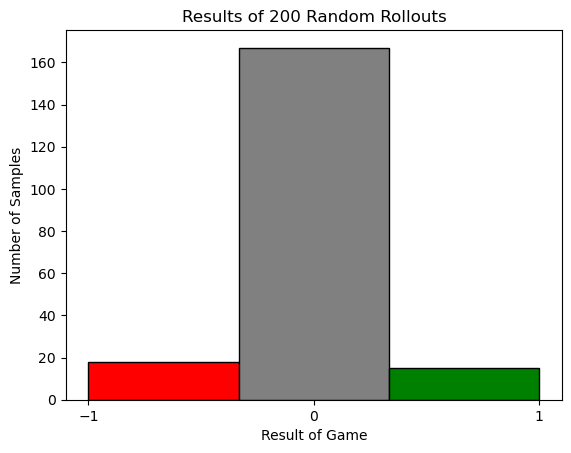

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

N, bins, patches = ax.hist(datatime.Result, bins = 3,edgecolor='black', linewidth=1)

patches[0].set_facecolor('r')
patches[1].set_facecolor('grey')
    
patches[2].set_facecolor('green')

plt.xticks([-1,0,1])
plt.xlabel('Result of Game')
plt.ylabel('Number of Samples')
plt.title('Results of 200 Random Rollouts')
plt.show()

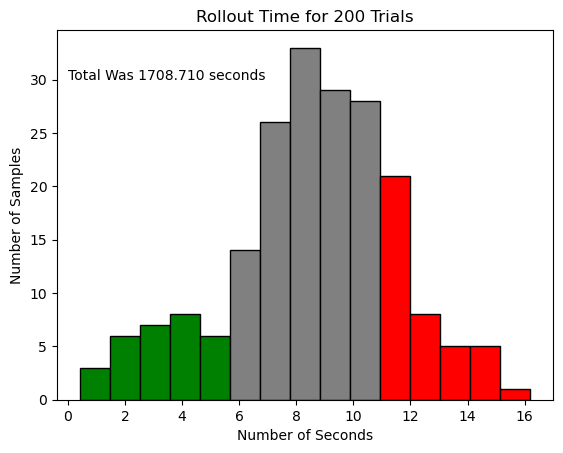

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

N, bins, patches = ax.hist(datatime.Rollout_Time,bins = 15,edgecolor='black', linewidth=1)
for i in range(5):
    patches[i].set_facecolor('green')
for i in range(5,10): 
    patches[i].set_facecolor('grey')
for i in range(10,15):
    patches[i].set_facecolor('red')
plt.title('Rollout Time for 200 Trials')
plt.xlabel('Number of Seconds')
plt.ylabel('Number of Samples')
plt.text(0,30,f'Total Was {datatime.Rollout_Time.sum():.3f} seconds')
plt.show()


In [7]:
import sys # These are the usual ipython objects, including this one you are creating 


In [ ]:
MemUs = [0.024684,0.025868,0.025788,]

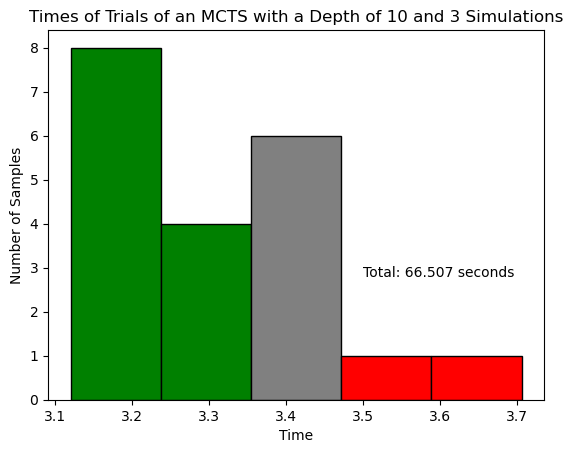

In [19]:
fig, ax = plt.subplots()

N, bins, patches = ax.hist(d, bins = 5,edgecolor='black', linewidth=1)
for i in range(2):
    patches[i].set_facecolor('green')
patches[2].set_facecolor('grey')
for i in range(3,5):
    patches[i].set_facecolor('red')

plt.xlabel('Time')
plt.ylabel('Number of Samples')
plt.title('Times of Trials of an MCTS with a Depth of 10 and 3 Simulations')
plt.text(3.5,2.8,f'Total: {sum(d):.3f} seconds')
plt.show()

In [ ]:
class GameTest:
    
    def __init__(self,agent1,agent2):
        
        self.p1 = agent1
        self.p2 = agent2
        
    def play(self):
        
        a,b = random.shuffle(['White','Black'])
        
        players = {a : self.p1, b : self.p2, self.p1 : a, self.p2 : b}
        
        new_game = Game()
        
        while not new_game.ChessBoard.state:
            
            players[new_game.ChessBoard.current_player.color].move()
            
    if new_game.current_player.color == 'White':    
        return new_game.ChessBoard.state
        
    else:        
        return -1*new_game.ChessBoard.state
        
    def plays(self,nplays):
        
        agent1_win = 0
        agent2_win = 0
        draws = 0
        
        for _ in range(n):
            
            result = self.play()
            if result == 1:
                agent1_win += 1
            
            elif result == -1:
                agent2_win += 1
                
            elif abs(result) == 1e-16:
                draws += 1
                
        return agent1_win, agent2_win, draws

In [62]:
class SelfPlay:
    def __init__(self,game,eval_func,args):
        
        self.game = game
        self.eval = eval_func
        self.args = args
        self.comp_eval = eval_func
        self.agent = MCTS(self.game,self.args.cparam,eval_func,'White')
        
    def RunGame(self):
        
        train = []
        board = self.game.ChessBoard.update_board()
        currep = 0
        
        while True:
            currep += 1
            time = int(currep < self.args.thresh)
            
            sim = self.agent.simulate(self.args.numsims)
            
            for i in sim:
                
                train.append(i)
        
trainExamples = []
        board = self.game.getInitBoard()
        self.curPlayer = 1
        episodeStep = 0

        while True:
            episodeStep += 1
            canonicalBoard = self.game.getCanonicalForm(board, self.curPlayer)
            temp = int(episodeStep < self.args.tempThreshold)

            pi = self.mcts.getActionProb(canonicalBoard, temp=temp)
            sym = self.game.getSymmetries(canonicalBoard, pi)
            for b, p in sym:
                trainExamples.append([b, self.curPlayer, p, None])

            action = np.random.choice(len(pi), p=pi)
            board, self.curPlayer = self.game.getNextState(board, self.curPlayer, action)

            r = self.game.getGameEnded(board, self.curPlayer)

            if r != 0:
                return [(x[0], x[2], r * ((-1) ** (x[1] != self.curPlayer))) for x in trainExamples]

    def learn(self):
        """
        Performs numIters iterations with numEps episodes of self-play in each
        iteration. After every iteration, it retrains neural network with
        examples in trainExamples (which has a maximum length of maxlenofQueue).
        It then pits the new neural network against the old one and accepts it
        only if it wins >= updateThreshold fraction of games.
        """

        for i in range(1, self.args.numIters + 1):
            # bookkeeping
            log.info(f'Starting Iter #{i} ...')
            # examples of the iteration
            if not self.skipFirstSelfPlay or i > 1:
                iterationTrainExamples = deque([], maxlen=self.args.maxlenOfQueue)

                for _ in tqdm(range(self.args.numEps), desc="Self Play"):
                    self.mcts = MCTS(self.game, self.nnet, self.args)  # reset search tree
                    iterationTrainExamples += self.executeEpisode()

                # save the iteration examples to the history 
                self.trainExamplesHistory.append(iterationTrainExamples)

            if len(self.trainExamplesHistory) > self.args.numItersForTrainExamplesHistory:
                log.warning(
                    f"Removing the oldest entry in trainExamples. len(trainExamplesHistory) = {len(self.trainExamplesHistory)}")
                self.trainExamplesHistory.pop(0)
            # backup history to a file
            # NB! the examples were collected using the model from the previous iteration, so (i-1)  
            self.saveTrainExamples(i - 1)

            # shuffle examples before training
            trainExamples = []
            for e in self.trainExamplesHistory:
                trainExamples.extend(e)
            shuffle(trainExamples)

            # training new network, keeping a copy of the old one
            self.nnet.save_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            self.pnet.load_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            pmcts = MCTS(self.game, self.pnet, self.args)

            self.nnet.train(trainExamples)
            nmcts = MCTS(self.game, self.nnet, self.args)

            log.info('PITTING AGAINST PREVIOUS VERSION')
            arena = Arena(lambda x: np.argmax(pmcts.getActionProb(x, temp=0)),
                          lambda x: np.argmax(nmcts.getActionProb(x, temp=0)), self.game)
            pwins, nwins, draws = arena.playGames(self.args.arenaCompare)

            log.info('NEW/PREV WINS : %d / %d ; DRAWS : %d' % (nwins, pwins, draws))
            if pwins + nwins == 0 or float(nwins) / (pwins + nwins) < self.args.updateThreshold:
                log.info('REJECTING NEW MODEL')
                self.nnet.load_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            else:
                log.info('ACCEPTING NEW MODEL')
                self.nnet.save_checkpoint(folder=self.args.checkpoint, filename=self.getCheckpointFile(i))
                self.nnet.save_checkpoint(folder=self.args.checkpoint, filename='best.pth.tar')

    def getCheckpointFile(self, iteration):
        return 'checkpoint_' + str(iteration) + '.pth.tar'

    def saveTrainExamples(self, iteration):
        folder = self.args.checkpoint
        if not os.path.exists(folder):
            os.makedirs(folder)
        filename = os.path.join(folder, self.getCheckpointFile(iteration) + ".examples")
        with open(filename, "wb+") as f:
            Pickler(f).dump(self.trainExamplesHistory)
        f.closed

    def loadTrainExamples(self):
        modelFile = os.path.join(self.args.load_folder_file[0], self.args.load_folder_file[1])
        examplesFile = modelFile + ".examples"
        if not os.path.isfile(examplesFile):
            log.warning(f'File "{examplesFile}" with trainExamples not found!')
            r = input("Continue? [y|n]")
            if r != "y":
                sys.exit()
        else:
            log.info("File with trainExamples found. Loading it...")
            with open(examplesFile, "rb") as f:
                self.trainExamplesHistory = Unpickler(f).load()
            log.info('Loading done!')

            # examples based on the model were already collected (loaded)
            self.skipFirstSelfPlay = True

        

In [21]:
import logging
import math

import numpy as np

EPS = 1e-8

log = logging.getLogger(__name__)




False

In [ ]:
import logging
import os
import sys
from collections import deque
from pickle import Pickler, Unpickler
from random import shuffle

import numpy as np
from tqdm import tqdm

from Arena import Arena
from MCTS import MCTS

log = logging.getLogger(__name__)


class Coach():
    """
    This class executes the self-play + learning. It uses the functions defined
    in Game and NeuralNet. args are specified in main.py.
    """

    def __init__(self, game, nnet, args):
        self.game = game
        self.nnet = nnet
        self.pnet = self.nnet.__csellass__(self.game)  # the competitor network
        self.args = args
        self.mcts = MCTS(self.game, self.nnet, self.args)
        self.trainExamplesHistory = []  # history of examples from args.numItersForTrainExamplesHistory latest iterations
        self.skipFirstSelfPlay = False  # can be overriden in loadTrainExamples()

    def executeEpisode(self):
        """
        This function executes one episode of self-play, starting with player 1.
        As the game is played, each turn is added as a training example to
        trainExamples. The game is played till the game ends. After the game
        ends, the outcome of the game is used to assign values to each example
        in trainExamples.
        It uses a temp=1 if episodeStep < tempThreshold, and thereafter
        uses temp=0.
        Returns:
            trainExamples: a list of examples of the form (canonicalBoard, currPlayer, pi,v)
                           pi is the MCTS informed policy vector, v is +1 if
                           the player eventually won the game, else -1.
        """
        trainExamples = []
        board = self.game.getInitBoard()
        self.curPlayer = 1
        episodeStep = 0

        while True:
            episodeStep += 1
            canonicalBoard = self.game.getCanonicalForm(board, self.curPlayer)
            temp = int(episodeStep < self.args.tempThreshold)

            pi = self.mcts.getActionProb(canonicalBoard, temp=temp)
            sym = self.game.getSymmetries(canonicalBoard, pi)
            for b, p in sym:
                trainExamples.append([b, self.curPlayer, p, None])

            action = np.random.choice(len(pi), p=pi)
            board, self.curPlayer = self.game.getNextState(board, self.curPlayer, action)

            r = self.game.getGameEnded(board, self.curPlayer)

            if r != 0:
                return [(x[0], x[2], r * ((-1) ** (x[1] != self.curPlayer))) for x in trainExamples]

    def learn(self):
        """
        Performs numIters iterations with numEps episodes of self-play in each
        iteration. After every iteration, it retrains neural network with
        examples in trainExamples (which has a maximum length of maxlenofQueue).
        It then pits the new neural network against the old one and accepts it
        only if it wins >= updateThreshold fraction of games.
        """

        for i in range(1, self.args.numIters + 1):
            # bookkeeping
            log.info(f'Starting Iter #{i} ...')
            # examples of the iteration
            if not self.skipFirstSelfPlay or i > 1:
                iterationTrainExamples = deque([], maxlen=self.args.maxlenOfQueue)

                for _ in tqdm(range(self.args.numEps), desc="Self Play"):
                    self.mcts = MCTS(self.game, self.nnet, self.args)  # reset search tree
                    iterationTrainExamples += self.executeEpisode()

                # save the iteration examples to the history 
                self.trainExamplesHistory.append(iterationTrainExamples)

            if len(self.trainExamplesHistory) > self.args.numItersForTrainExamplesHistory:
                log.warning(
                    f"Removing the oldest entry in trainExamples. len(trainExamplesHistory) = {len(self.trainExamplesHistory)}")
                self.trainExamplesHistory.pop(0)
            # backup history to a file
            # NB! the examples were collected using the model from the previous iteration, so (i-1)  
            self.saveTrainExamples(i - 1)

            # shuffle examples before training
            trainExamples = []
            for e in self.trainExamplesHistory:
                trainExamples.extend(e)
            shuffle(trainExamples)

            # training new network, keeping a copy of the old one
            self.nnet.save_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            self.pnet.load_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            pmcts = MCTS(self.game, self.pnet, self.args)

            self.nnet.train(trainExamples)
            nmcts = MCTS(self.game, self.nnet, self.args)

            log.info('PITTING AGAINST PREVIOUS VERSION')
            arena = Arena(lambda x: np.argmax(pmcts.getActionProb(x, temp=0)),
                          lambda x: np.argmax(nmcts.getActionProb(x, temp=0)), self.game)
            pwins, nwins, draws = arena.playGames(self.args.arenaCompare)

            log.info('NEW/PREV WINS : %d / %d ; DRAWS : %d' % (nwins, pwins, draws))
            if pwins + nwins == 0 or float(nwins) / (pwins + nwins) < self.args.updateThreshold:
                log.info('REJECTING NEW MODEL')
                self.nnet.load_checkpoint(folder=self.args.checkpoint, filename='temp.pth.tar')
            else:
                log.info('ACCEPTING NEW MODEL')
                self.nnet.save_checkpoint(folder=self.args.checkpoint, filename=self.getCheckpointFile(i))
                self.nnet.save_checkpoint(folder=self.args.checkpoint, filename='best.pth.tar')

    def getCheckpointFile(self, iteration):
        return 'checkpoint_' + str(iteration) + '.pth.tar'

    def saveTrainExamples(self, iteration):
        folder = self.args.checkpoint
        if not os.path.exists(folder):
            os.makedirs(folder)
        filename = os.path.join(folder, self.getCheckpointFile(iteration) + ".examples")
        with open(filename, "wb+") as f:
            Pickler(f).dump(self.trainExamplesHistory)
        f.closed

    def loadTrainExamples(self):
        modelFile = os.path.join(self.args.load_folder_file[0], self.args.load_folder_file[1])
        examplesFile = modelFile + ".examples"
        if not os.path.isfile(examplesFile):
            log.warning(f'File "{examplesFile}" with trainExamples not found!')
            r = input("Continue? [y|n]")
            if r != "y":
                sys.exit()
        else:
            log.info("File with trainExamples found. Loading it...")
            with open(examplesFile, "rb") as f:
                self.trainExamplesHistory = Unpickler(f).load()
            log.info('Loading done!')

            # examples based on the model were already collected (loaded)
            self.skipFirstSelfPlay = True


In [ ]:
class Game():
    """
    This class specifies the base Game class. To define your own game, subclass
    this class and implement the functions below. This works when the game is
    two-player, adversarial and turn-based.
    Use 1 for player1 and -1 for player2.
    See othello/OthelloGame.py for an example implementation.
    """
    def __init__(self):
        pass

    def getInitBoard(self):
        """
        Returns:
            startBoard: a representation of the board (ideally this is the form
                        that will be the input to your neural network)
        """
        pass

    def getBoardSize(self):
        """
        Returns:
            (x,y): a tuple of board dimensions
        """
        pass

    def getActionSize(self):
        """
        Returns:
            actionSize: number of all possible actions
        """
        pass

    def getNextState(self, board, player, action):
        """
        Input:
            board: current board
            player: current player (1 or -1)
            action: action taken by current player
        Returns:
            nextBoard: board after applying action
            nextPlayer: player who plays in the next turn (should be -player)
        """
        pass

    def getValidMoves(self, board, player):
        """
        Input:
            board: current board
            player: current player
        Returns:
            validMoves: a binary vector of length self.getActionSize(), 1 for
                        moves that are valid from the current board and player,
                        0 for invalid moves
        """
        pass

    def getGameEnded(self, board, player):
        """
        Input:
            board: current board
            player: current player (1 or -1)
        Returns:
            r: 0 if game has not ended. 1 if player won, -1 if player lost,
               small non-zero value for draw.
               
        """
        pass

    def getCanonicalForm(self, board, player):
        """
        Input:
            board: current board
            player: current player (1 or -1)
        Returns:
            canonicalBoard: returns canonical form of board. The canonical form
                            should be independent of player. For e.g. in chess,
                            the canonical form can be chosen to be from the pov
                            of white. When the player is white, we can return
                            board as is. When the player is black, we can invert
                            the colors and return the board.
        """
        pass

    def getSymmetries(self, board, pi):
        """
        Input:
            board: current board
            pi: policy vector of size self.getActionSize()
        Returns:
            symmForms: a list of [(board,pi)] where each tuple is a symmetrical
                       form of the board and the corresponding pi vector. This
                       is used when training the neural network from examples.
        """
        pass

    def stringRepresentation(self, board):
        """
        Input:
            board: current board
        Returns:
            boardString: a quick conversion of board to a string format.
                         Required by MCTS for hashing.
        """
        pass

In [ ]:
import logging

from tqdm import tqdm

log = logging.getLogger(__name__)


class Arena():
    """
    An Arena class where any 2 agents can be pit against each other.
    """

    def __init__(self, player1, player2, game, display=None):
        """
        Input:
            player 1,2: two functions that takes board as input, return action
            game: Game object
            display: a function that takes board as input and prints it (e.g.
                     display in othello/OthelloGame). Is necessary for verbose
                     mode.
        see othello/OthelloPlayers.py for an example. See pit.py for pitting
        human players/other baselines with each other.
        """
        self.player1 = player1
        self.player2 = player2
        self.game = game
        self.display = display

    def playGame(self, verbose=False):
        """
        Executes one episode of a game.
        Returns:
            either
                winner: player who won the game (1 if player1, -1 if player2)
            or
                draw result returned from the game that is neither 1, -1, nor 0.
        """
        players = [self.player2, None, self.player1]
        curPlayer = 1
        board = self.game.getInitBoard()
        it = 0
        while self.game.getGameEnded(board, curPlayer) == 0:
            it += 1
            if verbose:
                assert self.display
                print("Turn ", str(it), "Player ", str(curPlayer))
                self.display(board)
            action = players[curPlayer + 1](self.game.getCanonicalForm(board, curPlayer))

            valids = self.game.getValidMoves(self.game.getCanonicalForm(board, curPlayer), 1)

            if valids[action] == 0:
                log.error(f'Action {action} is not valid!')
                log.debug(f'valids = {valids}')
                assert valids[action] > 0
            board, curPlayer = self.game.getNextState(board, curPlayer, action)
        if verbose:
            assert self.display
            print("Game over: Turn ", str(it), "Result ", str(self.game.getGameEnded(board, 1)))
            self.display(board)
        return curPlayer * self.game.getGameEnded(board, curPlayer)

    def playGames(self, num, verbose=False):
        """
        Plays num games in which player1 starts num/2 games and player2 starts
        num/2 games.
        Returns:
            oneWon: games won by player1
            twoWon: games won by player2
            draws:  games won by nobody
        """

        num = int(num / 2)
        oneWon = 0
        twoWon = 0
        draws = 0
        for _ in tqdm(range(num), desc="Arena.playGames (1)"):
            gameResult = self.playGame(verbose=verbose)
            if gameResult == 1:
                oneWon += 1
            elif gameResult == -1:
                twoWon += 1
            else:
                draws += 1

        self.player1, self.player2 = self.player2, self.player1

        for _ in tqdm(range(num), desc="Arena.playGames (2)"):
            gameResult = self.playGame(verbose=verbose)
            if gameResult == -1:
                oneWon += 1
            elif gameResult == 1:
                twoWon += 1
            else:
                draws += 1

        return oneWon, twoWon, draws

In [ ]:
class NeuralNet():
    """
    This class specifies the base NeuralNet class. To define your own neural
    network, subclass this class and implement the functions below. The neural
    network does not consider the current player, and instead only deals with
    the canonical form of the board.
    See othello/NNet.py for an example implementation.
    """

    def __init__(self, game):
        pass

    def train(self, examples):
        """
        This function trains the neural network with examples obtained from
        self-play.
        Input:
            examples: a list of training examples, where each example is of form
                      (board, pi, v). pi is the MCTS informed policy vector for
                      the given board, and v is its value. The examples has
                      board in its canonical form.
        """
        pass

    def predict(self, board):
        """
        Input:
            board: current board in its canonical form.
        Returns:
            pi: a policy vector for the current board- a numpy array of length
                game.getActionSize
            v: a float in [-1,1] that gives the value of the current board
        """
        pass

    def save_checkpoint(self, folder, filename):
        """
        Saves the current neural network (with its parameters) in
        folder/filename
        """
        pass

    def load_checkpoint(self, folder, filename):
        """
        Loads parameters of the neural network from folder/filename
        """
        pass

In [ ]:
import logging

import coloredlogs

from Coach import Coach
from othello.OthelloGame import OthelloGame as Game
from othello.pytorch.NNet import NNetWrapper as nn
from utils import *

log = logging.getLogger(__name__)

coloredlogs.install(level='INFO')  # Change this to DEBUG to see more info.

args = dotdict({
    'numIters': 1000,
    'numEps': 100,              # Number of complete self-play games to simulate during a new iteration.
    'tempThreshold': 15,        #
    'updateThreshold': 0.6,     # During arena playoff, new neural net will be accepted if threshold or more of games are won.
    'maxlenOfQueue': 200000,    # Number of game examples to train the neural networks.
    'numMCTSSims': 25,          # Number of games moves for MCTS to simulate.
    'arenaCompare': 40,         # Number of games to play during arena play to determine if new net will be accepted.
    'cpuct': 1,

    'checkpoint': './temp/',
    'load_model': False,
    'load_folder_file': ('/dev/models/8x100x50','best.pth.tar'),
    'numItersForTrainExamplesHistory': 20,

})


def main():
    log.info('Loading %s...', Game.__name__)
    g = Game(6)

    log.info('Loading %s...', nn.__name__)
    nnet = nn(g)

    if args.load_model:
        log.info('Loading checkpoint "%s/%s"...', args.load_folder_file[0], args.load_folder_file[1])
        nnet.load_checkpoint(args.load_folder_file[0], args.load_folder_file[1])
    else:
        log.warning('Not loading a checkpoint!')

    log.info('Loading the Coach...')
    c = Coach(g, nnet, args)

    if args.load_model:
        log.info("Loading 'trainExamples' from file...")
        c.loadTrainExamples()

    log.info('Starting the learning process 🎉')
    c.learn()


if __name__ == "__main__":
    main()

In [ ]:
import Arena
from MCTS import MCTS
from othello.OthelloGame import OthelloGame
from othello.OthelloPlayers import *
from othello.pytorch.NNet import NNetWrapper as NNet


import numpy as np
from utils import *

"""
use this script to play any two agents against each other, or play manually with
any agent.
"""

mini_othello = False  # Play in 6x6 instead of the normal 8x8.
human_vs_cpu = True

if mini_othello:
    g = OthelloGame(6)
else:
    g = OthelloGame(8)

# all players
rp = RandomPlayer(g).play
gp = GreedyOthelloPlayer(g).play
hp = HumanOthelloPlayer(g).play



# nnet players
n1 = NNet(g)
if mini_othello:
    n1.load_checkpoint('./pretrained_models/othello/pytorch/','6x100x25_best.pth.tar')
else:
    n1.load_checkpoint('./pretrained_models/othello/pytorch/','8x8_100checkpoints_best.pth.tar')
args1 = dotdict({'numMCTSSims': 50, 'cpuct':1.0})
mcts1 = MCTS(g, n1, args1)
n1p = lambda x: np.argmax(mcts1.getActionProb(x, temp=0))

if human_vs_cpu:
    player2 = hp
else:
    n2 = NNet(g)
    n2.load_checkpoint('./pretrained_models/othello/pytorch/', '8x8_100checkpoints_best.pth.tar')
    args2 = dotdict({'numMCTSSims': 50, 'cpuct': 1.0})
    mcts2 = MCTS(g, n2, args2)
    n2p = lambda x: np.argmax(mcts2.getActionProb(x, temp=0))

    player2 = n2p  # Player 2 is neural network if it's cpu vs cpu.

arena = Arena.Arena(n1p, player2, g, display=OthelloGame.display)

print(arena.playGames(2, verbose=True))

In [ ]:
class AverageMeter(object):
    """From https://github.com/pytorch/examples/blob/master/imagenet/main.py"""

    def __init__(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def __repr__(self):
        return f'{self.avg:.2e}'

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


class dotdict(dict):
    def __getattr__(self, name):
        return self[name]

https://github.com/suragnair/alpha-zero-general/tree/master/rts

In [3]:
import math

In [86]:
import random
a = ['White','Black']
random.shuffle(a)
a = {'w':'d','a':'b','b':'a','d':'w'}
a['d']

'w'

In [177]:
new_game = Game()

new = new_game.copy()
#ChessBoard.pieces['White']['P1'].move_to((0,3))

AttributeError: 'Game' object has no attribute 'copy'

In [176]:
new_game.ChessBoard.update_board()

[['RQ', 'NQ', 'BQ', 'Q', 'K', 'BK', 'NK', 'RK'],
 ['*', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['P1', '*', '*', '*', '*', '*', '*', '*'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['*', '*', '*', '*', '*', '*', '*', '*'],
 ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'],
 ['rq', 'nq', 'bq', 'q', 'k', 'bk', 'nk', 'rk']]